# House Price Prediction

House price prediction is a regression problem that can be solved by various machine learning models. In the end, a prediction will be made based on the best model that has been built.

## Data Fields

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Importing packages

In [1]:
# EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno
import math, time, random, datetime

# Machine Learning
import catboost
from catboost import CatBoostRegressor
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.tree import DecisionTreeRegressor

## File Read

In [2]:
train_data = pd.read_csv("House_Prediction_train.csv")
test_data = pd.read_csv("House_Prediction_test.csv")
sample_submission = pd.read_csv("House_Prediction_sample_submission.csv")

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [7]:
sample_submission.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

## Exploratory Data Analysis (EDA)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Missing Values


Alley= 1369

PoolQC= 1453

Fence = 1179

MiscFeature = 1406

LotFrontage = 259

MasVnrType = 8

BsmtQual = 37

BsmtCond = 37

BsmtExposure = 38

BsmtFinType1 = 37

BsmtFinType2 = 38

FireplaceQu = 690

GarageYrBlt = 81

GarageFinish = 81

GarageQual = 81

GarageCond = 81

and more....

In [37]:
train_data.Electrical.isnull().sum()

1

In [186]:
train_data.isnull().iloc[0:25, :]

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0   False       False     False        False    False   False  False   
1   False       False     False        False    False   False  False   
2   False       False     False        False    False   False  False   
3   False       False     False        False    False   False  False   
4   False       False     False        False    False   False  False   
5   False       False     False        False    False   False  False   
6   False       False     False        False    False   False  False   
7   False       False     False        False    False   False  False   
8   False       False     False        False    False   False  False   
9   False       False     False        False    False   False  False   
10  False       False     False        False    False   False  False   
11  False       False     False        False    False   False  False   
12  False       False     False        False    False   False  False   
13  False       False     False        False    False   False  False   
14  False       False     False        False    False   False  False   
15  False       False     False        False    False   False  False   
16  False       False     False        False    False   False  False   
17  False       False     False        False    False   False  False   
18  False       False     False        False    False   False  False   
19  False       False     False        False    False   False  False   
20  False       False     False        False    False   False  False   
21  False       False     False        False    False   False  False   
22  False       False     False        False    False   False  False   
23  False       False     False        False    False   False  False   
24  False       False     False        False    False   False  False   

    LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0      False        False      False      False      False         False   
1      False        False      False      False      False         False   
2      False        False      False      False      False         False   
3      False        False      False      False      False         False   
4      False        False      False      False      False         False   
5      False        False      False      False      False         False   
6      False        False      False      False      False         False   
7      False        False      False      False      False         False   
8      False        False      False      False      False         False   
9      False        False      False      False      False         False   
10     False        False      False      False      False         False   
11     False        False      False      False      False         False   
12     False        False      False      False      False         False   
13     False        False      False      False      False         False   
14     False        False      False      False      False         False   
15     False        False      False      False      False         False   
16     False        False      False      False      False         False   
17     False        False      False      False      False         False   
18     False        False      False      False      False         False   
19     False        False      False      False      False         False   
20     False        False      False      False      False         False   
21     False        False      False      False      False         False   
22     False        False      False      False      False         False   
23     False        False      False      False      False         False   
24     False        False      False      False      False         False   

    Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0        False       False     False       False        False        False   
1

In [25]:
train_data.notnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     True        True      True         True     True    True  False   
1     True        True      True         True     True    True  False   
2     True        True      True         True     True    True  False   
3     True        True      True         True     True    True  False   
4     True        True      True         True     True    True  False   
...    ...         ...       ...          ...      ...     ...    ...   
1455  True        True      True         True     True    True  False   
1456  True        True      True         True     True    True  False   
1457  True        True      True         True     True    True  False   
1458  True        True      True         True     True    True  False   
1459  True        True      True         True     True    True  False   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0         True         True       True  ...      True   False  False   
1         True         True       True  ...      True   False  False   
2         True         True       True  ...      True   False  False   
3         True         True       True  ...      True   False  False   
4         True         True       True  ...      True   False  False   
...        ...          ...        ...  ...       ...     ...    ...   
1455      True         True       True  ...      True   False  False   
1456      True         True       True  ...      True   False   True   
1457      True         True       True  ...      True   False   True   
1458      True         True       True  ...      True   False  False   
1459      True         True       True  ...      True   False  False   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0           False     True    True    True      True           True       True  
1           False     True    True    True      True           True       True  
2           False     True    True    True      True           True       True  
3           False     True    True    True      True           True       True  
4           False     True    True    True      True           True       True  
...           ...      ...     ...     ...       ...            ...        ...  
1455        False     True    True    True      True           True       True  
1456        False     True    True    True      True           True       True  
1457         True     True    True    True      True           True       True  
1458        False     True    True    True      True           True       True  
1459        False     True    True    True      True           True       True  

[1460 rows x 81 columns]

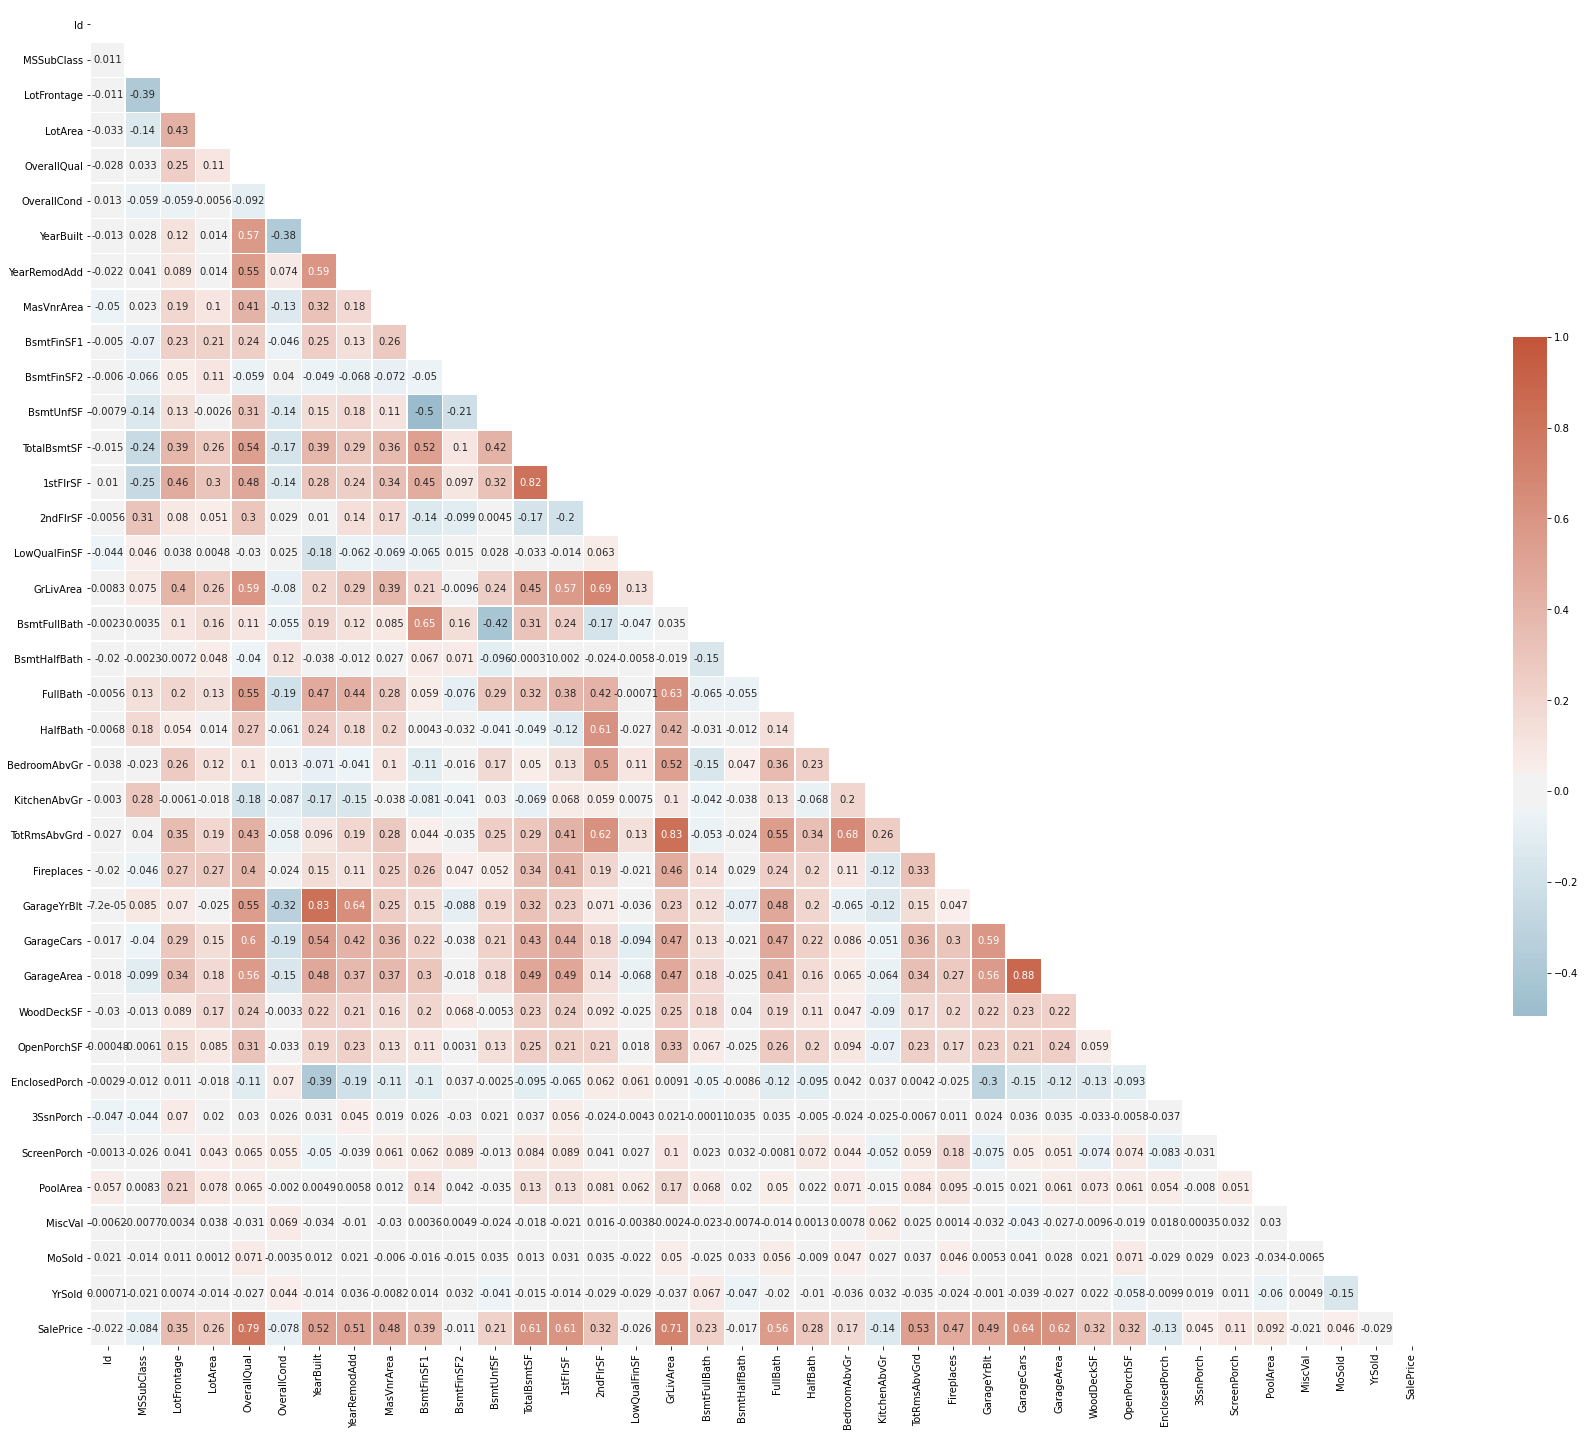

In [6]:
# Correlation Matrix/ Heatmap (Taken from https://www.kaggle.com/marto24/beginners-prediction-top3)

f, ax = plt.subplots(figsize=(30, 25))
mat = train_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

According to the heatmap above, it shows the pearson value of each variable corresponding to another. In this case, we will only be looking at the last row which tells you which variables have a significant impact on SalePrice of a house. 

Overallqual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF (no use), FullBath, TotRmsAbovGrd, YearBuilt, YearRemodAdd, GarageYrBlt, BsmtFinType1, fireplaces

These variables haave been explored below

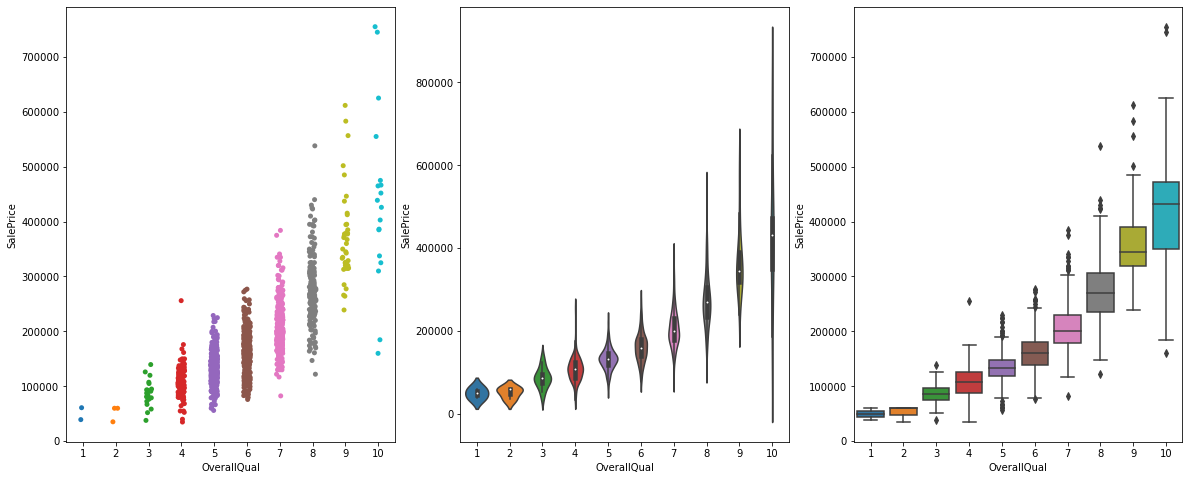

In [7]:
#OverallQual vs SalePrice 
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.boxplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[2])

plt.show()

Above shows the graphs corresponding to overall quality and sale price. According to it, as quality increases, the sale price increases. This shows that overall quality affects saleprice positively. Other than that, we can see that there are outliers in this graph, especially at overall quality 4, 7, 8, 9 and 10. 10 has the most outliers. These outliers must be investigated to make sure these values are of normal range. 

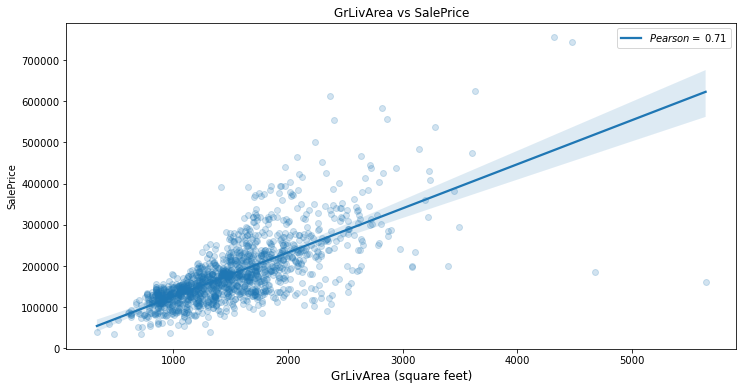

In [30]:
# GrLivArea vs SalePrice [corr = 0.71] (Above grade (ground) living area square feet)

Pearson_GrLiv = 0.71
plt.figure(figsize = (12,6))
sns.regplot(data=train_data, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.xlabel('GrLivArea (square feet)', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

Above shows a scatterplot corresponding to GrLivArea and sale price with a straight line indicating the pearson value (variable worth). According to it, as the living area in squarefeet for ground houses increases, the sale price increases. This shows that the living area in squarefeet for ground houses affects sale price positively. Other than that, we can see that there are outliers in this graph, especially from 2000 and above, these will be investigated before any data preprocessing will be done to it. 

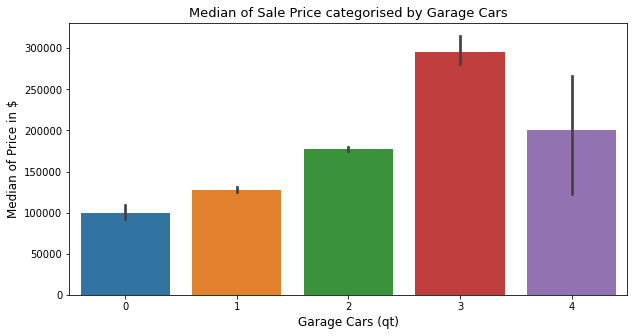

In [5]:
# Median of Sale Price categorised by Garage Cars

plt.figure(figsize = (10,5))
sns.barplot(x='GarageCars', y="SalePrice", data = train_data, estimator = np.median)
plt.title('Median of Sale Price categorised by Garage Cars', fontsize = 13)
plt.xlabel('Garage Cars (qt)', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

Above shows a barchart with x as Garage Cars measured in quantity and y as Median Sale Price. According to it, garage that can fit 3 cars are usually houses with high sale price. While the others like 0 and 1, 3 and 4 garage cars have sale prices that are nearly the same with each other. This shows an odd trend as I would predict that the sale price with 4 garage cars would be higher than 3. This could mean that having 4 garage cars in a house is less common.

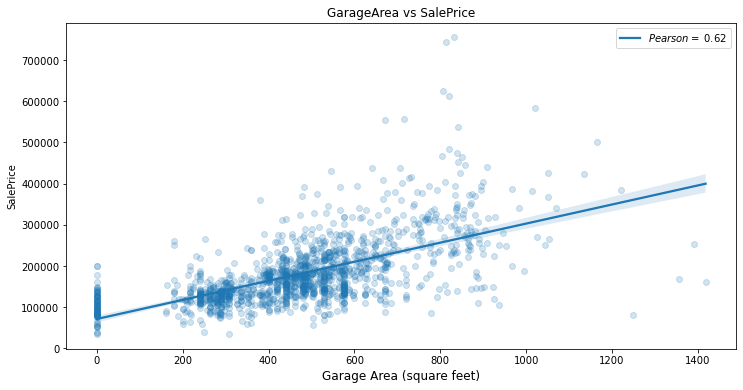

In [17]:
# GarageArea vs SalePrice [corr = 0.62] (Size of garage in square feet)

Pearson_GarageArea = 0.62
plt.figure(figsize = (12,6))
sns.regplot(data=train_data, x = 'GarageArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GarageArea vs SalePrice', fontsize = 12)
plt.xlabel('Garage Area (square feet)', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GarageArea)], loc = 'best')
plt.show() 

Above shows a scatterplot x as GarageArea and y as SalePrice. This graph shows the pearson (variable worth) value. This graph has a positive trend where as garage area increases, sale price increases. This shows that as the size of garage area has a positive impact towards SalePrice. Other than that, the graph shows outliers especially after 800.

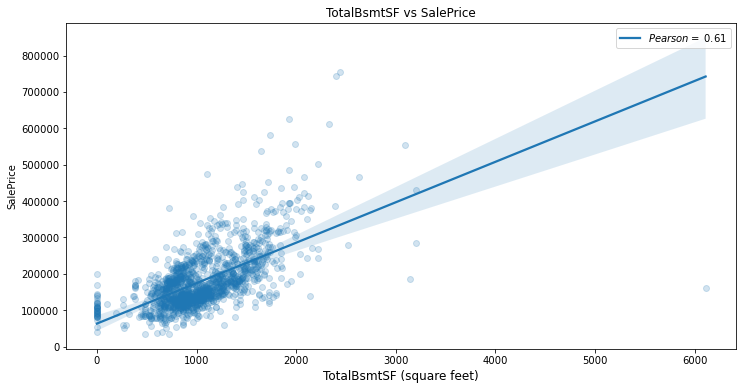

In [31]:
# TotalBsmtSF vs SalePrice [corr = 0.61] (Total square feet of basement area)

Pearson_TotalBsmtSF = 0.61
plt.figure(figsize = (12,6))
sns.regplot(data=train_data, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.xlabel('TotalBsmtSF (square feet)', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TotalBsmtSF)], loc = 'best')
plt.show()

Above shows a scatterplot which has x as TotalBsmtSF and y as SalePrice. This graph shows the pearson (variable worth) value. This graph has a positive trend where as the total square feet of basement area increases, sale price increases. This shows that as the total square feet of basement area has a positive impact towards SalePrice. Other than that, the graph shows outliers especially after 1500.

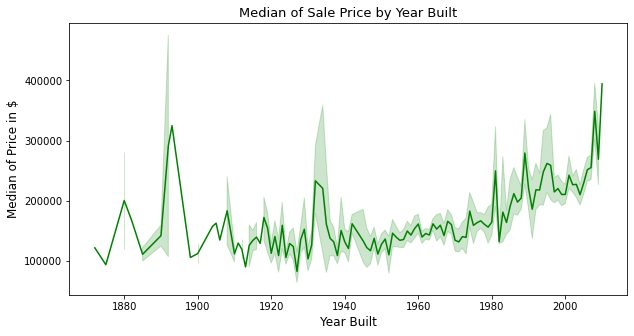

In [32]:
# Sale Price by Year Built

plt.figure(figsize = (10,5))
sns.lineplot(x='YearBuilt', y="SalePrice", data = train_data, color="Green")
plt.title('Median of Sale Price by Year Built', fontsize = 13)
plt.xlabel('Year Built', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

According to the line graph above, this shows that the sale price of a house varies between the year it has been built. As shown above, we can see that 1890 has a spike in sale price while the others only ranges less than 300000. As soon as times are closer to 1980, the sale price has begun to increase more than other years.

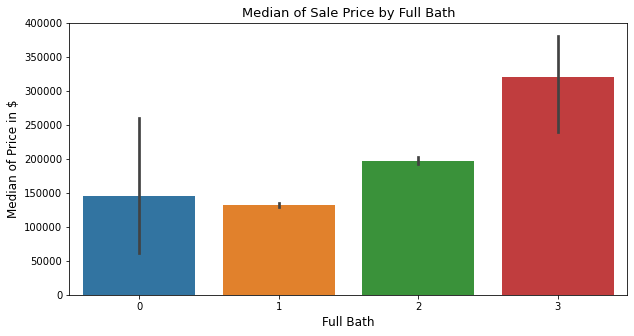

In [8]:
# Median of Sale Price by FullBath (Full bathrooms above grade)

plt.figure(figsize = (10,5))
sns.barplot(x='FullBath', y="SalePrice", data = train_data, estimator = np.median)
plt.title('Median of Sale Price by Full Bath', fontsize = 13)
plt.xlabel('Full Bath', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

According to the bar chart above, it shows the full bathrooms above grade vs the median of sale price. It shows that 1 full bathroom is less expensive compared to 0 full bathroom. Furthermore, we can see a big spike between having 2 to 3 full bathrooms.

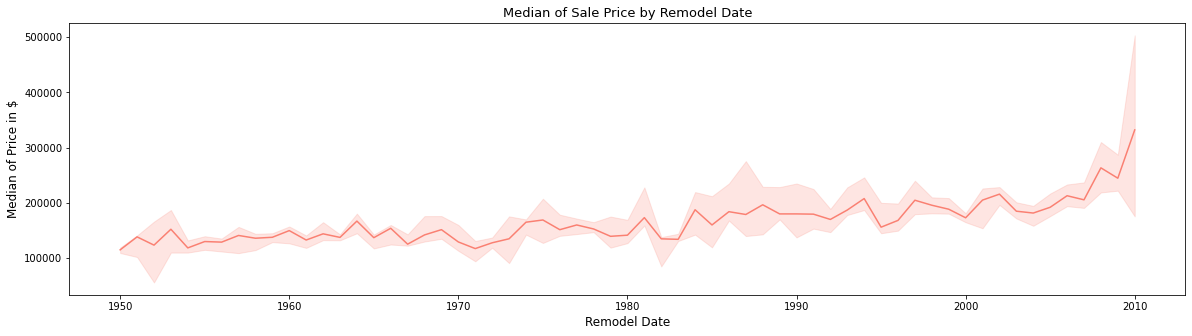

In [10]:
# Median of Sale Price by YearRemodAdd (Remodel date)

plt.figure(figsize = (20,5))
sns.lineplot(x='YearRemodAdd', y="SalePrice", data = train_data, estimator = np.median, color="salmon")
plt.title('Median of Sale Price by Remodel Date', fontsize = 13)
plt.xlabel('Remodel Date', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

According to the line graph above, it shows the Remodel date vs the median of sale price. It shows that the date of remodelling does affect sale price to some degree, although not much. The peak sale price for this is after year 2005.

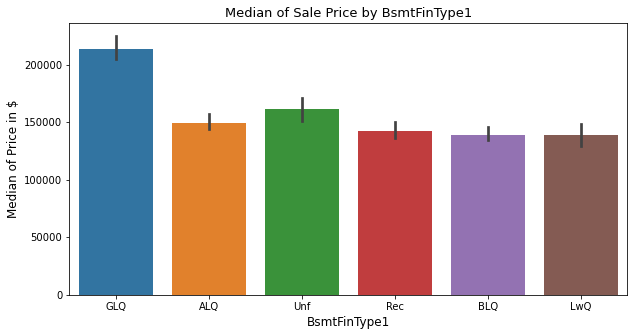

In [29]:
# Median of Sale Price categorised by BsmtFinType1 (Quality of basement finished area)

plt.figure(figsize = (10,5))
sns.barplot(x='BsmtFinType1', y="SalePrice", data = train_data, estimator = np.median)
plt.title('Median of Sale Price by BsmtFinType1', fontsize = 13)
plt.xlabel('BsmtFinType1', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show() 

According to the line graph above, it shows the quality of basement finished area vs the median of sale price. Based on the graph, GLQ has the most expensive sale price while the others around 150000.

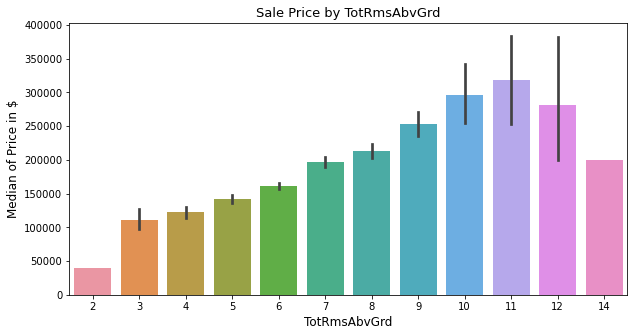

In [34]:
# Median of Sale Price by TotRmsAbvGrd (total rooms above grade)

plt.figure(figsize = (10,5))
sns.barplot(x='TotRmsAbvGrd', y="SalePrice", data = train_data)
plt.title('Sale Price by TotRmsAbvGrd', fontsize = 13)
plt.xlabel('TotRmsAbvGrd', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

According to the bar chart above,it shows the total rooms above grade vs the sale price. The sale price gradually increases as the total rooms above grade increases. This trend lasts up until it hits 11 total rooms above grade, 12 to 14 rooms sale price has gone down.

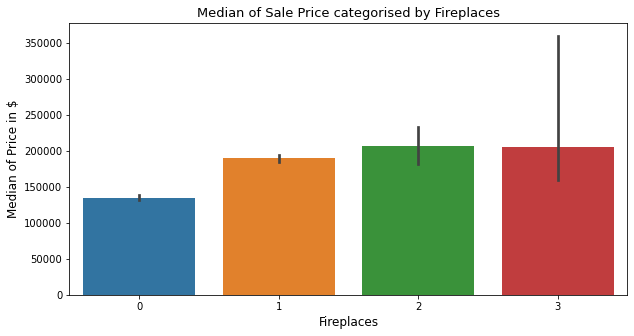

In [12]:
# Median of Sale Price categorised by Fireplaces

plt.figure(figsize = (10,5))
sns.barplot(x='Fireplaces', y="SalePrice", data = train_data, estimator = np.median)
plt.title('Median of Sale Price categorised by Fireplaces', fontsize = 13)
plt.xlabel('Fireplaces', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show() 

According to the bar chart above,it shows the fireplaces vs the median of sale price. The sale price gradually increases as the fireplaces increases. The amount of fireplace does not increase the sale price as much as other variables that have been shown. However, there is a small increase as the fireplace increases.

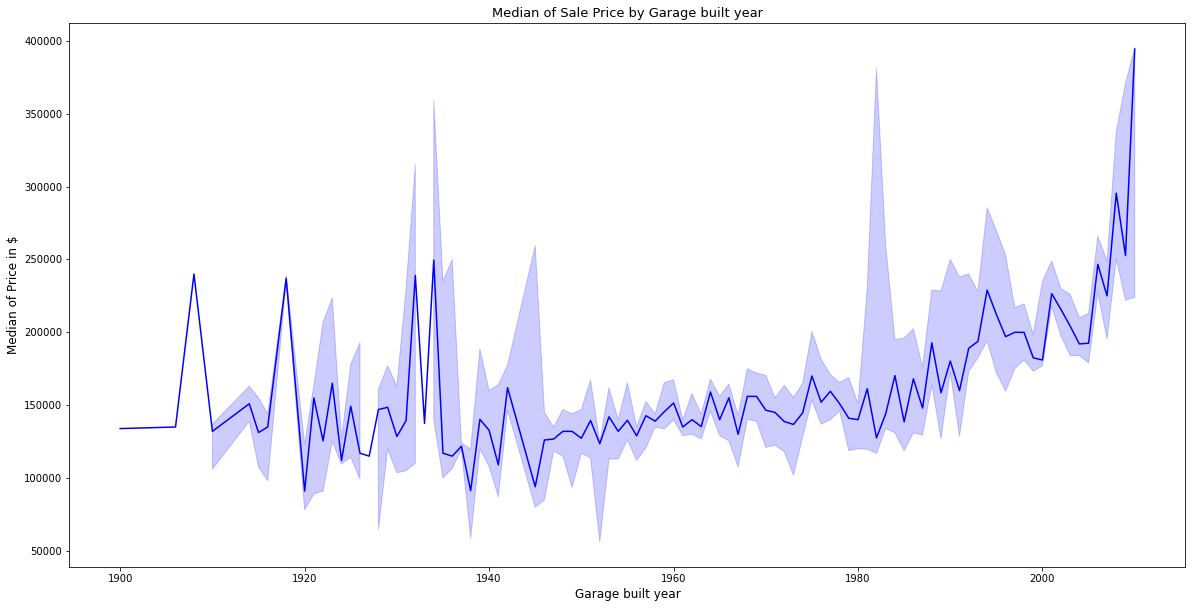

In [16]:
# Median of Sale Price by GarageYrBlt (Garage built year)

plt.figure(figsize = (20,10))
sns.lineplot(x='GarageYrBlt', y="SalePrice", data = train_data, estimator = np.median, color="blue")
plt.title('Median of Sale Price by Garage built year', fontsize = 13)
plt.xlabel('Garage built year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

According to the line chart above, it shows the Garage built year vs median of sale price. From the graph, we can see that as the garage built year is closer to the 2000s, the prices has gradually increased. 1900 to 1930s has a big increase in garage prices as well, this may be due to the economy at the time. Overall, we can say that as time progresses, the sale price will continue to rise gradually.

## Data Pre-Processing

Relevant columns will be cleaned if they have any missing values. 

In [4]:
df_con = pd.DataFrame()

In [5]:
for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']:
    train_data[column] = train_data[column].fillna('None')

for column in ['Alley', 'PoolQC', 'MiscFeature', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'Fence']:
    train_data[column] = train_data[column].fillna('None')

In [6]:
train_data.LotFrontage = train_data.LotFrontage.fillna(train_data.LotFrontage.mean())

In [7]:
train_data.Electrical = train_data.Electrical.fillna('FuseA')

In [8]:
columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'GarageType', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'BsmtFinType1', 'Fireplaces', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'LotFrontage', 'Alley', 'Fence', 'Utilities', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'ExterCond', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice']

In [9]:
df_con = pd.DataFrame(data=train_data,columns=columns)

In [9]:
df_con.isnull().sum()

OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
GarageType       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
HalfBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt      0
BsmtFinType1     0
Fireplaces       0
MasVnrArea       8
BsmtFinSF1       0
2ndFlrSF         0
WoodDeckSF       0
OpenPorchSF      0
LotFrontage      0
Alley            0
Fence            0
Utilities        0
HouseStyle       0
RoofMatl         0
Exterior1st      0
ExterQual        0
ExterCond        0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
BsmtFullBath     0
BsmtHalfBath     0
KitchenQual      0
Functional       0
GarageCond       0
PavedDrive       0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SalePrice        0
dtype: int64

In [47]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageCars     1460 non-null   int64  
 3   GarageArea     1460 non-null   int64  
 4   GarageType     1460 non-null   object 
 5   TotalBsmtSF    1460 non-null   int64  
 6   1stFlrSF       1460 non-null   int64  
 7   FullBath       1460 non-null   int64  
 8   HalfBath       1460 non-null   int64  
 9   TotRmsAbvGrd   1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  GarageYrBlt    1460 non-null   object 
 13  BsmtFinType1   1460 non-null   object 
 14  Fireplaces     1460 non-null   int64  
 15  MasVnrArea     1452 non-null   float64
 16  BsmtFinSF1     1460 non-null   int64  
 17  2ndFlrSF       1460 non-null   int64  
 18  WoodDeck

In [13]:
df_con.head()

OverallQual  GrLivArea  GarageCars  GarageArea GarageType  TotalBsmtSF  \
0            7       1710           2         548     Attchd          856   
1            6       1262           2         460     Attchd         1262   
2            7       1786           2         608     Attchd          920   
3            7       1717           3         642     Detchd          756   
4            8       2198           3         836     Attchd         1145   

   1stFlrSF  FullBath  HalfBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  \
0       856         2         1             8       2003          2003   
1      1262         2         0             6       1976          1976   
2       920         2         1             6       2001          2002   
3       961         1         0             7       1915          1970   
4      1145         2         1             9       2000          2000   

  GarageYrBlt BsmtFinType1  Fireplaces  MasVnrArea  BsmtFinSF1  2ndFlrSF  \
0        2003          GLQ           0       196.0         706       854   
1        1976          ALQ           1         0.0         978         0   
2        2001          GLQ           1       162.0         486       866   
3        1998          ALQ           1         0.0         216       756   
4        2000          GLQ           1       350.0         655      1053   

   WoodDeckSF  OpenPorchSF  LotFrontage Alley Fence Utilities HouseStyle  \
0           0           61         65.0  None  None    AllPub     2Story   
1         298            0         80.0  None  None    AllPub     1Story   
2           0           42         68.0  None  None    AllPub     2Story   
3           0           35         60.0  None  None    AllPub     2Story   
4         192           84         84.0  None  None    AllPub     2Story   

  RoofMatl Exterior1st ExterQual ExterCond Heating HeatingQC CentralAir  \
0  CompShg     VinylSd        Gd        TA    GasA        Ex          Y   
1  CompShg     MetalSd        TA        TA    GasA        Ex          Y   
2  CompShg     VinylSd        Gd        TA    GasA        Ex          Y   
3  CompShg     Wd Sdng        TA        TA    GasA        Gd          Y   
4  CompShg     VinylSd        Gd        TA    GasA        Ex          Y   

  Electrical  BsmtFullBath  BsmtHalfBath KitchenQual Functional GarageCond  \
0      SBrkr             1             0          Gd        Typ         TA   
1      SBrkr             0             1          TA        Typ         TA   
2      SBrkr             1             0          Gd        Typ         TA   
3      SBrkr             1             0          Gd        Typ         TA   
4      SBrkr             1             0          Gd        Typ         TA   

  PavedDrive  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0          Y              0          0            0         0        0   
1          Y              0          0            0         0        0   
2          Y              0          0            0         0        0   
3          Y            272          0            0         0        0   
4          Y              0          0            0         0        0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

## Feature Encoding

This section will convert the value for categorical columns into ordinal (data with ranking) and numerical values will be scaled down because model building does not allow big values.

In [10]:
Dict = {'GarageType', 'BsmtFinType1', 'Alley', 'Fence', 'Utilities', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageCond', 'PavedDrive', 'ExterCond'}

for col in Dict:
    df_con[col] = df_con[col].astype('category').cat.codes

In [15]:
df_con.head()

OverallQual  GrLivArea  GarageCars  GarageArea  GarageType  TotalBsmtSF  \
0            7       1710           2         548           1          856   
1            6       1262           2         460           1         1262   
2            7       1786           2         608           1          920   
3            7       1717           3         642           5          756   
4            8       2198           3         836           1         1145   

   1stFlrSF  FullBath  HalfBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  \
0       856         2         1             8       2003          2003   
1      1262         2         0             6       1976          1976   
2       920         2         1             6       2001          2002   
3       961         1         0             7       1915          1970   
4      1145         2         1             9       2000          2000   

  GarageYrBlt BsmtFinType1  Fireplaces  MasVnrArea  BsmtFinSF1  2ndFlrSF  \
0        2003          GLQ           0       196.0         706       854   
1        1976          ALQ           1         0.0         978         0   
2        2001          GLQ           1       162.0         486       866   
3        1998          ALQ           1         0.0         216       756   
4        2000          GLQ           1       350.0         655      1053   

   WoodDeckSF  OpenPorchSF  LotFrontage  Alley  Fence  Utilities  HouseStyle  \
0           0           61         65.0      1      4          0           5   
1         298            0         80.0      1      4          0           2   
2           0           42         68.0      1      4          0           5   
3           0           35         60.0      1      4          0           5   
4         192           84         84.0      1      4          0           5   

   RoofMatl  Exterior1st  ExterQual ExterCond  Heating  HeatingQC  CentralAir  \
0         1           12          2        TA        1          0           1   
1         1            8          3        TA        1          0           1   
2         1           12          2        TA        1          0           1   
3         1           13          3        TA        1          2           1   
4         1           12          2        TA        1          0           1   

   Electrical  BsmtFullBath  BsmtHalfBath  KitchenQual  Functional  \
0           4             1             0            2           6   
1           4             0             1            3           6   
2           4             1             0            2           6   
3           4             1             0            2           6   
4           4             1             0            2           6   

   GarageCond  PavedDrive  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           5           2              0          0            0         0   
1           5           2              0          0            0         0   
2           5           2              0          0            0         0   
3           5           2            272          0            0         0   
4           5           2              0          0            0         0   

   MiscVal  
0        0  
1        0  
2        0  
3        0  
4        0

In [28]:
# One hot encode the categorical columns
df_con_enc = df_con

for col in Dict:
    df_one_hot = pd.get_dummies(df_con[col], 
                                         prefix=col)
    df_con_enc = pd.concat([df_con_enc, df_one_hot], axis=1)

df_con_enc = df_con_enc.drop(['GarageType', 'Alley', 'Fence', 'Utilities', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageCond', 'PavedDrive', 'BsmtFinType1', 'ExterCond'], axis=1)

In [29]:
df_con_enc = df_con_enc.drop(['GarageYrBlt', 'YearBuilt', 'YearRemodAdd'], axis=1)

In [30]:
df_con_enc.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7       1710           2         548          856       856   
1            6       1262           2         460         1262      1262   
2            7       1786           2         608          920       920   
3            7       1717           3         642          756       961   
4            8       2198           3         836         1145      1145   

   FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  MasVnrArea  BsmtFinSF1  \
0         2         1             8           0       196.0         706   
1         2         0             6           1         0.0         978   
2         2         1             6           1       162.0         486   
3         1         0             7           1         0.0         216   
4         2         1             9           1       350.0         655   

   2ndFlrSF  WoodDeckSF  OpenPorchSF  LotFrontage  BsmtFullBath  BsmtHalfBath  \
0       854           0           61         65.0             1             0   
1         0         298            0         80.0             0             1   
2       866           0           42         68.0             1             0   
3       756           0           35         60.0             1             0   
4      1053         192           84         84.0             1             0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
0              0          0            0         0        0     208500   
1              0          0            0         0        0     181500   
2              0          0            0         0        0     223500   
3            272          0            0         0        0     140000   
4              0          0            0         0        0     250000   

   ExterCond_0  ExterCond_1  ExterCond_2  ExterCond_3  ExterCond_4  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0            0            0            0            1   
3            0            0            0            0            1   
4            0            0            0            0            1   

   PavedDrive_0  PavedDrive_1  PavedDrive_2  Exterior1st_0  Exterior1st_1  \
0             0             0             1              0              0   
1             0             0             1              0              0   
2             0             0             1              0              0   
3             0             0             1              0              0   
4             0             0             1              0              0   

   Exterior1st_2  Exterior1st_3  Exterior1st_4  Exterior1st_5  Exterior1st_6  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Exterior1st_7  Exterior1st_8  Exterior1st_9  Exterior1st_10  \
0              0              0              0               0   
1              0              1              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   Exterior1st_11  Exterior1st_12  Exterior1st_13  Exterior1st_14  \
0               0               1               0               0   
1               0               0               0               0   
2               0               1               0               0   
3               0               0               1               0   
4               0               1               0       

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform data
col_names = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'LotFrontage', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
features = df_con_enc[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_con_enc.head()
df_con_enc[col_names] = features

In [15]:
df_con_enc.shape

(1460, 126)

In [133]:
df_con_enc.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7   0.370333           2    0.351000    -0.459303 -0.793434   
1            6  -0.482512           2   -0.060731     0.466465  0.257140   
2            7   0.515013           2    0.631726    -0.313369 -0.627826   
3            7   0.383659           3    0.790804    -0.687324 -0.521734   
4            8   1.299326           3    1.698485     0.199680 -0.045611   

   FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  MasVnrArea  BsmtFinSF1  \
0         2         1             8           0    0.510015    0.575425   
1         2         0             6           1   -0.572835    1.171992   
2         2         1             6           1    0.322174    0.092907   
3         1         0             7           1   -0.572835   -0.499274   
4         2         1             9           1    1.360826    0.463568   

   2ndFlrSF  WoodDeckSF  OpenPorchSF  LotFrontage  BsmtFullBath  BsmtHalfBath  \
0  1.161852   -0.752176     0.216503    -0.229372             1             0   
1 -0.795163    1.626195    -0.704483     0.451936             0             1   
2  1.189351   -0.752176    -0.070361    -0.093110             1             0   
3  0.937276   -0.752176    -0.176048    -0.456474             1             0   
4  1.617877    0.780197     0.563760     0.633618             1             0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  SalePrice  \
0      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688     208500   
1      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688     181500   
2      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688     223500   
3       4.092524  -0.116339    -0.270208 -0.068692 -0.087688     140000   
4      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688     250000   

   Heating_0  Heating_1  Heating_2  Heating_3  Heating_4  Heating_5  \
0          0          1          0          0          0          0   
1          0          1          0          0          0          0   
2          0          1          0          0          0          0   
3          0          1          0          0          0          0   
4          0          1          0          0          0          0   

   Utilities_0  Utilities_1  KitchenQual_0  KitchenQual_1  KitchenQual_2  \
0            1            0              0              0              1   
1            1            0              0              0              0   
2            1            0              0              0              1   
3            1            0              0              0              1   
4            1            0              0              0              1   

   KitchenQual_3  Functional_0  Functional_1  Functional_2  Functional_3  \
0              0             0             0             0             0   
1              1             0             0             0             0   
2              0             0             0             0             0   
3              0             0             0             0             0   
4              0             0             0             0             0   

   Functional_4  Functional_5  Functional_6  PavedDrive_0  PavedDrive_1  \
0             0             0             1             0             0   
1             0             0             1             0             0   
2             0             0             1             0             0   
3             0             0             1             0             0   
4             0             0             1             0             0   

   PavedDrive_2  Exterior1st_0  Exterior1st_1  Exterior1st_2  Exterior1st_3  \
0             1              0              0              0              0   
1             1              0              0              0              0   
2             1              0              0              0              0   
3             1              0              0    

In [17]:
df_con_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 127 entries, OverallQual to GarageType_6
dtypes: float64(16), int64(9), uint8(102)
memory usage: 430.7 KB


In [32]:
df_con_enc[col_names] = np.nan_to_num(df_con_enc[col_names])

In [33]:
df_con_enc.replace({-np.inf: -1_000_000, np.inf: 1_000_000}, inplace=True)

In [170]:
df_con_enc.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7   0.370333           2    0.351000    -0.459303 -0.793434   
1            6  -0.482512           2   -0.060731     0.466465  0.257140   
2            7   0.515013           2    0.631726    -0.313369 -0.627826   
3            7   0.383659           3    0.790804    -0.687324 -0.521734   
4            8   1.299326           3    1.698485     0.199680 -0.045611   

   FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  MasVnrArea  BsmtFinSF1  \
0         2         1             8           0    0.510015    0.575425   
1         2         0             6           1   -0.572835    1.171992   
2         2         1             6           1    0.322174    0.092907   
3         1         0             7           1   -0.572835   -0.499274   
4         2         1             9           1    1.360826    0.463568   

   2ndFlrSF  WoodDeckSF  OpenPorchSF  LotFrontage  BsmtFullBath  BsmtHalfBath  \
0  1.161852   -0.752176     0.216503    -0.229372             1             0   
1 -0.795163    1.626195    -0.704483     0.451936             0             1   
2  1.189351   -0.752176    -0.070361    -0.093110             1             0   
3  0.937276   -0.752176    -0.176048    -0.456474             1             0   
4  1.617877    0.780197     0.563760     0.633618             1             0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  SalePrice  \
0      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688     208500   
1      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688     181500   
2      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688     223500   
3       4.092524  -0.116339    -0.270208 -0.068692 -0.087688     140000   
4      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688     250000   

   Heating_0  Heating_1  Heating_2  Heating_3  Heating_4  Heating_5  \
0          0          1          0          0          0          0   
1          0          1          0          0          0          0   
2          0          1          0          0          0          0   
3          0          1          0          0          0          0   
4          0          1          0          0          0          0   

   Utilities_0  Utilities_1  KitchenQual_0  KitchenQual_1  KitchenQual_2  \
0            1            0              0              0              1   
1            1            0              0              0              0   
2            1            0              0              0              1   
3            1            0              0              0              1   
4            1            0              0              0              1   

   KitchenQual_3  Functional_0  Functional_1  Functional_2  Functional_3  \
0              0             0             0             0             0   
1              1             0             0             0             0   
2              0             0             0             0             0   
3              0             0             0             0             0   
4              0             0             0             0             0   

   Functional_4  Functional_5  Functional_6  PavedDrive_0  PavedDrive_1  \
0             0             0             1             0             0   
1             0             0             1             0             0   
2             0             0             1             0             0   
3             0             0             1             0             0   
4             0             0             1             0             0   

   PavedDrive_2  Exterior1st_0  Exterior1st_1  Exterior1st_2  Exterior1st_3  \
0             1              0              0              0              0   
1             1              0              0              0              0   
2             1              0              0              0              0   
3             1              0              0    

In [83]:
# N = 1
# df_con_enc.drop(index=df_con_enc.index[-N:], 
#         axis=0, 
#         inplace=True)

## Build ML models

In this section, model building has been conducted. The algorithms that have been used here are Decision Tree, Lasso Regression, CatBoost Regression, XGB Regression.

In [34]:
selected_df = df_con_enc

In [35]:
selected_df.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7   0.370333           2    0.351000    -0.459303 -0.793434   
1            6  -0.482512           2   -0.060731     0.466465  0.257140   
2            7   0.515013           2    0.631726    -0.313369 -0.627826   
3            7   0.383659           3    0.790804    -0.687324 -0.521734   
4            8   1.299326           3    1.698485     0.199680 -0.045611   

   FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  MasVnrArea  BsmtFinSF1  \
0         2         1             8           0    0.510015    0.575425   
1         2         0             6           1   -0.572835    1.171992   
2         2         1             6           1    0.322174    0.092907   
3         1         0             7           1   -0.572835   -0.499274   
4         2         1             9           1    1.360826    0.463568   

   2ndFlrSF  WoodDeckSF  OpenPorchSF  LotFrontage  BsmtFullBath  BsmtHalfBath  \
0  1.161852   -0.752176     0.216503    -0.229372             1             0   
1 -0.795163    1.626195    -0.704483     0.451936             0             1   
2  1.189351   -0.752176    -0.070361    -0.093110             1             0   
3  0.937276   -0.752176    -0.176048    -0.456474             1             0   
4  1.617877    0.780197     0.563760     0.633618             1             0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  SalePrice  \
0      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688     208500   
1      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688     181500   
2      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688     223500   
3       4.092524  -0.116339    -0.270208 -0.068692 -0.087688     140000   
4      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688     250000   

   ExterCond_0  ExterCond_1  ExterCond_2  ExterCond_3  ExterCond_4  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0            0            0            0            1   
3            0            0            0            0            1   
4            0            0            0            0            1   

   PavedDrive_0  PavedDrive_1  PavedDrive_2  Exterior1st_0  Exterior1st_1  \
0             0             0             1              0              0   
1             0             0             1              0              0   
2             0             0             1              0              0   
3             0             0             1              0              0   
4             0             0             1              0              0   

   Exterior1st_2  Exterior1st_3  Exterior1st_4  Exterior1st_5  Exterior1st_6  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Exterior1st_7  Exterior1st_8  Exterior1st_9  Exterior1st_10  \
0              0              0              0               0   
1              0              1              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   Exterior1st_11  Exterior1st_12  Exterior1st_13  Exterior1st_14  \
0               0               1               0               0   
1               0               0               0               0   
2               0               1               0               0   
3               0               0               1               0   
4               0               1               0 

In [36]:
selected_df.shape

(1460, 126)

In [37]:
target = selected_df['SalePrice']
selected_df['SalePrice'] = np.log1p(target)

In [38]:
x_train = selected_df.drop('SalePrice', axis=1) # data
y_train = selected_df.SalePrice # labels

In [20]:
y_train.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [39]:
x_train = x_train.drop(['Heating_4', 'Utilities_1', 'HouseStyle_7', 'Heating_5', 'Exterior1st_14', 'Electrical_4', 'RoofMatl_6', 'RoofMatl_5', 'RoofMatl_4', 'Exterior1st_13', 'RoofMatl_7'],axis=1)

In [125]:
x_train.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7   0.370333           2    0.351000    -0.459303 -0.793434   
1            6  -0.482512           2   -0.060731     0.466465  0.257140   
2            7   0.515013           2    0.631726    -0.313369 -0.627826   
3            7   0.383659           3    0.790804    -0.687324 -0.521734   
4            8   1.299326           3    1.698485     0.199680 -0.045611   

   FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  MasVnrArea  BsmtFinSF1  \
0         2         1             8           0    0.510015    0.575425   
1         2         0             6           1   -0.572835    1.171992   
2         2         1             6           1    0.322174    0.092907   
3         1         0             7           1   -0.572835   -0.499274   
4         2         1             9           1    1.360826    0.463568   

   2ndFlrSF  WoodDeckSF  OpenPorchSF  LotFrontage  BsmtFullBath  BsmtHalfBath  \
0  1.161852   -0.752176     0.216503    -0.229372             1             0   
1 -0.795163    1.626195    -0.704483     0.451936             0             1   
2  1.189351   -0.752176    -0.070361    -0.093110             1             0   
3  0.937276   -0.752176    -0.176048    -0.456474             1             0   
4  1.617877    0.780197     0.563760     0.633618             1             0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  Heating_0  \
0      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688          0   
1      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688          0   
2      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688          0   
3       4.092524  -0.116339    -0.270208 -0.068692 -0.087688          0   
4      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688          0   

   Heating_1  Heating_2  Heating_3  Utilities_0  KitchenQual_0  KitchenQual_1  \
0          1          0          0            1              0              0   
1          1          0          0            1              0              0   
2          1          0          0            1              0              0   
3          1          0          0            1              0              0   
4          1          0          0            1              0              0   

   KitchenQual_2  KitchenQual_3  Functional_0  Functional_1  Functional_2  \
0              1              0             0             0             0   
1              0              1             0             0             0   
2              1              0             0             0             0   
3              1              0             0             0             0   
4              1              0             0             0             0   

   Functional_3  Functional_4  Functional_5  Functional_6  PavedDrive_0  \
0             0             0             0             1             0   
1             0             0             0             1             0   
2             0             0             0             1             0   
3             0             0             0             1             0   
4             0             0             0             1             0   

   PavedDrive_1  PavedDrive_2  Exterior1st_0  Exterior1st_1  Exterior1st_2  \
0             0             1              0              0              0   
1             0             1              0              0              0   
2             0             1              0              0              0   
3             0             1              0              0              0   
4             0             1              0              0              0   

   Exterior1st_3  Exterior1st_4  Exterior1st_5  Exterior1st_6  Exterior1st_7  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0 

In [89]:
x_train.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7   0.370333           2    0.351000    -0.459303 -0.793434   
1            6  -0.482512           2   -0.060731     0.466465  0.257140   
2            7   0.515013           2    0.631726    -0.313369 -0.627826   
3            7   0.383659           3    0.790804    -0.687324 -0.521734   
4            8   1.299326           3    1.698485     0.199680 -0.045611   

   FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  MasVnrArea  BsmtFinSF1  \
0         2         1             8           0    0.510015    0.575425   
1         2         0             6           1   -0.572835    1.171992   
2         2         1             6           1    0.322174    0.092907   
3         1         0             7           1   -0.572835   -0.499274   
4         2         1             9           1    1.360826    0.463568   

   2ndFlrSF  WoodDeckSF  OpenPorchSF  LotFrontage  BsmtFullBath  BsmtHalfBath  \
0  1.161852   -0.752176     0.216503    -0.229372             1             0   
1 -0.795163    1.626195    -0.704483     0.451936             0             1   
2  1.189351   -0.752176    -0.070361    -0.093110             1             0   
3  0.937276   -0.752176    -0.176048    -0.456474             1             0   
4  1.617877    0.780197     0.563760     0.633618             1             0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  Heating_0  \
0      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688          0   
1      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688          0   
2      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688          0   
3       4.092524  -0.116339    -0.270208 -0.068692 -0.087688          0   
4      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688          0   

   Heating_1  Heating_2  Heating_3  Utilities_0  KitchenQual_0  KitchenQual_1  \
0          1          0          0            1              0              0   
1          1          0          0            1              0              0   
2          1          0          0            1              0              0   
3          1          0          0            1              0              0   
4          1          0          0            1              0              0   

   KitchenQual_2  KitchenQual_3  Functional_0  Functional_1  Functional_2  \
0              1              0             0             0             0   
1              0              1             0             0             0   
2              1              0             0             0             0   
3              1              0             0             0             0   
4              1              0             0             0             0   

   Functional_3  Functional_4  Functional_5  Functional_6  PavedDrive_0  \
0             0             0             0             1             0   
1             0             0             0             1             0   
2             0             0             0             1             0   
3             0             0             0             1             0   
4             0             0             0             1             0   

   PavedDrive_1  PavedDrive_2  Exterior1st_0  Exterior1st_1  Exterior1st_2  \
0             0             1              0              0              0   
1             0             1              0              0              0   
2             0             1              0              0              0   
3             0             1              0              0              0   
4             0             1              0              0              0   

   Exterior1st_3  Exterior1st_4  Exterior1st_5  Exterior1st_6  Exterior1st_7  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0 

In [43]:
y_train.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [141]:
y_train.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [90]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 114 entries, OverallQual to RoofMatl_3
dtypes: float64(15), int64(8), uint8(91)
memory usage: 392.2 KB


## Define a function to fit ml algo

In [35]:
x_train.shape

(1460, 125)

In [34]:
y_train.shape

(1460,)

In [21]:
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [22]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [40]:
# 10 fold validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

baseline_models = ['Dec_Tree_Reg','Gradient_Boost_Reg','Lasso_Reg','Cat_Boost_Reg', 'XGB_Reg']

cv_scores = []
cv_std = []

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

# rfr = RandomForestRegressor()
# score_rfr = cv_rmse(rfr)
# cv_scores.append(score_rfr.mean())
# cv_std.append(score_rfr.std())

# Linear Regression

# lg = LinearRegression()
# score_lg = cv_rmse(lg)
# cv_scores.append(score_lg.mean())
# cv_std.append(score_lg.std())

# Gradient Boosting Machines

gb = GradientBoostingRegressor()
score_gb = cv_rmse(gb)
cv_scores.append(score_gb.mean())
cv_std.append(score_gb.std())

# Lasso

las = Lasso(alpha=1.0)
score_las = cv_rmse(las)
cv_scores.append(score_las.mean())
cv_std.append(score_las.std())

# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# XGB Regressor

xgb_m = xgb.XGBRegressor(n_estimators=2200)
score_xgb_m = cv_rmse(xgb_m)
cv_scores.append(score_xgb_m.mean())
cv_std.append(score_xgb_m.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

Learning rate set to 0.040974
0:	learn: 0.3837582	total: 2.09ms	remaining: 2.09s
1:	learn: 0.3747448	total: 3.9ms	remaining: 1.95s
2:	learn: 0.3647043	total: 5.72ms	remaining: 1.9s
3:	learn: 0.3555739	total: 7.48ms	remaining: 1.86s
4:	learn: 0.3469590	total: 9.37ms	remaining: 1.86s
5:	learn: 0.3384661	total: 11.2ms	remaining: 1.85s
6:	learn: 0.3301718	total: 13ms	remaining: 1.84s
7:	learn: 0.3225118	total: 14.8ms	remaining: 1.83s
8:	learn: 0.3149642	total: 16.6ms	remaining: 1.83s
9:	learn: 0.3083369	total: 18.5ms	remaining: 1.83s
10:	learn: 0.3008329	total: 20.3ms	remaining: 1.82s
11:	learn: 0.2938791	total: 22.4ms	remaining: 1.84s
12:	learn: 0.2881846	total: 24.3ms	remaining: 1.85s
13:	learn: 0.2816987	total: 26.3ms	remaining: 1.85s
14:	learn: 0.2763220	total: 27.7ms	remaining: 1.82s
15:	learn: 0.2703753	total: 29.6ms	remaining: 1.82s
16:	learn: 0.2647457	total: 31.5ms	remaining: 1.82s
17:	learn: 0.2591767	total: 33.4ms	remaining: 1.82s
18:	learn: 0.2537746	total: 35.2ms	remaining: 1.

182:	learn: 0.1151574	total: 338ms	remaining: 1.51s
183:	learn: 0.1150547	total: 340ms	remaining: 1.51s
184:	learn: 0.1149740	total: 341ms	remaining: 1.5s
185:	learn: 0.1148936	total: 343ms	remaining: 1.5s
186:	learn: 0.1147969	total: 345ms	remaining: 1.5s
187:	learn: 0.1145928	total: 347ms	remaining: 1.5s
188:	learn: 0.1144832	total: 349ms	remaining: 1.5s
189:	learn: 0.1144034	total: 351ms	remaining: 1.5s
190:	learn: 0.1143243	total: 353ms	remaining: 1.49s
191:	learn: 0.1142430	total: 355ms	remaining: 1.49s
192:	learn: 0.1141131	total: 357ms	remaining: 1.49s
193:	learn: 0.1140534	total: 359ms	remaining: 1.49s
194:	learn: 0.1138742	total: 361ms	remaining: 1.49s
195:	learn: 0.1137243	total: 363ms	remaining: 1.49s
196:	learn: 0.1135385	total: 365ms	remaining: 1.49s
197:	learn: 0.1134661	total: 367ms	remaining: 1.49s
198:	learn: 0.1133238	total: 369ms	remaining: 1.48s
199:	learn: 0.1132040	total: 371ms	remaining: 1.48s
200:	learn: 0.1129960	total: 373ms	remaining: 1.48s
201:	learn: 0.1128

372:	learn: 0.0955693	total: 686ms	remaining: 1.15s
373:	learn: 0.0954884	total: 688ms	remaining: 1.15s
374:	learn: 0.0953188	total: 690ms	remaining: 1.15s
375:	learn: 0.0952042	total: 692ms	remaining: 1.15s
376:	learn: 0.0950342	total: 694ms	remaining: 1.15s
377:	learn: 0.0949270	total: 696ms	remaining: 1.15s
378:	learn: 0.0949132	total: 698ms	remaining: 1.14s
379:	learn: 0.0948255	total: 700ms	remaining: 1.14s
380:	learn: 0.0946433	total: 702ms	remaining: 1.14s
381:	learn: 0.0945588	total: 704ms	remaining: 1.14s
382:	learn: 0.0945468	total: 706ms	remaining: 1.14s
383:	learn: 0.0944879	total: 708ms	remaining: 1.14s
384:	learn: 0.0944117	total: 709ms	remaining: 1.13s
385:	learn: 0.0942994	total: 711ms	remaining: 1.13s
386:	learn: 0.0942821	total: 713ms	remaining: 1.13s
387:	learn: 0.0942565	total: 715ms	remaining: 1.13s
388:	learn: 0.0942451	total: 716ms	remaining: 1.13s
389:	learn: 0.0941075	total: 718ms	remaining: 1.12s
390:	learn: 0.0940087	total: 720ms	remaining: 1.12s
391:	learn: 

542:	learn: 0.0823432	total: 1.03s	remaining: 869ms
543:	learn: 0.0822603	total: 1.03s	remaining: 867ms
544:	learn: 0.0821716	total: 1.04s	remaining: 865ms
545:	learn: 0.0820734	total: 1.04s	remaining: 864ms
546:	learn: 0.0819443	total: 1.04s	remaining: 862ms
547:	learn: 0.0818611	total: 1.04s	remaining: 860ms
548:	learn: 0.0817425	total: 1.04s	remaining: 858ms
549:	learn: 0.0816070	total: 1.05s	remaining: 856ms
550:	learn: 0.0815208	total: 1.05s	remaining: 854ms
551:	learn: 0.0815129	total: 1.05s	remaining: 853ms
552:	learn: 0.0814151	total: 1.05s	remaining: 851ms
553:	learn: 0.0812655	total: 1.05s	remaining: 849ms
554:	learn: 0.0811880	total: 1.06s	remaining: 847ms
555:	learn: 0.0811731	total: 1.06s	remaining: 845ms
556:	learn: 0.0810888	total: 1.06s	remaining: 843ms
557:	learn: 0.0809995	total: 1.06s	remaining: 841ms
558:	learn: 0.0809016	total: 1.06s	remaining: 839ms
559:	learn: 0.0807911	total: 1.06s	remaining: 837ms
560:	learn: 0.0806932	total: 1.07s	remaining: 835ms
561:	learn: 

729:	learn: 0.0698934	total: 1.38s	remaining: 509ms
730:	learn: 0.0698897	total: 1.38s	remaining: 507ms
731:	learn: 0.0698820	total: 1.38s	remaining: 506ms
732:	learn: 0.0698261	total: 1.38s	remaining: 504ms
733:	learn: 0.0697438	total: 1.38s	remaining: 502ms
734:	learn: 0.0697149	total: 1.39s	remaining: 500ms
735:	learn: 0.0696878	total: 1.39s	remaining: 498ms
736:	learn: 0.0695767	total: 1.39s	remaining: 496ms
737:	learn: 0.0694867	total: 1.39s	remaining: 494ms
738:	learn: 0.0694553	total: 1.39s	remaining: 493ms
739:	learn: 0.0694514	total: 1.4s	remaining: 491ms
740:	learn: 0.0694161	total: 1.4s	remaining: 489ms
741:	learn: 0.0693433	total: 1.4s	remaining: 487ms
742:	learn: 0.0692908	total: 1.4s	remaining: 485ms
743:	learn: 0.0692872	total: 1.4s	remaining: 483ms
744:	learn: 0.0692402	total: 1.41s	remaining: 481ms
745:	learn: 0.0691837	total: 1.41s	remaining: 479ms
746:	learn: 0.0691421	total: 1.41s	remaining: 477ms
747:	learn: 0.0691381	total: 1.41s	remaining: 476ms
748:	learn: 0.069

912:	learn: 0.0605923	total: 1.73s	remaining: 164ms
913:	learn: 0.0605246	total: 1.73s	remaining: 163ms
914:	learn: 0.0604855	total: 1.73s	remaining: 161ms
915:	learn: 0.0604199	total: 1.73s	remaining: 159ms
916:	learn: 0.0603464	total: 1.73s	remaining: 157ms
917:	learn: 0.0602538	total: 1.74s	remaining: 155ms
918:	learn: 0.0602512	total: 1.74s	remaining: 153ms
919:	learn: 0.0602320	total: 1.74s	remaining: 151ms
920:	learn: 0.0601924	total: 1.74s	remaining: 149ms
921:	learn: 0.0601280	total: 1.74s	remaining: 147ms
922:	learn: 0.0600766	total: 1.74s	remaining: 146ms
923:	learn: 0.0599933	total: 1.75s	remaining: 144ms
924:	learn: 0.0599245	total: 1.75s	remaining: 142ms
925:	learn: 0.0598496	total: 1.75s	remaining: 140ms
926:	learn: 0.0597882	total: 1.75s	remaining: 138ms
927:	learn: 0.0597559	total: 1.75s	remaining: 136ms
928:	learn: 0.0597416	total: 1.76s	remaining: 134ms
929:	learn: 0.0596925	total: 1.76s	remaining: 132ms
930:	learn: 0.0596400	total: 1.76s	remaining: 130ms
931:	learn: 

92:	learn: 0.1316536	total: 172ms	remaining: 1.68s
93:	learn: 0.1312852	total: 174ms	remaining: 1.68s
94:	learn: 0.1308305	total: 176ms	remaining: 1.68s
95:	learn: 0.1304033	total: 178ms	remaining: 1.68s
96:	learn: 0.1300600	total: 180ms	remaining: 1.68s
97:	learn: 0.1297197	total: 182ms	remaining: 1.67s
98:	learn: 0.1294006	total: 184ms	remaining: 1.68s
99:	learn: 0.1291610	total: 186ms	remaining: 1.67s
100:	learn: 0.1288235	total: 188ms	remaining: 1.67s
101:	learn: 0.1285355	total: 190ms	remaining: 1.67s
102:	learn: 0.1283023	total: 191ms	remaining: 1.67s
103:	learn: 0.1279593	total: 193ms	remaining: 1.67s
104:	learn: 0.1277054	total: 195ms	remaining: 1.66s
105:	learn: 0.1273680	total: 197ms	remaining: 1.66s
106:	learn: 0.1271167	total: 199ms	remaining: 1.66s
107:	learn: 0.1268087	total: 200ms	remaining: 1.65s
108:	learn: 0.1265561	total: 202ms	remaining: 1.65s
109:	learn: 0.1262065	total: 204ms	remaining: 1.65s
110:	learn: 0.1260045	total: 206ms	remaining: 1.65s
111:	learn: 0.125742

267:	learn: 0.1046186	total: 518ms	remaining: 1.41s
268:	learn: 0.1043623	total: 520ms	remaining: 1.41s
269:	learn: 0.1041957	total: 522ms	remaining: 1.41s
270:	learn: 0.1040820	total: 523ms	remaining: 1.41s
271:	learn: 0.1038652	total: 525ms	remaining: 1.41s
272:	learn: 0.1036946	total: 527ms	remaining: 1.4s
273:	learn: 0.1035477	total: 529ms	remaining: 1.4s
274:	learn: 0.1035059	total: 531ms	remaining: 1.4s
275:	learn: 0.1034787	total: 533ms	remaining: 1.4s
276:	learn: 0.1032829	total: 535ms	remaining: 1.4s
277:	learn: 0.1032592	total: 537ms	remaining: 1.39s
278:	learn: 0.1030809	total: 538ms	remaining: 1.39s
279:	learn: 0.1029855	total: 540ms	remaining: 1.39s
280:	learn: 0.1028023	total: 542ms	remaining: 1.39s
281:	learn: 0.1027268	total: 544ms	remaining: 1.38s
282:	learn: 0.1025985	total: 546ms	remaining: 1.38s
283:	learn: 0.1025185	total: 547ms	remaining: 1.38s
284:	learn: 0.1023888	total: 549ms	remaining: 1.38s
285:	learn: 0.1022623	total: 551ms	remaining: 1.38s
286:	learn: 0.102

440:	learn: 0.0882111	total: 866ms	remaining: 1.1s
441:	learn: 0.0882024	total: 868ms	remaining: 1.1s
442:	learn: 0.0881646	total: 870ms	remaining: 1.09s
443:	learn: 0.0881336	total: 873ms	remaining: 1.09s
444:	learn: 0.0880437	total: 875ms	remaining: 1.09s
445:	learn: 0.0879802	total: 877ms	remaining: 1.09s
446:	learn: 0.0879452	total: 879ms	remaining: 1.09s
447:	learn: 0.0878955	total: 881ms	remaining: 1.08s
448:	learn: 0.0878122	total: 884ms	remaining: 1.08s
449:	learn: 0.0877262	total: 886ms	remaining: 1.08s
450:	learn: 0.0876134	total: 888ms	remaining: 1.08s
451:	learn: 0.0875350	total: 890ms	remaining: 1.08s
452:	learn: 0.0875230	total: 892ms	remaining: 1.08s
453:	learn: 0.0874181	total: 895ms	remaining: 1.07s
454:	learn: 0.0873761	total: 897ms	remaining: 1.07s
455:	learn: 0.0873087	total: 899ms	remaining: 1.07s
456:	learn: 0.0872253	total: 901ms	remaining: 1.07s
457:	learn: 0.0871338	total: 903ms	remaining: 1.07s
458:	learn: 0.0869832	total: 905ms	remaining: 1.07s
459:	learn: 0.

610:	learn: 0.0760945	total: 1.21s	remaining: 772ms
611:	learn: 0.0760323	total: 1.21s	remaining: 770ms
612:	learn: 0.0759938	total: 1.22s	remaining: 768ms
613:	learn: 0.0759372	total: 1.22s	remaining: 766ms
614:	learn: 0.0759315	total: 1.22s	remaining: 764ms
615:	learn: 0.0758353	total: 1.22s	remaining: 762ms
616:	learn: 0.0758160	total: 1.23s	remaining: 760ms
617:	learn: 0.0758114	total: 1.23s	remaining: 759ms
618:	learn: 0.0757318	total: 1.23s	remaining: 757ms
619:	learn: 0.0756544	total: 1.23s	remaining: 755ms
620:	learn: 0.0755596	total: 1.23s	remaining: 753ms
621:	learn: 0.0754484	total: 1.24s	remaining: 751ms
622:	learn: 0.0753847	total: 1.24s	remaining: 749ms
623:	learn: 0.0753623	total: 1.24s	remaining: 747ms
624:	learn: 0.0752488	total: 1.24s	remaining: 745ms
625:	learn: 0.0751980	total: 1.24s	remaining: 743ms
626:	learn: 0.0751481	total: 1.25s	remaining: 741ms
627:	learn: 0.0750729	total: 1.25s	remaining: 739ms
628:	learn: 0.0749869	total: 1.25s	remaining: 737ms
629:	learn: 

791:	learn: 0.0660569	total: 1.56s	remaining: 410ms
792:	learn: 0.0660324	total: 1.56s	remaining: 408ms
793:	learn: 0.0659677	total: 1.56s	remaining: 406ms
794:	learn: 0.0659380	total: 1.56s	remaining: 404ms
795:	learn: 0.0659158	total: 1.57s	remaining: 402ms
796:	learn: 0.0658795	total: 1.57s	remaining: 400ms
797:	learn: 0.0658182	total: 1.57s	remaining: 398ms
798:	learn: 0.0657389	total: 1.57s	remaining: 396ms
799:	learn: 0.0657363	total: 1.57s	remaining: 394ms
800:	learn: 0.0656583	total: 1.58s	remaining: 392ms
801:	learn: 0.0656401	total: 1.58s	remaining: 390ms
802:	learn: 0.0655655	total: 1.58s	remaining: 388ms
803:	learn: 0.0655621	total: 1.58s	remaining: 386ms
804:	learn: 0.0655553	total: 1.58s	remaining: 384ms
805:	learn: 0.0655521	total: 1.59s	remaining: 382ms
806:	learn: 0.0655085	total: 1.59s	remaining: 380ms
807:	learn: 0.0654706	total: 1.59s	remaining: 378ms
808:	learn: 0.0654385	total: 1.59s	remaining: 376ms
809:	learn: 0.0653546	total: 1.59s	remaining: 374ms
810:	learn: 

957:	learn: 0.0586388	total: 1.9s	remaining: 83.5ms
958:	learn: 0.0585972	total: 1.91s	remaining: 81.5ms
959:	learn: 0.0585554	total: 1.91s	remaining: 79.6ms
960:	learn: 0.0585483	total: 1.92s	remaining: 77.9ms
961:	learn: 0.0585038	total: 1.92s	remaining: 75.9ms
962:	learn: 0.0584727	total: 1.92s	remaining: 73.9ms
963:	learn: 0.0584435	total: 1.93s	remaining: 71.9ms
964:	learn: 0.0583932	total: 1.93s	remaining: 69.9ms
965:	learn: 0.0583125	total: 1.93s	remaining: 68ms
966:	learn: 0.0582372	total: 1.93s	remaining: 66ms
967:	learn: 0.0581887	total: 1.93s	remaining: 64ms
968:	learn: 0.0581502	total: 1.94s	remaining: 62ms
969:	learn: 0.0581341	total: 1.94s	remaining: 60ms
970:	learn: 0.0581289	total: 1.94s	remaining: 58ms
971:	learn: 0.0580990	total: 1.94s	remaining: 56ms
972:	learn: 0.0580402	total: 1.95s	remaining: 54ms
973:	learn: 0.0580321	total: 1.95s	remaining: 52ms
974:	learn: 0.0580299	total: 1.95s	remaining: 50ms
975:	learn: 0.0580091	total: 1.95s	remaining: 48ms
976:	learn: 0.05

200:	learn: 0.1147538	total: 375ms	remaining: 1.49s
201:	learn: 0.1146297	total: 377ms	remaining: 1.49s
202:	learn: 0.1145757	total: 379ms	remaining: 1.49s
203:	learn: 0.1143167	total: 382ms	remaining: 1.49s
204:	learn: 0.1142482	total: 384ms	remaining: 1.49s
205:	learn: 0.1141689	total: 386ms	remaining: 1.49s
206:	learn: 0.1139970	total: 388ms	remaining: 1.49s
207:	learn: 0.1139183	total: 390ms	remaining: 1.48s
208:	learn: 0.1138592	total: 392ms	remaining: 1.48s
209:	learn: 0.1137197	total: 394ms	remaining: 1.48s
210:	learn: 0.1135668	total: 396ms	remaining: 1.48s
211:	learn: 0.1134203	total: 398ms	remaining: 1.48s
212:	learn: 0.1132983	total: 400ms	remaining: 1.48s
213:	learn: 0.1131866	total: 402ms	remaining: 1.48s
214:	learn: 0.1130006	total: 404ms	remaining: 1.48s
215:	learn: 0.1129418	total: 407ms	remaining: 1.48s
216:	learn: 0.1127507	total: 409ms	remaining: 1.47s
217:	learn: 0.1126298	total: 411ms	remaining: 1.47s
218:	learn: 0.1124363	total: 413ms	remaining: 1.47s
219:	learn: 

383:	learn: 0.0966827	total: 733ms	remaining: 1.18s
384:	learn: 0.0966518	total: 735ms	remaining: 1.17s
385:	learn: 0.0965540	total: 737ms	remaining: 1.17s
386:	learn: 0.0964041	total: 739ms	remaining: 1.17s
387:	learn: 0.0962886	total: 741ms	remaining: 1.17s
388:	learn: 0.0962032	total: 743ms	remaining: 1.17s
389:	learn: 0.0961287	total: 745ms	remaining: 1.17s
390:	learn: 0.0960001	total: 747ms	remaining: 1.16s
391:	learn: 0.0959092	total: 749ms	remaining: 1.16s
392:	learn: 0.0958409	total: 751ms	remaining: 1.16s
393:	learn: 0.0957645	total: 753ms	remaining: 1.16s
394:	learn: 0.0956513	total: 754ms	remaining: 1.16s
395:	learn: 0.0956417	total: 756ms	remaining: 1.15s
396:	learn: 0.0956169	total: 758ms	remaining: 1.15s
397:	learn: 0.0955242	total: 760ms	remaining: 1.15s
398:	learn: 0.0953808	total: 762ms	remaining: 1.15s
399:	learn: 0.0953560	total: 763ms	remaining: 1.14s
400:	learn: 0.0952262	total: 765ms	remaining: 1.14s
401:	learn: 0.0952018	total: 767ms	remaining: 1.14s
402:	learn: 

570:	learn: 0.0820396	total: 1.08s	remaining: 811ms
571:	learn: 0.0819477	total: 1.08s	remaining: 809ms
572:	learn: 0.0818299	total: 1.08s	remaining: 808ms
573:	learn: 0.0816760	total: 1.08s	remaining: 806ms
574:	learn: 0.0815934	total: 1.09s	remaining: 804ms
575:	learn: 0.0815772	total: 1.09s	remaining: 802ms
576:	learn: 0.0815717	total: 1.09s	remaining: 801ms
577:	learn: 0.0815125	total: 1.09s	remaining: 799ms
578:	learn: 0.0814907	total: 1.09s	remaining: 797ms
579:	learn: 0.0813816	total: 1.1s	remaining: 795ms
580:	learn: 0.0812895	total: 1.1s	remaining: 793ms
581:	learn: 0.0812297	total: 1.1s	remaining: 791ms
582:	learn: 0.0811689	total: 1.1s	remaining: 789ms
583:	learn: 0.0811599	total: 1.1s	remaining: 787ms
584:	learn: 0.0810600	total: 1.11s	remaining: 785ms
585:	learn: 0.0809321	total: 1.11s	remaining: 783ms
586:	learn: 0.0808919	total: 1.11s	remaining: 781ms
587:	learn: 0.0808099	total: 1.11s	remaining: 780ms
588:	learn: 0.0808041	total: 1.11s	remaining: 778ms
589:	learn: 0.080

759:	learn: 0.0708499	total: 1.43s	remaining: 452ms
760:	learn: 0.0708460	total: 1.43s	remaining: 450ms
761:	learn: 0.0707655	total: 1.43s	remaining: 448ms
762:	learn: 0.0706814	total: 1.44s	remaining: 446ms
763:	learn: 0.0705930	total: 1.44s	remaining: 444ms
764:	learn: 0.0705275	total: 1.44s	remaining: 443ms
765:	learn: 0.0704699	total: 1.44s	remaining: 441ms
766:	learn: 0.0703890	total: 1.44s	remaining: 439ms
767:	learn: 0.0703710	total: 1.45s	remaining: 437ms
768:	learn: 0.0702617	total: 1.45s	remaining: 435ms
769:	learn: 0.0702559	total: 1.45s	remaining: 433ms
770:	learn: 0.0701710	total: 1.45s	remaining: 431ms
771:	learn: 0.0700840	total: 1.45s	remaining: 429ms
772:	learn: 0.0700802	total: 1.46s	remaining: 428ms
773:	learn: 0.0700359	total: 1.46s	remaining: 426ms
774:	learn: 0.0700328	total: 1.46s	remaining: 424ms
775:	learn: 0.0699650	total: 1.46s	remaining: 422ms
776:	learn: 0.0698730	total: 1.46s	remaining: 420ms
777:	learn: 0.0698698	total: 1.46s	remaining: 418ms
778:	learn: 

949:	learn: 0.0613853	total: 1.78s	remaining: 94ms
950:	learn: 0.0613183	total: 1.79s	remaining: 92.1ms
951:	learn: 0.0613156	total: 1.79s	remaining: 90.2ms
952:	learn: 0.0612387	total: 1.79s	remaining: 88.4ms
953:	learn: 0.0611819	total: 1.79s	remaining: 86.5ms
954:	learn: 0.0611272	total: 1.79s	remaining: 84.6ms
955:	learn: 0.0610491	total: 1.8s	remaining: 82.8ms
956:	learn: 0.0609890	total: 1.8s	remaining: 80.9ms
957:	learn: 0.0609399	total: 1.8s	remaining: 79ms
958:	learn: 0.0609184	total: 1.8s	remaining: 77.1ms
959:	learn: 0.0608632	total: 1.8s	remaining: 75.2ms
960:	learn: 0.0607811	total: 1.81s	remaining: 73.3ms
961:	learn: 0.0607356	total: 1.81s	remaining: 71.5ms
962:	learn: 0.0606625	total: 1.81s	remaining: 69.6ms
963:	learn: 0.0605960	total: 1.81s	remaining: 67.7ms
964:	learn: 0.0605305	total: 1.81s	remaining: 65.8ms
965:	learn: 0.0605109	total: 1.82s	remaining: 63.9ms
966:	learn: 0.0605082	total: 1.82s	remaining: 62ms
967:	learn: 0.0604128	total: 1.82s	remaining: 60.2ms
968:

195:	learn: 0.1134447	total: 373ms	remaining: 1.53s
196:	learn: 0.1133656	total: 375ms	remaining: 1.53s
197:	learn: 0.1132742	total: 376ms	remaining: 1.52s
198:	learn: 0.1131206	total: 378ms	remaining: 1.52s
199:	learn: 0.1129800	total: 380ms	remaining: 1.52s
200:	learn: 0.1128369	total: 382ms	remaining: 1.52s
201:	learn: 0.1127260	total: 384ms	remaining: 1.52s
202:	learn: 0.1126264	total: 387ms	remaining: 1.52s
203:	learn: 0.1125534	total: 389ms	remaining: 1.52s
204:	learn: 0.1124304	total: 391ms	remaining: 1.51s
205:	learn: 0.1122953	total: 392ms	remaining: 1.51s
206:	learn: 0.1121412	total: 394ms	remaining: 1.51s
207:	learn: 0.1120124	total: 396ms	remaining: 1.51s
208:	learn: 0.1118157	total: 398ms	remaining: 1.51s
209:	learn: 0.1116325	total: 400ms	remaining: 1.5s
210:	learn: 0.1114449	total: 401ms	remaining: 1.5s
211:	learn: 0.1113044	total: 403ms	remaining: 1.5s
212:	learn: 0.1111785	total: 405ms	remaining: 1.5s
213:	learn: 0.1110660	total: 407ms	remaining: 1.49s
214:	learn: 0.11

383:	learn: 0.0940045	total: 725ms	remaining: 1.16s
384:	learn: 0.0939003	total: 727ms	remaining: 1.16s
385:	learn: 0.0937901	total: 729ms	remaining: 1.16s
386:	learn: 0.0937809	total: 731ms	remaining: 1.16s
387:	learn: 0.0936601	total: 733ms	remaining: 1.16s
388:	learn: 0.0935945	total: 735ms	remaining: 1.15s
389:	learn: 0.0935301	total: 737ms	remaining: 1.15s
390:	learn: 0.0935192	total: 739ms	remaining: 1.15s
391:	learn: 0.0934415	total: 741ms	remaining: 1.15s
392:	learn: 0.0933535	total: 743ms	remaining: 1.15s
393:	learn: 0.0932601	total: 745ms	remaining: 1.15s
394:	learn: 0.0932447	total: 747ms	remaining: 1.14s
395:	learn: 0.0932351	total: 748ms	remaining: 1.14s
396:	learn: 0.0931661	total: 750ms	remaining: 1.14s
397:	learn: 0.0930784	total: 752ms	remaining: 1.14s
398:	learn: 0.0930674	total: 754ms	remaining: 1.14s
399:	learn: 0.0930239	total: 756ms	remaining: 1.13s
400:	learn: 0.0929166	total: 758ms	remaining: 1.13s
401:	learn: 0.0927870	total: 759ms	remaining: 1.13s
402:	learn: 

566:	learn: 0.0800128	total: 1.07s	remaining: 815ms
567:	learn: 0.0799473	total: 1.07s	remaining: 813ms
568:	learn: 0.0798197	total: 1.07s	remaining: 811ms
569:	learn: 0.0797398	total: 1.07s	remaining: 809ms
570:	learn: 0.0795921	total: 1.07s	remaining: 808ms
571:	learn: 0.0795116	total: 1.08s	remaining: 806ms
572:	learn: 0.0795052	total: 1.08s	remaining: 804ms
573:	learn: 0.0794646	total: 1.08s	remaining: 802ms
574:	learn: 0.0794589	total: 1.08s	remaining: 801ms
575:	learn: 0.0793769	total: 1.08s	remaining: 799ms
576:	learn: 0.0793118	total: 1.09s	remaining: 798ms
577:	learn: 0.0791994	total: 1.09s	remaining: 797ms
578:	learn: 0.0791845	total: 1.09s	remaining: 795ms
579:	learn: 0.0791180	total: 1.1s	remaining: 794ms
580:	learn: 0.0790581	total: 1.1s	remaining: 792ms
581:	learn: 0.0789972	total: 1.1s	remaining: 791ms
582:	learn: 0.0789472	total: 1.1s	remaining: 790ms
583:	learn: 0.0789371	total: 1.11s	remaining: 788ms
584:	learn: 0.0788333	total: 1.11s	remaining: 787ms
585:	learn: 0.07

724:	learn: 0.0695540	total: 1.41s	remaining: 535ms
725:	learn: 0.0694997	total: 1.41s	remaining: 533ms
726:	learn: 0.0694152	total: 1.42s	remaining: 531ms
727:	learn: 0.0693639	total: 1.42s	remaining: 530ms
728:	learn: 0.0692730	total: 1.42s	remaining: 528ms
729:	learn: 0.0692378	total: 1.42s	remaining: 526ms
730:	learn: 0.0692069	total: 1.42s	remaining: 524ms
731:	learn: 0.0691371	total: 1.43s	remaining: 522ms
732:	learn: 0.0691017	total: 1.43s	remaining: 520ms
733:	learn: 0.0690204	total: 1.43s	remaining: 518ms
734:	learn: 0.0689840	total: 1.43s	remaining: 516ms
735:	learn: 0.0689500	total: 1.43s	remaining: 514ms
736:	learn: 0.0689274	total: 1.43s	remaining: 512ms
737:	learn: 0.0688242	total: 1.44s	remaining: 510ms
738:	learn: 0.0688209	total: 1.44s	remaining: 508ms
739:	learn: 0.0687426	total: 1.44s	remaining: 506ms
740:	learn: 0.0686625	total: 1.44s	remaining: 504ms
741:	learn: 0.0685943	total: 1.44s	remaining: 502ms
742:	learn: 0.0685704	total: 1.45s	remaining: 500ms
743:	learn: 

915:	learn: 0.0594582	total: 1.76s	remaining: 162ms
916:	learn: 0.0593923	total: 1.77s	remaining: 160ms
917:	learn: 0.0593338	total: 1.77s	remaining: 158ms
918:	learn: 0.0593310	total: 1.77s	remaining: 156ms
919:	learn: 0.0593258	total: 1.77s	remaining: 154ms
920:	learn: 0.0592630	total: 1.77s	remaining: 152ms
921:	learn: 0.0592130	total: 1.78s	remaining: 150ms
922:	learn: 0.0591499	total: 1.78s	remaining: 148ms
923:	learn: 0.0590671	total: 1.78s	remaining: 147ms
924:	learn: 0.0589968	total: 1.78s	remaining: 145ms
925:	learn: 0.0589384	total: 1.78s	remaining: 143ms
926:	learn: 0.0588915	total: 1.79s	remaining: 141ms
927:	learn: 0.0588888	total: 1.79s	remaining: 139ms
928:	learn: 0.0588747	total: 1.79s	remaining: 137ms
929:	learn: 0.0588046	total: 1.79s	remaining: 135ms
930:	learn: 0.0587497	total: 1.79s	remaining: 133ms
931:	learn: 0.0587471	total: 1.8s	remaining: 131ms
932:	learn: 0.0587355	total: 1.8s	remaining: 129ms
933:	learn: 0.0586610	total: 1.8s	remaining: 127ms
934:	learn: 0.0

94:	learn: 0.1318074	total: 178ms	remaining: 1.69s
95:	learn: 0.1314406	total: 180ms	remaining: 1.69s
96:	learn: 0.1311818	total: 181ms	remaining: 1.69s
97:	learn: 0.1308493	total: 183ms	remaining: 1.69s
98:	learn: 0.1304490	total: 185ms	remaining: 1.69s
99:	learn: 0.1301015	total: 187ms	remaining: 1.69s
100:	learn: 0.1298044	total: 190ms	remaining: 1.69s
101:	learn: 0.1293969	total: 192ms	remaining: 1.69s
102:	learn: 0.1290914	total: 194ms	remaining: 1.69s
103:	learn: 0.1287718	total: 195ms	remaining: 1.68s
104:	learn: 0.1284796	total: 197ms	remaining: 1.68s
105:	learn: 0.1281186	total: 199ms	remaining: 1.68s
106:	learn: 0.1278384	total: 201ms	remaining: 1.68s
107:	learn: 0.1277579	total: 203ms	remaining: 1.67s
108:	learn: 0.1275172	total: 204ms	remaining: 1.67s
109:	learn: 0.1272588	total: 206ms	remaining: 1.67s
110:	learn: 0.1271548	total: 208ms	remaining: 1.67s
111:	learn: 0.1268621	total: 210ms	remaining: 1.66s
112:	learn: 0.1265866	total: 212ms	remaining: 1.66s
113:	learn: 0.1264

267:	learn: 0.1060626	total: 522ms	remaining: 1.42s
268:	learn: 0.1058272	total: 524ms	remaining: 1.42s
269:	learn: 0.1057962	total: 526ms	remaining: 1.42s
270:	learn: 0.1056864	total: 528ms	remaining: 1.42s
271:	learn: 0.1055118	total: 530ms	remaining: 1.42s
272:	learn: 0.1052718	total: 531ms	remaining: 1.42s
273:	learn: 0.1050960	total: 534ms	remaining: 1.41s
274:	learn: 0.1050568	total: 536ms	remaining: 1.41s
275:	learn: 0.1049377	total: 538ms	remaining: 1.41s
276:	learn: 0.1048497	total: 540ms	remaining: 1.41s
277:	learn: 0.1046752	total: 541ms	remaining: 1.41s
278:	learn: 0.1045855	total: 543ms	remaining: 1.4s
279:	learn: 0.1045641	total: 545ms	remaining: 1.4s
280:	learn: 0.1044170	total: 547ms	remaining: 1.4s
281:	learn: 0.1043464	total: 548ms	remaining: 1.4s
282:	learn: 0.1042609	total: 550ms	remaining: 1.39s
283:	learn: 0.1041677	total: 552ms	remaining: 1.39s
284:	learn: 0.1039786	total: 554ms	remaining: 1.39s
285:	learn: 0.1038285	total: 556ms	remaining: 1.39s
286:	learn: 0.10

452:	learn: 0.0881838	total: 857ms	remaining: 1.03s
453:	learn: 0.0881743	total: 859ms	remaining: 1.03s
454:	learn: 0.0881217	total: 861ms	remaining: 1.03s
455:	learn: 0.0880440	total: 863ms	remaining: 1.03s
456:	learn: 0.0879080	total: 865ms	remaining: 1.03s
457:	learn: 0.0877939	total: 867ms	remaining: 1.02s
458:	learn: 0.0877351	total: 869ms	remaining: 1.02s
459:	learn: 0.0876772	total: 871ms	remaining: 1.02s
460:	learn: 0.0876657	total: 872ms	remaining: 1.02s
461:	learn: 0.0875469	total: 874ms	remaining: 1.02s
462:	learn: 0.0874644	total: 877ms	remaining: 1.02s
463:	learn: 0.0873730	total: 878ms	remaining: 1.01s
464:	learn: 0.0872312	total: 880ms	remaining: 1.01s
465:	learn: 0.0871347	total: 882ms	remaining: 1.01s
466:	learn: 0.0870866	total: 885ms	remaining: 1.01s
467:	learn: 0.0870768	total: 886ms	remaining: 1.01s
468:	learn: 0.0869869	total: 888ms	remaining: 1s
469:	learn: 0.0869388	total: 890ms	remaining: 1s
470:	learn: 0.0869303	total: 892ms	remaining: 1s
471:	learn: 0.0867884

636:	learn: 0.0760465	total: 1.2s	remaining: 686ms
637:	learn: 0.0760412	total: 1.21s	remaining: 684ms
638:	learn: 0.0759524	total: 1.21s	remaining: 682ms
639:	learn: 0.0758539	total: 1.21s	remaining: 680ms
640:	learn: 0.0757721	total: 1.21s	remaining: 678ms
641:	learn: 0.0756790	total: 1.21s	remaining: 677ms
642:	learn: 0.0756731	total: 1.22s	remaining: 675ms
643:	learn: 0.0755991	total: 1.22s	remaining: 673ms
644:	learn: 0.0755821	total: 1.22s	remaining: 671ms
645:	learn: 0.0755028	total: 1.22s	remaining: 669ms
646:	learn: 0.0754203	total: 1.22s	remaining: 667ms
647:	learn: 0.0753762	total: 1.22s	remaining: 665ms
648:	learn: 0.0752899	total: 1.23s	remaining: 663ms
649:	learn: 0.0752380	total: 1.23s	remaining: 661ms
650:	learn: 0.0751963	total: 1.23s	remaining: 660ms
651:	learn: 0.0751101	total: 1.23s	remaining: 658ms
652:	learn: 0.0750428	total: 1.23s	remaining: 656ms
653:	learn: 0.0749539	total: 1.24s	remaining: 654ms
654:	learn: 0.0748945	total: 1.24s	remaining: 652ms
655:	learn: 0

823:	learn: 0.0661981	total: 1.55s	remaining: 331ms
824:	learn: 0.0661286	total: 1.55s	remaining: 329ms
825:	learn: 0.0660471	total: 1.55s	remaining: 328ms
826:	learn: 0.0659566	total: 1.56s	remaining: 326ms
827:	learn: 0.0658550	total: 1.56s	remaining: 324ms
828:	learn: 0.0658165	total: 1.56s	remaining: 322ms
829:	learn: 0.0657501	total: 1.56s	remaining: 320ms
830:	learn: 0.0656677	total: 1.56s	remaining: 318ms
831:	learn: 0.0656182	total: 1.57s	remaining: 316ms
832:	learn: 0.0655741	total: 1.57s	remaining: 314ms
833:	learn: 0.0655253	total: 1.57s	remaining: 313ms
834:	learn: 0.0655211	total: 1.57s	remaining: 311ms
835:	learn: 0.0654885	total: 1.57s	remaining: 309ms
836:	learn: 0.0654855	total: 1.57s	remaining: 307ms
837:	learn: 0.0654795	total: 1.58s	remaining: 305ms
838:	learn: 0.0654298	total: 1.58s	remaining: 303ms
839:	learn: 0.0653574	total: 1.58s	remaining: 301ms
840:	learn: 0.0653291	total: 1.58s	remaining: 299ms
841:	learn: 0.0652158	total: 1.58s	remaining: 297ms
842:	learn: 

0:	learn: 0.3920335	total: 2.35ms	remaining: 2.35s
1:	learn: 0.3821908	total: 4.28ms	remaining: 2.13s
2:	learn: 0.3730197	total: 6.39ms	remaining: 2.12s
3:	learn: 0.3632829	total: 8.31ms	remaining: 2.07s
4:	learn: 0.3541172	total: 10.3ms	remaining: 2.05s
5:	learn: 0.3450709	total: 12.6ms	remaining: 2.08s
6:	learn: 0.3364515	total: 14.5ms	remaining: 2.06s
7:	learn: 0.3279437	total: 16.3ms	remaining: 2.02s
8:	learn: 0.3203028	total: 18.2ms	remaining: 2s
9:	learn: 0.3120416	total: 20ms	remaining: 1.98s
10:	learn: 0.3049860	total: 21.4ms	remaining: 1.92s
11:	learn: 0.2977849	total: 23.2ms	remaining: 1.91s
12:	learn: 0.2912967	total: 25.1ms	remaining: 1.91s
13:	learn: 0.2846002	total: 27ms	remaining: 1.9s
14:	learn: 0.2783278	total: 28.8ms	remaining: 1.89s
15:	learn: 0.2723460	total: 30.6ms	remaining: 1.88s
16:	learn: 0.2669048	total: 32.5ms	remaining: 1.88s
17:	learn: 0.2612835	total: 34.4ms	remaining: 1.87s
18:	learn: 0.2561554	total: 36.2ms	remaining: 1.87s
19:	learn: 0.2513021	total: 38

180:	learn: 0.1151240	total: 340ms	remaining: 1.54s
181:	learn: 0.1151014	total: 342ms	remaining: 1.54s
182:	learn: 0.1150518	total: 344ms	remaining: 1.53s
183:	learn: 0.1149828	total: 346ms	remaining: 1.53s
184:	learn: 0.1149449	total: 348ms	remaining: 1.53s
185:	learn: 0.1148852	total: 349ms	remaining: 1.53s
186:	learn: 0.1147694	total: 351ms	remaining: 1.53s
187:	learn: 0.1146819	total: 353ms	remaining: 1.53s
188:	learn: 0.1145968	total: 355ms	remaining: 1.52s
189:	learn: 0.1145393	total: 357ms	remaining: 1.52s
190:	learn: 0.1144670	total: 359ms	remaining: 1.52s
191:	learn: 0.1144033	total: 361ms	remaining: 1.52s
192:	learn: 0.1143509	total: 363ms	remaining: 1.52s
193:	learn: 0.1141432	total: 365ms	remaining: 1.51s
194:	learn: 0.1140910	total: 367ms	remaining: 1.51s
195:	learn: 0.1139860	total: 368ms	remaining: 1.51s
196:	learn: 0.1139474	total: 370ms	remaining: 1.51s
197:	learn: 0.1138533	total: 372ms	remaining: 1.51s
198:	learn: 0.1137696	total: 374ms	remaining: 1.5s
199:	learn: 0

368:	learn: 0.0968481	total: 689ms	remaining: 1.18s
369:	learn: 0.0966563	total: 691ms	remaining: 1.18s
370:	learn: 0.0965595	total: 692ms	remaining: 1.17s
371:	learn: 0.0964381	total: 694ms	remaining: 1.17s
372:	learn: 0.0962876	total: 696ms	remaining: 1.17s
373:	learn: 0.0961478	total: 698ms	remaining: 1.17s
374:	learn: 0.0960409	total: 700ms	remaining: 1.17s
375:	learn: 0.0958698	total: 702ms	remaining: 1.17s
376:	learn: 0.0958016	total: 704ms	remaining: 1.16s
377:	learn: 0.0957921	total: 706ms	remaining: 1.16s
378:	learn: 0.0957361	total: 708ms	remaining: 1.16s
379:	learn: 0.0957267	total: 710ms	remaining: 1.16s
380:	learn: 0.0955852	total: 712ms	remaining: 1.16s
381:	learn: 0.0954721	total: 714ms	remaining: 1.15s
382:	learn: 0.0952808	total: 716ms	remaining: 1.15s
383:	learn: 0.0952653	total: 718ms	remaining: 1.15s
384:	learn: 0.0951310	total: 719ms	remaining: 1.15s
385:	learn: 0.0950363	total: 721ms	remaining: 1.15s
386:	learn: 0.0948140	total: 723ms	remaining: 1.15s
387:	learn: 

548:	learn: 0.0822555	total: 1.03s	remaining: 849ms
549:	learn: 0.0821477	total: 1.03s	remaining: 847ms
550:	learn: 0.0821065	total: 1.04s	remaining: 845ms
551:	learn: 0.0820280	total: 1.04s	remaining: 843ms
552:	learn: 0.0819033	total: 1.04s	remaining: 841ms
553:	learn: 0.0818527	total: 1.04s	remaining: 840ms
554:	learn: 0.0817896	total: 1.04s	remaining: 838ms
555:	learn: 0.0817610	total: 1.05s	remaining: 836ms
556:	learn: 0.0817325	total: 1.05s	remaining: 834ms
557:	learn: 0.0817270	total: 1.05s	remaining: 833ms
558:	learn: 0.0816813	total: 1.05s	remaining: 831ms
559:	learn: 0.0816750	total: 1.05s	remaining: 829ms
560:	learn: 0.0816108	total: 1.06s	remaining: 827ms
561:	learn: 0.0815535	total: 1.06s	remaining: 825ms
562:	learn: 0.0814422	total: 1.06s	remaining: 823ms
563:	learn: 0.0813825	total: 1.06s	remaining: 821ms
564:	learn: 0.0813128	total: 1.06s	remaining: 819ms
565:	learn: 0.0812948	total: 1.06s	remaining: 817ms
566:	learn: 0.0812423	total: 1.07s	remaining: 815ms
567:	learn: 

735:	learn: 0.0713676	total: 1.38s	remaining: 495ms
736:	learn: 0.0713159	total: 1.38s	remaining: 493ms
737:	learn: 0.0712610	total: 1.38s	remaining: 491ms
738:	learn: 0.0712177	total: 1.39s	remaining: 489ms
739:	learn: 0.0711659	total: 1.39s	remaining: 487ms
740:	learn: 0.0710784	total: 1.39s	remaining: 486ms
741:	learn: 0.0710057	total: 1.39s	remaining: 484ms
742:	learn: 0.0709156	total: 1.39s	remaining: 482ms
743:	learn: 0.0707998	total: 1.4s	remaining: 480ms
744:	learn: 0.0707708	total: 1.4s	remaining: 478ms
745:	learn: 0.0707462	total: 1.4s	remaining: 476ms
746:	learn: 0.0707290	total: 1.4s	remaining: 474ms
747:	learn: 0.0706520	total: 1.4s	remaining: 473ms
748:	learn: 0.0705965	total: 1.4s	remaining: 471ms
749:	learn: 0.0704887	total: 1.41s	remaining: 469ms
750:	learn: 0.0704642	total: 1.41s	remaining: 467ms
751:	learn: 0.0704409	total: 1.41s	remaining: 465ms
752:	learn: 0.0704002	total: 1.41s	remaining: 463ms
753:	learn: 0.0703527	total: 1.41s	remaining: 461ms
754:	learn: 0.0702

929:	learn: 0.0613741	total: 1.73s	remaining: 130ms
930:	learn: 0.0613287	total: 1.73s	remaining: 128ms
931:	learn: 0.0612961	total: 1.74s	remaining: 127ms
932:	learn: 0.0612727	total: 1.74s	remaining: 125ms
933:	learn: 0.0611952	total: 1.74s	remaining: 123ms
934:	learn: 0.0611220	total: 1.74s	remaining: 121ms
935:	learn: 0.0611179	total: 1.74s	remaining: 119ms
936:	learn: 0.0610556	total: 1.75s	remaining: 117ms
937:	learn: 0.0610522	total: 1.75s	remaining: 116ms
938:	learn: 0.0610492	total: 1.75s	remaining: 114ms
939:	learn: 0.0609833	total: 1.75s	remaining: 112ms
940:	learn: 0.0609629	total: 1.75s	remaining: 110ms
941:	learn: 0.0609420	total: 1.75s	remaining: 108ms
942:	learn: 0.0609004	total: 1.76s	remaining: 106ms
943:	learn: 0.0608976	total: 1.76s	remaining: 104ms
944:	learn: 0.0608471	total: 1.76s	remaining: 102ms
945:	learn: 0.0608011	total: 1.76s	remaining: 101ms
946:	learn: 0.0607748	total: 1.76s	remaining: 98.7ms
947:	learn: 0.0607225	total: 1.76s	remaining: 96.8ms
948:	learn

178:	learn: 0.1138996	total: 347ms	remaining: 1.59s
179:	learn: 0.1138000	total: 349ms	remaining: 1.59s
180:	learn: 0.1136758	total: 351ms	remaining: 1.59s
181:	learn: 0.1134975	total: 354ms	remaining: 1.59s
182:	learn: 0.1134305	total: 356ms	remaining: 1.59s
183:	learn: 0.1132003	total: 358ms	remaining: 1.58s
184:	learn: 0.1129844	total: 360ms	remaining: 1.58s
185:	learn: 0.1128764	total: 362ms	remaining: 1.58s
186:	learn: 0.1127911	total: 364ms	remaining: 1.58s
187:	learn: 0.1125584	total: 366ms	remaining: 1.58s
188:	learn: 0.1123689	total: 368ms	remaining: 1.58s
189:	learn: 0.1122589	total: 370ms	remaining: 1.58s
190:	learn: 0.1120775	total: 372ms	remaining: 1.57s
191:	learn: 0.1119207	total: 374ms	remaining: 1.57s
192:	learn: 0.1117642	total: 376ms	remaining: 1.57s
193:	learn: 0.1116224	total: 378ms	remaining: 1.57s
194:	learn: 0.1115213	total: 380ms	remaining: 1.57s
195:	learn: 0.1114264	total: 381ms	remaining: 1.56s
196:	learn: 0.1112015	total: 383ms	remaining: 1.56s
197:	learn: 

362:	learn: 0.0948181	total: 692ms	remaining: 1.21s
363:	learn: 0.0946385	total: 694ms	remaining: 1.21s
364:	learn: 0.0946235	total: 696ms	remaining: 1.21s
365:	learn: 0.0945947	total: 698ms	remaining: 1.21s
366:	learn: 0.0945072	total: 700ms	remaining: 1.21s
367:	learn: 0.0943044	total: 702ms	remaining: 1.2s
368:	learn: 0.0941729	total: 703ms	remaining: 1.2s
369:	learn: 0.0940661	total: 705ms	remaining: 1.2s
370:	learn: 0.0940080	total: 707ms	remaining: 1.2s
371:	learn: 0.0938880	total: 709ms	remaining: 1.2s
372:	learn: 0.0937914	total: 711ms	remaining: 1.2s
373:	learn: 0.0937321	total: 713ms	remaining: 1.19s
374:	learn: 0.0936611	total: 715ms	remaining: 1.19s
375:	learn: 0.0936502	total: 716ms	remaining: 1.19s
376:	learn: 0.0935793	total: 718ms	remaining: 1.19s
377:	learn: 0.0935686	total: 720ms	remaining: 1.18s
378:	learn: 0.0935027	total: 722ms	remaining: 1.18s
379:	learn: 0.0934875	total: 723ms	remaining: 1.18s
380:	learn: 0.0933973	total: 725ms	remaining: 1.18s
381:	learn: 0.0932

552:	learn: 0.0825430	total: 1.04s	remaining: 841ms
553:	learn: 0.0824500	total: 1.04s	remaining: 839ms
554:	learn: 0.0823466	total: 1.04s	remaining: 837ms
555:	learn: 0.0822658	total: 1.05s	remaining: 835ms
556:	learn: 0.0821467	total: 1.05s	remaining: 834ms
557:	learn: 0.0820460	total: 1.05s	remaining: 832ms
558:	learn: 0.0820405	total: 1.05s	remaining: 830ms
559:	learn: 0.0819323	total: 1.05s	remaining: 828ms
560:	learn: 0.0818790	total: 1.06s	remaining: 826ms
561:	learn: 0.0817891	total: 1.06s	remaining: 825ms
562:	learn: 0.0817836	total: 1.06s	remaining: 823ms
563:	learn: 0.0816846	total: 1.06s	remaining: 821ms
564:	learn: 0.0816310	total: 1.06s	remaining: 819ms
565:	learn: 0.0815639	total: 1.06s	remaining: 817ms
566:	learn: 0.0815037	total: 1.07s	remaining: 815ms
567:	learn: 0.0814989	total: 1.07s	remaining: 813ms
568:	learn: 0.0814353	total: 1.07s	remaining: 811ms
569:	learn: 0.0814301	total: 1.07s	remaining: 809ms
570:	learn: 0.0813396	total: 1.07s	remaining: 807ms
571:	learn: 

744:	learn: 0.0719257	total: 1.4s	remaining: 478ms
745:	learn: 0.0718469	total: 1.4s	remaining: 476ms
746:	learn: 0.0717793	total: 1.4s	remaining: 475ms
747:	learn: 0.0717756	total: 1.4s	remaining: 473ms
748:	learn: 0.0716846	total: 1.41s	remaining: 471ms
749:	learn: 0.0716812	total: 1.41s	remaining: 469ms
750:	learn: 0.0715989	total: 1.41s	remaining: 467ms
751:	learn: 0.0715224	total: 1.41s	remaining: 465ms
752:	learn: 0.0714545	total: 1.41s	remaining: 463ms
753:	learn: 0.0714029	total: 1.42s	remaining: 462ms
754:	learn: 0.0713877	total: 1.42s	remaining: 460ms
755:	learn: 0.0713306	total: 1.42s	remaining: 458ms
756:	learn: 0.0713273	total: 1.42s	remaining: 456ms
757:	learn: 0.0713028	total: 1.42s	remaining: 454ms
758:	learn: 0.0712991	total: 1.42s	remaining: 452ms
759:	learn: 0.0712774	total: 1.43s	remaining: 450ms
760:	learn: 0.0712200	total: 1.43s	remaining: 448ms
761:	learn: 0.0711106	total: 1.43s	remaining: 446ms
762:	learn: 0.0711076	total: 1.43s	remaining: 445ms
763:	learn: 0.07

909:	learn: 0.0638605	total: 1.74s	remaining: 172ms
910:	learn: 0.0638574	total: 1.74s	remaining: 170ms
911:	learn: 0.0638478	total: 1.74s	remaining: 168ms
912:	learn: 0.0637847	total: 1.74s	remaining: 166ms
913:	learn: 0.0637826	total: 1.75s	remaining: 164ms
914:	learn: 0.0637457	total: 1.75s	remaining: 162ms
915:	learn: 0.0637439	total: 1.75s	remaining: 160ms
916:	learn: 0.0637417	total: 1.75s	remaining: 159ms
917:	learn: 0.0636991	total: 1.75s	remaining: 157ms
918:	learn: 0.0636458	total: 1.76s	remaining: 155ms
919:	learn: 0.0636430	total: 1.76s	remaining: 153ms
920:	learn: 0.0636398	total: 1.76s	remaining: 151ms
921:	learn: 0.0636375	total: 1.76s	remaining: 149ms
922:	learn: 0.0636356	total: 1.76s	remaining: 147ms
923:	learn: 0.0635684	total: 1.77s	remaining: 145ms
924:	learn: 0.0634939	total: 1.77s	remaining: 143ms
925:	learn: 0.0634921	total: 1.77s	remaining: 142ms
926:	learn: 0.0634466	total: 1.77s	remaining: 140ms
927:	learn: 0.0634136	total: 1.77s	remaining: 138ms
928:	learn: 

130:	learn: 0.1241556	total: 271ms	remaining: 1.8s
131:	learn: 0.1240399	total: 273ms	remaining: 1.79s
132:	learn: 0.1238758	total: 275ms	remaining: 1.79s
133:	learn: 0.1237515	total: 277ms	remaining: 1.79s
134:	learn: 0.1236026	total: 279ms	remaining: 1.78s
135:	learn: 0.1235001	total: 280ms	remaining: 1.78s
136:	learn: 0.1233988	total: 282ms	remaining: 1.78s
137:	learn: 0.1231910	total: 285ms	remaining: 1.78s
138:	learn: 0.1229864	total: 287ms	remaining: 1.77s
139:	learn: 0.1227722	total: 288ms	remaining: 1.77s
140:	learn: 0.1225753	total: 290ms	remaining: 1.77s
141:	learn: 0.1224377	total: 292ms	remaining: 1.76s
142:	learn: 0.1222385	total: 294ms	remaining: 1.76s
143:	learn: 0.1221097	total: 296ms	remaining: 1.76s
144:	learn: 0.1219326	total: 298ms	remaining: 1.75s
145:	learn: 0.1216889	total: 300ms	remaining: 1.75s
146:	learn: 0.1214051	total: 302ms	remaining: 1.75s
147:	learn: 0.1213041	total: 303ms	remaining: 1.75s
148:	learn: 0.1211221	total: 305ms	remaining: 1.74s
149:	learn: 0

318:	learn: 0.1017832	total: 617ms	remaining: 1.32s
319:	learn: 0.1016551	total: 619ms	remaining: 1.31s
320:	learn: 0.1016314	total: 621ms	remaining: 1.31s
321:	learn: 0.1016158	total: 624ms	remaining: 1.31s
322:	learn: 0.1015013	total: 626ms	remaining: 1.31s
323:	learn: 0.1014830	total: 629ms	remaining: 1.31s
324:	learn: 0.1014700	total: 631ms	remaining: 1.31s
325:	learn: 0.1013484	total: 633ms	remaining: 1.31s
326:	learn: 0.1012193	total: 635ms	remaining: 1.31s
327:	learn: 0.1012062	total: 637ms	remaining: 1.31s
328:	learn: 0.1011943	total: 639ms	remaining: 1.3s
329:	learn: 0.1011166	total: 642ms	remaining: 1.3s
330:	learn: 0.1010253	total: 644ms	remaining: 1.3s
331:	learn: 0.1008473	total: 646ms	remaining: 1.3s
332:	learn: 0.1006972	total: 648ms	remaining: 1.3s
333:	learn: 0.1005343	total: 650ms	remaining: 1.3s
334:	learn: 0.1003711	total: 653ms	remaining: 1.29s
335:	learn: 0.1002463	total: 655ms	remaining: 1.29s
336:	learn: 0.1001316	total: 657ms	remaining: 1.29s
337:	learn: 0.0999

502:	learn: 0.0869290	total: 972ms	remaining: 960ms
503:	learn: 0.0868244	total: 974ms	remaining: 959ms
504:	learn: 0.0866400	total: 976ms	remaining: 957ms
505:	learn: 0.0866113	total: 978ms	remaining: 955ms
506:	learn: 0.0865781	total: 980ms	remaining: 953ms
507:	learn: 0.0865481	total: 982ms	remaining: 951ms
508:	learn: 0.0865280	total: 984ms	remaining: 950ms
509:	learn: 0.0864592	total: 986ms	remaining: 948ms
510:	learn: 0.0864482	total: 989ms	remaining: 946ms
511:	learn: 0.0862745	total: 990ms	remaining: 944ms
512:	learn: 0.0861364	total: 992ms	remaining: 942ms
513:	learn: 0.0860715	total: 994ms	remaining: 940ms
514:	learn: 0.0860333	total: 996ms	remaining: 938ms
515:	learn: 0.0859927	total: 998ms	remaining: 936ms
516:	learn: 0.0859578	total: 1000ms	remaining: 934ms
517:	learn: 0.0858483	total: 1s	remaining: 932ms
518:	learn: 0.0858416	total: 1s	remaining: 930ms
519:	learn: 0.0857073	total: 1s	remaining: 928ms
520:	learn: 0.0856787	total: 1.01s	remaining: 926ms
521:	learn: 0.085670

665:	learn: 0.0781731	total: 1.32s	remaining: 664ms
666:	learn: 0.0781515	total: 1.33s	remaining: 662ms
667:	learn: 0.0780738	total: 1.33s	remaining: 661ms
668:	learn: 0.0780060	total: 1.33s	remaining: 659ms
669:	learn: 0.0779987	total: 1.33s	remaining: 657ms
670:	learn: 0.0779413	total: 1.34s	remaining: 655ms
671:	learn: 0.0779069	total: 1.34s	remaining: 654ms
672:	learn: 0.0779010	total: 1.34s	remaining: 652ms
673:	learn: 0.0778877	total: 1.34s	remaining: 651ms
674:	learn: 0.0778832	total: 1.35s	remaining: 649ms
675:	learn: 0.0778641	total: 1.35s	remaining: 647ms
676:	learn: 0.0777931	total: 1.35s	remaining: 646ms
677:	learn: 0.0777253	total: 1.35s	remaining: 644ms
678:	learn: 0.0776817	total: 1.36s	remaining: 642ms
679:	learn: 0.0775998	total: 1.36s	remaining: 640ms
680:	learn: 0.0775381	total: 1.36s	remaining: 639ms
681:	learn: 0.0774627	total: 1.37s	remaining: 637ms
682:	learn: 0.0774250	total: 1.37s	remaining: 635ms
683:	learn: 0.0773809	total: 1.37s	remaining: 633ms
684:	learn: 

840:	learn: 0.0685995	total: 1.67s	remaining: 316ms
841:	learn: 0.0685277	total: 1.67s	remaining: 314ms
842:	learn: 0.0684386	total: 1.67s	remaining: 312ms
843:	learn: 0.0684115	total: 1.68s	remaining: 310ms
844:	learn: 0.0683604	total: 1.68s	remaining: 308ms
845:	learn: 0.0683580	total: 1.68s	remaining: 306ms
846:	learn: 0.0683361	total: 1.68s	remaining: 304ms
847:	learn: 0.0683099	total: 1.69s	remaining: 302ms
848:	learn: 0.0682262	total: 1.69s	remaining: 300ms
849:	learn: 0.0681727	total: 1.69s	remaining: 298ms
850:	learn: 0.0681295	total: 1.69s	remaining: 296ms
851:	learn: 0.0680598	total: 1.69s	remaining: 294ms
852:	learn: 0.0679757	total: 1.7s	remaining: 292ms
853:	learn: 0.0679728	total: 1.7s	remaining: 291ms
854:	learn: 0.0679276	total: 1.7s	remaining: 289ms
855:	learn: 0.0678769	total: 1.7s	remaining: 287ms
856:	learn: 0.0678740	total: 1.71s	remaining: 285ms
857:	learn: 0.0678712	total: 1.71s	remaining: 283ms
858:	learn: 0.0677767	total: 1.71s	remaining: 281ms
859:	learn: 0.06

0:	learn: 0.3907049	total: 2.17ms	remaining: 2.17s
1:	learn: 0.3799688	total: 4.16ms	remaining: 2.08s
2:	learn: 0.3704172	total: 6.16ms	remaining: 2.05s
3:	learn: 0.3610626	total: 8.12ms	remaining: 2.02s
4:	learn: 0.3516769	total: 10ms	remaining: 2s
5:	learn: 0.3430479	total: 12.2ms	remaining: 2.03s
6:	learn: 0.3342918	total: 14.2ms	remaining: 2.02s
7:	learn: 0.3264065	total: 16.2ms	remaining: 2.01s
8:	learn: 0.3189437	total: 18.2ms	remaining: 2.01s
9:	learn: 0.3120329	total: 20.1ms	remaining: 1.99s
10:	learn: 0.3044008	total: 22ms	remaining: 1.98s
11:	learn: 0.2974488	total: 24ms	remaining: 1.98s
12:	learn: 0.2909906	total: 26ms	remaining: 1.98s
13:	learn: 0.2844881	total: 27.8ms	remaining: 1.96s
14:	learn: 0.2783407	total: 29.7ms	remaining: 1.95s
15:	learn: 0.2721023	total: 31.5ms	remaining: 1.94s
16:	learn: 0.2663998	total: 33.4ms	remaining: 1.93s
17:	learn: 0.2611804	total: 35.1ms	remaining: 1.92s
18:	learn: 0.2560917	total: 36.9ms	remaining: 1.91s
19:	learn: 0.2514179	total: 38.8m

171:	learn: 0.1163236	total: 348ms	remaining: 1.68s
172:	learn: 0.1162184	total: 350ms	remaining: 1.67s
173:	learn: 0.1161137	total: 352ms	remaining: 1.67s
174:	learn: 0.1159831	total: 354ms	remaining: 1.67s
175:	learn: 0.1158748	total: 356ms	remaining: 1.67s
176:	learn: 0.1157607	total: 358ms	remaining: 1.67s
177:	learn: 0.1156437	total: 360ms	remaining: 1.66s
178:	learn: 0.1155425	total: 362ms	remaining: 1.66s
179:	learn: 0.1153152	total: 364ms	remaining: 1.66s
180:	learn: 0.1151670	total: 366ms	remaining: 1.66s
181:	learn: 0.1150562	total: 368ms	remaining: 1.65s
182:	learn: 0.1149380	total: 370ms	remaining: 1.65s
183:	learn: 0.1148611	total: 372ms	remaining: 1.65s
184:	learn: 0.1146990	total: 374ms	remaining: 1.65s
185:	learn: 0.1146043	total: 376ms	remaining: 1.65s
186:	learn: 0.1145572	total: 378ms	remaining: 1.64s
187:	learn: 0.1144490	total: 380ms	remaining: 1.64s
188:	learn: 0.1143859	total: 382ms	remaining: 1.64s
189:	learn: 0.1142974	total: 383ms	remaining: 1.63s
190:	learn: 

358:	learn: 0.0956222	total: 698ms	remaining: 1.25s
359:	learn: 0.0955378	total: 700ms	remaining: 1.24s
360:	learn: 0.0955263	total: 702ms	remaining: 1.24s
361:	learn: 0.0954121	total: 704ms	remaining: 1.24s
362:	learn: 0.0952821	total: 706ms	remaining: 1.24s
363:	learn: 0.0952653	total: 708ms	remaining: 1.24s
364:	learn: 0.0952498	total: 710ms	remaining: 1.23s
365:	learn: 0.0952149	total: 712ms	remaining: 1.23s
366:	learn: 0.0951532	total: 714ms	remaining: 1.23s
367:	learn: 0.0950866	total: 716ms	remaining: 1.23s
368:	learn: 0.0949312	total: 718ms	remaining: 1.23s
369:	learn: 0.0949204	total: 719ms	remaining: 1.22s
370:	learn: 0.0947355	total: 721ms	remaining: 1.22s
371:	learn: 0.0945748	total: 723ms	remaining: 1.22s
372:	learn: 0.0944011	total: 725ms	remaining: 1.22s
373:	learn: 0.0942576	total: 727ms	remaining: 1.22s
374:	learn: 0.0941343	total: 728ms	remaining: 1.21s
375:	learn: 0.0940076	total: 731ms	remaining: 1.21s
376:	learn: 0.0939116	total: 732ms	remaining: 1.21s
377:	learn: 

536:	learn: 0.0822226	total: 1.05s	remaining: 908ms
537:	learn: 0.0821770	total: 1.05s	remaining: 906ms
538:	learn: 0.0820614	total: 1.06s	remaining: 904ms
539:	learn: 0.0819422	total: 1.06s	remaining: 902ms
540:	learn: 0.0819333	total: 1.06s	remaining: 900ms
541:	learn: 0.0818747	total: 1.06s	remaining: 898ms
542:	learn: 0.0817164	total: 1.06s	remaining: 896ms
543:	learn: 0.0817047	total: 1.07s	remaining: 894ms
544:	learn: 0.0816371	total: 1.07s	remaining: 892ms
545:	learn: 0.0815877	total: 1.07s	remaining: 890ms
546:	learn: 0.0814428	total: 1.07s	remaining: 888ms
547:	learn: 0.0813494	total: 1.07s	remaining: 886ms
548:	learn: 0.0812496	total: 1.08s	remaining: 884ms
549:	learn: 0.0811860	total: 1.08s	remaining: 882ms
550:	learn: 0.0811774	total: 1.08s	remaining: 880ms
551:	learn: 0.0810894	total: 1.08s	remaining: 878ms
552:	learn: 0.0810712	total: 1.08s	remaining: 876ms
553:	learn: 0.0810459	total: 1.08s	remaining: 874ms
554:	learn: 0.0810385	total: 1.09s	remaining: 872ms
555:	learn: 

700:	learn: 0.0718684	total: 1.4s	remaining: 598ms
701:	learn: 0.0717550	total: 1.4s	remaining: 596ms
702:	learn: 0.0716689	total: 1.41s	remaining: 595ms
703:	learn: 0.0716007	total: 1.41s	remaining: 593ms
704:	learn: 0.0715540	total: 1.41s	remaining: 591ms
705:	learn: 0.0714806	total: 1.41s	remaining: 589ms
706:	learn: 0.0713951	total: 1.42s	remaining: 587ms
707:	learn: 0.0713904	total: 1.42s	remaining: 585ms
708:	learn: 0.0713377	total: 1.42s	remaining: 583ms
709:	learn: 0.0712728	total: 1.42s	remaining: 581ms
710:	learn: 0.0711996	total: 1.43s	remaining: 582ms
711:	learn: 0.0711422	total: 1.43s	remaining: 580ms
712:	learn: 0.0710975	total: 1.44s	remaining: 578ms
713:	learn: 0.0710766	total: 1.44s	remaining: 576ms
714:	learn: 0.0710723	total: 1.44s	remaining: 574ms
715:	learn: 0.0710397	total: 1.44s	remaining: 572ms
716:	learn: 0.0710358	total: 1.44s	remaining: 570ms
717:	learn: 0.0710314	total: 1.45s	remaining: 568ms
718:	learn: 0.0709793	total: 1.45s	remaining: 566ms
719:	learn: 0.

870:	learn: 0.0632111	total: 1.75s	remaining: 259ms
871:	learn: 0.0631758	total: 1.75s	remaining: 258ms
872:	learn: 0.0631455	total: 1.76s	remaining: 256ms
873:	learn: 0.0631121	total: 1.76s	remaining: 254ms
874:	learn: 0.0631100	total: 1.76s	remaining: 252ms
875:	learn: 0.0630473	total: 1.76s	remaining: 250ms
876:	learn: 0.0630082	total: 1.76s	remaining: 248ms
877:	learn: 0.0629770	total: 1.77s	remaining: 246ms
878:	learn: 0.0629399	total: 1.77s	remaining: 244ms
879:	learn: 0.0628785	total: 1.77s	remaining: 242ms
880:	learn: 0.0628265	total: 1.77s	remaining: 240ms
881:	learn: 0.0627966	total: 1.78s	remaining: 238ms
882:	learn: 0.0627545	total: 1.78s	remaining: 236ms
883:	learn: 0.0627222	total: 1.78s	remaining: 234ms
884:	learn: 0.0626966	total: 1.78s	remaining: 232ms
885:	learn: 0.0626732	total: 1.78s	remaining: 230ms
886:	learn: 0.0626575	total: 1.79s	remaining: 228ms
887:	learn: 0.0626553	total: 1.79s	remaining: 226ms
888:	learn: 0.0625942	total: 1.79s	remaining: 223ms
889:	learn: 

91:	learn: 0.1360847	total: 205ms	remaining: 2.02s
92:	learn: 0.1357350	total: 207ms	remaining: 2.02s
93:	learn: 0.1353265	total: 209ms	remaining: 2.01s
94:	learn: 0.1349913	total: 211ms	remaining: 2.01s
95:	learn: 0.1345917	total: 213ms	remaining: 2.01s
96:	learn: 0.1342839	total: 215ms	remaining: 2s
97:	learn: 0.1340565	total: 217ms	remaining: 2s
98:	learn: 0.1336450	total: 220ms	remaining: 2s
99:	learn: 0.1332872	total: 222ms	remaining: 1.99s
100:	learn: 0.1329017	total: 223ms	remaining: 1.99s
101:	learn: 0.1325588	total: 225ms	remaining: 1.98s
102:	learn: 0.1322210	total: 227ms	remaining: 1.98s
103:	learn: 0.1318863	total: 229ms	remaining: 1.97s
104:	learn: 0.1315970	total: 231ms	remaining: 1.97s
105:	learn: 0.1313125	total: 233ms	remaining: 1.96s
106:	learn: 0.1310897	total: 235ms	remaining: 1.96s
107:	learn: 0.1306979	total: 237ms	remaining: 1.96s
108:	learn: 0.1304350	total: 239ms	remaining: 1.95s
109:	learn: 0.1301518	total: 241ms	remaining: 1.95s
110:	learn: 0.1297870	total: 2

282:	learn: 0.1051972	total: 559ms	remaining: 1.42s
283:	learn: 0.1051338	total: 561ms	remaining: 1.42s
284:	learn: 0.1049359	total: 563ms	remaining: 1.41s
285:	learn: 0.1047892	total: 565ms	remaining: 1.41s
286:	learn: 0.1046701	total: 568ms	remaining: 1.41s
287:	learn: 0.1045566	total: 570ms	remaining: 1.41s
288:	learn: 0.1044482	total: 572ms	remaining: 1.41s
289:	learn: 0.1043436	total: 574ms	remaining: 1.41s
290:	learn: 0.1043133	total: 576ms	remaining: 1.4s
291:	learn: 0.1042487	total: 577ms	remaining: 1.4s
292:	learn: 0.1040767	total: 579ms	remaining: 1.4s
293:	learn: 0.1040431	total: 581ms	remaining: 1.4s
294:	learn: 0.1039938	total: 583ms	remaining: 1.39s
295:	learn: 0.1039653	total: 585ms	remaining: 1.39s
296:	learn: 0.1039256	total: 586ms	remaining: 1.39s
297:	learn: 0.1038732	total: 588ms	remaining: 1.39s
298:	learn: 0.1038291	total: 590ms	remaining: 1.38s
299:	learn: 0.1037941	total: 592ms	remaining: 1.38s
300:	learn: 0.1037709	total: 593ms	remaining: 1.38s
301:	learn: 0.10

452:	learn: 0.0907276	total: 899ms	remaining: 1.08s
453:	learn: 0.0906709	total: 901ms	remaining: 1.08s
454:	learn: 0.0905339	total: 903ms	remaining: 1.08s
455:	learn: 0.0905227	total: 905ms	remaining: 1.08s
456:	learn: 0.0905135	total: 907ms	remaining: 1.08s
457:	learn: 0.0904029	total: 909ms	remaining: 1.07s
458:	learn: 0.0902516	total: 911ms	remaining: 1.07s
459:	learn: 0.0900847	total: 913ms	remaining: 1.07s
460:	learn: 0.0900156	total: 914ms	remaining: 1.07s
461:	learn: 0.0898847	total: 917ms	remaining: 1.07s
462:	learn: 0.0898454	total: 919ms	remaining: 1.06s
463:	learn: 0.0896991	total: 920ms	remaining: 1.06s
464:	learn: 0.0896863	total: 922ms	remaining: 1.06s
465:	learn: 0.0895821	total: 924ms	remaining: 1.06s
466:	learn: 0.0894854	total: 926ms	remaining: 1.06s
467:	learn: 0.0893853	total: 927ms	remaining: 1.05s
468:	learn: 0.0893668	total: 929ms	remaining: 1.05s
469:	learn: 0.0892140	total: 931ms	remaining: 1.05s
470:	learn: 0.0890439	total: 933ms	remaining: 1.05s
471:	learn: 

641:	learn: 0.0777392	total: 1.25s	remaining: 697ms
642:	learn: 0.0777354	total: 1.25s	remaining: 695ms
643:	learn: 0.0776393	total: 1.25s	remaining: 693ms
644:	learn: 0.0776322	total: 1.25s	remaining: 691ms
645:	learn: 0.0774984	total: 1.26s	remaining: 689ms
646:	learn: 0.0774925	total: 1.26s	remaining: 687ms
647:	learn: 0.0774127	total: 1.26s	remaining: 685ms
648:	learn: 0.0774090	total: 1.26s	remaining: 683ms
649:	learn: 0.0774050	total: 1.26s	remaining: 681ms
650:	learn: 0.0773541	total: 1.27s	remaining: 679ms
651:	learn: 0.0773501	total: 1.27s	remaining: 677ms
652:	learn: 0.0772938	total: 1.27s	remaining: 675ms
653:	learn: 0.0772284	total: 1.27s	remaining: 673ms
654:	learn: 0.0771685	total: 1.27s	remaining: 671ms
655:	learn: 0.0770728	total: 1.27s	remaining: 669ms
656:	learn: 0.0769829	total: 1.28s	remaining: 667ms
657:	learn: 0.0769790	total: 1.28s	remaining: 665ms
658:	learn: 0.0769117	total: 1.28s	remaining: 663ms
659:	learn: 0.0768357	total: 1.28s	remaining: 661ms
660:	learn: 

822:	learn: 0.0686295	total: 1.59s	remaining: 343ms
823:	learn: 0.0685994	total: 1.59s	remaining: 341ms
824:	learn: 0.0685337	total: 1.6s	remaining: 339ms
825:	learn: 0.0684752	total: 1.6s	remaining: 337ms
826:	learn: 0.0684621	total: 1.6s	remaining: 335ms
827:	learn: 0.0683894	total: 1.6s	remaining: 333ms
828:	learn: 0.0683483	total: 1.6s	remaining: 331ms
829:	learn: 0.0682645	total: 1.61s	remaining: 329ms
830:	learn: 0.0682428	total: 1.61s	remaining: 327ms
831:	learn: 0.0682210	total: 1.61s	remaining: 325ms
832:	learn: 0.0682174	total: 1.61s	remaining: 323ms
833:	learn: 0.0682107	total: 1.61s	remaining: 321ms
834:	learn: 0.0681839	total: 1.62s	remaining: 319ms
835:	learn: 0.0681733	total: 1.62s	remaining: 317ms
836:	learn: 0.0681058	total: 1.62s	remaining: 316ms
837:	learn: 0.0680198	total: 1.62s	remaining: 314ms
838:	learn: 0.0679788	total: 1.62s	remaining: 312ms
839:	learn: 0.0679239	total: 1.63s	remaining: 310ms
840:	learn: 0.0679205	total: 1.63s	remaining: 308ms
841:	learn: 0.067

C:\Users\Park\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Park\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Park\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Park\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Park\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray i

In [41]:
final_cv_score

Regressors  RMSE_mean  RMSE_std
0        Dec_Tree_Reg   0.212038  0.016876
1  Gradient_Boost_Reg   0.144477  0.018488
2           Lasso_Reg   0.398057  0.034432
3       Cat_Boost_Reg   0.141561  0.017882
4             XGB_Reg   0.152287  0.016012

In [42]:
# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(x_train,y_train,
                     verbose = 0)

In [43]:
cat_pred = cat_model.predict(x_train)
cat_score = rmse(y_train, cat_pred)
cat_score

0.06020710656802612

In [44]:
# Features' importance of catboost model

feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

Feature Id  Importances
0       OverallQual    22.631186
1         GrLivArea    13.103177
2       TotalBsmtSF     7.118070
3          1stFlrSF     5.213129
4        GarageCars     4.526422
5        BsmtFinSF1     4.511379
6        Fireplaces     3.551290
7        GarageArea     3.218587
8       LotFrontage     2.835544
9          FullBath     2.694943
10         2ndFlrSF     2.674192
11     CentralAir_1     1.941752
12      OpenPorchSF     1.825564
13         HalfBath     1.807370
14     BsmtFullBath     1.614616
15       WoodDeckSF     1.560177
16      HeatingQC_0     1.303918
17    KitchenQual_0     1.137666
18     GarageType_1     1.136763
19     GarageCond_5     1.025322
20     TotRmsAbvGrd     1.015525
21       MasVnrArea     0.951689
22    KitchenQual_2     0.785776
23     CentralAir_0     0.721700
24      ExterQual_3     0.694897
25    KitchenQual_3     0.640087
26      ExterQual_2     0.613353
27     Functional_6     0.546076
28   BsmtFinType1_2     0.535742
29    EnclosedPorch     0.478974
30   BsmtFinType1_0     0.437724
31      HeatingQC_4     0.425217
32      ScreenPorch     0.411226
33     GarageType_5     0.347657
34     PavedDrive_0     0.340852
35      ExterCond_1     0.335792
36     HouseStyle_0     0.325929
37      ExterQual_0     0.292519
38    Exterior1st_3     0.291655
39   Exterior1st_12     0.276901
40     BsmtHalfBath     0.250395
41     Electrical_0     0.241275
42     HouseStyle_5     0.204125
43      HeatingQC_2     0.178127
44     GarageType_6     0.175755
45          Alley_2     0.166549
46     PavedDrive_2     0.165764
47          Fence_2     0.158057
48          Fence_4     0.143476
49          Fence_1     0.134059
50     Functional_1     0.110641
51     GarageCond_3     0.106452
52   BsmtFinType1_1     0.104297
53    Exterior1st_9     0.098773
54      ExterQual_1     0.097707
55    Exterior1st_8     0.096770
56   BsmtFinType1_5     0.094955
57         PoolArea     0.094903
58     GarageCond_1     0.090880
59      ExterCond_2     0.090598
60       RoofMatl_1     0.087317
61          Alley_0     0.085778
62        3SsnPorch     0.082338
63     GarageType_4     0.075425
64    KitchenQual_1     0.069442
65      HeatingQC_1     0.069241
66    Exterior1st_6     0.066217
67    Exterior1st_0     0.062655
68      ExterCond_4     0.058403
69          MiscVal     0.054676
70    Exterior1st_2     0.051504
71    Exterior1st_5     0.047788
72     HouseStyle_2     0.039153
73     GarageType_3     0.038858
74   BsmtFinType1_6     0.038826
75   Exterior1st_11     0.037330
76       RoofMatl_0     0.034471
77     Functional_4     0.032938
78          Alley_1     0.024961
79   BsmtFinType1_4     0.019566
80     GarageType_2     0.019548
81     Functional_0     0.019158
82     Functional_2     0.019019
83        Heating_2     0.016210
84   BsmtFinType1_3     0.015498
85       RoofMatl_2     0.015364
86     GarageCond_2     0.015229
87     HouseStyle_4     0.014937
88     Electrical_1     0.013133
89     GarageType_0     0.010614
90     GarageCond_4     0.010056
91     HouseStyle_3     0.009083
92        Heating_3     0.008745
93        Heating_1     0.007167
94      ExterCond_0     0.006585
95     PavedDrive_1     0.005712
96     Functional_5     0.004163
97        Heating_0     0.003166
98          Fence_0     0.001754
99     Functional_3     0.001528
100    HouseStyle_6     0.001405
101    Electrical_3     0.000569
102  Exterior1st_10     0.000226
103   Exterior1st_7     0.000166
104      RoofMatl_3     0.000162
105     ExterCond_3     0.000000
106   Exterior1st_1     0.000000
107   Exterior1st_4     0.000000
108    GarageCond_0     0.000000
109     HeatingQC_3     0.000000
110    Electrical_2     0.000000
111     Utilities_0     0.000000
112    HouseStyle_1     0.000000
113         Fence_3     0.000000

C:\Users\Park\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


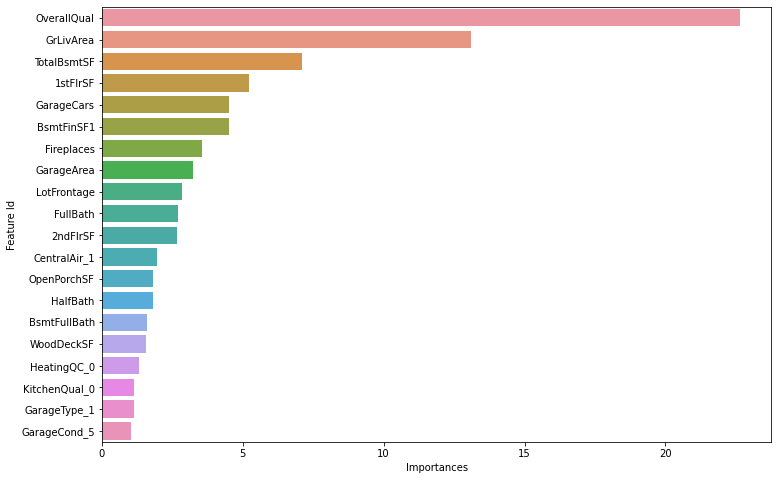

In [45]:
# Plotting top 20 catboost features' importance

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h')
plt.show()

In [103]:
# XGB Regressor
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train,test_size = 0.1, random_state=42)

xgb_1 = xgb.XGBRegressor(n_estimators=2200)
xgb_model = xgb_1.fit(x_train,y_train,
                     verbose = 0)

In [100]:
xgb_pred = xgb_model.predict(X_val)
xgb_score = rmse(Y_val, xgb_pred)
xgb_score

C:\Users\Park\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.0016703430138341818

In [81]:
cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.041749998927116394,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations':

In [48]:
# Preforming a Random Grid Search to find the best combination of parameters

grid = {'iterations': [1000,6000],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

final_model = CatBoostRegressor()
randomized_search_result = final_model.randomized_search(grid,
                                                   X = x_train,
                                                   y= y_train,
                                                   plot = True,
                                                   verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 12.0193641	test: 12.0461493	best: 12.0461493 (0)	total: 3.56ms	remaining: 3.56s
1:	learn: 12.0134021	test: 12.0401852	best: 12.0401852 (1)	total: 4.56ms	remaining: 2.27s
2:	learn: 12.0074389	test: 12.0342165	best: 12.0342165 (2)	total: 5.65ms	remaining: 1.88s
3:	learn: 12.0014806	test: 12.0282531	best: 12.0282531 (3)	total: 6.83ms	remaining: 1.7s
4:	learn: 11.9955366	test: 12.0223044	best: 12.0223044 (4)	total: 7.82ms	remaining: 1.55s
5:	learn: 11.9895836	test: 12.0163343	best: 12.0163343 (5)	total: 8.92ms	remaining: 1.48s
6:	learn: 11.9836461	test: 12.0104090	best: 12.0104090 (6)	total: 9.93ms	remaining: 1.41s
7:	learn: 11.9777001	test: 12.0044378	best: 12.0044378 (7)	total: 11ms	remaining: 1.37s
8:	learn: 11.9717827	test: 11.9985432	best: 11.9985432 (8)	total: 12ms	remaining: 1.32s
9:	learn: 11.9658319	test: 11.9925980	best: 11.9925980 (9)	total: 13.1ms	remaining: 1.29s
10:	learn: 11.9599114	test: 11.9866658	best: 11.9866658 (10)	total: 14.2ms	remaining: 1.28s
11:	learn: 11

179:	learn: 10.9970733	test: 11.0237260	best: 11.0237260 (179)	total: 178ms	remaining: 811ms
180:	learn: 10.9916075	test: 11.0182587	best: 11.0182587 (180)	total: 179ms	remaining: 810ms
181:	learn: 10.9861572	test: 11.0128300	best: 11.0128300 (181)	total: 180ms	remaining: 809ms
182:	learn: 10.9807002	test: 11.0073749	best: 11.0073749 (182)	total: 181ms	remaining: 808ms
183:	learn: 10.9752511	test: 11.0019163	best: 11.0019163 (183)	total: 182ms	remaining: 807ms
184:	learn: 10.9697925	test: 10.9964511	best: 10.9964511 (184)	total: 183ms	remaining: 807ms
185:	learn: 10.9643488	test: 10.9910042	best: 10.9910042 (185)	total: 184ms	remaining: 806ms
186:	learn: 10.9589008	test: 10.9855545	best: 10.9855545 (186)	total: 185ms	remaining: 805ms
187:	learn: 10.9534594	test: 10.9801441	best: 10.9801441 (187)	total: 186ms	remaining: 805ms
188:	learn: 10.9480220	test: 10.9747005	best: 10.9747005 (188)	total: 187ms	remaining: 804ms
189:	learn: 10.9426027	test: 10.9692896	best: 10.9692896 (189)	total: 

342:	learn: 10.1422298	test: 10.1686023	best: 10.1686023 (342)	total: 339ms	remaining: 650ms
343:	learn: 10.1371939	test: 10.1635623	best: 10.1635623 (343)	total: 340ms	remaining: 649ms
344:	learn: 10.1321609	test: 10.1585316	best: 10.1585316 (344)	total: 341ms	remaining: 648ms
345:	learn: 10.1271356	test: 10.1534992	best: 10.1534992 (345)	total: 343ms	remaining: 648ms
346:	learn: 10.1221215	test: 10.1484708	best: 10.1484708 (346)	total: 344ms	remaining: 647ms
347:	learn: 10.1170972	test: 10.1434601	best: 10.1434601 (347)	total: 345ms	remaining: 646ms
348:	learn: 10.1121049	test: 10.1384599	best: 10.1384599 (348)	total: 346ms	remaining: 645ms
349:	learn: 10.1070896	test: 10.1334398	best: 10.1334398 (349)	total: 347ms	remaining: 644ms
350:	learn: 10.1020697	test: 10.1284090	best: 10.1284090 (350)	total: 348ms	remaining: 643ms
351:	learn: 10.0970451	test: 10.1233745	best: 10.1233745 (351)	total: 349ms	remaining: 642ms
352:	learn: 10.0920368	test: 10.1183649	best: 10.1183649 (352)	total: 

508:	learn: 9.3403522	test: 9.3666004	best: 9.3666004 (508)	total: 507ms	remaining: 489ms
509:	learn: 9.3356938	test: 9.3619413	best: 9.3619413 (509)	total: 507ms	remaining: 487ms
510:	learn: 9.3310542	test: 9.3573021	best: 9.3573021 (510)	total: 508ms	remaining: 486ms
511:	learn: 9.3264103	test: 9.3526563	best: 9.3526563 (511)	total: 509ms	remaining: 485ms
512:	learn: 9.3217715	test: 9.3480224	best: 9.3480224 (512)	total: 510ms	remaining: 484ms
513:	learn: 9.3171224	test: 9.3433727	best: 9.3433727 (513)	total: 511ms	remaining: 483ms
514:	learn: 9.3125183	test: 9.3387651	best: 9.3387651 (514)	total: 512ms	remaining: 482ms
515:	learn: 9.3078936	test: 9.3341294	best: 9.3341294 (515)	total: 513ms	remaining: 481ms
516:	learn: 9.3032927	test: 9.3295101	best: 9.3295101 (516)	total: 514ms	remaining: 480ms
517:	learn: 9.2986768	test: 9.3249198	best: 9.3249198 (517)	total: 515ms	remaining: 479ms
518:	learn: 9.2940564	test: 9.3203010	best: 9.3203010 (518)	total: 516ms	remaining: 478ms
519:	learn

681:	learn: 8.5720698	test: 8.5980883	best: 8.5980883 (681)	total: 677ms	remaining: 316ms
682:	learn: 8.5678110	test: 8.5938182	best: 8.5938182 (682)	total: 678ms	remaining: 315ms
683:	learn: 8.5635556	test: 8.5895543	best: 8.5895543 (683)	total: 679ms	remaining: 314ms
684:	learn: 8.5593041	test: 8.5852939	best: 8.5852939 (684)	total: 680ms	remaining: 313ms
685:	learn: 8.5550446	test: 8.5810251	best: 8.5810251 (685)	total: 681ms	remaining: 312ms
686:	learn: 8.5507875	test: 8.5767627	best: 8.5767627 (686)	total: 682ms	remaining: 311ms
687:	learn: 8.5465674	test: 8.5725281	best: 8.5725281 (687)	total: 683ms	remaining: 310ms
688:	learn: 8.5423244	test: 8.5682958	best: 8.5682958 (688)	total: 684ms	remaining: 309ms
689:	learn: 8.5380882	test: 8.5640495	best: 8.5640495 (689)	total: 685ms	remaining: 308ms
690:	learn: 8.5338487	test: 8.5598161	best: 8.5598161 (690)	total: 687ms	remaining: 307ms
691:	learn: 8.5296177	test: 8.5555848	best: 8.5555848 (691)	total: 688ms	remaining: 306ms
692:	learn

840:	learn: 7.9219194	test: 7.9477589	best: 7.9477589 (840)	total: 836ms	remaining: 158ms
841:	learn: 7.9180033	test: 7.9438388	best: 7.9438388 (841)	total: 837ms	remaining: 157ms
842:	learn: 7.9140703	test: 7.9398932	best: 7.9398932 (842)	total: 838ms	remaining: 156ms
843:	learn: 7.9101399	test: 7.9359573	best: 7.9359573 (843)	total: 839ms	remaining: 155ms
844:	learn: 7.9062146	test: 7.9320238	best: 7.9320238 (844)	total: 840ms	remaining: 154ms
845:	learn: 7.9023009	test: 7.9281228	best: 7.9281228 (845)	total: 841ms	remaining: 153ms
846:	learn: 7.8983773	test: 7.9241991	best: 7.9241991 (846)	total: 842ms	remaining: 152ms
847:	learn: 7.8944580	test: 7.9202818	best: 7.9202818 (847)	total: 843ms	remaining: 151ms
848:	learn: 7.8905467	test: 7.9163689	best: 7.9163689 (848)	total: 844ms	remaining: 150ms
849:	learn: 7.8866350	test: 7.9124533	best: 7.9124533 (849)	total: 845ms	remaining: 149ms
850:	learn: 7.8827286	test: 7.9085461	best: 7.9085461 (850)	total: 846ms	remaining: 148ms
851:	learn

990:	learn: 7.3539445	test: 7.3794218	best: 7.3794218 (990)	total: 1s	remaining: 9.1ms
991:	learn: 7.3503102	test: 7.3757796	best: 7.3757796 (991)	total: 1s	remaining: 8.09ms
992:	learn: 7.3466625	test: 7.3721312	best: 7.3721312 (992)	total: 1s	remaining: 7.08ms
993:	learn: 7.3430143	test: 7.3684809	best: 7.3684809 (993)	total: 1s	remaining: 6.07ms
994:	learn: 7.3393728	test: 7.3648364	best: 7.3648364 (994)	total: 1.01s	remaining: 5.06ms
995:	learn: 7.3357409	test: 7.3612206	best: 7.3612206 (995)	total: 1.01s	remaining: 4.04ms
996:	learn: 7.3321044	test: 7.3575816	best: 7.3575816 (996)	total: 1.01s	remaining: 3.04ms
997:	learn: 7.3284624	test: 7.3539385	best: 7.3539385 (997)	total: 1.01s	remaining: 2.02ms
998:	learn: 7.3248363	test: 7.3503043	best: 7.3503043 (998)	total: 1.01s	remaining: 1.01ms
999:	learn: 7.3212065	test: 7.3466831	best: 7.3466831 (999)	total: 1.01s	remaining: 0us

bestTest = 7.346683101
bestIteration = 999

0:	learn: 12.0196073	test: 12.0464119	best: 12.0464119 (0)	to

143:	learn: 11.2231477	test: 11.2495316	best: 11.2495316 (143)	total: 152ms	remaining: 6.18s
144:	learn: 11.2176975	test: 11.2440990	best: 11.2440990 (144)	total: 153ms	remaining: 6.19s
145:	learn: 11.2123021	test: 11.2386884	best: 11.2386884 (145)	total: 155ms	remaining: 6.2s
146:	learn: 11.2069026	test: 11.2332668	best: 11.2332668 (146)	total: 156ms	remaining: 6.19s
147:	learn: 11.2014877	test: 11.2278350	best: 11.2278350 (147)	total: 157ms	remaining: 6.19s
148:	learn: 11.1960447	test: 11.2224032	best: 11.2224032 (148)	total: 157ms	remaining: 6.18s
149:	learn: 11.1906796	test: 11.2171172	best: 11.2171172 (149)	total: 159ms	remaining: 6.19s
150:	learn: 11.1852731	test: 11.2117110	best: 11.2117110 (150)	total: 160ms	remaining: 6.18s
151:	learn: 11.1798915	test: 11.2063125	best: 11.2063125 (151)	total: 161ms	remaining: 6.18s
152:	learn: 11.1745581	test: 11.2009348	best: 11.2009348 (152)	total: 162ms	remaining: 6.18s
153:	learn: 11.1691764	test: 11.1955670	best: 11.1955670 (153)	total: 1

280:	learn: 10.5098833	test: 10.5357773	best: 10.5357773 (280)	total: 320ms	remaining: 6.52s
281:	learn: 10.5047847	test: 10.5306744	best: 10.5306744 (281)	total: 321ms	remaining: 6.52s
282:	learn: 10.4996190	test: 10.5255047	best: 10.5255047 (282)	total: 322ms	remaining: 6.51s
283:	learn: 10.4945532	test: 10.5204806	best: 10.5204806 (283)	total: 323ms	remaining: 6.5s
284:	learn: 10.4895681	test: 10.5154407	best: 10.5154407 (284)	total: 324ms	remaining: 6.5s
285:	learn: 10.4844006	test: 10.5102908	best: 10.5102908 (285)	total: 325ms	remaining: 6.49s
286:	learn: 10.4792801	test: 10.5051566	best: 10.5051566 (286)	total: 326ms	remaining: 6.49s
287:	learn: 10.4741838	test: 10.5000524	best: 10.5000524 (287)	total: 327ms	remaining: 6.49s
288:	learn: 10.4691070	test: 10.4949609	best: 10.4949609 (288)	total: 328ms	remaining: 6.48s
289:	learn: 10.4641167	test: 10.4899541	best: 10.4899541 (289)	total: 329ms	remaining: 6.47s
290:	learn: 10.4591568	test: 10.4850019	best: 10.4850019 (290)	total: 33

452:	learn: 9.6759550	test: 9.7011190	best: 9.7011190 (452)	total: 486ms	remaining: 5.96s
453:	learn: 9.6712868	test: 9.6964771	best: 9.6964771 (453)	total: 488ms	remaining: 5.96s
454:	learn: 9.6666769	test: 9.6918666	best: 9.6918666 (454)	total: 489ms	remaining: 5.95s
455:	learn: 9.6620341	test: 9.6872488	best: 9.6872488 (455)	total: 490ms	remaining: 5.95s
456:	learn: 9.6573955	test: 9.6825827	best: 9.6825827 (456)	total: 491ms	remaining: 5.95s
457:	learn: 9.6528922	test: 9.6780595	best: 9.6780595 (457)	total: 492ms	remaining: 5.95s
458:	learn: 9.6482388	test: 9.6733887	best: 9.6733887 (458)	total: 493ms	remaining: 5.95s
459:	learn: 9.6436076	test: 9.6687284	best: 9.6687284 (459)	total: 494ms	remaining: 5.95s
460:	learn: 9.6390692	test: 9.6641953	best: 9.6641953 (460)	total: 495ms	remaining: 5.95s
461:	learn: 9.6345408	test: 9.6596515	best: 9.6596515 (461)	total: 496ms	remaining: 5.94s
462:	learn: 9.6301101	test: 9.6552107	best: 9.6552107 (462)	total: 497ms	remaining: 5.94s
463:	learn

622:	learn: 8.9198225	test: 8.9438718	best: 8.9438718 (622)	total: 654ms	remaining: 5.65s
623:	learn: 8.9155774	test: 8.9396107	best: 8.9396107 (623)	total: 655ms	remaining: 5.65s
624:	learn: 8.9111911	test: 8.9352166	best: 8.9352166 (624)	total: 656ms	remaining: 5.64s
625:	learn: 8.9068034	test: 8.9308260	best: 8.9308260 (625)	total: 657ms	remaining: 5.63s
626:	learn: 8.9024251	test: 8.9264229	best: 8.9264229 (626)	total: 657ms	remaining: 5.63s
627:	learn: 8.8981755	test: 8.9221481	best: 8.9221481 (627)	total: 659ms	remaining: 5.63s
628:	learn: 8.8939044	test: 8.9179095	best: 8.9179095 (628)	total: 660ms	remaining: 5.63s
629:	learn: 8.8896149	test: 8.9136140	best: 8.9136140 (629)	total: 661ms	remaining: 5.63s
630:	learn: 8.8853238	test: 8.9093280	best: 8.9093280 (630)	total: 662ms	remaining: 5.63s
631:	learn: 8.8810319	test: 8.9050449	best: 8.9050449 (631)	total: 663ms	remaining: 5.63s
632:	learn: 8.8768663	test: 8.9008324	best: 8.9008324 (632)	total: 664ms	remaining: 5.63s
633:	learn

786:	learn: 8.2473025	test: 8.2707035	best: 8.2707035 (786)	total: 820ms	remaining: 5.43s
787:	learn: 8.2433440	test: 8.2667189	best: 8.2667189 (787)	total: 821ms	remaining: 5.43s
788:	learn: 8.2393465	test: 8.2627016	best: 8.2627016 (788)	total: 822ms	remaining: 5.43s
789:	learn: 8.2355104	test: 8.2588452	best: 8.2588452 (789)	total: 823ms	remaining: 5.43s
790:	learn: 8.2314331	test: 8.2547671	best: 8.2547671 (790)	total: 824ms	remaining: 5.42s
791:	learn: 8.2273578	test: 8.2506911	best: 8.2506911 (791)	total: 824ms	remaining: 5.42s
792:	learn: 8.2234014	test: 8.2467002	best: 8.2467002 (792)	total: 826ms	remaining: 5.42s
793:	learn: 8.2195007	test: 8.2427887	best: 8.2427887 (793)	total: 827ms	remaining: 5.42s
794:	learn: 8.2156023	test: 8.2388873	best: 8.2388873 (794)	total: 828ms	remaining: 5.42s
795:	learn: 8.2116292	test: 8.2349000	best: 8.2349000 (795)	total: 829ms	remaining: 5.42s
796:	learn: 8.2077718	test: 8.2310218	best: 8.2310218 (796)	total: 831ms	remaining: 5.42s
797:	learn

930:	learn: 7.6981151	test: 7.7202374	best: 7.7202374 (930)	total: 998ms	remaining: 5.43s
931:	learn: 7.6943789	test: 7.7164940	best: 7.7164940 (931)	total: 999ms	remaining: 5.43s
932:	learn: 7.6906366	test: 7.7127529	best: 7.7127529 (932)	total: 1000ms	remaining: 5.43s
933:	learn: 7.6869373	test: 7.7090347	best: 7.7090347 (933)	total: 1s	remaining: 5.43s
934:	learn: 7.6832904	test: 7.7054491	best: 7.7054491 (934)	total: 1s	remaining: 5.43s
935:	learn: 7.6795976	test: 7.7017488	best: 7.7017488 (935)	total: 1s	remaining: 5.42s
936:	learn: 7.6759246	test: 7.6980414	best: 7.6980414 (936)	total: 1s	remaining: 5.42s
937:	learn: 7.6722403	test: 7.6943489	best: 7.6943489 (937)	total: 1s	remaining: 5.42s
938:	learn: 7.6686016	test: 7.6907059	best: 7.6907059 (938)	total: 1.01s	remaining: 5.42s
939:	learn: 7.6648507	test: 7.6869515	best: 7.6869515 (939)	total: 1.01s	remaining: 5.42s
940:	learn: 7.6610614	test: 7.6831564	best: 7.6831564 (940)	total: 1.01s	remaining: 5.42s
941:	learn: 7.6574597	te

1086:	learn: 7.1441577	test: 7.1656581	best: 7.1656581 (1086)	total: 1.15s	remaining: 5.22s
1087:	learn: 7.1407425	test: 7.1622646	best: 7.1622646 (1087)	total: 1.16s	remaining: 5.21s
1088:	learn: 7.1373567	test: 7.1588943	best: 7.1588943 (1088)	total: 1.16s	remaining: 5.21s
1089:	learn: 7.1339080	test: 7.1554293	best: 7.1554293 (1089)	total: 1.16s	remaining: 5.21s
1090:	learn: 7.1304788	test: 7.1519924	best: 7.1519924 (1090)	total: 1.16s	remaining: 5.21s
1091:	learn: 7.1270322	test: 7.1485400	best: 7.1485400 (1091)	total: 1.16s	remaining: 5.21s
1092:	learn: 7.1236467	test: 7.1451666	best: 7.1451666 (1092)	total: 1.16s	remaining: 5.21s
1093:	learn: 7.1202517	test: 7.1417750	best: 7.1417750 (1093)	total: 1.16s	remaining: 5.21s
1094:	learn: 7.1168477	test: 7.1383709	best: 7.1383709 (1094)	total: 1.16s	remaining: 5.21s
1095:	learn: 7.1135833	test: 7.1350985	best: 7.1350985 (1095)	total: 1.16s	remaining: 5.21s
1096:	learn: 7.1101141	test: 7.1316203	best: 7.1316203 (1096)	total: 1.16s	remai

1247:	learn: 6.6141597	test: 6.6349121	best: 6.6349121 (1247)	total: 1.32s	remaining: 5.02s
1248:	learn: 6.6109747	test: 6.6317136	best: 6.6317136 (1248)	total: 1.32s	remaining: 5.02s
1249:	learn: 6.6077652	test: 6.6284952	best: 6.6284952 (1249)	total: 1.32s	remaining: 5.02s
1250:	learn: 6.6046090	test: 6.6253339	best: 6.6253339 (1250)	total: 1.32s	remaining: 5.02s
1251:	learn: 6.6015547	test: 6.6222851	best: 6.6222851 (1251)	total: 1.32s	remaining: 5.02s
1252:	learn: 6.5984082	test: 6.6191279	best: 6.6191279 (1252)	total: 1.32s	remaining: 5.02s
1253:	learn: 6.5952292	test: 6.6159564	best: 6.6159564 (1253)	total: 1.32s	remaining: 5.02s
1254:	learn: 6.5920516	test: 6.6127654	best: 6.6127654 (1254)	total: 1.33s	remaining: 5.01s
1255:	learn: 6.5888399	test: 6.6095530	best: 6.6095530 (1255)	total: 1.33s	remaining: 5.01s
1256:	learn: 6.5857619	test: 6.6064374	best: 6.6064374 (1256)	total: 1.33s	remaining: 5.01s
1257:	learn: 6.5826425	test: 6.6033265	best: 6.6033265 (1257)	total: 1.33s	remai

1414:	learn: 6.1057409	test: 6.1258641	best: 6.1258641 (1414)	total: 1.48s	remaining: 4.81s
1415:	learn: 6.1028309	test: 6.1229553	best: 6.1229553 (1415)	total: 1.49s	remaining: 4.81s
1416:	learn: 6.0999477	test: 6.1200844	best: 6.1200844 (1416)	total: 1.49s	remaining: 4.81s
1417:	learn: 6.0970423	test: 6.1171746	best: 6.1171746 (1417)	total: 1.49s	remaining: 4.81s
1418:	learn: 6.0940900	test: 6.1142155	best: 6.1142155 (1418)	total: 1.49s	remaining: 4.81s
1419:	learn: 6.0912032	test: 6.1112978	best: 6.1112978 (1419)	total: 1.49s	remaining: 4.8s
1420:	learn: 6.0883605	test: 6.1084541	best: 6.1084541 (1420)	total: 1.49s	remaining: 4.8s
1421:	learn: 6.0853717	test: 6.1054674	best: 6.1054674 (1421)	total: 1.49s	remaining: 4.8s
1422:	learn: 6.0824286	test: 6.1025374	best: 6.1025374 (1422)	total: 1.49s	remaining: 4.8s
1423:	learn: 6.0795566	test: 6.0996659	best: 6.0996659 (1423)	total: 1.49s	remaining: 4.8s
1424:	learn: 6.0766786	test: 6.0967741	best: 6.0967741 (1424)	total: 1.5s	remaining: 

1585:	learn: 5.6266128	test: 5.6461446	best: 5.6461446 (1585)	total: 1.66s	remaining: 4.63s
1586:	learn: 5.6239087	test: 5.6434682	best: 5.6434682 (1586)	total: 1.67s	remaining: 4.63s
1587:	learn: 5.6212572	test: 5.6408329	best: 5.6408329 (1587)	total: 1.67s	remaining: 4.63s
1588:	learn: 5.6184804	test: 5.6380549	best: 5.6380549 (1588)	total: 1.67s	remaining: 4.63s
1589:	learn: 5.6157558	test: 5.6353253	best: 5.6353253 (1589)	total: 1.67s	remaining: 4.63s
1590:	learn: 5.6131209	test: 5.6327064	best: 5.6327064 (1590)	total: 1.67s	remaining: 4.63s
1591:	learn: 5.6104009	test: 5.6299887	best: 5.6299887 (1591)	total: 1.67s	remaining: 4.62s
1592:	learn: 5.6077171	test: 5.6273003	best: 5.6273003 (1592)	total: 1.67s	remaining: 4.62s
1593:	learn: 5.6050567	test: 5.6246409	best: 5.6246409 (1593)	total: 1.67s	remaining: 4.62s
1594:	learn: 5.6023914	test: 5.6219764	best: 5.6219764 (1594)	total: 1.67s	remaining: 4.62s
1595:	learn: 5.5996853	test: 5.6192607	best: 5.6192607 (1595)	total: 1.67s	remai

1743:	learn: 5.2184644	test: 5.2373780	best: 5.2373780 (1743)	total: 1.82s	remaining: 4.45s
1744:	learn: 5.2159376	test: 5.2348519	best: 5.2348519 (1744)	total: 1.82s	remaining: 4.45s
1745:	learn: 5.2133628	test: 5.2322758	best: 5.2322758 (1745)	total: 1.82s	remaining: 4.45s
1746:	learn: 5.2108912	test: 5.2298049	best: 5.2298049 (1746)	total: 1.83s	remaining: 4.45s
1747:	learn: 5.2084030	test: 5.2273079	best: 5.2273079 (1747)	total: 1.83s	remaining: 4.45s
1748:	learn: 5.2058974	test: 5.2247706	best: 5.2247706 (1748)	total: 1.83s	remaining: 4.44s
1749:	learn: 5.2033845	test: 5.2222391	best: 5.2222391 (1749)	total: 1.83s	remaining: 4.44s
1750:	learn: 5.2009034	test: 5.2197469	best: 5.2197469 (1750)	total: 1.83s	remaining: 4.44s
1751:	learn: 5.1984640	test: 5.2172940	best: 5.2172940 (1751)	total: 1.83s	remaining: 4.44s
1752:	learn: 5.1960104	test: 5.2148312	best: 5.2148312 (1752)	total: 1.83s	remaining: 4.44s
1753:	learn: 5.1934880	test: 5.2123118	best: 5.2123118 (1753)	total: 1.83s	remai

1905:	learn: 4.8305705	test: 4.8488349	best: 4.8488349 (1905)	total: 1.98s	remaining: 4.26s
1906:	learn: 4.8283117	test: 4.8465583	best: 4.8465583 (1906)	total: 1.99s	remaining: 4.26s
1907:	learn: 4.8259916	test: 4.8442308	best: 4.8442308 (1907)	total: 1.99s	remaining: 4.26s
1908:	learn: 4.8237263	test: 4.8419575	best: 4.8419575 (1908)	total: 1.99s	remaining: 4.26s
1909:	learn: 4.8213571	test: 4.8395838	best: 4.8395838 (1909)	total: 1.99s	remaining: 4.26s
1910:	learn: 4.8190566	test: 4.8372880	best: 4.8372880 (1910)	total: 1.99s	remaining: 4.26s
1911:	learn: 4.8167612	test: 4.8350081	best: 4.8350081 (1911)	total: 1.99s	remaining: 4.26s
1912:	learn: 4.8144353	test: 4.8326741	best: 4.8326741 (1912)	total: 1.99s	remaining: 4.26s
1913:	learn: 4.8120775	test: 4.8303180	best: 4.8303180 (1913)	total: 1.99s	remaining: 4.25s
1914:	learn: 4.8098044	test: 4.8280501	best: 4.8280501 (1914)	total: 1.99s	remaining: 4.25s
1915:	learn: 4.8074320	test: 4.8256763	best: 4.8256763 (1915)	total: 1.99s	remai

2053:	learn: 4.5015261	test: 4.5189901	best: 4.5189901 (2053)	total: 2.15s	remaining: 4.13s
2054:	learn: 4.4994189	test: 4.5168688	best: 4.5168688 (2054)	total: 2.15s	remaining: 4.13s
2055:	learn: 4.4973096	test: 4.5147572	best: 4.5147572 (2055)	total: 2.15s	remaining: 4.13s
2056:	learn: 4.4951543	test: 4.5125871	best: 4.5125871 (2056)	total: 2.15s	remaining: 4.13s
2057:	learn: 4.4929819	test: 4.5104096	best: 4.5104096 (2057)	total: 2.16s	remaining: 4.13s
2058:	learn: 4.4908363	test: 4.5082473	best: 4.5082473 (2058)	total: 2.16s	remaining: 4.13s
2059:	learn: 4.4886583	test: 4.5060878	best: 4.5060878 (2059)	total: 2.16s	remaining: 4.13s
2060:	learn: 4.4865162	test: 4.5039325	best: 4.5039325 (2060)	total: 2.16s	remaining: 4.13s
2061:	learn: 4.4843593	test: 4.5017639	best: 4.5017639 (2061)	total: 2.16s	remaining: 4.13s
2062:	learn: 4.4822014	test: 4.4995968	best: 4.4995968 (2062)	total: 2.16s	remaining: 4.13s
2063:	learn: 4.4801315	test: 4.4975224	best: 4.4975224 (2063)	total: 2.16s	remai

2221:	learn: 4.1546392	test: 4.1713210	best: 4.1713210 (2221)	total: 2.32s	remaining: 3.94s
2222:	learn: 4.1527000	test: 4.1693687	best: 4.1693687 (2222)	total: 2.32s	remaining: 3.94s
2223:	learn: 4.1507139	test: 4.1673695	best: 4.1673695 (2223)	total: 2.32s	remaining: 3.94s
2224:	learn: 4.1487166	test: 4.1653748	best: 4.1653748 (2224)	total: 2.32s	remaining: 3.94s
2225:	learn: 4.1467371	test: 4.1633875	best: 4.1633875 (2225)	total: 2.32s	remaining: 3.94s
2226:	learn: 4.1447653	test: 4.1614144	best: 4.1614144 (2226)	total: 2.32s	remaining: 3.94s
2227:	learn: 4.1428150	test: 4.1594601	best: 4.1594601 (2227)	total: 2.33s	remaining: 3.94s
2228:	learn: 4.1407755	test: 4.1574189	best: 4.1574189 (2228)	total: 2.33s	remaining: 3.93s
2229:	learn: 4.1387602	test: 4.1553967	best: 4.1553967 (2229)	total: 2.33s	remaining: 3.93s
2230:	learn: 4.1368505	test: 4.1534834	best: 4.1534834 (2230)	total: 2.33s	remaining: 3.93s
2231:	learn: 4.1348655	test: 4.1514995	best: 4.1514995 (2231)	total: 2.33s	remai

2382:	learn: 3.8490052	test: 3.8651383	best: 3.8651383 (2382)	total: 2.48s	remaining: 3.77s
2383:	learn: 3.8471681	test: 3.8633059	best: 3.8633059 (2383)	total: 2.48s	remaining: 3.77s
2384:	learn: 3.8453282	test: 3.8614655	best: 3.8614655 (2384)	total: 2.49s	remaining: 3.77s
2385:	learn: 3.8434643	test: 3.8596026	best: 3.8596026 (2385)	total: 2.49s	remaining: 3.77s
2386:	learn: 3.8415744	test: 3.8577109	best: 3.8577109 (2386)	total: 2.49s	remaining: 3.77s
2387:	learn: 3.8397395	test: 3.8558621	best: 3.8558621 (2387)	total: 2.49s	remaining: 3.76s
2388:	learn: 3.8378885	test: 3.8539977	best: 3.8539977 (2388)	total: 2.49s	remaining: 3.76s
2389:	learn: 3.8360239	test: 3.8521320	best: 3.8521320 (2389)	total: 2.49s	remaining: 3.76s
2390:	learn: 3.8342092	test: 3.8503120	best: 3.8503120 (2390)	total: 2.49s	remaining: 3.76s
2391:	learn: 3.8323759	test: 3.8484710	best: 3.8484710 (2391)	total: 2.49s	remaining: 3.76s
2392:	learn: 3.8305576	test: 3.8466296	best: 3.8466296 (2392)	total: 2.49s	remai

2550:	learn: 3.5543330	test: 3.5697834	best: 3.5697834 (2550)	total: 2.65s	remaining: 3.58s
2551:	learn: 3.5526378	test: 3.5681021	best: 3.5681021 (2551)	total: 2.65s	remaining: 3.58s
2552:	learn: 3.5509855	test: 3.5664348	best: 3.5664348 (2552)	total: 2.65s	remaining: 3.58s
2553:	learn: 3.5493067	test: 3.5647400	best: 3.5647400 (2553)	total: 2.65s	remaining: 3.58s
2554:	learn: 3.5476861	test: 3.5631141	best: 3.5631141 (2554)	total: 2.66s	remaining: 3.58s
2555:	learn: 3.5460082	test: 3.5614329	best: 3.5614329 (2555)	total: 2.66s	remaining: 3.58s
2556:	learn: 3.5443647	test: 3.5597927	best: 3.5597927 (2556)	total: 2.66s	remaining: 3.58s
2557:	learn: 3.5426590	test: 3.5580849	best: 3.5580849 (2557)	total: 2.66s	remaining: 3.58s
2558:	learn: 3.5410188	test: 3.5564341	best: 3.5564341 (2558)	total: 2.66s	remaining: 3.58s
2559:	learn: 3.5393760	test: 3.5547830	best: 3.5547830 (2559)	total: 2.66s	remaining: 3.58s
2560:	learn: 3.5376892	test: 3.5530834	best: 3.5530834 (2560)	total: 2.66s	remai

2717:	learn: 3.2844299	test: 3.2992037	best: 3.2992037 (2717)	total: 2.82s	remaining: 3.41s
2718:	learn: 3.2828947	test: 3.2976772	best: 3.2976772 (2718)	total: 2.82s	remaining: 3.41s
2719:	learn: 3.2813426	test: 3.2961218	best: 3.2961218 (2719)	total: 2.83s	remaining: 3.41s
2720:	learn: 3.2797904	test: 3.2945588	best: 3.2945588 (2720)	total: 2.83s	remaining: 3.4s
2721:	learn: 3.2782047	test: 3.2929740	best: 3.2929740 (2721)	total: 2.83s	remaining: 3.4s
2722:	learn: 3.2766731	test: 3.2914389	best: 3.2914389 (2722)	total: 2.83s	remaining: 3.4s
2723:	learn: 3.2751211	test: 3.2898601	best: 3.2898601 (2723)	total: 2.83s	remaining: 3.4s
2724:	learn: 3.2736022	test: 3.2883287	best: 3.2883287 (2724)	total: 2.83s	remaining: 3.4s
2725:	learn: 3.2720377	test: 3.2867542	best: 3.2867542 (2725)	total: 2.83s	remaining: 3.4s
2726:	learn: 3.2705097	test: 3.2852178	best: 3.2852178 (2726)	total: 2.83s	remaining: 3.4s
2727:	learn: 3.2689480	test: 3.2836637	best: 3.2836637 (2727)	total: 2.83s	remaining: 3

2890:	learn: 3.0263970	test: 3.0405822	best: 3.0405822 (2890)	total: 3s	remaining: 3.22s
2891:	learn: 3.0249615	test: 3.0391388	best: 3.0391388 (2891)	total: 3s	remaining: 3.22s
2892:	learn: 3.0235138	test: 3.0376786	best: 3.0376786 (2892)	total: 3s	remaining: 3.22s
2893:	learn: 3.0220937	test: 3.0362562	best: 3.0362562 (2893)	total: 3s	remaining: 3.22s
2894:	learn: 3.0206607	test: 3.0348374	best: 3.0348374 (2894)	total: 3s	remaining: 3.22s
2895:	learn: 3.0192272	test: 3.0334041	best: 3.0334041 (2895)	total: 3s	remaining: 3.22s
2896:	learn: 3.0178450	test: 3.0320087	best: 3.0320087 (2896)	total: 3s	remaining: 3.22s
2897:	learn: 3.0164557	test: 3.0306120	best: 3.0306120 (2897)	total: 3s	remaining: 3.21s
2898:	learn: 3.0150355	test: 3.0291784	best: 3.0291784 (2898)	total: 3s	remaining: 3.21s
2899:	learn: 3.0135956	test: 3.0277403	best: 3.0277403 (2899)	total: 3s	remaining: 3.21s
2900:	learn: 3.0121601	test: 3.0263005	best: 3.0263005 (2900)	total: 3.01s	remaining: 3.21s
2901:	learn: 3.010

3049:	learn: 2.8071724	test: 2.8207614	best: 2.8207614 (3049)	total: 3.15s	remaining: 3.05s
3050:	learn: 2.8058817	test: 2.8194720	best: 2.8194720 (3050)	total: 3.15s	remaining: 3.05s
3051:	learn: 2.8045464	test: 2.8181379	best: 2.8181379 (3051)	total: 3.15s	remaining: 3.04s
3052:	learn: 2.8032000	test: 2.8167804	best: 2.8167804 (3052)	total: 3.15s	remaining: 3.04s
3053:	learn: 2.8018604	test: 2.8154558	best: 2.8154558 (3053)	total: 3.15s	remaining: 3.04s
3054:	learn: 2.8005201	test: 2.8141068	best: 2.8141068 (3054)	total: 3.16s	remaining: 3.04s
3055:	learn: 2.7991971	test: 2.8127663	best: 2.8127663 (3055)	total: 3.16s	remaining: 3.04s
3056:	learn: 2.7978825	test: 2.8114403	best: 2.8114403 (3056)	total: 3.16s	remaining: 3.04s
3057:	learn: 2.7965428	test: 2.8100973	best: 2.8100973 (3057)	total: 3.16s	remaining: 3.04s
3058:	learn: 2.7952522	test: 2.8088273	best: 2.8088273 (3058)	total: 3.16s	remaining: 3.04s
3059:	learn: 2.7939435	test: 2.8075240	best: 2.8075240 (3059)	total: 3.16s	remai

3217:	learn: 2.5934070	test: 2.6062786	best: 2.6062786 (3217)	total: 3.32s	remaining: 2.87s
3218:	learn: 2.5921862	test: 2.6050421	best: 2.6050421 (3218)	total: 3.32s	remaining: 2.87s
3219:	learn: 2.5909532	test: 2.6038041	best: 2.6038041 (3219)	total: 3.32s	remaining: 2.87s
3220:	learn: 2.5897364	test: 2.6025862	best: 2.6025862 (3220)	total: 3.32s	remaining: 2.86s
3221:	learn: 2.5885153	test: 2.6013547	best: 2.6013547 (3221)	total: 3.32s	remaining: 2.86s
3222:	learn: 2.5872945	test: 2.6001291	best: 2.6001291 (3222)	total: 3.32s	remaining: 2.86s
3223:	learn: 2.5860946	test: 2.5989200	best: 2.5989200 (3223)	total: 3.32s	remaining: 2.86s
3224:	learn: 2.5849018	test: 2.5977246	best: 2.5977246 (3224)	total: 3.32s	remaining: 2.86s
3225:	learn: 2.5837566	test: 2.5965765	best: 2.5965765 (3225)	total: 3.33s	remaining: 2.86s
3226:	learn: 2.5825410	test: 2.5953523	best: 2.5953523 (3226)	total: 3.33s	remaining: 2.86s
3227:	learn: 2.5813246	test: 2.5941396	best: 2.5941396 (3227)	total: 3.33s	remai

3387:	learn: 2.3945756	test: 2.4066196	best: 2.4066196 (3387)	total: 3.48s	remaining: 2.69s
3388:	learn: 2.3934749	test: 2.4055173	best: 2.4055173 (3388)	total: 3.48s	remaining: 2.68s
3389:	learn: 2.3923703	test: 2.4044220	best: 2.4044220 (3389)	total: 3.48s	remaining: 2.68s
3390:	learn: 2.3912554	test: 2.4032991	best: 2.4032991 (3390)	total: 3.49s	remaining: 2.68s
3391:	learn: 2.3901500	test: 2.4021818	best: 2.4021818 (3391)	total: 3.49s	remaining: 2.68s
3392:	learn: 2.3890585	test: 2.4010755	best: 2.4010755 (3392)	total: 3.49s	remaining: 2.68s
3393:	learn: 2.3879388	test: 2.3999402	best: 2.3999402 (3393)	total: 3.49s	remaining: 2.68s
3394:	learn: 2.3868364	test: 2.3988382	best: 2.3988382 (3394)	total: 3.49s	remaining: 2.68s
3395:	learn: 2.3857049	test: 2.3977033	best: 2.3977033 (3395)	total: 3.49s	remaining: 2.68s
3396:	learn: 2.3845748	test: 2.3965720	best: 2.3965720 (3396)	total: 3.49s	remaining: 2.68s
3397:	learn: 2.3834473	test: 2.3954372	best: 2.3954372 (3397)	total: 3.49s	remai

3550:	learn: 2.2184257	test: 2.2296834	best: 2.2296834 (3550)	total: 3.65s	remaining: 2.52s
3551:	learn: 2.2174009	test: 2.2286631	best: 2.2286631 (3551)	total: 3.65s	remaining: 2.52s
3552:	learn: 2.2163736	test: 2.2276249	best: 2.2276249 (3552)	total: 3.65s	remaining: 2.52s
3553:	learn: 2.2153275	test: 2.2265805	best: 2.2265805 (3553)	total: 3.65s	remaining: 2.51s
3554:	learn: 2.2143095	test: 2.2255541	best: 2.2255541 (3554)	total: 3.65s	remaining: 2.51s
3555:	learn: 2.2133198	test: 2.2245741	best: 2.2245741 (3555)	total: 3.65s	remaining: 2.51s
3556:	learn: 2.2122758	test: 2.2235147	best: 2.2235147 (3556)	total: 3.66s	remaining: 2.51s
3557:	learn: 2.2112645	test: 2.2224970	best: 2.2224970 (3557)	total: 3.66s	remaining: 2.51s
3558:	learn: 2.2102246	test: 2.2214485	best: 2.2214485 (3558)	total: 3.66s	remaining: 2.51s
3559:	learn: 2.2091866	test: 2.2204030	best: 2.2204030 (3559)	total: 3.66s	remaining: 2.51s
3560:	learn: 2.2081522	test: 2.2193743	best: 2.2193743 (3560)	total: 3.66s	remai

3700:	learn: 2.0685957	test: 2.0790711	best: 2.0790711 (3700)	total: 3.82s	remaining: 2.37s
3701:	learn: 2.0675982	test: 2.0780704	best: 2.0780704 (3701)	total: 3.82s	remaining: 2.37s
3702:	learn: 2.0666177	test: 2.0770831	best: 2.0770831 (3702)	total: 3.82s	remaining: 2.37s
3703:	learn: 2.0656612	test: 2.0761113	best: 2.0761113 (3703)	total: 3.82s	remaining: 2.37s
3704:	learn: 2.0647035	test: 2.0751420	best: 2.0751420 (3704)	total: 3.82s	remaining: 2.37s
3705:	learn: 2.0638001	test: 2.0742386	best: 2.0742386 (3705)	total: 3.82s	remaining: 2.37s
3706:	learn: 2.0628578	test: 2.0732928	best: 2.0732928 (3706)	total: 3.82s	remaining: 2.36s
3707:	learn: 2.0619080	test: 2.0723374	best: 2.0723374 (3707)	total: 3.82s	remaining: 2.36s
3708:	learn: 2.0609303	test: 2.0713528	best: 2.0713528 (3708)	total: 3.83s	remaining: 2.36s
3709:	learn: 2.0599733	test: 2.0703745	best: 2.0703745 (3709)	total: 3.83s	remaining: 2.36s
3710:	learn: 2.0590542	test: 2.0694643	best: 2.0694643 (3710)	total: 3.83s	remai

3846:	learn: 1.9331780	test: 1.9430118	best: 1.9430118 (3846)	total: 3.98s	remaining: 2.23s
3847:	learn: 1.9322864	test: 1.9421169	best: 1.9421169 (3847)	total: 3.98s	remaining: 2.23s
3848:	learn: 1.9314092	test: 1.9412305	best: 1.9412305 (3848)	total: 3.99s	remaining: 2.23s
3849:	learn: 1.9305151	test: 1.9403303	best: 1.9403303 (3849)	total: 3.99s	remaining: 2.23s
3850:	learn: 1.9296211	test: 1.9394320	best: 1.9394320 (3850)	total: 3.99s	remaining: 2.23s
3851:	learn: 1.9287218	test: 1.9385327	best: 1.9385327 (3851)	total: 3.99s	remaining: 2.22s
3852:	learn: 1.9278730	test: 1.9376903	best: 1.9376903 (3852)	total: 3.99s	remaining: 2.22s
3853:	learn: 1.9269766	test: 1.9367937	best: 1.9367937 (3853)	total: 3.99s	remaining: 2.22s
3854:	learn: 1.9260816	test: 1.9358888	best: 1.9358888 (3854)	total: 3.99s	remaining: 2.22s
3855:	learn: 1.9251922	test: 1.9349880	best: 1.9349880 (3855)	total: 3.99s	remaining: 2.22s
3856:	learn: 1.9243063	test: 1.9341080	best: 1.9341080 (3856)	total: 3.99s	remai

3995:	learn: 1.8043342	test: 1.8135273	best: 1.8135273 (3995)	total: 4.15s	remaining: 2.08s
3996:	learn: 1.8035024	test: 1.8126917	best: 1.8126917 (3996)	total: 4.15s	remaining: 2.08s
3997:	learn: 1.8026917	test: 1.8118815	best: 1.8118815 (3997)	total: 4.16s	remaining: 2.08s
3998:	learn: 1.8018497	test: 1.8110380	best: 1.8110380 (3998)	total: 4.16s	remaining: 2.08s
3999:	learn: 1.8010185	test: 1.8102042	best: 1.8102042 (3999)	total: 4.16s	remaining: 2.08s
4000:	learn: 1.8001901	test: 1.8093780	best: 1.8093780 (4000)	total: 4.16s	remaining: 2.08s
4001:	learn: 1.7993746	test: 1.8085643	best: 1.8085643 (4001)	total: 4.16s	remaining: 2.08s
4002:	learn: 1.7985610	test: 1.8077452	best: 1.8077452 (4002)	total: 4.16s	remaining: 2.08s
4003:	learn: 1.7977373	test: 1.8069227	best: 1.8069227 (4003)	total: 4.16s	remaining: 2.07s
4004:	learn: 1.7969173	test: 1.8061083	best: 1.8061083 (4004)	total: 4.16s	remaining: 2.07s
4005:	learn: 1.7960834	test: 1.8052670	best: 1.8052670 (4005)	total: 4.16s	remai

4153:	learn: 1.6775453	test: 1.6859949	best: 1.6859949 (4153)	total: 4.32s	remaining: 1.92s
4154:	learn: 1.6767801	test: 1.6852269	best: 1.6852269 (4154)	total: 4.32s	remaining: 1.92s
4155:	learn: 1.6759990	test: 1.6844335	best: 1.6844335 (4155)	total: 4.32s	remaining: 1.92s
4156:	learn: 1.6752447	test: 1.6836626	best: 1.6836626 (4156)	total: 4.32s	remaining: 1.92s
4157:	learn: 1.6744637	test: 1.6828753	best: 1.6828753 (4157)	total: 4.32s	remaining: 1.91s
4158:	learn: 1.6736968	test: 1.6821046	best: 1.6821046 (4158)	total: 4.32s	remaining: 1.91s
4159:	learn: 1.6729245	test: 1.6813298	best: 1.6813298 (4159)	total: 4.32s	remaining: 1.91s
4160:	learn: 1.6721541	test: 1.6805461	best: 1.6805461 (4160)	total: 4.33s	remaining: 1.91s
4161:	learn: 1.6713859	test: 1.6797772	best: 1.6797772 (4161)	total: 4.33s	remaining: 1.91s
4162:	learn: 1.6706184	test: 1.6790080	best: 1.6790080 (4162)	total: 4.33s	remaining: 1.91s
4163:	learn: 1.6698563	test: 1.6782368	best: 1.6782368 (4163)	total: 4.33s	remai

4308:	learn: 1.5624857	test: 1.5700764	best: 1.5700764 (4308)	total: 4.48s	remaining: 1.76s
4309:	learn: 1.5617705	test: 1.5693702	best: 1.5693702 (4309)	total: 4.49s	remaining: 1.76s
4310:	learn: 1.5610449	test: 1.5686394	best: 1.5686394 (4310)	total: 4.49s	remaining: 1.76s
4311:	learn: 1.5603489	test: 1.5679373	best: 1.5679373 (4311)	total: 4.49s	remaining: 1.76s
4312:	learn: 1.5596549	test: 1.5672339	best: 1.5672339 (4312)	total: 4.49s	remaining: 1.75s
4313:	learn: 1.5589377	test: 1.5665014	best: 1.5665014 (4313)	total: 4.49s	remaining: 1.75s
4314:	learn: 1.5582219	test: 1.5657832	best: 1.5657832 (4314)	total: 4.49s	remaining: 1.75s
4315:	learn: 1.5574969	test: 1.5650589	best: 1.5650589 (4315)	total: 4.49s	remaining: 1.75s
4316:	learn: 1.5567774	test: 1.5643336	best: 1.5643336 (4316)	total: 4.49s	remaining: 1.75s
4317:	learn: 1.5560647	test: 1.5636145	best: 1.5636145 (4317)	total: 4.49s	remaining: 1.75s
4318:	learn: 1.5553467	test: 1.5628903	best: 1.5628903 (4318)	total: 4.49s	remai

4476:	learn: 1.4474495	test: 1.4540772	best: 1.4540772 (4476)	total: 4.65s	remaining: 1.58s
4477:	learn: 1.4468030	test: 1.4534237	best: 1.4534237 (4477)	total: 4.65s	remaining: 1.58s
4478:	learn: 1.4461509	test: 1.4527642	best: 1.4527642 (4478)	total: 4.65s	remaining: 1.58s
4479:	learn: 1.4454982	test: 1.4520984	best: 1.4520984 (4479)	total: 4.65s	remaining: 1.58s
4480:	learn: 1.4448510	test: 1.4514455	best: 1.4514455 (4480)	total: 4.65s	remaining: 1.58s
4481:	learn: 1.4441909	test: 1.4507801	best: 1.4507801 (4481)	total: 4.66s	remaining: 1.58s
4482:	learn: 1.4435379	test: 1.4501135	best: 1.4501135 (4482)	total: 4.66s	remaining: 1.57s
4483:	learn: 1.4429033	test: 1.4494745	best: 1.4494745 (4483)	total: 4.66s	remaining: 1.57s
4484:	learn: 1.4422569	test: 1.4488183	best: 1.4488183 (4484)	total: 4.66s	remaining: 1.57s
4485:	learn: 1.4416018	test: 1.4481590	best: 1.4481590 (4485)	total: 4.66s	remaining: 1.57s
4486:	learn: 1.4409447	test: 1.4474916	best: 1.4474916 (4486)	total: 4.66s	remai

4656:	learn: 1.3343930	test: 1.3399740	best: 1.3399740 (4656)	total: 4.83s	remaining: 1.39s
4657:	learn: 1.3337931	test: 1.3393727	best: 1.3393727 (4657)	total: 4.83s	remaining: 1.39s
4658:	learn: 1.3331865	test: 1.3387667	best: 1.3387667 (4658)	total: 4.83s	remaining: 1.39s
4659:	learn: 1.3325901	test: 1.3381699	best: 1.3381699 (4659)	total: 4.83s	remaining: 1.39s
4660:	learn: 1.3319958	test: 1.3375668	best: 1.3375668 (4660)	total: 4.83s	remaining: 1.39s
4661:	learn: 1.3314086	test: 1.3369753	best: 1.3369753 (4661)	total: 4.84s	remaining: 1.39s
4662:	learn: 1.3308088	test: 1.3363706	best: 1.3363706 (4662)	total: 4.84s	remaining: 1.39s
4663:	learn: 1.3302099	test: 1.3357812	best: 1.3357812 (4663)	total: 4.84s	remaining: 1.39s
4664:	learn: 1.3296031	test: 1.3351651	best: 1.3351651 (4664)	total: 4.84s	remaining: 1.38s
4665:	learn: 1.3290227	test: 1.3345864	best: 1.3345864 (4665)	total: 4.84s	remaining: 1.38s
4666:	learn: 1.3284547	test: 1.3340176	best: 1.3340176 (4666)	total: 4.84s	remai

4790:	learn: 1.2565736	test: 1.2614324	best: 1.2614324 (4790)	total: 4.98s	remaining: 1.26s
4791:	learn: 1.2560147	test: 1.2608735	best: 1.2608735 (4791)	total: 4.99s	remaining: 1.26s
4792:	learn: 1.2554622	test: 1.2603132	best: 1.2603132 (4792)	total: 4.99s	remaining: 1.25s
4793:	learn: 1.2548972	test: 1.2597433	best: 1.2597433 (4793)	total: 4.99s	remaining: 1.25s
4794:	learn: 1.2543192	test: 1.2591594	best: 1.2591594 (4794)	total: 4.99s	remaining: 1.25s
4795:	learn: 1.2537575	test: 1.2585882	best: 1.2585882 (4795)	total: 4.99s	remaining: 1.25s
4796:	learn: 1.2531923	test: 1.2580200	best: 1.2580200 (4796)	total: 4.99s	remaining: 1.25s
4797:	learn: 1.2526254	test: 1.2574544	best: 1.2574544 (4797)	total: 4.99s	remaining: 1.25s
4798:	learn: 1.2520589	test: 1.2568764	best: 1.2568764 (4798)	total: 4.99s	remaining: 1.25s
4799:	learn: 1.2514959	test: 1.2563049	best: 1.2563049 (4799)	total: 4.99s	remaining: 1.25s
4800:	learn: 1.2509264	test: 1.2557303	best: 1.2557303 (4800)	total: 4.99s	remai

4957:	learn: 1.1665158	test: 1.1703412	best: 1.1703412 (4957)	total: 5.15s	remaining: 1.08s
4958:	learn: 1.1660142	test: 1.1698361	best: 1.1698361 (4958)	total: 5.15s	remaining: 1.08s
4959:	learn: 1.1654944	test: 1.1693137	best: 1.1693137 (4959)	total: 5.15s	remaining: 1.08s
4960:	learn: 1.1649767	test: 1.1687896	best: 1.1687896 (4960)	total: 5.16s	remaining: 1.08s
4961:	learn: 1.1644572	test: 1.1682623	best: 1.1682623 (4961)	total: 5.16s	remaining: 1.08s
4962:	learn: 1.1639330	test: 1.1677326	best: 1.1677326 (4962)	total: 5.16s	remaining: 1.08s
4963:	learn: 1.1634189	test: 1.1672156	best: 1.1672156 (4963)	total: 5.16s	remaining: 1.08s
4964:	learn: 1.1629029	test: 1.1666983	best: 1.1666983 (4964)	total: 5.16s	remaining: 1.07s
4965:	learn: 1.1623882	test: 1.1661739	best: 1.1661739 (4965)	total: 5.16s	remaining: 1.07s
4966:	learn: 1.1618865	test: 1.1656650	best: 1.1656650 (4966)	total: 5.16s	remaining: 1.07s
4967:	learn: 1.1614019	test: 1.1651698	best: 1.1651698 (4967)	total: 5.16s	remai

5112:	learn: 1.0897342	test: 1.0926595	best: 1.0926595 (5112)	total: 5.32s	remaining: 923ms
5113:	learn: 1.0892417	test: 1.0921616	best: 1.0921616 (5113)	total: 5.32s	remaining: 921ms
5114:	learn: 1.0887651	test: 1.0916835	best: 1.0916835 (5114)	total: 5.32s	remaining: 920ms
5115:	learn: 1.0882889	test: 1.0912045	best: 1.0912045 (5115)	total: 5.32s	remaining: 919ms
5116:	learn: 1.0878203	test: 1.0907314	best: 1.0907314 (5116)	total: 5.32s	remaining: 918ms
5117:	learn: 1.0873511	test: 1.0902552	best: 1.0902552 (5117)	total: 5.32s	remaining: 917ms
5118:	learn: 1.0868730	test: 1.0897729	best: 1.0897729 (5118)	total: 5.32s	remaining: 916ms
5119:	learn: 1.0863983	test: 1.0892862	best: 1.0892862 (5119)	total: 5.33s	remaining: 915ms
5120:	learn: 1.0859198	test: 1.0887965	best: 1.0887965 (5120)	total: 5.33s	remaining: 914ms
5121:	learn: 1.0854452	test: 1.0883167	best: 1.0883167 (5121)	total: 5.33s	remaining: 913ms
5122:	learn: 1.0849687	test: 1.0878366	best: 1.0878366 (5122)	total: 5.33s	remai

5274:	learn: 1.0156546	test: 1.0175927	best: 1.0175927 (5274)	total: 5.48s	remaining: 754ms
5275:	learn: 1.0152206	test: 1.0171513	best: 1.0171513 (5275)	total: 5.49s	remaining: 753ms
5276:	learn: 1.0147838	test: 1.0167052	best: 1.0167052 (5276)	total: 5.49s	remaining: 752ms
5277:	learn: 1.0143483	test: 1.0162615	best: 1.0162615 (5277)	total: 5.49s	remaining: 751ms
5278:	learn: 1.0138985	test: 1.0158011	best: 1.0158011 (5278)	total: 5.49s	remaining: 750ms
5279:	learn: 1.0134639	test: 1.0153574	best: 1.0153574 (5279)	total: 5.49s	remaining: 749ms
5280:	learn: 1.0130234	test: 1.0149064	best: 1.0149064 (5280)	total: 5.49s	remaining: 748ms
5281:	learn: 1.0125860	test: 1.0144659	best: 1.0144659 (5281)	total: 5.49s	remaining: 747ms
5282:	learn: 1.0121559	test: 1.0140346	best: 1.0140346 (5282)	total: 5.49s	remaining: 745ms
5283:	learn: 1.0117250	test: 1.0136026	best: 1.0136026 (5283)	total: 5.49s	remaining: 744ms
5284:	learn: 1.0112799	test: 1.0131529	best: 1.0131529 (5284)	total: 5.5s	remain

5442:	learn: 0.9450231	test: 0.9459606	best: 0.9459606 (5442)	total: 5.65s	remaining: 578ms
5443:	learn: 0.9446081	test: 0.9455356	best: 0.9455356 (5443)	total: 5.65s	remaining: 577ms
5444:	learn: 0.9442001	test: 0.9451169	best: 0.9451169 (5444)	total: 5.65s	remaining: 576ms
5445:	learn: 0.9437955	test: 0.9447060	best: 0.9447060 (5445)	total: 5.65s	remaining: 575ms
5446:	learn: 0.9433768	test: 0.9442783	best: 0.9442783 (5446)	total: 5.66s	remaining: 574ms
5447:	learn: 0.9429832	test: 0.9438821	best: 0.9438821 (5447)	total: 5.66s	remaining: 573ms
5448:	learn: 0.9425893	test: 0.9434794	best: 0.9434794 (5448)	total: 5.66s	remaining: 572ms
5449:	learn: 0.9421991	test: 0.9430824	best: 0.9430824 (5449)	total: 5.66s	remaining: 571ms
5450:	learn: 0.9417897	test: 0.9426650	best: 0.9426650 (5450)	total: 5.66s	remaining: 570ms
5451:	learn: 0.9413967	test: 0.9422688	best: 0.9422688 (5451)	total: 5.66s	remaining: 569ms
5452:	learn: 0.9409969	test: 0.9418609	best: 0.9418609 (5452)	total: 5.66s	remai

5590:	learn: 0.8876260	test: 0.8875918	best: 0.8875918 (5590)	total: 5.82s	remaining: 426ms
5591:	learn: 0.8872579	test: 0.8872169	best: 0.8872169 (5591)	total: 5.82s	remaining: 425ms
5592:	learn: 0.8868864	test: 0.8868390	best: 0.8868390 (5592)	total: 5.82s	remaining: 424ms
5593:	learn: 0.8865101	test: 0.8864538	best: 0.8864538 (5593)	total: 5.82s	remaining: 423ms
5594:	learn: 0.8861333	test: 0.8860762	best: 0.8860762 (5594)	total: 5.82s	remaining: 422ms
5595:	learn: 0.8857585	test: 0.8856949	best: 0.8856949 (5595)	total: 5.82s	remaining: 421ms
5596:	learn: 0.8853917	test: 0.8853199	best: 0.8853199 (5596)	total: 5.83s	remaining: 419ms
5597:	learn: 0.8850155	test: 0.8849342	best: 0.8849342 (5597)	total: 5.83s	remaining: 418ms
5598:	learn: 0.8846409	test: 0.8845594	best: 0.8845594 (5598)	total: 5.83s	remaining: 417ms
5599:	learn: 0.8842722	test: 0.8841825	best: 0.8841825 (5599)	total: 5.83s	remaining: 416ms
5600:	learn: 0.8838933	test: 0.8837975	best: 0.8837975 (5600)	total: 5.83s	remai

5737:	learn: 0.8348067	test: 0.8338659	best: 0.8338659 (5737)	total: 5.99s	remaining: 273ms
5738:	learn: 0.8344647	test: 0.8335153	best: 0.8335153 (5738)	total: 5.99s	remaining: 272ms
5739:	learn: 0.8341185	test: 0.8331680	best: 0.8331680 (5739)	total: 5.99s	remaining: 271ms
5740:	learn: 0.8337696	test: 0.8328152	best: 0.8328152 (5740)	total: 5.99s	remaining: 270ms
5741:	learn: 0.8334238	test: 0.8324603	best: 0.8324603 (5741)	total: 5.99s	remaining: 269ms
5742:	learn: 0.8330798	test: 0.8321084	best: 0.8321084 (5742)	total: 5.99s	remaining: 268ms
5743:	learn: 0.8327397	test: 0.8317621	best: 0.8317621 (5743)	total: 5.99s	remaining: 267ms
5744:	learn: 0.8324013	test: 0.8314173	best: 0.8314173 (5744)	total: 5.99s	remaining: 266ms
5745:	learn: 0.8320471	test: 0.8310573	best: 0.8310573 (5745)	total: 5.99s	remaining: 265ms
5746:	learn: 0.8316963	test: 0.8307019	best: 0.8307019 (5746)	total: 6s	remaining: 264ms
5747:	learn: 0.8313484	test: 0.8303457	best: 0.8303457 (5747)	total: 6s	remaining: 

5884:	learn: 0.7859341	test: 0.7840703	best: 0.7840703 (5884)	total: 6.15s	remaining: 120ms
5885:	learn: 0.7856130	test: 0.7837451	best: 0.7837451 (5885)	total: 6.15s	remaining: 119ms
5886:	learn: 0.7852861	test: 0.7834107	best: 0.7834107 (5886)	total: 6.16s	remaining: 118ms
5887:	learn: 0.7849642	test: 0.7830824	best: 0.7830824 (5887)	total: 6.16s	remaining: 117ms
5888:	learn: 0.7846429	test: 0.7827529	best: 0.7827529 (5888)	total: 6.16s	remaining: 116ms
5889:	learn: 0.7843182	test: 0.7824225	best: 0.7824225 (5889)	total: 6.16s	remaining: 115ms
5890:	learn: 0.7839956	test: 0.7820933	best: 0.7820933 (5890)	total: 6.16s	remaining: 114ms
5891:	learn: 0.7836729	test: 0.7817618	best: 0.7817618 (5891)	total: 6.16s	remaining: 113ms
5892:	learn: 0.7833433	test: 0.7814233	best: 0.7814233 (5892)	total: 6.16s	remaining: 112ms
5893:	learn: 0.7830278	test: 0.7811001	best: 0.7811001 (5893)	total: 6.16s	remaining: 111ms
5894:	learn: 0.7827092	test: 0.7807734	best: 0.7807734 (5894)	total: 6.17s	remai

9:	learn: 11.9661017	test: 11.9929569	best: 11.9929569 (9)	total: 17.8ms	remaining: 10.7s
10:	learn: 11.9601818	test: 11.9870209	best: 11.9870209 (10)	total: 19.8ms	remaining: 10.8s
11:	learn: 11.9542681	test: 11.9811420	best: 11.9811420 (11)	total: 21.7ms	remaining: 10.8s
12:	learn: 11.9484093	test: 11.9752800	best: 11.9752800 (12)	total: 23.9ms	remaining: 11s
13:	learn: 11.9424971	test: 11.9693734	best: 11.9693734 (13)	total: 25.8ms	remaining: 11s
14:	learn: 11.9366579	test: 11.9635715	best: 11.9635715 (14)	total: 27.8ms	remaining: 11.1s
15:	learn: 11.9308154	test: 11.9577925	best: 11.9577925 (15)	total: 29.8ms	remaining: 11.1s
16:	learn: 11.9249303	test: 11.9519189	best: 11.9519189 (16)	total: 31.6ms	remaining: 11.1s
17:	learn: 11.9190470	test: 11.9460370	best: 11.9460370 (17)	total: 33.8ms	remaining: 11.2s
18:	learn: 11.9131391	test: 11.9401166	best: 11.9401166 (18)	total: 36.1ms	remaining: 11.4s
19:	learn: 11.9072708	test: 11.9342484	best: 11.9342484 (19)	total: 37.9ms	remaining: 

102:	learn: 11.4293203	test: 11.4567848	best: 11.4567848 (102)	total: 189ms	remaining: 10.8s
103:	learn: 11.4237403	test: 11.4512005	best: 11.4512005 (103)	total: 191ms	remaining: 10.8s
104:	learn: 11.4181427	test: 11.4455934	best: 11.4455934 (104)	total: 193ms	remaining: 10.8s
105:	learn: 11.4124992	test: 11.4399356	best: 11.4399356 (105)	total: 195ms	remaining: 10.9s
106:	learn: 11.4068411	test: 11.4342571	best: 11.4342571 (106)	total: 197ms	remaining: 10.9s
107:	learn: 11.4011994	test: 11.4286191	best: 11.4286191 (107)	total: 199ms	remaining: 10.9s
108:	learn: 11.3955989	test: 11.4230091	best: 11.4230091 (108)	total: 201ms	remaining: 10.9s
109:	learn: 11.3899560	test: 11.4174088	best: 11.4174088 (109)	total: 203ms	remaining: 10.9s
110:	learn: 11.3843514	test: 11.4117860	best: 11.4117860 (110)	total: 206ms	remaining: 10.9s
111:	learn: 11.3787275	test: 11.4061518	best: 11.4061518 (111)	total: 208ms	remaining: 10.9s
112:	learn: 11.3730923	test: 11.4005118	best: 11.4005118 (112)	total: 

211:	learn: 10.8306837	test: 10.8584891	best: 10.8584891 (211)	total: 376ms	remaining: 10.3s
212:	learn: 10.8252828	test: 10.8530892	best: 10.8530892 (212)	total: 377ms	remaining: 10.2s
213:	learn: 10.8199567	test: 10.8477459	best: 10.8477459 (213)	total: 379ms	remaining: 10.3s
214:	learn: 10.8146768	test: 10.8424822	best: 10.8424822 (214)	total: 381ms	remaining: 10.3s
215:	learn: 10.8093360	test: 10.8371705	best: 10.8371705 (215)	total: 383ms	remaining: 10.3s
216:	learn: 10.8040255	test: 10.8318832	best: 10.8318832 (216)	total: 385ms	remaining: 10.3s
217:	learn: 10.7987299	test: 10.8265851	best: 10.8265851 (217)	total: 387ms	remaining: 10.3s
218:	learn: 10.7934361	test: 10.8212929	best: 10.8212929 (218)	total: 389ms	remaining: 10.3s
219:	learn: 10.7881233	test: 10.8159917	best: 10.8159917 (219)	total: 391ms	remaining: 10.3s
220:	learn: 10.7827494	test: 10.8106144	best: 10.8106144 (220)	total: 392ms	remaining: 10.2s
221:	learn: 10.7773725	test: 10.8052364	best: 10.8052364 (221)	total: 

306:	learn: 10.3340392	test: 10.3622264	best: 10.3622264 (306)	total: 537ms	remaining: 9.96s
307:	learn: 10.3288876	test: 10.3570692	best: 10.3570692 (307)	total: 538ms	remaining: 9.94s
308:	learn: 10.3237380	test: 10.3519104	best: 10.3519104 (308)	total: 538ms	remaining: 9.91s
309:	learn: 10.3186457	test: 10.3468355	best: 10.3468355 (309)	total: 540ms	remaining: 9.91s
310:	learn: 10.3135683	test: 10.3417490	best: 10.3417490 (310)	total: 542ms	remaining: 9.91s
311:	learn: 10.3084858	test: 10.3366556	best: 10.3366556 (311)	total: 544ms	remaining: 9.91s
312:	learn: 10.3033792	test: 10.3315558	best: 10.3315558 (312)	total: 546ms	remaining: 9.91s
313:	learn: 10.2983227	test: 10.3264925	best: 10.3264925 (313)	total: 547ms	remaining: 9.91s
314:	learn: 10.2932082	test: 10.3213715	best: 10.3213715 (314)	total: 549ms	remaining: 9.91s
315:	learn: 10.2881670	test: 10.3163556	best: 10.3163556 (315)	total: 551ms	remaining: 9.92s
316:	learn: 10.2830849	test: 10.3112594	best: 10.3112594 (316)	total: 

399:	learn: 9.8701294	test: 9.8986371	best: 9.8986371 (399)	total: 710ms	remaining: 9.95s
400:	learn: 9.8653379	test: 9.8938997	best: 9.8938997 (400)	total: 712ms	remaining: 9.95s
401:	learn: 9.8605120	test: 9.8890849	best: 9.8890849 (401)	total: 714ms	remaining: 9.95s
402:	learn: 9.8556039	test: 9.8841651	best: 9.8841651 (402)	total: 715ms	remaining: 9.93s
403:	learn: 9.8507627	test: 9.8793861	best: 9.8793861 (403)	total: 717ms	remaining: 9.94s
404:	learn: 9.8458829	test: 9.8744971	best: 9.8744971 (404)	total: 719ms	remaining: 9.93s
405:	learn: 9.8410191	test: 9.8696784	best: 9.8696784 (405)	total: 721ms	remaining: 9.93s
406:	learn: 9.8361446	test: 9.8648358	best: 9.8648358 (406)	total: 723ms	remaining: 9.93s
407:	learn: 9.8312381	test: 9.8599288	best: 9.8599288 (407)	total: 723ms	remaining: 9.91s
408:	learn: 9.8264126	test: 9.8550893	best: 9.8550893 (408)	total: 725ms	remaining: 9.91s
409:	learn: 9.8215532	test: 9.8502154	best: 9.8502154 (409)	total: 727ms	remaining: 9.91s
410:	learn

497:	learn: 9.4044655	test: 9.4334735	best: 9.4334735 (497)	total: 883ms	remaining: 9.76s
498:	learn: 9.3998088	test: 9.4288040	best: 9.4288040 (498)	total: 885ms	remaining: 9.75s
499:	learn: 9.3951733	test: 9.4241728	best: 9.4241728 (499)	total: 887ms	remaining: 9.75s
500:	learn: 9.3905276	test: 9.4195322	best: 9.4195322 (500)	total: 889ms	remaining: 9.76s
501:	learn: 9.3858802	test: 9.4148944	best: 9.4148944 (501)	total: 891ms	remaining: 9.76s
502:	learn: 9.3812641	test: 9.4102707	best: 9.4102707 (502)	total: 893ms	remaining: 9.76s
503:	learn: 9.3766445	test: 9.4056426	best: 9.4056426 (503)	total: 895ms	remaining: 9.76s
504:	learn: 9.3720787	test: 9.4010745	best: 9.4010745 (504)	total: 897ms	remaining: 9.76s
505:	learn: 9.3674481	test: 9.3964237	best: 9.3964237 (505)	total: 899ms	remaining: 9.76s
506:	learn: 9.3628298	test: 9.3918253	best: 9.3918253 (506)	total: 901ms	remaining: 9.76s
507:	learn: 9.3582087	test: 9.3871807	best: 9.3871807 (507)	total: 903ms	remaining: 9.77s
508:	learn

655:	learn: 8.6995024	test: 8.7292670	best: 8.7292670 (655)	total: 1.23s	remaining: 10s
656:	learn: 8.6951935	test: 8.7249383	best: 8.7249383 (656)	total: 1.24s	remaining: 10.1s
657:	learn: 8.6908575	test: 8.7206016	best: 8.7206016 (657)	total: 1.24s	remaining: 10.1s
658:	learn: 8.6865589	test: 8.7163469	best: 8.7163469 (658)	total: 1.24s	remaining: 10.1s
659:	learn: 8.6822846	test: 8.7120794	best: 8.7120794 (659)	total: 1.24s	remaining: 10.1s
660:	learn: 8.6780000	test: 8.7078131	best: 8.7078131 (660)	total: 1.25s	remaining: 10.1s
661:	learn: 8.6737572	test: 8.7035476	best: 8.7035476 (661)	total: 1.25s	remaining: 10.1s
662:	learn: 8.6695525	test: 8.6993942	best: 8.6993942 (662)	total: 1.25s	remaining: 10.1s
663:	learn: 8.6652406	test: 8.6950786	best: 8.6950786 (663)	total: 1.25s	remaining: 10.1s
664:	learn: 8.6610148	test: 8.6908385	best: 8.6908385 (664)	total: 1.25s	remaining: 10s
665:	learn: 8.6567374	test: 8.6865455	best: 8.6865455 (665)	total: 1.25s	remaining: 10s
666:	learn: 8.65

833:	learn: 7.9681858	test: 7.9986461	best: 7.9986461 (833)	total: 1.58s	remaining: 9.79s
834:	learn: 7.9642874	test: 7.9947358	best: 7.9947358 (834)	total: 1.58s	remaining: 9.79s
835:	learn: 7.9603837	test: 7.9908309	best: 7.9908309 (835)	total: 1.58s	remaining: 9.79s
836:	learn: 7.9564443	test: 7.9868786	best: 7.9868786 (836)	total: 1.59s	remaining: 9.79s
837:	learn: 7.9525297	test: 7.9829734	best: 7.9829734 (837)	total: 1.59s	remaining: 9.78s
838:	learn: 7.9486049	test: 7.9790614	best: 7.9790614 (838)	total: 1.59s	remaining: 9.78s
839:	learn: 7.9446455	test: 7.9751015	best: 7.9751015 (839)	total: 1.59s	remaining: 9.78s
840:	learn: 7.9407456	test: 7.9711927	best: 7.9711927 (840)	total: 1.59s	remaining: 9.77s
841:	learn: 7.9367944	test: 7.9672455	best: 7.9672455 (841)	total: 1.59s	remaining: 9.77s
842:	learn: 7.9328827	test: 7.9633522	best: 7.9633522 (842)	total: 1.6s	remaining: 9.76s
843:	learn: 7.9290116	test: 7.9595094	best: 7.9595094 (843)	total: 1.6s	remaining: 9.76s
844:	learn: 

928:	learn: 7.6032857	test: 7.6343122	best: 7.6343122 (928)	total: 1.75s	remaining: 9.57s
929:	learn: 7.5996476	test: 7.6306690	best: 7.6306690 (929)	total: 1.75s	remaining: 9.57s
930:	learn: 7.5958980	test: 7.6269204	best: 7.6269204 (930)	total: 1.76s	remaining: 9.57s
931:	learn: 7.5921810	test: 7.6232553	best: 7.6232553 (931)	total: 1.76s	remaining: 9.57s
932:	learn: 7.5884773	test: 7.6195521	best: 7.6195521 (932)	total: 1.76s	remaining: 9.57s
933:	learn: 7.5847302	test: 7.6158064	best: 7.6158064 (933)	total: 1.76s	remaining: 9.57s
934:	learn: 7.5809770	test: 7.6120392	best: 7.6120392 (934)	total: 1.77s	remaining: 9.57s
935:	learn: 7.5772825	test: 7.6083830	best: 7.6083830 (935)	total: 1.77s	remaining: 9.6s
936:	learn: 7.5735329	test: 7.6046349	best: 7.6046349 (936)	total: 1.78s	remaining: 9.6s
937:	learn: 7.5697859	test: 7.6008847	best: 7.6008847 (937)	total: 1.78s	remaining: 9.6s
938:	learn: 7.5660495	test: 7.5971434	best: 7.5971434 (938)	total: 1.78s	remaining: 9.6s
939:	learn: 7.

1103:	learn: 6.9746778	test: 7.0065693	best: 7.0065693 (1103)	total: 2.1s	remaining: 9.31s
1104:	learn: 6.9712523	test: 7.0031231	best: 7.0031231 (1104)	total: 2.1s	remaining: 9.31s
1105:	learn: 6.9678295	test: 6.9996835	best: 6.9996835 (1105)	total: 2.1s	remaining: 9.31s
1106:	learn: 6.9643918	test: 6.9962425	best: 6.9962425 (1106)	total: 2.11s	remaining: 9.31s
1107:	learn: 6.9609794	test: 6.9928192	best: 6.9928192 (1107)	total: 2.11s	remaining: 9.31s
1108:	learn: 6.9575461	test: 6.9894293	best: 6.9894293 (1108)	total: 2.11s	remaining: 9.3s
1109:	learn: 6.9541189	test: 6.9860030	best: 6.9860030 (1109)	total: 2.11s	remaining: 9.3s
1110:	learn: 6.9506750	test: 6.9825482	best: 6.9825482 (1110)	total: 2.11s	remaining: 9.3s
1111:	learn: 6.9472354	test: 6.9791031	best: 6.9791031 (1111)	total: 2.12s	remaining: 9.3s
1112:	learn: 6.9437899	test: 6.9756370	best: 6.9756370 (1112)	total: 2.12s	remaining: 9.3s
1113:	learn: 6.9403943	test: 6.9722913	best: 6.9722913 (1113)	total: 2.12s	remaining: 9.

1272:	learn: 6.4175601	test: 6.4500183	best: 6.4500183 (1272)	total: 2.45s	remaining: 9.09s
1273:	learn: 6.4143849	test: 6.4468357	best: 6.4468357 (1273)	total: 2.45s	remaining: 9.09s
1274:	learn: 6.4112143	test: 6.4436665	best: 6.4436665 (1274)	total: 2.45s	remaining: 9.08s
1275:	learn: 6.4080524	test: 6.4405391	best: 6.4405391 (1275)	total: 2.45s	remaining: 9.08s
1276:	learn: 6.4048917	test: 6.4373990	best: 6.4373990 (1276)	total: 2.45s	remaining: 9.08s
1277:	learn: 6.4017177	test: 6.4342193	best: 6.4342193 (1277)	total: 2.46s	remaining: 9.08s
1278:	learn: 6.3985960	test: 6.4310989	best: 6.4310989 (1278)	total: 2.46s	remaining: 9.08s
1279:	learn: 6.3954101	test: 6.4279126	best: 6.4279126 (1279)	total: 2.46s	remaining: 9.07s
1280:	learn: 6.3922242	test: 6.4247260	best: 6.4247260 (1280)	total: 2.46s	remaining: 9.06s
1281:	learn: 6.3890812	test: 6.4215669	best: 6.4215669 (1281)	total: 2.46s	remaining: 9.06s
1282:	learn: 6.3859174	test: 6.4183984	best: 6.4183984 (1282)	total: 2.46s	remai

1375:	learn: 6.0995726	test: 6.1322655	best: 6.1322655 (1375)	total: 2.62s	remaining: 8.82s
1376:	learn: 6.0965397	test: 6.1292315	best: 6.1292315 (1376)	total: 2.63s	remaining: 8.81s
1377:	learn: 6.0935648	test: 6.1262658	best: 6.1262658 (1377)	total: 2.63s	remaining: 8.81s
1378:	learn: 6.0905712	test: 6.1232897	best: 6.1232897 (1378)	total: 2.63s	remaining: 8.81s
1379:	learn: 6.0875730	test: 6.1202809	best: 6.1202809 (1379)	total: 2.63s	remaining: 8.81s
1380:	learn: 6.0845738	test: 6.1172799	best: 6.1172799 (1380)	total: 2.63s	remaining: 8.8s
1381:	learn: 6.0816344	test: 6.1143886	best: 6.1143886 (1381)	total: 2.63s	remaining: 8.8s
1382:	learn: 6.0786403	test: 6.1113790	best: 6.1113790 (1382)	total: 2.63s	remaining: 8.8s
1383:	learn: 6.0756365	test: 6.1083797	best: 6.1083797 (1383)	total: 2.64s	remaining: 8.8s
1384:	learn: 6.0726313	test: 6.1053844	best: 6.1053844 (1384)	total: 2.64s	remaining: 8.8s
1385:	learn: 6.0696504	test: 6.1024170	best: 6.1024170 (1385)	total: 2.64s	remaining:

1551:	learn: 5.5931703	test: 5.6264747	best: 5.6264747 (1551)	total: 2.97s	remaining: 8.51s
1552:	learn: 5.5904285	test: 5.6237265	best: 5.6237265 (1552)	total: 2.97s	remaining: 8.5s
1553:	learn: 5.5876792	test: 5.6209773	best: 5.6209773 (1553)	total: 2.97s	remaining: 8.5s
1554:	learn: 5.5849288	test: 5.6182195	best: 5.6182195 (1554)	total: 2.97s	remaining: 8.5s
1555:	learn: 5.5821785	test: 5.6154641	best: 5.6154641 (1555)	total: 2.98s	remaining: 8.5s
1556:	learn: 5.5794335	test: 5.6127605	best: 5.6127605 (1556)	total: 2.98s	remaining: 8.5s
1557:	learn: 5.5766897	test: 5.6100174	best: 5.6100174 (1557)	total: 2.98s	remaining: 8.49s
1558:	learn: 5.5739713	test: 5.6073030	best: 5.6073030 (1558)	total: 2.98s	remaining: 8.49s
1559:	learn: 5.5712112	test: 5.6045455	best: 5.6045455 (1559)	total: 2.98s	remaining: 8.49s
1560:	learn: 5.5684803	test: 5.6018485	best: 5.6018485 (1560)	total: 2.98s	remaining: 8.49s
1561:	learn: 5.5657384	test: 5.5991133	best: 5.5991133 (1561)	total: 2.99s	remaining:

1655:	learn: 5.3140154	test: 5.3478181	best: 5.3478181 (1655)	total: 3.14s	remaining: 8.25s
1656:	learn: 5.3114032	test: 5.3452278	best: 5.3452278 (1656)	total: 3.15s	remaining: 8.24s
1657:	learn: 5.3088000	test: 5.3426112	best: 5.3426112 (1657)	total: 3.15s	remaining: 8.24s
1658:	learn: 5.3061762	test: 5.3399705	best: 5.3399705 (1658)	total: 3.15s	remaining: 8.24s
1659:	learn: 5.3035609	test: 5.3373552	best: 5.3373552 (1659)	total: 3.15s	remaining: 8.24s
1660:	learn: 5.3009482	test: 5.3347291	best: 5.3347291 (1660)	total: 3.15s	remaining: 8.24s
1661:	learn: 5.2983195	test: 5.3320938	best: 5.3320938 (1661)	total: 3.15s	remaining: 8.23s
1662:	learn: 5.2957457	test: 5.3295311	best: 5.3295311 (1662)	total: 3.16s	remaining: 8.23s
1663:	learn: 5.2931362	test: 5.3269217	best: 5.3269217 (1663)	total: 3.16s	remaining: 8.23s
1664:	learn: 5.2905264	test: 5.3243023	best: 5.3243023 (1664)	total: 3.16s	remaining: 8.23s
1665:	learn: 5.2879100	test: 5.3216862	best: 5.3216862 (1665)	total: 3.16s	remai

1753:	learn: 5.0637159	test: 5.0977020	best: 5.0977020 (1753)	total: 3.31s	remaining: 8.03s
1754:	learn: 5.0612393	test: 5.0952187	best: 5.0952187 (1754)	total: 3.32s	remaining: 8.02s
1755:	learn: 5.0587572	test: 5.0927451	best: 5.0927451 (1755)	total: 3.32s	remaining: 8.02s
1756:	learn: 5.0562798	test: 5.0903348	best: 5.0903348 (1756)	total: 3.32s	remaining: 8.02s
1757:	learn: 5.0537861	test: 5.0878599	best: 5.0878599 (1757)	total: 3.32s	remaining: 8.02s
1758:	learn: 5.0513001	test: 5.0853740	best: 5.0853740 (1758)	total: 3.32s	remaining: 8.02s
1759:	learn: 5.0488004	test: 5.0828799	best: 5.0828799 (1759)	total: 3.33s	remaining: 8.01s
1760:	learn: 5.0463138	test: 5.0803886	best: 5.0803886 (1760)	total: 3.33s	remaining: 8.01s
1761:	learn: 5.0438327	test: 5.0779274	best: 5.0779274 (1761)	total: 3.33s	remaining: 8.01s
1762:	learn: 5.0413557	test: 5.0754503	best: 5.0754503 (1762)	total: 3.33s	remaining: 8.01s
1763:	learn: 5.0388509	test: 5.0729428	best: 5.0729428 (1763)	total: 3.33s	remai

1857:	learn: 4.8108597	test: 4.8452088	best: 4.8452088 (1857)	total: 3.5s	remaining: 7.79s
1858:	learn: 4.8084779	test: 4.8428298	best: 4.8428298 (1858)	total: 3.5s	remaining: 7.79s
1859:	learn: 4.8060880	test: 4.8404307	best: 4.8404307 (1859)	total: 3.5s	remaining: 7.79s
1860:	learn: 4.8037363	test: 4.8380676	best: 4.8380676 (1860)	total: 3.5s	remaining: 7.79s
1861:	learn: 4.8013852	test: 4.8357164	best: 4.8357164 (1861)	total: 3.5s	remaining: 7.79s
1862:	learn: 4.7990147	test: 4.8333543	best: 4.8333543 (1862)	total: 3.5s	remaining: 7.78s
1863:	learn: 4.7966608	test: 4.8309843	best: 4.8309843 (1863)	total: 3.51s	remaining: 7.78s
1864:	learn: 4.7943383	test: 4.8286534	best: 4.8286534 (1864)	total: 3.51s	remaining: 7.78s
1865:	learn: 4.7919685	test: 4.8263056	best: 4.8263056 (1865)	total: 3.51s	remaining: 7.78s
1866:	learn: 4.7896138	test: 4.8239552	best: 4.8239552 (1866)	total: 3.51s	remaining: 7.78s
1867:	learn: 4.7872694	test: 4.8216333	best: 4.8216333 (1867)	total: 3.51s	remaining: 

1957:	learn: 4.5797217	test: 4.6142425	best: 4.6142425 (1957)	total: 3.66s	remaining: 7.56s
1958:	learn: 4.5774446	test: 4.6119645	best: 4.6119645 (1958)	total: 3.66s	remaining: 7.55s
1959:	learn: 4.5751929	test: 4.6097211	best: 4.6097211 (1959)	total: 3.66s	remaining: 7.55s
1960:	learn: 4.5729506	test: 4.6074832	best: 4.6074832 (1960)	total: 3.67s	remaining: 7.55s
1961:	learn: 4.5706904	test: 4.6052222	best: 4.6052222 (1961)	total: 3.67s	remaining: 7.55s
1962:	learn: 4.5684405	test: 4.6029774	best: 4.6029774 (1962)	total: 3.67s	remaining: 7.54s
1963:	learn: 4.5662047	test: 4.6007423	best: 4.6007423 (1963)	total: 3.67s	remaining: 7.54s
1964:	learn: 4.5639496	test: 4.5984803	best: 4.5984803 (1964)	total: 3.67s	remaining: 7.54s
1965:	learn: 4.5617100	test: 4.5962381	best: 4.5962381 (1965)	total: 3.67s	remaining: 7.54s
1966:	learn: 4.5594450	test: 4.5939705	best: 4.5939705 (1966)	total: 3.67s	remaining: 7.54s
1967:	learn: 4.5571961	test: 4.5917240	best: 4.5917240 (1967)	total: 3.68s	remai

2059:	learn: 4.3554387	test: 4.3900459	best: 4.3900459 (2059)	total: 3.83s	remaining: 7.33s
2060:	learn: 4.3532928	test: 4.3879018	best: 4.3879018 (2060)	total: 3.84s	remaining: 7.33s
2061:	learn: 4.3511506	test: 4.3857593	best: 4.3857593 (2061)	total: 3.84s	remaining: 7.33s
2062:	learn: 4.3489961	test: 4.3836044	best: 4.3836044 (2062)	total: 3.84s	remaining: 7.33s
2063:	learn: 4.3468518	test: 4.3814593	best: 4.3814593 (2063)	total: 3.84s	remaining: 7.33s
2064:	learn: 4.3447194	test: 4.3793246	best: 4.3793246 (2064)	total: 3.84s	remaining: 7.32s
2065:	learn: 4.3425777	test: 4.3771797	best: 4.3771797 (2065)	total: 3.85s	remaining: 7.32s
2066:	learn: 4.3404442	test: 4.3750456	best: 4.3750456 (2066)	total: 3.85s	remaining: 7.32s
2067:	learn: 4.3383393	test: 4.3729301	best: 4.3729301 (2067)	total: 3.85s	remaining: 7.32s
2068:	learn: 4.3362142	test: 4.3708097	best: 4.3708097 (2068)	total: 3.85s	remaining: 7.32s
2069:	learn: 4.3340743	test: 4.3686785	best: 4.3686785 (2069)	total: 3.85s	remai

2159:	learn: 4.1466566	test: 4.1813354	best: 4.1813354 (2159)	total: 4.01s	remaining: 7.13s
2160:	learn: 4.1446077	test: 4.1792897	best: 4.1792897 (2160)	total: 4.01s	remaining: 7.13s
2161:	learn: 4.1425736	test: 4.1772613	best: 4.1772613 (2161)	total: 4.01s	remaining: 7.13s
2162:	learn: 4.1405419	test: 4.1752305	best: 4.1752305 (2162)	total: 4.02s	remaining: 7.12s
2163:	learn: 4.1385066	test: 4.1731932	best: 4.1731932 (2163)	total: 4.02s	remaining: 7.12s
2164:	learn: 4.1364702	test: 4.1711570	best: 4.1711570 (2164)	total: 4.02s	remaining: 7.12s
2165:	learn: 4.1344428	test: 4.1691259	best: 4.1691259 (2165)	total: 4.02s	remaining: 7.12s
2166:	learn: 4.1324125	test: 4.1671002	best: 4.1671002 (2166)	total: 4.02s	remaining: 7.12s
2167:	learn: 4.1303811	test: 4.1650807	best: 4.1650807 (2167)	total: 4.03s	remaining: 7.12s
2168:	learn: 4.1283591	test: 4.1630572	best: 4.1630572 (2168)	total: 4.03s	remaining: 7.11s
2169:	learn: 4.1263294	test: 4.1610268	best: 4.1610268 (2169)	total: 4.03s	remai

2268:	learn: 3.9304048	test: 3.9652269	best: 3.9652269 (2268)	total: 4.2s	remaining: 6.9s
2269:	learn: 3.9284835	test: 3.9633173	best: 3.9633173 (2269)	total: 4.2s	remaining: 6.9s
2270:	learn: 3.9265520	test: 3.9613812	best: 3.9613812 (2270)	total: 4.2s	remaining: 6.9s
2271:	learn: 3.9246339	test: 3.9594544	best: 3.9594544 (2271)	total: 4.2s	remaining: 6.9s
2272:	learn: 3.9227225	test: 3.9575551	best: 3.9575551 (2272)	total: 4.21s	remaining: 6.9s
2273:	learn: 3.9207839	test: 3.9556038	best: 3.9556038 (2273)	total: 4.21s	remaining: 6.89s
2274:	learn: 3.9188386	test: 3.9536574	best: 3.9536574 (2274)	total: 4.21s	remaining: 6.89s
2275:	learn: 3.9169109	test: 3.9517284	best: 3.9517284 (2275)	total: 4.21s	remaining: 6.89s
2276:	learn: 3.9149963	test: 3.9498022	best: 3.9498022 (2276)	total: 4.21s	remaining: 6.89s
2277:	learn: 3.9130645	test: 3.9478625	best: 3.9478625 (2277)	total: 4.21s	remaining: 6.88s
2278:	learn: 3.9111335	test: 3.9459299	best: 3.9459299 (2278)	total: 4.22s	remaining: 6.8

2371:	learn: 3.7364491	test: 3.7712771	best: 3.7712771 (2371)	total: 4.38s	remaining: 6.69s
2372:	learn: 3.7346080	test: 3.7694294	best: 3.7694294 (2372)	total: 4.38s	remaining: 6.69s
2373:	learn: 3.7327701	test: 3.7675801	best: 3.7675801 (2373)	total: 4.38s	remaining: 6.69s
2374:	learn: 3.7309328	test: 3.7657528	best: 3.7657528 (2374)	total: 4.38s	remaining: 6.69s
2375:	learn: 3.7290949	test: 3.7639197	best: 3.7639197 (2375)	total: 4.38s	remaining: 6.68s
2376:	learn: 3.7272498	test: 3.7620756	best: 3.7620756 (2376)	total: 4.38s	remaining: 6.68s
2377:	learn: 3.7254349	test: 3.7602827	best: 3.7602827 (2377)	total: 4.39s	remaining: 6.68s
2378:	learn: 3.7236378	test: 3.7584845	best: 3.7584845 (2378)	total: 4.39s	remaining: 6.68s
2379:	learn: 3.7218375	test: 3.7567176	best: 3.7567176 (2379)	total: 4.39s	remaining: 6.68s
2380:	learn: 3.7200049	test: 3.7548823	best: 3.7548823 (2380)	total: 4.39s	remaining: 6.67s
2381:	learn: 3.7181675	test: 3.7530431	best: 3.7530431 (2381)	total: 4.39s	remai

2475:	learn: 3.5503033	test: 3.5853217	best: 3.5853217 (2475)	total: 4.55s	remaining: 6.47s
2476:	learn: 3.5485572	test: 3.5835645	best: 3.5835645 (2476)	total: 4.55s	remaining: 6.47s
2477:	learn: 3.5468237	test: 3.5818500	best: 3.5818500 (2477)	total: 4.55s	remaining: 6.47s
2478:	learn: 3.5450750	test: 3.5801021	best: 3.5801021 (2478)	total: 4.55s	remaining: 6.47s
2479:	learn: 3.5433298	test: 3.5783512	best: 3.5783512 (2479)	total: 4.56s	remaining: 6.47s
2480:	learn: 3.5415838	test: 3.5765952	best: 3.5765952 (2480)	total: 4.56s	remaining: 6.47s
2481:	learn: 3.5398557	test: 3.5748564	best: 3.5748564 (2481)	total: 4.56s	remaining: 6.46s
2482:	learn: 3.5381272	test: 3.5731173	best: 3.5731173 (2482)	total: 4.56s	remaining: 6.46s
2483:	learn: 3.5363825	test: 3.5713622	best: 3.5713622 (2483)	total: 4.57s	remaining: 6.46s
2484:	learn: 3.5346411	test: 3.5696301	best: 3.5696301 (2484)	total: 4.57s	remaining: 6.46s
2485:	learn: 3.5329048	test: 3.5679201	best: 3.5679201 (2485)	total: 4.57s	remai

2574:	learn: 3.3819020	test: 3.4170091	best: 3.4170091 (2574)	total: 4.72s	remaining: 6.28s
2575:	learn: 3.3802460	test: 3.4153452	best: 3.4153452 (2575)	total: 4.72s	remaining: 6.28s
2576:	learn: 3.3785816	test: 3.4136792	best: 3.4136792 (2576)	total: 4.73s	remaining: 6.28s
2577:	learn: 3.3769284	test: 3.4120301	best: 3.4120301 (2577)	total: 4.73s	remaining: 6.28s
2578:	learn: 3.3752815	test: 3.4103738	best: 3.4103738 (2578)	total: 4.73s	remaining: 6.28s
2579:	learn: 3.3736180	test: 3.4087092	best: 3.4087092 (2579)	total: 4.73s	remaining: 6.27s
2580:	learn: 3.3719611	test: 3.4070468	best: 3.4070468 (2580)	total: 4.74s	remaining: 6.27s
2581:	learn: 3.3702926	test: 3.4053732	best: 3.4053732 (2581)	total: 4.74s	remaining: 6.27s
2582:	learn: 3.3686435	test: 3.4037319	best: 3.4037319 (2582)	total: 4.74s	remaining: 6.27s
2583:	learn: 3.3670021	test: 3.4020909	best: 3.4020909 (2583)	total: 4.74s	remaining: 6.26s
2584:	learn: 3.3653634	test: 3.4004506	best: 3.4004506 (2584)	total: 4.74s	remai

2679:	learn: 3.2120127	test: 3.2471323	best: 3.2471323 (2679)	total: 4.9s	remaining: 6.07s
2680:	learn: 3.2104324	test: 3.2455460	best: 3.2455460 (2680)	total: 4.9s	remaining: 6.06s
2681:	learn: 3.2088472	test: 3.2439560	best: 3.2439560 (2681)	total: 4.9s	remaining: 6.06s
2682:	learn: 3.2072771	test: 3.2423781	best: 3.2423781 (2682)	total: 4.9s	remaining: 6.06s
2683:	learn: 3.2056879	test: 3.2407880	best: 3.2407880 (2683)	total: 4.9s	remaining: 6.06s
2684:	learn: 3.2040996	test: 3.2391986	best: 3.2391986 (2684)	total: 4.9s	remaining: 6.05s
2685:	learn: 3.2025220	test: 3.2376167	best: 3.2376167 (2685)	total: 4.9s	remaining: 6.05s
2686:	learn: 3.2009535	test: 3.2360589	best: 3.2360589 (2686)	total: 4.91s	remaining: 6.05s
2687:	learn: 3.1993734	test: 3.2344755	best: 3.2344755 (2687)	total: 4.91s	remaining: 6.05s
2688:	learn: 3.1978134	test: 3.2329222	best: 3.2329222 (2688)	total: 4.91s	remaining: 6.04s
2689:	learn: 3.1962405	test: 3.2313578	best: 3.2313578 (2689)	total: 4.91s	remaining: 6

2784:	learn: 3.0507003	test: 3.0858355	best: 3.0858355 (2784)	total: 5.07s	remaining: 5.86s
2785:	learn: 3.0492081	test: 3.0843370	best: 3.0843370 (2785)	total: 5.07s	remaining: 5.85s
2786:	learn: 3.0477001	test: 3.0828268	best: 3.0828268 (2786)	total: 5.07s	remaining: 5.85s
2787:	learn: 3.0461930	test: 3.0813171	best: 3.0813171 (2787)	total: 5.08s	remaining: 5.85s
2788:	learn: 3.0446963	test: 3.0798237	best: 3.0798237 (2788)	total: 5.08s	remaining: 5.84s
2789:	learn: 3.0432086	test: 3.0783400	best: 3.0783400 (2789)	total: 5.08s	remaining: 5.84s
2790:	learn: 3.0417023	test: 3.0768320	best: 3.0768320 (2790)	total: 5.08s	remaining: 5.84s
2791:	learn: 3.0402110	test: 3.0753442	best: 3.0753442 (2791)	total: 5.08s	remaining: 5.84s
2792:	learn: 3.0387229	test: 3.0738482	best: 3.0738482 (2792)	total: 5.08s	remaining: 5.84s
2793:	learn: 3.0372191	test: 3.0723428	best: 3.0723428 (2793)	total: 5.08s	remaining: 5.83s
2794:	learn: 3.0357406	test: 3.0708850	best: 3.0708850 (2794)	total: 5.08s	remai

2890:	learn: 2.8962022	test: 2.9313978	best: 2.9313978 (2890)	total: 5.25s	remaining: 5.64s
2891:	learn: 2.8947856	test: 2.9299769	best: 2.9299769 (2891)	total: 5.25s	remaining: 5.64s
2892:	learn: 2.8933726	test: 2.9285652	best: 2.9285652 (2892)	total: 5.25s	remaining: 5.64s
2893:	learn: 2.8919494	test: 2.9271392	best: 2.9271392 (2893)	total: 5.25s	remaining: 5.64s
2894:	learn: 2.8905338	test: 2.9257195	best: 2.9257195 (2894)	total: 5.25s	remaining: 5.64s
2895:	learn: 2.8891155	test: 2.9243031	best: 2.9243031 (2895)	total: 5.26s	remaining: 5.63s
2896:	learn: 2.8877140	test: 2.9229257	best: 2.9229257 (2896)	total: 5.26s	remaining: 5.63s
2897:	learn: 2.8862896	test: 2.9214999	best: 2.9214999 (2897)	total: 5.26s	remaining: 5.63s
2898:	learn: 2.8848782	test: 2.9200917	best: 2.9200917 (2898)	total: 5.26s	remaining: 5.63s
2899:	learn: 2.8834584	test: 2.9186862	best: 2.9186862 (2899)	total: 5.26s	remaining: 5.63s
2900:	learn: 2.8820507	test: 2.9172802	best: 2.9172802 (2900)	total: 5.26s	remai

2989:	learn: 2.7591526	test: 2.7945056	best: 2.7945056 (2989)	total: 5.42s	remaining: 5.46s
2990:	learn: 2.7578027	test: 2.7931515	best: 2.7931515 (2990)	total: 5.42s	remaining: 5.46s
2991:	learn: 2.7564518	test: 2.7918041	best: 2.7918041 (2991)	total: 5.42s	remaining: 5.45s
2992:	learn: 2.7551084	test: 2.7904646	best: 2.7904646 (2992)	total: 5.43s	remaining: 5.45s
2993:	learn: 2.7537737	test: 2.7891301	best: 2.7891301 (2993)	total: 5.43s	remaining: 5.45s
2994:	learn: 2.7524218	test: 2.7877822	best: 2.7877822 (2994)	total: 5.43s	remaining: 5.45s
2995:	learn: 2.7510750	test: 2.7864366	best: 2.7864366 (2995)	total: 5.43s	remaining: 5.45s
2996:	learn: 2.7497149	test: 2.7850755	best: 2.7850755 (2996)	total: 5.43s	remaining: 5.44s
2997:	learn: 2.7483603	test: 2.7837394	best: 2.7837394 (2997)	total: 5.43s	remaining: 5.44s
2998:	learn: 2.7470178	test: 2.7823990	best: 2.7823990 (2998)	total: 5.43s	remaining: 5.44s
2999:	learn: 2.7456622	test: 2.7810434	best: 2.7810434 (2999)	total: 5.44s	remai

3093:	learn: 2.6223180	test: 2.6577525	best: 2.6577525 (3093)	total: 5.6s	remaining: 5.26s
3094:	learn: 2.6210226	test: 2.6564560	best: 2.6564560 (3094)	total: 5.6s	remaining: 5.25s
3095:	learn: 2.6197362	test: 2.6551664	best: 2.6551664 (3095)	total: 5.6s	remaining: 5.25s
3096:	learn: 2.6184491	test: 2.6538838	best: 2.6538838 (3096)	total: 5.6s	remaining: 5.25s
3097:	learn: 2.6171654	test: 2.6525971	best: 2.6525971 (3097)	total: 5.6s	remaining: 5.25s
3098:	learn: 2.6158939	test: 2.6513273	best: 2.6513273 (3098)	total: 5.61s	remaining: 5.25s
3099:	learn: 2.6146021	test: 2.6500331	best: 2.6500331 (3099)	total: 5.61s	remaining: 5.24s
3100:	learn: 2.6133182	test: 2.6487508	best: 2.6487508 (3100)	total: 5.61s	remaining: 5.24s
3101:	learn: 2.6120396	test: 2.6474713	best: 2.6474713 (3101)	total: 5.61s	remaining: 5.24s
3102:	learn: 2.6107559	test: 2.6461911	best: 2.6461911 (3102)	total: 5.61s	remaining: 5.24s
3103:	learn: 2.6094754	test: 2.6449032	best: 2.6449032 (3103)	total: 5.61s	remaining:

3194:	learn: 2.4959259	test: 2.5313553	best: 2.5313553 (3194)	total: 5.77s	remaining: 5.06s
3195:	learn: 2.4946960	test: 2.5301281	best: 2.5301281 (3195)	total: 5.77s	remaining: 5.06s
3196:	learn: 2.4934685	test: 2.5288975	best: 2.5288975 (3196)	total: 5.77s	remaining: 5.06s
3197:	learn: 2.4922473	test: 2.5276956	best: 2.5276956 (3197)	total: 5.77s	remaining: 5.06s
3198:	learn: 2.4910294	test: 2.5264715	best: 2.5264715 (3198)	total: 5.77s	remaining: 5.06s
3199:	learn: 2.4898115	test: 2.5252445	best: 2.5252445 (3199)	total: 5.78s	remaining: 5.05s
3200:	learn: 2.4885864	test: 2.5240151	best: 2.5240151 (3200)	total: 5.78s	remaining: 5.05s
3201:	learn: 2.4873609	test: 2.5227890	best: 2.5227890 (3201)	total: 5.78s	remaining: 5.05s
3202:	learn: 2.4861479	test: 2.5215833	best: 2.5215833 (3202)	total: 5.78s	remaining: 5.05s
3203:	learn: 2.4849345	test: 2.5203735	best: 2.5203735 (3203)	total: 5.78s	remaining: 5.05s
3204:	learn: 2.4837267	test: 2.5191713	best: 2.5191713 (3204)	total: 5.78s	remai

3298:	learn: 2.3721876	test: 2.4076274	best: 2.4076274 (3298)	total: 5.94s	remaining: 4.87s
3299:	learn: 2.3710252	test: 2.4064666	best: 2.4064666 (3299)	total: 5.94s	remaining: 4.86s
3300:	learn: 2.3698632	test: 2.4052960	best: 2.4052960 (3300)	total: 5.95s	remaining: 4.86s
3301:	learn: 2.3687023	test: 2.4041414	best: 2.4041414 (3301)	total: 5.95s	remaining: 4.86s
3302:	learn: 2.3675474	test: 2.4029913	best: 2.4029913 (3302)	total: 5.95s	remaining: 4.86s
3303:	learn: 2.3663899	test: 2.4018454	best: 2.4018454 (3303)	total: 5.95s	remaining: 4.86s
3304:	learn: 2.3652343	test: 2.4006913	best: 2.4006913 (3304)	total: 5.95s	remaining: 4.85s
3305:	learn: 2.3640992	test: 2.3995720	best: 2.3995720 (3305)	total: 5.96s	remaining: 4.85s
3306:	learn: 2.3629466	test: 2.3984128	best: 2.3984128 (3306)	total: 5.96s	remaining: 4.85s
3307:	learn: 2.3618044	test: 2.3972840	best: 2.3972840 (3307)	total: 5.96s	remaining: 4.85s
3308:	learn: 2.3606432	test: 2.3961190	best: 2.3961190 (3308)	total: 5.96s	remai

3409:	learn: 2.2468767	test: 2.2823400	best: 2.2823400 (3409)	total: 6.12s	remaining: 4.65s
3410:	learn: 2.2457668	test: 2.2812275	best: 2.2812275 (3410)	total: 6.12s	remaining: 4.65s
3411:	learn: 2.2446694	test: 2.2801239	best: 2.2801239 (3411)	total: 6.13s	remaining: 4.65s
3412:	learn: 2.2435677	test: 2.2790211	best: 2.2790211 (3412)	total: 6.13s	remaining: 4.64s
3413:	learn: 2.2424745	test: 2.2779242	best: 2.2779242 (3413)	total: 6.13s	remaining: 4.64s
3414:	learn: 2.2413745	test: 2.2768193	best: 2.2768193 (3414)	total: 6.13s	remaining: 4.64s
3415:	learn: 2.2402892	test: 2.2757531	best: 2.2757531 (3415)	total: 6.13s	remaining: 4.64s
3416:	learn: 2.2392028	test: 2.2746651	best: 2.2746651 (3416)	total: 6.13s	remaining: 4.64s
3417:	learn: 2.2381047	test: 2.2735691	best: 2.2735691 (3417)	total: 6.13s	remaining: 4.63s
3418:	learn: 2.2370056	test: 2.2724679	best: 2.2724679 (3418)	total: 6.14s	remaining: 4.63s
3419:	learn: 2.2359077	test: 2.2713684	best: 2.2713684 (3419)	total: 6.14s	remai

3507:	learn: 2.1419574	test: 2.1774078	best: 2.1774078 (3507)	total: 6.3s	remaining: 4.47s
3508:	learn: 2.1409171	test: 2.1763748	best: 2.1763748 (3508)	total: 6.3s	remaining: 4.47s
3509:	learn: 2.1398630	test: 2.1753257	best: 2.1753257 (3509)	total: 6.3s	remaining: 4.47s
3510:	learn: 2.1388094	test: 2.1742705	best: 2.1742705 (3510)	total: 6.3s	remaining: 4.47s
3511:	learn: 2.1377677	test: 2.1732295	best: 2.1732295 (3511)	total: 6.3s	remaining: 4.46s
3512:	learn: 2.1367245	test: 2.1721845	best: 2.1721845 (3512)	total: 6.3s	remaining: 4.46s
3513:	learn: 2.1356907	test: 2.1711506	best: 2.1711506 (3513)	total: 6.31s	remaining: 4.46s
3514:	learn: 2.1346459	test: 2.1701038	best: 2.1701038 (3514)	total: 6.31s	remaining: 4.46s
3515:	learn: 2.1336175	test: 2.1690740	best: 2.1690740 (3515)	total: 6.31s	remaining: 4.46s
3516:	learn: 2.1325714	test: 2.1680294	best: 2.1680294 (3516)	total: 6.31s	remaining: 4.46s
3517:	learn: 2.1315342	test: 2.1669899	best: 2.1669899 (3517)	total: 6.31s	remaining: 

3607:	learn: 2.0401173	test: 2.0755778	best: 2.0755778 (3607)	total: 6.47s	remaining: 4.29s
3608:	learn: 2.0391284	test: 2.0745922	best: 2.0745922 (3608)	total: 6.47s	remaining: 4.29s
3609:	learn: 2.0381320	test: 2.0735951	best: 2.0735951 (3609)	total: 6.47s	remaining: 4.28s
3610:	learn: 2.0371309	test: 2.0725927	best: 2.0725927 (3610)	total: 6.47s	remaining: 4.28s
3611:	learn: 2.0361540	test: 2.0716206	best: 2.0716206 (3611)	total: 6.47s	remaining: 4.28s
3612:	learn: 2.0351597	test: 2.0706424	best: 2.0706424 (3612)	total: 6.47s	remaining: 4.28s
3613:	learn: 2.0341666	test: 2.0696382	best: 2.0696382 (3613)	total: 6.48s	remaining: 4.28s
3614:	learn: 2.0331697	test: 2.0686453	best: 2.0686453 (3614)	total: 6.48s	remaining: 4.27s
3615:	learn: 2.0321795	test: 2.0676445	best: 2.0676445 (3615)	total: 6.48s	remaining: 4.27s
3616:	learn: 2.0311932	test: 2.0666615	best: 2.0666615 (3616)	total: 6.48s	remaining: 4.27s
3617:	learn: 2.0302015	test: 2.0656733	best: 2.0656733 (3617)	total: 6.48s	remai

3709:	learn: 1.9412964	test: 1.9767077	best: 1.9767077 (3709)	total: 6.64s	remaining: 4.1s
3710:	learn: 1.9403547	test: 1.9757649	best: 1.9757649 (3710)	total: 6.64s	remaining: 4.1s
3711:	learn: 1.9394110	test: 1.9748180	best: 1.9748180 (3711)	total: 6.64s	remaining: 4.1s
3712:	learn: 1.9384658	test: 1.9738787	best: 1.9738787 (3712)	total: 6.65s	remaining: 4.09s
3713:	learn: 1.9375230	test: 1.9729339	best: 1.9729339 (3713)	total: 6.65s	remaining: 4.09s
3714:	learn: 1.9365784	test: 1.9719886	best: 1.9719886 (3714)	total: 6.65s	remaining: 4.09s
3715:	learn: 1.9356325	test: 1.9710344	best: 1.9710344 (3715)	total: 6.65s	remaining: 4.09s
3716:	learn: 1.9346904	test: 1.9700921	best: 1.9700921 (3716)	total: 6.65s	remaining: 4.09s
3717:	learn: 1.9337486	test: 1.9691523	best: 1.9691523 (3717)	total: 6.66s	remaining: 4.08s
3718:	learn: 1.9328183	test: 1.9682255	best: 1.9682255 (3718)	total: 6.66s	remaining: 4.08s
3719:	learn: 1.9318833	test: 1.9672922	best: 1.9672922 (3719)	total: 6.66s	remainin

3815:	learn: 1.8438077	test: 1.8791832	best: 1.8791832 (3815)	total: 6.82s	remaining: 3.9s
3816:	learn: 1.8429136	test: 1.8782811	best: 1.8782811 (3816)	total: 6.82s	remaining: 3.9s
3817:	learn: 1.8420140	test: 1.8773809	best: 1.8773809 (3817)	total: 6.82s	remaining: 3.9s
3818:	learn: 1.8411117	test: 1.8764757	best: 1.8764757 (3818)	total: 6.82s	remaining: 3.9s
3819:	learn: 1.8402171	test: 1.8755827	best: 1.8755827 (3819)	total: 6.82s	remaining: 3.89s
3820:	learn: 1.8393153	test: 1.8746776	best: 1.8746776 (3820)	total: 6.82s	remaining: 3.89s
3821:	learn: 1.8384242	test: 1.8737894	best: 1.8737894 (3821)	total: 6.83s	remaining: 3.89s
3822:	learn: 1.8375287	test: 1.8728938	best: 1.8728938 (3822)	total: 6.83s	remaining: 3.89s
3823:	learn: 1.8366342	test: 1.8719946	best: 1.8719946 (3823)	total: 6.83s	remaining: 3.89s
3824:	learn: 1.8357417	test: 1.8711131	best: 1.8711131 (3824)	total: 6.83s	remaining: 3.88s
3825:	learn: 1.8348514	test: 1.8702331	best: 1.8702331 (3825)	total: 6.83s	remaining

3914:	learn: 1.7573329	test: 1.7927340	best: 1.7927340 (3914)	total: 6.99s	remaining: 3.72s
3915:	learn: 1.7564823	test: 1.7918791	best: 1.7918791 (3915)	total: 6.99s	remaining: 3.72s
3916:	learn: 1.7556319	test: 1.7910229	best: 1.7910229 (3916)	total: 6.99s	remaining: 3.72s
3917:	learn: 1.7547822	test: 1.7901781	best: 1.7901781 (3917)	total: 7s	remaining: 3.72s
3918:	learn: 1.7539323	test: 1.7893188	best: 1.7893188 (3918)	total: 7s	remaining: 3.71s
3919:	learn: 1.7530802	test: 1.7884755	best: 1.7884755 (3919)	total: 7s	remaining: 3.71s
3920:	learn: 1.7522399	test: 1.7876420	best: 1.7876420 (3920)	total: 7s	remaining: 3.71s
3921:	learn: 1.7513870	test: 1.7867949	best: 1.7867949 (3921)	total: 7s	remaining: 3.71s
3922:	learn: 1.7505468	test: 1.7859605	best: 1.7859605 (3922)	total: 7s	remaining: 3.71s
3923:	learn: 1.7496988	test: 1.7851150	best: 1.7851150 (3923)	total: 7.01s	remaining: 3.71s
3924:	learn: 1.7488499	test: 1.7842653	best: 1.7842653 (3924)	total: 7.01s	remaining: 3.7s
3925:	l

4014:	learn: 1.6742490	test: 1.7096319	best: 1.7096319 (4014)	total: 7.17s	remaining: 3.54s
4015:	learn: 1.6734482	test: 1.7088243	best: 1.7088243 (4015)	total: 7.17s	remaining: 3.54s
4016:	learn: 1.6726381	test: 1.7080138	best: 1.7080138 (4016)	total: 7.17s	remaining: 3.54s
4017:	learn: 1.6718255	test: 1.7071993	best: 1.7071993 (4017)	total: 7.17s	remaining: 3.54s
4018:	learn: 1.6710193	test: 1.7063956	best: 1.7063956 (4018)	total: 7.17s	remaining: 3.54s
4019:	learn: 1.6702096	test: 1.7055899	best: 1.7055899 (4019)	total: 7.17s	remaining: 3.53s
4020:	learn: 1.6693950	test: 1.7047726	best: 1.7047726 (4020)	total: 7.18s	remaining: 3.53s
4021:	learn: 1.6685807	test: 1.7039570	best: 1.7039570 (4021)	total: 7.18s	remaining: 3.53s
4022:	learn: 1.6677765	test: 1.7031542	best: 1.7031542 (4022)	total: 7.18s	remaining: 3.53s
4023:	learn: 1.6669729	test: 1.7023549	best: 1.7023549 (4023)	total: 7.18s	remaining: 3.52s
4024:	learn: 1.6661679	test: 1.7015516	best: 1.7015516 (4024)	total: 7.18s	remai

4127:	learn: 1.5851525	test: 1.6204259	best: 1.6204259 (4127)	total: 7.35s	remaining: 3.33s
4128:	learn: 1.5843849	test: 1.6196505	best: 1.6196505 (4128)	total: 7.35s	remaining: 3.33s
4129:	learn: 1.5836180	test: 1.6188915	best: 1.6188915 (4129)	total: 7.36s	remaining: 3.33s
4130:	learn: 1.5828527	test: 1.6181219	best: 1.6181219 (4130)	total: 7.36s	remaining: 3.33s
4131:	learn: 1.5820908	test: 1.6173706	best: 1.6173706 (4131)	total: 7.36s	remaining: 3.33s
4132:	learn: 1.5813360	test: 1.6166178	best: 1.6166178 (4132)	total: 7.36s	remaining: 3.33s
4133:	learn: 1.5805797	test: 1.6158569	best: 1.6158569 (4133)	total: 7.36s	remaining: 3.32s
4134:	learn: 1.5798100	test: 1.6150847	best: 1.6150847 (4134)	total: 7.36s	remaining: 3.32s
4135:	learn: 1.5790479	test: 1.6143288	best: 1.6143288 (4135)	total: 7.37s	remaining: 3.32s
4136:	learn: 1.5782835	test: 1.6135663	best: 1.6135663 (4136)	total: 7.37s	remaining: 3.32s
4137:	learn: 1.5775249	test: 1.6128212	best: 1.6128212 (4137)	total: 7.37s	remai

4227:	learn: 1.5104100	test: 1.5456088	best: 1.5456088 (4227)	total: 7.52s	remaining: 3.15s
4228:	learn: 1.5096801	test: 1.5448793	best: 1.5448793 (4228)	total: 7.52s	remaining: 3.15s
4229:	learn: 1.5089528	test: 1.5441446	best: 1.5441446 (4229)	total: 7.52s	remaining: 3.15s
4230:	learn: 1.5082300	test: 1.5434237	best: 1.5434237 (4230)	total: 7.52s	remaining: 3.15s
4231:	learn: 1.5075038	test: 1.5426986	best: 1.5426986 (4231)	total: 7.52s	remaining: 3.14s
4232:	learn: 1.5067792	test: 1.5419740	best: 1.5419740 (4232)	total: 7.53s	remaining: 3.14s
4233:	learn: 1.5060510	test: 1.5412456	best: 1.5412456 (4233)	total: 7.53s	remaining: 3.14s
4234:	learn: 1.5053230	test: 1.5405199	best: 1.5405199 (4234)	total: 7.53s	remaining: 3.14s
4235:	learn: 1.5045987	test: 1.5397999	best: 1.5397999 (4235)	total: 7.53s	remaining: 3.14s
4236:	learn: 1.5038724	test: 1.5390701	best: 1.5390701 (4236)	total: 7.53s	remaining: 3.13s
4237:	learn: 1.5031488	test: 1.5383469	best: 1.5383469 (4237)	total: 7.54s	remai

4324:	learn: 1.4414200	test: 1.4765747	best: 1.4765747 (4324)	total: 7.69s	remaining: 2.98s
4325:	learn: 1.4407208	test: 1.4758698	best: 1.4758698 (4325)	total: 7.69s	remaining: 2.98s
4326:	learn: 1.4400257	test: 1.4751812	best: 1.4751812 (4326)	total: 7.69s	remaining: 2.97s
4327:	learn: 1.4393355	test: 1.4744928	best: 1.4744928 (4327)	total: 7.69s	remaining: 2.97s
4328:	learn: 1.4386449	test: 1.4738021	best: 1.4738021 (4328)	total: 7.7s	remaining: 2.97s
4329:	learn: 1.4379561	test: 1.4731050	best: 1.4731050 (4329)	total: 7.7s	remaining: 2.97s
4330:	learn: 1.4372676	test: 1.4724129	best: 1.4724129 (4330)	total: 7.7s	remaining: 2.97s
4331:	learn: 1.4365755	test: 1.4717148	best: 1.4717148 (4331)	total: 7.7s	remaining: 2.96s
4332:	learn: 1.4358842	test: 1.4710189	best: 1.4710189 (4332)	total: 7.7s	remaining: 2.96s
4333:	learn: 1.4351984	test: 1.4703412	best: 1.4703412 (4333)	total: 7.7s	remaining: 2.96s
4334:	learn: 1.4345028	test: 1.4696433	best: 1.4696433 (4334)	total: 7.71s	remaining: 

4420:	learn: 1.3763660	test: 1.4114386	best: 1.4114386 (4420)	total: 7.86s	remaining: 2.81s
4421:	learn: 1.3757003	test: 1.4107714	best: 1.4107714 (4421)	total: 7.86s	remaining: 2.81s
4422:	learn: 1.3750334	test: 1.4101021	best: 1.4101021 (4422)	total: 7.86s	remaining: 2.8s
4423:	learn: 1.3743751	test: 1.4094404	best: 1.4094404 (4423)	total: 7.87s	remaining: 2.8s
4424:	learn: 1.3737122	test: 1.4087784	best: 1.4087784 (4424)	total: 7.87s	remaining: 2.8s
4425:	learn: 1.3730551	test: 1.4081273	best: 1.4081273 (4425)	total: 7.87s	remaining: 2.8s
4426:	learn: 1.3723924	test: 1.4074685	best: 1.4074685 (4426)	total: 7.87s	remaining: 2.8s
4427:	learn: 1.3717339	test: 1.4068085	best: 1.4068085 (4427)	total: 7.87s	remaining: 2.79s
4428:	learn: 1.3710753	test: 1.4061504	best: 1.4061504 (4428)	total: 7.87s	remaining: 2.79s
4429:	learn: 1.3704179	test: 1.4054890	best: 1.4054890 (4429)	total: 7.88s	remaining: 2.79s
4430:	learn: 1.3697571	test: 1.4048266	best: 1.4048266 (4430)	total: 7.88s	remaining:

4604:	learn: 1.2600825	test: 1.2950422	best: 1.2950422 (4604)	total: 8.21s	remaining: 2.49s
4605:	learn: 1.2594782	test: 1.2944324	best: 1.2944324 (4605)	total: 8.21s	remaining: 2.49s
4606:	learn: 1.2588715	test: 1.2938232	best: 1.2938232 (4606)	total: 8.22s	remaining: 2.48s
4607:	learn: 1.2582676	test: 1.2932165	best: 1.2932165 (4607)	total: 8.22s	remaining: 2.48s
4608:	learn: 1.2576688	test: 1.2926198	best: 1.2926198 (4608)	total: 8.22s	remaining: 2.48s
4609:	learn: 1.2570690	test: 1.2920175	best: 1.2920175 (4609)	total: 8.22s	remaining: 2.48s
4610:	learn: 1.2564707	test: 1.2914198	best: 1.2914198 (4610)	total: 8.22s	remaining: 2.48s
4611:	learn: 1.2558694	test: 1.2908220	best: 1.2908220 (4611)	total: 8.22s	remaining: 2.48s
4612:	learn: 1.2552726	test: 1.2902263	best: 1.2902263 (4612)	total: 8.23s	remaining: 2.47s
4613:	learn: 1.2546681	test: 1.2896197	best: 1.2896197 (4613)	total: 8.23s	remaining: 2.47s
4614:	learn: 1.2540671	test: 1.2890215	best: 1.2890215 (4614)	total: 8.23s	remai

4713:	learn: 1.1961048	test: 1.2310314	best: 1.2310314 (4713)	total: 8.4s	remaining: 2.29s
4714:	learn: 1.1955331	test: 1.2304599	best: 1.2304599 (4714)	total: 8.4s	remaining: 2.29s
4715:	learn: 1.1949604	test: 1.2298837	best: 1.2298837 (4715)	total: 8.4s	remaining: 2.29s
4716:	learn: 1.1943867	test: 1.2293090	best: 1.2293090 (4716)	total: 8.41s	remaining: 2.29s
4717:	learn: 1.1938162	test: 1.2287369	best: 1.2287369 (4717)	total: 8.41s	remaining: 2.28s
4718:	learn: 1.1932455	test: 1.2281661	best: 1.2281661 (4718)	total: 8.41s	remaining: 2.28s
4719:	learn: 1.1926776	test: 1.2275949	best: 1.2275949 (4719)	total: 8.41s	remaining: 2.28s
4720:	learn: 1.1921104	test: 1.2270316	best: 1.2270316 (4720)	total: 8.41s	remaining: 2.28s
4721:	learn: 1.1915408	test: 1.2264669	best: 1.2264669 (4721)	total: 8.42s	remaining: 2.28s
4722:	learn: 1.1909811	test: 1.2259075	best: 1.2259075 (4722)	total: 8.42s	remaining: 2.28s
4723:	learn: 1.1904100	test: 1.2253357	best: 1.2253357 (4723)	total: 8.42s	remainin

4885:	learn: 1.1020691	test: 1.1368013	best: 1.1368013 (4885)	total: 8.73s	remaining: 1.99s
4886:	learn: 1.1015432	test: 1.1362754	best: 1.1362754 (4886)	total: 8.73s	remaining: 1.99s
4887:	learn: 1.1010159	test: 1.1357502	best: 1.1357502 (4887)	total: 8.74s	remaining: 1.99s
4888:	learn: 1.1004955	test: 1.1352283	best: 1.1352283 (4888)	total: 8.74s	remaining: 1.99s
4889:	learn: 1.0999724	test: 1.1347040	best: 1.1347040 (4889)	total: 8.74s	remaining: 1.98s
4890:	learn: 1.0994493	test: 1.1341785	best: 1.1341785 (4890)	total: 8.74s	remaining: 1.98s
4891:	learn: 1.0989263	test: 1.1336532	best: 1.1336532 (4891)	total: 8.74s	remaining: 1.98s
4892:	learn: 1.0984067	test: 1.1331341	best: 1.1331341 (4892)	total: 8.74s	remaining: 1.98s
4893:	learn: 1.0978914	test: 1.1326277	best: 1.1326277 (4893)	total: 8.75s	remaining: 1.98s
4894:	learn: 1.0973706	test: 1.1321076	best: 1.1321076 (4894)	total: 8.75s	remaining: 1.98s
4895:	learn: 1.0968496	test: 1.1315829	best: 1.1315829 (4895)	total: 8.75s	remai

5033:	learn: 1.0274541	test: 1.0620572	best: 1.0620572 (5033)	total: 9.08s	remaining: 1.74s
5034:	learn: 1.0269697	test: 1.0615680	best: 1.0615680 (5034)	total: 9.08s	remaining: 1.74s
5035:	learn: 1.0264855	test: 1.0610830	best: 1.0610830 (5035)	total: 9.09s	remaining: 1.74s
5036:	learn: 1.0260016	test: 1.0605955	best: 1.0605955 (5036)	total: 9.09s	remaining: 1.74s
5037:	learn: 1.0255139	test: 1.0601027	best: 1.0601027 (5037)	total: 9.09s	remaining: 1.74s
5038:	learn: 1.0250273	test: 1.0596179	best: 1.0596179 (5038)	total: 9.09s	remaining: 1.73s
5039:	learn: 1.0245404	test: 1.0591321	best: 1.0591321 (5039)	total: 9.09s	remaining: 1.73s
5040:	learn: 1.0240583	test: 1.0586486	best: 1.0586486 (5040)	total: 9.1s	remaining: 1.73s
5041:	learn: 1.0235734	test: 1.0581646	best: 1.0581646 (5041)	total: 9.1s	remaining: 1.73s
5042:	learn: 1.0230871	test: 1.0576767	best: 1.0576767 (5042)	total: 9.1s	remaining: 1.73s
5043:	learn: 1.0226010	test: 1.0571907	best: 1.0571907 (5043)	total: 9.1s	remaining

5123:	learn: 0.9847439	test: 1.0193267	best: 1.0193267 (5123)	total: 9.25s	remaining: 1.58s
5124:	learn: 0.9842774	test: 1.0188558	best: 1.0188558 (5124)	total: 9.26s	remaining: 1.58s
5125:	learn: 0.9838145	test: 1.0183881	best: 1.0183881 (5125)	total: 9.26s	remaining: 1.58s
5126:	learn: 0.9833514	test: 1.0179246	best: 1.0179246 (5126)	total: 9.26s	remaining: 1.58s
5127:	learn: 0.9828867	test: 1.0174582	best: 1.0174582 (5127)	total: 9.26s	remaining: 1.57s
5128:	learn: 0.9824238	test: 1.0169914	best: 1.0169914 (5128)	total: 9.26s	remaining: 1.57s
5129:	learn: 0.9819660	test: 1.0165302	best: 1.0165302 (5129)	total: 9.27s	remaining: 1.57s
5130:	learn: 0.9814985	test: 1.0160603	best: 1.0160603 (5130)	total: 9.27s	remaining: 1.57s
5131:	learn: 0.9810404	test: 1.0156034	best: 1.0156034 (5131)	total: 9.27s	remaining: 1.57s
5132:	learn: 0.9805854	test: 1.0151524	best: 1.0151524 (5132)	total: 9.27s	remaining: 1.56s
5133:	learn: 0.9801204	test: 1.0146850	best: 1.0146850 (5133)	total: 9.27s	remai

5300:	learn: 0.9062425	test: 0.9406857	best: 0.9406857 (5300)	total: 9.6s	remaining: 1.26s
5301:	learn: 0.9058218	test: 0.9402606	best: 0.9402606 (5301)	total: 9.6s	remaining: 1.26s
5302:	learn: 0.9053973	test: 0.9398369	best: 0.9398369 (5302)	total: 9.6s	remaining: 1.26s
5303:	learn: 0.9049703	test: 0.9394068	best: 0.9394068 (5303)	total: 9.6s	remaining: 1.26s
5304:	learn: 0.9045498	test: 0.9389925	best: 0.9389925 (5304)	total: 9.6s	remaining: 1.26s
5305:	learn: 0.9041260	test: 0.9385668	best: 0.9385668 (5305)	total: 9.6s	remaining: 1.26s
5306:	learn: 0.9037072	test: 0.9381533	best: 0.9381533 (5306)	total: 9.61s	remaining: 1.25s
5307:	learn: 0.9032840	test: 0.9377230	best: 0.9377230 (5307)	total: 9.61s	remaining: 1.25s
5308:	learn: 0.9028580	test: 0.9372940	best: 0.9372940 (5308)	total: 9.61s	remaining: 1.25s
5309:	learn: 0.9024336	test: 0.9368678	best: 0.9368678 (5309)	total: 9.61s	remaining: 1.25s
5310:	learn: 0.9020088	test: 0.9364389	best: 0.9364389 (5310)	total: 9.61s	remaining: 

5476:	learn: 0.8349157	test: 0.8692241	best: 0.8692241 (5476)	total: 9.94s	remaining: 950ms
5477:	learn: 0.8345264	test: 0.8688357	best: 0.8688357 (5477)	total: 9.95s	remaining: 948ms
5478:	learn: 0.8341382	test: 0.8684502	best: 0.8684502 (5478)	total: 9.95s	remaining: 946ms
5479:	learn: 0.8337567	test: 0.8680682	best: 0.8680682 (5479)	total: 9.95s	remaining: 944ms
5480:	learn: 0.8333716	test: 0.8676802	best: 0.8676802 (5480)	total: 9.95s	remaining: 942ms
5481:	learn: 0.8329873	test: 0.8672908	best: 0.8672908 (5481)	total: 9.95s	remaining: 941ms
5482:	learn: 0.8326045	test: 0.8669082	best: 0.8669082 (5482)	total: 9.96s	remaining: 939ms
5483:	learn: 0.8322207	test: 0.8665230	best: 0.8665230 (5483)	total: 9.96s	remaining: 937ms
5484:	learn: 0.8318325	test: 0.8661303	best: 0.8661303 (5484)	total: 9.96s	remaining: 935ms
5485:	learn: 0.8314473	test: 0.8657478	best: 0.8657478 (5485)	total: 9.96s	remaining: 933ms
5486:	learn: 0.8310628	test: 0.8653674	best: 0.8653674 (5486)	total: 9.96s	remai

5659:	learn: 0.7673253	test: 0.8013951	best: 0.8013951 (5659)	total: 10.3s	remaining: 618ms
5660:	learn: 0.7669716	test: 0.8010369	best: 0.8010369 (5660)	total: 10.3s	remaining: 616ms
5661:	learn: 0.7666200	test: 0.8006830	best: 0.8006830 (5661)	total: 10.3s	remaining: 614ms
5662:	learn: 0.7662656	test: 0.8003233	best: 0.8003233 (5662)	total: 10.3s	remaining: 613ms
5663:	learn: 0.7659125	test: 0.7999729	best: 0.7999729 (5663)	total: 10.3s	remaining: 611ms
5664:	learn: 0.7655627	test: 0.7996261	best: 0.7996261 (5664)	total: 10.3s	remaining: 609ms
5665:	learn: 0.7652102	test: 0.7992682	best: 0.7992682 (5665)	total: 10.3s	remaining: 607ms
5666:	learn: 0.7648568	test: 0.7989115	best: 0.7989115 (5666)	total: 10.3s	remaining: 605ms
5667:	learn: 0.7645053	test: 0.7985620	best: 0.7985620 (5667)	total: 10.3s	remaining: 604ms
5668:	learn: 0.7641536	test: 0.7982070	best: 0.7982070 (5668)	total: 10.3s	remaining: 602ms
5669:	learn: 0.7638044	test: 0.7978580	best: 0.7978580 (5669)	total: 10.3s	remai

5750:	learn: 0.7359927	test: 0.7700287	best: 0.7700287 (5750)	total: 10.5s	remaining: 453ms
5751:	learn: 0.7356574	test: 0.7696939	best: 0.7696939 (5751)	total: 10.5s	remaining: 451ms
5752:	learn: 0.7353195	test: 0.7693529	best: 0.7693529 (5752)	total: 10.5s	remaining: 449ms
5753:	learn: 0.7349843	test: 0.7690129	best: 0.7690129 (5753)	total: 10.5s	remaining: 448ms
5754:	learn: 0.7346506	test: 0.7686840	best: 0.7686840 (5754)	total: 10.5s	remaining: 446ms
5755:	learn: 0.7343160	test: 0.7683485	best: 0.7683485 (5755)	total: 10.5s	remaining: 444ms
5756:	learn: 0.7339818	test: 0.7680119	best: 0.7680119 (5756)	total: 10.5s	remaining: 442ms
5757:	learn: 0.7336455	test: 0.7676745	best: 0.7676745 (5757)	total: 10.5s	remaining: 440ms
5758:	learn: 0.7333113	test: 0.7673374	best: 0.7673374 (5758)	total: 10.5s	remaining: 438ms
5759:	learn: 0.7329768	test: 0.7670044	best: 0.7670044 (5759)	total: 10.5s	remaining: 437ms
5760:	learn: 0.7326445	test: 0.7666713	best: 0.7666713 (5760)	total: 10.5s	remai

5847:	learn: 0.7041879	test: 0.7381290	best: 0.7381290 (5847)	total: 10.6s	remaining: 277ms
5848:	learn: 0.7038676	test: 0.7378075	best: 0.7378075 (5848)	total: 10.6s	remaining: 275ms
5849:	learn: 0.7035501	test: 0.7374890	best: 0.7374890 (5849)	total: 10.6s	remaining: 273ms
5850:	learn: 0.7032316	test: 0.7371683	best: 0.7371683 (5850)	total: 10.6s	remaining: 271ms
5851:	learn: 0.7029137	test: 0.7368468	best: 0.7368468 (5851)	total: 10.6s	remaining: 269ms
5852:	learn: 0.7025939	test: 0.7365279	best: 0.7365279 (5852)	total: 10.6s	remaining: 267ms
5853:	learn: 0.7022777	test: 0.7362078	best: 0.7362078 (5853)	total: 10.7s	remaining: 266ms
5854:	learn: 0.7019599	test: 0.7358881	best: 0.7358881 (5854)	total: 10.7s	remaining: 264ms
5855:	learn: 0.7016429	test: 0.7355700	best: 0.7355700 (5855)	total: 10.7s	remaining: 262ms
5856:	learn: 0.7013253	test: 0.7352504	best: 0.7352504 (5856)	total: 10.7s	remaining: 260ms
5857:	learn: 0.7010054	test: 0.7349292	best: 0.7349292 (5857)	total: 10.7s	remai

5943:	learn: 0.6742750	test: 0.7080743	best: 0.7080743 (5943)	total: 10.8s	remaining: 102ms
5944:	learn: 0.6739693	test: 0.7077704	best: 0.7077704 (5944)	total: 10.8s	remaining: 100ms
5945:	learn: 0.6736646	test: 0.7074627	best: 0.7074627 (5945)	total: 10.8s	remaining: 98.2ms
5946:	learn: 0.6733621	test: 0.7071579	best: 0.7071579 (5946)	total: 10.8s	remaining: 96.4ms
5947:	learn: 0.6730578	test: 0.7068540	best: 0.7068540 (5947)	total: 10.8s	remaining: 94.6ms
5948:	learn: 0.6727549	test: 0.7065497	best: 0.7065497 (5948)	total: 10.8s	remaining: 92.7ms
5949:	learn: 0.6724526	test: 0.7062473	best: 0.7062473 (5949)	total: 10.8s	remaining: 90.9ms
5950:	learn: 0.6721474	test: 0.7059407	best: 0.7059407 (5950)	total: 10.8s	remaining: 89.1ms
5951:	learn: 0.6718485	test: 0.7056415	best: 0.7056415 (5951)	total: 10.8s	remaining: 87.3ms
5952:	learn: 0.6715431	test: 0.7053318	best: 0.7053318 (5952)	total: 10.8s	remaining: 85.5ms
5953:	learn: 0.6712413	test: 0.7050296	best: 0.7050296 (5953)	total: 10.

118:	learn: 0.2697516	test: 0.2838635	best: 0.2838635 (118)	total: 234ms	remaining: 11.6s
119:	learn: 0.2681585	test: 0.2828439	best: 0.2828439 (119)	total: 236ms	remaining: 11.6s
120:	learn: 0.2665558	test: 0.2815139	best: 0.2815139 (120)	total: 238ms	remaining: 11.6s
121:	learn: 0.2649633	test: 0.2806783	best: 0.2806783 (121)	total: 240ms	remaining: 11.6s
122:	learn: 0.2632370	test: 0.2795027	best: 0.2795027 (122)	total: 242ms	remaining: 11.6s
123:	learn: 0.2616710	test: 0.2784373	best: 0.2784373 (123)	total: 244ms	remaining: 11.6s
124:	learn: 0.2603923	test: 0.2776523	best: 0.2776523 (124)	total: 247ms	remaining: 11.6s
125:	learn: 0.2588280	test: 0.2765865	best: 0.2765865 (125)	total: 249ms	remaining: 11.6s
126:	learn: 0.2577766	test: 0.2756634	best: 0.2756634 (126)	total: 251ms	remaining: 11.6s
127:	learn: 0.2560644	test: 0.2744809	best: 0.2744809 (127)	total: 254ms	remaining: 11.6s
128:	learn: 0.2547593	test: 0.2731646	best: 0.2731646 (128)	total: 256ms	remaining: 11.6s
129:	learn

281:	learn: 0.1631315	test: 0.2207492	best: 0.2207382 (280)	total: 583ms	remaining: 11.8s
282:	learn: 0.1626893	test: 0.2203839	best: 0.2203839 (282)	total: 585ms	remaining: 11.8s
283:	learn: 0.1622289	test: 0.2201136	best: 0.2201136 (283)	total: 587ms	remaining: 11.8s
284:	learn: 0.1618493	test: 0.2199734	best: 0.2199734 (284)	total: 588ms	remaining: 11.8s
285:	learn: 0.1617834	test: 0.2199752	best: 0.2199734 (284)	total: 590ms	remaining: 11.8s
286:	learn: 0.1614084	test: 0.2197174	best: 0.2197174 (286)	total: 592ms	remaining: 11.8s
287:	learn: 0.1610131	test: 0.2197309	best: 0.2197174 (286)	total: 595ms	remaining: 11.8s
288:	learn: 0.1609485	test: 0.2197329	best: 0.2197174 (286)	total: 596ms	remaining: 11.8s
289:	learn: 0.1608915	test: 0.2197447	best: 0.2197174 (286)	total: 598ms	remaining: 11.8s
290:	learn: 0.1608107	test: 0.2196792	best: 0.2196792 (290)	total: 601ms	remaining: 11.8s
291:	learn: 0.1606820	test: 0.2196213	best: 0.2196213 (291)	total: 603ms	remaining: 11.8s
292:	learn

452:	learn: 0.1276055	test: 0.2085099	best: 0.2085099 (452)	total: 930ms	remaining: 11.4s
453:	learn: 0.1272893	test: 0.2085053	best: 0.2085053 (453)	total: 932ms	remaining: 11.4s
454:	learn: 0.1271333	test: 0.2084115	best: 0.2084115 (454)	total: 934ms	remaining: 11.4s
455:	learn: 0.1269596	test: 0.2082986	best: 0.2082986 (455)	total: 936ms	remaining: 11.4s
456:	learn: 0.1269219	test: 0.2082948	best: 0.2082948 (456)	total: 938ms	remaining: 11.4s
457:	learn: 0.1267193	test: 0.2082313	best: 0.2082313 (457)	total: 940ms	remaining: 11.4s
458:	learn: 0.1265449	test: 0.2082287	best: 0.2082287 (458)	total: 942ms	remaining: 11.4s
459:	learn: 0.1262662	test: 0.2081112	best: 0.2081112 (459)	total: 944ms	remaining: 11.4s
460:	learn: 0.1262368	test: 0.2081078	best: 0.2081078 (460)	total: 946ms	remaining: 11.4s
461:	learn: 0.1262206	test: 0.2081055	best: 0.2081055 (461)	total: 948ms	remaining: 11.4s
462:	learn: 0.1262047	test: 0.2081072	best: 0.2081055 (461)	total: 950ms	remaining: 11.4s
463:	learn

614:	learn: 0.1042320	test: 0.2040081	best: 0.2040081 (614)	total: 1.28s	remaining: 11.2s
615:	learn: 0.1041206	test: 0.2039449	best: 0.2039449 (615)	total: 1.28s	remaining: 11.2s
616:	learn: 0.1039543	test: 0.2040015	best: 0.2039449 (615)	total: 1.28s	remaining: 11.2s
617:	learn: 0.1038067	test: 0.2039976	best: 0.2039449 (615)	total: 1.29s	remaining: 11.2s
618:	learn: 0.1037149	test: 0.2039882	best: 0.2039449 (615)	total: 1.29s	remaining: 11.2s
619:	learn: 0.1034879	test: 0.2039746	best: 0.2039449 (615)	total: 1.29s	remaining: 11.2s
620:	learn: 0.1032929	test: 0.2039082	best: 0.2039082 (620)	total: 1.29s	remaining: 11.2s
621:	learn: 0.1031331	test: 0.2038304	best: 0.2038304 (621)	total: 1.29s	remaining: 11.2s
622:	learn: 0.1029802	test: 0.2038000	best: 0.2038000 (622)	total: 1.3s	remaining: 11.2s
623:	learn: 0.1028614	test: 0.2038315	best: 0.2038000 (622)	total: 1.3s	remaining: 11.2s
624:	learn: 0.1027055	test: 0.2037946	best: 0.2037946 (624)	total: 1.3s	remaining: 11.2s
625:	learn: 0

786:	learn: 0.0874069	test: 0.2013037	best: 0.2013034 (785)	total: 1.63s	remaining: 10.8s
787:	learn: 0.0873208	test: 0.2012914	best: 0.2012914 (787)	total: 1.63s	remaining: 10.8s
788:	learn: 0.0872607	test: 0.2012583	best: 0.2012583 (788)	total: 1.65s	remaining: 10.9s
789:	learn: 0.0872533	test: 0.2012586	best: 0.2012583 (788)	total: 1.65s	remaining: 10.9s
790:	learn: 0.0871471	test: 0.2012884	best: 0.2012583 (788)	total: 1.65s	remaining: 10.9s
791:	learn: 0.0871230	test: 0.2012957	best: 0.2012583 (788)	total: 1.65s	remaining: 10.9s
792:	learn: 0.0870268	test: 0.2012701	best: 0.2012583 (788)	total: 1.65s	remaining: 10.9s
793:	learn: 0.0870196	test: 0.2012704	best: 0.2012583 (788)	total: 1.66s	remaining: 10.9s
794:	learn: 0.0869304	test: 0.2012162	best: 0.2012162 (794)	total: 1.66s	remaining: 10.9s
795:	learn: 0.0869183	test: 0.2012038	best: 0.2012038 (795)	total: 1.66s	remaining: 10.8s
796:	learn: 0.0868536	test: 0.2011883	best: 0.2011883 (796)	total: 1.66s	remaining: 10.8s
797:	learn

960:	learn: 0.0748511	test: 0.2002077	best: 0.2001765 (934)	total: 1.98s	remaining: 10.4s
961:	learn: 0.0748468	test: 0.2002036	best: 0.2001765 (934)	total: 1.98s	remaining: 10.4s
962:	learn: 0.0747672	test: 0.2002348	best: 0.2001765 (934)	total: 1.99s	remaining: 10.4s
963:	learn: 0.0746998	test: 0.2002499	best: 0.2001765 (934)	total: 1.99s	remaining: 10.4s
964:	learn: 0.0746957	test: 0.2002498	best: 0.2001765 (934)	total: 1.99s	remaining: 10.4s
965:	learn: 0.0746906	test: 0.2002502	best: 0.2001765 (934)	total: 1.99s	remaining: 10.4s
966:	learn: 0.0746017	test: 0.2002497	best: 0.2001765 (934)	total: 1.99s	remaining: 10.4s
967:	learn: 0.0744576	test: 0.2002186	best: 0.2001765 (934)	total: 1.99s	remaining: 10.4s
968:	learn: 0.0743623	test: 0.2001670	best: 0.2001670 (968)	total: 2s	remaining: 10.4s
969:	learn: 0.0743221	test: 0.2001870	best: 0.2001670 (968)	total: 2s	remaining: 10.4s
970:	learn: 0.0742809	test: 0.2001596	best: 0.2001596 (970)	total: 2s	remaining: 10.4s
971:	learn: 0.07417

1106:	learn: 0.0668253	test: 0.1996604	best: 0.1996117 (1093)	total: 2.33s	remaining: 10.3s
1107:	learn: 0.0668201	test: 0.1996566	best: 0.1996117 (1093)	total: 2.33s	remaining: 10.3s
1108:	learn: 0.0668170	test: 0.1996542	best: 0.1996117 (1093)	total: 2.34s	remaining: 10.3s
1109:	learn: 0.0667408	test: 0.1996901	best: 0.1996117 (1093)	total: 2.34s	remaining: 10.3s
1110:	learn: 0.0667274	test: 0.1996832	best: 0.1996117 (1093)	total: 2.34s	remaining: 10.3s
1111:	learn: 0.0666850	test: 0.1996833	best: 0.1996117 (1093)	total: 2.34s	remaining: 10.3s
1112:	learn: 0.0666827	test: 0.1996838	best: 0.1996117 (1093)	total: 2.35s	remaining: 10.3s
1113:	learn: 0.0665998	test: 0.1996774	best: 0.1996117 (1093)	total: 2.35s	remaining: 10.3s
1114:	learn: 0.0665259	test: 0.1996930	best: 0.1996117 (1093)	total: 2.35s	remaining: 10.3s
1115:	learn: 0.0664559	test: 0.1997031	best: 0.1996117 (1093)	total: 2.35s	remaining: 10.3s
1116:	learn: 0.0663767	test: 0.1996963	best: 0.1996117 (1093)	total: 2.35s	remai

1276:	learn: 0.0590002	test: 0.1995622	best: 0.1994936 (1268)	total: 2.68s	remaining: 9.93s
1277:	learn: 0.0589763	test: 0.1995800	best: 0.1994936 (1268)	total: 2.69s	remaining: 9.93s
1278:	learn: 0.0589749	test: 0.1995795	best: 0.1994936 (1268)	total: 2.69s	remaining: 9.93s
1279:	learn: 0.0588902	test: 0.1996208	best: 0.1994936 (1268)	total: 2.69s	remaining: 9.92s
1280:	learn: 0.0588884	test: 0.1996201	best: 0.1994936 (1268)	total: 2.69s	remaining: 9.92s
1281:	learn: 0.0588777	test: 0.1996017	best: 0.1994936 (1268)	total: 2.69s	remaining: 9.92s
1282:	learn: 0.0588667	test: 0.1995973	best: 0.1994936 (1268)	total: 2.7s	remaining: 9.92s
1283:	learn: 0.0588405	test: 0.1996030	best: 0.1994936 (1268)	total: 2.7s	remaining: 9.91s
1284:	learn: 0.0587863	test: 0.1995965	best: 0.1994936 (1268)	total: 2.7s	remaining: 9.91s
1285:	learn: 0.0587457	test: 0.1995980	best: 0.1994936 (1268)	total: 2.7s	remaining: 9.91s
1286:	learn: 0.0587400	test: 0.1995958	best: 0.1994936 (1268)	total: 2.71s	remaining

1410:	learn: 0.0543707	test: 0.1994096	best: 0.1993265 (1372)	total: 3.04s	remaining: 9.87s
1411:	learn: 0.0543690	test: 0.1994084	best: 0.1993265 (1372)	total: 3.04s	remaining: 9.87s
1412:	learn: 0.0543469	test: 0.1994189	best: 0.1993265 (1372)	total: 3.04s	remaining: 9.87s
1413:	learn: 0.0543197	test: 0.1994034	best: 0.1993265 (1372)	total: 3.04s	remaining: 9.87s
1414:	learn: 0.0542862	test: 0.1994119	best: 0.1993265 (1372)	total: 3.04s	remaining: 9.87s
1415:	learn: 0.0542844	test: 0.1994120	best: 0.1993265 (1372)	total: 3.05s	remaining: 9.86s
1416:	learn: 0.0542712	test: 0.1994064	best: 0.1993265 (1372)	total: 3.05s	remaining: 9.86s
1417:	learn: 0.0541716	test: 0.1993597	best: 0.1993265 (1372)	total: 3.05s	remaining: 9.86s
1418:	learn: 0.0540880	test: 0.1993528	best: 0.1993265 (1372)	total: 3.05s	remaining: 9.86s
1419:	learn: 0.0540024	test: 0.1993544	best: 0.1993265 (1372)	total: 3.06s	remaining: 9.85s
1420:	learn: 0.0539603	test: 0.1993750	best: 0.1993265 (1372)	total: 3.06s	remai

1560:	learn: 0.0487743	test: 0.1991671	best: 0.1991402 (1467)	total: 3.38s	remaining: 9.62s
1561:	learn: 0.0487731	test: 0.1991663	best: 0.1991402 (1467)	total: 3.38s	remaining: 9.62s
1562:	learn: 0.0487368	test: 0.1991548	best: 0.1991402 (1467)	total: 3.39s	remaining: 9.62s
1563:	learn: 0.0487042	test: 0.1991389	best: 0.1991389 (1563)	total: 3.39s	remaining: 9.61s
1564:	learn: 0.0487011	test: 0.1991395	best: 0.1991389 (1563)	total: 3.39s	remaining: 9.61s
1565:	learn: 0.0486094	test: 0.1991198	best: 0.1991198 (1565)	total: 3.39s	remaining: 9.61s
1566:	learn: 0.0485623	test: 0.1991352	best: 0.1991198 (1565)	total: 3.4s	remaining: 9.61s
1567:	learn: 0.0485553	test: 0.1991367	best: 0.1991198 (1565)	total: 3.4s	remaining: 9.61s
1568:	learn: 0.0485295	test: 0.1991461	best: 0.1991198 (1565)	total: 3.4s	remaining: 9.6s
1569:	learn: 0.0485206	test: 0.1991452	best: 0.1991198 (1565)	total: 3.4s	remaining: 9.6s
1570:	learn: 0.0485039	test: 0.1991484	best: 0.1991198 (1565)	total: 3.4s	remaining: 9

1730:	learn: 0.0432558	test: 0.1988713	best: 0.1987990 (1623)	total: 3.73s	remaining: 9.2s
1731:	learn: 0.0432507	test: 0.1988671	best: 0.1987990 (1623)	total: 3.73s	remaining: 9.2s
1732:	learn: 0.0432364	test: 0.1989006	best: 0.1987990 (1623)	total: 3.73s	remaining: 9.2s
1733:	learn: 0.0431714	test: 0.1989153	best: 0.1987990 (1623)	total: 3.74s	remaining: 9.19s
1734:	learn: 0.0431512	test: 0.1989194	best: 0.1987990 (1623)	total: 3.74s	remaining: 9.19s
1735:	learn: 0.0431430	test: 0.1989172	best: 0.1987990 (1623)	total: 3.74s	remaining: 9.19s
1736:	learn: 0.0430893	test: 0.1989011	best: 0.1987990 (1623)	total: 3.74s	remaining: 9.19s
1737:	learn: 0.0430804	test: 0.1989022	best: 0.1987990 (1623)	total: 3.75s	remaining: 9.18s
1738:	learn: 0.0430063	test: 0.1988822	best: 0.1987990 (1623)	total: 3.75s	remaining: 9.18s
1739:	learn: 0.0429794	test: 0.1988867	best: 0.1987990 (1623)	total: 3.75s	remaining: 9.18s
1740:	learn: 0.0429777	test: 0.1988862	best: 0.1987990 (1623)	total: 3.75s	remainin

1884:	learn: 0.0391377	test: 0.1988056	best: 0.1987200 (1835)	total: 4.08s	remaining: 8.9s
1885:	learn: 0.0390887	test: 0.1988231	best: 0.1987200 (1835)	total: 4.08s	remaining: 8.9s
1886:	learn: 0.0390840	test: 0.1988272	best: 0.1987200 (1835)	total: 4.08s	remaining: 8.9s
1887:	learn: 0.0390560	test: 0.1988033	best: 0.1987200 (1835)	total: 4.08s	remaining: 8.9s
1888:	learn: 0.0390230	test: 0.1988228	best: 0.1987200 (1835)	total: 4.09s	remaining: 8.9s
1889:	learn: 0.0390220	test: 0.1988229	best: 0.1987200 (1835)	total: 4.09s	remaining: 8.89s
1890:	learn: 0.0390109	test: 0.1988228	best: 0.1987200 (1835)	total: 4.09s	remaining: 8.89s
1891:	learn: 0.0389959	test: 0.1988178	best: 0.1987200 (1835)	total: 4.09s	remaining: 8.89s
1892:	learn: 0.0389711	test: 0.1988138	best: 0.1987200 (1835)	total: 4.1s	remaining: 8.89s
1893:	learn: 0.0389644	test: 0.1988040	best: 0.1987200 (1835)	total: 4.1s	remaining: 8.89s
1894:	learn: 0.0389634	test: 0.1988034	best: 0.1987200 (1835)	total: 4.1s	remaining: 8.

2041:	learn: 0.0359720	test: 0.1987094	best: 0.1986633 (2019)	total: 4.42s	remaining: 8.57s
2042:	learn: 0.0359416	test: 0.1987285	best: 0.1986633 (2019)	total: 4.43s	remaining: 8.57s
2043:	learn: 0.0359313	test: 0.1987212	best: 0.1986633 (2019)	total: 4.43s	remaining: 8.57s
2044:	learn: 0.0359304	test: 0.1987190	best: 0.1986633 (2019)	total: 4.43s	remaining: 8.57s
2045:	learn: 0.0358882	test: 0.1987240	best: 0.1986633 (2019)	total: 4.43s	remaining: 8.57s
2046:	learn: 0.0358708	test: 0.1987252	best: 0.1986633 (2019)	total: 4.43s	remaining: 8.56s
2047:	learn: 0.0358579	test: 0.1987266	best: 0.1986633 (2019)	total: 4.44s	remaining: 8.56s
2048:	learn: 0.0358248	test: 0.1987220	best: 0.1986633 (2019)	total: 4.44s	remaining: 8.56s
2049:	learn: 0.0358067	test: 0.1987170	best: 0.1986633 (2019)	total: 4.44s	remaining: 8.56s
2050:	learn: 0.0357930	test: 0.1987232	best: 0.1986633 (2019)	total: 4.44s	remaining: 8.55s
2051:	learn: 0.0357608	test: 0.1987343	best: 0.1986633 (2019)	total: 4.45s	remai

2202:	learn: 0.0327413	test: 0.1987076	best: 0.1986633 (2019)	total: 4.77s	remaining: 8.22s
2203:	learn: 0.0327405	test: 0.1987074	best: 0.1986633 (2019)	total: 4.77s	remaining: 8.22s
2204:	learn: 0.0327354	test: 0.1987115	best: 0.1986633 (2019)	total: 4.78s	remaining: 8.22s
2205:	learn: 0.0327052	test: 0.1987086	best: 0.1986633 (2019)	total: 4.78s	remaining: 8.22s
2206:	learn: 0.0326835	test: 0.1987079	best: 0.1986633 (2019)	total: 4.78s	remaining: 8.21s
2207:	learn: 0.0326778	test: 0.1987185	best: 0.1986633 (2019)	total: 4.78s	remaining: 8.21s
2208:	learn: 0.0326771	test: 0.1987183	best: 0.1986633 (2019)	total: 4.78s	remaining: 8.21s
2209:	learn: 0.0326717	test: 0.1987170	best: 0.1986633 (2019)	total: 4.79s	remaining: 8.21s
2210:	learn: 0.0326443	test: 0.1987238	best: 0.1986633 (2019)	total: 4.79s	remaining: 8.21s
2211:	learn: 0.0326168	test: 0.1987309	best: 0.1986633 (2019)	total: 4.79s	remaining: 8.2s
2212:	learn: 0.0326009	test: 0.1987304	best: 0.1986633 (2019)	total: 4.79s	remain

2355:	learn: 0.0301664	test: 0.1987332	best: 0.1986486 (2251)	total: 5.12s	remaining: 7.92s
2356:	learn: 0.0301480	test: 0.1987371	best: 0.1986486 (2251)	total: 5.12s	remaining: 7.92s
2357:	learn: 0.0301209	test: 0.1987301	best: 0.1986486 (2251)	total: 5.13s	remaining: 7.92s
2358:	learn: 0.0301178	test: 0.1987316	best: 0.1986486 (2251)	total: 5.13s	remaining: 7.91s
2359:	learn: 0.0301076	test: 0.1987329	best: 0.1986486 (2251)	total: 5.13s	remaining: 7.91s
2360:	learn: 0.0300961	test: 0.1987356	best: 0.1986486 (2251)	total: 5.13s	remaining: 7.91s
2361:	learn: 0.0300672	test: 0.1987256	best: 0.1986486 (2251)	total: 5.13s	remaining: 7.91s
2362:	learn: 0.0300666	test: 0.1987272	best: 0.1986486 (2251)	total: 5.13s	remaining: 7.9s
2363:	learn: 0.0300337	test: 0.1987269	best: 0.1986486 (2251)	total: 5.14s	remaining: 7.9s
2364:	learn: 0.0299979	test: 0.1987290	best: 0.1986486 (2251)	total: 5.14s	remaining: 7.9s
2365:	learn: 0.0299855	test: 0.1987298	best: 0.1986486 (2251)	total: 5.14s	remainin

2503:	learn: 0.0277488	test: 0.1988343	best: 0.1986486 (2251)	total: 5.47s	remaining: 7.63s
2504:	learn: 0.0277152	test: 0.1987988	best: 0.1986486 (2251)	total: 5.47s	remaining: 7.63s
2505:	learn: 0.0277090	test: 0.1987999	best: 0.1986486 (2251)	total: 5.47s	remaining: 7.63s
2506:	learn: 0.0276958	test: 0.1988024	best: 0.1986486 (2251)	total: 5.47s	remaining: 7.63s
2507:	learn: 0.0276943	test: 0.1988038	best: 0.1986486 (2251)	total: 5.48s	remaining: 7.63s
2508:	learn: 0.0276803	test: 0.1988041	best: 0.1986486 (2251)	total: 5.48s	remaining: 7.62s
2509:	learn: 0.0276667	test: 0.1988169	best: 0.1986486 (2251)	total: 5.48s	remaining: 7.62s
2510:	learn: 0.0276390	test: 0.1988245	best: 0.1986486 (2251)	total: 5.48s	remaining: 7.62s
2511:	learn: 0.0276338	test: 0.1988242	best: 0.1986486 (2251)	total: 5.49s	remaining: 7.62s
2512:	learn: 0.0276220	test: 0.1988270	best: 0.1986486 (2251)	total: 5.49s	remaining: 7.61s
2513:	learn: 0.0276029	test: 0.1988342	best: 0.1986486 (2251)	total: 5.49s	remai

2643:	learn: 0.0260309	test: 0.1990650	best: 0.1986486 (2251)	total: 5.82s	remaining: 7.39s
2644:	learn: 0.0260300	test: 0.1990629	best: 0.1986486 (2251)	total: 5.82s	remaining: 7.38s
2645:	learn: 0.0260220	test: 0.1990698	best: 0.1986486 (2251)	total: 5.82s	remaining: 7.38s
2646:	learn: 0.0260216	test: 0.1990690	best: 0.1986486 (2251)	total: 5.83s	remaining: 7.38s
2647:	learn: 0.0259884	test: 0.1990688	best: 0.1986486 (2251)	total: 5.83s	remaining: 7.38s
2648:	learn: 0.0259689	test: 0.1990692	best: 0.1986486 (2251)	total: 5.83s	remaining: 7.38s
2649:	learn: 0.0259681	test: 0.1990692	best: 0.1986486 (2251)	total: 5.83s	remaining: 7.37s
2650:	learn: 0.0259533	test: 0.1990655	best: 0.1986486 (2251)	total: 5.83s	remaining: 7.37s
2651:	learn: 0.0259509	test: 0.1990737	best: 0.1986486 (2251)	total: 5.84s	remaining: 7.38s
2652:	learn: 0.0259504	test: 0.1990702	best: 0.1986486 (2251)	total: 5.86s	remaining: 7.39s
2653:	learn: 0.0259324	test: 0.1990709	best: 0.1986486 (2251)	total: 5.86s	remai

2793:	learn: 0.0240327	test: 0.1992686	best: 0.1986486 (2251)	total: 6.17s	remaining: 7.08s
2794:	learn: 0.0240323	test: 0.1992693	best: 0.1986486 (2251)	total: 6.17s	remaining: 7.08s
2795:	learn: 0.0240251	test: 0.1992715	best: 0.1986486 (2251)	total: 6.17s	remaining: 7.07s
2796:	learn: 0.0240082	test: 0.1992723	best: 0.1986486 (2251)	total: 6.18s	remaining: 7.07s
2797:	learn: 0.0240027	test: 0.1992789	best: 0.1986486 (2251)	total: 6.18s	remaining: 7.07s
2798:	learn: 0.0240014	test: 0.1992783	best: 0.1986486 (2251)	total: 6.18s	remaining: 7.07s
2799:	learn: 0.0239932	test: 0.1992809	best: 0.1986486 (2251)	total: 6.18s	remaining: 7.07s
2800:	learn: 0.0239700	test: 0.1992710	best: 0.1986486 (2251)	total: 6.18s	remaining: 7.06s
2801:	learn: 0.0239601	test: 0.1992778	best: 0.1986486 (2251)	total: 6.19s	remaining: 7.06s
2802:	learn: 0.0239573	test: 0.1992770	best: 0.1986486 (2251)	total: 6.19s	remaining: 7.06s
2803:	learn: 0.0239475	test: 0.1992814	best: 0.1986486 (2251)	total: 6.19s	remai

2939:	learn: 0.0222943	test: 0.1993792	best: 0.1986486 (2251)	total: 6.51s	remaining: 6.78s
2940:	learn: 0.0222939	test: 0.1993786	best: 0.1986486 (2251)	total: 6.52s	remaining: 6.78s
2941:	learn: 0.0222936	test: 0.1993789	best: 0.1986486 (2251)	total: 6.52s	remaining: 6.78s
2942:	learn: 0.0222862	test: 0.1993794	best: 0.1986486 (2251)	total: 6.52s	remaining: 6.77s
2943:	learn: 0.0222859	test: 0.1993788	best: 0.1986486 (2251)	total: 6.52s	remaining: 6.77s
2944:	learn: 0.0222736	test: 0.1993639	best: 0.1986486 (2251)	total: 6.53s	remaining: 6.77s
2945:	learn: 0.0222583	test: 0.1993621	best: 0.1986486 (2251)	total: 6.53s	remaining: 6.77s
2946:	learn: 0.0222488	test: 0.1993591	best: 0.1986486 (2251)	total: 6.53s	remaining: 6.76s
2947:	learn: 0.0222472	test: 0.1993584	best: 0.1986486 (2251)	total: 6.53s	remaining: 6.76s
2948:	learn: 0.0222272	test: 0.1993606	best: 0.1986486 (2251)	total: 6.53s	remaining: 6.76s
2949:	learn: 0.0222168	test: 0.1993613	best: 0.1986486 (2251)	total: 6.54s	remai

3085:	learn: 0.0208428	test: 0.1993580	best: 0.1986486 (2251)	total: 6.86s	remaining: 6.48s
3086:	learn: 0.0208323	test: 0.1993551	best: 0.1986486 (2251)	total: 6.87s	remaining: 6.48s
3087:	learn: 0.0207991	test: 0.1993612	best: 0.1986486 (2251)	total: 6.87s	remaining: 6.48s
3088:	learn: 0.0207837	test: 0.1993616	best: 0.1986486 (2251)	total: 6.88s	remaining: 6.48s
3089:	learn: 0.0207657	test: 0.1993678	best: 0.1986486 (2251)	total: 6.88s	remaining: 6.48s
3090:	learn: 0.0207489	test: 0.1993724	best: 0.1986486 (2251)	total: 6.88s	remaining: 6.48s
3091:	learn: 0.0207363	test: 0.1993756	best: 0.1986486 (2251)	total: 6.88s	remaining: 6.47s
3092:	learn: 0.0207216	test: 0.1993687	best: 0.1986486 (2251)	total: 6.88s	remaining: 6.47s
3093:	learn: 0.0207163	test: 0.1993704	best: 0.1986486 (2251)	total: 6.89s	remaining: 6.47s
3094:	learn: 0.0207081	test: 0.1993708	best: 0.1986486 (2251)	total: 6.89s	remaining: 6.47s
3095:	learn: 0.0206946	test: 0.1993698	best: 0.1986486 (2251)	total: 6.89s	remai

3232:	learn: 0.0192685	test: 0.1994310	best: 0.1986486 (2251)	total: 7.21s	remaining: 6.17s
3233:	learn: 0.0192600	test: 0.1994322	best: 0.1986486 (2251)	total: 7.21s	remaining: 6.17s
3234:	learn: 0.0192435	test: 0.1994368	best: 0.1986486 (2251)	total: 7.21s	remaining: 6.17s
3235:	learn: 0.0192414	test: 0.1994399	best: 0.1986486 (2251)	total: 7.22s	remaining: 6.16s
3236:	learn: 0.0192412	test: 0.1994395	best: 0.1986486 (2251)	total: 7.22s	remaining: 6.16s
3237:	learn: 0.0192207	test: 0.1994414	best: 0.1986486 (2251)	total: 7.22s	remaining: 6.16s
3238:	learn: 0.0192182	test: 0.1994431	best: 0.1986486 (2251)	total: 7.22s	remaining: 6.16s
3239:	learn: 0.0192116	test: 0.1994429	best: 0.1986486 (2251)	total: 7.22s	remaining: 6.15s
3240:	learn: 0.0192114	test: 0.1994424	best: 0.1986486 (2251)	total: 7.23s	remaining: 6.15s
3241:	learn: 0.0191905	test: 0.1994304	best: 0.1986486 (2251)	total: 7.23s	remaining: 6.15s
3242:	learn: 0.0191781	test: 0.1994263	best: 0.1986486 (2251)	total: 7.23s	remai

3397:	learn: 0.0176882	test: 0.1995382	best: 0.1986486 (2251)	total: 7.56s	remaining: 5.79s
3398:	learn: 0.0176829	test: 0.1995362	best: 0.1986486 (2251)	total: 7.56s	remaining: 5.78s
3399:	learn: 0.0176650	test: 0.1995291	best: 0.1986486 (2251)	total: 7.56s	remaining: 5.78s
3400:	learn: 0.0176487	test: 0.1995264	best: 0.1986486 (2251)	total: 7.56s	remaining: 5.78s
3401:	learn: 0.0176409	test: 0.1995238	best: 0.1986486 (2251)	total: 7.57s	remaining: 5.78s
3402:	learn: 0.0176347	test: 0.1995237	best: 0.1986486 (2251)	total: 7.57s	remaining: 5.78s
3403:	learn: 0.0176230	test: 0.1995264	best: 0.1986486 (2251)	total: 7.57s	remaining: 5.77s
3404:	learn: 0.0176117	test: 0.1995269	best: 0.1986486 (2251)	total: 7.57s	remaining: 5.77s
3405:	learn: 0.0175959	test: 0.1995267	best: 0.1986486 (2251)	total: 7.57s	remaining: 5.77s
3406:	learn: 0.0175949	test: 0.1995276	best: 0.1986486 (2251)	total: 7.58s	remaining: 5.77s
3407:	learn: 0.0175948	test: 0.1995281	best: 0.1986486 (2251)	total: 7.58s	remai

3546:	learn: 0.0164687	test: 0.1994788	best: 0.1986486 (2251)	total: 7.91s	remaining: 5.47s
3547:	learn: 0.0164614	test: 0.1994835	best: 0.1986486 (2251)	total: 7.91s	remaining: 5.46s
3548:	learn: 0.0164581	test: 0.1994832	best: 0.1986486 (2251)	total: 7.91s	remaining: 5.46s
3549:	learn: 0.0164363	test: 0.1994801	best: 0.1986486 (2251)	total: 7.91s	remaining: 5.46s
3550:	learn: 0.0164360	test: 0.1994812	best: 0.1986486 (2251)	total: 7.91s	remaining: 5.46s
3551:	learn: 0.0164264	test: 0.1994838	best: 0.1986486 (2251)	total: 7.92s	remaining: 5.46s
3552:	learn: 0.0164262	test: 0.1994842	best: 0.1986486 (2251)	total: 7.92s	remaining: 5.45s
3553:	learn: 0.0164213	test: 0.1994822	best: 0.1986486 (2251)	total: 7.92s	remaining: 5.45s
3554:	learn: 0.0164178	test: 0.1994816	best: 0.1986486 (2251)	total: 7.92s	remaining: 5.45s
3555:	learn: 0.0164122	test: 0.1994826	best: 0.1986486 (2251)	total: 7.92s	remaining: 5.45s
3556:	learn: 0.0164052	test: 0.1994870	best: 0.1986486 (2251)	total: 7.93s	remai

3712:	learn: 0.0152105	test: 0.1994306	best: 0.1986486 (2251)	total: 8.25s	remaining: 5.08s
3713:	learn: 0.0152098	test: 0.1994308	best: 0.1986486 (2251)	total: 8.26s	remaining: 5.08s
3714:	learn: 0.0151950	test: 0.1994313	best: 0.1986486 (2251)	total: 8.26s	remaining: 5.08s
3715:	learn: 0.0151887	test: 0.1994309	best: 0.1986486 (2251)	total: 8.26s	remaining: 5.08s
3716:	learn: 0.0151794	test: 0.1994275	best: 0.1986486 (2251)	total: 8.26s	remaining: 5.07s
3717:	learn: 0.0151627	test: 0.1994268	best: 0.1986486 (2251)	total: 8.26s	remaining: 5.07s
3718:	learn: 0.0151510	test: 0.1994285	best: 0.1986486 (2251)	total: 8.26s	remaining: 5.07s
3719:	learn: 0.0151432	test: 0.1994292	best: 0.1986486 (2251)	total: 8.27s	remaining: 5.07s
3720:	learn: 0.0151347	test: 0.1994271	best: 0.1986486 (2251)	total: 8.27s	remaining: 5.06s
3721:	learn: 0.0151190	test: 0.1994306	best: 0.1986486 (2251)	total: 8.27s	remaining: 5.06s
3722:	learn: 0.0151188	test: 0.1994307	best: 0.1986486 (2251)	total: 8.27s	remai

3874:	learn: 0.0140601	test: 0.1994349	best: 0.1986486 (2251)	total: 8.6s	remaining: 4.72s
3875:	learn: 0.0140590	test: 0.1994352	best: 0.1986486 (2251)	total: 8.61s	remaining: 4.71s
3876:	learn: 0.0140455	test: 0.1994287	best: 0.1986486 (2251)	total: 8.61s	remaining: 4.71s
3877:	learn: 0.0140450	test: 0.1994284	best: 0.1986486 (2251)	total: 8.61s	remaining: 4.71s
3878:	learn: 0.0140304	test: 0.1994221	best: 0.1986486 (2251)	total: 8.61s	remaining: 4.71s
3879:	learn: 0.0140286	test: 0.1994237	best: 0.1986486 (2251)	total: 8.62s	remaining: 4.71s
3880:	learn: 0.0140285	test: 0.1994240	best: 0.1986486 (2251)	total: 8.62s	remaining: 4.71s
3881:	learn: 0.0140176	test: 0.1994203	best: 0.1986486 (2251)	total: 8.62s	remaining: 4.7s
3882:	learn: 0.0140062	test: 0.1994253	best: 0.1986486 (2251)	total: 8.62s	remaining: 4.7s
3883:	learn: 0.0139948	test: 0.1994269	best: 0.1986486 (2251)	total: 8.62s	remaining: 4.7s
3884:	learn: 0.0139925	test: 0.1994267	best: 0.1986486 (2251)	total: 8.63s	remaining

4030:	learn: 0.0130667	test: 0.1994044	best: 0.1986486 (2251)	total: 8.95s	remaining: 4.37s
4031:	learn: 0.0130626	test: 0.1994030	best: 0.1986486 (2251)	total: 8.95s	remaining: 4.37s
4032:	learn: 0.0130506	test: 0.1994041	best: 0.1986486 (2251)	total: 8.95s	remaining: 4.37s
4033:	learn: 0.0130477	test: 0.1994050	best: 0.1986486 (2251)	total: 8.96s	remaining: 4.37s
4034:	learn: 0.0130476	test: 0.1994053	best: 0.1986486 (2251)	total: 8.96s	remaining: 4.36s
4035:	learn: 0.0130310	test: 0.1994151	best: 0.1986486 (2251)	total: 8.96s	remaining: 4.36s
4036:	learn: 0.0130297	test: 0.1994159	best: 0.1986486 (2251)	total: 8.96s	remaining: 4.36s
4037:	learn: 0.0130236	test: 0.1994164	best: 0.1986486 (2251)	total: 8.96s	remaining: 4.36s
4038:	learn: 0.0130034	test: 0.1994116	best: 0.1986486 (2251)	total: 8.97s	remaining: 4.35s
4039:	learn: 0.0130033	test: 0.1994120	best: 0.1986486 (2251)	total: 8.97s	remaining: 4.35s
4040:	learn: 0.0129917	test: 0.1994101	best: 0.1986486 (2251)	total: 8.97s	remai

4120:	learn: 0.0125275	test: 0.1994578	best: 0.1986486 (2251)	total: 9.13s	remaining: 4.16s
4121:	learn: 0.0125157	test: 0.1994459	best: 0.1986486 (2251)	total: 9.13s	remaining: 4.16s
4122:	learn: 0.0125087	test: 0.1994503	best: 0.1986486 (2251)	total: 9.13s	remaining: 4.16s
4123:	learn: 0.0125034	test: 0.1994553	best: 0.1986486 (2251)	total: 9.13s	remaining: 4.15s
4124:	learn: 0.0124975	test: 0.1994585	best: 0.1986486 (2251)	total: 9.13s	remaining: 4.15s
4125:	learn: 0.0124965	test: 0.1994583	best: 0.1986486 (2251)	total: 9.14s	remaining: 4.15s
4126:	learn: 0.0124875	test: 0.1994516	best: 0.1986486 (2251)	total: 9.14s	remaining: 4.15s
4127:	learn: 0.0124779	test: 0.1994555	best: 0.1986486 (2251)	total: 9.14s	remaining: 4.14s
4128:	learn: 0.0124778	test: 0.1994557	best: 0.1986486 (2251)	total: 9.14s	remaining: 4.14s
4129:	learn: 0.0124634	test: 0.1994533	best: 0.1986486 (2251)	total: 9.14s	remaining: 4.14s
4130:	learn: 0.0124492	test: 0.1994555	best: 0.1986486 (2251)	total: 9.15s	remai

4212:	learn: 0.0119743	test: 0.1994623	best: 0.1986486 (2251)	total: 9.3s	remaining: 3.94s
4213:	learn: 0.0119714	test: 0.1994625	best: 0.1986486 (2251)	total: 9.3s	remaining: 3.94s
4214:	learn: 0.0119684	test: 0.1994646	best: 0.1986486 (2251)	total: 9.3s	remaining: 3.94s
4215:	learn: 0.0119617	test: 0.1994609	best: 0.1986486 (2251)	total: 9.31s	remaining: 3.94s
4216:	learn: 0.0119615	test: 0.1994604	best: 0.1986486 (2251)	total: 9.31s	remaining: 3.94s
4217:	learn: 0.0119583	test: 0.1994612	best: 0.1986486 (2251)	total: 9.31s	remaining: 3.93s
4218:	learn: 0.0119582	test: 0.1994612	best: 0.1986486 (2251)	total: 9.31s	remaining: 3.93s
4219:	learn: 0.0119556	test: 0.1994589	best: 0.1986486 (2251)	total: 9.32s	remaining: 3.93s
4220:	learn: 0.0119523	test: 0.1994554	best: 0.1986486 (2251)	total: 9.32s	remaining: 3.93s
4221:	learn: 0.0119510	test: 0.1994549	best: 0.1986486 (2251)	total: 9.32s	remaining: 3.92s
4222:	learn: 0.0119345	test: 0.1994515	best: 0.1986486 (2251)	total: 9.32s	remainin

4378:	learn: 0.0111330	test: 0.1994775	best: 0.1986486 (2251)	total: 9.65s	remaining: 3.57s
4379:	learn: 0.0111272	test: 0.1994777	best: 0.1986486 (2251)	total: 9.65s	remaining: 3.57s
4380:	learn: 0.0111272	test: 0.1994779	best: 0.1986486 (2251)	total: 9.66s	remaining: 3.57s
4381:	learn: 0.0111193	test: 0.1994781	best: 0.1986486 (2251)	total: 9.66s	remaining: 3.57s
4382:	learn: 0.0111192	test: 0.1994782	best: 0.1986486 (2251)	total: 9.66s	remaining: 3.56s
4383:	learn: 0.0111081	test: 0.1994737	best: 0.1986486 (2251)	total: 9.66s	remaining: 3.56s
4384:	learn: 0.0111052	test: 0.1994735	best: 0.1986486 (2251)	total: 9.66s	remaining: 3.56s
4385:	learn: 0.0111033	test: 0.1994715	best: 0.1986486 (2251)	total: 9.67s	remaining: 3.56s
4386:	learn: 0.0111033	test: 0.1994716	best: 0.1986486 (2251)	total: 9.67s	remaining: 3.56s
4387:	learn: 0.0110967	test: 0.1994760	best: 0.1986486 (2251)	total: 9.67s	remaining: 3.55s
4388:	learn: 0.0110907	test: 0.1994792	best: 0.1986486 (2251)	total: 9.67s	remai

4544:	learn: 0.0104733	test: 0.1994941	best: 0.1986486 (2251)	total: 10s	remaining: 3.2s
4545:	learn: 0.0104654	test: 0.1994951	best: 0.1986486 (2251)	total: 10s	remaining: 3.2s
4546:	learn: 0.0104652	test: 0.1994955	best: 0.1986486 (2251)	total: 10s	remaining: 3.2s
4547:	learn: 0.0104552	test: 0.1994938	best: 0.1986486 (2251)	total: 10s	remaining: 3.19s
4548:	learn: 0.0104550	test: 0.1994939	best: 0.1986486 (2251)	total: 10s	remaining: 3.19s
4549:	learn: 0.0104514	test: 0.1994964	best: 0.1986486 (2251)	total: 10s	remaining: 3.19s
4550:	learn: 0.0104490	test: 0.1994967	best: 0.1986486 (2251)	total: 10s	remaining: 3.19s
4551:	learn: 0.0104412	test: 0.1994970	best: 0.1986486 (2251)	total: 10s	remaining: 3.19s
4552:	learn: 0.0104337	test: 0.1995024	best: 0.1986486 (2251)	total: 10s	remaining: 3.18s
4553:	learn: 0.0104326	test: 0.1995028	best: 0.1986486 (2251)	total: 10s	remaining: 3.18s
4554:	learn: 0.0104252	test: 0.1995036	best: 0.1986486 (2251)	total: 10s	remaining: 3.18s
4555:	learn: 

4686:	learn: 0.0098679	test: 0.1994852	best: 0.1986486 (2251)	total: 10.4s	remaining: 2.9s
4687:	learn: 0.0098585	test: 0.1994816	best: 0.1986486 (2251)	total: 10.4s	remaining: 2.9s
4688:	learn: 0.0098480	test: 0.1994829	best: 0.1986486 (2251)	total: 10.4s	remaining: 2.9s
4689:	learn: 0.0098373	test: 0.1994889	best: 0.1986486 (2251)	total: 10.4s	remaining: 2.89s
4690:	learn: 0.0098285	test: 0.1994888	best: 0.1986486 (2251)	total: 10.4s	remaining: 2.89s
4691:	learn: 0.0098265	test: 0.1994891	best: 0.1986486 (2251)	total: 10.4s	remaining: 2.89s
4692:	learn: 0.0098238	test: 0.1994886	best: 0.1986486 (2251)	total: 10.4s	remaining: 2.89s
4693:	learn: 0.0098210	test: 0.1994873	best: 0.1986486 (2251)	total: 10.4s	remaining: 2.88s
4694:	learn: 0.0098209	test: 0.1994866	best: 0.1986486 (2251)	total: 10.4s	remaining: 2.88s
4695:	learn: 0.0098170	test: 0.1994859	best: 0.1986486 (2251)	total: 10.4s	remaining: 2.88s
4696:	learn: 0.0098160	test: 0.1994828	best: 0.1986486 (2251)	total: 10.4s	remainin

4839:	learn: 0.0092680	test: 0.1994380	best: 0.1986486 (2251)	total: 10.7s	remaining: 2.56s
4840:	learn: 0.0092659	test: 0.1994367	best: 0.1986486 (2251)	total: 10.7s	remaining: 2.56s
4841:	learn: 0.0092658	test: 0.1994369	best: 0.1986486 (2251)	total: 10.7s	remaining: 2.56s
4842:	learn: 0.0092648	test: 0.1994366	best: 0.1986486 (2251)	total: 10.7s	remaining: 2.56s
4843:	learn: 0.0092629	test: 0.1994356	best: 0.1986486 (2251)	total: 10.7s	remaining: 2.56s
4844:	learn: 0.0092548	test: 0.1994336	best: 0.1986486 (2251)	total: 10.7s	remaining: 2.55s
4845:	learn: 0.0092496	test: 0.1994337	best: 0.1986486 (2251)	total: 10.7s	remaining: 2.55s
4846:	learn: 0.0092477	test: 0.1994320	best: 0.1986486 (2251)	total: 10.7s	remaining: 2.55s
4847:	learn: 0.0092420	test: 0.1994368	best: 0.1986486 (2251)	total: 10.7s	remaining: 2.55s
4848:	learn: 0.0092342	test: 0.1994387	best: 0.1986486 (2251)	total: 10.7s	remaining: 2.54s
4849:	learn: 0.0092314	test: 0.1994399	best: 0.1986486 (2251)	total: 10.7s	remai

5000:	learn: 0.0086527	test: 0.1994336	best: 0.1986486 (2251)	total: 11s	remaining: 2.21s
5001:	learn: 0.0086482	test: 0.1994354	best: 0.1986486 (2251)	total: 11.1s	remaining: 2.2s
5002:	learn: 0.0086439	test: 0.1994359	best: 0.1986486 (2251)	total: 11.1s	remaining: 2.2s
5003:	learn: 0.0086427	test: 0.1994341	best: 0.1986486 (2251)	total: 11.1s	remaining: 2.2s
5004:	learn: 0.0086402	test: 0.1994348	best: 0.1986486 (2251)	total: 11.1s	remaining: 2.2s
5005:	learn: 0.0086356	test: 0.1994346	best: 0.1986486 (2251)	total: 11.1s	remaining: 2.19s
5006:	learn: 0.0086349	test: 0.1994355	best: 0.1986486 (2251)	total: 11.1s	remaining: 2.19s
5007:	learn: 0.0086300	test: 0.1994400	best: 0.1986486 (2251)	total: 11.1s	remaining: 2.19s
5008:	learn: 0.0086295	test: 0.1994397	best: 0.1986486 (2251)	total: 11.1s	remaining: 2.19s
5009:	learn: 0.0086269	test: 0.1994413	best: 0.1986486 (2251)	total: 11.1s	remaining: 2.19s
5010:	learn: 0.0086247	test: 0.1994396	best: 0.1986486 (2251)	total: 11.1s	remaining: 

5165:	learn: 0.0081314	test: 0.1994616	best: 0.1986486 (2251)	total: 11.4s	remaining: 1.84s
5166:	learn: 0.0081295	test: 0.1994603	best: 0.1986486 (2251)	total: 11.4s	remaining: 1.84s
5167:	learn: 0.0081283	test: 0.1994604	best: 0.1986486 (2251)	total: 11.4s	remaining: 1.83s
5168:	learn: 0.0081267	test: 0.1994577	best: 0.1986486 (2251)	total: 11.4s	remaining: 1.83s
5169:	learn: 0.0081241	test: 0.1994573	best: 0.1986486 (2251)	total: 11.4s	remaining: 1.83s
5170:	learn: 0.0081222	test: 0.1994574	best: 0.1986486 (2251)	total: 11.4s	remaining: 1.83s
5171:	learn: 0.0081206	test: 0.1994578	best: 0.1986486 (2251)	total: 11.4s	remaining: 1.83s
5172:	learn: 0.0081169	test: 0.1994579	best: 0.1986486 (2251)	total: 11.4s	remaining: 1.82s
5173:	learn: 0.0081104	test: 0.1994592	best: 0.1986486 (2251)	total: 11.4s	remaining: 1.82s
5174:	learn: 0.0081057	test: 0.1994576	best: 0.1986486 (2251)	total: 11.4s	remaining: 1.82s
5175:	learn: 0.0081040	test: 0.1994581	best: 0.1986486 (2251)	total: 11.4s	remai

5323:	learn: 0.0076788	test: 0.1994226	best: 0.1986486 (2251)	total: 11.7s	remaining: 1.49s
5324:	learn: 0.0076788	test: 0.1994227	best: 0.1986486 (2251)	total: 11.7s	remaining: 1.49s
5325:	learn: 0.0076748	test: 0.1994223	best: 0.1986486 (2251)	total: 11.7s	remaining: 1.49s
5326:	learn: 0.0076747	test: 0.1994224	best: 0.1986486 (2251)	total: 11.8s	remaining: 1.48s
5327:	learn: 0.0076747	test: 0.1994227	best: 0.1986486 (2251)	total: 11.8s	remaining: 1.48s
5328:	learn: 0.0076678	test: 0.1994233	best: 0.1986486 (2251)	total: 11.8s	remaining: 1.48s
5329:	learn: 0.0076623	test: 0.1994276	best: 0.1986486 (2251)	total: 11.8s	remaining: 1.48s
5330:	learn: 0.0076579	test: 0.1994254	best: 0.1986486 (2251)	total: 11.8s	remaining: 1.48s
5331:	learn: 0.0076542	test: 0.1994241	best: 0.1986486 (2251)	total: 11.8s	remaining: 1.47s
5332:	learn: 0.0076509	test: 0.1994269	best: 0.1986486 (2251)	total: 11.8s	remaining: 1.47s
5333:	learn: 0.0076477	test: 0.1994235	best: 0.1986486 (2251)	total: 11.8s	remai

5493:	learn: 0.0072669	test: 0.1993961	best: 0.1986486 (2251)	total: 12.1s	remaining: 1.11s
5494:	learn: 0.0072668	test: 0.1993961	best: 0.1986486 (2251)	total: 12.1s	remaining: 1.11s
5495:	learn: 0.0072651	test: 0.1993967	best: 0.1986486 (2251)	total: 12.1s	remaining: 1.11s
5496:	learn: 0.0072605	test: 0.1993931	best: 0.1986486 (2251)	total: 12.1s	remaining: 1.11s
5497:	learn: 0.0072605	test: 0.1993929	best: 0.1986486 (2251)	total: 12.1s	remaining: 1.1s
5498:	learn: 0.0072523	test: 0.1993963	best: 0.1986486 (2251)	total: 12.1s	remaining: 1.1s
5499:	learn: 0.0072477	test: 0.1993957	best: 0.1986486 (2251)	total: 12.1s	remaining: 1.1s
5500:	learn: 0.0072477	test: 0.1993955	best: 0.1986486 (2251)	total: 12.1s	remaining: 1.1s
5501:	learn: 0.0072440	test: 0.1993960	best: 0.1986486 (2251)	total: 12.1s	remaining: 1.1s
5502:	learn: 0.0072370	test: 0.1993970	best: 0.1986486 (2251)	total: 12.1s	remaining: 1.09s
5503:	learn: 0.0072347	test: 0.1993965	best: 0.1986486 (2251)	total: 12.1s	remaining:

5666:	learn: 0.0068266	test: 0.1993821	best: 0.1986486 (2251)	total: 12.4s	remaining: 731ms
5667:	learn: 0.0068266	test: 0.1993820	best: 0.1986486 (2251)	total: 12.4s	remaining: 729ms
5668:	learn: 0.0068243	test: 0.1993822	best: 0.1986486 (2251)	total: 12.4s	remaining: 727ms
5669:	learn: 0.0068195	test: 0.1993834	best: 0.1986486 (2251)	total: 12.4s	remaining: 725ms
5670:	learn: 0.0068174	test: 0.1993835	best: 0.1986486 (2251)	total: 12.5s	remaining: 722ms
5671:	learn: 0.0068104	test: 0.1993841	best: 0.1986486 (2251)	total: 12.5s	remaining: 720ms
5672:	learn: 0.0068060	test: 0.1993858	best: 0.1986486 (2251)	total: 12.5s	remaining: 718ms
5673:	learn: 0.0068021	test: 0.1993909	best: 0.1986486 (2251)	total: 12.5s	remaining: 716ms
5674:	learn: 0.0067972	test: 0.1993902	best: 0.1986486 (2251)	total: 12.5s	remaining: 714ms
5675:	learn: 0.0067904	test: 0.1993928	best: 0.1986486 (2251)	total: 12.5s	remaining: 711ms
5676:	learn: 0.0067871	test: 0.1993942	best: 0.1986486 (2251)	total: 12.5s	remai

5760:	learn: 0.0065713	test: 0.1993942	best: 0.1986486 (2251)	total: 12.6s	remaining: 524ms
5761:	learn: 0.0065703	test: 0.1993944	best: 0.1986486 (2251)	total: 12.6s	remaining: 521ms
5762:	learn: 0.0065655	test: 0.1993952	best: 0.1986486 (2251)	total: 12.6s	remaining: 519ms
5763:	learn: 0.0065620	test: 0.1993948	best: 0.1986486 (2251)	total: 12.6s	remaining: 517ms
5764:	learn: 0.0065563	test: 0.1993966	best: 0.1986486 (2251)	total: 12.6s	remaining: 515ms
5765:	learn: 0.0065536	test: 0.1993972	best: 0.1986486 (2251)	total: 12.6s	remaining: 513ms
5766:	learn: 0.0065535	test: 0.1993974	best: 0.1986486 (2251)	total: 12.6s	remaining: 510ms
5767:	learn: 0.0065535	test: 0.1993975	best: 0.1986486 (2251)	total: 12.6s	remaining: 508ms
5768:	learn: 0.0065474	test: 0.1993984	best: 0.1986486 (2251)	total: 12.6s	remaining: 506ms
5769:	learn: 0.0065450	test: 0.1993975	best: 0.1986486 (2251)	total: 12.6s	remaining: 504ms
5770:	learn: 0.0065381	test: 0.1993981	best: 0.1986486 (2251)	total: 12.6s	remai

5938:	learn: 0.0061415	test: 0.1994068	best: 0.1986486 (2251)	total: 13s	remaining: 133ms
5939:	learn: 0.0061407	test: 0.1994068	best: 0.1986486 (2251)	total: 13s	remaining: 131ms
5940:	learn: 0.0061369	test: 0.1994045	best: 0.1986486 (2251)	total: 13s	remaining: 129ms
5941:	learn: 0.0061354	test: 0.1994053	best: 0.1986486 (2251)	total: 13s	remaining: 127ms
5942:	learn: 0.0061322	test: 0.1994043	best: 0.1986486 (2251)	total: 13s	remaining: 124ms
5943:	learn: 0.0061307	test: 0.1994058	best: 0.1986486 (2251)	total: 13s	remaining: 122ms
5944:	learn: 0.0061295	test: 0.1994043	best: 0.1986486 (2251)	total: 13s	remaining: 120ms
5945:	learn: 0.0061272	test: 0.1994022	best: 0.1986486 (2251)	total: 13s	remaining: 118ms
5946:	learn: 0.0061229	test: 0.1994030	best: 0.1986486 (2251)	total: 13s	remaining: 116ms
5947:	learn: 0.0061229	test: 0.1994029	best: 0.1986486 (2251)	total: 13s	remaining: 114ms
5948:	learn: 0.0061203	test: 0.1994023	best: 0.1986486 (2251)	total: 13s	remaining: 111ms
5949:	lear

114:	learn: 0.3469129	test: 0.3433560	best: 0.3433560 (114)	total: 213ms	remaining: 10.9s
115:	learn: 0.3451152	test: 0.3422147	best: 0.3422147 (115)	total: 216ms	remaining: 10.9s
116:	learn: 0.3434525	test: 0.3406719	best: 0.3406719 (116)	total: 218ms	remaining: 11s
117:	learn: 0.3409829	test: 0.3385714	best: 0.3385714 (117)	total: 220ms	remaining: 10.9s
118:	learn: 0.3389026	test: 0.3362512	best: 0.3362512 (118)	total: 222ms	remaining: 11s
119:	learn: 0.3368141	test: 0.3348329	best: 0.3348329 (119)	total: 224ms	remaining: 11s
120:	learn: 0.3351378	test: 0.3331692	best: 0.3331692 (120)	total: 225ms	remaining: 11s
121:	learn: 0.3334645	test: 0.3319067	best: 0.3319067 (121)	total: 227ms	remaining: 11s
122:	learn: 0.3313473	test: 0.3301408	best: 0.3301408 (122)	total: 229ms	remaining: 11s
123:	learn: 0.3294315	test: 0.3291676	best: 0.3291676 (123)	total: 231ms	remaining: 10.9s
124:	learn: 0.3271907	test: 0.3270118	best: 0.3270118 (124)	total: 233ms	remaining: 10.9s
125:	learn: 0.3254799	

294:	learn: 0.1935028	test: 0.2343673	best: 0.2343673 (294)	total: 568ms	remaining: 11s
295:	learn: 0.1929530	test: 0.2339073	best: 0.2339073 (295)	total: 570ms	remaining: 11s
296:	learn: 0.1928674	test: 0.2338445	best: 0.2338445 (296)	total: 572ms	remaining: 11s
297:	learn: 0.1927829	test: 0.2337932	best: 0.2337932 (297)	total: 574ms	remaining: 11s
298:	learn: 0.1926992	test: 0.2337321	best: 0.2337321 (298)	total: 576ms	remaining: 11s
299:	learn: 0.1926168	test: 0.2336703	best: 0.2336703 (299)	total: 577ms	remaining: 11s
300:	learn: 0.1925350	test: 0.2336111	best: 0.2336111 (300)	total: 579ms	remaining: 11s
301:	learn: 0.1924578	test: 0.2335851	best: 0.2335851 (301)	total: 581ms	remaining: 11s
302:	learn: 0.1921701	test: 0.2333169	best: 0.2333169 (302)	total: 583ms	remaining: 11s
303:	learn: 0.1920609	test: 0.2332225	best: 0.2332225 (303)	total: 585ms	remaining: 11s
304:	learn: 0.1919361	test: 0.2331631	best: 0.2331631 (304)	total: 587ms	remaining: 11s
305:	learn: 0.1918658	test: 0.23

477:	learn: 0.1554976	test: 0.2140942	best: 0.2140942 (477)	total: 918ms	remaining: 10.6s
478:	learn: 0.1554704	test: 0.2140854	best: 0.2140854 (478)	total: 919ms	remaining: 10.6s
479:	learn: 0.1554417	test: 0.2140860	best: 0.2140854 (478)	total: 921ms	remaining: 10.6s
480:	learn: 0.1554151	test: 0.2140772	best: 0.2140772 (480)	total: 923ms	remaining: 10.6s
481:	learn: 0.1553890	test: 0.2140711	best: 0.2140711 (481)	total: 925ms	remaining: 10.6s
482:	learn: 0.1553628	test: 0.2140608	best: 0.2140608 (482)	total: 926ms	remaining: 10.6s
483:	learn: 0.1553328	test: 0.2140604	best: 0.2140604 (483)	total: 928ms	remaining: 10.6s
484:	learn: 0.1552393	test: 0.2140084	best: 0.2140084 (484)	total: 930ms	remaining: 10.6s
485:	learn: 0.1552138	test: 0.2140019	best: 0.2140019 (485)	total: 932ms	remaining: 10.6s
486:	learn: 0.1551899	test: 0.2139923	best: 0.2139923 (486)	total: 934ms	remaining: 10.6s
487:	learn: 0.1551660	test: 0.2139939	best: 0.2139923 (486)	total: 936ms	remaining: 10.6s
488:	learn

661:	learn: 0.1301178	test: 0.2059248	best: 0.2059004 (660)	total: 1.27s	remaining: 10.2s
662:	learn: 0.1299129	test: 0.2059063	best: 0.2059004 (660)	total: 1.27s	remaining: 10.2s
663:	learn: 0.1297240	test: 0.2058418	best: 0.2058418 (663)	total: 1.27s	remaining: 10.2s
664:	learn: 0.1297038	test: 0.2058383	best: 0.2058383 (664)	total: 1.28s	remaining: 10.2s
665:	learn: 0.1295524	test: 0.2058310	best: 0.2058310 (665)	total: 1.28s	remaining: 10.2s
666:	learn: 0.1295197	test: 0.2058058	best: 0.2058058 (666)	total: 1.28s	remaining: 10.2s
667:	learn: 0.1293404	test: 0.2057630	best: 0.2057630 (667)	total: 1.28s	remaining: 10.2s
668:	learn: 0.1293289	test: 0.2057617	best: 0.2057617 (668)	total: 1.28s	remaining: 10.2s
669:	learn: 0.1291004	test: 0.2056189	best: 0.2056189 (669)	total: 1.29s	remaining: 10.2s
670:	learn: 0.1288900	test: 0.2056844	best: 0.2056189 (669)	total: 1.29s	remaining: 10.2s
671:	learn: 0.1288660	test: 0.2056622	best: 0.2056189 (669)	total: 1.29s	remaining: 10.2s
672:	learn

753:	learn: 0.1199110	test: 0.2033812	best: 0.2033548 (751)	total: 1.45s	remaining: 10.1s
754:	learn: 0.1196809	test: 0.2033323	best: 0.2033323 (754)	total: 1.45s	remaining: 10.1s
755:	learn: 0.1196678	test: 0.2033206	best: 0.2033206 (755)	total: 1.45s	remaining: 10.1s
756:	learn: 0.1196443	test: 0.2032935	best: 0.2032935 (756)	total: 1.45s	remaining: 10s
757:	learn: 0.1196213	test: 0.2032713	best: 0.2032713 (757)	total: 1.45s	remaining: 10s
758:	learn: 0.1196132	test: 0.2032686	best: 0.2032686 (758)	total: 1.45s	remaining: 10s
759:	learn: 0.1195975	test: 0.2032550	best: 0.2032550 (759)	total: 1.46s	remaining: 10s
760:	learn: 0.1195853	test: 0.2032504	best: 0.2032504 (760)	total: 1.46s	remaining: 10s
761:	learn: 0.1195701	test: 0.2032374	best: 0.2032374 (761)	total: 1.46s	remaining: 10s
762:	learn: 0.1192910	test: 0.2031870	best: 0.2031870 (762)	total: 1.46s	remaining: 10s
763:	learn: 0.1192762	test: 0.2031744	best: 0.2031744 (763)	total: 1.46s	remaining: 10s
764:	learn: 0.1191352	test

929:	learn: 0.1032773	test: 0.2001930	best: 0.2001930 (929)	total: 1.8s	remaining: 9.8s
930:	learn: 0.1031606	test: 0.2001858	best: 0.2001858 (930)	total: 1.8s	remaining: 9.8s
931:	learn: 0.1029910	test: 0.2001751	best: 0.2001751 (931)	total: 1.8s	remaining: 9.8s
932:	learn: 0.1029034	test: 0.2000911	best: 0.2000911 (932)	total: 1.8s	remaining: 9.8s
933:	learn: 0.1028054	test: 0.2000390	best: 0.2000390 (933)	total: 1.81s	remaining: 9.8s
934:	learn: 0.1027470	test: 0.2000297	best: 0.2000297 (934)	total: 1.81s	remaining: 9.8s
935:	learn: 0.1026515	test: 0.2000426	best: 0.2000297 (934)	total: 1.81s	remaining: 9.8s
936:	learn: 0.1025528	test: 0.1999569	best: 0.1999569 (936)	total: 1.81s	remaining: 9.81s
937:	learn: 0.1024726	test: 0.1999378	best: 0.1999378 (937)	total: 1.82s	remaining: 9.81s
938:	learn: 0.1024013	test: 0.1999037	best: 0.1999037 (938)	total: 1.82s	remaining: 9.81s
939:	learn: 0.1022917	test: 0.1998247	best: 0.1998247 (939)	total: 1.82s	remaining: 9.81s
940:	learn: 0.1022153

1087:	learn: 0.0919550	test: 0.1980635	best: 0.1980635 (1087)	total: 2.15s	remaining: 9.69s
1088:	learn: 0.0919503	test: 0.1980615	best: 0.1980615 (1088)	total: 2.15s	remaining: 9.69s
1089:	learn: 0.0918400	test: 0.1980712	best: 0.1980615 (1088)	total: 2.15s	remaining: 9.69s
1090:	learn: 0.0917048	test: 0.1980850	best: 0.1980615 (1088)	total: 2.15s	remaining: 9.69s
1091:	learn: 0.0917007	test: 0.1980817	best: 0.1980615 (1088)	total: 2.16s	remaining: 9.69s
1092:	learn: 0.0915368	test: 0.1980014	best: 0.1980014 (1092)	total: 2.16s	remaining: 9.69s
1093:	learn: 0.0915318	test: 0.1979969	best: 0.1979969 (1093)	total: 2.16s	remaining: 9.69s
1094:	learn: 0.0914983	test: 0.1980018	best: 0.1979969 (1093)	total: 2.16s	remaining: 9.69s
1095:	learn: 0.0913646	test: 0.1979150	best: 0.1979150 (1095)	total: 2.17s	remaining: 9.69s
1096:	learn: 0.0912547	test: 0.1979087	best: 0.1979087 (1096)	total: 2.17s	remaining: 9.69s
1097:	learn: 0.0912043	test: 0.1979172	best: 0.1979087 (1096)	total: 2.17s	remai

1255:	learn: 0.0826722	test: 0.1968102	best: 0.1968102 (1255)	total: 2.5s	remaining: 9.43s
1256:	learn: 0.0826235	test: 0.1967786	best: 0.1967786 (1256)	total: 2.5s	remaining: 9.43s
1257:	learn: 0.0825794	test: 0.1968143	best: 0.1967786 (1256)	total: 2.5s	remaining: 9.43s
1258:	learn: 0.0824895	test: 0.1967831	best: 0.1967786 (1256)	total: 2.5s	remaining: 9.43s
1259:	learn: 0.0823922	test: 0.1967671	best: 0.1967671 (1259)	total: 2.5s	remaining: 9.42s
1260:	learn: 0.0823128	test: 0.1968241	best: 0.1967671 (1259)	total: 2.51s	remaining: 9.42s
1261:	learn: 0.0822075	test: 0.1968243	best: 0.1967671 (1259)	total: 2.51s	remaining: 9.43s
1262:	learn: 0.0822046	test: 0.1968225	best: 0.1967671 (1259)	total: 2.51s	remaining: 9.43s
1263:	learn: 0.0821820	test: 0.1967965	best: 0.1967671 (1259)	total: 2.52s	remaining: 9.42s
1264:	learn: 0.0821785	test: 0.1967941	best: 0.1967671 (1259)	total: 2.52s	remaining: 9.42s
1265:	learn: 0.0821758	test: 0.1967926	best: 0.1967671 (1259)	total: 2.52s	remaining:

1421:	learn: 0.0743637	test: 0.1958525	best: 0.1957729 (1415)	total: 2.85s	remaining: 9.16s
1422:	learn: 0.0743086	test: 0.1958313	best: 0.1957729 (1415)	total: 2.85s	remaining: 9.16s
1423:	learn: 0.0742321	test: 0.1958283	best: 0.1957729 (1415)	total: 2.85s	remaining: 9.16s
1424:	learn: 0.0741295	test: 0.1957698	best: 0.1957698 (1424)	total: 2.85s	remaining: 9.16s
1425:	learn: 0.0741264	test: 0.1957654	best: 0.1957654 (1425)	total: 2.85s	remaining: 9.16s
1426:	learn: 0.0741128	test: 0.1957650	best: 0.1957650 (1426)	total: 2.86s	remaining: 9.16s
1427:	learn: 0.0741085	test: 0.1957625	best: 0.1957625 (1427)	total: 2.86s	remaining: 9.16s
1428:	learn: 0.0740429	test: 0.1957626	best: 0.1957625 (1427)	total: 2.86s	remaining: 9.15s
1429:	learn: 0.0740322	test: 0.1957558	best: 0.1957558 (1429)	total: 2.86s	remaining: 9.15s
1430:	learn: 0.0739952	test: 0.1957349	best: 0.1957349 (1430)	total: 2.87s	remaining: 9.15s
1431:	learn: 0.0739188	test: 0.1957120	best: 0.1957120 (1431)	total: 2.87s	remai

1591:	learn: 0.0673813	test: 0.1952454	best: 0.1952454 (1591)	total: 3.19s	remaining: 8.85s
1592:	learn: 0.0673498	test: 0.1952293	best: 0.1952293 (1592)	total: 3.2s	remaining: 8.85s
1593:	learn: 0.0672868	test: 0.1952015	best: 0.1952015 (1593)	total: 3.2s	remaining: 8.85s
1594:	learn: 0.0672565	test: 0.1951995	best: 0.1951995 (1594)	total: 3.2s	remaining: 8.85s
1595:	learn: 0.0672391	test: 0.1952045	best: 0.1951995 (1594)	total: 3.21s	remaining: 8.85s
1596:	learn: 0.0671573	test: 0.1952000	best: 0.1951995 (1594)	total: 3.21s	remaining: 8.85s
1597:	learn: 0.0670472	test: 0.1951932	best: 0.1951932 (1597)	total: 3.21s	remaining: 8.84s
1598:	learn: 0.0670224	test: 0.1951865	best: 0.1951865 (1598)	total: 3.21s	remaining: 8.84s
1599:	learn: 0.0669999	test: 0.1951876	best: 0.1951865 (1598)	total: 3.21s	remaining: 8.84s
1600:	learn: 0.0669282	test: 0.1951526	best: 0.1951526 (1600)	total: 3.21s	remaining: 8.84s
1601:	learn: 0.0668881	test: 0.1951408	best: 0.1951408 (1601)	total: 3.22s	remainin

1766:	learn: 0.0616046	test: 0.1949302	best: 0.1948844 (1735)	total: 3.54s	remaining: 8.49s
1767:	learn: 0.0616029	test: 0.1949276	best: 0.1948844 (1735)	total: 3.55s	remaining: 8.49s
1768:	learn: 0.0615351	test: 0.1949077	best: 0.1948844 (1735)	total: 3.55s	remaining: 8.49s
1769:	learn: 0.0615054	test: 0.1949235	best: 0.1948844 (1735)	total: 3.55s	remaining: 8.49s
1770:	learn: 0.0614982	test: 0.1949208	best: 0.1948844 (1735)	total: 3.55s	remaining: 8.48s
1771:	learn: 0.0614933	test: 0.1949095	best: 0.1948844 (1735)	total: 3.55s	remaining: 8.48s
1772:	learn: 0.0614773	test: 0.1949021	best: 0.1948844 (1735)	total: 3.56s	remaining: 8.48s
1773:	learn: 0.0614683	test: 0.1948928	best: 0.1948844 (1735)	total: 3.56s	remaining: 8.48s
1774:	learn: 0.0614067	test: 0.1949023	best: 0.1948844 (1735)	total: 3.56s	remaining: 8.47s
1775:	learn: 0.0614051	test: 0.1949007	best: 0.1948844 (1735)	total: 3.56s	remaining: 8.47s
1776:	learn: 0.0613239	test: 0.1948900	best: 0.1948844 (1735)	total: 3.56s	remai

1859:	learn: 0.0587908	test: 0.1948511	best: 0.1947921 (1828)	total: 3.72s	remaining: 8.29s
1860:	learn: 0.0587677	test: 0.1948529	best: 0.1947921 (1828)	total: 3.73s	remaining: 8.29s
1861:	learn: 0.0587153	test: 0.1948564	best: 0.1947921 (1828)	total: 3.73s	remaining: 8.29s
1862:	learn: 0.0587138	test: 0.1948536	best: 0.1947921 (1828)	total: 3.73s	remaining: 8.28s
1863:	learn: 0.0586848	test: 0.1948492	best: 0.1947921 (1828)	total: 3.73s	remaining: 8.28s
1864:	learn: 0.0586480	test: 0.1948207	best: 0.1947921 (1828)	total: 3.73s	remaining: 8.28s
1865:	learn: 0.0586421	test: 0.1948216	best: 0.1947921 (1828)	total: 3.74s	remaining: 8.28s
1866:	learn: 0.0585961	test: 0.1948419	best: 0.1947921 (1828)	total: 3.74s	remaining: 8.28s
1867:	learn: 0.0585710	test: 0.1948465	best: 0.1947921 (1828)	total: 3.74s	remaining: 8.28s
1868:	learn: 0.0585124	test: 0.1948461	best: 0.1947921 (1828)	total: 3.74s	remaining: 8.27s
1869:	learn: 0.0585098	test: 0.1948450	best: 0.1947921 (1828)	total: 3.74s	remai

1952:	learn: 0.0563740	test: 0.1945750	best: 0.1945750 (1952)	total: 3.9s	remaining: 8.09s
1953:	learn: 0.0563599	test: 0.1945832	best: 0.1945750 (1952)	total: 3.9s	remaining: 8.09s
1954:	learn: 0.0563549	test: 0.1945663	best: 0.1945663 (1954)	total: 3.91s	remaining: 8.09s
1955:	learn: 0.0563536	test: 0.1945652	best: 0.1945652 (1955)	total: 3.91s	remaining: 8.08s
1956:	learn: 0.0563192	test: 0.1945616	best: 0.1945616 (1956)	total: 3.91s	remaining: 8.08s
1957:	learn: 0.0562604	test: 0.1945618	best: 0.1945616 (1956)	total: 3.91s	remaining: 8.08s
1958:	learn: 0.0562512	test: 0.1945707	best: 0.1945616 (1956)	total: 3.92s	remaining: 8.08s
1959:	learn: 0.0562502	test: 0.1945667	best: 0.1945616 (1956)	total: 3.92s	remaining: 8.07s
1960:	learn: 0.0562204	test: 0.1945444	best: 0.1945444 (1960)	total: 3.92s	remaining: 8.07s
1961:	learn: 0.0561602	test: 0.1945828	best: 0.1945444 (1960)	total: 3.92s	remaining: 8.07s
1962:	learn: 0.0561257	test: 0.1945875	best: 0.1945444 (1960)	total: 3.92s	remaini

2126:	learn: 0.0524410	test: 0.1942587	best: 0.1942036 (2115)	total: 4.25s	remaining: 7.74s
2127:	learn: 0.0524400	test: 0.1942559	best: 0.1942036 (2115)	total: 4.25s	remaining: 7.74s
2128:	learn: 0.0524391	test: 0.1942554	best: 0.1942036 (2115)	total: 4.25s	remaining: 7.73s
2129:	learn: 0.0523958	test: 0.1942562	best: 0.1942036 (2115)	total: 4.25s	remaining: 7.73s
2130:	learn: 0.0523820	test: 0.1942518	best: 0.1942036 (2115)	total: 4.26s	remaining: 7.73s
2131:	learn: 0.0523810	test: 0.1942506	best: 0.1942036 (2115)	total: 4.26s	remaining: 7.73s
2132:	learn: 0.0523802	test: 0.1942511	best: 0.1942036 (2115)	total: 4.26s	remaining: 7.72s
2133:	learn: 0.0523384	test: 0.1942727	best: 0.1942036 (2115)	total: 4.26s	remaining: 7.72s
2134:	learn: 0.0523126	test: 0.1942544	best: 0.1942036 (2115)	total: 4.26s	remaining: 7.72s
2135:	learn: 0.0522796	test: 0.1942646	best: 0.1942036 (2115)	total: 4.27s	remaining: 7.72s
2136:	learn: 0.0522777	test: 0.1942615	best: 0.1942036 (2115)	total: 4.27s	remai

2295:	learn: 0.0487196	test: 0.1944841	best: 0.1942036 (2115)	total: 4.6s	remaining: 7.43s
2296:	learn: 0.0486969	test: 0.1944947	best: 0.1942036 (2115)	total: 4.61s	remaining: 7.42s
2297:	learn: 0.0486583	test: 0.1945081	best: 0.1942036 (2115)	total: 4.61s	remaining: 7.42s
2298:	learn: 0.0486252	test: 0.1945257	best: 0.1942036 (2115)	total: 4.61s	remaining: 7.42s
2299:	learn: 0.0485859	test: 0.1945495	best: 0.1942036 (2115)	total: 4.61s	remaining: 7.42s
2300:	learn: 0.0485487	test: 0.1945402	best: 0.1942036 (2115)	total: 4.61s	remaining: 7.42s
2301:	learn: 0.0485480	test: 0.1945398	best: 0.1942036 (2115)	total: 4.62s	remaining: 7.41s
2302:	learn: 0.0485028	test: 0.1945172	best: 0.1942036 (2115)	total: 4.62s	remaining: 7.41s
2303:	learn: 0.0484656	test: 0.1945236	best: 0.1942036 (2115)	total: 4.62s	remaining: 7.41s
2304:	learn: 0.0484483	test: 0.1945243	best: 0.1942036 (2115)	total: 4.62s	remaining: 7.41s
2305:	learn: 0.0483987	test: 0.1945331	best: 0.1942036 (2115)	total: 4.62s	remain

2463:	learn: 0.0451923	test: 0.1944991	best: 0.1942036 (2115)	total: 4.95s	remaining: 7.11s
2464:	learn: 0.0451866	test: 0.1944915	best: 0.1942036 (2115)	total: 4.96s	remaining: 7.11s
2465:	learn: 0.0451381	test: 0.1944892	best: 0.1942036 (2115)	total: 4.96s	remaining: 7.1s
2466:	learn: 0.0450935	test: 0.1944898	best: 0.1942036 (2115)	total: 4.96s	remaining: 7.1s
2467:	learn: 0.0450834	test: 0.1944961	best: 0.1942036 (2115)	total: 4.96s	remaining: 7.1s
2468:	learn: 0.0450779	test: 0.1944940	best: 0.1942036 (2115)	total: 4.96s	remaining: 7.1s
2469:	learn: 0.0450773	test: 0.1944944	best: 0.1942036 (2115)	total: 4.96s	remaining: 7.1s
2470:	learn: 0.0450385	test: 0.1945005	best: 0.1942036 (2115)	total: 4.97s	remaining: 7.09s
2471:	learn: 0.0450150	test: 0.1945138	best: 0.1942036 (2115)	total: 4.97s	remaining: 7.09s
2472:	learn: 0.0449851	test: 0.1945131	best: 0.1942036 (2115)	total: 4.97s	remaining: 7.09s
2473:	learn: 0.0449551	test: 0.1944973	best: 0.1942036 (2115)	total: 4.97s	remaining:

2632:	learn: 0.0422740	test: 0.1944413	best: 0.1942036 (2115)	total: 5.3s	remaining: 6.78s
2633:	learn: 0.0422429	test: 0.1944310	best: 0.1942036 (2115)	total: 5.3s	remaining: 6.78s
2634:	learn: 0.0422424	test: 0.1944295	best: 0.1942036 (2115)	total: 5.31s	remaining: 6.78s
2635:	learn: 0.0422214	test: 0.1944197	best: 0.1942036 (2115)	total: 5.31s	remaining: 6.78s
2636:	learn: 0.0421810	test: 0.1944228	best: 0.1942036 (2115)	total: 5.31s	remaining: 6.77s
2637:	learn: 0.0421608	test: 0.1944389	best: 0.1942036 (2115)	total: 5.31s	remaining: 6.77s
2638:	learn: 0.0421148	test: 0.1944649	best: 0.1942036 (2115)	total: 5.32s	remaining: 6.77s
2639:	learn: 0.0420824	test: 0.1944777	best: 0.1942036 (2115)	total: 5.32s	remaining: 6.77s
2640:	learn: 0.0420553	test: 0.1944722	best: 0.1942036 (2115)	total: 5.32s	remaining: 6.76s
2641:	learn: 0.0420548	test: 0.1944720	best: 0.1942036 (2115)	total: 5.32s	remaining: 6.76s
2642:	learn: 0.0420543	test: 0.1944719	best: 0.1942036 (2115)	total: 5.32s	remaini

2803:	learn: 0.0394791	test: 0.1942710	best: 0.1942036 (2115)	total: 5.65s	remaining: 6.44s
2804:	learn: 0.0394787	test: 0.1942709	best: 0.1942036 (2115)	total: 5.65s	remaining: 6.44s
2805:	learn: 0.0394766	test: 0.1942784	best: 0.1942036 (2115)	total: 5.66s	remaining: 6.44s
2806:	learn: 0.0394605	test: 0.1942834	best: 0.1942036 (2115)	total: 5.66s	remaining: 6.43s
2807:	learn: 0.0394301	test: 0.1943020	best: 0.1942036 (2115)	total: 5.66s	remaining: 6.43s
2808:	learn: 0.0394165	test: 0.1943014	best: 0.1942036 (2115)	total: 5.66s	remaining: 6.43s
2809:	learn: 0.0394161	test: 0.1943015	best: 0.1942036 (2115)	total: 5.66s	remaining: 6.43s
2810:	learn: 0.0394100	test: 0.1943033	best: 0.1942036 (2115)	total: 5.66s	remaining: 6.43s
2811:	learn: 0.0393971	test: 0.1943030	best: 0.1942036 (2115)	total: 5.67s	remaining: 6.42s
2812:	learn: 0.0393773	test: 0.1942960	best: 0.1942036 (2115)	total: 5.67s	remaining: 6.42s
2813:	learn: 0.0393769	test: 0.1942953	best: 0.1942036 (2115)	total: 5.67s	remai

2975:	learn: 0.0368757	test: 0.1943253	best: 0.1942036 (2115)	total: 6s	remaining: 6.1s
2976:	learn: 0.0368602	test: 0.1943266	best: 0.1942036 (2115)	total: 6s	remaining: 6.1s
2977:	learn: 0.0368592	test: 0.1943241	best: 0.1942036 (2115)	total: 6.01s	remaining: 6.09s
2978:	learn: 0.0368497	test: 0.1943236	best: 0.1942036 (2115)	total: 6.01s	remaining: 6.09s
2979:	learn: 0.0368494	test: 0.1943229	best: 0.1942036 (2115)	total: 6.01s	remaining: 6.09s
2980:	learn: 0.0368183	test: 0.1943227	best: 0.1942036 (2115)	total: 6.01s	remaining: 6.09s
2981:	learn: 0.0368108	test: 0.1943203	best: 0.1942036 (2115)	total: 6.01s	remaining: 6.09s
2982:	learn: 0.0367754	test: 0.1943405	best: 0.1942036 (2115)	total: 6.01s	remaining: 6.08s
2983:	learn: 0.0367568	test: 0.1943573	best: 0.1942036 (2115)	total: 6.02s	remaining: 6.08s
2984:	learn: 0.0367462	test: 0.1943548	best: 0.1942036 (2115)	total: 6.02s	remaining: 6.08s
2985:	learn: 0.0367353	test: 0.1943553	best: 0.1942036 (2115)	total: 6.02s	remaining: 6.

3067:	learn: 0.0356425	test: 0.1944182	best: 0.1942036 (2115)	total: 6.18s	remaining: 5.9s
3068:	learn: 0.0356387	test: 0.1944187	best: 0.1942036 (2115)	total: 6.18s	remaining: 5.9s
3069:	learn: 0.0356350	test: 0.1944165	best: 0.1942036 (2115)	total: 6.18s	remaining: 5.9s
3070:	learn: 0.0356251	test: 0.1944139	best: 0.1942036 (2115)	total: 6.18s	remaining: 5.9s
3071:	learn: 0.0356113	test: 0.1943998	best: 0.1942036 (2115)	total: 6.18s	remaining: 5.89s
3072:	learn: 0.0356109	test: 0.1943981	best: 0.1942036 (2115)	total: 6.19s	remaining: 5.89s
3073:	learn: 0.0355973	test: 0.1944083	best: 0.1942036 (2115)	total: 6.19s	remaining: 5.89s
3074:	learn: 0.0355970	test: 0.1944069	best: 0.1942036 (2115)	total: 6.19s	remaining: 5.89s
3075:	learn: 0.0355573	test: 0.1944094	best: 0.1942036 (2115)	total: 6.19s	remaining: 5.89s
3076:	learn: 0.0355198	test: 0.1944051	best: 0.1942036 (2115)	total: 6.19s	remaining: 5.88s
3077:	learn: 0.0355065	test: 0.1944071	best: 0.1942036 (2115)	total: 6.2s	remaining:

3157:	learn: 0.0343970	test: 0.1944514	best: 0.1942036 (2115)	total: 6.35s	remaining: 5.72s
3158:	learn: 0.0343944	test: 0.1944527	best: 0.1942036 (2115)	total: 6.36s	remaining: 5.71s
3159:	learn: 0.0343941	test: 0.1944517	best: 0.1942036 (2115)	total: 6.36s	remaining: 5.71s
3160:	learn: 0.0343826	test: 0.1944568	best: 0.1942036 (2115)	total: 6.36s	remaining: 5.71s
3161:	learn: 0.0343822	test: 0.1944556	best: 0.1942036 (2115)	total: 6.36s	remaining: 5.71s
3162:	learn: 0.0343694	test: 0.1944491	best: 0.1942036 (2115)	total: 6.36s	remaining: 5.71s
3163:	learn: 0.0343648	test: 0.1944507	best: 0.1942036 (2115)	total: 6.37s	remaining: 5.71s
3164:	learn: 0.0343491	test: 0.1944517	best: 0.1942036 (2115)	total: 6.37s	remaining: 5.7s
3165:	learn: 0.0343195	test: 0.1944429	best: 0.1942036 (2115)	total: 6.37s	remaining: 5.7s
3166:	learn: 0.0343104	test: 0.1944338	best: 0.1942036 (2115)	total: 6.37s	remaining: 5.7s
3167:	learn: 0.0342955	test: 0.1944507	best: 0.1942036 (2115)	total: 6.37s	remainin

3329:	learn: 0.0321742	test: 0.1945722	best: 0.1942036 (2115)	total: 6.7s	remaining: 5.38s
3330:	learn: 0.0321679	test: 0.1945718	best: 0.1942036 (2115)	total: 6.71s	remaining: 5.37s
3331:	learn: 0.0321420	test: 0.1945848	best: 0.1942036 (2115)	total: 6.71s	remaining: 5.37s
3332:	learn: 0.0321241	test: 0.1945771	best: 0.1942036 (2115)	total: 6.71s	remaining: 5.37s
3333:	learn: 0.0321237	test: 0.1945759	best: 0.1942036 (2115)	total: 6.71s	remaining: 5.37s
3334:	learn: 0.0321208	test: 0.1945712	best: 0.1942036 (2115)	total: 6.71s	remaining: 5.37s
3335:	learn: 0.0321173	test: 0.1945766	best: 0.1942036 (2115)	total: 6.72s	remaining: 5.36s
3336:	learn: 0.0321082	test: 0.1945803	best: 0.1942036 (2115)	total: 6.72s	remaining: 5.36s
3337:	learn: 0.0320832	test: 0.1945891	best: 0.1942036 (2115)	total: 6.72s	remaining: 5.36s
3338:	learn: 0.0320641	test: 0.1945859	best: 0.1942036 (2115)	total: 6.72s	remaining: 5.36s
3339:	learn: 0.0320637	test: 0.1945848	best: 0.1942036 (2115)	total: 6.72s	remain

3421:	learn: 0.0309585	test: 0.1945450	best: 0.1942036 (2115)	total: 6.88s	remaining: 5.18s
3422:	learn: 0.0309583	test: 0.1945450	best: 0.1942036 (2115)	total: 6.88s	remaining: 5.18s
3423:	learn: 0.0309380	test: 0.1945454	best: 0.1942036 (2115)	total: 6.88s	remaining: 5.18s
3424:	learn: 0.0309057	test: 0.1945371	best: 0.1942036 (2115)	total: 6.89s	remaining: 5.18s
3425:	learn: 0.0308981	test: 0.1945383	best: 0.1942036 (2115)	total: 6.89s	remaining: 5.17s
3426:	learn: 0.0308893	test: 0.1945315	best: 0.1942036 (2115)	total: 6.89s	remaining: 5.17s
3427:	learn: 0.0308850	test: 0.1945332	best: 0.1942036 (2115)	total: 6.89s	remaining: 5.17s
3428:	learn: 0.0308810	test: 0.1945320	best: 0.1942036 (2115)	total: 6.89s	remaining: 5.17s
3429:	learn: 0.0308808	test: 0.1945315	best: 0.1942036 (2115)	total: 6.89s	remaining: 5.17s
3430:	learn: 0.0308435	test: 0.1945275	best: 0.1942036 (2115)	total: 6.9s	remaining: 5.16s
3431:	learn: 0.0308306	test: 0.1945218	best: 0.1942036 (2115)	total: 6.9s	remaini

3599:	learn: 0.0288129	test: 0.1945584	best: 0.1942036 (2115)	total: 7.23s	remaining: 4.82s
3600:	learn: 0.0288127	test: 0.1945579	best: 0.1942036 (2115)	total: 7.23s	remaining: 4.82s
3601:	learn: 0.0287982	test: 0.1945620	best: 0.1942036 (2115)	total: 7.24s	remaining: 4.82s
3602:	learn: 0.0287970	test: 0.1945594	best: 0.1942036 (2115)	total: 7.24s	remaining: 4.82s
3603:	learn: 0.0287746	test: 0.1945567	best: 0.1942036 (2115)	total: 7.24s	remaining: 4.81s
3604:	learn: 0.0287723	test: 0.1945570	best: 0.1942036 (2115)	total: 7.24s	remaining: 4.81s
3605:	learn: 0.0287719	test: 0.1945568	best: 0.1942036 (2115)	total: 7.24s	remaining: 4.81s
3606:	learn: 0.0287534	test: 0.1945610	best: 0.1942036 (2115)	total: 7.25s	remaining: 4.81s
3607:	learn: 0.0287532	test: 0.1945596	best: 0.1942036 (2115)	total: 7.25s	remaining: 4.8s
3608:	learn: 0.0287468	test: 0.1945602	best: 0.1942036 (2115)	total: 7.25s	remaining: 4.8s
3609:	learn: 0.0287365	test: 0.1945670	best: 0.1942036 (2115)	total: 7.25s	remaini

3777:	learn: 0.0270155	test: 0.1945804	best: 0.1942036 (2115)	total: 7.58s	remaining: 4.46s
3778:	learn: 0.0270145	test: 0.1945824	best: 0.1942036 (2115)	total: 7.59s	remaining: 4.46s
3779:	learn: 0.0270122	test: 0.1945849	best: 0.1942036 (2115)	total: 7.59s	remaining: 4.46s
3780:	learn: 0.0270065	test: 0.1945828	best: 0.1942036 (2115)	total: 7.59s	remaining: 4.46s
3781:	learn: 0.0270061	test: 0.1945834	best: 0.1942036 (2115)	total: 7.59s	remaining: 4.45s
3782:	learn: 0.0270001	test: 0.1945848	best: 0.1942036 (2115)	total: 7.59s	remaining: 4.45s
3783:	learn: 0.0269969	test: 0.1945863	best: 0.1942036 (2115)	total: 7.6s	remaining: 4.45s
3784:	learn: 0.0269950	test: 0.1945857	best: 0.1942036 (2115)	total: 7.6s	remaining: 4.45s
3785:	learn: 0.0269947	test: 0.1945851	best: 0.1942036 (2115)	total: 7.6s	remaining: 4.45s
3786:	learn: 0.0269740	test: 0.1945870	best: 0.1942036 (2115)	total: 7.6s	remaining: 4.44s
3787:	learn: 0.0269729	test: 0.1945847	best: 0.1942036 (2115)	total: 7.61s	remaining

3868:	learn: 0.0261091	test: 0.1946410	best: 0.1942036 (2115)	total: 7.76s	remaining: 4.28s
3869:	learn: 0.0260931	test: 0.1946338	best: 0.1942036 (2115)	total: 7.76s	remaining: 4.27s
3870:	learn: 0.0260725	test: 0.1946383	best: 0.1942036 (2115)	total: 7.76s	remaining: 4.27s
3871:	learn: 0.0260382	test: 0.1946443	best: 0.1942036 (2115)	total: 7.77s	remaining: 4.27s
3872:	learn: 0.0260205	test: 0.1946453	best: 0.1942036 (2115)	total: 7.77s	remaining: 4.27s
3873:	learn: 0.0260173	test: 0.1946453	best: 0.1942036 (2115)	total: 7.77s	remaining: 4.26s
3874:	learn: 0.0260031	test: 0.1946442	best: 0.1942036 (2115)	total: 7.77s	remaining: 4.26s
3875:	learn: 0.0260012	test: 0.1946424	best: 0.1942036 (2115)	total: 7.77s	remaining: 4.26s
3876:	learn: 0.0259988	test: 0.1946427	best: 0.1942036 (2115)	total: 7.78s	remaining: 4.26s
3877:	learn: 0.0259815	test: 0.1946374	best: 0.1942036 (2115)	total: 7.78s	remaining: 4.26s
3878:	learn: 0.0259723	test: 0.1946348	best: 0.1942036 (2115)	total: 7.78s	remai

4044:	learn: 0.0243796	test: 0.1946976	best: 0.1942036 (2115)	total: 8.11s	remaining: 3.92s
4045:	learn: 0.0243778	test: 0.1946994	best: 0.1942036 (2115)	total: 8.12s	remaining: 3.92s
4046:	learn: 0.0243553	test: 0.1947028	best: 0.1942036 (2115)	total: 8.12s	remaining: 3.92s
4047:	learn: 0.0243421	test: 0.1946929	best: 0.1942036 (2115)	total: 8.12s	remaining: 3.92s
4048:	learn: 0.0243199	test: 0.1946959	best: 0.1942036 (2115)	total: 8.13s	remaining: 3.92s
4049:	learn: 0.0243192	test: 0.1946915	best: 0.1942036 (2115)	total: 8.13s	remaining: 3.91s
4050:	learn: 0.0243120	test: 0.1946903	best: 0.1942036 (2115)	total: 8.13s	remaining: 3.91s
4051:	learn: 0.0243119	test: 0.1946903	best: 0.1942036 (2115)	total: 8.13s	remaining: 3.91s
4052:	learn: 0.0242977	test: 0.1946847	best: 0.1942036 (2115)	total: 8.14s	remaining: 3.91s
4053:	learn: 0.0242933	test: 0.1946802	best: 0.1942036 (2115)	total: 8.14s	remaining: 3.91s
4054:	learn: 0.0242817	test: 0.1946748	best: 0.1942036 (2115)	total: 8.14s	remai

4218:	learn: 0.0228431	test: 0.1947172	best: 0.1942036 (2115)	total: 8.46s	remaining: 3.57s
4219:	learn: 0.0228263	test: 0.1947216	best: 0.1942036 (2115)	total: 8.47s	remaining: 3.57s
4220:	learn: 0.0228046	test: 0.1947280	best: 0.1942036 (2115)	total: 8.47s	remaining: 3.57s
4221:	learn: 0.0227979	test: 0.1947283	best: 0.1942036 (2115)	total: 8.47s	remaining: 3.57s
4222:	learn: 0.0227946	test: 0.1947244	best: 0.1942036 (2115)	total: 8.47s	remaining: 3.56s
4223:	learn: 0.0227783	test: 0.1947212	best: 0.1942036 (2115)	total: 8.47s	remaining: 3.56s
4224:	learn: 0.0227695	test: 0.1947178	best: 0.1942036 (2115)	total: 8.48s	remaining: 3.56s
4225:	learn: 0.0227625	test: 0.1947204	best: 0.1942036 (2115)	total: 8.48s	remaining: 3.56s
4226:	learn: 0.0227550	test: 0.1947215	best: 0.1942036 (2115)	total: 8.48s	remaining: 3.56s
4227:	learn: 0.0227548	test: 0.1947207	best: 0.1942036 (2115)	total: 8.48s	remaining: 3.56s
4228:	learn: 0.0227514	test: 0.1947196	best: 0.1942036 (2115)	total: 8.48s	remai

4396:	learn: 0.0214636	test: 0.1947119	best: 0.1942036 (2115)	total: 8.82s	remaining: 3.21s
4397:	learn: 0.0214496	test: 0.1947185	best: 0.1942036 (2115)	total: 8.82s	remaining: 3.21s
4398:	learn: 0.0214233	test: 0.1947235	best: 0.1942036 (2115)	total: 8.82s	remaining: 3.21s
4399:	learn: 0.0214196	test: 0.1947274	best: 0.1942036 (2115)	total: 8.82s	remaining: 3.21s
4400:	learn: 0.0214193	test: 0.1947265	best: 0.1942036 (2115)	total: 8.83s	remaining: 3.21s
4401:	learn: 0.0214038	test: 0.1947322	best: 0.1942036 (2115)	total: 8.83s	remaining: 3.2s
4402:	learn: 0.0213837	test: 0.1947356	best: 0.1942036 (2115)	total: 8.83s	remaining: 3.2s
4403:	learn: 0.0213834	test: 0.1947332	best: 0.1942036 (2115)	total: 8.83s	remaining: 3.2s
4404:	learn: 0.0213687	test: 0.1947355	best: 0.1942036 (2115)	total: 8.83s	remaining: 3.2s
4405:	learn: 0.0213604	test: 0.1947420	best: 0.1942036 (2115)	total: 8.84s	remaining: 3.2s
4406:	learn: 0.0213503	test: 0.1947412	best: 0.1942036 (2115)	total: 8.84s	remaining:

4490:	learn: 0.0207337	test: 0.1948263	best: 0.1942036 (2115)	total: 9s	remaining: 3.02s
4491:	learn: 0.0207115	test: 0.1948309	best: 0.1942036 (2115)	total: 9.01s	remaining: 3.02s
4492:	learn: 0.0207114	test: 0.1948303	best: 0.1942036 (2115)	total: 9.01s	remaining: 3.02s
4493:	learn: 0.0207112	test: 0.1948302	best: 0.1942036 (2115)	total: 9.01s	remaining: 3.02s
4494:	learn: 0.0206839	test: 0.1948297	best: 0.1942036 (2115)	total: 9.01s	remaining: 3.02s
4495:	learn: 0.0206799	test: 0.1948307	best: 0.1942036 (2115)	total: 9.01s	remaining: 3.02s
4496:	learn: 0.0206687	test: 0.1948318	best: 0.1942036 (2115)	total: 9.02s	remaining: 3.01s
4497:	learn: 0.0206624	test: 0.1948306	best: 0.1942036 (2115)	total: 9.02s	remaining: 3.01s
4498:	learn: 0.0206579	test: 0.1948341	best: 0.1942036 (2115)	total: 9.02s	remaining: 3.01s
4499:	learn: 0.0206478	test: 0.1948355	best: 0.1942036 (2115)	total: 9.02s	remaining: 3.01s
4500:	learn: 0.0206477	test: 0.1948354	best: 0.1942036 (2115)	total: 9.03s	remainin

4666:	learn: 0.0193854	test: 0.1948353	best: 0.1942036 (2115)	total: 9.35s	remaining: 2.67s
4667:	learn: 0.0193852	test: 0.1948350	best: 0.1942036 (2115)	total: 9.35s	remaining: 2.67s
4668:	learn: 0.0193701	test: 0.1948371	best: 0.1942036 (2115)	total: 9.35s	remaining: 2.67s
4669:	learn: 0.0193640	test: 0.1948353	best: 0.1942036 (2115)	total: 9.35s	remaining: 2.66s
4670:	learn: 0.0193521	test: 0.1948368	best: 0.1942036 (2115)	total: 9.35s	remaining: 2.66s
4671:	learn: 0.0193475	test: 0.1948350	best: 0.1942036 (2115)	total: 9.36s	remaining: 2.66s
4672:	learn: 0.0193421	test: 0.1948357	best: 0.1942036 (2115)	total: 9.36s	remaining: 2.66s
4673:	learn: 0.0193420	test: 0.1948358	best: 0.1942036 (2115)	total: 9.36s	remaining: 2.65s
4674:	learn: 0.0193360	test: 0.1948382	best: 0.1942036 (2115)	total: 9.36s	remaining: 2.65s
4675:	learn: 0.0193350	test: 0.1948400	best: 0.1942036 (2115)	total: 9.36s	remaining: 2.65s
4676:	learn: 0.0193332	test: 0.1948408	best: 0.1942036 (2115)	total: 9.37s	remai

4839:	learn: 0.0180317	test: 0.1948997	best: 0.1942036 (2115)	total: 9.7s	remaining: 2.32s
4840:	learn: 0.0180292	test: 0.1948994	best: 0.1942036 (2115)	total: 9.7s	remaining: 2.32s
4841:	learn: 0.0180291	test: 0.1948990	best: 0.1942036 (2115)	total: 9.71s	remaining: 2.32s
4842:	learn: 0.0180224	test: 0.1949003	best: 0.1942036 (2115)	total: 9.71s	remaining: 2.32s
4843:	learn: 0.0180120	test: 0.1949013	best: 0.1942036 (2115)	total: 9.71s	remaining: 2.32s
4844:	learn: 0.0180075	test: 0.1949019	best: 0.1942036 (2115)	total: 9.71s	remaining: 2.31s
4845:	learn: 0.0179996	test: 0.1949006	best: 0.1942036 (2115)	total: 9.71s	remaining: 2.31s
4846:	learn: 0.0179900	test: 0.1949019	best: 0.1942036 (2115)	total: 9.72s	remaining: 2.31s
4847:	learn: 0.0179895	test: 0.1949005	best: 0.1942036 (2115)	total: 9.72s	remaining: 2.31s
4848:	learn: 0.0179802	test: 0.1949013	best: 0.1942036 (2115)	total: 9.72s	remaining: 2.31s
4849:	learn: 0.0179785	test: 0.1948997	best: 0.1942036 (2115)	total: 9.72s	remaini

5016:	learn: 0.0170166	test: 0.1949381	best: 0.1942036 (2115)	total: 10s	remaining: 1.97s
5017:	learn: 0.0169972	test: 0.1949451	best: 0.1942036 (2115)	total: 10.1s	remaining: 1.97s
5018:	learn: 0.0169956	test: 0.1949436	best: 0.1942036 (2115)	total: 10.1s	remaining: 1.97s
5019:	learn: 0.0169854	test: 0.1949437	best: 0.1942036 (2115)	total: 10.1s	remaining: 1.96s
5020:	learn: 0.0169853	test: 0.1949441	best: 0.1942036 (2115)	total: 10.1s	remaining: 1.96s
5021:	learn: 0.0169851	test: 0.1949441	best: 0.1942036 (2115)	total: 10.1s	remaining: 1.96s
5022:	learn: 0.0169849	test: 0.1949443	best: 0.1942036 (2115)	total: 10.1s	remaining: 1.96s
5023:	learn: 0.0169734	test: 0.1949467	best: 0.1942036 (2115)	total: 10.1s	remaining: 1.95s
5024:	learn: 0.0169665	test: 0.1949344	best: 0.1942036 (2115)	total: 10.1s	remaining: 1.95s
5025:	learn: 0.0169570	test: 0.1949386	best: 0.1942036 (2115)	total: 10.1s	remaining: 1.95s
5026:	learn: 0.0169533	test: 0.1949340	best: 0.1942036 (2115)	total: 10.1s	remaini

5115:	learn: 0.0164632	test: 0.1949424	best: 0.1942036 (2115)	total: 10.2s	remaining: 1.77s
5116:	learn: 0.0164529	test: 0.1949458	best: 0.1942036 (2115)	total: 10.2s	remaining: 1.77s
5117:	learn: 0.0164460	test: 0.1949429	best: 0.1942036 (2115)	total: 10.2s	remaining: 1.76s
5118:	learn: 0.0164450	test: 0.1949440	best: 0.1942036 (2115)	total: 10.3s	remaining: 1.76s
5119:	learn: 0.0164309	test: 0.1949437	best: 0.1942036 (2115)	total: 10.3s	remaining: 1.76s
5120:	learn: 0.0164297	test: 0.1949433	best: 0.1942036 (2115)	total: 10.3s	remaining: 1.76s
5121:	learn: 0.0164213	test: 0.1949508	best: 0.1942036 (2115)	total: 10.3s	remaining: 1.76s
5122:	learn: 0.0164212	test: 0.1949510	best: 0.1942036 (2115)	total: 10.3s	remaining: 1.76s
5123:	learn: 0.0164138	test: 0.1949586	best: 0.1942036 (2115)	total: 10.3s	remaining: 1.75s
5124:	learn: 0.0164136	test: 0.1949587	best: 0.1942036 (2115)	total: 10.3s	remaining: 1.75s
5125:	learn: 0.0164097	test: 0.1949582	best: 0.1942036 (2115)	total: 10.3s	remai

5279:	learn: 0.0155702	test: 0.1950101	best: 0.1942036 (2115)	total: 10.6s	remaining: 1.44s
5280:	learn: 0.0155698	test: 0.1950121	best: 0.1942036 (2115)	total: 10.6s	remaining: 1.44s
5281:	learn: 0.0155609	test: 0.1950138	best: 0.1942036 (2115)	total: 10.6s	remaining: 1.44s
5282:	learn: 0.0155577	test: 0.1950112	best: 0.1942036 (2115)	total: 10.6s	remaining: 1.44s
5283:	learn: 0.0155555	test: 0.1950153	best: 0.1942036 (2115)	total: 10.6s	remaining: 1.43s
5284:	learn: 0.0155421	test: 0.1950245	best: 0.1942036 (2115)	total: 10.6s	remaining: 1.43s
5285:	learn: 0.0155283	test: 0.1950195	best: 0.1942036 (2115)	total: 10.6s	remaining: 1.43s
5286:	learn: 0.0155254	test: 0.1950182	best: 0.1942036 (2115)	total: 10.6s	remaining: 1.43s
5287:	learn: 0.0155210	test: 0.1950229	best: 0.1942036 (2115)	total: 10.6s	remaining: 1.43s
5288:	learn: 0.0155209	test: 0.1950237	best: 0.1942036 (2115)	total: 10.6s	remaining: 1.42s
5289:	learn: 0.0155207	test: 0.1950235	best: 0.1942036 (2115)	total: 10.6s	remai

5373:	learn: 0.0150687	test: 0.1950550	best: 0.1942036 (2115)	total: 10.8s	remaining: 1.25s
5374:	learn: 0.0150641	test: 0.1950539	best: 0.1942036 (2115)	total: 10.8s	remaining: 1.25s
5375:	learn: 0.0150640	test: 0.1950540	best: 0.1942036 (2115)	total: 10.8s	remaining: 1.25s
5376:	learn: 0.0150636	test: 0.1950540	best: 0.1942036 (2115)	total: 10.8s	remaining: 1.25s
5377:	learn: 0.0150574	test: 0.1950576	best: 0.1942036 (2115)	total: 10.8s	remaining: 1.24s
5378:	learn: 0.0150571	test: 0.1950590	best: 0.1942036 (2115)	total: 10.8s	remaining: 1.24s
5379:	learn: 0.0150526	test: 0.1950578	best: 0.1942036 (2115)	total: 10.8s	remaining: 1.24s
5380:	learn: 0.0150525	test: 0.1950574	best: 0.1942036 (2115)	total: 10.8s	remaining: 1.24s
5381:	learn: 0.0150467	test: 0.1950597	best: 0.1942036 (2115)	total: 10.8s	remaining: 1.24s
5382:	learn: 0.0150466	test: 0.1950594	best: 0.1942036 (2115)	total: 10.8s	remaining: 1.23s
5383:	learn: 0.0150412	test: 0.1950633	best: 0.1942036 (2115)	total: 10.8s	remai

5467:	learn: 0.0145517	test: 0.1950563	best: 0.1942036 (2115)	total: 10.9s	remaining: 1.06s
5468:	learn: 0.0145434	test: 0.1950556	best: 0.1942036 (2115)	total: 10.9s	remaining: 1.06s
5469:	learn: 0.0145408	test: 0.1950552	best: 0.1942036 (2115)	total: 10.9s	remaining: 1.06s
5470:	learn: 0.0145373	test: 0.1950575	best: 0.1942036 (2115)	total: 10.9s	remaining: 1.06s
5471:	learn: 0.0145338	test: 0.1950586	best: 0.1942036 (2115)	total: 10.9s	remaining: 1.05s
5472:	learn: 0.0145337	test: 0.1950587	best: 0.1942036 (2115)	total: 10.9s	remaining: 1.05s
5473:	learn: 0.0145283	test: 0.1950585	best: 0.1942036 (2115)	total: 10.9s	remaining: 1.05s
5474:	learn: 0.0145237	test: 0.1950612	best: 0.1942036 (2115)	total: 10.9s	remaining: 1.05s
5475:	learn: 0.0145236	test: 0.1950609	best: 0.1942036 (2115)	total: 10.9s	remaining: 1.05s
5476:	learn: 0.0145225	test: 0.1950604	best: 0.1942036 (2115)	total: 10.9s	remaining: 1.04s
5477:	learn: 0.0145224	test: 0.1950609	best: 0.1942036 (2115)	total: 10.9s	remai

5559:	learn: 0.0141410	test: 0.1950909	best: 0.1942036 (2115)	total: 11.1s	remaining: 879ms
5560:	learn: 0.0141354	test: 0.1950894	best: 0.1942036 (2115)	total: 11.1s	remaining: 877ms
5561:	learn: 0.0141295	test: 0.1950913	best: 0.1942036 (2115)	total: 11.1s	remaining: 875ms
5562:	learn: 0.0141294	test: 0.1950909	best: 0.1942036 (2115)	total: 11.1s	remaining: 873ms
5563:	learn: 0.0141170	test: 0.1950898	best: 0.1942036 (2115)	total: 11.1s	remaining: 871ms
5564:	learn: 0.0141153	test: 0.1950894	best: 0.1942036 (2115)	total: 11.1s	remaining: 869ms
5565:	learn: 0.0140980	test: 0.1950967	best: 0.1942036 (2115)	total: 11.1s	remaining: 867ms
5566:	learn: 0.0140962	test: 0.1950972	best: 0.1942036 (2115)	total: 11.1s	remaining: 865ms
5567:	learn: 0.0140876	test: 0.1950969	best: 0.1942036 (2115)	total: 11.1s	remaining: 863ms
5568:	learn: 0.0140819	test: 0.1950984	best: 0.1942036 (2115)	total: 11.1s	remaining: 861ms
5569:	learn: 0.0140793	test: 0.1950981	best: 0.1942036 (2115)	total: 11.1s	remai

5653:	learn: 0.0136723	test: 0.1951157	best: 0.1942036 (2115)	total: 11.3s	remaining: 690ms
5654:	learn: 0.0136683	test: 0.1951139	best: 0.1942036 (2115)	total: 11.3s	remaining: 688ms
5655:	learn: 0.0136606	test: 0.1951038	best: 0.1942036 (2115)	total: 11.3s	remaining: 686ms
5656:	learn: 0.0136605	test: 0.1951034	best: 0.1942036 (2115)	total: 11.3s	remaining: 684ms
5657:	learn: 0.0136598	test: 0.1951045	best: 0.1942036 (2115)	total: 11.3s	remaining: 682ms
5658:	learn: 0.0136499	test: 0.1951085	best: 0.1942036 (2115)	total: 11.3s	remaining: 680ms
5659:	learn: 0.0136476	test: 0.1951075	best: 0.1942036 (2115)	total: 11.3s	remaining: 678ms
5660:	learn: 0.0136463	test: 0.1951070	best: 0.1942036 (2115)	total: 11.3s	remaining: 676ms
5661:	learn: 0.0136461	test: 0.1951073	best: 0.1942036 (2115)	total: 11.3s	remaining: 674ms
5662:	learn: 0.0136370	test: 0.1951077	best: 0.1942036 (2115)	total: 11.3s	remaining: 672ms
5663:	learn: 0.0136287	test: 0.1951105	best: 0.1942036 (2115)	total: 11.3s	remai

5744:	learn: 0.0132736	test: 0.1951502	best: 0.1942036 (2115)	total: 11.5s	remaining: 509ms
5745:	learn: 0.0132673	test: 0.1951506	best: 0.1942036 (2115)	total: 11.5s	remaining: 507ms
5746:	learn: 0.0132628	test: 0.1951508	best: 0.1942036 (2115)	total: 11.5s	remaining: 505ms
5747:	learn: 0.0132575	test: 0.1951467	best: 0.1942036 (2115)	total: 11.5s	remaining: 503ms
5748:	learn: 0.0132517	test: 0.1951504	best: 0.1942036 (2115)	total: 11.5s	remaining: 501ms
5749:	learn: 0.0132496	test: 0.1951506	best: 0.1942036 (2115)	total: 11.5s	remaining: 499ms
5750:	learn: 0.0132493	test: 0.1951504	best: 0.1942036 (2115)	total: 11.5s	remaining: 497ms
5751:	learn: 0.0132472	test: 0.1951500	best: 0.1942036 (2115)	total: 11.5s	remaining: 495ms
5752:	learn: 0.0132471	test: 0.1951483	best: 0.1942036 (2115)	total: 11.5s	remaining: 493ms
5753:	learn: 0.0132470	test: 0.1951483	best: 0.1942036 (2115)	total: 11.5s	remaining: 491ms
5754:	learn: 0.0132469	test: 0.1951482	best: 0.1942036 (2115)	total: 11.5s	remai

5835:	learn: 0.0129455	test: 0.1951366	best: 0.1942036 (2115)	total: 11.6s	remaining: 327ms
5836:	learn: 0.0129454	test: 0.1951364	best: 0.1942036 (2115)	total: 11.6s	remaining: 325ms
5837:	learn: 0.0129434	test: 0.1951385	best: 0.1942036 (2115)	total: 11.6s	remaining: 323ms
5838:	learn: 0.0129395	test: 0.1951394	best: 0.1942036 (2115)	total: 11.6s	remaining: 321ms
5839:	learn: 0.0129383	test: 0.1951399	best: 0.1942036 (2115)	total: 11.6s	remaining: 319ms
5840:	learn: 0.0129319	test: 0.1951407	best: 0.1942036 (2115)	total: 11.6s	remaining: 317ms
5841:	learn: 0.0129317	test: 0.1951401	best: 0.1942036 (2115)	total: 11.6s	remaining: 315ms
5842:	learn: 0.0129301	test: 0.1951400	best: 0.1942036 (2115)	total: 11.6s	remaining: 313ms
5843:	learn: 0.0129177	test: 0.1951442	best: 0.1942036 (2115)	total: 11.7s	remaining: 311ms
5844:	learn: 0.0129171	test: 0.1951442	best: 0.1942036 (2115)	total: 11.7s	remaining: 309ms
5845:	learn: 0.0129157	test: 0.1951445	best: 0.1942036 (2115)	total: 11.7s	remai

5927:	learn: 0.0125328	test: 0.1951752	best: 0.1942036 (2115)	total: 11.8s	remaining: 144ms
5928:	learn: 0.0125280	test: 0.1951715	best: 0.1942036 (2115)	total: 11.8s	remaining: 142ms
5929:	learn: 0.0125236	test: 0.1951701	best: 0.1942036 (2115)	total: 11.8s	remaining: 140ms
5930:	learn: 0.0125216	test: 0.1951693	best: 0.1942036 (2115)	total: 11.8s	remaining: 138ms
5931:	learn: 0.0125201	test: 0.1951675	best: 0.1942036 (2115)	total: 11.8s	remaining: 136ms
5932:	learn: 0.0125145	test: 0.1951686	best: 0.1942036 (2115)	total: 11.8s	remaining: 134ms
5933:	learn: 0.0125068	test: 0.1951667	best: 0.1942036 (2115)	total: 11.8s	remaining: 132ms
5934:	learn: 0.0125005	test: 0.1951654	best: 0.1942036 (2115)	total: 11.8s	remaining: 130ms
5935:	learn: 0.0124992	test: 0.1951654	best: 0.1942036 (2115)	total: 11.8s	remaining: 128ms
5936:	learn: 0.0124881	test: 0.1951663	best: 0.1942036 (2115)	total: 11.8s	remaining: 126ms
5937:	learn: 0.0124813	test: 0.1951677	best: 0.1942036 (2115)	total: 11.8s	remai

29:	learn: 11.8567661	test: 11.8842326	best: 11.8842326 (29)	total: 418ms	remaining: 13.5s
30:	learn: 11.8508911	test: 11.8783474	best: 11.8783474 (30)	total: 418ms	remaining: 13.1s
31:	learn: 11.8451247	test: 11.8725740	best: 11.8725740 (31)	total: 420ms	remaining: 12.7s
32:	learn: 11.8392520	test: 11.8667000	best: 11.8667000 (32)	total: 421ms	remaining: 12.3s
33:	learn: 11.8333662	test: 11.8608194	best: 11.8608194 (33)	total: 421ms	remaining: 12s
34:	learn: 11.8280499	test: 11.8555504	best: 11.8555504 (34)	total: 440ms	remaining: 12.1s
35:	learn: 11.8227730	test: 11.8504314	best: 11.8504314 (35)	total: 472ms	remaining: 12.6s
36:	learn: 11.8168837	test: 11.8445415	best: 11.8445415 (36)	total: 473ms	remaining: 12.3s
37:	learn: 11.8114164	test: 11.8390943	best: 11.8390943 (37)	total: 495ms	remaining: 12.5s
38:	learn: 11.8059941	test: 11.8336488	best: 11.8336488 (38)	total: 515ms	remaining: 12.7s
39:	learn: 11.8003447	test: 11.8280954	best: 11.8280954 (39)	total: 518ms	remaining: 12.4s
4

122:	learn: 11.3496018	test: 11.3798477	best: 11.3798477 (122)	total: 1.72s	remaining: 12.3s
123:	learn: 11.3441157	test: 11.3743984	best: 11.3743984 (123)	total: 1.75s	remaining: 12.3s
124:	learn: 11.3389763	test: 11.3693571	best: 11.3693571 (124)	total: 1.76s	remaining: 12.4s
125:	learn: 11.3337931	test: 11.3642148	best: 11.3642148 (125)	total: 1.79s	remaining: 12.4s
126:	learn: 11.3282000	test: 11.3586467	best: 11.3586467 (126)	total: 1.79s	remaining: 12.3s
127:	learn: 11.3231324	test: 11.3535782	best: 11.3535782 (127)	total: 1.81s	remaining: 12.3s
128:	learn: 11.3176277	test: 11.3480521	best: 11.3480521 (128)	total: 1.81s	remaining: 12.2s
129:	learn: 11.3123078	test: 11.3427733	best: 11.3427733 (129)	total: 1.83s	remaining: 12.2s
130:	learn: 11.3070352	test: 11.3374678	best: 11.3374678 (130)	total: 1.85s	remaining: 12.3s
131:	learn: 11.3017046	test: 11.3321093	best: 11.3321093 (131)	total: 1.87s	remaining: 12.3s
132:	learn: 11.2961113	test: 11.3265155	best: 11.3265155 (132)	total: 

218:	learn: 10.8448508	test: 10.8771242	best: 10.8771242 (218)	total: 3.05s	remaining: 10.9s
219:	learn: 10.8395950	test: 10.8718494	best: 10.8718494 (219)	total: 3.06s	remaining: 10.9s
220:	learn: 10.8342567	test: 10.8665185	best: 10.8665185 (220)	total: 3.06s	remaining: 10.8s
221:	learn: 10.8295398	test: 10.8618531	best: 10.8618531 (221)	total: 3.08s	remaining: 10.8s
222:	learn: 10.8244703	test: 10.8567596	best: 10.8567596 (222)	total: 3.1s	remaining: 10.8s
223:	learn: 10.8195503	test: 10.8519232	best: 10.8519232 (223)	total: 3.13s	remaining: 10.8s
224:	learn: 10.8148472	test: 10.8472978	best: 10.8472978 (224)	total: 3.15s	remaining: 10.8s
225:	learn: 10.8098431	test: 10.8423112	best: 10.8423112 (225)	total: 3.17s	remaining: 10.9s
226:	learn: 10.8051443	test: 10.8377289	best: 10.8377289 (226)	total: 3.19s	remaining: 10.9s
227:	learn: 10.8004342	test: 10.8330387	best: 10.8330387 (227)	total: 3.21s	remaining: 10.9s
228:	learn: 10.7953388	test: 10.8280178	best: 10.8280178 (228)	total: 3

313:	learn: 10.3735721	test: 10.4093084	best: 10.4093084 (313)	total: 4.58s	remaining: 10s
314:	learn: 10.3685684	test: 10.4042870	best: 10.4042870 (314)	total: 4.58s	remaining: 9.96s
315:	learn: 10.3641356	test: 10.4000303	best: 10.4000303 (315)	total: 4.6s	remaining: 9.96s
316:	learn: 10.3591991	test: 10.3950856	best: 10.3950856 (316)	total: 4.62s	remaining: 9.96s
317:	learn: 10.3543243	test: 10.3902660	best: 10.3902660 (317)	total: 4.64s	remaining: 9.96s
318:	learn: 10.3494927	test: 10.3855472	best: 10.3855472 (318)	total: 4.66s	remaining: 9.95s
319:	learn: 10.3446071	test: 10.3806241	best: 10.3806241 (319)	total: 4.67s	remaining: 9.93s
320:	learn: 10.3396093	test: 10.3756068	best: 10.3756068 (320)	total: 4.69s	remaining: 9.93s
321:	learn: 10.3345724	test: 10.3705871	best: 10.3705871 (321)	total: 4.7s	remaining: 9.89s
322:	learn: 10.3297453	test: 10.3657746	best: 10.3657746 (322)	total: 4.71s	remaining: 9.88s
323:	learn: 10.3246137	test: 10.3606411	best: 10.3606411 (323)	total: 4.71

412:	learn: 9.9017149	test: 9.9393607	best: 9.9393607 (412)	total: 6.08s	remaining: 8.64s
413:	learn: 9.8972772	test: 9.9348828	best: 9.9348828 (413)	total: 6.1s	remaining: 8.63s
414:	learn: 9.8926490	test: 9.9302395	best: 9.9302395 (414)	total: 6.12s	remaining: 8.62s
415:	learn: 9.8879224	test: 9.9255211	best: 9.9255211 (415)	total: 6.13s	remaining: 8.61s
416:	learn: 9.8831288	test: 9.9207253	best: 9.9207253 (416)	total: 6.14s	remaining: 8.58s
417:	learn: 9.8788029	test: 9.9165439	best: 9.9165439 (417)	total: 6.16s	remaining: 8.57s
418:	learn: 9.8740671	test: 9.9118298	best: 9.9118298 (418)	total: 6.16s	remaining: 8.54s
419:	learn: 9.8693117	test: 9.9070661	best: 9.9070661 (419)	total: 6.18s	remaining: 8.54s
420:	learn: 9.8646571	test: 9.9023650	best: 9.9023650 (420)	total: 6.2s	remaining: 8.53s
421:	learn: 9.8599938	test: 9.8976902	best: 9.8976902 (421)	total: 6.21s	remaining: 8.5s
422:	learn: 9.8555603	test: 9.8933945	best: 9.8933945 (422)	total: 6.23s	remaining: 8.49s
423:	learn: 9

512:	learn: 9.4463464	test: 9.4862949	best: 9.4862949 (512)	total: 7.57s	remaining: 7.19s
513:	learn: 9.4418939	test: 9.4818767	best: 9.4818767 (513)	total: 7.59s	remaining: 7.18s
514:	learn: 9.4372661	test: 9.4772256	best: 9.4772256 (514)	total: 7.59s	remaining: 7.15s
515:	learn: 9.4332219	test: 9.4732413	best: 9.4732413 (515)	total: 7.61s	remaining: 7.14s
516:	learn: 9.4287711	test: 9.4688141	best: 9.4688141 (516)	total: 7.64s	remaining: 7.14s
517:	learn: 9.4241928	test: 9.4642279	best: 9.4642279 (517)	total: 7.65s	remaining: 7.12s
518:	learn: 9.4197827	test: 9.4598469	best: 9.4598469 (518)	total: 7.67s	remaining: 7.1s
519:	learn: 9.4154984	test: 9.4555192	best: 9.4555192 (519)	total: 7.68s	remaining: 7.09s
520:	learn: 9.4110969	test: 9.4511063	best: 9.4511063 (520)	total: 7.69s	remaining: 7.07s
521:	learn: 9.4067728	test: 9.4467625	best: 9.4467625 (521)	total: 7.71s	remaining: 7.06s
522:	learn: 9.4024151	test: 9.4424697	best: 9.4424697 (522)	total: 7.72s	remaining: 7.04s
523:	learn:

612:	learn: 9.0122722	test: 9.0542353	best: 9.0542353 (612)	total: 8.95s	remaining: 5.65s
613:	learn: 9.0078108	test: 9.0497738	best: 9.0497738 (613)	total: 8.95s	remaining: 5.63s
614:	learn: 9.0033477	test: 9.0453046	best: 9.0453046 (614)	total: 8.95s	remaining: 5.61s
615:	learn: 8.9991334	test: 9.0411011	best: 9.0411011 (615)	total: 8.97s	remaining: 5.59s
616:	learn: 8.9948462	test: 9.0367926	best: 9.0367926 (616)	total: 8.98s	remaining: 5.58s
617:	learn: 8.9905182	test: 9.0325037	best: 9.0325037 (617)	total: 9s	remaining: 5.57s
618:	learn: 8.9866786	test: 9.0286431	best: 9.0286431 (618)	total: 9.02s	remaining: 5.55s
619:	learn: 8.9822965	test: 9.0242664	best: 9.0242664 (619)	total: 9.03s	remaining: 5.53s
620:	learn: 8.9782179	test: 9.0201716	best: 9.0201716 (620)	total: 9.05s	remaining: 5.52s
621:	learn: 8.9742548	test: 9.0162498	best: 9.0162498 (621)	total: 9.07s	remaining: 5.51s
622:	learn: 8.9703031	test: 9.0123619	best: 9.0123619 (622)	total: 9.09s	remaining: 5.5s
623:	learn: 8.

707:	learn: 8.6188904	test: 8.6627444	best: 8.6627444 (707)	total: 10.2s	remaining: 4.22s
708:	learn: 8.6146543	test: 8.6585212	best: 8.6585212 (708)	total: 10.2s	remaining: 4.2s
709:	learn: 8.6107287	test: 8.6546113	best: 8.6546113 (709)	total: 10.3s	remaining: 4.19s
710:	learn: 8.6068402	test: 8.6507928	best: 8.6507928 (710)	total: 10.3s	remaining: 4.18s
711:	learn: 8.6028650	test: 8.6468813	best: 8.6468813 (711)	total: 10.3s	remaining: 4.17s
712:	learn: 8.5986912	test: 8.6426935	best: 8.6426935 (712)	total: 10.3s	remaining: 4.15s
713:	learn: 8.5947937	test: 8.6388235	best: 8.6388235 (713)	total: 10.3s	remaining: 4.13s
714:	learn: 8.5906407	test: 8.6346273	best: 8.6346273 (714)	total: 10.3s	remaining: 4.11s
715:	learn: 8.5865384	test: 8.6305037	best: 8.6305037 (715)	total: 10.3s	remaining: 4.1s
716:	learn: 8.5826831	test: 8.6267940	best: 8.6267940 (716)	total: 10.4s	remaining: 4.09s
717:	learn: 8.5785451	test: 8.6226806	best: 8.6226806 (717)	total: 10.4s	remaining: 4.07s
718:	learn: 

808:	learn: 8.2178375	test: 8.2636446	best: 8.2636446 (808)	total: 11.6s	remaining: 2.73s
809:	learn: 8.2141776	test: 8.2600762	best: 8.2600762 (809)	total: 11.6s	remaining: 2.72s
810:	learn: 8.2104358	test: 8.2563362	best: 8.2563362 (810)	total: 11.6s	remaining: 2.71s
811:	learn: 8.2067056	test: 8.2526407	best: 8.2526407 (811)	total: 11.6s	remaining: 2.69s
812:	learn: 8.2027744	test: 8.2487950	best: 8.2487950 (812)	total: 11.7s	remaining: 2.68s
813:	learn: 8.1991717	test: 8.2452431	best: 8.2452431 (813)	total: 11.7s	remaining: 2.67s
814:	learn: 8.1955519	test: 8.2416830	best: 8.2416830 (814)	total: 11.7s	remaining: 2.66s
815:	learn: 8.1915469	test: 8.2376997	best: 8.2376997 (815)	total: 11.7s	remaining: 2.64s
816:	learn: 8.1879385	test: 8.2342139	best: 8.2342139 (816)	total: 11.7s	remaining: 2.63s
817:	learn: 8.1839646	test: 8.2302614	best: 8.2302614 (817)	total: 11.7s	remaining: 2.61s
818:	learn: 8.1800706	test: 8.2263193	best: 8.2263193 (818)	total: 11.8s	remaining: 2.6s
819:	learn:

911:	learn: 7.8311862	test: 7.8793645	best: 7.8793645 (911)	total: 13.1s	remaining: 1.27s
912:	learn: 7.8274694	test: 7.8756524	best: 7.8756524 (912)	total: 13.2s	remaining: 1.25s
913:	learn: 7.8236866	test: 7.8718618	best: 7.8718618 (913)	total: 13.2s	remaining: 1.24s
914:	learn: 7.8197947	test: 7.8679692	best: 7.8679692 (914)	total: 13.2s	remaining: 1.22s
915:	learn: 7.8160662	test: 7.8642760	best: 7.8642760 (915)	total: 13.2s	remaining: 1.21s
916:	learn: 7.8122751	test: 7.8604830	best: 7.8604830 (916)	total: 13.2s	remaining: 1.19s
917:	learn: 7.8086576	test: 7.8569336	best: 7.8569336 (917)	total: 13.2s	remaining: 1.18s
918:	learn: 7.8049926	test: 7.8532651	best: 7.8532651 (918)	total: 13.2s	remaining: 1.17s
919:	learn: 7.8012911	test: 7.8495494	best: 7.8495494 (919)	total: 13.2s	remaining: 1.15s
920:	learn: 7.7974125	test: 7.8456679	best: 7.8456679 (920)	total: 13.2s	remaining: 1.13s
921:	learn: 7.7936091	test: 7.8418653	best: 7.8418653 (921)	total: 13.2s	remaining: 1.12s
922:	learn

7:	learn: 11.5677556	test: 11.5970016	best: 11.5970016 (7)	total: 172ms	remaining: 2m 8s
8:	learn: 11.5105656	test: 11.5398127	best: 11.5398127 (8)	total: 178ms	remaining: 1m 58s
9:	learn: 11.4541430	test: 11.4832750	best: 11.4832750 (9)	total: 199ms	remaining: 1m 58s
10:	learn: 11.3985646	test: 11.4280572	best: 11.4280572 (10)	total: 218ms	remaining: 1m 58s
11:	learn: 11.3432300	test: 11.3740522	best: 11.3740522 (11)	total: 238ms	remaining: 1m 58s
12:	learn: 11.2874147	test: 11.3183881	best: 11.3183881 (12)	total: 242ms	remaining: 1m 51s
13:	learn: 11.2325978	test: 11.2641555	best: 11.2641555 (13)	total: 260ms	remaining: 1m 51s
14:	learn: 11.1765517	test: 11.2081042	best: 11.2081042 (14)	total: 260ms	remaining: 1m 43s
15:	learn: 11.1221422	test: 11.1542957	best: 11.1542957 (15)	total: 278ms	remaining: 1m 44s
16:	learn: 11.0666487	test: 11.0987967	best: 11.0987967 (16)	total: 279ms	remaining: 1m 38s
17:	learn: 11.0122283	test: 11.0446209	best: 11.0446209 (17)	total: 300ms	remaining: 1m

107:	learn: 7.1088425	test: 7.1729384	best: 7.1729384 (107)	total: 1.5s	remaining: 1m 21s
108:	learn: 7.0745139	test: 7.1390568	best: 7.1390568 (108)	total: 1.52s	remaining: 1m 22s
109:	learn: 7.0407152	test: 7.1060044	best: 7.1060044 (109)	total: 1.54s	remaining: 1m 22s
110:	learn: 7.0056604	test: 7.0709292	best: 7.0709292 (110)	total: 1.54s	remaining: 1m 21s
111:	learn: 6.9707979	test: 7.0360661	best: 7.0360661 (111)	total: 1.54s	remaining: 1m 21s
112:	learn: 6.9360856	test: 7.0013257	best: 7.0013257 (112)	total: 1.54s	remaining: 1m 20s
113:	learn: 6.9027243	test: 6.9686288	best: 6.9686288 (113)	total: 1.55s	remaining: 1m 20s
114:	learn: 6.8685152	test: 6.9343793	best: 6.9343793 (114)	total: 1.56s	remaining: 1m 19s
115:	learn: 6.8350896	test: 6.9012608	best: 6.9012608 (115)	total: 1.58s	remaining: 1m 20s
116:	learn: 6.8020881	test: 6.8685555	best: 6.8685555 (116)	total: 1.6s	remaining: 1m 20s
117:	learn: 6.7690692	test: 6.8356883	best: 6.8356883 (117)	total: 1.61s	remaining: 1m 20s
1

199:	learn: 4.5436570	test: 4.6240762	best: 4.6240762 (199)	total: 2.83s	remaining: 1m 22s
200:	learn: 4.5214991	test: 4.6019182	best: 4.6019182 (200)	total: 2.85s	remaining: 1m 22s
201:	learn: 4.4993821	test: 4.5799748	best: 4.5799748 (201)	total: 2.86s	remaining: 1m 22s
202:	learn: 4.4772010	test: 4.5578551	best: 4.5578551 (202)	total: 2.87s	remaining: 1m 21s
203:	learn: 4.4550358	test: 4.5357051	best: 4.5357051 (203)	total: 2.87s	remaining: 1m 21s
204:	learn: 4.4334450	test: 4.5141190	best: 4.5141190 (204)	total: 2.89s	remaining: 1m 21s
205:	learn: 4.4126476	test: 4.4938894	best: 4.4938894 (205)	total: 2.92s	remaining: 1m 22s
206:	learn: 4.3911366	test: 4.4724819	best: 4.4724819 (206)	total: 2.94s	remaining: 1m 22s
207:	learn: 4.3697130	test: 4.4511051	best: 4.4511051 (207)	total: 2.96s	remaining: 1m 22s
208:	learn: 4.3480985	test: 4.4295262	best: 4.4295262 (208)	total: 2.96s	remaining: 1m 21s
209:	learn: 4.3272331	test: 4.4089253	best: 4.4089253 (209)	total: 2.98s	remaining: 1m 22s

301:	learn: 2.7774593	test: 2.8777477	best: 2.8777477 (301)	total: 4.49s	remaining: 1m 24s
302:	learn: 2.7643142	test: 2.8648762	best: 2.8648762 (302)	total: 4.5s	remaining: 1m 24s
303:	learn: 2.7510446	test: 2.8517840	best: 2.8517840 (303)	total: 4.53s	remaining: 1m 24s
304:	learn: 2.7377996	test: 2.8387151	best: 2.8387151 (304)	total: 4.55s	remaining: 1m 24s
305:	learn: 2.7247588	test: 2.8258043	best: 2.8258043 (305)	total: 4.57s	remaining: 1m 24s
306:	learn: 2.7113257	test: 2.8123995	best: 2.8123995 (306)	total: 4.57s	remaining: 1m 24s
307:	learn: 2.6982972	test: 2.7995550	best: 2.7995550 (307)	total: 4.59s	remaining: 1m 24s
308:	learn: 2.6860235	test: 2.7878863	best: 2.7878863 (308)	total: 4.61s	remaining: 1m 24s
309:	learn: 2.6728301	test: 2.7747547	best: 2.7747547 (309)	total: 4.61s	remaining: 1m 24s
310:	learn: 2.6599705	test: 2.7619701	best: 2.7619701 (310)	total: 4.63s	remaining: 1m 24s
311:	learn: 2.6470629	test: 2.7490546	best: 2.7490546 (311)	total: 4.64s	remaining: 1m 24s


394:	learn: 1.7803800	test: 1.8932876	best: 1.8932876 (394)	total: 5.98s	remaining: 1m 24s
395:	learn: 1.7717681	test: 1.8847840	best: 1.8847840 (395)	total: 5.98s	remaining: 1m 24s
396:	learn: 1.7633640	test: 1.8764727	best: 1.8764727 (396)	total: 6s	remaining: 1m 24s
397:	learn: 1.7550367	test: 1.8683477	best: 1.8683477 (397)	total: 6.02s	remaining: 1m 24s
398:	learn: 1.7466786	test: 1.8601491	best: 1.8601491 (398)	total: 6.05s	remaining: 1m 24s
399:	learn: 1.7383692	test: 1.8519546	best: 1.8519546 (399)	total: 6.07s	remaining: 1m 24s
400:	learn: 1.7301772	test: 1.8438029	best: 1.8438029 (400)	total: 6.09s	remaining: 1m 25s
401:	learn: 1.7218092	test: 1.8355140	best: 1.8355140 (401)	total: 6.09s	remaining: 1m 24s
402:	learn: 1.7137501	test: 1.8276280	best: 1.8276280 (402)	total: 6.11s	remaining: 1m 24s
403:	learn: 1.7056647	test: 1.8194958	best: 1.8194958 (403)	total: 6.13s	remaining: 1m 24s
404:	learn: 1.6975236	test: 1.8114386	best: 1.8114386 (404)	total: 6.14s	remaining: 1m 24s
40

492:	learn: 1.1237586	test: 1.2503529	best: 1.2503529 (492)	total: 7.49s	remaining: 1m 23s
493:	learn: 1.1185333	test: 1.2451474	best: 1.2451474 (493)	total: 7.51s	remaining: 1m 23s
494:	learn: 1.1133895	test: 1.2401368	best: 1.2401368 (494)	total: 7.53s	remaining: 1m 23s
495:	learn: 1.1084355	test: 1.2355429	best: 1.2355429 (495)	total: 7.55s	remaining: 1m 23s
496:	learn: 1.1033016	test: 1.2305402	best: 1.2305402 (496)	total: 7.57s	remaining: 1m 23s
497:	learn: 1.0981607	test: 1.2254402	best: 1.2254402 (497)	total: 7.57s	remaining: 1m 23s
498:	learn: 1.0933022	test: 1.2207240	best: 1.2207240 (498)	total: 7.59s	remaining: 1m 23s
499:	learn: 1.0881560	test: 1.2156650	best: 1.2156650 (499)	total: 7.59s	remaining: 1m 23s
500:	learn: 1.0832279	test: 1.2108422	best: 1.2108422 (500)	total: 7.61s	remaining: 1m 23s
501:	learn: 1.0783260	test: 1.2060951	best: 1.2060951 (501)	total: 7.63s	remaining: 1m 23s
502:	learn: 1.0733795	test: 1.2013358	best: 1.2013358 (502)	total: 7.65s	remaining: 1m 23s

589:	learn: 0.7271261	test: 0.8681144	best: 0.8681144 (589)	total: 9s	remaining: 1m 22s
590:	learn: 0.7240123	test: 0.8652116	best: 0.8652116 (590)	total: 9.02s	remaining: 1m 22s
591:	learn: 0.7207978	test: 0.8620606	best: 0.8620606 (591)	total: 9.03s	remaining: 1m 22s
592:	learn: 0.7177225	test: 0.8591565	best: 0.8591565 (592)	total: 9.05s	remaining: 1m 22s
593:	learn: 0.7146502	test: 0.8562447	best: 0.8562447 (593)	total: 9.07s	remaining: 1m 22s
594:	learn: 0.7115198	test: 0.8531643	best: 0.8531643 (594)	total: 9.08s	remaining: 1m 22s
595:	learn: 0.7083951	test: 0.8502318	best: 0.8502318 (595)	total: 9.09s	remaining: 1m 22s
596:	learn: 0.7052671	test: 0.8472052	best: 0.8472052 (596)	total: 9.09s	remaining: 1m 22s
597:	learn: 0.7021465	test: 0.8441460	best: 0.8441460 (597)	total: 9.09s	remaining: 1m 22s
598:	learn: 0.6991404	test: 0.8413412	best: 0.8413412 (598)	total: 9.11s	remaining: 1m 22s
599:	learn: 0.6960849	test: 0.8384142	best: 0.8384142 (599)	total: 9.12s	remaining: 1m 22s
60

692:	learn: 0.4757272	test: 0.6332668	best: 0.6332668 (692)	total: 10.5s	remaining: 1m 20s
693:	learn: 0.4738890	test: 0.6314719	best: 0.6314719 (693)	total: 10.5s	remaining: 1m 20s
694:	learn: 0.4721545	test: 0.6300396	best: 0.6300396 (694)	total: 10.5s	remaining: 1m 20s
695:	learn: 0.4703342	test: 0.6283821	best: 0.6283821 (695)	total: 10.6s	remaining: 1m 20s
696:	learn: 0.4685646	test: 0.6267665	best: 0.6267665 (696)	total: 10.6s	remaining: 1m 20s
697:	learn: 0.4667900	test: 0.6251967	best: 0.6251967 (697)	total: 10.6s	remaining: 1m 20s
698:	learn: 0.4649986	test: 0.6234831	best: 0.6234831 (698)	total: 10.6s	remaining: 1m 20s
699:	learn: 0.4632376	test: 0.6218368	best: 0.6218368 (699)	total: 10.6s	remaining: 1m 20s
700:	learn: 0.4614922	test: 0.6201899	best: 0.6201899 (700)	total: 10.6s	remaining: 1m 20s
701:	learn: 0.4597668	test: 0.6185831	best: 0.6185831 (701)	total: 10.7s	remaining: 1m 20s
702:	learn: 0.4580158	test: 0.6169416	best: 0.6169416 (702)	total: 10.7s	remaining: 1m 20s

791:	learn: 0.3360368	test: 0.5063562	best: 0.5063562 (791)	total: 12.1s	remaining: 1m 19s
792:	learn: 0.3349757	test: 0.5053635	best: 0.5053635 (792)	total: 12.1s	remaining: 1m 19s
793:	learn: 0.3339264	test: 0.5043870	best: 0.5043870 (793)	total: 12.1s	remaining: 1m 19s
794:	learn: 0.3329023	test: 0.5034342	best: 0.5034342 (794)	total: 12.1s	remaining: 1m 19s
795:	learn: 0.3318882	test: 0.5025102	best: 0.5025102 (795)	total: 12.1s	remaining: 1m 19s
796:	learn: 0.3308678	test: 0.5015882	best: 0.5015882 (796)	total: 12.1s	remaining: 1m 19s
797:	learn: 0.3298283	test: 0.5006788	best: 0.5006788 (797)	total: 12.2s	remaining: 1m 19s
798:	learn: 0.3287935	test: 0.4998359	best: 0.4998359 (798)	total: 12.2s	remaining: 1m 19s
799:	learn: 0.3277624	test: 0.4988863	best: 0.4988863 (799)	total: 12.2s	remaining: 1m 19s
800:	learn: 0.3267695	test: 0.4980105	best: 0.4980105 (800)	total: 12.2s	remaining: 1m 19s
801:	learn: 0.3257904	test: 0.4970757	best: 0.4970757 (801)	total: 12.2s	remaining: 1m 19s

890:	learn: 0.2555718	test: 0.4353778	best: 0.4353778 (890)	total: 14s	remaining: 1m 20s
891:	learn: 0.2549690	test: 0.4348338	best: 0.4348338 (891)	total: 14s	remaining: 1m 20s
892:	learn: 0.2543696	test: 0.4343448	best: 0.4343448 (892)	total: 14s	remaining: 1m 20s
893:	learn: 0.2537422	test: 0.4337614	best: 0.4337614 (893)	total: 14.1s	remaining: 1m 20s
894:	learn: 0.2531674	test: 0.4332344	best: 0.4332344 (894)	total: 14.1s	remaining: 1m 20s
895:	learn: 0.2525627	test: 0.4328044	best: 0.4328044 (895)	total: 14.1s	remaining: 1m 20s
896:	learn: 0.2519912	test: 0.4323022	best: 0.4323022 (896)	total: 14.1s	remaining: 1m 20s
897:	learn: 0.2514020	test: 0.4317855	best: 0.4317855 (897)	total: 14.2s	remaining: 1m 20s
898:	learn: 0.2508159	test: 0.4311896	best: 0.4311896 (898)	total: 14.2s	remaining: 1m 20s
899:	learn: 0.2502491	test: 0.4307098	best: 0.4307098 (899)	total: 14.2s	remaining: 1m 20s
900:	learn: 0.2497041	test: 0.4302364	best: 0.4302364 (900)	total: 14.2s	remaining: 1m 20s
901:	

985:	learn: 0.2104745	test: 0.3957075	best: 0.3957075 (985)	total: 15.9s	remaining: 1m 20s
986:	learn: 0.2101245	test: 0.3953423	best: 0.3953423 (986)	total: 15.9s	remaining: 1m 20s
987:	learn: 0.2097830	test: 0.3950026	best: 0.3950026 (987)	total: 15.9s	remaining: 1m 20s
988:	learn: 0.2094155	test: 0.3946815	best: 0.3946815 (988)	total: 15.9s	remaining: 1m 20s
989:	learn: 0.2090816	test: 0.3943724	best: 0.3943724 (989)	total: 15.9s	remaining: 1m 20s
990:	learn: 0.2087479	test: 0.3940631	best: 0.3940631 (990)	total: 15.9s	remaining: 1m 20s
991:	learn: 0.2083838	test: 0.3938021	best: 0.3938021 (991)	total: 16s	remaining: 1m 20s
992:	learn: 0.2080510	test: 0.3934762	best: 0.3934762 (992)	total: 16s	remaining: 1m 20s
993:	learn: 0.2077635	test: 0.3931622	best: 0.3931622 (993)	total: 16s	remaining: 1m 20s
994:	learn: 0.2074098	test: 0.3928427	best: 0.3928427 (994)	total: 16s	remaining: 1m 20s
995:	learn: 0.2070493	test: 0.3925302	best: 0.3925302 (995)	total: 16s	remaining: 1m 20s
996:	lear

1074:	learn: 0.1840751	test: 0.3724332	best: 0.3724332 (1074)	total: 17.8s	remaining: 1m 21s
1075:	learn: 0.1838295	test: 0.3722170	best: 0.3722170 (1075)	total: 17.8s	remaining: 1m 21s
1076:	learn: 0.1835844	test: 0.3720505	best: 0.3720505 (1076)	total: 17.9s	remaining: 1m 21s
1077:	learn: 0.1833520	test: 0.3718376	best: 0.3718376 (1077)	total: 17.9s	remaining: 1m 21s
1078:	learn: 0.1831087	test: 0.3716360	best: 0.3716360 (1078)	total: 17.9s	remaining: 1m 21s
1079:	learn: 0.1828670	test: 0.3714256	best: 0.3714256 (1079)	total: 17.9s	remaining: 1m 21s
1080:	learn: 0.1826714	test: 0.3711810	best: 0.3711810 (1080)	total: 17.9s	remaining: 1m 21s
1081:	learn: 0.1824270	test: 0.3709594	best: 0.3709594 (1081)	total: 18s	remaining: 1m 21s
1082:	learn: 0.1821574	test: 0.3708335	best: 0.3708335 (1082)	total: 18s	remaining: 1m 21s
1083:	learn: 0.1819131	test: 0.3706905	best: 0.3706905 (1083)	total: 18s	remaining: 1m 21s
1084:	learn: 0.1816859	test: 0.3704792	best: 0.3704792 (1084)	total: 18s	rem

1169:	learn: 0.1648301	test: 0.3564612	best: 0.3564612 (1169)	total: 19.9s	remaining: 1m 22s
1170:	learn: 0.1646523	test: 0.3563212	best: 0.3563212 (1170)	total: 19.9s	remaining: 1m 22s
1171:	learn: 0.1644852	test: 0.3562014	best: 0.3562014 (1171)	total: 19.9s	remaining: 1m 22s
1172:	learn: 0.1643114	test: 0.3560784	best: 0.3560784 (1172)	total: 20s	remaining: 1m 22s
1173:	learn: 0.1641335	test: 0.3559651	best: 0.3559651 (1173)	total: 20s	remaining: 1m 22s
1174:	learn: 0.1639671	test: 0.3558408	best: 0.3558408 (1174)	total: 20s	remaining: 1m 22s
1175:	learn: 0.1637935	test: 0.3557091	best: 0.3557091 (1175)	total: 20s	remaining: 1m 22s
1176:	learn: 0.1636226	test: 0.3555397	best: 0.3555397 (1176)	total: 20.1s	remaining: 1m 22s
1177:	learn: 0.1634403	test: 0.3554224	best: 0.3554224 (1177)	total: 20.1s	remaining: 1m 22s
1178:	learn: 0.1632816	test: 0.3552734	best: 0.3552734 (1178)	total: 20.1s	remaining: 1m 22s
1179:	learn: 0.1631253	test: 0.3551808	best: 0.3551808 (1179)	total: 20.1s	rem

1260:	learn: 0.1513372	test: 0.3455476	best: 0.3455476 (1260)	total: 22s	remaining: 1m 22s
1261:	learn: 0.1512121	test: 0.3454236	best: 0.3454236 (1261)	total: 22s	remaining: 1m 22s
1262:	learn: 0.1510816	test: 0.3453402	best: 0.3453402 (1262)	total: 22s	remaining: 1m 22s
1263:	learn: 0.1509599	test: 0.3452320	best: 0.3452320 (1263)	total: 22.1s	remaining: 1m 22s
1264:	learn: 0.1508625	test: 0.3451052	best: 0.3451052 (1264)	total: 22.1s	remaining: 1m 22s
1265:	learn: 0.1507478	test: 0.3449986	best: 0.3449986 (1265)	total: 22.1s	remaining: 1m 22s
1266:	learn: 0.1506185	test: 0.3449064	best: 0.3449064 (1266)	total: 22.1s	remaining: 1m 22s
1267:	learn: 0.1504807	test: 0.3448175	best: 0.3448175 (1267)	total: 22.1s	remaining: 1m 22s
1268:	learn: 0.1503376	test: 0.3447594	best: 0.3447594 (1268)	total: 22.1s	remaining: 1m 22s
1269:	learn: 0.1502215	test: 0.3446701	best: 0.3446701 (1269)	total: 22.2s	remaining: 1m 22s
1270:	learn: 0.1500848	test: 0.3445585	best: 0.3445585 (1270)	total: 22.2s	r

1353:	learn: 0.1409452	test: 0.3375703	best: 0.3375703 (1353)	total: 23.9s	remaining: 1m 22s
1354:	learn: 0.1408377	test: 0.3374912	best: 0.3374912 (1354)	total: 23.9s	remaining: 1m 22s
1355:	learn: 0.1407416	test: 0.3374180	best: 0.3374180 (1355)	total: 24s	remaining: 1m 22s
1356:	learn: 0.1406425	test: 0.3373274	best: 0.3373274 (1356)	total: 24s	remaining: 1m 22s
1357:	learn: 0.1405412	test: 0.3372489	best: 0.3372489 (1357)	total: 24s	remaining: 1m 22s
1358:	learn: 0.1404148	test: 0.3371855	best: 0.3371855 (1358)	total: 24s	remaining: 1m 22s
1359:	learn: 0.1403072	test: 0.3370860	best: 0.3370860 (1359)	total: 24s	remaining: 1m 22s
1360:	learn: 0.1402261	test: 0.3370168	best: 0.3370168 (1360)	total: 24.1s	remaining: 1m 22s
1361:	learn: 0.1401301	test: 0.3369619	best: 0.3369619 (1361)	total: 24.1s	remaining: 1m 22s
1362:	learn: 0.1400406	test: 0.3368952	best: 0.3368952 (1362)	total: 24.1s	remaining: 1m 22s
1363:	learn: 0.1399336	test: 0.3368387	best: 0.3368387 (1363)	total: 24.1s	remai

1448:	learn: 0.1320918	test: 0.3312121	best: 0.3312121 (1448)	total: 26s	remaining: 1m 21s
1449:	learn: 0.1320129	test: 0.3311721	best: 0.3311721 (1449)	total: 26.1s	remaining: 1m 21s
1450:	learn: 0.1319265	test: 0.3311398	best: 0.3311398 (1450)	total: 26.1s	remaining: 1m 21s
1451:	learn: 0.1318387	test: 0.3310829	best: 0.3310829 (1451)	total: 26.1s	remaining: 1m 21s
1452:	learn: 0.1317443	test: 0.3310346	best: 0.3310346 (1452)	total: 26.1s	remaining: 1m 21s
1453:	learn: 0.1316473	test: 0.3309877	best: 0.3309877 (1453)	total: 26.2s	remaining: 1m 21s
1454:	learn: 0.1315675	test: 0.3309334	best: 0.3309334 (1454)	total: 26.2s	remaining: 1m 21s
1455:	learn: 0.1314902	test: 0.3308591	best: 0.3308591 (1455)	total: 26.2s	remaining: 1m 21s
1456:	learn: 0.1313939	test: 0.3308097	best: 0.3308097 (1456)	total: 26.2s	remaining: 1m 21s
1457:	learn: 0.1313311	test: 0.3307395	best: 0.3307395 (1457)	total: 26.2s	remaining: 1m 21s
1458:	learn: 0.1312267	test: 0.3306625	best: 0.3306625 (1458)	total: 26.

1540:	learn: 0.1247567	test: 0.3265920	best: 0.3265920 (1540)	total: 28s	remaining: 1m 21s
1541:	learn: 0.1246821	test: 0.3265591	best: 0.3265591 (1541)	total: 28s	remaining: 1m 21s
1542:	learn: 0.1246106	test: 0.3264956	best: 0.3264956 (1542)	total: 28s	remaining: 1m 21s
1543:	learn: 0.1245376	test: 0.3264471	best: 0.3264471 (1543)	total: 28.1s	remaining: 1m 21s
1544:	learn: 0.1244562	test: 0.3263793	best: 0.3263793 (1544)	total: 28.1s	remaining: 1m 20s
1545:	learn: 0.1243793	test: 0.3263418	best: 0.3263418 (1545)	total: 28.1s	remaining: 1m 20s
1546:	learn: 0.1243185	test: 0.3262918	best: 0.3262918 (1546)	total: 28.1s	remaining: 1m 20s
1547:	learn: 0.1242651	test: 0.3262510	best: 0.3262510 (1547)	total: 28.1s	remaining: 1m 20s
1548:	learn: 0.1242017	test: 0.3261979	best: 0.3261979 (1548)	total: 28.2s	remaining: 1m 20s
1549:	learn: 0.1241246	test: 0.3261591	best: 0.3261591 (1549)	total: 28.2s	remaining: 1m 20s
1550:	learn: 0.1240698	test: 0.3261180	best: 0.3261180 (1550)	total: 28.2s	r

1631:	learn: 0.1184429	test: 0.3228205	best: 0.3228205 (1631)	total: 29.9s	remaining: 1m 20s
1632:	learn: 0.1183916	test: 0.3227725	best: 0.3227725 (1632)	total: 29.9s	remaining: 1m 19s
1633:	learn: 0.1183478	test: 0.3227327	best: 0.3227327 (1633)	total: 29.9s	remaining: 1m 19s
1634:	learn: 0.1182818	test: 0.3227016	best: 0.3227016 (1634)	total: 30s	remaining: 1m 19s
1635:	learn: 0.1182061	test: 0.3226775	best: 0.3226775 (1635)	total: 30s	remaining: 1m 19s
1636:	learn: 0.1181409	test: 0.3226512	best: 0.3226512 (1636)	total: 30s	remaining: 1m 19s
1637:	learn: 0.1180862	test: 0.3226118	best: 0.3226118 (1637)	total: 30s	remaining: 1m 19s
1638:	learn: 0.1180213	test: 0.3225986	best: 0.3225986 (1638)	total: 30s	remaining: 1m 19s
1639:	learn: 0.1179719	test: 0.3225560	best: 0.3225560 (1639)	total: 30.1s	remaining: 1m 19s
1640:	learn: 0.1179157	test: 0.3225247	best: 0.3225247 (1640)	total: 30.1s	remaining: 1m 19s
1641:	learn: 0.1178664	test: 0.3224927	best: 0.3224927 (1641)	total: 30.1s	remai

1726:	learn: 0.1125609	test: 0.3197764	best: 0.3197764 (1726)	total: 32s	remaining: 1m 19s
1727:	learn: 0.1124992	test: 0.3197273	best: 0.3197273 (1727)	total: 32s	remaining: 1m 19s
1728:	learn: 0.1124425	test: 0.3197069	best: 0.3197069 (1728)	total: 32s	remaining: 1m 19s
1729:	learn: 0.1123455	test: 0.3196886	best: 0.3196886 (1729)	total: 32s	remaining: 1m 19s
1730:	learn: 0.1123013	test: 0.3196517	best: 0.3196517 (1730)	total: 32.1s	remaining: 1m 19s
1731:	learn: 0.1122450	test: 0.3196153	best: 0.3196153 (1731)	total: 32.1s	remaining: 1m 19s
1732:	learn: 0.1122056	test: 0.3195992	best: 0.3195992 (1732)	total: 32.1s	remaining: 1m 19s
1733:	learn: 0.1121603	test: 0.3195729	best: 0.3195729 (1733)	total: 32.1s	remaining: 1m 19s
1734:	learn: 0.1121133	test: 0.3195356	best: 0.3195356 (1734)	total: 32.2s	remaining: 1m 19s
1735:	learn: 0.1120570	test: 0.3195122	best: 0.3195122 (1735)	total: 32.2s	remaining: 1m 19s
1736:	learn: 0.1120018	test: 0.3194793	best: 0.3194793 (1736)	total: 32.2s	rem

1819:	learn: 0.1072355	test: 0.3173665	best: 0.3173665 (1819)	total: 34.1s	remaining: 1m 18s
1820:	learn: 0.1071789	test: 0.3173605	best: 0.3173605 (1820)	total: 34.1s	remaining: 1m 18s
1821:	learn: 0.1071400	test: 0.3173228	best: 0.3173228 (1821)	total: 34.1s	remaining: 1m 18s
1822:	learn: 0.1070923	test: 0.3172955	best: 0.3172955 (1822)	total: 34.1s	remaining: 1m 18s
1823:	learn: 0.1070440	test: 0.3172796	best: 0.3172796 (1823)	total: 34.1s	remaining: 1m 18s
1824:	learn: 0.1070071	test: 0.3172573	best: 0.3172573 (1824)	total: 34.2s	remaining: 1m 18s
1825:	learn: 0.1069344	test: 0.3172326	best: 0.3172326 (1825)	total: 34.2s	remaining: 1m 18s
1826:	learn: 0.1068914	test: 0.3171900	best: 0.3171900 (1826)	total: 34.2s	remaining: 1m 18s
1827:	learn: 0.1068397	test: 0.3171673	best: 0.3171673 (1827)	total: 34.2s	remaining: 1m 18s
1828:	learn: 0.1067850	test: 0.3171625	best: 0.3171625 (1828)	total: 34.3s	remaining: 1m 18s
1829:	learn: 0.1067343	test: 0.3171494	best: 0.3171494 (1829)	total: 3

1908:	learn: 0.1025996	test: 0.3154411	best: 0.3154411 (1908)	total: 36s	remaining: 1m 17s
1909:	learn: 0.1025611	test: 0.3154190	best: 0.3154190 (1909)	total: 36s	remaining: 1m 17s
1910:	learn: 0.1025127	test: 0.3153954	best: 0.3153954 (1910)	total: 36.1s	remaining: 1m 17s
1911:	learn: 0.1024653	test: 0.3153828	best: 0.3153828 (1911)	total: 36.1s	remaining: 1m 17s
1912:	learn: 0.1024191	test: 0.3153530	best: 0.3153530 (1912)	total: 36.1s	remaining: 1m 17s
1913:	learn: 0.1023786	test: 0.3153424	best: 0.3153424 (1913)	total: 36.1s	remaining: 1m 17s
1914:	learn: 0.1023280	test: 0.3153338	best: 0.3153338 (1914)	total: 36.2s	remaining: 1m 17s
1915:	learn: 0.1022659	test: 0.3153236	best: 0.3153236 (1915)	total: 36.2s	remaining: 1m 17s
1916:	learn: 0.1022309	test: 0.3152916	best: 0.3152916 (1916)	total: 36.2s	remaining: 1m 17s
1917:	learn: 0.1021693	test: 0.3152657	best: 0.3152657 (1917)	total: 36.2s	remaining: 1m 17s
1918:	learn: 0.1021242	test: 0.3152502	best: 0.3152502 (1918)	total: 36.2s

2003:	learn: 0.0980967	test: 0.3137034	best: 0.3137034 (2003)	total: 38.1s	remaining: 1m 16s
2004:	learn: 0.0980642	test: 0.3136870	best: 0.3136870 (2004)	total: 38.2s	remaining: 1m 16s
2005:	learn: 0.0980210	test: 0.3136759	best: 0.3136759 (2005)	total: 38.2s	remaining: 1m 16s
2006:	learn: 0.0979880	test: 0.3136510	best: 0.3136510 (2006)	total: 38.2s	remaining: 1m 16s
2007:	learn: 0.0979465	test: 0.3136313	best: 0.3136313 (2007)	total: 38.2s	remaining: 1m 16s
2008:	learn: 0.0979126	test: 0.3136326	best: 0.3136313 (2007)	total: 38.3s	remaining: 1m 15s
2009:	learn: 0.0978659	test: 0.3136229	best: 0.3136229 (2009)	total: 38.3s	remaining: 1m 15s
2010:	learn: 0.0977914	test: 0.3136091	best: 0.3136091 (2010)	total: 38.3s	remaining: 1m 15s
2011:	learn: 0.0977246	test: 0.3136100	best: 0.3136091 (2010)	total: 38.3s	remaining: 1m 15s
2012:	learn: 0.0976889	test: 0.3135931	best: 0.3135931 (2012)	total: 38.3s	remaining: 1m 15s
2013:	learn: 0.0976425	test: 0.3135844	best: 0.3135844 (2013)	total: 3

2098:	learn: 0.0939276	test: 0.3124445	best: 0.3124445 (2098)	total: 40.3s	remaining: 1m 14s
2099:	learn: 0.0938803	test: 0.3124481	best: 0.3124445 (2098)	total: 40.3s	remaining: 1m 14s
2100:	learn: 0.0938124	test: 0.3124538	best: 0.3124445 (2098)	total: 40.3s	remaining: 1m 14s
2101:	learn: 0.0937888	test: 0.3124292	best: 0.3124292 (2101)	total: 40.4s	remaining: 1m 14s
2102:	learn: 0.0937601	test: 0.3124143	best: 0.3124143 (2102)	total: 40.4s	remaining: 1m 14s
2103:	learn: 0.0937117	test: 0.3124028	best: 0.3124028 (2103)	total: 40.4s	remaining: 1m 14s
2104:	learn: 0.0936814	test: 0.3123871	best: 0.3123871 (2104)	total: 40.4s	remaining: 1m 14s
2105:	learn: 0.0936323	test: 0.3123733	best: 0.3123733 (2105)	total: 40.4s	remaining: 1m 14s
2106:	learn: 0.0935818	test: 0.3123779	best: 0.3123733 (2105)	total: 40.5s	remaining: 1m 14s
2107:	learn: 0.0935389	test: 0.3123729	best: 0.3123729 (2107)	total: 40.5s	remaining: 1m 14s
2108:	learn: 0.0934986	test: 0.3123582	best: 0.3123582 (2108)	total: 4

2188:	learn: 0.0900307	test: 0.3114181	best: 0.3114155 (2187)	total: 42.4s	remaining: 1m 13s
2189:	learn: 0.0899816	test: 0.3114138	best: 0.3114138 (2189)	total: 42.4s	remaining: 1m 13s
2190:	learn: 0.0899398	test: 0.3114021	best: 0.3114021 (2190)	total: 42.4s	remaining: 1m 13s
2191:	learn: 0.0899070	test: 0.3113788	best: 0.3113788 (2191)	total: 42.4s	remaining: 1m 13s
2192:	learn: 0.0898590	test: 0.3113766	best: 0.3113766 (2192)	total: 42.5s	remaining: 1m 13s
2193:	learn: 0.0898011	test: 0.3113687	best: 0.3113687 (2193)	total: 42.5s	remaining: 1m 13s
2194:	learn: 0.0897537	test: 0.3113555	best: 0.3113555 (2194)	total: 42.5s	remaining: 1m 13s
2195:	learn: 0.0897118	test: 0.3113553	best: 0.3113553 (2195)	total: 42.5s	remaining: 1m 13s
2196:	learn: 0.0896764	test: 0.3113442	best: 0.3113442 (2196)	total: 42.5s	remaining: 1m 13s
2197:	learn: 0.0896448	test: 0.3113315	best: 0.3113315 (2197)	total: 42.6s	remaining: 1m 13s
2198:	learn: 0.0896194	test: 0.3113136	best: 0.3113136 (2198)	total: 4

2282:	learn: 0.0865418	test: 0.3103819	best: 0.3103819 (2282)	total: 44.5s	remaining: 1m 12s
2283:	learn: 0.0865176	test: 0.3103580	best: 0.3103580 (2283)	total: 44.5s	remaining: 1m 12s
2284:	learn: 0.0864815	test: 0.3103414	best: 0.3103414 (2284)	total: 44.5s	remaining: 1m 12s
2285:	learn: 0.0864504	test: 0.3103435	best: 0.3103414 (2284)	total: 44.5s	remaining: 1m 12s
2286:	learn: 0.0863890	test: 0.3103273	best: 0.3103273 (2286)	total: 44.5s	remaining: 1m 12s
2287:	learn: 0.0863463	test: 0.3103149	best: 0.3103149 (2287)	total: 44.6s	remaining: 1m 12s
2288:	learn: 0.0863078	test: 0.3103104	best: 0.3103104 (2288)	total: 44.6s	remaining: 1m 12s
2289:	learn: 0.0862890	test: 0.3103032	best: 0.3103032 (2289)	total: 44.6s	remaining: 1m 12s
2290:	learn: 0.0862679	test: 0.3102937	best: 0.3102937 (2290)	total: 44.6s	remaining: 1m 12s
2291:	learn: 0.0862128	test: 0.3102985	best: 0.3102937 (2290)	total: 44.6s	remaining: 1m 12s
2292:	learn: 0.0861828	test: 0.3102812	best: 0.3102812 (2292)	total: 4

2373:	learn: 0.0830276	test: 0.3097000	best: 0.3097000 (2373)	total: 46.4s	remaining: 1m 10s
2374:	learn: 0.0830100	test: 0.3096917	best: 0.3096917 (2374)	total: 46.4s	remaining: 1m 10s
2375:	learn: 0.0829816	test: 0.3096962	best: 0.3096917 (2374)	total: 46.4s	remaining: 1m 10s
2376:	learn: 0.0829205	test: 0.3096990	best: 0.3096917 (2374)	total: 46.5s	remaining: 1m 10s
2377:	learn: 0.0828981	test: 0.3096967	best: 0.3096917 (2374)	total: 46.5s	remaining: 1m 10s
2378:	learn: 0.0828279	test: 0.3096798	best: 0.3096798 (2378)	total: 46.5s	remaining: 1m 10s
2379:	learn: 0.0828143	test: 0.3096732	best: 0.3096732 (2379)	total: 46.5s	remaining: 1m 10s
2380:	learn: 0.0827627	test: 0.3096679	best: 0.3096679 (2380)	total: 46.6s	remaining: 1m 10s
2381:	learn: 0.0827236	test: 0.3096578	best: 0.3096578 (2381)	total: 46.6s	remaining: 1m 10s
2382:	learn: 0.0826835	test: 0.3096417	best: 0.3096417 (2382)	total: 46.6s	remaining: 1m 10s
2383:	learn: 0.0826580	test: 0.3096300	best: 0.3096300 (2383)	total: 4

2465:	learn: 0.0801691	test: 0.3090320	best: 0.3090320 (2465)	total: 48.3s	remaining: 1m 9s
2466:	learn: 0.0801094	test: 0.3090252	best: 0.3090252 (2466)	total: 48.4s	remaining: 1m 9s
2467:	learn: 0.0800797	test: 0.3090128	best: 0.3090128 (2467)	total: 48.4s	remaining: 1m 9s
2468:	learn: 0.0800431	test: 0.3090157	best: 0.3090128 (2467)	total: 48.4s	remaining: 1m 9s
2469:	learn: 0.0800313	test: 0.3090061	best: 0.3090061 (2469)	total: 48.4s	remaining: 1m 9s
2470:	learn: 0.0800024	test: 0.3089940	best: 0.3089940 (2470)	total: 48.5s	remaining: 1m 9s
2471:	learn: 0.0799869	test: 0.3089856	best: 0.3089856 (2471)	total: 48.5s	remaining: 1m 9s
2472:	learn: 0.0799687	test: 0.3089755	best: 0.3089755 (2472)	total: 48.5s	remaining: 1m 9s
2473:	learn: 0.0799329	test: 0.3089709	best: 0.3089709 (2473)	total: 48.5s	remaining: 1m 9s
2474:	learn: 0.0799144	test: 0.3089551	best: 0.3089551 (2474)	total: 48.5s	remaining: 1m 9s
2475:	learn: 0.0798972	test: 0.3089579	best: 0.3089551 (2474)	total: 48.6s	remai

2557:	learn: 0.0773307	test: 0.3084046	best: 0.3084046 (2557)	total: 50.3s	remaining: 1m 7s
2558:	learn: 0.0772966	test: 0.3084019	best: 0.3084019 (2558)	total: 50.3s	remaining: 1m 7s
2559:	learn: 0.0772283	test: 0.3083975	best: 0.3083975 (2559)	total: 50.3s	remaining: 1m 7s
2560:	learn: 0.0771905	test: 0.3083989	best: 0.3083975 (2559)	total: 50.4s	remaining: 1m 7s
2561:	learn: 0.0771755	test: 0.3083934	best: 0.3083934 (2561)	total: 50.4s	remaining: 1m 7s
2562:	learn: 0.0771220	test: 0.3083957	best: 0.3083934 (2561)	total: 50.4s	remaining: 1m 7s
2563:	learn: 0.0770959	test: 0.3083876	best: 0.3083876 (2563)	total: 50.4s	remaining: 1m 7s
2564:	learn: 0.0770491	test: 0.3083936	best: 0.3083876 (2563)	total: 50.4s	remaining: 1m 7s
2565:	learn: 0.0770323	test: 0.3083812	best: 0.3083812 (2565)	total: 50.5s	remaining: 1m 7s
2566:	learn: 0.0769756	test: 0.3083595	best: 0.3083595 (2566)	total: 50.5s	remaining: 1m 7s
2567:	learn: 0.0769444	test: 0.3083538	best: 0.3083538 (2567)	total: 50.5s	remai

2649:	learn: 0.0744814	test: 0.3079682	best: 0.3079662 (2647)	total: 52.2s	remaining: 1m 6s
2650:	learn: 0.0744537	test: 0.3079618	best: 0.3079618 (2650)	total: 52.2s	remaining: 1m 5s
2651:	learn: 0.0744019	test: 0.3079558	best: 0.3079558 (2651)	total: 52.3s	remaining: 1m 5s
2652:	learn: 0.0743905	test: 0.3079429	best: 0.3079429 (2652)	total: 52.3s	remaining: 1m 5s
2653:	learn: 0.0743607	test: 0.3079325	best: 0.3079325 (2653)	total: 52.3s	remaining: 1m 5s
2654:	learn: 0.0743456	test: 0.3079262	best: 0.3079262 (2654)	total: 52.3s	remaining: 1m 5s
2655:	learn: 0.0743241	test: 0.3079166	best: 0.3079166 (2655)	total: 52.3s	remaining: 1m 5s
2656:	learn: 0.0742874	test: 0.3079066	best: 0.3079066 (2656)	total: 52.4s	remaining: 1m 5s
2657:	learn: 0.0742535	test: 0.3079056	best: 0.3079056 (2657)	total: 52.4s	remaining: 1m 5s
2658:	learn: 0.0742263	test: 0.3079012	best: 0.3079012 (2658)	total: 52.4s	remaining: 1m 5s
2659:	learn: 0.0741856	test: 0.3078997	best: 0.3078997 (2659)	total: 52.4s	remai

2740:	learn: 0.0717591	test: 0.3075304	best: 0.3075304 (2740)	total: 54.1s	remaining: 1m 4s
2741:	learn: 0.0717325	test: 0.3075192	best: 0.3075192 (2741)	total: 54.1s	remaining: 1m 4s
2742:	learn: 0.0716826	test: 0.3075081	best: 0.3075081 (2742)	total: 54.2s	remaining: 1m 4s
2743:	learn: 0.0716583	test: 0.3075104	best: 0.3075081 (2742)	total: 54.2s	remaining: 1m 4s
2744:	learn: 0.0716208	test: 0.3074980	best: 0.3074980 (2744)	total: 54.2s	remaining: 1m 4s
2745:	learn: 0.0715945	test: 0.3074911	best: 0.3074911 (2745)	total: 54.2s	remaining: 1m 4s
2746:	learn: 0.0715734	test: 0.3074812	best: 0.3074812 (2746)	total: 54.3s	remaining: 1m 4s
2747:	learn: 0.0715327	test: 0.3074880	best: 0.3074812 (2746)	total: 54.3s	remaining: 1m 4s
2748:	learn: 0.0715050	test: 0.3074840	best: 0.3074812 (2746)	total: 54.3s	remaining: 1m 4s
2749:	learn: 0.0714624	test: 0.3074880	best: 0.3074812 (2746)	total: 54.3s	remaining: 1m 4s
2750:	learn: 0.0714294	test: 0.3074960	best: 0.3074812 (2746)	total: 54.3s	remai

2839:	learn: 0.0687737	test: 0.3071829	best: 0.3071743 (2838)	total: 56.2s	remaining: 1m 2s
2840:	learn: 0.0687610	test: 0.3071765	best: 0.3071743 (2838)	total: 56.3s	remaining: 1m 2s
2841:	learn: 0.0687169	test: 0.3071819	best: 0.3071743 (2838)	total: 56.3s	remaining: 1m 2s
2842:	learn: 0.0686908	test: 0.3071783	best: 0.3071743 (2838)	total: 56.3s	remaining: 1m 2s
2843:	learn: 0.0686590	test: 0.3071732	best: 0.3071732 (2843)	total: 56.3s	remaining: 1m 2s
2844:	learn: 0.0686099	test: 0.3071667	best: 0.3071667 (2844)	total: 56.3s	remaining: 1m 2s
2845:	learn: 0.0685771	test: 0.3071676	best: 0.3071667 (2844)	total: 56.3s	remaining: 1m 2s
2846:	learn: 0.0685396	test: 0.3071698	best: 0.3071667 (2844)	total: 56.4s	remaining: 1m 2s
2847:	learn: 0.0685107	test: 0.3071599	best: 0.3071599 (2847)	total: 56.4s	remaining: 1m 2s
2848:	learn: 0.0684986	test: 0.3071512	best: 0.3071512 (2848)	total: 56.4s	remaining: 1m 2s
2849:	learn: 0.0684795	test: 0.3071443	best: 0.3071443 (2849)	total: 56.4s	remai

2931:	learn: 0.0662447	test: 0.3069199	best: 0.3069199 (2931)	total: 58.1s	remaining: 1m
2932:	learn: 0.0661971	test: 0.3069266	best: 0.3069199 (2931)	total: 58.1s	remaining: 1m
2933:	learn: 0.0661572	test: 0.3069385	best: 0.3069199 (2931)	total: 58.2s	remaining: 1m
2934:	learn: 0.0661466	test: 0.3069301	best: 0.3069199 (2931)	total: 58.2s	remaining: 1m
2935:	learn: 0.0661286	test: 0.3069272	best: 0.3069199 (2931)	total: 58.2s	remaining: 1m
2936:	learn: 0.0660944	test: 0.3069288	best: 0.3069199 (2931)	total: 58.2s	remaining: 1m
2937:	learn: 0.0660643	test: 0.3069356	best: 0.3069199 (2931)	total: 58.2s	remaining: 1m
2938:	learn: 0.0660348	test: 0.3069346	best: 0.3069199 (2931)	total: 58.3s	remaining: 1m
2939:	learn: 0.0660055	test: 0.3069221	best: 0.3069199 (2931)	total: 58.3s	remaining: 1m
2940:	learn: 0.0659681	test: 0.3069311	best: 0.3069199 (2931)	total: 58.3s	remaining: 1m
2941:	learn: 0.0659366	test: 0.3069202	best: 0.3069199 (2931)	total: 58.3s	remaining: 1m
2942:	learn: 0.065919

3024:	learn: 0.0637853	test: 0.3066417	best: 0.3066402 (3023)	total: 1m	remaining: 59s
3025:	learn: 0.0637547	test: 0.3066313	best: 0.3066313 (3025)	total: 1m	remaining: 59s
3026:	learn: 0.0637318	test: 0.3066293	best: 0.3066293 (3026)	total: 1m	remaining: 59s
3027:	learn: 0.0636975	test: 0.3066277	best: 0.3066277 (3027)	total: 1m	remaining: 59s
3028:	learn: 0.0636822	test: 0.3066220	best: 0.3066220 (3028)	total: 1m	remaining: 59s
3029:	learn: 0.0636680	test: 0.3066137	best: 0.3066137 (3029)	total: 1m	remaining: 58.9s
3030:	learn: 0.0636468	test: 0.3066120	best: 0.3066120 (3030)	total: 1m	remaining: 58.9s
3031:	learn: 0.0636133	test: 0.3066081	best: 0.3066081 (3031)	total: 1m	remaining: 58.9s
3032:	learn: 0.0635771	test: 0.3066049	best: 0.3066049 (3032)	total: 1m	remaining: 58.9s
3033:	learn: 0.0635347	test: 0.3066010	best: 0.3066010 (3033)	total: 1m	remaining: 58.9s
3034:	learn: 0.0635051	test: 0.3065975	best: 0.3065975 (3034)	total: 1m	remaining: 58.8s
3035:	learn: 0.0634689	test: 0.

3123:	learn: 0.0614085	test: 0.3063350	best: 0.3063350 (3123)	total: 1m 2s	remaining: 57.2s
3124:	learn: 0.0613774	test: 0.3063342	best: 0.3063342 (3124)	total: 1m 2s	remaining: 57.1s
3125:	learn: 0.0613622	test: 0.3063321	best: 0.3063321 (3125)	total: 1m 2s	remaining: 57.1s
3126:	learn: 0.0613484	test: 0.3063232	best: 0.3063232 (3126)	total: 1m 2s	remaining: 57.1s
3127:	learn: 0.0613068	test: 0.3063246	best: 0.3063232 (3126)	total: 1m 2s	remaining: 57.1s
3128:	learn: 0.0612791	test: 0.3063111	best: 0.3063111 (3128)	total: 1m 2s	remaining: 57.1s
3129:	learn: 0.0612446	test: 0.3063087	best: 0.3063087 (3129)	total: 1m 2s	remaining: 57s
3130:	learn: 0.0612107	test: 0.3063003	best: 0.3063003 (3130)	total: 1m 2s	remaining: 57s
3131:	learn: 0.0611703	test: 0.3062978	best: 0.3062978 (3131)	total: 1m 2s	remaining: 57s
3132:	learn: 0.0611534	test: 0.3062934	best: 0.3062934 (3132)	total: 1m 2s	remaining: 57s
3133:	learn: 0.0611350	test: 0.3062924	best: 0.3062924 (3133)	total: 1m 2s	remaining: 57

3215:	learn: 0.0592836	test: 0.3060532	best: 0.3060518 (3213)	total: 1m 4s	remaining: 55.4s
3216:	learn: 0.0592425	test: 0.3060492	best: 0.3060492 (3216)	total: 1m 4s	remaining: 55.4s
3217:	learn: 0.0592288	test: 0.3060432	best: 0.3060432 (3217)	total: 1m 4s	remaining: 55.4s
3218:	learn: 0.0592040	test: 0.3060467	best: 0.3060432 (3217)	total: 1m 4s	remaining: 55.4s
3219:	learn: 0.0591772	test: 0.3060387	best: 0.3060387 (3219)	total: 1m 4s	remaining: 55.4s
3220:	learn: 0.0591729	test: 0.3060317	best: 0.3060317 (3220)	total: 1m 4s	remaining: 55.3s
3221:	learn: 0.0591398	test: 0.3060281	best: 0.3060281 (3221)	total: 1m 4s	remaining: 55.3s
3222:	learn: 0.0591251	test: 0.3060254	best: 0.3060254 (3222)	total: 1m 4s	remaining: 55.3s
3223:	learn: 0.0590867	test: 0.3060216	best: 0.3060216 (3223)	total: 1m 4s	remaining: 55.3s
3224:	learn: 0.0590651	test: 0.3060243	best: 0.3060216 (3223)	total: 1m 4s	remaining: 55.3s
3225:	learn: 0.0590471	test: 0.3060210	best: 0.3060210 (3225)	total: 1m 4s	remai

3305:	learn: 0.0573648	test: 0.3057863	best: 0.3057862 (3304)	total: 1m 5s	remaining: 53.8s
3306:	learn: 0.0573444	test: 0.3057819	best: 0.3057819 (3306)	total: 1m 5s	remaining: 53.7s
3307:	learn: 0.0573302	test: 0.3057765	best: 0.3057765 (3307)	total: 1m 6s	remaining: 53.7s
3308:	learn: 0.0573145	test: 0.3057727	best: 0.3057727 (3308)	total: 1m 6s	remaining: 53.7s
3309:	learn: 0.0573053	test: 0.3057679	best: 0.3057679 (3309)	total: 1m 6s	remaining: 53.7s
3310:	learn: 0.0572700	test: 0.3057674	best: 0.3057674 (3310)	total: 1m 6s	remaining: 53.7s
3311:	learn: 0.0572508	test: 0.3057584	best: 0.3057584 (3311)	total: 1m 6s	remaining: 53.6s
3312:	learn: 0.0572120	test: 0.3057491	best: 0.3057491 (3312)	total: 1m 6s	remaining: 53.6s
3313:	learn: 0.0571850	test: 0.3057465	best: 0.3057465 (3313)	total: 1m 6s	remaining: 53.6s
3314:	learn: 0.0571623	test: 0.3057457	best: 0.3057457 (3314)	total: 1m 6s	remaining: 53.6s
3315:	learn: 0.0571354	test: 0.3057422	best: 0.3057422 (3315)	total: 1m 6s	remai

3397:	learn: 0.0553674	test: 0.3056014	best: 0.3055931 (3380)	total: 1m 8s	remaining: 52.1s
3398:	learn: 0.0553341	test: 0.3056012	best: 0.3055931 (3380)	total: 1m 8s	remaining: 52.1s
3399:	learn: 0.0553129	test: 0.3055978	best: 0.3055931 (3380)	total: 1m 8s	remaining: 52.1s
3400:	learn: 0.0552785	test: 0.3055971	best: 0.3055931 (3380)	total: 1m 8s	remaining: 52.1s
3401:	learn: 0.0552615	test: 0.3055915	best: 0.3055915 (3401)	total: 1m 8s	remaining: 52s
3402:	learn: 0.0552546	test: 0.3055923	best: 0.3055915 (3401)	total: 1m 8s	remaining: 52s
3403:	learn: 0.0552413	test: 0.3055901	best: 0.3055901 (3403)	total: 1m 8s	remaining: 52s
3404:	learn: 0.0552263	test: 0.3055876	best: 0.3055876 (3404)	total: 1m 8s	remaining: 52s
3405:	learn: 0.0551919	test: 0.3055914	best: 0.3055876 (3404)	total: 1m 8s	remaining: 52s
3406:	learn: 0.0551809	test: 0.3055922	best: 0.3055876 (3404)	total: 1m 8s	remaining: 52s
3407:	learn: 0.0551651	test: 0.3055920	best: 0.3055876 (3404)	total: 1m 8s	remaining: 51.9s


3487:	learn: 0.0535195	test: 0.3053867	best: 0.3053867 (3487)	total: 1m 10s	remaining: 50.5s
3488:	learn: 0.0535098	test: 0.3053786	best: 0.3053786 (3488)	total: 1m 10s	remaining: 50.5s
3489:	learn: 0.0534961	test: 0.3053746	best: 0.3053746 (3489)	total: 1m 10s	remaining: 50.5s
3490:	learn: 0.0534673	test: 0.3053638	best: 0.3053638 (3490)	total: 1m 10s	remaining: 50.5s
3491:	learn: 0.0534548	test: 0.3053621	best: 0.3053621 (3491)	total: 1m 10s	remaining: 50.5s
3492:	learn: 0.0534314	test: 0.3053663	best: 0.3053621 (3491)	total: 1m 10s	remaining: 50.4s
3493:	learn: 0.0534262	test: 0.3053659	best: 0.3053621 (3491)	total: 1m 10s	remaining: 50.4s
3494:	learn: 0.0534057	test: 0.3053620	best: 0.3053620 (3494)	total: 1m 10s	remaining: 50.4s
3495:	learn: 0.0533925	test: 0.3053589	best: 0.3053589 (3495)	total: 1m 10s	remaining: 50.4s
3496:	learn: 0.0533753	test: 0.3053565	best: 0.3053565 (3496)	total: 1m 10s	remaining: 50.4s
3497:	learn: 0.0533379	test: 0.3053545	best: 0.3053545 (3497)	total: 1

3578:	learn: 0.0519725	test: 0.3051947	best: 0.3051947 (3578)	total: 1m 12s	remaining: 48.8s
3579:	learn: 0.0519652	test: 0.3051903	best: 0.3051903 (3579)	total: 1m 12s	remaining: 48.8s
3580:	learn: 0.0519450	test: 0.3051869	best: 0.3051869 (3580)	total: 1m 12s	remaining: 48.8s
3581:	learn: 0.0519150	test: 0.3051836	best: 0.3051836 (3581)	total: 1m 12s	remaining: 48.7s
3582:	learn: 0.0518900	test: 0.3051771	best: 0.3051771 (3582)	total: 1m 12s	remaining: 48.7s
3583:	learn: 0.0518777	test: 0.3051759	best: 0.3051759 (3583)	total: 1m 12s	remaining: 48.7s
3584:	learn: 0.0518695	test: 0.3051771	best: 0.3051759 (3583)	total: 1m 12s	remaining: 48.7s
3585:	learn: 0.0518449	test: 0.3051742	best: 0.3051742 (3585)	total: 1m 12s	remaining: 48.7s
3586:	learn: 0.0518231	test: 0.3051752	best: 0.3051742 (3585)	total: 1m 12s	remaining: 48.7s
3587:	learn: 0.0518051	test: 0.3051801	best: 0.3051742 (3585)	total: 1m 12s	remaining: 48.6s
3588:	learn: 0.0517854	test: 0.3051769	best: 0.3051742 (3585)	total: 1

3675:	learn: 0.0503109	test: 0.3049248	best: 0.3049248 (3675)	total: 1m 14s	remaining: 46.9s
3676:	learn: 0.0503009	test: 0.3049148	best: 0.3049148 (3676)	total: 1m 14s	remaining: 46.9s
3677:	learn: 0.0502809	test: 0.3049162	best: 0.3049148 (3676)	total: 1m 14s	remaining: 46.9s
3678:	learn: 0.0502656	test: 0.3049163	best: 0.3049148 (3676)	total: 1m 14s	remaining: 46.9s
3679:	learn: 0.0502380	test: 0.3049304	best: 0.3049148 (3676)	total: 1m 14s	remaining: 46.8s
3680:	learn: 0.0502149	test: 0.3049291	best: 0.3049148 (3676)	total: 1m 14s	remaining: 46.8s
3681:	learn: 0.0502040	test: 0.3049254	best: 0.3049148 (3676)	total: 1m 14s	remaining: 46.8s
3682:	learn: 0.0501858	test: 0.3049275	best: 0.3049148 (3676)	total: 1m 14s	remaining: 46.8s
3683:	learn: 0.0501715	test: 0.3049248	best: 0.3049148 (3676)	total: 1m 14s	remaining: 46.8s
3684:	learn: 0.0501587	test: 0.3049196	best: 0.3049148 (3676)	total: 1m 14s	remaining: 46.7s
3685:	learn: 0.0501282	test: 0.3049179	best: 0.3049148 (3676)	total: 1

3766:	learn: 0.0487958	test: 0.3047801	best: 0.3047801 (3766)	total: 1m 16s	remaining: 45.1s
3767:	learn: 0.0487757	test: 0.3047812	best: 0.3047801 (3766)	total: 1m 16s	remaining: 45.1s
3768:	learn: 0.0487707	test: 0.3047735	best: 0.3047735 (3768)	total: 1m 16s	remaining: 45.1s
3769:	learn: 0.0487582	test: 0.3047727	best: 0.3047727 (3769)	total: 1m 16s	remaining: 45.1s
3770:	learn: 0.0487426	test: 0.3047695	best: 0.3047695 (3770)	total: 1m 16s	remaining: 45s
3771:	learn: 0.0487208	test: 0.3047655	best: 0.3047655 (3771)	total: 1m 16s	remaining: 45s
3772:	learn: 0.0487058	test: 0.3047585	best: 0.3047585 (3772)	total: 1m 16s	remaining: 45s
3773:	learn: 0.0486784	test: 0.3047539	best: 0.3047539 (3773)	total: 1m 16s	remaining: 45s
3774:	learn: 0.0486633	test: 0.3047545	best: 0.3047539 (3773)	total: 1m 16s	remaining: 45s
3775:	learn: 0.0486474	test: 0.3047577	best: 0.3047539 (3773)	total: 1m 16s	remaining: 45s
3776:	learn: 0.0486320	test: 0.3047610	best: 0.3047539 (3773)	total: 1m 16s	remain

3859:	learn: 0.0472508	test: 0.3045975	best: 0.3045945 (3858)	total: 1m 18s	remaining: 43.3s
3860:	learn: 0.0472380	test: 0.3045968	best: 0.3045945 (3858)	total: 1m 18s	remaining: 43.2s
3861:	learn: 0.0472321	test: 0.3045985	best: 0.3045945 (3858)	total: 1m 18s	remaining: 43.2s
3862:	learn: 0.0472149	test: 0.3045932	best: 0.3045932 (3862)	total: 1m 18s	remaining: 43.2s
3863:	learn: 0.0472029	test: 0.3045909	best: 0.3045909 (3863)	total: 1m 18s	remaining: 43.2s
3864:	learn: 0.0471824	test: 0.3045912	best: 0.3045909 (3863)	total: 1m 18s	remaining: 43.2s
3865:	learn: 0.0471697	test: 0.3045882	best: 0.3045882 (3865)	total: 1m 18s	remaining: 43.2s
3866:	learn: 0.0471590	test: 0.3045841	best: 0.3045841 (3866)	total: 1m 18s	remaining: 43.1s
3867:	learn: 0.0471321	test: 0.3045854	best: 0.3045841 (3866)	total: 1m 18s	remaining: 43.1s
3868:	learn: 0.0471243	test: 0.3045800	best: 0.3045800 (3868)	total: 1m 18s	remaining: 43.1s
3869:	learn: 0.0471055	test: 0.3045858	best: 0.3045800 (3868)	total: 1

3954:	learn: 0.0455909	test: 0.3044345	best: 0.3044345 (3954)	total: 1m 20s	remaining: 41.4s
3955:	learn: 0.0455793	test: 0.3044322	best: 0.3044322 (3955)	total: 1m 20s	remaining: 41.4s
3956:	learn: 0.0455719	test: 0.3044293	best: 0.3044293 (3956)	total: 1m 20s	remaining: 41.4s
3957:	learn: 0.0455669	test: 0.3044279	best: 0.3044279 (3957)	total: 1m 20s	remaining: 41.4s
3958:	learn: 0.0455617	test: 0.3044274	best: 0.3044274 (3958)	total: 1m 20s	remaining: 41.3s
3959:	learn: 0.0455493	test: 0.3044214	best: 0.3044214 (3959)	total: 1m 20s	remaining: 41.3s
3960:	learn: 0.0455287	test: 0.3044247	best: 0.3044214 (3959)	total: 1m 20s	remaining: 41.3s
3961:	learn: 0.0455070	test: 0.3044265	best: 0.3044214 (3959)	total: 1m 20s	remaining: 41.3s
3962:	learn: 0.0454915	test: 0.3044217	best: 0.3044214 (3959)	total: 1m 20s	remaining: 41.3s
3963:	learn: 0.0454882	test: 0.3044153	best: 0.3044153 (3963)	total: 1m 20s	remaining: 41.2s
3964:	learn: 0.0454758	test: 0.3044170	best: 0.3044153 (3963)	total: 1

4044:	learn: 0.0441586	test: 0.3043077	best: 0.3043028 (4032)	total: 1m 21s	remaining: 39.6s
4045:	learn: 0.0441451	test: 0.3043045	best: 0.3043028 (4032)	total: 1m 22s	remaining: 39.6s
4046:	learn: 0.0441256	test: 0.3043020	best: 0.3043020 (4046)	total: 1m 22s	remaining: 39.6s
4047:	learn: 0.0441078	test: 0.3042987	best: 0.3042987 (4047)	total: 1m 22s	remaining: 39.6s
4048:	learn: 0.0440925	test: 0.3042942	best: 0.3042942 (4048)	total: 1m 22s	remaining: 39.5s
4049:	learn: 0.0440709	test: 0.3042960	best: 0.3042942 (4048)	total: 1m 22s	remaining: 39.5s
4050:	learn: 0.0440563	test: 0.3042913	best: 0.3042913 (4050)	total: 1m 22s	remaining: 39.5s
4051:	learn: 0.0440487	test: 0.3042896	best: 0.3042896 (4051)	total: 1m 22s	remaining: 39.5s
4052:	learn: 0.0440259	test: 0.3042900	best: 0.3042896 (4051)	total: 1m 22s	remaining: 39.5s
4053:	learn: 0.0440202	test: 0.3042899	best: 0.3042896 (4051)	total: 1m 22s	remaining: 39.4s
4054:	learn: 0.0440005	test: 0.3042876	best: 0.3042876 (4054)	total: 1

4137:	learn: 0.0427042	test: 0.3041983	best: 0.3041895 (4135)	total: 1m 24s	remaining: 37.8s
4138:	learn: 0.0426773	test: 0.3042055	best: 0.3041895 (4135)	total: 1m 24s	remaining: 37.8s
4139:	learn: 0.0426671	test: 0.3042023	best: 0.3041895 (4135)	total: 1m 24s	remaining: 37.8s
4140:	learn: 0.0426532	test: 0.3042003	best: 0.3041895 (4135)	total: 1m 24s	remaining: 37.8s
4141:	learn: 0.0426293	test: 0.3042045	best: 0.3041895 (4135)	total: 1m 24s	remaining: 37.7s
4142:	learn: 0.0426064	test: 0.3042044	best: 0.3041895 (4135)	total: 1m 24s	remaining: 37.7s
4143:	learn: 0.0425945	test: 0.3042051	best: 0.3041895 (4135)	total: 1m 24s	remaining: 37.7s
4144:	learn: 0.0425746	test: 0.3042019	best: 0.3041895 (4135)	total: 1m 24s	remaining: 37.7s
4145:	learn: 0.0425625	test: 0.3041989	best: 0.3041895 (4135)	total: 1m 24s	remaining: 37.7s
4146:	learn: 0.0425332	test: 0.3041983	best: 0.3041895 (4135)	total: 1m 24s	remaining: 37.7s
4147:	learn: 0.0425230	test: 0.3041994	best: 0.3041895 (4135)	total: 1

4227:	learn: 0.0413708	test: 0.3041271	best: 0.3041191 (4221)	total: 1m 26s	remaining: 36.1s
4228:	learn: 0.0413542	test: 0.3041270	best: 0.3041191 (4221)	total: 1m 26s	remaining: 36.1s
4229:	learn: 0.0413468	test: 0.3041234	best: 0.3041191 (4221)	total: 1m 26s	remaining: 36.1s
4230:	learn: 0.0413380	test: 0.3041221	best: 0.3041191 (4221)	total: 1m 26s	remaining: 36.1s
4231:	learn: 0.0413239	test: 0.3041251	best: 0.3041191 (4221)	total: 1m 26s	remaining: 36.1s
4232:	learn: 0.0413156	test: 0.3041312	best: 0.3041191 (4221)	total: 1m 26s	remaining: 36s
4233:	learn: 0.0413053	test: 0.3041313	best: 0.3041191 (4221)	total: 1m 26s	remaining: 36s
4234:	learn: 0.0412958	test: 0.3041299	best: 0.3041191 (4221)	total: 1m 26s	remaining: 36s
4235:	learn: 0.0412727	test: 0.3041245	best: 0.3041191 (4221)	total: 1m 26s	remaining: 36s
4236:	learn: 0.0412678	test: 0.3041238	best: 0.3041191 (4221)	total: 1m 26s	remaining: 36s
4237:	learn: 0.0412609	test: 0.3041235	best: 0.3041191 (4221)	total: 1m 26s	rema

4320:	learn: 0.0402184	test: 0.3040170	best: 0.3040111 (4319)	total: 1m 28s	remaining: 34.3s
4321:	learn: 0.0401973	test: 0.3040176	best: 0.3040111 (4319)	total: 1m 28s	remaining: 34.3s
4322:	learn: 0.0401824	test: 0.3040188	best: 0.3040111 (4319)	total: 1m 28s	remaining: 34.3s
4323:	learn: 0.0401810	test: 0.3040151	best: 0.3040111 (4319)	total: 1m 28s	remaining: 34.3s
4324:	learn: 0.0401541	test: 0.3040126	best: 0.3040111 (4319)	total: 1m 28s	remaining: 34.2s
4325:	learn: 0.0401473	test: 0.3040135	best: 0.3040111 (4319)	total: 1m 28s	remaining: 34.2s
4326:	learn: 0.0401336	test: 0.3040108	best: 0.3040108 (4326)	total: 1m 28s	remaining: 34.2s
4327:	learn: 0.0401089	test: 0.3040145	best: 0.3040108 (4326)	total: 1m 28s	remaining: 34.2s
4328:	learn: 0.0400912	test: 0.3040150	best: 0.3040108 (4326)	total: 1m 28s	remaining: 34.2s
4329:	learn: 0.0400804	test: 0.3040127	best: 0.3040108 (4326)	total: 1m 28s	remaining: 34.1s
4330:	learn: 0.0400750	test: 0.3040137	best: 0.3040108 (4326)	total: 1

4413:	learn: 0.0388774	test: 0.3039092	best: 0.3039049 (4404)	total: 1m 30s	remaining: 32.5s
4414:	learn: 0.0388638	test: 0.3039109	best: 0.3039049 (4404)	total: 1m 30s	remaining: 32.5s
4415:	learn: 0.0388561	test: 0.3039052	best: 0.3039049 (4404)	total: 1m 30s	remaining: 32.5s
4416:	learn: 0.0388465	test: 0.3039020	best: 0.3039020 (4416)	total: 1m 30s	remaining: 32.5s
4417:	learn: 0.0388323	test: 0.3039002	best: 0.3039002 (4417)	total: 1m 30s	remaining: 32.5s
4418:	learn: 0.0388249	test: 0.3038970	best: 0.3038970 (4418)	total: 1m 30s	remaining: 32.4s
4419:	learn: 0.0387989	test: 0.3038926	best: 0.3038926 (4419)	total: 1m 30s	remaining: 32.4s
4420:	learn: 0.0387726	test: 0.3038968	best: 0.3038926 (4419)	total: 1m 30s	remaining: 32.4s
4421:	learn: 0.0387620	test: 0.3038972	best: 0.3038926 (4419)	total: 1m 30s	remaining: 32.4s
4422:	learn: 0.0387519	test: 0.3039007	best: 0.3038926 (4419)	total: 1m 30s	remaining: 32.4s
4423:	learn: 0.0387360	test: 0.3039013	best: 0.3038926 (4419)	total: 1

4502:	learn: 0.0377092	test: 0.3038895	best: 0.3038721 (4436)	total: 1m 32s	remaining: 30.8s
4503:	learn: 0.0377040	test: 0.3038861	best: 0.3038721 (4436)	total: 1m 32s	remaining: 30.8s
4504:	learn: 0.0376687	test: 0.3038836	best: 0.3038721 (4436)	total: 1m 32s	remaining: 30.8s
4505:	learn: 0.0376612	test: 0.3038836	best: 0.3038721 (4436)	total: 1m 32s	remaining: 30.8s
4506:	learn: 0.0376483	test: 0.3038862	best: 0.3038721 (4436)	total: 1m 32s	remaining: 30.7s
4507:	learn: 0.0376294	test: 0.3038834	best: 0.3038721 (4436)	total: 1m 32s	remaining: 30.7s
4508:	learn: 0.0376159	test: 0.3038810	best: 0.3038721 (4436)	total: 1m 32s	remaining: 30.7s
4509:	learn: 0.0375976	test: 0.3038729	best: 0.3038721 (4436)	total: 1m 32s	remaining: 30.7s
4510:	learn: 0.0375887	test: 0.3038705	best: 0.3038705 (4510)	total: 1m 32s	remaining: 30.7s
4511:	learn: 0.0375763	test: 0.3038678	best: 0.3038678 (4511)	total: 1m 32s	remaining: 30.6s
4512:	learn: 0.0375704	test: 0.3038682	best: 0.3038678 (4511)	total: 1

4598:	learn: 0.0364655	test: 0.3037727	best: 0.3037727 (4598)	total: 1m 34s	remaining: 28.9s
4599:	learn: 0.0364592	test: 0.3037715	best: 0.3037715 (4599)	total: 1m 34s	remaining: 28.9s
4600:	learn: 0.0364465	test: 0.3037724	best: 0.3037715 (4599)	total: 1m 35s	remaining: 28.9s
4601:	learn: 0.0364314	test: 0.3037695	best: 0.3037695 (4601)	total: 1m 35s	remaining: 28.9s
4602:	learn: 0.0364302	test: 0.3037657	best: 0.3037657 (4602)	total: 1m 35s	remaining: 28.9s
4603:	learn: 0.0364191	test: 0.3037625	best: 0.3037625 (4603)	total: 1m 35s	remaining: 28.8s
4604:	learn: 0.0364172	test: 0.3037604	best: 0.3037604 (4604)	total: 1m 35s	remaining: 28.8s
4605:	learn: 0.0364154	test: 0.3037570	best: 0.3037570 (4605)	total: 1m 35s	remaining: 28.8s
4606:	learn: 0.0363973	test: 0.3037560	best: 0.3037560 (4606)	total: 1m 35s	remaining: 28.8s
4607:	learn: 0.0363823	test: 0.3037572	best: 0.3037560 (4606)	total: 1m 35s	remaining: 28.7s
4608:	learn: 0.0363623	test: 0.3037603	best: 0.3037560 (4606)	total: 1

4690:	learn: 0.0353131	test: 0.3036992	best: 0.3036982 (4686)	total: 1m 37s	remaining: 27.1s
4691:	learn: 0.0352952	test: 0.3037005	best: 0.3036982 (4686)	total: 1m 37s	remaining: 27.1s
4692:	learn: 0.0352926	test: 0.3036980	best: 0.3036980 (4692)	total: 1m 37s	remaining: 27s
4693:	learn: 0.0352864	test: 0.3036980	best: 0.3036980 (4692)	total: 1m 37s	remaining: 27s
4694:	learn: 0.0352791	test: 0.3036965	best: 0.3036965 (4694)	total: 1m 37s	remaining: 27s
4695:	learn: 0.0352676	test: 0.3036896	best: 0.3036896 (4695)	total: 1m 37s	remaining: 27s
4696:	learn: 0.0352428	test: 0.3036879	best: 0.3036879 (4696)	total: 1m 37s	remaining: 27s
4697:	learn: 0.0352195	test: 0.3036905	best: 0.3036879 (4696)	total: 1m 37s	remaining: 26.9s
4698:	learn: 0.0352163	test: 0.3036896	best: 0.3036879 (4696)	total: 1m 37s	remaining: 26.9s
4699:	learn: 0.0351924	test: 0.3036858	best: 0.3036858 (4699)	total: 1m 37s	remaining: 26.9s
4700:	learn: 0.0351865	test: 0.3036834	best: 0.3036834 (4700)	total: 1m 37s	rema

4783:	learn: 0.0342347	test: 0.3036128	best: 0.3036090 (4782)	total: 1m 39s	remaining: 25.2s
4784:	learn: 0.0342208	test: 0.3036127	best: 0.3036090 (4782)	total: 1m 39s	remaining: 25.2s
4785:	learn: 0.0342023	test: 0.3036071	best: 0.3036071 (4785)	total: 1m 39s	remaining: 25.2s
4786:	learn: 0.0341937	test: 0.3036011	best: 0.3036011 (4786)	total: 1m 39s	remaining: 25.1s
4787:	learn: 0.0341892	test: 0.3035963	best: 0.3035963 (4787)	total: 1m 39s	remaining: 25.1s
4788:	learn: 0.0341754	test: 0.3035943	best: 0.3035943 (4788)	total: 1m 39s	remaining: 25.1s
4789:	learn: 0.0341649	test: 0.3035936	best: 0.3035936 (4789)	total: 1m 39s	remaining: 25.1s
4790:	learn: 0.0341498	test: 0.3035869	best: 0.3035869 (4790)	total: 1m 39s	remaining: 25.1s
4791:	learn: 0.0341372	test: 0.3035909	best: 0.3035869 (4790)	total: 1m 39s	remaining: 25s
4792:	learn: 0.0341300	test: 0.3035926	best: 0.3035869 (4790)	total: 1m 39s	remaining: 25s
4793:	learn: 0.0341249	test: 0.3035945	best: 0.3035869 (4790)	total: 1m 39

4873:	learn: 0.0332308	test: 0.3035374	best: 0.3035362 (4871)	total: 1m 41s	remaining: 23.4s
4874:	learn: 0.0332205	test: 0.3035351	best: 0.3035351 (4874)	total: 1m 41s	remaining: 23.3s
4875:	learn: 0.0332187	test: 0.3035326	best: 0.3035326 (4875)	total: 1m 41s	remaining: 23.3s
4876:	learn: 0.0332177	test: 0.3035308	best: 0.3035308 (4876)	total: 1m 41s	remaining: 23.3s
4877:	learn: 0.0332124	test: 0.3035288	best: 0.3035288 (4877)	total: 1m 41s	remaining: 23.3s
4878:	learn: 0.0332116	test: 0.3035256	best: 0.3035256 (4878)	total: 1m 41s	remaining: 23.2s
4879:	learn: 0.0332009	test: 0.3035246	best: 0.3035246 (4879)	total: 1m 41s	remaining: 23.2s
4880:	learn: 0.0331911	test: 0.3035253	best: 0.3035246 (4879)	total: 1m 41s	remaining: 23.2s
4881:	learn: 0.0331902	test: 0.3035215	best: 0.3035215 (4881)	total: 1m 41s	remaining: 23.2s
4882:	learn: 0.0331703	test: 0.3035218	best: 0.3035215 (4881)	total: 1m 41s	remaining: 23.2s
4883:	learn: 0.0331560	test: 0.3035203	best: 0.3035203 (4883)	total: 1

4966:	learn: 0.0321451	test: 0.3034514	best: 0.3034514 (4966)	total: 1m 43s	remaining: 21.5s
4967:	learn: 0.0321335	test: 0.3034521	best: 0.3034514 (4966)	total: 1m 43s	remaining: 21.4s
4968:	learn: 0.0321275	test: 0.3034514	best: 0.3034514 (4966)	total: 1m 43s	remaining: 21.4s
4969:	learn: 0.0321181	test: 0.3034505	best: 0.3034505 (4969)	total: 1m 43s	remaining: 21.4s
4970:	learn: 0.0321084	test: 0.3034487	best: 0.3034487 (4970)	total: 1m 43s	remaining: 21.4s
4971:	learn: 0.0320969	test: 0.3034448	best: 0.3034448 (4971)	total: 1m 43s	remaining: 21.4s
4972:	learn: 0.0320939	test: 0.3034431	best: 0.3034431 (4972)	total: 1m 43s	remaining: 21.3s
4973:	learn: 0.0320800	test: 0.3034434	best: 0.3034431 (4972)	total: 1m 43s	remaining: 21.3s
4974:	learn: 0.0320693	test: 0.3034468	best: 0.3034431 (4972)	total: 1m 43s	remaining: 21.3s
4975:	learn: 0.0320500	test: 0.3034437	best: 0.3034431 (4972)	total: 1m 43s	remaining: 21.3s
4976:	learn: 0.0320327	test: 0.3034416	best: 0.3034416 (4976)	total: 1

5058:	learn: 0.0310975	test: 0.3033865	best: 0.3033852 (5055)	total: 1m 45s	remaining: 19.6s
5059:	learn: 0.0310833	test: 0.3033842	best: 0.3033842 (5059)	total: 1m 45s	remaining: 19.6s
5060:	learn: 0.0310670	test: 0.3033824	best: 0.3033824 (5060)	total: 1m 45s	remaining: 19.5s
5061:	learn: 0.0310541	test: 0.3033823	best: 0.3033823 (5061)	total: 1m 45s	remaining: 19.5s
5062:	learn: 0.0310511	test: 0.3033835	best: 0.3033823 (5061)	total: 1m 45s	remaining: 19.5s
5063:	learn: 0.0310429	test: 0.3033827	best: 0.3033823 (5061)	total: 1m 45s	remaining: 19.5s
5064:	learn: 0.0310324	test: 0.3033826	best: 0.3033823 (5061)	total: 1m 45s	remaining: 19.5s
5065:	learn: 0.0310186	test: 0.3033839	best: 0.3033823 (5061)	total: 1m 45s	remaining: 19.4s
5066:	learn: 0.0310089	test: 0.3033888	best: 0.3033823 (5061)	total: 1m 45s	remaining: 19.4s
5067:	learn: 0.0309958	test: 0.3033868	best: 0.3033823 (5061)	total: 1m 45s	remaining: 19.4s
5068:	learn: 0.0309869	test: 0.3033853	best: 0.3033823 (5061)	total: 1

5147:	learn: 0.0302269	test: 0.3033511	best: 0.3033501 (5132)	total: 1m 47s	remaining: 17.8s
5148:	learn: 0.0302239	test: 0.3033497	best: 0.3033497 (5148)	total: 1m 47s	remaining: 17.7s
5149:	learn: 0.0302088	test: 0.3033505	best: 0.3033497 (5148)	total: 1m 47s	remaining: 17.7s
5150:	learn: 0.0302001	test: 0.3033493	best: 0.3033493 (5150)	total: 1m 47s	remaining: 17.7s
5151:	learn: 0.0301863	test: 0.3033499	best: 0.3033493 (5150)	total: 1m 47s	remaining: 17.7s
5152:	learn: 0.0301630	test: 0.3033518	best: 0.3033493 (5150)	total: 1m 47s	remaining: 17.7s
5153:	learn: 0.0301479	test: 0.3033545	best: 0.3033493 (5150)	total: 1m 47s	remaining: 17.6s
5154:	learn: 0.0301348	test: 0.3033511	best: 0.3033493 (5150)	total: 1m 47s	remaining: 17.6s
5155:	learn: 0.0301240	test: 0.3033513	best: 0.3033493 (5150)	total: 1m 47s	remaining: 17.6s
5156:	learn: 0.0301170	test: 0.3033560	best: 0.3033493 (5150)	total: 1m 47s	remaining: 17.6s
5157:	learn: 0.0301064	test: 0.3033578	best: 0.3033493 (5150)	total: 1

5242:	learn: 0.0293399	test: 0.3033074	best: 0.3033050 (5228)	total: 1m 49s	remaining: 15.8s
5243:	learn: 0.0293319	test: 0.3033072	best: 0.3033050 (5228)	total: 1m 49s	remaining: 15.8s
5244:	learn: 0.0293193	test: 0.3033081	best: 0.3033050 (5228)	total: 1m 49s	remaining: 15.8s
5245:	learn: 0.0293064	test: 0.3033079	best: 0.3033050 (5228)	total: 1m 49s	remaining: 15.7s
5246:	learn: 0.0292912	test: 0.3033065	best: 0.3033050 (5228)	total: 1m 49s	remaining: 15.7s
5247:	learn: 0.0292878	test: 0.3033053	best: 0.3033050 (5228)	total: 1m 49s	remaining: 15.7s
5248:	learn: 0.0292735	test: 0.3033065	best: 0.3033050 (5228)	total: 1m 49s	remaining: 15.7s
5249:	learn: 0.0292727	test: 0.3033053	best: 0.3033050 (5228)	total: 1m 49s	remaining: 15.7s
5250:	learn: 0.0292562	test: 0.3033066	best: 0.3033050 (5228)	total: 1m 49s	remaining: 15.6s
5251:	learn: 0.0292419	test: 0.3033103	best: 0.3033050 (5228)	total: 1m 49s	remaining: 15.6s
5252:	learn: 0.0292351	test: 0.3033131	best: 0.3033050 (5228)	total: 1

5336:	learn: 0.0283893	test: 0.3032820	best: 0.3032780 (5332)	total: 1m 51s	remaining: 13.9s
5337:	learn: 0.0283746	test: 0.3032810	best: 0.3032780 (5332)	total: 1m 51s	remaining: 13.8s
5338:	learn: 0.0283621	test: 0.3032782	best: 0.3032780 (5332)	total: 1m 51s	remaining: 13.8s
5339:	learn: 0.0283491	test: 0.3032789	best: 0.3032780 (5332)	total: 1m 51s	remaining: 13.8s
5340:	learn: 0.0283484	test: 0.3032772	best: 0.3032772 (5340)	total: 1m 51s	remaining: 13.8s
5341:	learn: 0.0283384	test: 0.3032773	best: 0.3032772 (5340)	total: 1m 51s	remaining: 13.8s
5342:	learn: 0.0283321	test: 0.3032763	best: 0.3032763 (5342)	total: 1m 51s	remaining: 13.7s
5343:	learn: 0.0283209	test: 0.3032804	best: 0.3032763 (5342)	total: 1m 51s	remaining: 13.7s
5344:	learn: 0.0283194	test: 0.3032785	best: 0.3032763 (5342)	total: 1m 51s	remaining: 13.7s
5345:	learn: 0.0283043	test: 0.3032791	best: 0.3032763 (5342)	total: 1m 51s	remaining: 13.7s
5346:	learn: 0.0282852	test: 0.3032803	best: 0.3032763 (5342)	total: 1

5432:	learn: 0.0275242	test: 0.3032596	best: 0.3032452 (5391)	total: 1m 53s	remaining: 11.9s
5433:	learn: 0.0275228	test: 0.3032579	best: 0.3032452 (5391)	total: 1m 53s	remaining: 11.8s
5434:	learn: 0.0275146	test: 0.3032590	best: 0.3032452 (5391)	total: 1m 53s	remaining: 11.8s
5435:	learn: 0.0275100	test: 0.3032565	best: 0.3032452 (5391)	total: 1m 53s	remaining: 11.8s
5436:	learn: 0.0275027	test: 0.3032566	best: 0.3032452 (5391)	total: 1m 53s	remaining: 11.8s
5437:	learn: 0.0274911	test: 0.3032546	best: 0.3032452 (5391)	total: 1m 53s	remaining: 11.8s
5438:	learn: 0.0274825	test: 0.3032535	best: 0.3032452 (5391)	total: 1m 53s	remaining: 11.7s
5439:	learn: 0.0274704	test: 0.3032541	best: 0.3032452 (5391)	total: 1m 53s	remaining: 11.7s
5440:	learn: 0.0274572	test: 0.3032533	best: 0.3032452 (5391)	total: 1m 53s	remaining: 11.7s
5441:	learn: 0.0274400	test: 0.3032532	best: 0.3032452 (5391)	total: 1m 53s	remaining: 11.7s
5442:	learn: 0.0274329	test: 0.3032531	best: 0.3032452 (5391)	total: 1

5526:	learn: 0.0266814	test: 0.3032339	best: 0.3032253 (5502)	total: 1m 55s	remaining: 9.9s
5527:	learn: 0.0266741	test: 0.3032323	best: 0.3032253 (5502)	total: 1m 55s	remaining: 9.88s
5528:	learn: 0.0266674	test: 0.3032320	best: 0.3032253 (5502)	total: 1m 55s	remaining: 9.86s
5529:	learn: 0.0266557	test: 0.3032357	best: 0.3032253 (5502)	total: 1m 55s	remaining: 9.84s
5530:	learn: 0.0266392	test: 0.3032325	best: 0.3032253 (5502)	total: 1m 55s	remaining: 9.82s
5531:	learn: 0.0266306	test: 0.3032331	best: 0.3032253 (5502)	total: 1m 55s	remaining: 9.8s
5532:	learn: 0.0266260	test: 0.3032320	best: 0.3032253 (5502)	total: 1m 55s	remaining: 9.78s
5533:	learn: 0.0266228	test: 0.3032305	best: 0.3032253 (5502)	total: 1m 55s	remaining: 9.76s
5534:	learn: 0.0266132	test: 0.3032303	best: 0.3032253 (5502)	total: 1m 55s	remaining: 9.74s
5535:	learn: 0.0266127	test: 0.3032288	best: 0.3032253 (5502)	total: 1m 55s	remaining: 9.72s
5536:	learn: 0.0265995	test: 0.3032288	best: 0.3032253 (5502)	total: 1m 

5621:	learn: 0.0258671	test: 0.3031903	best: 0.3031833 (5589)	total: 1m 57s	remaining: 7.92s
5622:	learn: 0.0258506	test: 0.3031918	best: 0.3031833 (5589)	total: 1m 57s	remaining: 7.9s
5623:	learn: 0.0258370	test: 0.3031875	best: 0.3031833 (5589)	total: 1m 57s	remaining: 7.88s
5624:	learn: 0.0258320	test: 0.3031870	best: 0.3031833 (5589)	total: 1m 57s	remaining: 7.86s
5625:	learn: 0.0258249	test: 0.3031824	best: 0.3031824 (5625)	total: 1m 57s	remaining: 7.84s
5626:	learn: 0.0258161	test: 0.3031830	best: 0.3031824 (5625)	total: 1m 57s	remaining: 7.82s
5627:	learn: 0.0258070	test: 0.3031856	best: 0.3031824 (5625)	total: 1m 57s	remaining: 7.8s
5628:	learn: 0.0257951	test: 0.3031875	best: 0.3031824 (5625)	total: 1m 57s	remaining: 7.78s
5629:	learn: 0.0257847	test: 0.3031885	best: 0.3031824 (5625)	total: 1m 58s	remaining: 7.75s
5630:	learn: 0.0257820	test: 0.3031873	best: 0.3031824 (5625)	total: 1m 58s	remaining: 7.73s
5631:	learn: 0.0257750	test: 0.3031869	best: 0.3031824 (5625)	total: 1m 

5712:	learn: 0.0250944	test: 0.3031591	best: 0.3031513 (5693)	total: 1m 59s	remaining: 6.02s
5713:	learn: 0.0250857	test: 0.3031569	best: 0.3031513 (5693)	total: 1m 59s	remaining: 6s
5714:	learn: 0.0250770	test: 0.3031585	best: 0.3031513 (5693)	total: 1m 59s	remaining: 5.97s
5715:	learn: 0.0250658	test: 0.3031616	best: 0.3031513 (5693)	total: 1m 59s	remaining: 5.95s
5716:	learn: 0.0250654	test: 0.3031606	best: 0.3031513 (5693)	total: 1m 59s	remaining: 5.93s
5717:	learn: 0.0250553	test: 0.3031618	best: 0.3031513 (5693)	total: 1m 59s	remaining: 5.91s
5718:	learn: 0.0250442	test: 0.3031596	best: 0.3031513 (5693)	total: 1m 59s	remaining: 5.89s
5719:	learn: 0.0250436	test: 0.3031592	best: 0.3031513 (5693)	total: 1m 59s	remaining: 5.87s
5720:	learn: 0.0250290	test: 0.3031639	best: 0.3031513 (5693)	total: 1m 59s	remaining: 5.85s
5721:	learn: 0.0250206	test: 0.3031636	best: 0.3031513 (5693)	total: 1m 59s	remaining: 5.83s
5722:	learn: 0.0250151	test: 0.3031627	best: 0.3031513 (5693)	total: 1m 5

5805:	learn: 0.0243525	test: 0.3031441	best: 0.3031441 (5805)	total: 2m 1s	remaining: 4.07s
5806:	learn: 0.0243467	test: 0.3031449	best: 0.3031441 (5805)	total: 2m 1s	remaining: 4.05s
5807:	learn: 0.0243400	test: 0.3031450	best: 0.3031441 (5805)	total: 2m 1s	remaining: 4.03s
5808:	learn: 0.0243284	test: 0.3031446	best: 0.3031441 (5805)	total: 2m 1s	remaining: 4.01s
5809:	learn: 0.0243278	test: 0.3031440	best: 0.3031440 (5809)	total: 2m 1s	remaining: 3.99s
5810:	learn: 0.0243197	test: 0.3031426	best: 0.3031426 (5810)	total: 2m 1s	remaining: 3.97s
5811:	learn: 0.0243114	test: 0.3031429	best: 0.3031426 (5810)	total: 2m 2s	remaining: 3.95s
5812:	learn: 0.0243018	test: 0.3031460	best: 0.3031426 (5810)	total: 2m 2s	remaining: 3.92s
5813:	learn: 0.0242950	test: 0.3031454	best: 0.3031426 (5810)	total: 2m 2s	remaining: 3.9s
5814:	learn: 0.0242813	test: 0.3031449	best: 0.3031426 (5810)	total: 2m 2s	remaining: 3.88s
5815:	learn: 0.0242705	test: 0.3031473	best: 0.3031426 (5810)	total: 2m 2s	remain

5901:	learn: 0.0235529	test: 0.3031433	best: 0.3031407 (5900)	total: 2m 4s	remaining: 2.06s
5902:	learn: 0.0235454	test: 0.3031441	best: 0.3031407 (5900)	total: 2m 4s	remaining: 2.04s
5903:	learn: 0.0235324	test: 0.3031438	best: 0.3031407 (5900)	total: 2m 4s	remaining: 2.02s
5904:	learn: 0.0235320	test: 0.3031429	best: 0.3031407 (5900)	total: 2m 4s	remaining: 2s
5905:	learn: 0.0235189	test: 0.3031419	best: 0.3031407 (5900)	total: 2m 4s	remaining: 1.98s
5906:	learn: 0.0235047	test: 0.3031394	best: 0.3031394 (5906)	total: 2m 4s	remaining: 1.95s
5907:	learn: 0.0234977	test: 0.3031402	best: 0.3031394 (5906)	total: 2m 4s	remaining: 1.93s
5908:	learn: 0.0234900	test: 0.3031397	best: 0.3031394 (5906)	total: 2m 4s	remaining: 1.91s
5909:	learn: 0.0234835	test: 0.3031387	best: 0.3031387 (5909)	total: 2m 4s	remaining: 1.89s
5910:	learn: 0.0234829	test: 0.3031377	best: 0.3031377 (5910)	total: 2m 4s	remaining: 1.87s
5911:	learn: 0.0234714	test: 0.3031381	best: 0.3031377 (5910)	total: 2m 4s	remainin

5991:	learn: 0.0229161	test: 0.3031321	best: 0.3031267 (5936)	total: 2m 5s	remaining: 168ms
5992:	learn: 0.0229062	test: 0.3031303	best: 0.3031267 (5936)	total: 2m 5s	remaining: 147ms
5993:	learn: 0.0228995	test: 0.3031286	best: 0.3031267 (5936)	total: 2m 5s	remaining: 126ms
5994:	learn: 0.0228912	test: 0.3031299	best: 0.3031267 (5936)	total: 2m 6s	remaining: 105ms
5995:	learn: 0.0228820	test: 0.3031298	best: 0.3031267 (5936)	total: 2m 6s	remaining: 84.1ms
5996:	learn: 0.0228756	test: 0.3031310	best: 0.3031267 (5936)	total: 2m 6s	remaining: 63.1ms
5997:	learn: 0.0228678	test: 0.3031323	best: 0.3031267 (5936)	total: 2m 6s	remaining: 42ms
5998:	learn: 0.0228659	test: 0.3031333	best: 0.3031267 (5936)	total: 2m 6s	remaining: 21ms
5999:	learn: 0.0228593	test: 0.3031324	best: 0.3031267 (5936)	total: 2m 6s	remaining: 0us

bestTest = 0.303126678
bestIteration = 5936

0:	learn: 11.9691904	test: 11.9961156	best: 11.9961156 (0)	total: 22.1ms	remaining: 2m 12s
1:	learn: 11.9155639	test: 11.9424484

83:	learn: 8.0986457	test: 8.1468545	best: 8.1468545 (83)	total: 1.35s	remaining: 1m 35s
84:	learn: 8.0583862	test: 8.1065613	best: 8.1065613 (84)	total: 1.35s	remaining: 1m 33s
85:	learn: 8.0218837	test: 8.0702101	best: 8.0702101 (85)	total: 1.37s	remaining: 1m 34s
86:	learn: 7.9851912	test: 8.0331738	best: 8.0331738 (86)	total: 1.39s	remaining: 1m 34s
87:	learn: 7.9489881	test: 7.9967033	best: 7.9967033 (87)	total: 1.41s	remaining: 1m 34s
88:	learn: 7.9121841	test: 7.9602376	best: 7.9602376 (88)	total: 1.43s	remaining: 1m 35s
89:	learn: 7.8770860	test: 7.9259733	best: 7.9259733 (89)	total: 1.45s	remaining: 1m 35s
90:	learn: 7.8382515	test: 7.8873021	best: 7.8873021 (90)	total: 1.45s	remaining: 1m 34s
91:	learn: 7.8015295	test: 7.8511688	best: 7.8511688 (91)	total: 1.46s	remaining: 1m 33s
92:	learn: 7.7628240	test: 7.8124613	best: 7.8124613 (92)	total: 1.46s	remaining: 1m 32s
93:	learn: 7.7274040	test: 7.7774777	best: 7.7774777 (93)	total: 1.48s	remaining: 1m 33s
94:	learn: 7.6900098	

185:	learn: 5.0148606	test: 5.0743843	best: 5.0743843 (185)	total: 2.85s	remaining: 1m 29s
186:	learn: 4.9901647	test: 5.0496347	best: 5.0496347 (186)	total: 2.85s	remaining: 1m 28s
187:	learn: 4.9662007	test: 5.0260205	best: 5.0260205 (187)	total: 2.88s	remaining: 1m 28s
188:	learn: 4.9437100	test: 5.0035291	best: 5.0035291 (188)	total: 2.9s	remaining: 1m 29s
189:	learn: 4.9192322	test: 4.9790462	best: 4.9790462 (189)	total: 2.9s	remaining: 1m 28s
190:	learn: 4.8958841	test: 4.9557115	best: 4.9557115 (190)	total: 2.92s	remaining: 1m 28s
191:	learn: 4.8738605	test: 4.9340591	best: 4.9340591 (191)	total: 2.94s	remaining: 1m 28s
192:	learn: 4.8502806	test: 4.9107023	best: 4.9107023 (192)	total: 2.94s	remaining: 1m 28s
193:	learn: 4.8271426	test: 4.8874365	best: 4.8874365 (193)	total: 2.94s	remaining: 1m 28s
194:	learn: 4.8050197	test: 4.8652859	best: 4.8652859 (194)	total: 2.97s	remaining: 1m 28s
195:	learn: 4.7826164	test: 4.8431218	best: 4.8431218 (195)	total: 2.99s	remaining: 1m 28s
1

280:	learn: 3.2266696	test: 3.3000228	best: 3.3000228 (280)	total: 4.19s	remaining: 1m 25s
281:	learn: 3.2113871	test: 3.2849282	best: 3.2849282 (281)	total: 4.19s	remaining: 1m 24s
282:	learn: 3.1968961	test: 3.2703851	best: 3.2703851 (282)	total: 4.21s	remaining: 1m 25s
283:	learn: 3.1812473	test: 3.2547385	best: 3.2547385 (283)	total: 4.21s	remaining: 1m 24s
284:	learn: 3.1660396	test: 3.2395824	best: 3.2395824 (284)	total: 4.22s	remaining: 1m 24s
285:	learn: 3.1519238	test: 3.2258069	best: 3.2258069 (285)	total: 4.24s	remaining: 1m 24s
286:	learn: 3.1377492	test: 3.2114947	best: 3.2114947 (286)	total: 4.26s	remaining: 1m 24s
287:	learn: 3.1234306	test: 3.1973131	best: 3.1973131 (287)	total: 4.28s	remaining: 1m 24s
288:	learn: 3.1093087	test: 3.1832456	best: 3.1832456 (288)	total: 4.3s	remaining: 1m 25s
289:	learn: 3.0958570	test: 3.1699711	best: 3.1699711 (289)	total: 4.32s	remaining: 1m 25s
290:	learn: 3.0813648	test: 3.1557326	best: 3.1557326 (290)	total: 4.34s	remaining: 1m 25s


379:	learn: 2.0628224	test: 2.1445310	best: 2.1445310 (379)	total: 5.87s	remaining: 1m 26s
380:	learn: 2.0532870	test: 2.1349246	best: 2.1349246 (380)	total: 5.89s	remaining: 1m 26s
381:	learn: 2.0448220	test: 2.1265065	best: 2.1265065 (381)	total: 5.91s	remaining: 1m 26s
382:	learn: 2.0355791	test: 2.1174397	best: 2.1174397 (382)	total: 5.93s	remaining: 1m 26s
383:	learn: 2.0258959	test: 2.1077701	best: 2.1077701 (383)	total: 5.93s	remaining: 1m 26s
384:	learn: 2.0168705	test: 2.0988746	best: 2.0988746 (384)	total: 5.95s	remaining: 1m 26s
385:	learn: 2.0077958	test: 2.0899193	best: 2.0899193 (385)	total: 5.96s	remaining: 1m 26s
386:	learn: 1.9990438	test: 2.0810550	best: 2.0810550 (386)	total: 5.98s	remaining: 1m 26s
387:	learn: 1.9908815	test: 2.0732980	best: 2.0732980 (387)	total: 6.01s	remaining: 1m 26s
388:	learn: 1.9821579	test: 2.0648421	best: 2.0648421 (388)	total: 6.03s	remaining: 1m 26s
389:	learn: 1.9737459	test: 2.0564809	best: 2.0564809 (389)	total: 6.05s	remaining: 1m 27s

479:	learn: 1.3375786	test: 1.4303287	best: 1.4303287 (479)	total: 7.59s	remaining: 1m 27s
480:	learn: 1.3324186	test: 1.4253607	best: 1.4253607 (480)	total: 7.62s	remaining: 1m 27s
481:	learn: 1.3265010	test: 1.4194704	best: 1.4194704 (481)	total: 7.62s	remaining: 1m 27s
482:	learn: 1.3210558	test: 1.4143156	best: 1.4143156 (482)	total: 7.64s	remaining: 1m 27s
483:	learn: 1.3154755	test: 1.4086111	best: 1.4086111 (483)	total: 7.66s	remaining: 1m 27s
484:	learn: 1.3100808	test: 1.4032701	best: 1.4032701 (484)	total: 7.68s	remaining: 1m 27s
485:	learn: 1.3044972	test: 1.3978461	best: 1.3978461 (485)	total: 7.7s	remaining: 1m 27s
486:	learn: 1.2993214	test: 1.3927214	best: 1.3927214 (486)	total: 7.72s	remaining: 1m 27s
487:	learn: 1.2942415	test: 1.3877620	best: 1.3877620 (487)	total: 7.75s	remaining: 1m 27s
488:	learn: 1.2890571	test: 1.3826360	best: 1.3826360 (488)	total: 7.77s	remaining: 1m 27s
489:	learn: 1.2837810	test: 1.3775906	best: 1.3775906 (489)	total: 7.79s	remaining: 1m 27s


575:	learn: 0.9135890	test: 1.0163477	best: 1.0163477 (575)	total: 9.28s	remaining: 1m 27s
576:	learn: 0.9099747	test: 1.0127461	best: 1.0127461 (576)	total: 9.28s	remaining: 1m 27s
577:	learn: 0.9064068	test: 1.0091787	best: 1.0091787 (577)	total: 9.28s	remaining: 1m 27s
578:	learn: 0.9030934	test: 1.0061383	best: 1.0061383 (578)	total: 9.31s	remaining: 1m 27s
579:	learn: 0.8996393	test: 1.0028360	best: 1.0028360 (579)	total: 9.34s	remaining: 1m 27s
580:	learn: 0.8963918	test: 0.9997489	best: 0.9997489 (580)	total: 9.36s	remaining: 1m 27s
581:	learn: 0.8929791	test: 0.9964834	best: 0.9964834 (581)	total: 9.38s	remaining: 1m 27s
582:	learn: 0.8894893	test: 0.9930235	best: 0.9930235 (582)	total: 9.39s	remaining: 1m 27s
583:	learn: 0.8860188	test: 0.9895777	best: 0.9895777 (583)	total: 9.39s	remaining: 1m 27s
584:	learn: 0.8824976	test: 0.9861078	best: 0.9861078 (584)	total: 9.39s	remaining: 1m 26s
585:	learn: 0.8793197	test: 0.9830833	best: 0.9830833 (585)	total: 9.41s	remaining: 1m 26s

668:	learn: 0.6637213	test: 0.7765933	best: 0.7765933 (668)	total: 11s	remaining: 1m 27s
669:	learn: 0.6615743	test: 0.7744653	best: 0.7744653 (669)	total: 11s	remaining: 1m 27s
670:	learn: 0.6596342	test: 0.7725985	best: 0.7725985 (670)	total: 11s	remaining: 1m 27s
671:	learn: 0.6577387	test: 0.7708363	best: 0.7708363 (671)	total: 11.1s	remaining: 1m 27s
672:	learn: 0.6556303	test: 0.7687724	best: 0.7687724 (672)	total: 11.1s	remaining: 1m 27s
673:	learn: 0.6535525	test: 0.7667266	best: 0.7667266 (673)	total: 11.1s	remaining: 1m 27s
674:	learn: 0.6516554	test: 0.7650454	best: 0.7650454 (674)	total: 11.1s	remaining: 1m 27s
675:	learn: 0.6497257	test: 0.7632510	best: 0.7632510 (675)	total: 11.1s	remaining: 1m 27s
676:	learn: 0.6478475	test: 0.7614486	best: 0.7614486 (676)	total: 11.2s	remaining: 1m 27s
677:	learn: 0.6458252	test: 0.7594932	best: 0.7594932 (677)	total: 11.2s	remaining: 1m 27s
678:	learn: 0.6438014	test: 0.7574992	best: 0.7574992 (678)	total: 11.2s	remaining: 1m 27s
679:	

761:	learn: 0.5118675	test: 0.6337420	best: 0.6337420 (761)	total: 12.7s	remaining: 1m 27s
762:	learn: 0.5106848	test: 0.6327004	best: 0.6327004 (762)	total: 12.8s	remaining: 1m 27s
763:	learn: 0.5094512	test: 0.6315300	best: 0.6315300 (763)	total: 12.8s	remaining: 1m 27s
764:	learn: 0.5083616	test: 0.6305869	best: 0.6305869 (764)	total: 12.8s	remaining: 1m 27s
765:	learn: 0.5070325	test: 0.6293832	best: 0.6293832 (765)	total: 12.8s	remaining: 1m 27s
766:	learn: 0.5057102	test: 0.6280262	best: 0.6280262 (766)	total: 12.9s	remaining: 1m 27s
767:	learn: 0.5045913	test: 0.6271364	best: 0.6271364 (767)	total: 12.9s	remaining: 1m 27s
768:	learn: 0.5033208	test: 0.6258907	best: 0.6258907 (768)	total: 12.9s	remaining: 1m 27s
769:	learn: 0.5020379	test: 0.6247477	best: 0.6247477 (769)	total: 12.9s	remaining: 1m 27s
770:	learn: 0.5008615	test: 0.6237036	best: 0.6237036 (770)	total: 12.9s	remaining: 1m 27s
771:	learn: 0.4995825	test: 0.6224896	best: 0.6224896 (771)	total: 13s	remaining: 1m 27s
7

859:	learn: 0.4156375	test: 0.5460015	best: 0.5460015 (859)	total: 14.6s	remaining: 1m 27s
860:	learn: 0.4148356	test: 0.5453174	best: 0.5453174 (860)	total: 14.7s	remaining: 1m 27s
861:	learn: 0.4141094	test: 0.5447275	best: 0.5447275 (861)	total: 14.7s	remaining: 1m 27s
862:	learn: 0.4132739	test: 0.5439193	best: 0.5439193 (862)	total: 14.7s	remaining: 1m 27s
863:	learn: 0.4124868	test: 0.5432352	best: 0.5432352 (863)	total: 14.7s	remaining: 1m 27s
864:	learn: 0.4116630	test: 0.5424065	best: 0.5424065 (864)	total: 14.7s	remaining: 1m 27s
865:	learn: 0.4109572	test: 0.5418486	best: 0.5418486 (865)	total: 14.8s	remaining: 1m 27s
866:	learn: 0.4101282	test: 0.5409735	best: 0.5409735 (866)	total: 14.8s	remaining: 1m 27s
867:	learn: 0.4094505	test: 0.5403964	best: 0.5403964 (867)	total: 14.8s	remaining: 1m 27s
868:	learn: 0.4086798	test: 0.5396814	best: 0.5396814 (868)	total: 14.8s	remaining: 1m 27s
869:	learn: 0.4078812	test: 0.5388519	best: 0.5388519 (869)	total: 14.8s	remaining: 1m 27s

958:	learn: 0.3538402	test: 0.4907107	best: 0.4907107 (958)	total: 16.6s	remaining: 1m 27s
959:	learn: 0.3533357	test: 0.4902428	best: 0.4902428 (959)	total: 16.6s	remaining: 1m 27s
960:	learn: 0.3528494	test: 0.4897186	best: 0.4897186 (960)	total: 16.6s	remaining: 1m 27s
961:	learn: 0.3523732	test: 0.4893172	best: 0.4893172 (961)	total: 16.6s	remaining: 1m 27s
962:	learn: 0.3517893	test: 0.4887649	best: 0.4887649 (962)	total: 16.6s	remaining: 1m 26s
963:	learn: 0.3512594	test: 0.4882752	best: 0.4882752 (963)	total: 16.7s	remaining: 1m 26s
964:	learn: 0.3508054	test: 0.4878791	best: 0.4878791 (964)	total: 16.7s	remaining: 1m 26s
965:	learn: 0.3503447	test: 0.4875706	best: 0.4875706 (965)	total: 16.7s	remaining: 1m 27s
966:	learn: 0.3498686	test: 0.4871723	best: 0.4871723 (966)	total: 16.7s	remaining: 1m 27s
967:	learn: 0.3493807	test: 0.4868777	best: 0.4868777 (967)	total: 16.8s	remaining: 1m 27s
968:	learn: 0.3489056	test: 0.4864545	best: 0.4864545 (968)	total: 16.8s	remaining: 1m 27s

1054:	learn: 0.3133790	test: 0.4559263	best: 0.4559263 (1054)	total: 18.4s	remaining: 1m 26s
1055:	learn: 0.3129802	test: 0.4556428	best: 0.4556428 (1055)	total: 18.5s	remaining: 1m 26s
1056:	learn: 0.3126528	test: 0.4554248	best: 0.4554248 (1056)	total: 18.5s	remaining: 1m 26s
1057:	learn: 0.3123223	test: 0.4551372	best: 0.4551372 (1057)	total: 18.5s	remaining: 1m 26s
1058:	learn: 0.3120078	test: 0.4548865	best: 0.4548865 (1058)	total: 18.5s	remaining: 1m 26s
1059:	learn: 0.3116697	test: 0.4546400	best: 0.4546400 (1059)	total: 18.5s	remaining: 1m 26s
1060:	learn: 0.3113229	test: 0.4543312	best: 0.4543312 (1060)	total: 18.6s	remaining: 1m 26s
1061:	learn: 0.3109771	test: 0.4541073	best: 0.4541073 (1061)	total: 18.6s	remaining: 1m 26s
1062:	learn: 0.3106339	test: 0.4538595	best: 0.4538595 (1062)	total: 18.6s	remaining: 1m 26s
1063:	learn: 0.3102493	test: 0.4535342	best: 0.4535342 (1063)	total: 18.6s	remaining: 1m 26s
1064:	learn: 0.3098584	test: 0.4531200	best: 0.4531200 (1064)	total: 1

1146:	learn: 0.2841244	test: 0.4322676	best: 0.4322676 (1146)	total: 20.3s	remaining: 1m 26s
1147:	learn: 0.2838263	test: 0.4320352	best: 0.4320352 (1147)	total: 20.4s	remaining: 1m 26s
1148:	learn: 0.2835619	test: 0.4318419	best: 0.4318419 (1148)	total: 20.4s	remaining: 1m 26s
1149:	learn: 0.2833051	test: 0.4316532	best: 0.4316532 (1149)	total: 20.4s	remaining: 1m 26s
1150:	learn: 0.2830400	test: 0.4314412	best: 0.4314412 (1150)	total: 20.4s	remaining: 1m 26s
1151:	learn: 0.2827588	test: 0.4312424	best: 0.4312424 (1151)	total: 20.4s	remaining: 1m 26s
1152:	learn: 0.2825018	test: 0.4311125	best: 0.4311125 (1152)	total: 20.5s	remaining: 1m 26s
1153:	learn: 0.2822528	test: 0.4309726	best: 0.4309726 (1153)	total: 20.5s	remaining: 1m 26s
1154:	learn: 0.2819939	test: 0.4307493	best: 0.4307493 (1154)	total: 20.5s	remaining: 1m 26s
1155:	learn: 0.2817284	test: 0.4305180	best: 0.4305180 (1155)	total: 20.5s	remaining: 1m 25s
1156:	learn: 0.2814444	test: 0.4302825	best: 0.4302825 (1156)	total: 2

1240:	learn: 0.2609705	test: 0.4148872	best: 0.4148872 (1240)	total: 22.2s	remaining: 1m 25s
1241:	learn: 0.2607600	test: 0.4147106	best: 0.4147106 (1241)	total: 22.3s	remaining: 1m 25s
1242:	learn: 0.2605400	test: 0.4146043	best: 0.4146043 (1242)	total: 22.3s	remaining: 1m 25s
1243:	learn: 0.2603065	test: 0.4144809	best: 0.4144809 (1243)	total: 22.3s	remaining: 1m 25s
1244:	learn: 0.2600724	test: 0.4142945	best: 0.4142945 (1244)	total: 22.3s	remaining: 1m 25s
1245:	learn: 0.2598924	test: 0.4141587	best: 0.4141587 (1245)	total: 22.3s	remaining: 1m 25s
1246:	learn: 0.2596997	test: 0.4140399	best: 0.4140399 (1246)	total: 22.4s	remaining: 1m 25s
1247:	learn: 0.2594680	test: 0.4139063	best: 0.4139063 (1247)	total: 22.4s	remaining: 1m 25s
1248:	learn: 0.2592180	test: 0.4136831	best: 0.4136831 (1248)	total: 22.4s	remaining: 1m 25s
1249:	learn: 0.2589764	test: 0.4134868	best: 0.4134868 (1249)	total: 22.4s	remaining: 1m 25s
1250:	learn: 0.2587667	test: 0.4133537	best: 0.4133537 (1250)	total: 2

1337:	learn: 0.2413659	test: 0.4010386	best: 0.4010386 (1337)	total: 24.4s	remaining: 1m 24s
1338:	learn: 0.2411708	test: 0.4009064	best: 0.4009064 (1338)	total: 24.4s	remaining: 1m 24s
1339:	learn: 0.2409994	test: 0.4008329	best: 0.4008329 (1339)	total: 24.4s	remaining: 1m 24s
1340:	learn: 0.2407886	test: 0.4007267	best: 0.4007267 (1340)	total: 24.4s	remaining: 1m 24s
1341:	learn: 0.2406003	test: 0.4006340	best: 0.4006340 (1341)	total: 24.5s	remaining: 1m 24s
1342:	learn: 0.2404501	test: 0.4005359	best: 0.4005359 (1342)	total: 24.5s	remaining: 1m 24s
1343:	learn: 0.2403017	test: 0.4004266	best: 0.4004266 (1343)	total: 24.5s	remaining: 1m 24s
1344:	learn: 0.2401468	test: 0.4003243	best: 0.4003243 (1344)	total: 24.5s	remaining: 1m 24s
1345:	learn: 0.2399549	test: 0.4001609	best: 0.4001609 (1345)	total: 24.6s	remaining: 1m 24s
1346:	learn: 0.2397660	test: 0.4000610	best: 0.4000610 (1346)	total: 24.6s	remaining: 1m 24s
1347:	learn: 0.2395548	test: 0.3999282	best: 0.3999282 (1347)	total: 2

1426:	learn: 0.2259584	test: 0.3905567	best: 0.3905567 (1426)	total: 26.3s	remaining: 1m 24s
1427:	learn: 0.2257673	test: 0.3904543	best: 0.3904543 (1427)	total: 26.3s	remaining: 1m 24s
1428:	learn: 0.2255982	test: 0.3903336	best: 0.3903336 (1428)	total: 26.3s	remaining: 1m 24s
1429:	learn: 0.2254166	test: 0.3902720	best: 0.3902720 (1429)	total: 26.4s	remaining: 1m 24s
1430:	learn: 0.2252774	test: 0.3901931	best: 0.3901931 (1430)	total: 26.4s	remaining: 1m 24s
1431:	learn: 0.2251224	test: 0.3900735	best: 0.3900735 (1431)	total: 26.4s	remaining: 1m 24s
1432:	learn: 0.2249501	test: 0.3899847	best: 0.3899847 (1432)	total: 26.4s	remaining: 1m 24s
1433:	learn: 0.2247883	test: 0.3899228	best: 0.3899228 (1433)	total: 26.4s	remaining: 1m 24s
1434:	learn: 0.2246131	test: 0.3898608	best: 0.3898608 (1434)	total: 26.5s	remaining: 1m 24s
1435:	learn: 0.2244152	test: 0.3897288	best: 0.3897288 (1435)	total: 26.5s	remaining: 1m 24s
1436:	learn: 0.2242641	test: 0.3896064	best: 0.3896064 (1436)	total: 2

1518:	learn: 0.2118740	test: 0.3815223	best: 0.3815223 (1518)	total: 28.4s	remaining: 1m 23s
1519:	learn: 0.2117233	test: 0.3814207	best: 0.3814207 (1519)	total: 28.4s	remaining: 1m 23s
1520:	learn: 0.2115830	test: 0.3813332	best: 0.3813332 (1520)	total: 28.4s	remaining: 1m 23s
1521:	learn: 0.2114193	test: 0.3812385	best: 0.3812385 (1521)	total: 28.4s	remaining: 1m 23s
1522:	learn: 0.2112957	test: 0.3811353	best: 0.3811353 (1522)	total: 28.4s	remaining: 1m 23s
1523:	learn: 0.2111567	test: 0.3810715	best: 0.3810715 (1523)	total: 28.5s	remaining: 1m 23s
1524:	learn: 0.2110089	test: 0.3809512	best: 0.3809512 (1524)	total: 28.5s	remaining: 1m 23s
1525:	learn: 0.2108556	test: 0.3808696	best: 0.3808696 (1525)	total: 28.5s	remaining: 1m 23s
1526:	learn: 0.2107175	test: 0.3808168	best: 0.3808168 (1526)	total: 28.5s	remaining: 1m 23s
1527:	learn: 0.2105825	test: 0.3807471	best: 0.3807471 (1527)	total: 28.5s	remaining: 1m 23s
1528:	learn: 0.2104320	test: 0.3806222	best: 0.3806222 (1528)	total: 2

1611:	learn: 0.1991501	test: 0.3735501	best: 0.3735501 (1611)	total: 30.3s	remaining: 1m 22s
1612:	learn: 0.1990286	test: 0.3734546	best: 0.3734546 (1612)	total: 30.3s	remaining: 1m 22s
1613:	learn: 0.1988942	test: 0.3734144	best: 0.3734144 (1613)	total: 30.3s	remaining: 1m 22s
1614:	learn: 0.1987679	test: 0.3733480	best: 0.3733480 (1614)	total: 30.4s	remaining: 1m 22s
1615:	learn: 0.1986395	test: 0.3732575	best: 0.3732575 (1615)	total: 30.4s	remaining: 1m 22s
1616:	learn: 0.1985226	test: 0.3732152	best: 0.3732152 (1616)	total: 30.4s	remaining: 1m 22s
1617:	learn: 0.1984038	test: 0.3731246	best: 0.3731246 (1617)	total: 30.4s	remaining: 1m 22s
1618:	learn: 0.1982712	test: 0.3730498	best: 0.3730498 (1618)	total: 30.4s	remaining: 1m 22s
1619:	learn: 0.1981310	test: 0.3729420	best: 0.3729420 (1619)	total: 30.5s	remaining: 1m 22s
1620:	learn: 0.1980047	test: 0.3728507	best: 0.3728507 (1620)	total: 30.5s	remaining: 1m 22s
1621:	learn: 0.1978735	test: 0.3727344	best: 0.3727344 (1621)	total: 3

1705:	learn: 0.1876673	test: 0.3662817	best: 0.3662817 (1705)	total: 32.3s	remaining: 1m 21s
1706:	learn: 0.1875560	test: 0.3662045	best: 0.3662045 (1706)	total: 32.3s	remaining: 1m 21s
1707:	learn: 0.1874481	test: 0.3661122	best: 0.3661122 (1707)	total: 32.3s	remaining: 1m 21s
1708:	learn: 0.1873313	test: 0.3660646	best: 0.3660646 (1708)	total: 32.3s	remaining: 1m 21s
1709:	learn: 0.1872153	test: 0.3659844	best: 0.3659844 (1709)	total: 32.3s	remaining: 1m 21s
1710:	learn: 0.1870999	test: 0.3658984	best: 0.3658984 (1710)	total: 32.4s	remaining: 1m 21s
1711:	learn: 0.1869692	test: 0.3657959	best: 0.3657959 (1711)	total: 32.4s	remaining: 1m 21s
1712:	learn: 0.1868548	test: 0.3657214	best: 0.3657214 (1712)	total: 32.4s	remaining: 1m 21s
1713:	learn: 0.1867443	test: 0.3656596	best: 0.3656596 (1713)	total: 32.4s	remaining: 1m 21s
1714:	learn: 0.1866352	test: 0.3655827	best: 0.3655827 (1714)	total: 32.4s	remaining: 1m 21s
1715:	learn: 0.1865242	test: 0.3654675	best: 0.3654675 (1715)	total: 3

1797:	learn: 0.1773978	test: 0.3602152	best: 0.3602152 (1797)	total: 34.1s	remaining: 1m 19s
1798:	learn: 0.1772913	test: 0.3601645	best: 0.3601645 (1798)	total: 34.2s	remaining: 1m 19s
1799:	learn: 0.1771857	test: 0.3601341	best: 0.3601341 (1799)	total: 34.2s	remaining: 1m 19s
1800:	learn: 0.1770880	test: 0.3600945	best: 0.3600945 (1800)	total: 34.2s	remaining: 1m 19s
1801:	learn: 0.1769906	test: 0.3600351	best: 0.3600351 (1801)	total: 34.2s	remaining: 1m 19s
1802:	learn: 0.1768723	test: 0.3599779	best: 0.3599779 (1802)	total: 34.2s	remaining: 1m 19s
1803:	learn: 0.1767695	test: 0.3598900	best: 0.3598900 (1803)	total: 34.3s	remaining: 1m 19s
1804:	learn: 0.1766478	test: 0.3598360	best: 0.3598360 (1804)	total: 34.3s	remaining: 1m 19s
1805:	learn: 0.1765367	test: 0.3597912	best: 0.3597912 (1805)	total: 34.3s	remaining: 1m 19s
1806:	learn: 0.1764268	test: 0.3597647	best: 0.3597647 (1806)	total: 34.3s	remaining: 1m 19s
1807:	learn: 0.1763236	test: 0.3596910	best: 0.3596910 (1807)	total: 3

1889:	learn: 0.1679923	test: 0.3551381	best: 0.3551381 (1889)	total: 36.2s	remaining: 1m 18s
1890:	learn: 0.1678800	test: 0.3550908	best: 0.3550908 (1890)	total: 36.3s	remaining: 1m 18s
1891:	learn: 0.1677908	test: 0.3550223	best: 0.3550223 (1891)	total: 36.3s	remaining: 1m 18s
1892:	learn: 0.1676908	test: 0.3549808	best: 0.3549808 (1892)	total: 36.3s	remaining: 1m 18s
1893:	learn: 0.1675945	test: 0.3548942	best: 0.3548942 (1893)	total: 36.3s	remaining: 1m 18s
1894:	learn: 0.1675047	test: 0.3548212	best: 0.3548212 (1894)	total: 36.4s	remaining: 1m 18s
1895:	learn: 0.1674035	test: 0.3547328	best: 0.3547328 (1895)	total: 36.4s	remaining: 1m 18s
1896:	learn: 0.1672999	test: 0.3546743	best: 0.3546743 (1896)	total: 36.4s	remaining: 1m 18s
1897:	learn: 0.1671962	test: 0.3546379	best: 0.3546379 (1897)	total: 36.4s	remaining: 1m 18s
1898:	learn: 0.1670593	test: 0.3546038	best: 0.3546038 (1898)	total: 36.4s	remaining: 1m 18s
1899:	learn: 0.1669460	test: 0.3545611	best: 0.3545611 (1899)	total: 3

1982:	learn: 0.1591228	test: 0.3507661	best: 0.3507661 (1982)	total: 38.4s	remaining: 1m 17s
1983:	learn: 0.1590041	test: 0.3507320	best: 0.3507320 (1983)	total: 38.4s	remaining: 1m 17s
1984:	learn: 0.1589291	test: 0.3506327	best: 0.3506327 (1984)	total: 38.4s	remaining: 1m 17s
1985:	learn: 0.1588408	test: 0.3505703	best: 0.3505703 (1985)	total: 38.4s	remaining: 1m 17s
1986:	learn: 0.1587495	test: 0.3505308	best: 0.3505308 (1986)	total: 38.5s	remaining: 1m 17s
1987:	learn: 0.1586577	test: 0.3505016	best: 0.3505016 (1987)	total: 38.5s	remaining: 1m 17s
1988:	learn: 0.1585909	test: 0.3504701	best: 0.3504701 (1988)	total: 38.5s	remaining: 1m 17s
1989:	learn: 0.1585113	test: 0.3504349	best: 0.3504349 (1989)	total: 38.5s	remaining: 1m 17s
1990:	learn: 0.1584325	test: 0.3503889	best: 0.3503889 (1990)	total: 38.5s	remaining: 1m 17s
1991:	learn: 0.1583438	test: 0.3503284	best: 0.3503284 (1991)	total: 38.6s	remaining: 1m 17s
1992:	learn: 0.1582228	test: 0.3502901	best: 0.3502901 (1992)	total: 3

2077:	learn: 0.1509220	test: 0.3468984	best: 0.3468984 (2077)	total: 40.5s	remaining: 1m 16s
2078:	learn: 0.1508384	test: 0.3468398	best: 0.3468398 (2078)	total: 40.5s	remaining: 1m 16s
2079:	learn: 0.1507505	test: 0.3467982	best: 0.3467982 (2079)	total: 40.5s	remaining: 1m 16s
2080:	learn: 0.1506681	test: 0.3467769	best: 0.3467769 (2080)	total: 40.5s	remaining: 1m 16s
2081:	learn: 0.1505945	test: 0.3467273	best: 0.3467273 (2081)	total: 40.5s	remaining: 1m 16s
2082:	learn: 0.1505221	test: 0.3466996	best: 0.3466996 (2082)	total: 40.6s	remaining: 1m 16s
2083:	learn: 0.1504329	test: 0.3466595	best: 0.3466595 (2083)	total: 40.6s	remaining: 1m 16s
2084:	learn: 0.1503443	test: 0.3466315	best: 0.3466315 (2084)	total: 40.6s	remaining: 1m 16s
2085:	learn: 0.1502674	test: 0.3466146	best: 0.3466146 (2085)	total: 40.6s	remaining: 1m 16s
2086:	learn: 0.1502003	test: 0.3465729	best: 0.3465729 (2086)	total: 40.7s	remaining: 1m 16s
2087:	learn: 0.1501116	test: 0.3465687	best: 0.3465687 (2087)	total: 4

2170:	learn: 0.1437332	test: 0.3436608	best: 0.3436608 (2170)	total: 42.6s	remaining: 1m 15s
2171:	learn: 0.1436574	test: 0.3436459	best: 0.3436459 (2171)	total: 42.6s	remaining: 1m 15s
2172:	learn: 0.1435852	test: 0.3435899	best: 0.3435899 (2172)	total: 42.6s	remaining: 1m 15s
2173:	learn: 0.1435270	test: 0.3435449	best: 0.3435449 (2173)	total: 42.6s	remaining: 1m 15s
2174:	learn: 0.1434710	test: 0.3435054	best: 0.3435054 (2174)	total: 42.7s	remaining: 1m 15s
2175:	learn: 0.1434109	test: 0.3434488	best: 0.3434488 (2175)	total: 42.7s	remaining: 1m 14s
2176:	learn: 0.1433364	test: 0.3434210	best: 0.3434210 (2176)	total: 42.7s	remaining: 1m 14s
2177:	learn: 0.1432649	test: 0.3434111	best: 0.3434111 (2177)	total: 42.7s	remaining: 1m 14s
2178:	learn: 0.1432061	test: 0.3433806	best: 0.3433806 (2178)	total: 42.7s	remaining: 1m 14s
2179:	learn: 0.1431431	test: 0.3433353	best: 0.3433353 (2179)	total: 42.8s	remaining: 1m 14s
2180:	learn: 0.1430641	test: 0.3432968	best: 0.3432968 (2180)	total: 4

2260:	learn: 0.1375341	test: 0.3407064	best: 0.3407064 (2260)	total: 44.6s	remaining: 1m 13s
2261:	learn: 0.1374771	test: 0.3406759	best: 0.3406759 (2261)	total: 44.6s	remaining: 1m 13s
2262:	learn: 0.1374049	test: 0.3406372	best: 0.3406372 (2262)	total: 44.6s	remaining: 1m 13s
2263:	learn: 0.1373410	test: 0.3406005	best: 0.3406005 (2263)	total: 44.6s	remaining: 1m 13s
2264:	learn: 0.1372869	test: 0.3405763	best: 0.3405763 (2264)	total: 44.7s	remaining: 1m 13s
2265:	learn: 0.1372278	test: 0.3405649	best: 0.3405649 (2265)	total: 44.7s	remaining: 1m 13s
2266:	learn: 0.1371692	test: 0.3405182	best: 0.3405182 (2266)	total: 44.7s	remaining: 1m 13s
2267:	learn: 0.1370965	test: 0.3404995	best: 0.3404995 (2267)	total: 44.7s	remaining: 1m 13s
2268:	learn: 0.1370413	test: 0.3404704	best: 0.3404704 (2268)	total: 44.8s	remaining: 1m 13s
2269:	learn: 0.1369464	test: 0.3404562	best: 0.3404562 (2269)	total: 44.8s	remaining: 1m 13s
2270:	learn: 0.1368918	test: 0.3404350	best: 0.3404350 (2270)	total: 4

2352:	learn: 0.1317146	test: 0.3381274	best: 0.3381274 (2352)	total: 46.7s	remaining: 1m 12s
2353:	learn: 0.1316673	test: 0.3380820	best: 0.3380820 (2353)	total: 46.7s	remaining: 1m 12s
2354:	learn: 0.1316004	test: 0.3380555	best: 0.3380555 (2354)	total: 46.8s	remaining: 1m 12s
2355:	learn: 0.1315134	test: 0.3380261	best: 0.3380261 (2355)	total: 46.8s	remaining: 1m 12s
2356:	learn: 0.1314732	test: 0.3379907	best: 0.3379907 (2356)	total: 46.8s	remaining: 1m 12s
2357:	learn: 0.1314221	test: 0.3379711	best: 0.3379711 (2357)	total: 46.8s	remaining: 1m 12s
2358:	learn: 0.1313445	test: 0.3379395	best: 0.3379395 (2358)	total: 46.9s	remaining: 1m 12s
2359:	learn: 0.1312934	test: 0.3379243	best: 0.3379243 (2359)	total: 46.9s	remaining: 1m 12s
2360:	learn: 0.1312409	test: 0.3379042	best: 0.3379042 (2360)	total: 46.9s	remaining: 1m 12s
2361:	learn: 0.1311641	test: 0.3378785	best: 0.3378785 (2361)	total: 47s	remaining: 1m 12s
2362:	learn: 0.1311099	test: 0.3378560	best: 0.3378560 (2362)	total: 47s

2442:	learn: 0.1266223	test: 0.3358171	best: 0.3358171 (2442)	total: 48.8s	remaining: 1m 11s
2443:	learn: 0.1265887	test: 0.3357961	best: 0.3357961 (2443)	total: 48.8s	remaining: 1m 11s
2444:	learn: 0.1265550	test: 0.3357714	best: 0.3357714 (2444)	total: 48.9s	remaining: 1m 11s
2445:	learn: 0.1264920	test: 0.3357544	best: 0.3357544 (2445)	total: 48.9s	remaining: 1m 11s
2446:	learn: 0.1264494	test: 0.3357280	best: 0.3357280 (2446)	total: 48.9s	remaining: 1m 11s
2447:	learn: 0.1263859	test: 0.3357159	best: 0.3357159 (2447)	total: 48.9s	remaining: 1m 10s
2448:	learn: 0.1263122	test: 0.3356920	best: 0.3356920 (2448)	total: 48.9s	remaining: 1m 10s
2449:	learn: 0.1262741	test: 0.3356464	best: 0.3356464 (2449)	total: 49s	remaining: 1m 10s
2450:	learn: 0.1262331	test: 0.3355913	best: 0.3355913 (2450)	total: 49s	remaining: 1m 10s
2451:	learn: 0.1261686	test: 0.3355540	best: 0.3355540 (2451)	total: 49s	remaining: 1m 10s
2452:	learn: 0.1261247	test: 0.3355290	best: 0.3355290 (2452)	total: 49s	rem

2531:	learn: 0.1216833	test: 0.3337835	best: 0.3337835 (2531)	total: 50.9s	remaining: 1m 9s
2532:	learn: 0.1216391	test: 0.3337663	best: 0.3337663 (2532)	total: 50.9s	remaining: 1m 9s
2533:	learn: 0.1215881	test: 0.3337454	best: 0.3337454 (2533)	total: 50.9s	remaining: 1m 9s
2534:	learn: 0.1215473	test: 0.3337231	best: 0.3337231 (2534)	total: 51s	remaining: 1m 9s
2535:	learn: 0.1215214	test: 0.3336772	best: 0.3336772 (2535)	total: 51s	remaining: 1m 9s
2536:	learn: 0.1214451	test: 0.3336648	best: 0.3336648 (2536)	total: 51s	remaining: 1m 9s
2537:	learn: 0.1213866	test: 0.3336502	best: 0.3336502 (2537)	total: 51s	remaining: 1m 9s
2538:	learn: 0.1213364	test: 0.3336322	best: 0.3336322 (2538)	total: 51.1s	remaining: 1m 9s
2539:	learn: 0.1212827	test: 0.3336203	best: 0.3336203 (2539)	total: 51.1s	remaining: 1m 9s
2540:	learn: 0.1212185	test: 0.3336101	best: 0.3336101 (2540)	total: 51.1s	remaining: 1m 9s
2541:	learn: 0.1211585	test: 0.3336080	best: 0.3336080 (2541)	total: 51.1s	remaining: 1m

2627:	learn: 0.1168355	test: 0.3318652	best: 0.3318652 (2627)	total: 53s	remaining: 1m 7s
2628:	learn: 0.1167757	test: 0.3318416	best: 0.3318416 (2628)	total: 53s	remaining: 1m 7s
2629:	learn: 0.1167200	test: 0.3318187	best: 0.3318187 (2629)	total: 53s	remaining: 1m 7s
2630:	learn: 0.1166629	test: 0.3318012	best: 0.3318012 (2630)	total: 53s	remaining: 1m 7s
2631:	learn: 0.1166126	test: 0.3317884	best: 0.3317884 (2631)	total: 53.1s	remaining: 1m 7s
2632:	learn: 0.1165727	test: 0.3317791	best: 0.3317791 (2632)	total: 53.1s	remaining: 1m 7s
2633:	learn: 0.1165219	test: 0.3317764	best: 0.3317764 (2633)	total: 53.1s	remaining: 1m 7s
2634:	learn: 0.1164798	test: 0.3317620	best: 0.3317620 (2634)	total: 53.1s	remaining: 1m 7s
2635:	learn: 0.1164251	test: 0.3317456	best: 0.3317456 (2635)	total: 53.2s	remaining: 1m 7s
2636:	learn: 0.1163565	test: 0.3317334	best: 0.3317334 (2636)	total: 53.2s	remaining: 1m 7s
2637:	learn: 0.1163298	test: 0.3316904	best: 0.3316904 (2637)	total: 53.2s	remaining: 1m

2722:	learn: 0.1122751	test: 0.3301386	best: 0.3301386 (2722)	total: 55.1s	remaining: 1m 6s
2723:	learn: 0.1122517	test: 0.3301200	best: 0.3301200 (2723)	total: 55.1s	remaining: 1m 6s
2724:	learn: 0.1122047	test: 0.3301110	best: 0.3301110 (2724)	total: 55.1s	remaining: 1m 6s
2725:	learn: 0.1121638	test: 0.3300914	best: 0.3300914 (2725)	total: 55.2s	remaining: 1m 6s
2726:	learn: 0.1121209	test: 0.3300614	best: 0.3300614 (2726)	total: 55.2s	remaining: 1m 6s
2727:	learn: 0.1120672	test: 0.3300460	best: 0.3300460 (2727)	total: 55.2s	remaining: 1m 6s
2728:	learn: 0.1120398	test: 0.3300022	best: 0.3300022 (2728)	total: 55.2s	remaining: 1m 6s
2729:	learn: 0.1119981	test: 0.3299850	best: 0.3299850 (2729)	total: 55.3s	remaining: 1m 6s
2730:	learn: 0.1119568	test: 0.3299707	best: 0.3299707 (2730)	total: 55.3s	remaining: 1m 6s
2731:	learn: 0.1119346	test: 0.3299413	best: 0.3299413 (2731)	total: 55.3s	remaining: 1m 6s
2732:	learn: 0.1118908	test: 0.3299178	best: 0.3299178 (2732)	total: 55.3s	remai

2815:	learn: 0.1083377	test: 0.3285358	best: 0.3285358 (2815)	total: 57.4s	remaining: 1m 4s
2816:	learn: 0.1083011	test: 0.3285287	best: 0.3285287 (2816)	total: 57.4s	remaining: 1m 4s
2817:	learn: 0.1082481	test: 0.3285269	best: 0.3285269 (2817)	total: 57.5s	remaining: 1m 4s
2818:	learn: 0.1081894	test: 0.3285220	best: 0.3285220 (2818)	total: 57.5s	remaining: 1m 4s
2819:	learn: 0.1081444	test: 0.3285179	best: 0.3285179 (2819)	total: 57.5s	remaining: 1m 4s
2820:	learn: 0.1081271	test: 0.3284949	best: 0.3284949 (2820)	total: 57.5s	remaining: 1m 4s
2821:	learn: 0.1081116	test: 0.3284719	best: 0.3284719 (2821)	total: 57.5s	remaining: 1m 4s
2822:	learn: 0.1080799	test: 0.3284529	best: 0.3284529 (2822)	total: 57.6s	remaining: 1m 4s
2823:	learn: 0.1080565	test: 0.3284192	best: 0.3284192 (2823)	total: 57.6s	remaining: 1m 4s
2824:	learn: 0.1080109	test: 0.3284045	best: 0.3284045 (2824)	total: 57.6s	remaining: 1m 4s
2825:	learn: 0.1079867	test: 0.3283594	best: 0.3283594 (2825)	total: 57.6s	remai

2905:	learn: 0.1046262	test: 0.3273191	best: 0.3273191 (2905)	total: 59.5s	remaining: 1m 3s
2906:	learn: 0.1045702	test: 0.3273208	best: 0.3273191 (2905)	total: 59.5s	remaining: 1m 3s
2907:	learn: 0.1045327	test: 0.3273139	best: 0.3273139 (2907)	total: 59.5s	remaining: 1m 3s
2908:	learn: 0.1045020	test: 0.3272978	best: 0.3272978 (2908)	total: 59.6s	remaining: 1m 3s
2909:	learn: 0.1044482	test: 0.3272829	best: 0.3272829 (2909)	total: 59.6s	remaining: 1m 3s
2910:	learn: 0.1043891	test: 0.3272661	best: 0.3272661 (2910)	total: 59.6s	remaining: 1m 3s
2911:	learn: 0.1043498	test: 0.3272634	best: 0.3272634 (2911)	total: 59.6s	remaining: 1m 3s
2912:	learn: 0.1043313	test: 0.3272524	best: 0.3272524 (2912)	total: 59.6s	remaining: 1m 3s
2913:	learn: 0.1042953	test: 0.3272234	best: 0.3272234 (2913)	total: 59.7s	remaining: 1m 3s
2914:	learn: 0.1042423	test: 0.3272089	best: 0.3272089 (2914)	total: 59.7s	remaining: 1m 3s
2915:	learn: 0.1041917	test: 0.3271860	best: 0.3271860 (2915)	total: 59.7s	remai

2998:	learn: 0.1014097	test: 0.3259150	best: 0.3259150 (2998)	total: 1m 1s	remaining: 1m 1s
2999:	learn: 0.1013947	test: 0.3259013	best: 0.3259013 (2999)	total: 1m 1s	remaining: 1m 1s
3000:	learn: 0.1013472	test: 0.3258971	best: 0.3258971 (3000)	total: 1m 1s	remaining: 1m 1s
3001:	learn: 0.1013124	test: 0.3258908	best: 0.3258908 (3001)	total: 1m 1s	remaining: 1m 1s
3002:	learn: 0.1012678	test: 0.3258767	best: 0.3258767 (3002)	total: 1m 1s	remaining: 1m 1s
3003:	learn: 0.1012448	test: 0.3258490	best: 0.3258490 (3003)	total: 1m 1s	remaining: 1m 1s
3004:	learn: 0.1012287	test: 0.3258296	best: 0.3258296 (3004)	total: 1m 1s	remaining: 1m 1s
3005:	learn: 0.1011923	test: 0.3258196	best: 0.3258196 (3005)	total: 1m 1s	remaining: 1m 1s
3006:	learn: 0.1011494	test: 0.3258018	best: 0.3258018 (3006)	total: 1m 1s	remaining: 1m 1s
3007:	learn: 0.1011300	test: 0.3257778	best: 0.3257778 (3007)	total: 1m 1s	remaining: 1m 1s
3008:	learn: 0.1011149	test: 0.3257610	best: 0.3257610 (3008)	total: 1m 1s	remai

3095:	learn: 0.0987382	test: 0.3245334	best: 0.3245334 (3095)	total: 1m 3s	remaining: 59.8s
3096:	learn: 0.0987064	test: 0.3245198	best: 0.3245198 (3096)	total: 1m 3s	remaining: 59.8s
3097:	learn: 0.0986781	test: 0.3245116	best: 0.3245116 (3097)	total: 1m 3s	remaining: 59.8s
3098:	learn: 0.0986380	test: 0.3245091	best: 0.3245091 (3098)	total: 1m 3s	remaining: 59.7s
3099:	learn: 0.0985993	test: 0.3245018	best: 0.3245018 (3099)	total: 1m 3s	remaining: 59.7s
3100:	learn: 0.0985812	test: 0.3244746	best: 0.3244746 (3100)	total: 1m 3s	remaining: 59.7s
3101:	learn: 0.0985484	test: 0.3244711	best: 0.3244711 (3101)	total: 1m 3s	remaining: 59.7s
3102:	learn: 0.0984872	test: 0.3244750	best: 0.3244711 (3101)	total: 1m 3s	remaining: 59.7s
3103:	learn: 0.0984472	test: 0.3244731	best: 0.3244711 (3101)	total: 1m 3s	remaining: 59.6s
3104:	learn: 0.0983949	test: 0.3244634	best: 0.3244634 (3104)	total: 1m 3s	remaining: 59.6s
3105:	learn: 0.0983565	test: 0.3244475	best: 0.3244475 (3105)	total: 1m 3s	remai

3189:	learn: 0.0964392	test: 0.3235430	best: 0.3235430 (3189)	total: 1m 5s	remaining: 58s
3190:	learn: 0.0964043	test: 0.3235383	best: 0.3235383 (3190)	total: 1m 5s	remaining: 58s
3191:	learn: 0.0963601	test: 0.3235266	best: 0.3235266 (3191)	total: 1m 5s	remaining: 58s
3192:	learn: 0.0963206	test: 0.3235213	best: 0.3235213 (3192)	total: 1m 5s	remaining: 58s
3193:	learn: 0.0962907	test: 0.3235063	best: 0.3235063 (3193)	total: 1m 5s	remaining: 57.9s
3194:	learn: 0.0962361	test: 0.3235005	best: 0.3235005 (3194)	total: 1m 5s	remaining: 57.9s
3195:	learn: 0.0961830	test: 0.3234897	best: 0.3234897 (3195)	total: 1m 5s	remaining: 57.9s
3196:	learn: 0.0961461	test: 0.3234786	best: 0.3234786 (3196)	total: 1m 6s	remaining: 57.9s
3197:	learn: 0.0961410	test: 0.3234722	best: 0.3234722 (3197)	total: 1m 6s	remaining: 57.9s
3198:	learn: 0.0961109	test: 0.3234678	best: 0.3234678 (3198)	total: 1m 6s	remaining: 57.8s
3199:	learn: 0.0960756	test: 0.3234634	best: 0.3234634 (3199)	total: 1m 6s	remaining: 57

3281:	learn: 0.0940556	test: 0.3227637	best: 0.3227637 (3281)	total: 1m 7s	remaining: 56.1s
3282:	learn: 0.0940503	test: 0.3227541	best: 0.3227541 (3282)	total: 1m 7s	remaining: 56.1s
3283:	learn: 0.0940457	test: 0.3227482	best: 0.3227482 (3283)	total: 1m 7s	remaining: 56.1s
3284:	learn: 0.0939959	test: 0.3227500	best: 0.3227482 (3283)	total: 1m 7s	remaining: 56.1s
3285:	learn: 0.0939825	test: 0.3227254	best: 0.3227254 (3285)	total: 1m 7s	remaining: 56s
3286:	learn: 0.0939735	test: 0.3227125	best: 0.3227125 (3286)	total: 1m 7s	remaining: 56s
3287:	learn: 0.0939687	test: 0.3227053	best: 0.3227053 (3287)	total: 1m 7s	remaining: 56s
3288:	learn: 0.0939636	test: 0.3226990	best: 0.3226990 (3288)	total: 1m 7s	remaining: 56s
3289:	learn: 0.0939541	test: 0.3226807	best: 0.3226807 (3289)	total: 1m 7s	remaining: 56s
3290:	learn: 0.0939189	test: 0.3226751	best: 0.3226751 (3290)	total: 1m 7s	remaining: 55.9s
3291:	learn: 0.0938791	test: 0.3226697	best: 0.3226697 (3291)	total: 1m 7s	remaining: 55.9

3377:	learn: 0.0913755	test: 0.3221360	best: 0.3221360 (3377)	total: 1m 9s	remaining: 54.2s
3378:	learn: 0.0913473	test: 0.3221255	best: 0.3221255 (3378)	total: 1m 9s	remaining: 54.2s
3379:	learn: 0.0913425	test: 0.3221196	best: 0.3221196 (3379)	total: 1m 9s	remaining: 54.2s
3380:	learn: 0.0912894	test: 0.3221063	best: 0.3221063 (3380)	total: 1m 9s	remaining: 54.2s
3381:	learn: 0.0912581	test: 0.3220991	best: 0.3220991 (3381)	total: 1m 9s	remaining: 54.2s
3382:	learn: 0.0912262	test: 0.3220781	best: 0.3220781 (3382)	total: 1m 9s	remaining: 54.1s
3383:	learn: 0.0912215	test: 0.3220721	best: 0.3220721 (3383)	total: 1m 10s	remaining: 54.1s
3384:	learn: 0.0911742	test: 0.3220667	best: 0.3220667 (3384)	total: 1m 10s	remaining: 54.1s
3385:	learn: 0.0911685	test: 0.3220569	best: 0.3220569 (3385)	total: 1m 10s	remaining: 54.1s
3386:	learn: 0.0911377	test: 0.3220519	best: 0.3220519 (3386)	total: 1m 10s	remaining: 54.1s
3387:	learn: 0.0911110	test: 0.3220459	best: 0.3220459 (3387)	total: 1m 10s	

3472:	learn: 0.0889300	test: 0.3215370	best: 0.3215370 (3472)	total: 1m 12s	remaining: 52.5s
3473:	learn: 0.0888845	test: 0.3215376	best: 0.3215370 (3472)	total: 1m 12s	remaining: 52.5s
3474:	learn: 0.0888640	test: 0.3215288	best: 0.3215288 (3474)	total: 1m 12s	remaining: 52.4s
3475:	learn: 0.0888525	test: 0.3215170	best: 0.3215170 (3475)	total: 1m 12s	remaining: 52.4s
3476:	learn: 0.0888168	test: 0.3215169	best: 0.3215169 (3476)	total: 1m 12s	remaining: 52.4s
3477:	learn: 0.0887801	test: 0.3215151	best: 0.3215151 (3477)	total: 1m 12s	remaining: 52.4s
3478:	learn: 0.0887532	test: 0.3215005	best: 0.3215005 (3478)	total: 1m 12s	remaining: 52.3s
3479:	learn: 0.0887493	test: 0.3214961	best: 0.3214961 (3479)	total: 1m 12s	remaining: 52.3s
3480:	learn: 0.0887063	test: 0.3214841	best: 0.3214841 (3480)	total: 1m 12s	remaining: 52.3s
3481:	learn: 0.0887019	test: 0.3214792	best: 0.3214792 (3481)	total: 1m 12s	remaining: 52.3s
3482:	learn: 0.0886792	test: 0.3214813	best: 0.3214792 (3481)	total: 1

3563:	learn: 0.0865966	test: 0.3209741	best: 0.3209741 (3563)	total: 1m 14s	remaining: 50.6s
3564:	learn: 0.0865623	test: 0.3209765	best: 0.3209741 (3563)	total: 1m 14s	remaining: 50.6s
3565:	learn: 0.0865268	test: 0.3209676	best: 0.3209676 (3565)	total: 1m 14s	remaining: 50.6s
3566:	learn: 0.0865015	test: 0.3209658	best: 0.3209658 (3566)	total: 1m 14s	remaining: 50.5s
3567:	learn: 0.0864756	test: 0.3209584	best: 0.3209584 (3567)	total: 1m 14s	remaining: 50.5s
3568:	learn: 0.0864437	test: 0.3209491	best: 0.3209491 (3568)	total: 1m 14s	remaining: 50.5s
3569:	learn: 0.0864056	test: 0.3209474	best: 0.3209474 (3569)	total: 1m 14s	remaining: 50.5s
3570:	learn: 0.0863692	test: 0.3209433	best: 0.3209433 (3570)	total: 1m 14s	remaining: 50.5s
3571:	learn: 0.0863370	test: 0.3209502	best: 0.3209433 (3570)	total: 1m 14s	remaining: 50.4s
3572:	learn: 0.0863121	test: 0.3209506	best: 0.3209433 (3570)	total: 1m 14s	remaining: 50.4s
3573:	learn: 0.0862890	test: 0.3209377	best: 0.3209377 (3573)	total: 1

3655:	learn: 0.0841831	test: 0.3205557	best: 0.3205549 (3654)	total: 1m 15s	remaining: 48.7s
3656:	learn: 0.0841585	test: 0.3205520	best: 0.3205520 (3656)	total: 1m 16s	remaining: 48.7s
3657:	learn: 0.0841252	test: 0.3205476	best: 0.3205476 (3657)	total: 1m 16s	remaining: 48.7s
3658:	learn: 0.0841090	test: 0.3205354	best: 0.3205354 (3658)	total: 1m 16s	remaining: 48.6s
3659:	learn: 0.0841055	test: 0.3205304	best: 0.3205304 (3659)	total: 1m 16s	remaining: 48.6s
3660:	learn: 0.0841020	test: 0.3205262	best: 0.3205262 (3660)	total: 1m 16s	remaining: 48.6s
3661:	learn: 0.0840983	test: 0.3205214	best: 0.3205214 (3661)	total: 1m 16s	remaining: 48.6s
3662:	learn: 0.0840603	test: 0.3205248	best: 0.3205214 (3661)	total: 1m 16s	remaining: 48.6s
3663:	learn: 0.0840350	test: 0.3205088	best: 0.3205088 (3663)	total: 1m 16s	remaining: 48.5s
3664:	learn: 0.0839855	test: 0.3205062	best: 0.3205062 (3664)	total: 1m 16s	remaining: 48.5s
3665:	learn: 0.0839815	test: 0.3205017	best: 0.3205017 (3665)	total: 1

3746:	learn: 0.0820992	test: 0.3200774	best: 0.3200774 (3746)	total: 1m 17s	remaining: 46.8s
3747:	learn: 0.0820784	test: 0.3200724	best: 0.3200724 (3747)	total: 1m 17s	remaining: 46.8s
3748:	learn: 0.0820479	test: 0.3200653	best: 0.3200653 (3748)	total: 1m 17s	remaining: 46.8s
3749:	learn: 0.0820442	test: 0.3200566	best: 0.3200566 (3749)	total: 1m 17s	remaining: 46.8s
3750:	learn: 0.0820152	test: 0.3200496	best: 0.3200496 (3750)	total: 1m 17s	remaining: 46.7s
3751:	learn: 0.0819889	test: 0.3200477	best: 0.3200477 (3751)	total: 1m 17s	remaining: 46.7s
3752:	learn: 0.0819588	test: 0.3200370	best: 0.3200370 (3752)	total: 1m 18s	remaining: 46.7s
3753:	learn: 0.0819299	test: 0.3200432	best: 0.3200370 (3752)	total: 1m 18s	remaining: 46.7s
3754:	learn: 0.0819008	test: 0.3200451	best: 0.3200370 (3752)	total: 1m 18s	remaining: 46.7s
3755:	learn: 0.0818616	test: 0.3200454	best: 0.3200370 (3752)	total: 1m 18s	remaining: 46.6s
3756:	learn: 0.0818352	test: 0.3200407	best: 0.3200370 (3752)	total: 1

3837:	learn: 0.0801165	test: 0.3196870	best: 0.3196870 (3837)	total: 1m 19s	remaining: 45s
3838:	learn: 0.0801136	test: 0.3196850	best: 0.3196850 (3838)	total: 1m 19s	remaining: 44.9s
3839:	learn: 0.0801102	test: 0.3196782	best: 0.3196782 (3839)	total: 1m 19s	remaining: 44.9s
3840:	learn: 0.0800867	test: 0.3196730	best: 0.3196730 (3840)	total: 1m 19s	remaining: 44.9s
3841:	learn: 0.0800639	test: 0.3196658	best: 0.3196658 (3841)	total: 1m 19s	remaining: 44.9s
3842:	learn: 0.0800588	test: 0.3196584	best: 0.3196584 (3842)	total: 1m 19s	remaining: 44.8s
3843:	learn: 0.0800201	test: 0.3196560	best: 0.3196560 (3843)	total: 1m 19s	remaining: 44.8s
3844:	learn: 0.0800159	test: 0.3196445	best: 0.3196445 (3844)	total: 1m 19s	remaining: 44.8s
3845:	learn: 0.0800132	test: 0.3196408	best: 0.3196408 (3845)	total: 1m 19s	remaining: 44.8s
3846:	learn: 0.0799798	test: 0.3196404	best: 0.3196404 (3846)	total: 1m 19s	remaining: 44.8s
3847:	learn: 0.0799705	test: 0.3196353	best: 0.3196353 (3847)	total: 1m 

3933:	learn: 0.0781051	test: 0.3192555	best: 0.3192555 (3933)	total: 1m 21s	remaining: 43s
3934:	learn: 0.0780713	test: 0.3192568	best: 0.3192555 (3933)	total: 1m 21s	remaining: 43s
3935:	learn: 0.0780494	test: 0.3192421	best: 0.3192421 (3935)	total: 1m 21s	remaining: 43s
3936:	learn: 0.0780250	test: 0.3192338	best: 0.3192338 (3936)	total: 1m 21s	remaining: 42.9s
3937:	learn: 0.0780219	test: 0.3192287	best: 0.3192287 (3937)	total: 1m 21s	remaining: 42.9s
3938:	learn: 0.0779828	test: 0.3192251	best: 0.3192251 (3938)	total: 1m 21s	remaining: 42.9s
3939:	learn: 0.0779524	test: 0.3192167	best: 0.3192167 (3939)	total: 1m 22s	remaining: 42.9s
3940:	learn: 0.0779369	test: 0.3192045	best: 0.3192045 (3940)	total: 1m 22s	remaining: 42.9s
3941:	learn: 0.0779160	test: 0.3192001	best: 0.3192001 (3941)	total: 1m 22s	remaining: 42.8s
3942:	learn: 0.0778921	test: 0.3192019	best: 0.3192001 (3941)	total: 1m 22s	remaining: 42.8s
3943:	learn: 0.0778888	test: 0.3191998	best: 0.3191998 (3943)	total: 1m 22s	

4028:	learn: 0.0761925	test: 0.3188583	best: 0.3188583 (4028)	total: 1m 23s	remaining: 41.1s
4029:	learn: 0.0761731	test: 0.3188458	best: 0.3188458 (4029)	total: 1m 23s	remaining: 41.1s
4030:	learn: 0.0761376	test: 0.3188475	best: 0.3188458 (4029)	total: 1m 24s	remaining: 41s
4031:	learn: 0.0761017	test: 0.3188477	best: 0.3188458 (4029)	total: 1m 24s	remaining: 41s
4032:	learn: 0.0760993	test: 0.3188461	best: 0.3188458 (4029)	total: 1m 24s	remaining: 41s
4033:	learn: 0.0760803	test: 0.3188364	best: 0.3188364 (4033)	total: 1m 24s	remaining: 41s
4034:	learn: 0.0760602	test: 0.3188315	best: 0.3188315 (4034)	total: 1m 24s	remaining: 41s
4035:	learn: 0.0760321	test: 0.3188255	best: 0.3188255 (4035)	total: 1m 24s	remaining: 40.9s
4036:	learn: 0.0760140	test: 0.3188103	best: 0.3188103 (4036)	total: 1m 24s	remaining: 40.9s
4037:	learn: 0.0759907	test: 0.3188089	best: 0.3188089 (4037)	total: 1m 24s	remaining: 40.9s
4038:	learn: 0.0759720	test: 0.3188022	best: 0.3188022 (4038)	total: 1m 24s	rema

4122:	learn: 0.0743071	test: 0.3184698	best: 0.3184698 (4122)	total: 1m 26s	remaining: 39.3s
4123:	learn: 0.0743042	test: 0.3184681	best: 0.3184681 (4123)	total: 1m 26s	remaining: 39.2s
4124:	learn: 0.0742768	test: 0.3184628	best: 0.3184628 (4124)	total: 1m 26s	remaining: 39.2s
4125:	learn: 0.0742587	test: 0.3184629	best: 0.3184628 (4124)	total: 1m 26s	remaining: 39.2s
4126:	learn: 0.0742312	test: 0.3184518	best: 0.3184518 (4126)	total: 1m 26s	remaining: 39.2s
4127:	learn: 0.0742286	test: 0.3184487	best: 0.3184487 (4127)	total: 1m 26s	remaining: 39.2s
4128:	learn: 0.0742032	test: 0.3184415	best: 0.3184415 (4128)	total: 1m 26s	remaining: 39.1s
4129:	learn: 0.0742007	test: 0.3184378	best: 0.3184378 (4129)	total: 1m 26s	remaining: 39.1s
4130:	learn: 0.0741980	test: 0.3184355	best: 0.3184355 (4130)	total: 1m 26s	remaining: 39.1s
4131:	learn: 0.0741949	test: 0.3184342	best: 0.3184342 (4131)	total: 1m 26s	remaining: 39.1s
4132:	learn: 0.0741771	test: 0.3184289	best: 0.3184289 (4132)	total: 1

4217:	learn: 0.0725474	test: 0.3181187	best: 0.3181187 (4217)	total: 1m 28s	remaining: 37.4s
4218:	learn: 0.0725430	test: 0.3181111	best: 0.3181111 (4218)	total: 1m 28s	remaining: 37.4s
4219:	learn: 0.0725403	test: 0.3181084	best: 0.3181084 (4219)	total: 1m 28s	remaining: 37.4s
4220:	learn: 0.0725377	test: 0.3181055	best: 0.3181055 (4220)	total: 1m 28s	remaining: 37.3s
4221:	learn: 0.0725347	test: 0.3181035	best: 0.3181035 (4221)	total: 1m 28s	remaining: 37.3s
4222:	learn: 0.0725141	test: 0.3180930	best: 0.3180930 (4222)	total: 1m 28s	remaining: 37.3s
4223:	learn: 0.0725120	test: 0.3180920	best: 0.3180920 (4223)	total: 1m 28s	remaining: 37.3s
4224:	learn: 0.0724877	test: 0.3180928	best: 0.3180920 (4223)	total: 1m 28s	remaining: 37.3s
4225:	learn: 0.0724849	test: 0.3180915	best: 0.3180915 (4225)	total: 1m 28s	remaining: 37.2s
4226:	learn: 0.0724655	test: 0.3180901	best: 0.3180901 (4226)	total: 1m 28s	remaining: 37.2s
4227:	learn: 0.0724619	test: 0.3180862	best: 0.3180862 (4227)	total: 1

4309:	learn: 0.0710837	test: 0.3178022	best: 0.3177998 (4307)	total: 1m 30s	remaining: 35.6s
4310:	learn: 0.0710408	test: 0.3178130	best: 0.3177998 (4307)	total: 1m 30s	remaining: 35.6s
4311:	learn: 0.0710367	test: 0.3178070	best: 0.3177998 (4307)	total: 1m 30s	remaining: 35.6s
4312:	learn: 0.0710131	test: 0.3178042	best: 0.3177998 (4307)	total: 1m 30s	remaining: 35.5s
4313:	learn: 0.0710042	test: 0.3177995	best: 0.3177995 (4313)	total: 1m 30s	remaining: 35.5s
4314:	learn: 0.0709787	test: 0.3177967	best: 0.3177967 (4314)	total: 1m 30s	remaining: 35.5s
4315:	learn: 0.0709430	test: 0.3178007	best: 0.3177967 (4314)	total: 1m 30s	remaining: 35.5s
4316:	learn: 0.0709234	test: 0.3177991	best: 0.3177967 (4314)	total: 1m 30s	remaining: 35.5s
4317:	learn: 0.0709008	test: 0.3177976	best: 0.3177967 (4314)	total: 1m 31s	remaining: 35.5s
4318:	learn: 0.0708715	test: 0.3177966	best: 0.3177966 (4318)	total: 1m 31s	remaining: 35.4s
4319:	learn: 0.0708431	test: 0.3177957	best: 0.3177957 (4319)	total: 1

4399:	learn: 0.0692448	test: 0.3175643	best: 0.3175643 (4399)	total: 1m 32s	remaining: 33.8s
4400:	learn: 0.0692157	test: 0.3175607	best: 0.3175607 (4400)	total: 1m 32s	remaining: 33.8s
4401:	learn: 0.0692105	test: 0.3175553	best: 0.3175553 (4401)	total: 1m 32s	remaining: 33.8s
4402:	learn: 0.0691934	test: 0.3175465	best: 0.3175465 (4402)	total: 1m 33s	remaining: 33.7s
4403:	learn: 0.0691662	test: 0.3175547	best: 0.3175465 (4402)	total: 1m 33s	remaining: 33.7s
4404:	learn: 0.0691464	test: 0.3175540	best: 0.3175465 (4402)	total: 1m 33s	remaining: 33.7s
4405:	learn: 0.0691420	test: 0.3175513	best: 0.3175465 (4402)	total: 1m 33s	remaining: 33.7s
4406:	learn: 0.0691230	test: 0.3175488	best: 0.3175465 (4402)	total: 1m 33s	remaining: 33.6s
4407:	learn: 0.0691007	test: 0.3175471	best: 0.3175465 (4402)	total: 1m 33s	remaining: 33.6s
4408:	learn: 0.0690865	test: 0.3175452	best: 0.3175452 (4408)	total: 1m 33s	remaining: 33.6s
4409:	learn: 0.0690768	test: 0.3175355	best: 0.3175355 (4409)	total: 1

4489:	learn: 0.0677067	test: 0.3172974	best: 0.3172974 (4489)	total: 1m 34s	remaining: 31.9s
4490:	learn: 0.0676995	test: 0.3172930	best: 0.3172930 (4490)	total: 1m 34s	remaining: 31.9s
4491:	learn: 0.0676827	test: 0.3172859	best: 0.3172859 (4491)	total: 1m 34s	remaining: 31.9s
4492:	learn: 0.0676730	test: 0.3172857	best: 0.3172857 (4492)	total: 1m 34s	remaining: 31.8s
4493:	learn: 0.0676446	test: 0.3172859	best: 0.3172857 (4492)	total: 1m 34s	remaining: 31.8s
4494:	learn: 0.0676310	test: 0.3172759	best: 0.3172759 (4494)	total: 1m 34s	remaining: 31.8s
4495:	learn: 0.0676289	test: 0.3172733	best: 0.3172733 (4495)	total: 1m 34s	remaining: 31.8s
4496:	learn: 0.0676030	test: 0.3172734	best: 0.3172733 (4495)	total: 1m 34s	remaining: 31.7s
4497:	learn: 0.0675926	test: 0.3172681	best: 0.3172681 (4497)	total: 1m 35s	remaining: 31.7s
4498:	learn: 0.0675906	test: 0.3172608	best: 0.3172608 (4498)	total: 1m 35s	remaining: 31.7s
4499:	learn: 0.0675788	test: 0.3172599	best: 0.3172599 (4499)	total: 1

4578:	learn: 0.0661253	test: 0.3170595	best: 0.3170545 (4577)	total: 1m 36s	remaining: 30s
4579:	learn: 0.0661233	test: 0.3170582	best: 0.3170545 (4577)	total: 1m 36s	remaining: 30s
4580:	learn: 0.0660991	test: 0.3170631	best: 0.3170545 (4577)	total: 1m 36s	remaining: 30s
4581:	learn: 0.0660647	test: 0.3170589	best: 0.3170545 (4577)	total: 1m 36s	remaining: 29.9s
4582:	learn: 0.0660440	test: 0.3170570	best: 0.3170545 (4577)	total: 1m 36s	remaining: 29.9s
4583:	learn: 0.0660246	test: 0.3170498	best: 0.3170498 (4583)	total: 1m 36s	remaining: 29.9s
4584:	learn: 0.0660096	test: 0.3170474	best: 0.3170474 (4584)	total: 1m 36s	remaining: 29.9s
4585:	learn: 0.0659844	test: 0.3170446	best: 0.3170446 (4585)	total: 1m 36s	remaining: 29.9s
4586:	learn: 0.0659820	test: 0.3170401	best: 0.3170401 (4586)	total: 1m 36s	remaining: 29.8s
4587:	learn: 0.0659551	test: 0.3170388	best: 0.3170388 (4587)	total: 1m 36s	remaining: 29.8s
4588:	learn: 0.0659436	test: 0.3170267	best: 0.3170267 (4588)	total: 1m 36s	

4670:	learn: 0.0647000	test: 0.3167903	best: 0.3167903 (4670)	total: 1m 38s	remaining: 28.1s
4671:	learn: 0.0646979	test: 0.3167890	best: 0.3167890 (4671)	total: 1m 38s	remaining: 28s
4672:	learn: 0.0646763	test: 0.3167880	best: 0.3167880 (4672)	total: 1m 38s	remaining: 28s
4673:	learn: 0.0646519	test: 0.3167860	best: 0.3167860 (4673)	total: 1m 38s	remaining: 28s
4674:	learn: 0.0646460	test: 0.3167764	best: 0.3167764 (4674)	total: 1m 38s	remaining: 28s
4675:	learn: 0.0646290	test: 0.3167678	best: 0.3167678 (4675)	total: 1m 38s	remaining: 28s
4676:	learn: 0.0646114	test: 0.3167668	best: 0.3167668 (4676)	total: 1m 38s	remaining: 27.9s
4677:	learn: 0.0645959	test: 0.3167615	best: 0.3167615 (4677)	total: 1m 38s	remaining: 27.9s
4678:	learn: 0.0645819	test: 0.3167599	best: 0.3167599 (4678)	total: 1m 38s	remaining: 27.9s
4679:	learn: 0.0645622	test: 0.3167564	best: 0.3167564 (4679)	total: 1m 38s	remaining: 27.9s
4680:	learn: 0.0645400	test: 0.3167624	best: 0.3167564 (4679)	total: 1m 38s	rema

4760:	learn: 0.0633173	test: 0.3165578	best: 0.3165545 (4759)	total: 1m 40s	remaining: 26.2s
4761:	learn: 0.0632975	test: 0.3165562	best: 0.3165545 (4759)	total: 1m 40s	remaining: 26.1s
4762:	learn: 0.0632824	test: 0.3165455	best: 0.3165455 (4762)	total: 1m 40s	remaining: 26.1s
4763:	learn: 0.0632642	test: 0.3165367	best: 0.3165367 (4763)	total: 1m 40s	remaining: 26.1s
4764:	learn: 0.0632433	test: 0.3165441	best: 0.3165367 (4763)	total: 1m 40s	remaining: 26.1s
4765:	learn: 0.0632207	test: 0.3165328	best: 0.3165328 (4765)	total: 1m 40s	remaining: 26.1s
4766:	learn: 0.0632182	test: 0.3165331	best: 0.3165328 (4765)	total: 1m 40s	remaining: 26s
4767:	learn: 0.0631942	test: 0.3165257	best: 0.3165257 (4767)	total: 1m 40s	remaining: 26s
4768:	learn: 0.0631644	test: 0.3165267	best: 0.3165257 (4767)	total: 1m 40s	remaining: 26s
4769:	learn: 0.0631530	test: 0.3165202	best: 0.3165202 (4769)	total: 1m 40s	remaining: 26s
4770:	learn: 0.0631495	test: 0.3165122	best: 0.3165122 (4770)	total: 1m 40s	re

4852:	learn: 0.0619073	test: 0.3163057	best: 0.3163057 (4852)	total: 1m 42s	remaining: 24.3s
4853:	learn: 0.0619049	test: 0.3163021	best: 0.3163021 (4853)	total: 1m 42s	remaining: 24.3s
4854:	learn: 0.0618878	test: 0.3162993	best: 0.3162993 (4854)	total: 1m 42s	remaining: 24.2s
4855:	learn: 0.0618659	test: 0.3162986	best: 0.3162986 (4855)	total: 1m 42s	remaining: 24.2s
4856:	learn: 0.0618380	test: 0.3162943	best: 0.3162943 (4856)	total: 1m 42s	remaining: 24.2s
4857:	learn: 0.0618123	test: 0.3162977	best: 0.3162943 (4856)	total: 1m 42s	remaining: 24.2s
4858:	learn: 0.0617865	test: 0.3162964	best: 0.3162943 (4856)	total: 1m 42s	remaining: 24.2s
4859:	learn: 0.0617844	test: 0.3162942	best: 0.3162942 (4859)	total: 1m 42s	remaining: 24.1s
4860:	learn: 0.0617681	test: 0.3162917	best: 0.3162917 (4860)	total: 1m 42s	remaining: 24.1s
4861:	learn: 0.0617536	test: 0.3162896	best: 0.3162896 (4861)	total: 1m 42s	remaining: 24.1s
4862:	learn: 0.0617518	test: 0.3162841	best: 0.3162841 (4862)	total: 1

4942:	learn: 0.0603798	test: 0.3161283	best: 0.3161281 (4940)	total: 1m 44s	remaining: 22.4s
4943:	learn: 0.0603640	test: 0.3161302	best: 0.3161281 (4940)	total: 1m 44s	remaining: 22.4s
4944:	learn: 0.0603618	test: 0.3161300	best: 0.3161281 (4940)	total: 1m 44s	remaining: 22.3s
4945:	learn: 0.0603599	test: 0.3161283	best: 0.3161281 (4940)	total: 1m 44s	remaining: 22.3s
4946:	learn: 0.0603450	test: 0.3161251	best: 0.3161251 (4946)	total: 1m 44s	remaining: 22.3s
4947:	learn: 0.0603319	test: 0.3161189	best: 0.3161189 (4947)	total: 1m 44s	remaining: 22.3s
4948:	learn: 0.0603105	test: 0.3161136	best: 0.3161136 (4948)	total: 1m 44s	remaining: 22.3s
4949:	learn: 0.0602973	test: 0.3161095	best: 0.3161095 (4949)	total: 1m 44s	remaining: 22.2s
4950:	learn: 0.0602694	test: 0.3161021	best: 0.3161021 (4950)	total: 1m 44s	remaining: 22.2s
4951:	learn: 0.0602589	test: 0.3160999	best: 0.3160999 (4951)	total: 1m 44s	remaining: 22.2s
4952:	learn: 0.0602393	test: 0.3161008	best: 0.3160999 (4951)	total: 1

5034:	learn: 0.0589611	test: 0.3159275	best: 0.3159253 (5033)	total: 1m 47s	remaining: 20.5s
5035:	learn: 0.0589562	test: 0.3159266	best: 0.3159253 (5033)	total: 1m 47s	remaining: 20.5s
5036:	learn: 0.0589452	test: 0.3159236	best: 0.3159236 (5036)	total: 1m 47s	remaining: 20.5s
5037:	learn: 0.0589319	test: 0.3159217	best: 0.3159217 (5037)	total: 1m 47s	remaining: 20.4s
5038:	learn: 0.0589301	test: 0.3159166	best: 0.3159166 (5038)	total: 1m 47s	remaining: 20.4s
5039:	learn: 0.0589276	test: 0.3159161	best: 0.3159161 (5039)	total: 1m 47s	remaining: 20.4s
5040:	learn: 0.0589086	test: 0.3159129	best: 0.3159129 (5040)	total: 1m 47s	remaining: 20.4s
5041:	learn: 0.0588968	test: 0.3159090	best: 0.3159090 (5041)	total: 1m 47s	remaining: 20.4s
5042:	learn: 0.0588932	test: 0.3159079	best: 0.3159079 (5042)	total: 1m 47s	remaining: 20.3s
5043:	learn: 0.0588630	test: 0.3159096	best: 0.3159079 (5042)	total: 1m 47s	remaining: 20.3s
5044:	learn: 0.0588441	test: 0.3159084	best: 0.3159079 (5042)	total: 1

5127:	learn: 0.0575580	test: 0.3157680	best: 0.3157678 (5126)	total: 1m 49s	remaining: 18.6s
5128:	learn: 0.0575559	test: 0.3157645	best: 0.3157645 (5128)	total: 1m 49s	remaining: 18.6s
5129:	learn: 0.0575341	test: 0.3157595	best: 0.3157595 (5129)	total: 1m 49s	remaining: 18.5s
5130:	learn: 0.0575323	test: 0.3157594	best: 0.3157594 (5130)	total: 1m 49s	remaining: 18.5s
5131:	learn: 0.0575179	test: 0.3157550	best: 0.3157550 (5131)	total: 1m 49s	remaining: 18.5s
5132:	learn: 0.0574869	test: 0.3157539	best: 0.3157539 (5132)	total: 1m 49s	remaining: 18.5s
5133:	learn: 0.0574690	test: 0.3157544	best: 0.3157539 (5132)	total: 1m 49s	remaining: 18.5s
5134:	learn: 0.0574674	test: 0.3157509	best: 0.3157509 (5134)	total: 1m 49s	remaining: 18.4s
5135:	learn: 0.0574553	test: 0.3157496	best: 0.3157496 (5135)	total: 1m 49s	remaining: 18.4s
5136:	learn: 0.0574422	test: 0.3157522	best: 0.3157496 (5135)	total: 1m 49s	remaining: 18.4s
5137:	learn: 0.0574250	test: 0.3157528	best: 0.3157496 (5135)	total: 1

5223:	learn: 0.0561829	test: 0.3156027	best: 0.3156027 (5223)	total: 1m 51s	remaining: 16.5s
5224:	learn: 0.0561718	test: 0.3156008	best: 0.3156008 (5224)	total: 1m 51s	remaining: 16.5s
5225:	learn: 0.0561555	test: 0.3156031	best: 0.3156008 (5224)	total: 1m 51s	remaining: 16.5s
5226:	learn: 0.0561385	test: 0.3156048	best: 0.3156008 (5224)	total: 1m 51s	remaining: 16.5s
5227:	learn: 0.0561372	test: 0.3156037	best: 0.3156008 (5224)	total: 1m 51s	remaining: 16.5s
5228:	learn: 0.0561271	test: 0.3155995	best: 0.3155995 (5228)	total: 1m 51s	remaining: 16.4s
5229:	learn: 0.0561073	test: 0.3155958	best: 0.3155958 (5229)	total: 1m 51s	remaining: 16.4s
5230:	learn: 0.0560951	test: 0.3156003	best: 0.3155958 (5229)	total: 1m 51s	remaining: 16.4s
5231:	learn: 0.0560792	test: 0.3155980	best: 0.3155958 (5229)	total: 1m 51s	remaining: 16.4s
5232:	learn: 0.0560613	test: 0.3155980	best: 0.3155958 (5229)	total: 1m 51s	remaining: 16.4s
5233:	learn: 0.0560598	test: 0.3155962	best: 0.3155958 (5229)	total: 1

5318:	learn: 0.0548392	test: 0.3154251	best: 0.3154251 (5318)	total: 1m 53s	remaining: 14.6s
5319:	learn: 0.0548269	test: 0.3154291	best: 0.3154251 (5318)	total: 1m 53s	remaining: 14.6s
5320:	learn: 0.0548222	test: 0.3154280	best: 0.3154251 (5318)	total: 1m 53s	remaining: 14.5s
5321:	learn: 0.0548093	test: 0.3154262	best: 0.3154251 (5318)	total: 1m 54s	remaining: 14.5s
5322:	learn: 0.0547835	test: 0.3154252	best: 0.3154251 (5318)	total: 1m 54s	remaining: 14.5s
5323:	learn: 0.0547792	test: 0.3154277	best: 0.3154251 (5318)	total: 1m 54s	remaining: 14.5s
5324:	learn: 0.0547523	test: 0.3154299	best: 0.3154251 (5318)	total: 1m 54s	remaining: 14.5s
5325:	learn: 0.0547504	test: 0.3154276	best: 0.3154251 (5318)	total: 1m 54s	remaining: 14.4s
5326:	learn: 0.0547264	test: 0.3154266	best: 0.3154251 (5318)	total: 1m 54s	remaining: 14.4s
5327:	learn: 0.0547113	test: 0.3154204	best: 0.3154204 (5327)	total: 1m 54s	remaining: 14.4s
5328:	learn: 0.0546959	test: 0.3154226	best: 0.3154204 (5327)	total: 1

5414:	learn: 0.0535159	test: 0.3152737	best: 0.3152728 (5413)	total: 1m 56s	remaining: 12.5s
5415:	learn: 0.0535035	test: 0.3152746	best: 0.3152728 (5413)	total: 1m 56s	remaining: 12.5s
5416:	learn: 0.0534876	test: 0.3152696	best: 0.3152696 (5416)	total: 1m 56s	remaining: 12.5s
5417:	learn: 0.0534807	test: 0.3152672	best: 0.3152672 (5417)	total: 1m 56s	remaining: 12.5s
5418:	learn: 0.0534646	test: 0.3152687	best: 0.3152672 (5417)	total: 1m 56s	remaining: 12.4s
5419:	learn: 0.0534461	test: 0.3152728	best: 0.3152672 (5417)	total: 1m 56s	remaining: 12.4s
5420:	learn: 0.0534450	test: 0.3152715	best: 0.3152672 (5417)	total: 1m 56s	remaining: 12.4s
5421:	learn: 0.0534295	test: 0.3152738	best: 0.3152672 (5417)	total: 1m 56s	remaining: 12.4s
5422:	learn: 0.0534120	test: 0.3152739	best: 0.3152672 (5417)	total: 1m 56s	remaining: 12.4s
5423:	learn: 0.0533856	test: 0.3152754	best: 0.3152672 (5417)	total: 1m 56s	remaining: 12.3s
5424:	learn: 0.0533613	test: 0.3152783	best: 0.3152672 (5417)	total: 1

5505:	learn: 0.0522504	test: 0.3151405	best: 0.3151377 (5504)	total: 1m 58s	remaining: 10.6s
5506:	learn: 0.0522242	test: 0.3151406	best: 0.3151377 (5504)	total: 1m 58s	remaining: 10.6s
5507:	learn: 0.0522116	test: 0.3151366	best: 0.3151366 (5507)	total: 1m 58s	remaining: 10.6s
5508:	learn: 0.0522005	test: 0.3151339	best: 0.3151339 (5508)	total: 1m 58s	remaining: 10.5s
5509:	learn: 0.0521905	test: 0.3151288	best: 0.3151288 (5509)	total: 1m 58s	remaining: 10.5s
5510:	learn: 0.0521772	test: 0.3151293	best: 0.3151288 (5509)	total: 1m 58s	remaining: 10.5s
5511:	learn: 0.0521679	test: 0.3151298	best: 0.3151288 (5509)	total: 1m 58s	remaining: 10.5s
5512:	learn: 0.0521579	test: 0.3151271	best: 0.3151271 (5512)	total: 1m 58s	remaining: 10.4s
5513:	learn: 0.0521520	test: 0.3151246	best: 0.3151246 (5513)	total: 1m 58s	remaining: 10.4s
5514:	learn: 0.0521415	test: 0.3151241	best: 0.3151241 (5514)	total: 1m 58s	remaining: 10.4s
5515:	learn: 0.0521274	test: 0.3151230	best: 0.3151230 (5515)	total: 1

5594:	learn: 0.0511555	test: 0.3150289	best: 0.3150289 (5594)	total: 2m	remaining: 8.7s
5595:	learn: 0.0511415	test: 0.3150262	best: 0.3150262 (5595)	total: 2m	remaining: 8.68s
5596:	learn: 0.0511239	test: 0.3150303	best: 0.3150262 (5595)	total: 2m	remaining: 8.66s
5597:	learn: 0.0511062	test: 0.3150279	best: 0.3150262 (5595)	total: 2m	remaining: 8.64s
5598:	learn: 0.0510849	test: 0.3150288	best: 0.3150262 (5595)	total: 2m	remaining: 8.62s
5599:	learn: 0.0510643	test: 0.3150314	best: 0.3150262 (5595)	total: 2m	remaining: 8.6s
5600:	learn: 0.0510429	test: 0.3150340	best: 0.3150262 (5595)	total: 2m	remaining: 8.57s
5601:	learn: 0.0510296	test: 0.3150297	best: 0.3150262 (5595)	total: 2m	remaining: 8.55s
5602:	learn: 0.0510152	test: 0.3150284	best: 0.3150262 (5595)	total: 2m	remaining: 8.53s
5603:	learn: 0.0510034	test: 0.3150259	best: 0.3150259 (5603)	total: 2m	remaining: 8.51s
5604:	learn: 0.0509938	test: 0.3150307	best: 0.3150259 (5603)	total: 2m	remaining: 8.49s
5605:	learn: 0.0509829	

5690:	learn: 0.0500114	test: 0.3149395	best: 0.3149395 (5690)	total: 2m 2s	remaining: 6.64s
5691:	learn: 0.0499958	test: 0.3149388	best: 0.3149388 (5691)	total: 2m 2s	remaining: 6.62s
5692:	learn: 0.0499857	test: 0.3149345	best: 0.3149345 (5692)	total: 2m 2s	remaining: 6.6s
5693:	learn: 0.0499791	test: 0.3149302	best: 0.3149302 (5693)	total: 2m 2s	remaining: 6.58s
5694:	learn: 0.0499664	test: 0.3149266	best: 0.3149266 (5694)	total: 2m 2s	remaining: 6.55s
5695:	learn: 0.0499588	test: 0.3149252	best: 0.3149252 (5695)	total: 2m 2s	remaining: 6.53s
5696:	learn: 0.0499400	test: 0.3149226	best: 0.3149226 (5696)	total: 2m 2s	remaining: 6.51s
5697:	learn: 0.0499244	test: 0.3149228	best: 0.3149226 (5696)	total: 2m 2s	remaining: 6.49s
5698:	learn: 0.0499068	test: 0.3149239	best: 0.3149226 (5696)	total: 2m 2s	remaining: 6.47s
5699:	learn: 0.0499056	test: 0.3149234	best: 0.3149226 (5696)	total: 2m 2s	remaining: 6.45s
5700:	learn: 0.0498975	test: 0.3149200	best: 0.3149200 (5700)	total: 2m 2s	remain

5788:	learn: 0.0489561	test: 0.3147851	best: 0.3147832 (5781)	total: 2m 4s	remaining: 4.53s
5789:	learn: 0.0489372	test: 0.3147904	best: 0.3147832 (5781)	total: 2m 4s	remaining: 4.51s
5790:	learn: 0.0489221	test: 0.3147899	best: 0.3147832 (5781)	total: 2m 4s	remaining: 4.49s
5791:	learn: 0.0489082	test: 0.3147860	best: 0.3147832 (5781)	total: 2m 4s	remaining: 4.47s
5792:	learn: 0.0488966	test: 0.3147838	best: 0.3147832 (5781)	total: 2m 4s	remaining: 4.45s
5793:	learn: 0.0488741	test: 0.3147827	best: 0.3147827 (5793)	total: 2m 4s	remaining: 4.43s
5794:	learn: 0.0488595	test: 0.3147820	best: 0.3147820 (5794)	total: 2m 4s	remaining: 4.4s
5795:	learn: 0.0488580	test: 0.3147793	best: 0.3147793 (5795)	total: 2m 4s	remaining: 4.38s
5796:	learn: 0.0488451	test: 0.3147805	best: 0.3147793 (5795)	total: 2m 4s	remaining: 4.36s
5797:	learn: 0.0488377	test: 0.3147783	best: 0.3147783 (5797)	total: 2m 4s	remaining: 4.34s
5798:	learn: 0.0488238	test: 0.3147741	best: 0.3147741 (5798)	total: 2m 4s	remain

5883:	learn: 0.0478414	test: 0.3146513	best: 0.3146513 (5883)	total: 2m 6s	remaining: 2.49s
5884:	learn: 0.0478293	test: 0.3146508	best: 0.3146508 (5884)	total: 2m 6s	remaining: 2.47s
5885:	learn: 0.0478139	test: 0.3146494	best: 0.3146494 (5885)	total: 2m 6s	remaining: 2.45s
5886:	learn: 0.0478051	test: 0.3146462	best: 0.3146462 (5886)	total: 2m 6s	remaining: 2.43s
5887:	learn: 0.0477952	test: 0.3146483	best: 0.3146462 (5886)	total: 2m 6s	remaining: 2.41s
5888:	learn: 0.0477942	test: 0.3146466	best: 0.3146462 (5886)	total: 2m 6s	remaining: 2.39s
5889:	learn: 0.0477933	test: 0.3146442	best: 0.3146442 (5889)	total: 2m 6s	remaining: 2.37s
5890:	learn: 0.0477887	test: 0.3146418	best: 0.3146418 (5890)	total: 2m 6s	remaining: 2.34s
5891:	learn: 0.0477714	test: 0.3146391	best: 0.3146391 (5891)	total: 2m 6s	remaining: 2.32s
5892:	learn: 0.0477705	test: 0.3146380	best: 0.3146380 (5892)	total: 2m 6s	remaining: 2.3s
5893:	learn: 0.0477565	test: 0.3146343	best: 0.3146343 (5893)	total: 2m 6s	remain

5973:	learn: 0.0469285	test: 0.3145042	best: 0.3145042 (5973)	total: 2m 8s	remaining: 560ms
5974:	learn: 0.0469191	test: 0.3145026	best: 0.3145026 (5974)	total: 2m 8s	remaining: 538ms
5975:	learn: 0.0469064	test: 0.3145032	best: 0.3145026 (5974)	total: 2m 8s	remaining: 517ms
5976:	learn: 0.0468968	test: 0.3144979	best: 0.3144979 (5976)	total: 2m 8s	remaining: 495ms
5977:	learn: 0.0468872	test: 0.3144977	best: 0.3144977 (5977)	total: 2m 8s	remaining: 474ms
5978:	learn: 0.0468818	test: 0.3144971	best: 0.3144971 (5978)	total: 2m 8s	remaining: 452ms
5979:	learn: 0.0468808	test: 0.3144958	best: 0.3144958 (5979)	total: 2m 8s	remaining: 430ms
5980:	learn: 0.0468722	test: 0.3144939	best: 0.3144939 (5980)	total: 2m 8s	remaining: 409ms
5981:	learn: 0.0468535	test: 0.3144955	best: 0.3144939 (5980)	total: 2m 8s	remaining: 387ms
5982:	learn: 0.0468399	test: 0.3144993	best: 0.3144939 (5980)	total: 2m 8s	remaining: 366ms
5983:	learn: 0.0468264	test: 0.3144981	best: 0.3144939 (5980)	total: 2m 8s	remai

67:	learn: 8.7949476	test: 8.8322704	best: 8.8322704 (67)	total: 1.09s	remaining: 1m 35s
68:	learn: 8.7586359	test: 8.7959668	best: 8.7959668 (68)	total: 1.12s	remaining: 1m 35s
69:	learn: 8.7186524	test: 8.7569759	best: 8.7569759 (69)	total: 1.14s	remaining: 1m 36s
70:	learn: 8.6792176	test: 8.7175904	best: 8.7175904 (70)	total: 1.17s	remaining: 1m 37s
71:	learn: 8.6400657	test: 8.6791520	best: 8.6791520 (71)	total: 1.19s	remaining: 1m 38s
72:	learn: 8.6009612	test: 8.6401552	best: 8.6401552 (72)	total: 1.22s	remaining: 1m 38s
73:	learn: 8.5604035	test: 8.5996381	best: 8.5996381 (73)	total: 1.23s	remaining: 1m 38s
74:	learn: 8.5238652	test: 8.5628721	best: 8.5628721 (74)	total: 1.25s	remaining: 1m 38s
75:	learn: 8.4826216	test: 8.5212501	best: 8.5212501 (75)	total: 1.25s	remaining: 1m 37s
76:	learn: 8.4440663	test: 8.4833176	best: 8.4833176 (76)	total: 1.27s	remaining: 1m 38s
77:	learn: 8.4034373	test: 8.4426654	best: 8.4426654 (77)	total: 1.28s	remaining: 1m 37s
78:	learn: 8.3647175	

162:	learn: 5.6792619	test: 5.7234569	best: 5.7234569 (162)	total: 2.58s	remaining: 1m 32s
163:	learn: 5.6546560	test: 5.6990368	best: 5.6990368 (163)	total: 2.6s	remaining: 1m 32s
164:	learn: 5.6302937	test: 5.6748244	best: 5.6748244 (164)	total: 2.63s	remaining: 1m 33s
165:	learn: 5.6040177	test: 5.6485389	best: 5.6485389 (165)	total: 2.63s	remaining: 1m 32s
166:	learn: 5.5764103	test: 5.6208924	best: 5.6208924 (166)	total: 2.63s	remaining: 1m 32s
167:	learn: 5.5513575	test: 5.5955506	best: 5.5955506 (167)	total: 2.66s	remaining: 1m 32s
168:	learn: 5.5242046	test: 5.5683846	best: 5.5683846 (168)	total: 2.66s	remaining: 1m 31s
169:	learn: 5.4993361	test: 5.5434210	best: 5.5434210 (169)	total: 2.69s	remaining: 1m 32s
170:	learn: 5.4758228	test: 5.5205559	best: 5.5205559 (170)	total: 2.71s	remaining: 1m 32s
171:	learn: 5.4495417	test: 5.4944930	best: 5.4944930 (171)	total: 2.72s	remaining: 1m 32s
172:	learn: 5.4249755	test: 5.4701182	best: 5.4701182 (172)	total: 2.73s	remaining: 1m 31s


253:	learn: 3.7530501	test: 3.8038621	best: 3.8038621 (253)	total: 3.96s	remaining: 1m 29s
254:	learn: 3.7356721	test: 3.7866030	best: 3.7866030 (254)	total: 3.96s	remaining: 1m 29s
255:	learn: 3.7183892	test: 3.7694405	best: 3.7694405 (255)	total: 3.98s	remaining: 1m 29s
256:	learn: 3.7021374	test: 3.7533652	best: 3.7533652 (256)	total: 4s	remaining: 1m 29s
257:	learn: 3.6846957	test: 3.7358842	best: 3.7358842 (257)	total: 4.01s	remaining: 1m 29s
258:	learn: 3.6667675	test: 3.7179306	best: 3.7179306 (258)	total: 4.01s	remaining: 1m 28s
259:	learn: 3.6506450	test: 3.7017941	best: 3.7017941 (259)	total: 4.03s	remaining: 1m 28s
260:	learn: 3.6339247	test: 3.6848255	best: 3.6848255 (260)	total: 4.03s	remaining: 1m 28s
261:	learn: 3.6177083	test: 3.6685791	best: 3.6685791 (261)	total: 4.05s	remaining: 1m 28s
262:	learn: 3.6016531	test: 3.6526043	best: 3.6526043 (262)	total: 4.07s	remaining: 1m 28s
263:	learn: 3.5852167	test: 3.6360422	best: 3.6360422 (263)	total: 4.09s	remaining: 1m 28s
26

346:	learn: 2.4895092	test: 2.5448780	best: 2.5448780 (346)	total: 5.51s	remaining: 1m 29s
347:	learn: 2.4793814	test: 2.5347137	best: 2.5347137 (347)	total: 5.53s	remaining: 1m 29s
348:	learn: 2.4678763	test: 2.5231820	best: 2.5231820 (348)	total: 5.53s	remaining: 1m 29s
349:	learn: 2.4560655	test: 2.5113936	best: 2.5113936 (349)	total: 5.53s	remaining: 1m 29s
350:	learn: 2.4448897	test: 2.5005002	best: 2.5005002 (350)	total: 5.55s	remaining: 1m 29s
351:	learn: 2.4346616	test: 2.4904755	best: 2.4904755 (351)	total: 5.58s	remaining: 1m 29s
352:	learn: 2.4232163	test: 2.4790261	best: 2.4790261 (352)	total: 5.58s	remaining: 1m 29s
353:	learn: 2.4125949	test: 2.4686286	best: 2.4686286 (353)	total: 5.59s	remaining: 1m 29s
354:	learn: 2.4017588	test: 2.4577698	best: 2.4577698 (354)	total: 5.59s	remaining: 1m 28s
355:	learn: 2.3905112	test: 2.4464801	best: 2.4464801 (355)	total: 5.59s	remaining: 1m 28s
356:	learn: 2.3805745	test: 2.4366043	best: 2.4366043 (356)	total: 5.61s	remaining: 1m 28s

449:	learn: 1.6125656	test: 1.6738243	best: 1.6738243 (449)	total: 7.04s	remaining: 1m 26s
450:	learn: 1.6062277	test: 1.6677891	best: 1.6677891 (450)	total: 7.05s	remaining: 1m 26s
451:	learn: 1.6006599	test: 1.6624257	best: 1.6624257 (451)	total: 7.08s	remaining: 1m 26s
452:	learn: 1.5941535	test: 1.6560238	best: 1.6560238 (452)	total: 7.1s	remaining: 1m 26s
453:	learn: 1.5881587	test: 1.6500632	best: 1.6500632 (453)	total: 7.12s	remaining: 1m 26s
454:	learn: 1.5820794	test: 1.6439720	best: 1.6439720 (454)	total: 7.14s	remaining: 1m 26s
455:	learn: 1.5750182	test: 1.6369079	best: 1.6369079 (455)	total: 7.14s	remaining: 1m 26s
456:	learn: 1.5687109	test: 1.6305951	best: 1.6305951 (456)	total: 7.16s	remaining: 1m 26s
457:	learn: 1.5625752	test: 1.6245320	best: 1.6245320 (457)	total: 7.18s	remaining: 1m 26s
458:	learn: 1.5565300	test: 1.6187156	best: 1.6187156 (458)	total: 7.2s	remaining: 1m 26s
459:	learn: 1.5505199	test: 1.6127358	best: 1.6127358 (459)	total: 7.22s	remaining: 1m 26s
4

551:	learn: 1.0879228	test: 1.1551346	best: 1.1551346 (551)	total: 8.52s	remaining: 1m 24s
552:	learn: 1.0847727	test: 1.1522340	best: 1.1522340 (552)	total: 8.54s	remaining: 1m 24s
553:	learn: 1.0815635	test: 1.1493647	best: 1.1493647 (553)	total: 8.56s	remaining: 1m 24s
554:	learn: 1.0780167	test: 1.1460242	best: 1.1460242 (554)	total: 8.58s	remaining: 1m 24s
555:	learn: 1.0737767	test: 1.1417602	best: 1.1417602 (555)	total: 8.58s	remaining: 1m 24s
556:	learn: 1.0696487	test: 1.1376997	best: 1.1376997 (556)	total: 8.59s	remaining: 1m 23s
557:	learn: 1.0662066	test: 1.1344652	best: 1.1344652 (557)	total: 8.61s	remaining: 1m 23s
558:	learn: 1.0626919	test: 1.1308728	best: 1.1308728 (558)	total: 8.63s	remaining: 1m 23s
559:	learn: 1.0591825	test: 1.1274161	best: 1.1274161 (559)	total: 8.65s	remaining: 1m 24s
560:	learn: 1.0556188	test: 1.1240332	best: 1.1240332 (560)	total: 8.67s	remaining: 1m 24s
561:	learn: 1.0524804	test: 1.1209945	best: 1.1209945 (561)	total: 8.69s	remaining: 1m 24s

645:	learn: 0.7998086	test: 0.8740944	best: 0.8740944 (645)	total: 9.83s	remaining: 1m 21s
646:	learn: 0.7973734	test: 0.8717154	best: 0.8717154 (646)	total: 9.83s	remaining: 1m 21s
647:	learn: 0.7948524	test: 0.8691951	best: 0.8691951 (647)	total: 9.84s	remaining: 1m 21s
648:	learn: 0.7925270	test: 0.8668023	best: 0.8668023 (648)	total: 9.85s	remaining: 1m 21s
649:	learn: 0.7902842	test: 0.8647199	best: 0.8647199 (649)	total: 9.87s	remaining: 1m 21s
650:	learn: 0.7880622	test: 0.8625037	best: 0.8625037 (650)	total: 9.88s	remaining: 1m 21s
651:	learn: 0.7855655	test: 0.8600449	best: 0.8600449 (651)	total: 9.89s	remaining: 1m 21s
652:	learn: 0.7834922	test: 0.8580220	best: 0.8580220 (652)	total: 9.91s	remaining: 1m 21s
653:	learn: 0.7813473	test: 0.8561577	best: 0.8561577 (653)	total: 9.93s	remaining: 1m 21s
654:	learn: 0.7792783	test: 0.8542832	best: 0.8542832 (654)	total: 9.95s	remaining: 1m 21s
655:	learn: 0.7768477	test: 0.8519291	best: 0.8519291 (655)	total: 9.95s	remaining: 1m 21s

745:	learn: 0.6186641	test: 0.6988338	best: 0.6988338 (745)	total: 11.4s	remaining: 1m 19s
746:	learn: 0.6172205	test: 0.6973427	best: 0.6973427 (746)	total: 11.4s	remaining: 1m 19s
747:	learn: 0.6158610	test: 0.6960288	best: 0.6960288 (747)	total: 11.4s	remaining: 1m 19s
748:	learn: 0.6145800	test: 0.6949405	best: 0.6949405 (748)	total: 11.4s	remaining: 1m 19s
749:	learn: 0.6132457	test: 0.6936908	best: 0.6936908 (749)	total: 11.4s	remaining: 1m 19s
750:	learn: 0.6118532	test: 0.6923285	best: 0.6923285 (750)	total: 11.4s	remaining: 1m 19s
751:	learn: 0.6106272	test: 0.6911886	best: 0.6911886 (751)	total: 11.4s	remaining: 1m 19s
752:	learn: 0.6093068	test: 0.6899679	best: 0.6899679 (752)	total: 11.5s	remaining: 1m 19s
753:	learn: 0.6078927	test: 0.6884951	best: 0.6884951 (753)	total: 11.5s	remaining: 1m 19s
754:	learn: 0.6065151	test: 0.6870949	best: 0.6870949 (754)	total: 11.5s	remaining: 1m 19s
755:	learn: 0.6051878	test: 0.6858959	best: 0.6858959 (755)	total: 11.5s	remaining: 1m 19s

839:	learn: 0.5147353	test: 0.6009610	best: 0.6009610 (839)	total: 12.9s	remaining: 1m 19s
840:	learn: 0.5139589	test: 0.6003676	best: 0.6003676 (840)	total: 12.9s	remaining: 1m 19s
841:	learn: 0.5132073	test: 0.5997492	best: 0.5997492 (841)	total: 12.9s	remaining: 1m 19s
842:	learn: 0.5123744	test: 0.5989898	best: 0.5989898 (842)	total: 13s	remaining: 1m 19s
843:	learn: 0.5114674	test: 0.5980348	best: 0.5980348 (843)	total: 13s	remaining: 1m 19s
844:	learn: 0.5106332	test: 0.5973377	best: 0.5973377 (844)	total: 13s	remaining: 1m 19s
845:	learn: 0.5097479	test: 0.5964401	best: 0.5964401 (845)	total: 13s	remaining: 1m 19s
846:	learn: 0.5088966	test: 0.5956328	best: 0.5956328 (846)	total: 13s	remaining: 1m 19s
847:	learn: 0.5080875	test: 0.5948717	best: 0.5948717 (847)	total: 13s	remaining: 1m 19s
848:	learn: 0.5073285	test: 0.5941770	best: 0.5941770 (848)	total: 13.1s	remaining: 1m 19s
849:	learn: 0.5064760	test: 0.5933260	best: 0.5933260 (849)	total: 13.1s	remaining: 1m 19s
850:	learn:

932:	learn: 0.4488194	test: 0.5406846	best: 0.5406846 (932)	total: 14.6s	remaining: 1m 19s
933:	learn: 0.4482448	test: 0.5401657	best: 0.5401657 (933)	total: 14.6s	remaining: 1m 19s
934:	learn: 0.4476853	test: 0.5396699	best: 0.5396699 (934)	total: 14.7s	remaining: 1m 19s
935:	learn: 0.4470473	test: 0.5390397	best: 0.5390397 (935)	total: 14.7s	remaining: 1m 19s
936:	learn: 0.4464806	test: 0.5386446	best: 0.5386446 (936)	total: 14.7s	remaining: 1m 19s
937:	learn: 0.4458620	test: 0.5380930	best: 0.5380930 (937)	total: 14.7s	remaining: 1m 19s
938:	learn: 0.4452862	test: 0.5375668	best: 0.5375668 (938)	total: 14.7s	remaining: 1m 19s
939:	learn: 0.4447343	test: 0.5369640	best: 0.5369640 (939)	total: 14.7s	remaining: 1m 19s
940:	learn: 0.4440649	test: 0.5363728	best: 0.5363728 (940)	total: 14.8s	remaining: 1m 19s
941:	learn: 0.4434525	test: 0.5358247	best: 0.5358247 (941)	total: 14.8s	remaining: 1m 19s
942:	learn: 0.4428939	test: 0.5352932	best: 0.5352932 (942)	total: 14.8s	remaining: 1m 19s

1028:	learn: 0.4007932	test: 0.4985253	best: 0.4985253 (1028)	total: 16.3s	remaining: 1m 18s
1029:	learn: 0.4004445	test: 0.4982249	best: 0.4982249 (1029)	total: 16.4s	remaining: 1m 18s
1030:	learn: 0.4000019	test: 0.4977891	best: 0.4977891 (1030)	total: 16.4s	remaining: 1m 18s
1031:	learn: 0.3995659	test: 0.4974116	best: 0.4974116 (1031)	total: 16.4s	remaining: 1m 18s
1032:	learn: 0.3991596	test: 0.4970529	best: 0.4970529 (1032)	total: 16.4s	remaining: 1m 18s
1033:	learn: 0.3987580	test: 0.4967776	best: 0.4967776 (1033)	total: 16.4s	remaining: 1m 18s
1034:	learn: 0.3983540	test: 0.4963788	best: 0.4963788 (1034)	total: 16.4s	remaining: 1m 18s
1035:	learn: 0.3979365	test: 0.4959793	best: 0.4959793 (1035)	total: 16.4s	remaining: 1m 18s
1036:	learn: 0.3974273	test: 0.4955043	best: 0.4955043 (1036)	total: 16.4s	remaining: 1m 18s
1037:	learn: 0.3970311	test: 0.4951499	best: 0.4951499 (1037)	total: 16.5s	remaining: 1m 18s
1038:	learn: 0.3966223	test: 0.4948031	best: 0.4948031 (1038)	total: 1

1122:	learn: 0.3657275	test: 0.4702476	best: 0.4702476 (1122)	total: 18s	remaining: 1m 18s
1123:	learn: 0.3653760	test: 0.4699119	best: 0.4699119 (1123)	total: 18s	remaining: 1m 18s
1124:	learn: 0.3650698	test: 0.4696544	best: 0.4696544 (1124)	total: 18.1s	remaining: 1m 18s
1125:	learn: 0.3647500	test: 0.4694387	best: 0.4694387 (1125)	total: 18.1s	remaining: 1m 18s
1126:	learn: 0.3643520	test: 0.4691073	best: 0.4691073 (1126)	total: 18.1s	remaining: 1m 18s
1127:	learn: 0.3639550	test: 0.4688354	best: 0.4688354 (1127)	total: 18.1s	remaining: 1m 18s
1128:	learn: 0.3636576	test: 0.4686415	best: 0.4686415 (1128)	total: 18.1s	remaining: 1m 18s
1129:	learn: 0.3633280	test: 0.4683251	best: 0.4683251 (1129)	total: 18.2s	remaining: 1m 18s
1130:	learn: 0.3630798	test: 0.4680855	best: 0.4680855 (1130)	total: 18.2s	remaining: 1m 18s
1131:	learn: 0.3627787	test: 0.4678650	best: 0.4678650 (1131)	total: 18.2s	remaining: 1m 18s
1132:	learn: 0.3624389	test: 0.4675488	best: 0.4675488 (1132)	total: 18.2s

1214:	learn: 0.3383538	test: 0.4493340	best: 0.4493340 (1214)	total: 19.8s	remaining: 1m 17s
1215:	learn: 0.3380112	test: 0.4490228	best: 0.4490228 (1215)	total: 19.8s	remaining: 1m 17s
1216:	learn: 0.3377624	test: 0.4487605	best: 0.4487605 (1216)	total: 19.8s	remaining: 1m 17s
1217:	learn: 0.3374414	test: 0.4485150	best: 0.4485150 (1217)	total: 19.8s	remaining: 1m 17s
1218:	learn: 0.3371678	test: 0.4483751	best: 0.4483751 (1218)	total: 19.9s	remaining: 1m 17s
1219:	learn: 0.3369143	test: 0.4482572	best: 0.4482572 (1219)	total: 19.9s	remaining: 1m 17s
1220:	learn: 0.3366460	test: 0.4480948	best: 0.4480948 (1220)	total: 19.9s	remaining: 1m 17s
1221:	learn: 0.3363498	test: 0.4479217	best: 0.4479217 (1221)	total: 19.9s	remaining: 1m 17s
1222:	learn: 0.3360805	test: 0.4476924	best: 0.4476924 (1222)	total: 19.9s	remaining: 1m 17s
1223:	learn: 0.3358329	test: 0.4475048	best: 0.4475048 (1223)	total: 20s	remaining: 1m 17s
1224:	learn: 0.3355509	test: 0.4473081	best: 0.4473081 (1224)	total: 20s

1304:	learn: 0.3157333	test: 0.4330527	best: 0.4330527 (1304)	total: 21.5s	remaining: 1m 17s
1305:	learn: 0.3154777	test: 0.4329103	best: 0.4329103 (1305)	total: 21.5s	remaining: 1m 17s
1306:	learn: 0.3152291	test: 0.4327542	best: 0.4327542 (1306)	total: 21.6s	remaining: 1m 17s
1307:	learn: 0.3150074	test: 0.4325933	best: 0.4325933 (1307)	total: 21.6s	remaining: 1m 17s
1308:	learn: 0.3148149	test: 0.4324762	best: 0.4324762 (1308)	total: 21.6s	remaining: 1m 17s
1309:	learn: 0.3145945	test: 0.4323066	best: 0.4323066 (1309)	total: 21.6s	remaining: 1m 17s
1310:	learn: 0.3143196	test: 0.4320810	best: 0.4320810 (1310)	total: 21.6s	remaining: 1m 17s
1311:	learn: 0.3141254	test: 0.4320002	best: 0.4320002 (1311)	total: 21.7s	remaining: 1m 17s
1312:	learn: 0.3138951	test: 0.4317604	best: 0.4317604 (1312)	total: 21.7s	remaining: 1m 17s
1313:	learn: 0.3136732	test: 0.4315524	best: 0.4315524 (1313)	total: 21.7s	remaining: 1m 17s
1314:	learn: 0.3134268	test: 0.4314120	best: 0.4314120 (1314)	total: 2

1394:	learn: 0.2958876	test: 0.4191984	best: 0.4191984 (1394)	total: 23.2s	remaining: 1m 16s
1395:	learn: 0.2957056	test: 0.4191179	best: 0.4191179 (1395)	total: 23.3s	remaining: 1m 16s
1396:	learn: 0.2955352	test: 0.4190331	best: 0.4190331 (1396)	total: 23.3s	remaining: 1m 16s
1397:	learn: 0.2952840	test: 0.4189276	best: 0.4189276 (1397)	total: 23.3s	remaining: 1m 16s
1398:	learn: 0.2950524	test: 0.4187878	best: 0.4187878 (1398)	total: 23.3s	remaining: 1m 16s
1399:	learn: 0.2948076	test: 0.4186963	best: 0.4186963 (1399)	total: 23.3s	remaining: 1m 16s
1400:	learn: 0.2946393	test: 0.4185916	best: 0.4185916 (1400)	total: 23.4s	remaining: 1m 16s
1401:	learn: 0.2944373	test: 0.4184574	best: 0.4184574 (1401)	total: 23.4s	remaining: 1m 16s
1402:	learn: 0.2942109	test: 0.4183833	best: 0.4183833 (1402)	total: 23.4s	remaining: 1m 16s
1403:	learn: 0.2940031	test: 0.4181858	best: 0.4181858 (1403)	total: 23.4s	remaining: 1m 16s
1404:	learn: 0.2938310	test: 0.4180388	best: 0.4180388 (1404)	total: 2

1483:	learn: 0.2782939	test: 0.4081899	best: 0.4081899 (1483)	total: 25.2s	remaining: 1m 16s
1484:	learn: 0.2781024	test: 0.4080348	best: 0.4080348 (1484)	total: 25.2s	remaining: 1m 16s
1485:	learn: 0.2779240	test: 0.4078398	best: 0.4078398 (1485)	total: 25.2s	remaining: 1m 16s
1486:	learn: 0.2777450	test: 0.4077168	best: 0.4077168 (1486)	total: 25.2s	remaining: 1m 16s
1487:	learn: 0.2775750	test: 0.4076080	best: 0.4076080 (1487)	total: 25.2s	remaining: 1m 16s
1488:	learn: 0.2773955	test: 0.4075373	best: 0.4075373 (1488)	total: 25.2s	remaining: 1m 16s
1489:	learn: 0.2772356	test: 0.4073711	best: 0.4073711 (1489)	total: 25.3s	remaining: 1m 16s
1490:	learn: 0.2770352	test: 0.4071764	best: 0.4071764 (1490)	total: 25.3s	remaining: 1m 16s
1491:	learn: 0.2768609	test: 0.4070799	best: 0.4070799 (1491)	total: 25.3s	remaining: 1m 16s
1492:	learn: 0.2766942	test: 0.4069891	best: 0.4069891 (1492)	total: 25.3s	remaining: 1m 16s
1493:	learn: 0.2765113	test: 0.4068201	best: 0.4068201 (1493)	total: 2

1573:	learn: 0.2626684	test: 0.3983995	best: 0.3983995 (1573)	total: 27s	remaining: 1m 15s
1574:	learn: 0.2625159	test: 0.3982668	best: 0.3982668 (1574)	total: 27s	remaining: 1m 15s
1575:	learn: 0.2623547	test: 0.3981822	best: 0.3981822 (1575)	total: 27.1s	remaining: 1m 15s
1576:	learn: 0.2621783	test: 0.3980973	best: 0.3980973 (1576)	total: 27.1s	remaining: 1m 15s
1577:	learn: 0.2620070	test: 0.3979679	best: 0.3979679 (1577)	total: 27.1s	remaining: 1m 15s
1578:	learn: 0.2618550	test: 0.3978996	best: 0.3978996 (1578)	total: 27.1s	remaining: 1m 15s
1579:	learn: 0.2616704	test: 0.3978388	best: 0.3978388 (1579)	total: 27.1s	remaining: 1m 15s
1580:	learn: 0.2615457	test: 0.3977808	best: 0.3977808 (1580)	total: 27.2s	remaining: 1m 15s
1581:	learn: 0.2613921	test: 0.3977212	best: 0.3977212 (1581)	total: 27.2s	remaining: 1m 15s
1582:	learn: 0.2612377	test: 0.3976228	best: 0.3976228 (1582)	total: 27.2s	remaining: 1m 15s
1583:	learn: 0.2610588	test: 0.3975546	best: 0.3975546 (1583)	total: 27.2s

1662:	learn: 0.2484211	test: 0.3906296	best: 0.3906296 (1662)	total: 28.9s	remaining: 1m 15s
1663:	learn: 0.2483036	test: 0.3905528	best: 0.3905528 (1663)	total: 29s	remaining: 1m 15s
1664:	learn: 0.2481843	test: 0.3904888	best: 0.3904888 (1664)	total: 29s	remaining: 1m 15s
1665:	learn: 0.2480216	test: 0.3904355	best: 0.3904355 (1665)	total: 29s	remaining: 1m 15s
1666:	learn: 0.2478498	test: 0.3903312	best: 0.3903312 (1666)	total: 29s	remaining: 1m 15s
1667:	learn: 0.2476858	test: 0.3902392	best: 0.3902392 (1667)	total: 29s	remaining: 1m 15s
1668:	learn: 0.2475633	test: 0.3901833	best: 0.3901833 (1668)	total: 29s	remaining: 1m 15s
1669:	learn: 0.2474383	test: 0.3900887	best: 0.3900887 (1669)	total: 29.1s	remaining: 1m 15s
1670:	learn: 0.2473108	test: 0.3900227	best: 0.3900227 (1670)	total: 29.1s	remaining: 1m 15s
1671:	learn: 0.2471380	test: 0.3899160	best: 0.3899160 (1671)	total: 29.1s	remaining: 1m 15s
1672:	learn: 0.2469925	test: 0.3898151	best: 0.3898151 (1672)	total: 29.1s	remaini

1755:	learn: 0.2347681	test: 0.3825077	best: 0.3825077 (1755)	total: 30.8s	remaining: 1m 14s
1756:	learn: 0.2346132	test: 0.3824616	best: 0.3824616 (1756)	total: 30.8s	remaining: 1m 14s
1757:	learn: 0.2344982	test: 0.3823783	best: 0.3823783 (1757)	total: 30.8s	remaining: 1m 14s
1758:	learn: 0.2343810	test: 0.3823212	best: 0.3823212 (1758)	total: 30.9s	remaining: 1m 14s
1759:	learn: 0.2342396	test: 0.3822242	best: 0.3822242 (1759)	total: 30.9s	remaining: 1m 14s
1760:	learn: 0.2340984	test: 0.3821989	best: 0.3821989 (1760)	total: 30.9s	remaining: 1m 14s
1761:	learn: 0.2339724	test: 0.3821731	best: 0.3821731 (1761)	total: 30.9s	remaining: 1m 14s
1762:	learn: 0.2338142	test: 0.3820849	best: 0.3820849 (1762)	total: 30.9s	remaining: 1m 14s
1763:	learn: 0.2336383	test: 0.3820014	best: 0.3820014 (1763)	total: 31s	remaining: 1m 14s
1764:	learn: 0.2335119	test: 0.3819644	best: 0.3819644 (1764)	total: 31s	remaining: 1m 14s
1765:	learn: 0.2333579	test: 0.3819175	best: 0.3819175 (1765)	total: 31s	r

1850:	learn: 0.2224346	test: 0.3752043	best: 0.3752043 (1850)	total: 32.8s	remaining: 1m 13s
1851:	learn: 0.2223128	test: 0.3751144	best: 0.3751144 (1851)	total: 32.8s	remaining: 1m 13s
1852:	learn: 0.2221625	test: 0.3750059	best: 0.3750059 (1852)	total: 32.8s	remaining: 1m 13s
1853:	learn: 0.2220445	test: 0.3749489	best: 0.3749489 (1853)	total: 32.8s	remaining: 1m 13s
1854:	learn: 0.2219247	test: 0.3748562	best: 0.3748562 (1854)	total: 32.8s	remaining: 1m 13s
1855:	learn: 0.2218225	test: 0.3748108	best: 0.3748108 (1855)	total: 32.9s	remaining: 1m 13s
1856:	learn: 0.2216977	test: 0.3747415	best: 0.3747415 (1856)	total: 32.9s	remaining: 1m 13s
1857:	learn: 0.2215610	test: 0.3746975	best: 0.3746975 (1857)	total: 32.9s	remaining: 1m 13s
1858:	learn: 0.2214493	test: 0.3746140	best: 0.3746140 (1858)	total: 32.9s	remaining: 1m 13s
1859:	learn: 0.2213316	test: 0.3745564	best: 0.3745564 (1859)	total: 32.9s	remaining: 1m 13s
1860:	learn: 0.2212225	test: 0.3744846	best: 0.3744846 (1860)	total: 3

1945:	learn: 0.2108534	test: 0.3686708	best: 0.3686708 (1945)	total: 34.9s	remaining: 1m 12s
1946:	learn: 0.2107364	test: 0.3685902	best: 0.3685902 (1946)	total: 34.9s	remaining: 1m 12s
1947:	learn: 0.2106073	test: 0.3685075	best: 0.3685075 (1947)	total: 34.9s	remaining: 1m 12s
1948:	learn: 0.2104936	test: 0.3684022	best: 0.3684022 (1948)	total: 34.9s	remaining: 1m 12s
1949:	learn: 0.2103846	test: 0.3683132	best: 0.3683132 (1949)	total: 35s	remaining: 1m 12s
1950:	learn: 0.2102902	test: 0.3682987	best: 0.3682987 (1950)	total: 35s	remaining: 1m 12s
1951:	learn: 0.2101554	test: 0.3682325	best: 0.3682325 (1951)	total: 35s	remaining: 1m 12s
1952:	learn: 0.2100374	test: 0.3681782	best: 0.3681782 (1952)	total: 35s	remaining: 1m 12s
1953:	learn: 0.2099107	test: 0.3681319	best: 0.3681319 (1953)	total: 35s	remaining: 1m 12s
1954:	learn: 0.2098083	test: 0.3680675	best: 0.3680675 (1954)	total: 35.1s	remaining: 1m 12s
1955:	learn: 0.2096706	test: 0.3680002	best: 0.3680002 (1955)	total: 35.1s	remai

2040:	learn: 0.1997033	test: 0.3629670	best: 0.3629670 (2040)	total: 36.9s	remaining: 1m 11s
2041:	learn: 0.1995952	test: 0.3628854	best: 0.3628854 (2041)	total: 37s	remaining: 1m 11s
2042:	learn: 0.1995167	test: 0.3628506	best: 0.3628506 (2042)	total: 37s	remaining: 1m 11s
2043:	learn: 0.1994026	test: 0.3628132	best: 0.3628132 (2043)	total: 37s	remaining: 1m 11s
2044:	learn: 0.1992650	test: 0.3627698	best: 0.3627698 (2044)	total: 37s	remaining: 1m 11s
2045:	learn: 0.1991534	test: 0.3626968	best: 0.3626968 (2045)	total: 37.1s	remaining: 1m 11s
2046:	learn: 0.1990221	test: 0.3626880	best: 0.3626880 (2046)	total: 37.1s	remaining: 1m 11s
2047:	learn: 0.1989116	test: 0.3626605	best: 0.3626605 (2047)	total: 37.1s	remaining: 1m 11s
2048:	learn: 0.1988144	test: 0.3626188	best: 0.3626188 (2048)	total: 37.1s	remaining: 1m 11s
2049:	learn: 0.1987082	test: 0.3625794	best: 0.3625794 (2049)	total: 37.1s	remaining: 1m 11s
2050:	learn: 0.1985918	test: 0.3625072	best: 0.3625072 (2050)	total: 37.2s	rem

2136:	learn: 0.1896694	test: 0.3577100	best: 0.3577100 (2136)	total: 39.1s	remaining: 1m 10s
2137:	learn: 0.1895839	test: 0.3576499	best: 0.3576499 (2137)	total: 39.1s	remaining: 1m 10s
2138:	learn: 0.1894733	test: 0.3576037	best: 0.3576037 (2138)	total: 39.1s	remaining: 1m 10s
2139:	learn: 0.1893975	test: 0.3575503	best: 0.3575503 (2139)	total: 39.2s	remaining: 1m 10s
2140:	learn: 0.1893062	test: 0.3574874	best: 0.3574874 (2140)	total: 39.2s	remaining: 1m 10s
2141:	learn: 0.1892257	test: 0.3574193	best: 0.3574193 (2141)	total: 39.2s	remaining: 1m 10s
2142:	learn: 0.1891497	test: 0.3573766	best: 0.3573766 (2142)	total: 39.2s	remaining: 1m 10s
2143:	learn: 0.1890310	test: 0.3573322	best: 0.3573322 (2143)	total: 39.3s	remaining: 1m 10s
2144:	learn: 0.1889243	test: 0.3572440	best: 0.3572440 (2144)	total: 39.3s	remaining: 1m 10s
2145:	learn: 0.1888087	test: 0.3571880	best: 0.3571880 (2145)	total: 39.3s	remaining: 1m 10s
2146:	learn: 0.1887082	test: 0.3571338	best: 0.3571338 (2146)	total: 3

2225:	learn: 0.1812179	test: 0.3533637	best: 0.3533637 (2225)	total: 41.2s	remaining: 1m 9s
2226:	learn: 0.1811396	test: 0.3533055	best: 0.3533055 (2226)	total: 41.2s	remaining: 1m 9s
2227:	learn: 0.1810560	test: 0.3532853	best: 0.3532853 (2227)	total: 41.3s	remaining: 1m 9s
2228:	learn: 0.1809636	test: 0.3532658	best: 0.3532658 (2228)	total: 41.3s	remaining: 1m 9s
2229:	learn: 0.1808575	test: 0.3532067	best: 0.3532067 (2229)	total: 41.3s	remaining: 1m 9s
2230:	learn: 0.1807504	test: 0.3531919	best: 0.3531919 (2230)	total: 41.3s	remaining: 1m 9s
2231:	learn: 0.1806758	test: 0.3531189	best: 0.3531189 (2231)	total: 41.4s	remaining: 1m 9s
2232:	learn: 0.1805571	test: 0.3530751	best: 0.3530751 (2232)	total: 41.4s	remaining: 1m 9s
2233:	learn: 0.1804556	test: 0.3530357	best: 0.3530357 (2233)	total: 41.4s	remaining: 1m 9s
2234:	learn: 0.1803588	test: 0.3530060	best: 0.3530060 (2234)	total: 41.4s	remaining: 1m 9s
2235:	learn: 0.1802560	test: 0.3529540	best: 0.3529540 (2235)	total: 41.4s	remai

2320:	learn: 0.1729451	test: 0.3492958	best: 0.3492929 (2319)	total: 43.3s	remaining: 1m 8s
2321:	learn: 0.1728502	test: 0.3492116	best: 0.3492116 (2321)	total: 43.3s	remaining: 1m 8s
2322:	learn: 0.1727687	test: 0.3491852	best: 0.3491852 (2322)	total: 43.4s	remaining: 1m 8s
2323:	learn: 0.1726836	test: 0.3491586	best: 0.3491586 (2323)	total: 43.4s	remaining: 1m 8s
2324:	learn: 0.1726133	test: 0.3491070	best: 0.3491070 (2324)	total: 43.4s	remaining: 1m 8s
2325:	learn: 0.1725152	test: 0.3490611	best: 0.3490611 (2325)	total: 43.4s	remaining: 1m 8s
2326:	learn: 0.1724479	test: 0.3490107	best: 0.3490107 (2326)	total: 43.4s	remaining: 1m 8s
2327:	learn: 0.1723681	test: 0.3489732	best: 0.3489732 (2327)	total: 43.5s	remaining: 1m 8s
2328:	learn: 0.1722846	test: 0.3488809	best: 0.3488809 (2328)	total: 43.5s	remaining: 1m 8s
2329:	learn: 0.1721941	test: 0.3488497	best: 0.3488497 (2329)	total: 43.5s	remaining: 1m 8s
2330:	learn: 0.1721190	test: 0.3488098	best: 0.3488098 (2330)	total: 43.5s	remai

2416:	learn: 0.1651637	test: 0.3455225	best: 0.3455225 (2416)	total: 45.4s	remaining: 1m 7s
2417:	learn: 0.1650690	test: 0.3454977	best: 0.3454977 (2417)	total: 45.4s	remaining: 1m 7s
2418:	learn: 0.1650100	test: 0.3454322	best: 0.3454322 (2418)	total: 45.5s	remaining: 1m 7s
2419:	learn: 0.1649412	test: 0.3453884	best: 0.3453884 (2419)	total: 45.5s	remaining: 1m 7s
2420:	learn: 0.1648816	test: 0.3453639	best: 0.3453639 (2420)	total: 45.5s	remaining: 1m 7s
2421:	learn: 0.1647946	test: 0.3453429	best: 0.3453429 (2421)	total: 45.5s	remaining: 1m 7s
2422:	learn: 0.1647188	test: 0.3453049	best: 0.3453049 (2422)	total: 45.6s	remaining: 1m 7s
2423:	learn: 0.1646370	test: 0.3452644	best: 0.3452644 (2423)	total: 45.6s	remaining: 1m 7s
2424:	learn: 0.1645530	test: 0.3452040	best: 0.3452040 (2424)	total: 45.6s	remaining: 1m 7s
2425:	learn: 0.1644704	test: 0.3451173	best: 0.3451173 (2425)	total: 45.6s	remaining: 1m 7s
2426:	learn: 0.1644086	test: 0.3450494	best: 0.3450494 (2426)	total: 45.7s	remai

2511:	learn: 0.1583586	test: 0.3423851	best: 0.3423851 (2511)	total: 47.7s	remaining: 1m 6s
2512:	learn: 0.1583105	test: 0.3423522	best: 0.3423522 (2512)	total: 47.7s	remaining: 1m 6s
2513:	learn: 0.1582464	test: 0.3423210	best: 0.3423210 (2513)	total: 47.8s	remaining: 1m 6s
2514:	learn: 0.1581716	test: 0.3423035	best: 0.3423035 (2514)	total: 47.8s	remaining: 1m 6s
2515:	learn: 0.1581190	test: 0.3422750	best: 0.3422750 (2515)	total: 47.8s	remaining: 1m 6s
2516:	learn: 0.1580291	test: 0.3422560	best: 0.3422560 (2516)	total: 47.8s	remaining: 1m 6s
2517:	learn: 0.1579332	test: 0.3422222	best: 0.3422222 (2517)	total: 47.9s	remaining: 1m 6s
2518:	learn: 0.1578776	test: 0.3422105	best: 0.3422105 (2518)	total: 47.9s	remaining: 1m 6s
2519:	learn: 0.1577897	test: 0.3421749	best: 0.3421749 (2519)	total: 47.9s	remaining: 1m 6s
2520:	learn: 0.1577317	test: 0.3421449	best: 0.3421449 (2520)	total: 47.9s	remaining: 1m 6s
2521:	learn: 0.1576523	test: 0.3421177	best: 0.3421177 (2521)	total: 48s	remaini

2608:	learn: 0.1519879	test: 0.3394034	best: 0.3394034 (2608)	total: 50s	remaining: 1m 5s
2609:	learn: 0.1519172	test: 0.3393669	best: 0.3393669 (2609)	total: 50.1s	remaining: 1m 5s
2610:	learn: 0.1518295	test: 0.3393554	best: 0.3393554 (2610)	total: 50.1s	remaining: 1m 5s
2611:	learn: 0.1517678	test: 0.3393270	best: 0.3393270 (2611)	total: 50.1s	remaining: 1m 4s
2612:	learn: 0.1517046	test: 0.3393095	best: 0.3393095 (2612)	total: 50.1s	remaining: 1m 4s
2613:	learn: 0.1516409	test: 0.3392878	best: 0.3392878 (2613)	total: 50.2s	remaining: 1m 4s
2614:	learn: 0.1515719	test: 0.3392732	best: 0.3392732 (2614)	total: 50.2s	remaining: 1m 4s
2615:	learn: 0.1514968	test: 0.3392503	best: 0.3392503 (2615)	total: 50.2s	remaining: 1m 4s
2616:	learn: 0.1514408	test: 0.3392182	best: 0.3392182 (2616)	total: 50.2s	remaining: 1m 4s
2617:	learn: 0.1513772	test: 0.3391782	best: 0.3391782 (2617)	total: 50.2s	remaining: 1m 4s
2618:	learn: 0.1513106	test: 0.3391405	best: 0.3391405 (2618)	total: 50.3s	remaini

2704:	learn: 0.1457899	test: 0.3370630	best: 0.3370630 (2704)	total: 52.3s	remaining: 1m 3s
2705:	learn: 0.1457150	test: 0.3370417	best: 0.3370417 (2705)	total: 52.3s	remaining: 1m 3s
2706:	learn: 0.1456432	test: 0.3370184	best: 0.3370184 (2706)	total: 52.3s	remaining: 1m 3s
2707:	learn: 0.1455680	test: 0.3369872	best: 0.3369872 (2707)	total: 52.4s	remaining: 1m 3s
2708:	learn: 0.1455193	test: 0.3369685	best: 0.3369685 (2708)	total: 52.4s	remaining: 1m 3s
2709:	learn: 0.1454617	test: 0.3369603	best: 0.3369603 (2709)	total: 52.4s	remaining: 1m 3s
2710:	learn: 0.1454041	test: 0.3369144	best: 0.3369144 (2710)	total: 52.4s	remaining: 1m 3s
2711:	learn: 0.1453417	test: 0.3368899	best: 0.3368899 (2711)	total: 52.5s	remaining: 1m 3s
2712:	learn: 0.1452813	test: 0.3368662	best: 0.3368662 (2712)	total: 52.5s	remaining: 1m 3s
2713:	learn: 0.1452226	test: 0.3368404	best: 0.3368404 (2713)	total: 52.5s	remaining: 1m 3s
2714:	learn: 0.1451611	test: 0.3368162	best: 0.3368162 (2714)	total: 52.5s	remai

2795:	learn: 0.1406198	test: 0.3349568	best: 0.3349568 (2795)	total: 54.4s	remaining: 1m 2s
2796:	learn: 0.1405853	test: 0.3349068	best: 0.3349068 (2796)	total: 54.5s	remaining: 1m 2s
2797:	learn: 0.1405326	test: 0.3348901	best: 0.3348901 (2797)	total: 54.5s	remaining: 1m 2s
2798:	learn: 0.1404761	test: 0.3348655	best: 0.3348655 (2798)	total: 54.5s	remaining: 1m 2s
2799:	learn: 0.1404354	test: 0.3348048	best: 0.3348048 (2799)	total: 54.5s	remaining: 1m 2s
2800:	learn: 0.1403772	test: 0.3347987	best: 0.3347987 (2800)	total: 54.6s	remaining: 1m 2s
2801:	learn: 0.1403319	test: 0.3347841	best: 0.3347841 (2801)	total: 54.6s	remaining: 1m 2s
2802:	learn: 0.1402633	test: 0.3347785	best: 0.3347785 (2802)	total: 54.6s	remaining: 1m 2s
2803:	learn: 0.1402164	test: 0.3347332	best: 0.3347332 (2803)	total: 54.6s	remaining: 1m 2s
2804:	learn: 0.1401821	test: 0.3346926	best: 0.3346926 (2804)	total: 54.6s	remaining: 1m 2s
2805:	learn: 0.1401300	test: 0.3346622	best: 0.3346622 (2805)	total: 54.7s	remai

2890:	learn: 0.1356997	test: 0.3328985	best: 0.3328985 (2890)	total: 56.6s	remaining: 1m
2891:	learn: 0.1356601	test: 0.3328554	best: 0.3328554 (2891)	total: 56.6s	remaining: 1m
2892:	learn: 0.1356073	test: 0.3328502	best: 0.3328502 (2892)	total: 56.6s	remaining: 1m
2893:	learn: 0.1355592	test: 0.3328334	best: 0.3328334 (2893)	total: 56.6s	remaining: 1m
2894:	learn: 0.1355197	test: 0.3328203	best: 0.3328203 (2894)	total: 56.7s	remaining: 1m
2895:	learn: 0.1354750	test: 0.3328104	best: 0.3328104 (2895)	total: 56.7s	remaining: 1m
2896:	learn: 0.1354384	test: 0.3328010	best: 0.3328010 (2896)	total: 56.7s	remaining: 1m
2897:	learn: 0.1353937	test: 0.3327913	best: 0.3327913 (2897)	total: 56.7s	remaining: 1m
2898:	learn: 0.1353435	test: 0.3327755	best: 0.3327755 (2898)	total: 56.8s	remaining: 1m
2899:	learn: 0.1352972	test: 0.3327480	best: 0.3327480 (2899)	total: 56.8s	remaining: 1m
2900:	learn: 0.1352479	test: 0.3327368	best: 0.3327368 (2900)	total: 56.8s	remaining: 1m
2901:	learn: 0.135184

2985:	learn: 0.1308871	test: 0.3311676	best: 0.3311676 (2985)	total: 58.7s	remaining: 59.3s
2986:	learn: 0.1308546	test: 0.3311439	best: 0.3311439 (2986)	total: 58.8s	remaining: 59.3s
2987:	learn: 0.1307954	test: 0.3311253	best: 0.3311253 (2987)	total: 58.8s	remaining: 59.2s
2988:	learn: 0.1307453	test: 0.3311188	best: 0.3311188 (2988)	total: 58.8s	remaining: 59.2s
2989:	learn: 0.1306958	test: 0.3311052	best: 0.3311052 (2989)	total: 58.8s	remaining: 59.2s
2990:	learn: 0.1306498	test: 0.3310546	best: 0.3310546 (2990)	total: 58.8s	remaining: 59.2s
2991:	learn: 0.1305965	test: 0.3310478	best: 0.3310478 (2991)	total: 58.9s	remaining: 59.2s
2992:	learn: 0.1305571	test: 0.3310214	best: 0.3310214 (2992)	total: 58.9s	remaining: 59.2s
2993:	learn: 0.1305076	test: 0.3309985	best: 0.3309985 (2993)	total: 58.9s	remaining: 59.2s
2994:	learn: 0.1304542	test: 0.3309780	best: 0.3309780 (2994)	total: 59s	remaining: 59.1s
2995:	learn: 0.1303921	test: 0.3309816	best: 0.3309780 (2994)	total: 59s	remaining

3078:	learn: 0.1264436	test: 0.3293251	best: 0.3293251 (3078)	total: 1m	remaining: 57.8s
3079:	learn: 0.1263918	test: 0.3293125	best: 0.3293125 (3079)	total: 1m	remaining: 57.8s
3080:	learn: 0.1263350	test: 0.3293046	best: 0.3293046 (3080)	total: 1m	remaining: 57.7s
3081:	learn: 0.1262763	test: 0.3292873	best: 0.3292873 (3081)	total: 1m	remaining: 57.7s
3082:	learn: 0.1262306	test: 0.3292700	best: 0.3292700 (3082)	total: 1m	remaining: 57.7s
3083:	learn: 0.1262062	test: 0.3292313	best: 0.3292313 (3083)	total: 1m 1s	remaining: 57.7s
3084:	learn: 0.1261566	test: 0.3292111	best: 0.3292111 (3084)	total: 1m 1s	remaining: 57.7s
3085:	learn: 0.1261099	test: 0.3291921	best: 0.3291921 (3085)	total: 1m 1s	remaining: 57.6s
3086:	learn: 0.1260555	test: 0.3291728	best: 0.3291728 (3086)	total: 1m 1s	remaining: 57.6s
3087:	learn: 0.1260258	test: 0.3291238	best: 0.3291238 (3087)	total: 1m 1s	remaining: 57.6s
3088:	learn: 0.1259929	test: 0.3290843	best: 0.3290843 (3088)	total: 1m 1s	remaining: 57.6s
308

3168:	learn: 0.1225728	test: 0.3277342	best: 0.3277342 (3168)	total: 1m 2s	remaining: 56.3s
3169:	learn: 0.1225261	test: 0.3277220	best: 0.3277220 (3169)	total: 1m 3s	remaining: 56.3s
3170:	learn: 0.1224794	test: 0.3277099	best: 0.3277099 (3170)	total: 1m 3s	remaining: 56.2s
3171:	learn: 0.1224581	test: 0.3276746	best: 0.3276746 (3171)	total: 1m 3s	remaining: 56.2s
3172:	learn: 0.1224077	test: 0.3276738	best: 0.3276738 (3172)	total: 1m 3s	remaining: 56.2s
3173:	learn: 0.1223652	test: 0.3276582	best: 0.3276582 (3173)	total: 1m 3s	remaining: 56.2s
3174:	learn: 0.1223063	test: 0.3276673	best: 0.3276582 (3173)	total: 1m 3s	remaining: 56.2s
3175:	learn: 0.1222877	test: 0.3276414	best: 0.3276414 (3175)	total: 1m 3s	remaining: 56.2s
3176:	learn: 0.1222414	test: 0.3276108	best: 0.3276108 (3176)	total: 1m 3s	remaining: 56.1s
3177:	learn: 0.1221810	test: 0.3276012	best: 0.3276012 (3177)	total: 1m 3s	remaining: 56.1s
3178:	learn: 0.1221557	test: 0.3275701	best: 0.3275701 (3178)	total: 1m 3s	remai

3265:	learn: 0.1184479	test: 0.3263342	best: 0.3263342 (3265)	total: 1m 5s	remaining: 54.5s
3266:	learn: 0.1184115	test: 0.3263310	best: 0.3263310 (3266)	total: 1m 5s	remaining: 54.5s
3267:	learn: 0.1183541	test: 0.3263243	best: 0.3263243 (3267)	total: 1m 5s	remaining: 54.5s
3268:	learn: 0.1182975	test: 0.3263033	best: 0.3263033 (3268)	total: 1m 5s	remaining: 54.5s
3269:	learn: 0.1182585	test: 0.3262871	best: 0.3262871 (3269)	total: 1m 5s	remaining: 54.5s
3270:	learn: 0.1182227	test: 0.3262820	best: 0.3262820 (3270)	total: 1m 5s	remaining: 54.5s
3271:	learn: 0.1181906	test: 0.3262668	best: 0.3262668 (3271)	total: 1m 5s	remaining: 54.5s
3272:	learn: 0.1181417	test: 0.3262575	best: 0.3262575 (3272)	total: 1m 5s	remaining: 54.4s
3273:	learn: 0.1181084	test: 0.3262327	best: 0.3262327 (3273)	total: 1m 5s	remaining: 54.4s
3274:	learn: 0.1180854	test: 0.3262048	best: 0.3262048 (3274)	total: 1m 5s	remaining: 54.4s
3275:	learn: 0.1180410	test: 0.3261788	best: 0.3261788 (3275)	total: 1m 5s	remai

3362:	learn: 0.1145322	test: 0.3249682	best: 0.3249682 (3362)	total: 1m 7s	remaining: 52.7s
3363:	learn: 0.1144918	test: 0.3249685	best: 0.3249682 (3362)	total: 1m 7s	remaining: 52.7s
3364:	learn: 0.1144517	test: 0.3249611	best: 0.3249611 (3364)	total: 1m 7s	remaining: 52.7s
3365:	learn: 0.1144170	test: 0.3249502	best: 0.3249502 (3365)	total: 1m 7s	remaining: 52.7s
3366:	learn: 0.1143659	test: 0.3249446	best: 0.3249446 (3366)	total: 1m 7s	remaining: 52.7s
3367:	learn: 0.1143255	test: 0.3249387	best: 0.3249387 (3367)	total: 1m 7s	remaining: 52.6s
3368:	learn: 0.1142837	test: 0.3249309	best: 0.3249309 (3368)	total: 1m 7s	remaining: 52.6s
3369:	learn: 0.1142500	test: 0.3249098	best: 0.3249098 (3369)	total: 1m 7s	remaining: 52.6s
3370:	learn: 0.1142028	test: 0.3248965	best: 0.3248965 (3370)	total: 1m 7s	remaining: 52.6s
3371:	learn: 0.1141702	test: 0.3248832	best: 0.3248832 (3371)	total: 1m 7s	remaining: 52.6s
3372:	learn: 0.1141143	test: 0.3248702	best: 0.3248702 (3372)	total: 1m 7s	remai

3458:	learn: 0.1109985	test: 0.3237027	best: 0.3237027 (3458)	total: 1m 9s	remaining: 51s
3459:	learn: 0.1109689	test: 0.3236795	best: 0.3236795 (3459)	total: 1m 9s	remaining: 50.9s
3460:	learn: 0.1109349	test: 0.3236706	best: 0.3236706 (3460)	total: 1m 9s	remaining: 50.9s
3461:	learn: 0.1108994	test: 0.3236653	best: 0.3236653 (3461)	total: 1m 9s	remaining: 50.9s
3462:	learn: 0.1108606	test: 0.3236569	best: 0.3236569 (3462)	total: 1m 9s	remaining: 50.9s
3463:	learn: 0.1108161	test: 0.3236511	best: 0.3236511 (3463)	total: 1m 9s	remaining: 50.9s
3464:	learn: 0.1107791	test: 0.3236421	best: 0.3236421 (3464)	total: 1m 9s	remaining: 50.8s
3465:	learn: 0.1107482	test: 0.3236266	best: 0.3236266 (3465)	total: 1m 9s	remaining: 50.8s
3466:	learn: 0.1107036	test: 0.3236304	best: 0.3236266 (3465)	total: 1m 9s	remaining: 50.8s
3467:	learn: 0.1106576	test: 0.3236219	best: 0.3236219 (3467)	total: 1m 9s	remaining: 50.8s
3468:	learn: 0.1106174	test: 0.3236133	best: 0.3236133 (3468)	total: 1m 9s	remaini

3548:	learn: 0.1079655	test: 0.3226090	best: 0.3226090 (3548)	total: 1m 11s	remaining: 49.2s
3549:	learn: 0.1079325	test: 0.3225905	best: 0.3225905 (3549)	total: 1m 11s	remaining: 49.2s
3550:	learn: 0.1078858	test: 0.3225864	best: 0.3225864 (3550)	total: 1m 11s	remaining: 49.2s
3551:	learn: 0.1078424	test: 0.3225796	best: 0.3225796 (3551)	total: 1m 11s	remaining: 49.2s
3552:	learn: 0.1078021	test: 0.3225675	best: 0.3225675 (3552)	total: 1m 11s	remaining: 49.1s
3553:	learn: 0.1077647	test: 0.3225558	best: 0.3225558 (3553)	total: 1m 11s	remaining: 49.1s
3554:	learn: 0.1077288	test: 0.3225334	best: 0.3225334 (3554)	total: 1m 11s	remaining: 49.1s
3555:	learn: 0.1076864	test: 0.3225176	best: 0.3225176 (3555)	total: 1m 11s	remaining: 49.1s
3556:	learn: 0.1076438	test: 0.3225052	best: 0.3225052 (3556)	total: 1m 11s	remaining: 49.1s
3557:	learn: 0.1076109	test: 0.3225005	best: 0.3225005 (3557)	total: 1m 11s	remaining: 49.1s
3558:	learn: 0.1075696	test: 0.3224901	best: 0.3224901 (3558)	total: 1

3644:	learn: 0.1045962	test: 0.3215521	best: 0.3215521 (3644)	total: 1m 13s	remaining: 47.4s
3645:	learn: 0.1045687	test: 0.3215357	best: 0.3215357 (3645)	total: 1m 13s	remaining: 47.4s
3646:	learn: 0.1045348	test: 0.3215378	best: 0.3215357 (3645)	total: 1m 13s	remaining: 47.3s
3647:	learn: 0.1044800	test: 0.3215267	best: 0.3215267 (3647)	total: 1m 13s	remaining: 47.3s
3648:	learn: 0.1044432	test: 0.3215221	best: 0.3215221 (3648)	total: 1m 13s	remaining: 47.3s
3649:	learn: 0.1044294	test: 0.3215118	best: 0.3215118 (3649)	total: 1m 13s	remaining: 47.3s
3650:	learn: 0.1043827	test: 0.3215057	best: 0.3215057 (3650)	total: 1m 13s	remaining: 47.3s
3651:	learn: 0.1043514	test: 0.3214997	best: 0.3214997 (3651)	total: 1m 13s	remaining: 47.2s
3652:	learn: 0.1043141	test: 0.3214794	best: 0.3214794 (3652)	total: 1m 13s	remaining: 47.2s
3653:	learn: 0.1042757	test: 0.3214735	best: 0.3214735 (3653)	total: 1m 13s	remaining: 47.2s
3654:	learn: 0.1042409	test: 0.3214676	best: 0.3214676 (3654)	total: 1

3738:	learn: 0.1016523	test: 0.3206564	best: 0.3206564 (3738)	total: 1m 15s	remaining: 45.7s
3739:	learn: 0.1016231	test: 0.3206607	best: 0.3206564 (3738)	total: 1m 15s	remaining: 45.7s
3740:	learn: 0.1015910	test: 0.3206651	best: 0.3206564 (3738)	total: 1m 15s	remaining: 45.7s
3741:	learn: 0.1015485	test: 0.3206522	best: 0.3206522 (3741)	total: 1m 15s	remaining: 45.7s
3742:	learn: 0.1015124	test: 0.3206456	best: 0.3206456 (3742)	total: 1m 15s	remaining: 45.7s
3743:	learn: 0.1014812	test: 0.3206341	best: 0.3206341 (3743)	total: 1m 15s	remaining: 45.6s
3744:	learn: 0.1014481	test: 0.3206277	best: 0.3206277 (3744)	total: 1m 15s	remaining: 45.6s
3745:	learn: 0.1014235	test: 0.3206077	best: 0.3206077 (3745)	total: 1m 15s	remaining: 45.6s
3746:	learn: 0.1014135	test: 0.3206008	best: 0.3206008 (3746)	total: 1m 15s	remaining: 45.6s
3747:	learn: 0.1013793	test: 0.3205828	best: 0.3205828 (3747)	total: 1m 15s	remaining: 45.6s
3748:	learn: 0.1013542	test: 0.3205735	best: 0.3205735 (3748)	total: 1

3828:	learn: 0.0992204	test: 0.3198334	best: 0.3198334 (3828)	total: 1m 17s	remaining: 44.2s
3829:	learn: 0.0991934	test: 0.3198232	best: 0.3198232 (3829)	total: 1m 17s	remaining: 44.2s
3830:	learn: 0.0991868	test: 0.3198057	best: 0.3198057 (3830)	total: 1m 17s	remaining: 44.1s
3831:	learn: 0.0991579	test: 0.3197894	best: 0.3197894 (3831)	total: 1m 18s	remaining: 44.1s
3832:	learn: 0.0991212	test: 0.3197793	best: 0.3197793 (3832)	total: 1m 18s	remaining: 44.1s
3833:	learn: 0.0990902	test: 0.3197690	best: 0.3197690 (3833)	total: 1m 18s	remaining: 44.1s
3834:	learn: 0.0990702	test: 0.3197616	best: 0.3197616 (3834)	total: 1m 18s	remaining: 44.1s
3835:	learn: 0.0990521	test: 0.3197348	best: 0.3197348 (3835)	total: 1m 18s	remaining: 44.1s
3836:	learn: 0.0990277	test: 0.3197294	best: 0.3197294 (3836)	total: 1m 18s	remaining: 44s
3837:	learn: 0.0989932	test: 0.3197223	best: 0.3197223 (3837)	total: 1m 18s	remaining: 44s
3838:	learn: 0.0989861	test: 0.3197059	best: 0.3197059 (3838)	total: 1m 18

3924:	learn: 0.0967842	test: 0.3190206	best: 0.3190206 (3924)	total: 1m 20s	remaining: 42.4s
3925:	learn: 0.0967770	test: 0.3190052	best: 0.3190052 (3925)	total: 1m 20s	remaining: 42.4s
3926:	learn: 0.0967655	test: 0.3189945	best: 0.3189945 (3926)	total: 1m 20s	remaining: 42.3s
3927:	learn: 0.0967479	test: 0.3189879	best: 0.3189879 (3927)	total: 1m 20s	remaining: 42.3s
3928:	learn: 0.0967424	test: 0.3189781	best: 0.3189781 (3928)	total: 1m 20s	remaining: 42.3s
3929:	learn: 0.0967336	test: 0.3189719	best: 0.3189719 (3929)	total: 1m 20s	remaining: 42.3s
3930:	learn: 0.0967118	test: 0.3189493	best: 0.3189493 (3930)	total: 1m 20s	remaining: 42.3s
3931:	learn: 0.0966994	test: 0.3189368	best: 0.3189368 (3931)	total: 1m 20s	remaining: 42.2s
3932:	learn: 0.0966741	test: 0.3189373	best: 0.3189368 (3931)	total: 1m 20s	remaining: 42.2s
3933:	learn: 0.0966473	test: 0.3189432	best: 0.3189368 (3931)	total: 1m 20s	remaining: 42.2s
3934:	learn: 0.0966165	test: 0.3189430	best: 0.3189368 (3931)	total: 1

4017:	learn: 0.0944643	test: 0.3184104	best: 0.3184104 (4017)	total: 1m 22s	remaining: 40.5s
4018:	learn: 0.0944393	test: 0.3184073	best: 0.3184073 (4018)	total: 1m 22s	remaining: 40.5s
4019:	learn: 0.0943994	test: 0.3184077	best: 0.3184073 (4018)	total: 1m 22s	remaining: 40.5s
4020:	learn: 0.0943677	test: 0.3183950	best: 0.3183950 (4020)	total: 1m 22s	remaining: 40.4s
4021:	learn: 0.0943483	test: 0.3183707	best: 0.3183707 (4021)	total: 1m 22s	remaining: 40.4s
4022:	learn: 0.0943156	test: 0.3183675	best: 0.3183675 (4022)	total: 1m 22s	remaining: 40.4s
4023:	learn: 0.0942874	test: 0.3183670	best: 0.3183670 (4023)	total: 1m 22s	remaining: 40.4s
4024:	learn: 0.0942717	test: 0.3183649	best: 0.3183649 (4024)	total: 1m 22s	remaining: 40.4s
4025:	learn: 0.0942166	test: 0.3183619	best: 0.3183619 (4025)	total: 1m 22s	remaining: 40.3s
4026:	learn: 0.0941825	test: 0.3183499	best: 0.3183499 (4026)	total: 1m 22s	remaining: 40.3s
4027:	learn: 0.0941600	test: 0.3183354	best: 0.3183354 (4027)	total: 1

4109:	learn: 0.0923704	test: 0.3178143	best: 0.3178143 (4109)	total: 1m 23s	remaining: 38.6s
4110:	learn: 0.0923581	test: 0.3177968	best: 0.3177968 (4110)	total: 1m 24s	remaining: 38.6s
4111:	learn: 0.0923326	test: 0.3177909	best: 0.3177909 (4111)	total: 1m 24s	remaining: 38.6s
4112:	learn: 0.0923025	test: 0.3177902	best: 0.3177902 (4112)	total: 1m 24s	remaining: 38.6s
4113:	learn: 0.0922639	test: 0.3177878	best: 0.3177878 (4113)	total: 1m 24s	remaining: 38.5s
4114:	learn: 0.0922369	test: 0.3177884	best: 0.3177878 (4113)	total: 1m 24s	remaining: 38.5s
4115:	learn: 0.0922039	test: 0.3177914	best: 0.3177878 (4113)	total: 1m 24s	remaining: 38.5s
4116:	learn: 0.0921707	test: 0.3177836	best: 0.3177836 (4116)	total: 1m 24s	remaining: 38.5s
4117:	learn: 0.0921654	test: 0.3177761	best: 0.3177761 (4117)	total: 1m 24s	remaining: 38.5s
4118:	learn: 0.0921358	test: 0.3177742	best: 0.3177742 (4118)	total: 1m 24s	remaining: 38.4s
4119:	learn: 0.0921311	test: 0.3177654	best: 0.3177654 (4119)	total: 1

4200:	learn: 0.0902327	test: 0.3172640	best: 0.3172640 (4200)	total: 1m 25s	remaining: 36.8s
4201:	learn: 0.0901996	test: 0.3172607	best: 0.3172607 (4201)	total: 1m 25s	remaining: 36.8s
4202:	learn: 0.0901951	test: 0.3172526	best: 0.3172526 (4202)	total: 1m 25s	remaining: 36.8s
4203:	learn: 0.0901608	test: 0.3172569	best: 0.3172526 (4202)	total: 1m 25s	remaining: 36.7s
4204:	learn: 0.0901304	test: 0.3172665	best: 0.3172526 (4202)	total: 1m 26s	remaining: 36.7s
4205:	learn: 0.0901007	test: 0.3172697	best: 0.3172526 (4202)	total: 1m 26s	remaining: 36.7s
4206:	learn: 0.0900711	test: 0.3172638	best: 0.3172526 (4202)	total: 1m 26s	remaining: 36.7s
4207:	learn: 0.0900668	test: 0.3172551	best: 0.3172526 (4202)	total: 1m 26s	remaining: 36.7s
4208:	learn: 0.0900624	test: 0.3172468	best: 0.3172468 (4208)	total: 1m 26s	remaining: 36.6s
4209:	learn: 0.0900578	test: 0.3172402	best: 0.3172402 (4209)	total: 1m 26s	remaining: 36.6s
4210:	learn: 0.0900111	test: 0.3172375	best: 0.3172375 (4210)	total: 1

4289:	learn: 0.0882760	test: 0.3167317	best: 0.3167317 (4289)	total: 1m 27s	remaining: 35s
4290:	learn: 0.0882718	test: 0.3167240	best: 0.3167240 (4290)	total: 1m 27s	remaining: 35s
4291:	learn: 0.0882306	test: 0.3167258	best: 0.3167240 (4290)	total: 1m 27s	remaining: 35s
4292:	learn: 0.0882264	test: 0.3167183	best: 0.3167183 (4292)	total: 1m 27s	remaining: 35s
4293:	learn: 0.0882151	test: 0.3167175	best: 0.3167175 (4293)	total: 1m 27s	remaining: 34.9s
4294:	learn: 0.0881959	test: 0.3167197	best: 0.3167175 (4293)	total: 1m 27s	remaining: 34.9s
4295:	learn: 0.0881626	test: 0.3167093	best: 0.3167093 (4295)	total: 1m 27s	remaining: 34.9s
4296:	learn: 0.0881374	test: 0.3167051	best: 0.3167051 (4296)	total: 1m 27s	remaining: 34.9s
4297:	learn: 0.0881062	test: 0.3166991	best: 0.3166991 (4297)	total: 1m 28s	remaining: 34.9s
4298:	learn: 0.0881022	test: 0.3166912	best: 0.3166912 (4298)	total: 1m 28s	remaining: 34.8s
4299:	learn: 0.0880970	test: 0.3166800	best: 0.3166800 (4299)	total: 1m 28s	re

4378:	learn: 0.0865296	test: 0.3162740	best: 0.3162740 (4378)	total: 1m 30s	remaining: 33.3s
4379:	learn: 0.0864975	test: 0.3162714	best: 0.3162714 (4379)	total: 1m 30s	remaining: 33.3s
4380:	learn: 0.0864760	test: 0.3162666	best: 0.3162666 (4380)	total: 1m 30s	remaining: 33.3s
4381:	learn: 0.0864425	test: 0.3162581	best: 0.3162581 (4381)	total: 1m 30s	remaining: 33.3s
4382:	learn: 0.0864199	test: 0.3162551	best: 0.3162551 (4382)	total: 1m 30s	remaining: 33.2s
4383:	learn: 0.0863915	test: 0.3162491	best: 0.3162491 (4383)	total: 1m 30s	remaining: 33.2s
4384:	learn: 0.0863730	test: 0.3162419	best: 0.3162419 (4384)	total: 1m 30s	remaining: 33.2s
4385:	learn: 0.0863686	test: 0.3162314	best: 0.3162314 (4385)	total: 1m 30s	remaining: 33.2s
4386:	learn: 0.0863647	test: 0.3162244	best: 0.3162244 (4386)	total: 1m 30s	remaining: 33.2s
4387:	learn: 0.0863292	test: 0.3162220	best: 0.3162220 (4387)	total: 1m 30s	remaining: 33.2s
4388:	learn: 0.0863251	test: 0.3162162	best: 0.3162162 (4388)	total: 1

4471:	learn: 0.0845659	test: 0.3157100	best: 0.3157100 (4471)	total: 1m 32s	remaining: 31.5s
4472:	learn: 0.0845622	test: 0.3157033	best: 0.3157033 (4472)	total: 1m 32s	remaining: 31.4s
4473:	learn: 0.0845555	test: 0.3156956	best: 0.3156956 (4473)	total: 1m 32s	remaining: 31.4s
4474:	learn: 0.0845300	test: 0.3156903	best: 0.3156903 (4474)	total: 1m 32s	remaining: 31.4s
4475:	learn: 0.0845125	test: 0.3156838	best: 0.3156838 (4475)	total: 1m 32s	remaining: 31.4s
4476:	learn: 0.0844762	test: 0.3156745	best: 0.3156745 (4476)	total: 1m 32s	remaining: 31.4s
4477:	learn: 0.0844475	test: 0.3156802	best: 0.3156745 (4476)	total: 1m 32s	remaining: 31.3s
4478:	learn: 0.0844398	test: 0.3156764	best: 0.3156745 (4476)	total: 1m 32s	remaining: 31.3s
4479:	learn: 0.0844289	test: 0.3156735	best: 0.3156735 (4479)	total: 1m 32s	remaining: 31.3s
4480:	learn: 0.0844026	test: 0.3156725	best: 0.3156725 (4480)	total: 1m 32s	remaining: 31.3s
4481:	learn: 0.0843830	test: 0.3156643	best: 0.3156643 (4481)	total: 1

4563:	learn: 0.0828152	test: 0.3152430	best: 0.3152430 (4563)	total: 1m 33s	remaining: 29.6s
4564:	learn: 0.0827916	test: 0.3152381	best: 0.3152381 (4564)	total: 1m 34s	remaining: 29.6s
4565:	learn: 0.0827639	test: 0.3152376	best: 0.3152376 (4565)	total: 1m 34s	remaining: 29.5s
4566:	learn: 0.0827315	test: 0.3152377	best: 0.3152376 (4565)	total: 1m 34s	remaining: 29.5s
4567:	learn: 0.0827103	test: 0.3152361	best: 0.3152361 (4567)	total: 1m 34s	remaining: 29.5s
4568:	learn: 0.0827064	test: 0.3152251	best: 0.3152251 (4568)	total: 1m 34s	remaining: 29.5s
4569:	learn: 0.0826841	test: 0.3152235	best: 0.3152235 (4569)	total: 1m 34s	remaining: 29.4s
4570:	learn: 0.0826807	test: 0.3152172	best: 0.3152172 (4570)	total: 1m 34s	remaining: 29.4s
4571:	learn: 0.0826541	test: 0.3152124	best: 0.3152124 (4571)	total: 1m 34s	remaining: 29.4s
4572:	learn: 0.0826130	test: 0.3152083	best: 0.3152083 (4572)	total: 1m 34s	remaining: 29.4s
4573:	learn: 0.0825816	test: 0.3152095	best: 0.3152083 (4572)	total: 1

4655:	learn: 0.0809647	test: 0.3148192	best: 0.3148192 (4655)	total: 1m 35s	remaining: 27.7s
4656:	learn: 0.0809463	test: 0.3148134	best: 0.3148134 (4656)	total: 1m 35s	remaining: 27.7s
4657:	learn: 0.0809427	test: 0.3148042	best: 0.3148042 (4657)	total: 1m 35s	remaining: 27.6s
4658:	learn: 0.0809132	test: 0.3148067	best: 0.3148042 (4657)	total: 1m 35s	remaining: 27.6s
4659:	learn: 0.0808898	test: 0.3147995	best: 0.3147995 (4659)	total: 1m 35s	remaining: 27.6s
4660:	learn: 0.0808694	test: 0.3147916	best: 0.3147916 (4660)	total: 1m 36s	remaining: 27.6s
4661:	learn: 0.0808535	test: 0.3147788	best: 0.3147788 (4661)	total: 1m 36s	remaining: 27.6s
4662:	learn: 0.0808471	test: 0.3147733	best: 0.3147733 (4662)	total: 1m 36s	remaining: 27.5s
4663:	learn: 0.0808193	test: 0.3147848	best: 0.3147733 (4662)	total: 1m 36s	remaining: 27.5s
4664:	learn: 0.0807925	test: 0.3147861	best: 0.3147733 (4662)	total: 1m 36s	remaining: 27.5s
4665:	learn: 0.0807892	test: 0.3147776	best: 0.3147733 (4662)	total: 1

4747:	learn: 0.0793247	test: 0.3143848	best: 0.3143832 (4746)	total: 1m 37s	remaining: 25.8s
4748:	learn: 0.0793076	test: 0.3143818	best: 0.3143818 (4748)	total: 1m 37s	remaining: 25.8s
4749:	learn: 0.0792820	test: 0.3143815	best: 0.3143815 (4749)	total: 1m 37s	remaining: 25.7s
4750:	learn: 0.0792618	test: 0.3143852	best: 0.3143815 (4749)	total: 1m 37s	remaining: 25.7s
4751:	learn: 0.0792355	test: 0.3143830	best: 0.3143815 (4749)	total: 1m 37s	remaining: 25.7s
4752:	learn: 0.0792127	test: 0.3143827	best: 0.3143815 (4749)	total: 1m 37s	remaining: 25.7s
4753:	learn: 0.0791904	test: 0.3143761	best: 0.3143761 (4753)	total: 1m 37s	remaining: 25.7s
4754:	learn: 0.0791809	test: 0.3143725	best: 0.3143725 (4754)	total: 1m 37s	remaining: 25.6s
4755:	learn: 0.0791770	test: 0.3143655	best: 0.3143655 (4755)	total: 1m 37s	remaining: 25.6s
4756:	learn: 0.0791460	test: 0.3143763	best: 0.3143655 (4755)	total: 1m 37s	remaining: 25.6s
4757:	learn: 0.0791217	test: 0.3143762	best: 0.3143655 (4755)	total: 1

4839:	learn: 0.0777838	test: 0.3140454	best: 0.3140454 (4839)	total: 1m 39s	remaining: 23.9s
4840:	learn: 0.0777561	test: 0.3140490	best: 0.3140454 (4839)	total: 1m 39s	remaining: 23.9s
4841:	learn: 0.0777362	test: 0.3140457	best: 0.3140454 (4839)	total: 1m 39s	remaining: 23.9s
4842:	learn: 0.0777210	test: 0.3140412	best: 0.3140412 (4842)	total: 1m 39s	remaining: 23.8s
4843:	learn: 0.0776886	test: 0.3140377	best: 0.3140377 (4843)	total: 1m 39s	remaining: 23.8s
4844:	learn: 0.0776682	test: 0.3140436	best: 0.3140377 (4843)	total: 1m 39s	remaining: 23.8s
4845:	learn: 0.0776652	test: 0.3140381	best: 0.3140377 (4843)	total: 1m 39s	remaining: 23.8s
4846:	learn: 0.0776412	test: 0.3140352	best: 0.3140352 (4846)	total: 1m 39s	remaining: 23.8s
4847:	learn: 0.0776264	test: 0.3140321	best: 0.3140321 (4847)	total: 1m 39s	remaining: 23.7s
4848:	learn: 0.0776157	test: 0.3140287	best: 0.3140287 (4848)	total: 1m 39s	remaining: 23.7s
4849:	learn: 0.0776005	test: 0.3140245	best: 0.3140245 (4849)	total: 1

4935:	learn: 0.0762537	test: 0.3137177	best: 0.3137177 (4935)	total: 1m 41s	remaining: 21.9s
4936:	learn: 0.0762373	test: 0.3137160	best: 0.3137160 (4936)	total: 1m 41s	remaining: 21.9s
4937:	learn: 0.0762343	test: 0.3137050	best: 0.3137050 (4937)	total: 1m 41s	remaining: 21.9s
4938:	learn: 0.0762315	test: 0.3137002	best: 0.3137002 (4938)	total: 1m 41s	remaining: 21.9s
4939:	learn: 0.0762095	test: 0.3136993	best: 0.3136993 (4939)	total: 1m 41s	remaining: 21.8s
4940:	learn: 0.0761903	test: 0.3136971	best: 0.3136971 (4940)	total: 1m 41s	remaining: 21.8s
4941:	learn: 0.0761750	test: 0.3136917	best: 0.3136917 (4941)	total: 1m 41s	remaining: 21.8s
4942:	learn: 0.0761541	test: 0.3136869	best: 0.3136869 (4942)	total: 1m 41s	remaining: 21.8s
4943:	learn: 0.0761347	test: 0.3136774	best: 0.3136774 (4943)	total: 1m 41s	remaining: 21.8s
4944:	learn: 0.0761319	test: 0.3136702	best: 0.3136702 (4944)	total: 1m 41s	remaining: 21.7s
4945:	learn: 0.0761045	test: 0.3136800	best: 0.3136702 (4944)	total: 1

5030:	learn: 0.0745315	test: 0.3134712	best: 0.3134705 (5029)	total: 1m 43s	remaining: 20s
5031:	learn: 0.0745287	test: 0.3134650	best: 0.3134650 (5031)	total: 1m 43s	remaining: 19.9s
5032:	learn: 0.0745256	test: 0.3134572	best: 0.3134572 (5032)	total: 1m 43s	remaining: 19.9s
5033:	learn: 0.0745229	test: 0.3134502	best: 0.3134502 (5033)	total: 1m 43s	remaining: 19.9s
5034:	learn: 0.0745201	test: 0.3134451	best: 0.3134451 (5034)	total: 1m 43s	remaining: 19.9s
5035:	learn: 0.0745175	test: 0.3134392	best: 0.3134392 (5035)	total: 1m 43s	remaining: 19.9s
5036:	learn: 0.0745148	test: 0.3134346	best: 0.3134346 (5036)	total: 1m 43s	remaining: 19.8s
5037:	learn: 0.0744824	test: 0.3134289	best: 0.3134289 (5037)	total: 1m 43s	remaining: 19.8s
5038:	learn: 0.0744724	test: 0.3134252	best: 0.3134252 (5038)	total: 1m 43s	remaining: 19.8s
5039:	learn: 0.0744638	test: 0.3134193	best: 0.3134193 (5039)	total: 1m 43s	remaining: 19.8s
5040:	learn: 0.0744606	test: 0.3134116	best: 0.3134116 (5040)	total: 1m 

5121:	learn: 0.0731552	test: 0.3131405	best: 0.3131392 (5120)	total: 1m 45s	remaining: 18.1s
5122:	learn: 0.0731346	test: 0.3131395	best: 0.3131392 (5120)	total: 1m 45s	remaining: 18.1s
5123:	learn: 0.0731118	test: 0.3131392	best: 0.3131392 (5123)	total: 1m 45s	remaining: 18.1s
5124:	learn: 0.0731081	test: 0.3131340	best: 0.3131340 (5124)	total: 1m 45s	remaining: 18.1s
5125:	learn: 0.0731050	test: 0.3131282	best: 0.3131282 (5125)	total: 1m 45s	remaining: 18s
5126:	learn: 0.0731010	test: 0.3131232	best: 0.3131232 (5126)	total: 1m 45s	remaining: 18s
5127:	learn: 0.0730770	test: 0.3131203	best: 0.3131203 (5127)	total: 1m 45s	remaining: 18s
5128:	learn: 0.0730741	test: 0.3131151	best: 0.3131151 (5128)	total: 1m 45s	remaining: 18s
5129:	learn: 0.0730596	test: 0.3131146	best: 0.3131146 (5129)	total: 1m 45s	remaining: 18s
5130:	learn: 0.0730383	test: 0.3131090	best: 0.3131090 (5130)	total: 1m 45s	remaining: 17.9s
5131:	learn: 0.0730115	test: 0.3131101	best: 0.3131090 (5130)	total: 1m 46s	rema

5216:	learn: 0.0718128	test: 0.3128546	best: 0.3128458 (5213)	total: 1m 48s	remaining: 16.2s
5217:	learn: 0.0718104	test: 0.3128502	best: 0.3128458 (5213)	total: 1m 48s	remaining: 16.2s
5218:	learn: 0.0717905	test: 0.3128503	best: 0.3128458 (5213)	total: 1m 48s	remaining: 16.2s
5219:	learn: 0.0717634	test: 0.3128452	best: 0.3128452 (5219)	total: 1m 48s	remaining: 16.2s
5220:	learn: 0.0717397	test: 0.3128453	best: 0.3128452 (5219)	total: 1m 48s	remaining: 16.1s
5221:	learn: 0.0717166	test: 0.3128474	best: 0.3128452 (5219)	total: 1m 48s	remaining: 16.1s
5222:	learn: 0.0716895	test: 0.3128518	best: 0.3128452 (5219)	total: 1m 48s	remaining: 16.1s
5223:	learn: 0.0716787	test: 0.3128555	best: 0.3128452 (5219)	total: 1m 48s	remaining: 16.1s
5224:	learn: 0.0716555	test: 0.3128557	best: 0.3128452 (5219)	total: 1m 48s	remaining: 16.1s
5225:	learn: 0.0716509	test: 0.3128546	best: 0.3128452 (5219)	total: 1m 48s	remaining: 16s
5226:	learn: 0.0716415	test: 0.3128503	best: 0.3128452 (5219)	total: 1m 

5307:	learn: 0.0705035	test: 0.3125806	best: 0.3125806 (5307)	total: 1m 50s	remaining: 14.4s
5308:	learn: 0.0704730	test: 0.3125801	best: 0.3125801 (5308)	total: 1m 50s	remaining: 14.4s
5309:	learn: 0.0704710	test: 0.3125754	best: 0.3125754 (5309)	total: 1m 50s	remaining: 14.3s
5310:	learn: 0.0704686	test: 0.3125663	best: 0.3125663 (5310)	total: 1m 50s	remaining: 14.3s
5311:	learn: 0.0704653	test: 0.3125610	best: 0.3125610 (5311)	total: 1m 50s	remaining: 14.3s
5312:	learn: 0.0704400	test: 0.3125531	best: 0.3125531 (5312)	total: 1m 50s	remaining: 14.3s
5313:	learn: 0.0704373	test: 0.3125496	best: 0.3125496 (5313)	total: 1m 50s	remaining: 14.3s
5314:	learn: 0.0704350	test: 0.3125442	best: 0.3125442 (5314)	total: 1m 50s	remaining: 14.2s
5315:	learn: 0.0704170	test: 0.3125455	best: 0.3125442 (5314)	total: 1m 50s	remaining: 14.2s
5316:	learn: 0.0704137	test: 0.3125419	best: 0.3125419 (5316)	total: 1m 50s	remaining: 14.2s
5317:	learn: 0.0704116	test: 0.3125391	best: 0.3125391 (5317)	total: 1

5401:	learn: 0.0691821	test: 0.3122905	best: 0.3122905 (5401)	total: 1m 52s	remaining: 12.5s
5402:	learn: 0.0691580	test: 0.3122851	best: 0.3122851 (5402)	total: 1m 52s	remaining: 12.4s
5403:	learn: 0.0691478	test: 0.3122833	best: 0.3122833 (5403)	total: 1m 52s	remaining: 12.4s
5404:	learn: 0.0691457	test: 0.3122785	best: 0.3122785 (5404)	total: 1m 52s	remaining: 12.4s
5405:	learn: 0.0691432	test: 0.3122743	best: 0.3122743 (5405)	total: 1m 52s	remaining: 12.4s
5406:	learn: 0.0691288	test: 0.3122692	best: 0.3122692 (5406)	total: 1m 52s	remaining: 12.4s
5407:	learn: 0.0691043	test: 0.3122662	best: 0.3122662 (5407)	total: 1m 52s	remaining: 12.3s
5408:	learn: 0.0690881	test: 0.3122609	best: 0.3122609 (5408)	total: 1m 52s	remaining: 12.3s
5409:	learn: 0.0690708	test: 0.3122635	best: 0.3122609 (5408)	total: 1m 52s	remaining: 12.3s
5410:	learn: 0.0690687	test: 0.3122579	best: 0.3122579 (5410)	total: 1m 52s	remaining: 12.3s
5411:	learn: 0.0690425	test: 0.3122534	best: 0.3122534 (5411)	total: 1

5494:	learn: 0.0678783	test: 0.3120001	best: 0.3120001 (5494)	total: 1m 54s	remaining: 10.6s
5495:	learn: 0.0678623	test: 0.3120024	best: 0.3120001 (5494)	total: 1m 54s	remaining: 10.5s
5496:	learn: 0.0678489	test: 0.3120017	best: 0.3120001 (5494)	total: 1m 54s	remaining: 10.5s
5497:	learn: 0.0678470	test: 0.3119967	best: 0.3119967 (5497)	total: 1m 54s	remaining: 10.5s
5498:	learn: 0.0678300	test: 0.3119919	best: 0.3119919 (5498)	total: 1m 54s	remaining: 10.5s
5499:	learn: 0.0678280	test: 0.3119865	best: 0.3119865 (5499)	total: 1m 55s	remaining: 10.5s
5500:	learn: 0.0678086	test: 0.3119874	best: 0.3119865 (5499)	total: 1m 55s	remaining: 10.4s
5501:	learn: 0.0678067	test: 0.3119826	best: 0.3119826 (5501)	total: 1m 55s	remaining: 10.4s
5502:	learn: 0.0678004	test: 0.3119803	best: 0.3119803 (5502)	total: 1m 55s	remaining: 10.4s
5503:	learn: 0.0677732	test: 0.3119765	best: 0.3119765 (5503)	total: 1m 55s	remaining: 10.4s
5504:	learn: 0.0677712	test: 0.3119713	best: 0.3119713 (5504)	total: 1

5590:	learn: 0.0666351	test: 0.3117488	best: 0.3117488 (5590)	total: 1m 57s	remaining: 8.58s
5591:	learn: 0.0666332	test: 0.3117453	best: 0.3117453 (5591)	total: 1m 57s	remaining: 8.55s
5592:	learn: 0.0666125	test: 0.3117475	best: 0.3117453 (5591)	total: 1m 57s	remaining: 8.53s
5593:	learn: 0.0665988	test: 0.3117441	best: 0.3117441 (5593)	total: 1m 57s	remaining: 8.51s
5594:	learn: 0.0665815	test: 0.3117448	best: 0.3117441 (5593)	total: 1m 57s	remaining: 8.49s
5595:	learn: 0.0665726	test: 0.3117397	best: 0.3117397 (5595)	total: 1m 57s	remaining: 8.47s
5596:	learn: 0.0665519	test: 0.3117392	best: 0.3117392 (5596)	total: 1m 57s	remaining: 8.45s
5597:	learn: 0.0665444	test: 0.3117338	best: 0.3117338 (5597)	total: 1m 57s	remaining: 8.43s
5598:	learn: 0.0665287	test: 0.3117311	best: 0.3117311 (5598)	total: 1m 57s	remaining: 8.41s
5599:	learn: 0.0665128	test: 0.3117321	best: 0.3117311 (5598)	total: 1m 57s	remaining: 8.39s
5600:	learn: 0.0664918	test: 0.3117348	best: 0.3117311 (5598)	total: 1

5684:	learn: 0.0652727	test: 0.3115097	best: 0.3115097 (5684)	total: 1m 59s	remaining: 6.62s
5685:	learn: 0.0652507	test: 0.3115095	best: 0.3115095 (5685)	total: 1m 59s	remaining: 6.6s
5686:	learn: 0.0652219	test: 0.3115067	best: 0.3115067 (5686)	total: 1m 59s	remaining: 6.58s
5687:	learn: 0.0652027	test: 0.3115046	best: 0.3115046 (5687)	total: 1m 59s	remaining: 6.56s
5688:	learn: 0.0651770	test: 0.3115050	best: 0.3115046 (5687)	total: 1m 59s	remaining: 6.54s
5689:	learn: 0.0651470	test: 0.3115002	best: 0.3115002 (5689)	total: 1m 59s	remaining: 6.52s
5690:	learn: 0.0651345	test: 0.3114932	best: 0.3114932 (5690)	total: 1m 59s	remaining: 6.5s
5691:	learn: 0.0651147	test: 0.3114935	best: 0.3114932 (5690)	total: 1m 59s	remaining: 6.48s
5692:	learn: 0.0651057	test: 0.3114931	best: 0.3114931 (5692)	total: 1m 59s	remaining: 6.46s
5693:	learn: 0.0650778	test: 0.3114928	best: 0.3114928 (5693)	total: 1m 59s	remaining: 6.44s
5694:	learn: 0.0650544	test: 0.3114920	best: 0.3114920 (5694)	total: 1m 

5781:	learn: 0.0637485	test: 0.3112808	best: 0.3112808 (5781)	total: 2m 1s	remaining: 4.6s
5782:	learn: 0.0637325	test: 0.3112722	best: 0.3112722 (5782)	total: 2m 1s	remaining: 4.58s
5783:	learn: 0.0637228	test: 0.3112731	best: 0.3112722 (5782)	total: 2m 1s	remaining: 4.55s
5784:	learn: 0.0637211	test: 0.3112696	best: 0.3112696 (5784)	total: 2m 2s	remaining: 4.53s
5785:	learn: 0.0637042	test: 0.3112678	best: 0.3112678 (5785)	total: 2m 2s	remaining: 4.51s
5786:	learn: 0.0636932	test: 0.3112597	best: 0.3112597 (5786)	total: 2m 2s	remaining: 4.49s
5787:	learn: 0.0636728	test: 0.3112612	best: 0.3112597 (5786)	total: 2m 2s	remaining: 4.47s
5788:	learn: 0.0636534	test: 0.3112643	best: 0.3112597 (5786)	total: 2m 2s	remaining: 4.45s
5789:	learn: 0.0636336	test: 0.3112586	best: 0.3112586 (5789)	total: 2m 2s	remaining: 4.43s
5790:	learn: 0.0636162	test: 0.3112531	best: 0.3112531 (5790)	total: 2m 2s	remaining: 4.41s
5791:	learn: 0.0636047	test: 0.3112526	best: 0.3112526 (5791)	total: 2m 2s	remain

5876:	learn: 0.0624857	test: 0.3111472	best: 0.3111472 (5857)	total: 2m 4s	remaining: 2.6s
5877:	learn: 0.0624659	test: 0.3111431	best: 0.3111431 (5877)	total: 2m 4s	remaining: 2.58s
5878:	learn: 0.0624642	test: 0.3111387	best: 0.3111387 (5878)	total: 2m 4s	remaining: 2.56s
5879:	learn: 0.0624405	test: 0.3111390	best: 0.3111387 (5878)	total: 2m 4s	remaining: 2.53s
5880:	learn: 0.0624279	test: 0.3111367	best: 0.3111367 (5880)	total: 2m 4s	remaining: 2.51s
5881:	learn: 0.0624260	test: 0.3111356	best: 0.3111356 (5881)	total: 2m 4s	remaining: 2.49s
5882:	learn: 0.0624161	test: 0.3111360	best: 0.3111356 (5881)	total: 2m 4s	remaining: 2.47s
5883:	learn: 0.0624023	test: 0.3111310	best: 0.3111310 (5883)	total: 2m 4s	remaining: 2.45s
5884:	learn: 0.0623872	test: 0.3111261	best: 0.3111261 (5884)	total: 2m 4s	remaining: 2.43s
5885:	learn: 0.0623723	test: 0.3111205	best: 0.3111205 (5885)	total: 2m 4s	remaining: 2.41s
5886:	learn: 0.0623578	test: 0.3111212	best: 0.3111205 (5885)	total: 2m 4s	remain

5972:	learn: 0.0612617	test: 0.3109566	best: 0.3109566 (5972)	total: 2m 6s	remaining: 571ms
5973:	learn: 0.0612451	test: 0.3109476	best: 0.3109476 (5973)	total: 2m 6s	remaining: 549ms
5974:	learn: 0.0612238	test: 0.3109419	best: 0.3109419 (5974)	total: 2m 6s	remaining: 528ms
5975:	learn: 0.0612214	test: 0.3109392	best: 0.3109392 (5975)	total: 2m 6s	remaining: 507ms
5976:	learn: 0.0611978	test: 0.3109392	best: 0.3109392 (5975)	total: 2m 6s	remaining: 486ms
5977:	learn: 0.0611962	test: 0.3109353	best: 0.3109353 (5977)	total: 2m 6s	remaining: 465ms
5978:	learn: 0.0611796	test: 0.3109292	best: 0.3109292 (5978)	total: 2m 6s	remaining: 444ms
5979:	learn: 0.0611737	test: 0.3109267	best: 0.3109267 (5979)	total: 2m 6s	remaining: 423ms
5980:	learn: 0.0611722	test: 0.3109245	best: 0.3109245 (5980)	total: 2m 6s	remaining: 401ms
5981:	learn: 0.0611703	test: 0.3109237	best: 0.3109237 (5981)	total: 2m 6s	remaining: 380ms
5982:	learn: 0.0611560	test: 0.3109233	best: 0.3109233 (5982)	total: 2m 6s	remai

71:	learn: 0.8069798	test: 0.8592788	best: 0.8592788 (71)	total: 940ms	remaining: 1m 17s
72:	learn: 0.7933855	test: 0.8457802	best: 0.8457802 (72)	total: 962ms	remaining: 1m 18s
73:	learn: 0.7807599	test: 0.8338376	best: 0.8338376 (73)	total: 982ms	remaining: 1m 18s
74:	learn: 0.7656518	test: 0.8178116	best: 0.8178116 (74)	total: 984ms	remaining: 1m 17s
75:	learn: 0.7529437	test: 0.8056525	best: 0.8056525 (75)	total: 1s	remaining: 1m 18s
76:	learn: 0.7413163	test: 0.7953822	best: 0.7953822 (76)	total: 1.02s	remaining: 1m 18s
77:	learn: 0.7295774	test: 0.7853799	best: 0.7853799 (77)	total: 1.05s	remaining: 1m 19s
78:	learn: 0.7180496	test: 0.7749944	best: 0.7749944 (78)	total: 1.06s	remaining: 1m 19s
79:	learn: 0.7078993	test: 0.7650024	best: 0.7650024 (79)	total: 1.08s	remaining: 1m 20s
80:	learn: 0.6965029	test: 0.7542926	best: 0.7542926 (80)	total: 1.1s	remaining: 1m 20s
81:	learn: 0.6876949	test: 0.7454237	best: 0.7454237 (81)	total: 1.13s	remaining: 1m 21s
82:	learn: 0.6779839	test

165:	learn: 0.3775996	test: 0.5079538	best: 0.5079538 (165)	total: 2.66s	remaining: 1m 33s
166:	learn: 0.3754626	test: 0.5063479	best: 0.5063479 (166)	total: 2.68s	remaining: 1m 33s
167:	learn: 0.3734789	test: 0.5053843	best: 0.5053843 (167)	total: 2.71s	remaining: 1m 33s
168:	learn: 0.3713400	test: 0.5033173	best: 0.5033173 (168)	total: 2.73s	remaining: 1m 34s
169:	learn: 0.3695213	test: 0.5021786	best: 0.5021786 (169)	total: 2.75s	remaining: 1m 34s
170:	learn: 0.3679078	test: 0.5019231	best: 0.5019231 (170)	total: 2.76s	remaining: 1m 34s
171:	learn: 0.3660315	test: 0.5012988	best: 0.5012988 (171)	total: 2.79s	remaining: 1m 34s
172:	learn: 0.3639377	test: 0.4994359	best: 0.4994359 (172)	total: 2.81s	remaining: 1m 34s
173:	learn: 0.3620348	test: 0.4984482	best: 0.4984482 (173)	total: 2.83s	remaining: 1m 34s
174:	learn: 0.3606157	test: 0.4973762	best: 0.4973762 (174)	total: 2.85s	remaining: 1m 34s
175:	learn: 0.3586903	test: 0.4963278	best: 0.4963278 (175)	total: 2.88s	remaining: 1m 35s

262:	learn: 0.2452854	test: 0.4351792	best: 0.4351792 (262)	total: 4.78s	remaining: 1m 44s
263:	learn: 0.2445801	test: 0.4348990	best: 0.4348990 (263)	total: 4.8s	remaining: 1m 44s
264:	learn: 0.2433771	test: 0.4348128	best: 0.4348128 (264)	total: 4.82s	remaining: 1m 44s
265:	learn: 0.2428085	test: 0.4345366	best: 0.4345366 (265)	total: 4.84s	remaining: 1m 44s
266:	learn: 0.2416882	test: 0.4344196	best: 0.4344196 (266)	total: 4.86s	remaining: 1m 44s
267:	learn: 0.2408020	test: 0.4343183	best: 0.4343183 (267)	total: 4.88s	remaining: 1m 44s
268:	learn: 0.2399781	test: 0.4340337	best: 0.4340337 (268)	total: 4.9s	remaining: 1m 44s
269:	learn: 0.2387690	test: 0.4337443	best: 0.4337443 (269)	total: 4.92s	remaining: 1m 44s
270:	learn: 0.2379120	test: 0.4332387	best: 0.4332387 (270)	total: 4.93s	remaining: 1m 44s
271:	learn: 0.2367299	test: 0.4328845	best: 0.4328845 (271)	total: 4.96s	remaining: 1m 44s
272:	learn: 0.2359857	test: 0.4323037	best: 0.4323037 (272)	total: 4.98s	remaining: 1m 44s
2

359:	learn: 0.1749560	test: 0.4045803	best: 0.4045803 (359)	total: 6.87s	remaining: 1m 47s
360:	learn: 0.1743901	test: 0.4044741	best: 0.4044741 (360)	total: 6.89s	remaining: 1m 47s
361:	learn: 0.1739290	test: 0.4043153	best: 0.4043153 (361)	total: 6.92s	remaining: 1m 47s
362:	learn: 0.1732075	test: 0.4042932	best: 0.4042932 (362)	total: 6.94s	remaining: 1m 47s
363:	learn: 0.1726519	test: 0.4042154	best: 0.4042154 (363)	total: 6.96s	remaining: 1m 47s
364:	learn: 0.1721460	test: 0.4042280	best: 0.4042154 (363)	total: 6.98s	remaining: 1m 47s
365:	learn: 0.1715899	test: 0.4039505	best: 0.4039505 (365)	total: 7s	remaining: 1m 47s
366:	learn: 0.1711858	test: 0.4033490	best: 0.4033490 (366)	total: 7.02s	remaining: 1m 47s
367:	learn: 0.1706973	test: 0.4033032	best: 0.4033032 (367)	total: 7.04s	remaining: 1m 47s
368:	learn: 0.1700972	test: 0.4031016	best: 0.4031016 (368)	total: 7.07s	remaining: 1m 47s
369:	learn: 0.1697338	test: 0.4025991	best: 0.4025991 (369)	total: 7.09s	remaining: 1m 47s
37

455:	learn: 0.1340530	test: 0.3898087	best: 0.3898087 (455)	total: 8.95s	remaining: 1m 48s
456:	learn: 0.1336631	test: 0.3897418	best: 0.3897418 (456)	total: 8.98s	remaining: 1m 48s
457:	learn: 0.1332689	test: 0.3895503	best: 0.3895503 (457)	total: 9s	remaining: 1m 48s
458:	learn: 0.1328884	test: 0.3894994	best: 0.3894994 (458)	total: 9.02s	remaining: 1m 48s
459:	learn: 0.1324237	test: 0.3895089	best: 0.3894994 (458)	total: 9.05s	remaining: 1m 48s
460:	learn: 0.1322205	test: 0.3892171	best: 0.3892171 (460)	total: 9.07s	remaining: 1m 48s
461:	learn: 0.1316617	test: 0.3891983	best: 0.3891983 (461)	total: 9.09s	remaining: 1m 49s
462:	learn: 0.1314165	test: 0.3890185	best: 0.3890185 (462)	total: 9.12s	remaining: 1m 49s
463:	learn: 0.1310680	test: 0.3889834	best: 0.3889834 (463)	total: 9.14s	remaining: 1m 49s
464:	learn: 0.1306997	test: 0.3888628	best: 0.3888628 (464)	total: 9.16s	remaining: 1m 49s
465:	learn: 0.1304439	test: 0.3887974	best: 0.3887974 (465)	total: 9.18s	remaining: 1m 49s
46

552:	learn: 0.1075338	test: 0.3820618	best: 0.3820618 (552)	total: 11s	remaining: 1m 48s
553:	learn: 0.1072272	test: 0.3820549	best: 0.3820549 (553)	total: 11.1s	remaining: 1m 48s
554:	learn: 0.1068891	test: 0.3819816	best: 0.3819816 (554)	total: 11.1s	remaining: 1m 48s
555:	learn: 0.1066227	test: 0.3818436	best: 0.3818436 (555)	total: 11.1s	remaining: 1m 48s
556:	learn: 0.1063332	test: 0.3818449	best: 0.3818436 (555)	total: 11.1s	remaining: 1m 48s
557:	learn: 0.1062507	test: 0.3817474	best: 0.3817474 (557)	total: 11.2s	remaining: 1m 48s
558:	learn: 0.1060166	test: 0.3817380	best: 0.3817380 (558)	total: 11.2s	remaining: 1m 48s
559:	learn: 0.1057336	test: 0.3816150	best: 0.3816150 (559)	total: 11.2s	remaining: 1m 48s
560:	learn: 0.1056747	test: 0.3815036	best: 0.3815036 (560)	total: 11.2s	remaining: 1m 48s
561:	learn: 0.1054051	test: 0.3814223	best: 0.3814223 (561)	total: 11.2s	remaining: 1m 48s
562:	learn: 0.1050175	test: 0.3813328	best: 0.3813328 (562)	total: 11.3s	remaining: 1m 48s
5

646:	learn: 0.0902309	test: 0.3771823	best: 0.3771823 (646)	total: 13.1s	remaining: 1m 48s
647:	learn: 0.0900905	test: 0.3771311	best: 0.3771311 (647)	total: 13.2s	remaining: 1m 48s
648:	learn: 0.0897357	test: 0.3771150	best: 0.3771150 (648)	total: 13.2s	remaining: 1m 48s
649:	learn: 0.0895795	test: 0.3770967	best: 0.3770967 (649)	total: 13.2s	remaining: 1m 48s
650:	learn: 0.0895521	test: 0.3770661	best: 0.3770661 (650)	total: 13.2s	remaining: 1m 48s
651:	learn: 0.0891775	test: 0.3771115	best: 0.3770661 (650)	total: 13.2s	remaining: 1m 48s
652:	learn: 0.0890921	test: 0.3770446	best: 0.3770446 (652)	total: 13.3s	remaining: 1m 48s
653:	learn: 0.0889021	test: 0.3770841	best: 0.3770446 (652)	total: 13.3s	remaining: 1m 48s
654:	learn: 0.0887513	test: 0.3770192	best: 0.3770192 (654)	total: 13.3s	remaining: 1m 48s
655:	learn: 0.0884607	test: 0.3769760	best: 0.3769760 (655)	total: 13.3s	remaining: 1m 48s
656:	learn: 0.0882265	test: 0.3769654	best: 0.3769654 (656)	total: 13.4s	remaining: 1m 48s

740:	learn: 0.0751548	test: 0.3750721	best: 0.3750721 (740)	total: 15.1s	remaining: 1m 47s
741:	learn: 0.0749702	test: 0.3750823	best: 0.3750721 (740)	total: 15.1s	remaining: 1m 47s
742:	learn: 0.0748537	test: 0.3750407	best: 0.3750407 (742)	total: 15.2s	remaining: 1m 47s
743:	learn: 0.0746488	test: 0.3750176	best: 0.3750176 (743)	total: 15.2s	remaining: 1m 47s
744:	learn: 0.0745371	test: 0.3750309	best: 0.3750176 (743)	total: 15.2s	remaining: 1m 47s
745:	learn: 0.0745197	test: 0.3750254	best: 0.3750176 (743)	total: 15.2s	remaining: 1m 47s
746:	learn: 0.0742818	test: 0.3750455	best: 0.3750176 (743)	total: 15.2s	remaining: 1m 47s
747:	learn: 0.0741243	test: 0.3749714	best: 0.3749714 (747)	total: 15.3s	remaining: 1m 47s
748:	learn: 0.0739483	test: 0.3749579	best: 0.3749579 (748)	total: 15.3s	remaining: 1m 47s
749:	learn: 0.0738195	test: 0.3749560	best: 0.3749560 (749)	total: 15.3s	remaining: 1m 47s
750:	learn: 0.0736576	test: 0.3749398	best: 0.3749398 (750)	total: 15.3s	remaining: 1m 47s

835:	learn: 0.0638203	test: 0.3736202	best: 0.3736202 (835)	total: 17.2s	remaining: 1m 46s
836:	learn: 0.0638001	test: 0.3736100	best: 0.3736100 (836)	total: 17.2s	remaining: 1m 46s
837:	learn: 0.0636058	test: 0.3735612	best: 0.3735612 (837)	total: 17.3s	remaining: 1m 46s
838:	learn: 0.0634748	test: 0.3735135	best: 0.3735135 (838)	total: 17.3s	remaining: 1m 46s
839:	learn: 0.0634285	test: 0.3735134	best: 0.3735134 (839)	total: 17.3s	remaining: 1m 46s
840:	learn: 0.0632843	test: 0.3735097	best: 0.3735097 (840)	total: 17.3s	remaining: 1m 46s
841:	learn: 0.0631723	test: 0.3734402	best: 0.3734402 (841)	total: 17.3s	remaining: 1m 46s
842:	learn: 0.0631284	test: 0.3734386	best: 0.3734386 (842)	total: 17.4s	remaining: 1m 46s
843:	learn: 0.0631091	test: 0.3734335	best: 0.3734335 (843)	total: 17.4s	remaining: 1m 46s
844:	learn: 0.0629594	test: 0.3734405	best: 0.3734335 (843)	total: 17.4s	remaining: 1m 46s
845:	learn: 0.0628228	test: 0.3734672	best: 0.3734335 (843)	total: 17.4s	remaining: 1m 46s

929:	learn: 0.0558093	test: 0.3722908	best: 0.3722666 (928)	total: 19.2s	remaining: 1m 44s
930:	learn: 0.0557986	test: 0.3722748	best: 0.3722666 (928)	total: 19.2s	remaining: 1m 44s
931:	learn: 0.0556966	test: 0.3722633	best: 0.3722633 (931)	total: 19.2s	remaining: 1m 44s
932:	learn: 0.0556849	test: 0.3722592	best: 0.3722592 (932)	total: 19.3s	remaining: 1m 44s
933:	learn: 0.0556098	test: 0.3722536	best: 0.3722536 (933)	total: 19.3s	remaining: 1m 44s
934:	learn: 0.0555485	test: 0.3722316	best: 0.3722316 (934)	total: 19.3s	remaining: 1m 44s
935:	learn: 0.0554744	test: 0.3721966	best: 0.3721966 (935)	total: 19.3s	remaining: 1m 44s
936:	learn: 0.0553849	test: 0.3721848	best: 0.3721848 (936)	total: 19.3s	remaining: 1m 44s
937:	learn: 0.0552636	test: 0.3721847	best: 0.3721847 (937)	total: 19.4s	remaining: 1m 44s
938:	learn: 0.0551935	test: 0.3721704	best: 0.3721704 (938)	total: 19.4s	remaining: 1m 44s
939:	learn: 0.0551791	test: 0.3721526	best: 0.3721526 (939)	total: 19.4s	remaining: 1m 44s

1021:	learn: 0.0493246	test: 0.3713277	best: 0.3713277 (1021)	total: 21.3s	remaining: 1m 43s
1022:	learn: 0.0492574	test: 0.3713301	best: 0.3713277 (1021)	total: 21.3s	remaining: 1m 43s
1023:	learn: 0.0491464	test: 0.3713666	best: 0.3713277 (1021)	total: 21.4s	remaining: 1m 43s
1024:	learn: 0.0490539	test: 0.3713917	best: 0.3713277 (1021)	total: 21.4s	remaining: 1m 43s
1025:	learn: 0.0489601	test: 0.3713716	best: 0.3713277 (1021)	total: 21.4s	remaining: 1m 43s
1026:	learn: 0.0489097	test: 0.3713770	best: 0.3713277 (1021)	total: 21.4s	remaining: 1m 43s
1027:	learn: 0.0488676	test: 0.3713497	best: 0.3713277 (1021)	total: 21.4s	remaining: 1m 43s
1028:	learn: 0.0487551	test: 0.3713087	best: 0.3713087 (1028)	total: 21.5s	remaining: 1m 43s
1029:	learn: 0.0486739	test: 0.3713319	best: 0.3713087 (1028)	total: 21.5s	remaining: 1m 43s
1030:	learn: 0.0485942	test: 0.3713027	best: 0.3713027 (1030)	total: 21.5s	remaining: 1m 43s
1031:	learn: 0.0485859	test: 0.3712987	best: 0.3712987 (1031)	total: 2

1113:	learn: 0.0443403	test: 0.3706803	best: 0.3706803 (1113)	total: 23.2s	remaining: 1m 41s
1114:	learn: 0.0443343	test: 0.3706763	best: 0.3706763 (1114)	total: 23.3s	remaining: 1m 41s
1115:	learn: 0.0442198	test: 0.3706709	best: 0.3706709 (1115)	total: 23.3s	remaining: 1m 41s
1116:	learn: 0.0442131	test: 0.3706615	best: 0.3706615 (1116)	total: 23.3s	remaining: 1m 41s
1117:	learn: 0.0441488	test: 0.3706368	best: 0.3706368 (1117)	total: 23.3s	remaining: 1m 41s
1118:	learn: 0.0441427	test: 0.3706334	best: 0.3706334 (1118)	total: 23.3s	remaining: 1m 41s
1119:	learn: 0.0441369	test: 0.3706218	best: 0.3706218 (1119)	total: 23.4s	remaining: 1m 41s
1120:	learn: 0.0440945	test: 0.3706161	best: 0.3706161 (1120)	total: 23.4s	remaining: 1m 41s
1121:	learn: 0.0440455	test: 0.3706152	best: 0.3706152 (1121)	total: 23.4s	remaining: 1m 41s
1122:	learn: 0.0440152	test: 0.3705937	best: 0.3705937 (1122)	total: 23.4s	remaining: 1m 41s
1123:	learn: 0.0440109	test: 0.3705878	best: 0.3705878 (1123)	total: 2

1208:	learn: 0.0399238	test: 0.3702634	best: 0.3702284 (1202)	total: 25.3s	remaining: 1m 40s
1209:	learn: 0.0398714	test: 0.3702375	best: 0.3702284 (1202)	total: 25.3s	remaining: 1m 40s
1210:	learn: 0.0398664	test: 0.3702371	best: 0.3702284 (1202)	total: 25.3s	remaining: 1m 40s
1211:	learn: 0.0397917	test: 0.3702049	best: 0.3702049 (1211)	total: 25.4s	remaining: 1m 40s
1212:	learn: 0.0397146	test: 0.3702184	best: 0.3702049 (1211)	total: 25.4s	remaining: 1m 40s
1213:	learn: 0.0396297	test: 0.3701924	best: 0.3701924 (1213)	total: 25.4s	remaining: 1m 40s
1214:	learn: 0.0396252	test: 0.3701843	best: 0.3701843 (1214)	total: 25.4s	remaining: 1m 40s
1215:	learn: 0.0395973	test: 0.3701965	best: 0.3701843 (1214)	total: 25.4s	remaining: 1m 40s
1216:	learn: 0.0395330	test: 0.3701849	best: 0.3701843 (1214)	total: 25.5s	remaining: 1m 40s
1217:	learn: 0.0395151	test: 0.3701832	best: 0.3701832 (1217)	total: 25.5s	remaining: 1m 40s
1218:	learn: 0.0394591	test: 0.3701695	best: 0.3701695 (1218)	total: 2

1302:	learn: 0.0355414	test: 0.3697177	best: 0.3697177 (1302)	total: 27.2s	remaining: 1m 38s
1303:	learn: 0.0354878	test: 0.3696981	best: 0.3696981 (1303)	total: 27.2s	remaining: 1m 38s
1304:	learn: 0.0354771	test: 0.3696974	best: 0.3696974 (1304)	total: 27.3s	remaining: 1m 38s
1305:	learn: 0.0354722	test: 0.3696936	best: 0.3696936 (1305)	total: 27.3s	remaining: 1m 38s
1306:	learn: 0.0354389	test: 0.3696732	best: 0.3696732 (1306)	total: 27.3s	remaining: 1m 38s
1307:	learn: 0.0354359	test: 0.3696661	best: 0.3696661 (1307)	total: 27.3s	remaining: 1m 38s
1308:	learn: 0.0354321	test: 0.3696606	best: 0.3696606 (1308)	total: 27.3s	remaining: 1m 37s
1309:	learn: 0.0354282	test: 0.3696575	best: 0.3696575 (1309)	total: 27.4s	remaining: 1m 37s
1310:	learn: 0.0354235	test: 0.3696574	best: 0.3696574 (1310)	total: 27.4s	remaining: 1m 37s
1311:	learn: 0.0353712	test: 0.3696593	best: 0.3696574 (1310)	total: 27.4s	remaining: 1m 37s
1312:	learn: 0.0353520	test: 0.3696524	best: 0.3696524 (1312)	total: 2

1393:	learn: 0.0331376	test: 0.3693998	best: 0.3693919 (1379)	total: 29.2s	remaining: 1m 36s
1394:	learn: 0.0330225	test: 0.3693833	best: 0.3693833 (1394)	total: 29.2s	remaining: 1m 36s
1395:	learn: 0.0329604	test: 0.3693856	best: 0.3693833 (1394)	total: 29.2s	remaining: 1m 36s
1396:	learn: 0.0329266	test: 0.3693987	best: 0.3693833 (1394)	total: 29.2s	remaining: 1m 36s
1397:	learn: 0.0328944	test: 0.3694017	best: 0.3693833 (1394)	total: 29.2s	remaining: 1m 36s
1398:	learn: 0.0328295	test: 0.3694143	best: 0.3693833 (1394)	total: 29.3s	remaining: 1m 36s
1399:	learn: 0.0327614	test: 0.3694139	best: 0.3693833 (1394)	total: 29.3s	remaining: 1m 36s
1400:	learn: 0.0327594	test: 0.3694160	best: 0.3693833 (1394)	total: 29.3s	remaining: 1m 36s
1401:	learn: 0.0327573	test: 0.3694172	best: 0.3693833 (1394)	total: 29.3s	remaining: 1m 36s
1402:	learn: 0.0327540	test: 0.3694147	best: 0.3693833 (1394)	total: 29.3s	remaining: 1m 36s
1403:	learn: 0.0327387	test: 0.3694071	best: 0.3693833 (1394)	total: 2

1487:	learn: 0.0298628	test: 0.3693894	best: 0.3692835 (1460)	total: 31.3s	remaining: 1m 34s
1488:	learn: 0.0298023	test: 0.3693724	best: 0.3692835 (1460)	total: 31.3s	remaining: 1m 34s
1489:	learn: 0.0297640	test: 0.3693901	best: 0.3692835 (1460)	total: 31.3s	remaining: 1m 34s
1490:	learn: 0.0297334	test: 0.3693878	best: 0.3692835 (1460)	total: 31.4s	remaining: 1m 34s
1491:	learn: 0.0297199	test: 0.3693821	best: 0.3692835 (1460)	total: 31.4s	remaining: 1m 34s
1492:	learn: 0.0297151	test: 0.3693784	best: 0.3692835 (1460)	total: 31.4s	remaining: 1m 34s
1493:	learn: 0.0297129	test: 0.3693765	best: 0.3692835 (1460)	total: 31.4s	remaining: 1m 34s
1494:	learn: 0.0296979	test: 0.3693675	best: 0.3692835 (1460)	total: 31.5s	remaining: 1m 34s
1495:	learn: 0.0296960	test: 0.3693659	best: 0.3692835 (1460)	total: 31.5s	remaining: 1m 34s
1496:	learn: 0.0296504	test: 0.3693700	best: 0.3692835 (1460)	total: 31.5s	remaining: 1m 34s
1497:	learn: 0.0295985	test: 0.3693585	best: 0.3692835 (1460)	total: 3

1577:	learn: 0.0274882	test: 0.3691935	best: 0.3691877 (1565)	total: 33.4s	remaining: 1m 33s
1578:	learn: 0.0274777	test: 0.3691814	best: 0.3691814 (1578)	total: 33.5s	remaining: 1m 33s
1579:	learn: 0.0274160	test: 0.3691801	best: 0.3691801 (1579)	total: 33.5s	remaining: 1m 33s
1580:	learn: 0.0274148	test: 0.3691809	best: 0.3691801 (1579)	total: 33.5s	remaining: 1m 33s
1581:	learn: 0.0273560	test: 0.3691691	best: 0.3691691 (1581)	total: 33.5s	remaining: 1m 33s
1582:	learn: 0.0273471	test: 0.3691596	best: 0.3691596 (1582)	total: 33.5s	remaining: 1m 33s
1583:	learn: 0.0273459	test: 0.3691607	best: 0.3691596 (1582)	total: 33.6s	remaining: 1m 33s
1584:	learn: 0.0273251	test: 0.3691543	best: 0.3691543 (1584)	total: 33.6s	remaining: 1m 33s
1585:	learn: 0.0273094	test: 0.3691429	best: 0.3691429 (1585)	total: 33.6s	remaining: 1m 33s
1586:	learn: 0.0273083	test: 0.3691435	best: 0.3691429 (1585)	total: 33.6s	remaining: 1m 33s
1587:	learn: 0.0272904	test: 0.3691366	best: 0.3691366 (1587)	total: 3

1667:	learn: 0.0248012	test: 0.3689084	best: 0.3688926 (1664)	total: 35.4s	remaining: 1m 31s
1668:	learn: 0.0247699	test: 0.3689135	best: 0.3688926 (1664)	total: 35.4s	remaining: 1m 31s
1669:	learn: 0.0247370	test: 0.3689051	best: 0.3688926 (1664)	total: 35.4s	remaining: 1m 31s
1670:	learn: 0.0246865	test: 0.3689028	best: 0.3688926 (1664)	total: 35.4s	remaining: 1m 31s
1671:	learn: 0.0246432	test: 0.3688955	best: 0.3688926 (1664)	total: 35.4s	remaining: 1m 31s
1672:	learn: 0.0246109	test: 0.3688874	best: 0.3688874 (1672)	total: 35.5s	remaining: 1m 31s
1673:	learn: 0.0245895	test: 0.3688814	best: 0.3688814 (1673)	total: 35.5s	remaining: 1m 31s
1674:	learn: 0.0245843	test: 0.3688813	best: 0.3688813 (1674)	total: 35.5s	remaining: 1m 31s
1675:	learn: 0.0245386	test: 0.3688768	best: 0.3688768 (1675)	total: 35.5s	remaining: 1m 31s
1676:	learn: 0.0245196	test: 0.3688788	best: 0.3688768 (1675)	total: 35.5s	remaining: 1m 31s
1677:	learn: 0.0244808	test: 0.3688893	best: 0.3688768 (1675)	total: 3

1757:	learn: 0.0226296	test: 0.3687037	best: 0.3687037 (1757)	total: 37.3s	remaining: 1m 29s
1758:	learn: 0.0225935	test: 0.3686999	best: 0.3686999 (1758)	total: 37.3s	remaining: 1m 29s
1759:	learn: 0.0225772	test: 0.3686968	best: 0.3686968 (1759)	total: 37.3s	remaining: 1m 29s
1760:	learn: 0.0225139	test: 0.3687002	best: 0.3686968 (1759)	total: 37.3s	remaining: 1m 29s
1761:	learn: 0.0224974	test: 0.3687017	best: 0.3686968 (1759)	total: 37.4s	remaining: 1m 29s
1762:	learn: 0.0224786	test: 0.3686981	best: 0.3686968 (1759)	total: 37.4s	remaining: 1m 29s
1763:	learn: 0.0224275	test: 0.3686902	best: 0.3686902 (1763)	total: 37.4s	remaining: 1m 29s
1764:	learn: 0.0224024	test: 0.3686798	best: 0.3686798 (1764)	total: 37.4s	remaining: 1m 29s
1765:	learn: 0.0223959	test: 0.3686778	best: 0.3686778 (1765)	total: 37.4s	remaining: 1m 29s
1766:	learn: 0.0223602	test: 0.3686722	best: 0.3686722 (1766)	total: 37.5s	remaining: 1m 29s
1767:	learn: 0.0223477	test: 0.3686685	best: 0.3686685 (1767)	total: 3

1853:	learn: 0.0203399	test: 0.3685699	best: 0.3685496 (1806)	total: 39.3s	remaining: 1m 27s
1854:	learn: 0.0203008	test: 0.3685696	best: 0.3685496 (1806)	total: 39.4s	remaining: 1m 27s
1855:	learn: 0.0202640	test: 0.3685651	best: 0.3685496 (1806)	total: 39.4s	remaining: 1m 27s
1856:	learn: 0.0202359	test: 0.3685690	best: 0.3685496 (1806)	total: 39.4s	remaining: 1m 27s
1857:	learn: 0.0202282	test: 0.3685638	best: 0.3685496 (1806)	total: 39.4s	remaining: 1m 27s
1858:	learn: 0.0201912	test: 0.3685585	best: 0.3685496 (1806)	total: 39.4s	remaining: 1m 27s
1859:	learn: 0.0201886	test: 0.3685554	best: 0.3685496 (1806)	total: 39.5s	remaining: 1m 27s
1860:	learn: 0.0201792	test: 0.3685543	best: 0.3685496 (1806)	total: 39.5s	remaining: 1m 27s
1861:	learn: 0.0201456	test: 0.3685533	best: 0.3685496 (1806)	total: 39.5s	remaining: 1m 27s
1862:	learn: 0.0201405	test: 0.3685511	best: 0.3685496 (1806)	total: 39.5s	remaining: 1m 27s
1863:	learn: 0.0201236	test: 0.3685557	best: 0.3685496 (1806)	total: 3

1944:	learn: 0.0186629	test: 0.3684677	best: 0.3684563 (1931)	total: 41.3s	remaining: 1m 26s
1945:	learn: 0.0186611	test: 0.3684654	best: 0.3684563 (1931)	total: 41.3s	remaining: 1m 26s
1946:	learn: 0.0186318	test: 0.3684727	best: 0.3684563 (1931)	total: 41.3s	remaining: 1m 26s
1947:	learn: 0.0186219	test: 0.3684719	best: 0.3684563 (1931)	total: 41.4s	remaining: 1m 26s
1948:	learn: 0.0186139	test: 0.3684689	best: 0.3684563 (1931)	total: 41.4s	remaining: 1m 26s
1949:	learn: 0.0186037	test: 0.3684671	best: 0.3684563 (1931)	total: 41.4s	remaining: 1m 25s
1950:	learn: 0.0186023	test: 0.3684638	best: 0.3684563 (1931)	total: 41.4s	remaining: 1m 25s
1951:	learn: 0.0186013	test: 0.3684623	best: 0.3684563 (1931)	total: 41.4s	remaining: 1m 25s
1952:	learn: 0.0185927	test: 0.3684608	best: 0.3684563 (1931)	total: 41.5s	remaining: 1m 25s
1953:	learn: 0.0185672	test: 0.3684607	best: 0.3684563 (1931)	total: 41.5s	remaining: 1m 25s
1954:	learn: 0.0185300	test: 0.3684675	best: 0.3684563 (1931)	total: 4

2035:	learn: 0.0172308	test: 0.3684088	best: 0.3683927 (2033)	total: 43.2s	remaining: 1m 24s
2036:	learn: 0.0171857	test: 0.3684044	best: 0.3683927 (2033)	total: 43.2s	remaining: 1m 23s
2037:	learn: 0.0171846	test: 0.3684045	best: 0.3683927 (2033)	total: 43.2s	remaining: 1m 23s
2038:	learn: 0.0171717	test: 0.3684042	best: 0.3683927 (2033)	total: 43.2s	remaining: 1m 23s
2039:	learn: 0.0171285	test: 0.3684088	best: 0.3683927 (2033)	total: 43.2s	remaining: 1m 23s
2040:	learn: 0.0171034	test: 0.3683991	best: 0.3683927 (2033)	total: 43.3s	remaining: 1m 23s
2041:	learn: 0.0170953	test: 0.3683881	best: 0.3683881 (2041)	total: 43.3s	remaining: 1m 23s
2042:	learn: 0.0170948	test: 0.3683889	best: 0.3683881 (2041)	total: 43.3s	remaining: 1m 23s
2043:	learn: 0.0170845	test: 0.3683914	best: 0.3683881 (2041)	total: 43.3s	remaining: 1m 23s
2044:	learn: 0.0170371	test: 0.3684063	best: 0.3683881 (2041)	total: 43.3s	remaining: 1m 23s
2045:	learn: 0.0170174	test: 0.3684097	best: 0.3683881 (2041)	total: 4

2132:	learn: 0.0158555	test: 0.3683404	best: 0.3683404 (2132)	total: 45.3s	remaining: 1m 22s
2133:	learn: 0.0158491	test: 0.3683378	best: 0.3683378 (2133)	total: 45.3s	remaining: 1m 22s
2134:	learn: 0.0158481	test: 0.3683373	best: 0.3683373 (2134)	total: 45.3s	remaining: 1m 22s
2135:	learn: 0.0158439	test: 0.3683370	best: 0.3683370 (2135)	total: 45.3s	remaining: 1m 22s
2136:	learn: 0.0158377	test: 0.3683398	best: 0.3683370 (2135)	total: 45.4s	remaining: 1m 21s
2137:	learn: 0.0158268	test: 0.3683384	best: 0.3683370 (2135)	total: 45.4s	remaining: 1m 21s
2138:	learn: 0.0158143	test: 0.3683368	best: 0.3683368 (2138)	total: 45.4s	remaining: 1m 21s
2139:	learn: 0.0158131	test: 0.3683357	best: 0.3683357 (2139)	total: 45.4s	remaining: 1m 21s
2140:	learn: 0.0158056	test: 0.3683328	best: 0.3683328 (2140)	total: 45.5s	remaining: 1m 21s
2141:	learn: 0.0158051	test: 0.3683332	best: 0.3683328 (2140)	total: 45.5s	remaining: 1m 21s
2142:	learn: 0.0157866	test: 0.3683258	best: 0.3683258 (2142)	total: 4

2223:	learn: 0.0143706	test: 0.3683113	best: 0.3683096 (2222)	total: 47.3s	remaining: 1m 20s
2224:	learn: 0.0143699	test: 0.3683111	best: 0.3683096 (2222)	total: 47.3s	remaining: 1m 20s
2225:	learn: 0.0143461	test: 0.3683058	best: 0.3683058 (2225)	total: 47.3s	remaining: 1m 20s
2226:	learn: 0.0143405	test: 0.3683048	best: 0.3683048 (2226)	total: 47.3s	remaining: 1m 20s
2227:	learn: 0.0143382	test: 0.3683075	best: 0.3683048 (2226)	total: 47.3s	remaining: 1m 20s
2228:	learn: 0.0143214	test: 0.3683045	best: 0.3683045 (2228)	total: 47.4s	remaining: 1m 20s
2229:	learn: 0.0142977	test: 0.3683037	best: 0.3683037 (2229)	total: 47.4s	remaining: 1m 20s
2230:	learn: 0.0142823	test: 0.3682972	best: 0.3682972 (2230)	total: 47.4s	remaining: 1m 20s
2231:	learn: 0.0142626	test: 0.3683004	best: 0.3682972 (2230)	total: 47.5s	remaining: 1m 20s
2232:	learn: 0.0142612	test: 0.3682979	best: 0.3682972 (2230)	total: 47.5s	remaining: 1m 20s
2233:	learn: 0.0142410	test: 0.3683019	best: 0.3682972 (2230)	total: 4

2315:	learn: 0.0131915	test: 0.3682687	best: 0.3682524 (2289)	total: 49.3s	remaining: 1m 18s
2316:	learn: 0.0131837	test: 0.3682653	best: 0.3682524 (2289)	total: 49.4s	remaining: 1m 18s
2317:	learn: 0.0131804	test: 0.3682638	best: 0.3682524 (2289)	total: 49.4s	remaining: 1m 18s
2318:	learn: 0.0131706	test: 0.3682633	best: 0.3682524 (2289)	total: 49.4s	remaining: 1m 18s
2319:	learn: 0.0131704	test: 0.3682627	best: 0.3682524 (2289)	total: 49.4s	remaining: 1m 18s
2320:	learn: 0.0131666	test: 0.3682626	best: 0.3682524 (2289)	total: 49.4s	remaining: 1m 18s
2321:	learn: 0.0131586	test: 0.3682632	best: 0.3682524 (2289)	total: 49.5s	remaining: 1m 18s
2322:	learn: 0.0131536	test: 0.3682646	best: 0.3682524 (2289)	total: 49.5s	remaining: 1m 18s
2323:	learn: 0.0131183	test: 0.3682647	best: 0.3682524 (2289)	total: 49.5s	remaining: 1m 18s
2324:	learn: 0.0130989	test: 0.3682620	best: 0.3682524 (2289)	total: 49.5s	remaining: 1m 18s
2325:	learn: 0.0130847	test: 0.3682664	best: 0.3682524 (2289)	total: 4

2405:	learn: 0.0122584	test: 0.3682335	best: 0.3682175 (2367)	total: 51.2s	remaining: 1m 16s
2406:	learn: 0.0122513	test: 0.3682342	best: 0.3682175 (2367)	total: 51.3s	remaining: 1m 16s
2407:	learn: 0.0122370	test: 0.3682303	best: 0.3682175 (2367)	total: 51.3s	remaining: 1m 16s
2408:	learn: 0.0122244	test: 0.3682297	best: 0.3682175 (2367)	total: 51.3s	remaining: 1m 16s
2409:	learn: 0.0122200	test: 0.3682280	best: 0.3682175 (2367)	total: 51.3s	remaining: 1m 16s
2410:	learn: 0.0122197	test: 0.3682284	best: 0.3682175 (2367)	total: 51.3s	remaining: 1m 16s
2411:	learn: 0.0121955	test: 0.3682245	best: 0.3682175 (2367)	total: 51.4s	remaining: 1m 16s
2412:	learn: 0.0121844	test: 0.3682241	best: 0.3682175 (2367)	total: 51.4s	remaining: 1m 16s
2413:	learn: 0.0121835	test: 0.3682224	best: 0.3682175 (2367)	total: 51.4s	remaining: 1m 16s
2414:	learn: 0.0121729	test: 0.3682250	best: 0.3682175 (2367)	total: 51.4s	remaining: 1m 16s
2415:	learn: 0.0121516	test: 0.3682153	best: 0.3682153 (2415)	total: 5

2497:	learn: 0.0113380	test: 0.3681720	best: 0.3681720 (2497)	total: 53.2s	remaining: 1m 14s
2498:	learn: 0.0113218	test: 0.3681683	best: 0.3681683 (2498)	total: 53.2s	remaining: 1m 14s
2499:	learn: 0.0112957	test: 0.3681678	best: 0.3681678 (2499)	total: 53.2s	remaining: 1m 14s
2500:	learn: 0.0112826	test: 0.3681643	best: 0.3681643 (2500)	total: 53.2s	remaining: 1m 14s
2501:	learn: 0.0112789	test: 0.3681619	best: 0.3681619 (2501)	total: 53.2s	remaining: 1m 14s
2502:	learn: 0.0112769	test: 0.3681614	best: 0.3681614 (2502)	total: 53.3s	remaining: 1m 14s
2503:	learn: 0.0112638	test: 0.3681662	best: 0.3681614 (2502)	total: 53.3s	remaining: 1m 14s
2504:	learn: 0.0112594	test: 0.3681650	best: 0.3681614 (2502)	total: 53.3s	remaining: 1m 14s
2505:	learn: 0.0112563	test: 0.3681653	best: 0.3681614 (2502)	total: 53.3s	remaining: 1m 14s
2506:	learn: 0.0112299	test: 0.3681680	best: 0.3681614 (2502)	total: 53.4s	remaining: 1m 14s
2507:	learn: 0.0112202	test: 0.3681672	best: 0.3681614 (2502)	total: 5

2589:	learn: 0.0105084	test: 0.3681219	best: 0.3681178 (2569)	total: 55.1s	remaining: 1m 12s
2590:	learn: 0.0105027	test: 0.3681222	best: 0.3681178 (2569)	total: 55.1s	remaining: 1m 12s
2591:	learn: 0.0104980	test: 0.3681263	best: 0.3681178 (2569)	total: 55.1s	remaining: 1m 12s
2592:	learn: 0.0104978	test: 0.3681266	best: 0.3681178 (2569)	total: 55.1s	remaining: 1m 12s
2593:	learn: 0.0104964	test: 0.3681256	best: 0.3681178 (2569)	total: 55.2s	remaining: 1m 12s
2594:	learn: 0.0104829	test: 0.3681254	best: 0.3681178 (2569)	total: 55.2s	remaining: 1m 12s
2595:	learn: 0.0104657	test: 0.3681313	best: 0.3681178 (2569)	total: 55.2s	remaining: 1m 12s
2596:	learn: 0.0104633	test: 0.3681289	best: 0.3681178 (2569)	total: 55.2s	remaining: 1m 12s
2597:	learn: 0.0104617	test: 0.3681278	best: 0.3681178 (2569)	total: 55.3s	remaining: 1m 12s
2598:	learn: 0.0104615	test: 0.3681279	best: 0.3681178 (2569)	total: 55.3s	remaining: 1m 12s
2599:	learn: 0.0104585	test: 0.3681279	best: 0.3681178 (2569)	total: 5

2679:	learn: 0.0098530	test: 0.3681102	best: 0.3681101 (2677)	total: 57s	remaining: 1m 10s
2680:	learn: 0.0098395	test: 0.3681062	best: 0.3681062 (2680)	total: 57s	remaining: 1m 10s
2681:	learn: 0.0098394	test: 0.3681064	best: 0.3681062 (2680)	total: 57.1s	remaining: 1m 10s
2682:	learn: 0.0098190	test: 0.3681040	best: 0.3681040 (2682)	total: 57.1s	remaining: 1m 10s
2683:	learn: 0.0098149	test: 0.3681030	best: 0.3681030 (2683)	total: 57.1s	remaining: 1m 10s
2684:	learn: 0.0098055	test: 0.3681004	best: 0.3681004 (2684)	total: 57.1s	remaining: 1m 10s
2685:	learn: 0.0097976	test: 0.3680991	best: 0.3680991 (2685)	total: 57.1s	remaining: 1m 10s
2686:	learn: 0.0097936	test: 0.3680990	best: 0.3680990 (2686)	total: 57.1s	remaining: 1m 10s
2687:	learn: 0.0097735	test: 0.3681036	best: 0.3680990 (2686)	total: 57.2s	remaining: 1m 10s
2688:	learn: 0.0097647	test: 0.3681038	best: 0.3680990 (2686)	total: 57.2s	remaining: 1m 10s
2689:	learn: 0.0097619	test: 0.3681034	best: 0.3680990 (2686)	total: 57.2s

2768:	learn: 0.0092072	test: 0.3680994	best: 0.3680974 (2701)	total: 58.9s	remaining: 1m 8s
2769:	learn: 0.0091991	test: 0.3680981	best: 0.3680974 (2701)	total: 58.9s	remaining: 1m 8s
2770:	learn: 0.0091978	test: 0.3680982	best: 0.3680974 (2701)	total: 58.9s	remaining: 1m 8s
2771:	learn: 0.0091914	test: 0.3680988	best: 0.3680974 (2701)	total: 59s	remaining: 1m 8s
2772:	learn: 0.0091871	test: 0.3680993	best: 0.3680974 (2701)	total: 59s	remaining: 1m 8s
2773:	learn: 0.0091868	test: 0.3680980	best: 0.3680974 (2701)	total: 59s	remaining: 1m 8s
2774:	learn: 0.0091828	test: 0.3680966	best: 0.3680966 (2774)	total: 59s	remaining: 1m 8s
2775:	learn: 0.0091789	test: 0.3680941	best: 0.3680941 (2775)	total: 59s	remaining: 1m 8s
2776:	learn: 0.0091752	test: 0.3680911	best: 0.3680911 (2776)	total: 59.1s	remaining: 1m 8s
2777:	learn: 0.0091698	test: 0.3680892	best: 0.3680892 (2777)	total: 59.1s	remaining: 1m 8s
2778:	learn: 0.0091660	test: 0.3680893	best: 0.3680892 (2777)	total: 59.1s	remaining: 1m 8

2861:	learn: 0.0086606	test: 0.3680795	best: 0.3680787 (2849)	total: 1m	remaining: 1m 6s
2862:	learn: 0.0086509	test: 0.3680807	best: 0.3680787 (2849)	total: 1m	remaining: 1m 6s
2863:	learn: 0.0086489	test: 0.3680802	best: 0.3680787 (2849)	total: 1m	remaining: 1m 6s
2864:	learn: 0.0086458	test: 0.3680799	best: 0.3680787 (2849)	total: 1m	remaining: 1m 6s
2865:	learn: 0.0086455	test: 0.3680792	best: 0.3680787 (2849)	total: 1m	remaining: 1m 6s
2866:	learn: 0.0086394	test: 0.3680782	best: 0.3680782 (2866)	total: 1m	remaining: 1m 6s
2867:	learn: 0.0086378	test: 0.3680800	best: 0.3680782 (2866)	total: 1m	remaining: 1m 6s
2868:	learn: 0.0086344	test: 0.3680797	best: 0.3680782 (2866)	total: 1m	remaining: 1m 6s
2869:	learn: 0.0086196	test: 0.3680780	best: 0.3680780 (2869)	total: 1m	remaining: 1m 6s
2870:	learn: 0.0086042	test: 0.3680795	best: 0.3680780 (2869)	total: 1m 1s	remaining: 1m 6s
2871:	learn: 0.0086039	test: 0.3680789	best: 0.3680780 (2869)	total: 1m 1s	remaining: 1m 6s
2872:	learn: 0.

2959:	learn: 0.0080558	test: 0.3680773	best: 0.3680725 (2925)	total: 1m 2s	remaining: 1m 4s
2960:	learn: 0.0080510	test: 0.3680766	best: 0.3680725 (2925)	total: 1m 2s	remaining: 1m 4s
2961:	learn: 0.0080466	test: 0.3680755	best: 0.3680725 (2925)	total: 1m 2s	remaining: 1m 4s
2962:	learn: 0.0080357	test: 0.3680726	best: 0.3680725 (2925)	total: 1m 2s	remaining: 1m 4s
2963:	learn: 0.0080294	test: 0.3680728	best: 0.3680725 (2925)	total: 1m 2s	remaining: 1m 4s
2964:	learn: 0.0080292	test: 0.3680730	best: 0.3680725 (2925)	total: 1m 3s	remaining: 1m 4s
2965:	learn: 0.0080235	test: 0.3680724	best: 0.3680724 (2965)	total: 1m 3s	remaining: 1m 4s
2966:	learn: 0.0080215	test: 0.3680718	best: 0.3680718 (2966)	total: 1m 3s	remaining: 1m 4s
2967:	learn: 0.0080147	test: 0.3680736	best: 0.3680718 (2966)	total: 1m 3s	remaining: 1m 4s
2968:	learn: 0.0080001	test: 0.3680789	best: 0.3680718 (2966)	total: 1m 3s	remaining: 1m 4s
2969:	learn: 0.0079967	test: 0.3680775	best: 0.3680718 (2966)	total: 1m 3s	remai

3050:	learn: 0.0075655	test: 0.3680655	best: 0.3680622 (3039)	total: 1m 4s	remaining: 1m 2s
3051:	learn: 0.0075618	test: 0.3680643	best: 0.3680622 (3039)	total: 1m 4s	remaining: 1m 2s
3052:	learn: 0.0075572	test: 0.3680656	best: 0.3680622 (3039)	total: 1m 4s	remaining: 1m 2s
3053:	learn: 0.0075524	test: 0.3680665	best: 0.3680622 (3039)	total: 1m 4s	remaining: 1m 2s
3054:	learn: 0.0075421	test: 0.3680672	best: 0.3680622 (3039)	total: 1m 4s	remaining: 1m 2s
3055:	learn: 0.0075412	test: 0.3680664	best: 0.3680622 (3039)	total: 1m 4s	remaining: 1m 2s
3056:	learn: 0.0075407	test: 0.3680665	best: 0.3680622 (3039)	total: 1m 4s	remaining: 1m 2s
3057:	learn: 0.0075406	test: 0.3680660	best: 0.3680622 (3039)	total: 1m 4s	remaining: 1m 2s
3058:	learn: 0.0075366	test: 0.3680635	best: 0.3680622 (3039)	total: 1m 4s	remaining: 1m 2s
3059:	learn: 0.0075350	test: 0.3680623	best: 0.3680622 (3039)	total: 1m 4s	remaining: 1m 2s
3060:	learn: 0.0075348	test: 0.3680626	best: 0.3680622 (3039)	total: 1m 4s	remai

3149:	learn: 0.0070904	test: 0.3680633	best: 0.3680609 (3098)	total: 1m 6s	remaining: 1m
3150:	learn: 0.0070894	test: 0.3680631	best: 0.3680609 (3098)	total: 1m 6s	remaining: 1m
3151:	learn: 0.0070796	test: 0.3680634	best: 0.3680609 (3098)	total: 1m 6s	remaining: 1m
3152:	learn: 0.0070721	test: 0.3680641	best: 0.3680609 (3098)	total: 1m 6s	remaining: 1m
3153:	learn: 0.0070710	test: 0.3680646	best: 0.3680609 (3098)	total: 1m 6s	remaining: 1m
3154:	learn: 0.0070592	test: 0.3680682	best: 0.3680609 (3098)	total: 1m 6s	remaining: 1m
3155:	learn: 0.0070584	test: 0.3680683	best: 0.3680609 (3098)	total: 1m 6s	remaining: 1m
3156:	learn: 0.0070581	test: 0.3680681	best: 0.3680609 (3098)	total: 1m 6s	remaining: 1m
3157:	learn: 0.0070530	test: 0.3680664	best: 0.3680609 (3098)	total: 1m 6s	remaining: 1m
3158:	learn: 0.0070434	test: 0.3680676	best: 0.3680609 (3098)	total: 1m 6s	remaining: 1m
3159:	learn: 0.0070299	test: 0.3680688	best: 0.3680609 (3098)	total: 1m 6s	remaining: 1m
3160:	learn: 0.007028

3243:	learn: 0.0067426	test: 0.3680548	best: 0.3680536 (3239)	total: 1m 8s	remaining: 58.3s
3244:	learn: 0.0067412	test: 0.3680545	best: 0.3680536 (3239)	total: 1m 8s	remaining: 58.3s
3245:	learn: 0.0067406	test: 0.3680536	best: 0.3680536 (3239)	total: 1m 8s	remaining: 58.3s
3246:	learn: 0.0067353	test: 0.3680533	best: 0.3680533 (3246)	total: 1m 8s	remaining: 58.3s
3247:	learn: 0.0067326	test: 0.3680547	best: 0.3680533 (3246)	total: 1m 8s	remaining: 58.3s
3248:	learn: 0.0067235	test: 0.3680555	best: 0.3680533 (3246)	total: 1m 8s	remaining: 58.3s
3249:	learn: 0.0067230	test: 0.3680550	best: 0.3680533 (3246)	total: 1m 8s	remaining: 58.2s
3250:	learn: 0.0067197	test: 0.3680534	best: 0.3680533 (3246)	total: 1m 8s	remaining: 58.2s
3251:	learn: 0.0067148	test: 0.3680524	best: 0.3680524 (3251)	total: 1m 8s	remaining: 58.2s
3252:	learn: 0.0067085	test: 0.3680531	best: 0.3680524 (3251)	total: 1m 8s	remaining: 58.2s
3253:	learn: 0.0067084	test: 0.3680537	best: 0.3680524 (3251)	total: 1m 8s	remai

3340:	learn: 0.0063314	test: 0.3680544	best: 0.3680475 (3299)	total: 1m 10s	remaining: 56.3s
3341:	learn: 0.0063295	test: 0.3680532	best: 0.3680475 (3299)	total: 1m 10s	remaining: 56.3s
3342:	learn: 0.0063241	test: 0.3680533	best: 0.3680475 (3299)	total: 1m 10s	remaining: 56.3s
3343:	learn: 0.0063217	test: 0.3680532	best: 0.3680475 (3299)	total: 1m 10s	remaining: 56.3s
3344:	learn: 0.0063189	test: 0.3680529	best: 0.3680475 (3299)	total: 1m 10s	remaining: 56.3s
3345:	learn: 0.0063146	test: 0.3680556	best: 0.3680475 (3299)	total: 1m 10s	remaining: 56.2s
3346:	learn: 0.0063128	test: 0.3680564	best: 0.3680475 (3299)	total: 1m 10s	remaining: 56.2s
3347:	learn: 0.0063035	test: 0.3680556	best: 0.3680475 (3299)	total: 1m 10s	remaining: 56.2s
3348:	learn: 0.0063013	test: 0.3680541	best: 0.3680475 (3299)	total: 1m 10s	remaining: 56.2s
3349:	learn: 0.0062977	test: 0.3680551	best: 0.3680475 (3299)	total: 1m 10s	remaining: 56.1s
3350:	learn: 0.0062900	test: 0.3680553	best: 0.3680475 (3299)	total: 1

3433:	learn: 0.0059384	test: 0.3680425	best: 0.3680418 (3431)	total: 1m 12s	remaining: 54.4s
3434:	learn: 0.0059291	test: 0.3680454	best: 0.3680418 (3431)	total: 1m 12s	remaining: 54.3s
3435:	learn: 0.0059283	test: 0.3680452	best: 0.3680418 (3431)	total: 1m 12s	remaining: 54.3s
3436:	learn: 0.0059252	test: 0.3680450	best: 0.3680418 (3431)	total: 1m 12s	remaining: 54.3s
3437:	learn: 0.0059193	test: 0.3680444	best: 0.3680418 (3431)	total: 1m 12s	remaining: 54.3s
3438:	learn: 0.0059106	test: 0.3680444	best: 0.3680418 (3431)	total: 1m 12s	remaining: 54.3s
3439:	learn: 0.0059029	test: 0.3680445	best: 0.3680418 (3431)	total: 1m 12s	remaining: 54.2s
3440:	learn: 0.0058932	test: 0.3680471	best: 0.3680418 (3431)	total: 1m 12s	remaining: 54.2s
3441:	learn: 0.0058860	test: 0.3680478	best: 0.3680418 (3431)	total: 1m 12s	remaining: 54.2s
3442:	learn: 0.0058770	test: 0.3680470	best: 0.3680418 (3431)	total: 1m 12s	remaining: 54.2s
3443:	learn: 0.0058718	test: 0.3680471	best: 0.3680418 (3431)	total: 1

3526:	learn: 0.0055336	test: 0.3680432	best: 0.3680418 (3431)	total: 1m 14s	remaining: 52.4s
3527:	learn: 0.0055336	test: 0.3680433	best: 0.3680418 (3431)	total: 1m 14s	remaining: 52.3s
3528:	learn: 0.0055313	test: 0.3680433	best: 0.3680418 (3431)	total: 1m 14s	remaining: 52.3s
3529:	learn: 0.0055313	test: 0.3680433	best: 0.3680418 (3431)	total: 1m 14s	remaining: 52.3s
3530:	learn: 0.0055292	test: 0.3680431	best: 0.3680418 (3431)	total: 1m 14s	remaining: 52.3s
3531:	learn: 0.0055226	test: 0.3680429	best: 0.3680418 (3431)	total: 1m 14s	remaining: 52.3s
3532:	learn: 0.0055182	test: 0.3680434	best: 0.3680418 (3431)	total: 1m 14s	remaining: 52.2s
3533:	learn: 0.0055169	test: 0.3680435	best: 0.3680418 (3431)	total: 1m 14s	remaining: 52.2s
3534:	learn: 0.0055153	test: 0.3680432	best: 0.3680418 (3431)	total: 1m 14s	remaining: 52.2s
3535:	learn: 0.0055077	test: 0.3680446	best: 0.3680418 (3431)	total: 1m 14s	remaining: 52.2s
3536:	learn: 0.0055073	test: 0.3680442	best: 0.3680418 (3431)	total: 1

3622:	learn: 0.0052574	test: 0.3680315	best: 0.3680314 (3606)	total: 1m 16s	remaining: 50.3s
3623:	learn: 0.0052493	test: 0.3680337	best: 0.3680314 (3606)	total: 1m 16s	remaining: 50.3s
3624:	learn: 0.0052480	test: 0.3680330	best: 0.3680314 (3606)	total: 1m 16s	remaining: 50.2s
3625:	learn: 0.0052396	test: 0.3680363	best: 0.3680314 (3606)	total: 1m 16s	remaining: 50.2s
3626:	learn: 0.0052366	test: 0.3680362	best: 0.3680314 (3606)	total: 1m 16s	remaining: 50.2s
3627:	learn: 0.0052325	test: 0.3680351	best: 0.3680314 (3606)	total: 1m 16s	remaining: 50.2s
3628:	learn: 0.0052325	test: 0.3680349	best: 0.3680314 (3606)	total: 1m 16s	remaining: 50.1s
3629:	learn: 0.0052306	test: 0.3680356	best: 0.3680314 (3606)	total: 1m 16s	remaining: 50.1s
3630:	learn: 0.0052299	test: 0.3680369	best: 0.3680314 (3606)	total: 1m 16s	remaining: 50.1s
3631:	learn: 0.0052222	test: 0.3680378	best: 0.3680314 (3606)	total: 1m 16s	remaining: 50.1s
3632:	learn: 0.0052222	test: 0.3680377	best: 0.3680314 (3606)	total: 1

3716:	learn: 0.0049885	test: 0.3680336	best: 0.3680257 (3699)	total: 1m 18s	remaining: 48.2s
3717:	learn: 0.0049830	test: 0.3680324	best: 0.3680257 (3699)	total: 1m 18s	remaining: 48.2s
3718:	learn: 0.0049826	test: 0.3680327	best: 0.3680257 (3699)	total: 1m 18s	remaining: 48.2s
3719:	learn: 0.0049760	test: 0.3680319	best: 0.3680257 (3699)	total: 1m 18s	remaining: 48.2s
3720:	learn: 0.0049750	test: 0.3680321	best: 0.3680257 (3699)	total: 1m 18s	remaining: 48.2s
3721:	learn: 0.0049670	test: 0.3680297	best: 0.3680257 (3699)	total: 1m 18s	remaining: 48.1s
3722:	learn: 0.0049667	test: 0.3680296	best: 0.3680257 (3699)	total: 1m 18s	remaining: 48.1s
3723:	learn: 0.0049661	test: 0.3680294	best: 0.3680257 (3699)	total: 1m 18s	remaining: 48.1s
3724:	learn: 0.0049656	test: 0.3680293	best: 0.3680257 (3699)	total: 1m 18s	remaining: 48.1s
3725:	learn: 0.0049652	test: 0.3680293	best: 0.3680257 (3699)	total: 1m 18s	remaining: 48s
3726:	learn: 0.0049622	test: 0.3680299	best: 0.3680257 (3699)	total: 1m 

3808:	learn: 0.0047343	test: 0.3680264	best: 0.3680229 (3787)	total: 1m 20s	remaining: 46.3s
3809:	learn: 0.0047331	test: 0.3680267	best: 0.3680229 (3787)	total: 1m 20s	remaining: 46.3s
3810:	learn: 0.0047312	test: 0.3680270	best: 0.3680229 (3787)	total: 1m 20s	remaining: 46.2s
3811:	learn: 0.0047302	test: 0.3680267	best: 0.3680229 (3787)	total: 1m 20s	remaining: 46.2s
3812:	learn: 0.0047275	test: 0.3680273	best: 0.3680229 (3787)	total: 1m 20s	remaining: 46.2s
3813:	learn: 0.0047274	test: 0.3680273	best: 0.3680229 (3787)	total: 1m 20s	remaining: 46.2s
3814:	learn: 0.0047269	test: 0.3680274	best: 0.3680229 (3787)	total: 1m 20s	remaining: 46.2s
3815:	learn: 0.0047239	test: 0.3680266	best: 0.3680229 (3787)	total: 1m 20s	remaining: 46.1s
3816:	learn: 0.0047239	test: 0.3680268	best: 0.3680229 (3787)	total: 1m 20s	remaining: 46.1s
3817:	learn: 0.0047232	test: 0.3680276	best: 0.3680229 (3787)	total: 1m 20s	remaining: 46.1s
3818:	learn: 0.0047202	test: 0.3680293	best: 0.3680229 (3787)	total: 1

3898:	learn: 0.0045195	test: 0.3680209	best: 0.3680188 (3890)	total: 1m 22s	remaining: 44.4s
3899:	learn: 0.0045195	test: 0.3680206	best: 0.3680188 (3890)	total: 1m 22s	remaining: 44.4s
3900:	learn: 0.0045180	test: 0.3680210	best: 0.3680188 (3890)	total: 1m 22s	remaining: 44.3s
3901:	learn: 0.0045162	test: 0.3680209	best: 0.3680188 (3890)	total: 1m 22s	remaining: 44.3s
3902:	learn: 0.0045135	test: 0.3680208	best: 0.3680188 (3890)	total: 1m 22s	remaining: 44.3s
3903:	learn: 0.0045096	test: 0.3680214	best: 0.3680188 (3890)	total: 1m 22s	remaining: 44.3s
3904:	learn: 0.0045004	test: 0.3680209	best: 0.3680188 (3890)	total: 1m 22s	remaining: 44.3s
3905:	learn: 0.0044965	test: 0.3680190	best: 0.3680188 (3890)	total: 1m 22s	remaining: 44.2s
3906:	learn: 0.0044894	test: 0.3680205	best: 0.3680188 (3890)	total: 1m 22s	remaining: 44.2s
3907:	learn: 0.0044890	test: 0.3680202	best: 0.3680188 (3890)	total: 1m 22s	remaining: 44.2s
3908:	learn: 0.0044889	test: 0.3680202	best: 0.3680188 (3890)	total: 1

3991:	learn: 0.0042718	test: 0.3680100	best: 0.3680086 (3982)	total: 1m 24s	remaining: 42.5s
3992:	learn: 0.0042716	test: 0.3680101	best: 0.3680086 (3982)	total: 1m 24s	remaining: 42.5s
3993:	learn: 0.0042705	test: 0.3680105	best: 0.3680086 (3982)	total: 1m 24s	remaining: 42.4s
3994:	learn: 0.0042695	test: 0.3680104	best: 0.3680086 (3982)	total: 1m 24s	remaining: 42.4s
3995:	learn: 0.0042691	test: 0.3680105	best: 0.3680086 (3982)	total: 1m 24s	remaining: 42.4s
3996:	learn: 0.0042673	test: 0.3680098	best: 0.3680086 (3982)	total: 1m 24s	remaining: 42.4s
3997:	learn: 0.0042633	test: 0.3680108	best: 0.3680086 (3982)	total: 1m 24s	remaining: 42.4s
3998:	learn: 0.0042626	test: 0.3680108	best: 0.3680086 (3982)	total: 1m 24s	remaining: 42.3s
3999:	learn: 0.0042612	test: 0.3680111	best: 0.3680086 (3982)	total: 1m 24s	remaining: 42.3s
4000:	learn: 0.0042605	test: 0.3680113	best: 0.3680086 (3982)	total: 1m 24s	remaining: 42.3s
4001:	learn: 0.0042574	test: 0.3680098	best: 0.3680086 (3982)	total: 1

4080:	learn: 0.0041182	test: 0.3679973	best: 0.3679964 (4076)	total: 1m 26s	remaining: 40.6s
4081:	learn: 0.0041146	test: 0.3679965	best: 0.3679964 (4076)	total: 1m 26s	remaining: 40.6s
4082:	learn: 0.0041113	test: 0.3679964	best: 0.3679964 (4082)	total: 1m 26s	remaining: 40.6s
4083:	learn: 0.0041096	test: 0.3679967	best: 0.3679964 (4082)	total: 1m 26s	remaining: 40.5s
4084:	learn: 0.0041080	test: 0.3679968	best: 0.3679964 (4082)	total: 1m 26s	remaining: 40.5s
4085:	learn: 0.0041050	test: 0.3679977	best: 0.3679964 (4082)	total: 1m 26s	remaining: 40.5s
4086:	learn: 0.0041038	test: 0.3679975	best: 0.3679964 (4082)	total: 1m 26s	remaining: 40.5s
4087:	learn: 0.0041038	test: 0.3679976	best: 0.3679964 (4082)	total: 1m 26s	remaining: 40.4s
4088:	learn: 0.0041038	test: 0.3679975	best: 0.3679964 (4082)	total: 1m 26s	remaining: 40.4s
4089:	learn: 0.0041004	test: 0.3679980	best: 0.3679964 (4082)	total: 1m 26s	remaining: 40.4s
4090:	learn: 0.0040957	test: 0.3679986	best: 0.3679964 (4082)	total: 1

4171:	learn: 0.0039427	test: 0.3679957	best: 0.3679948 (4145)	total: 1m 28s	remaining: 38.7s
4172:	learn: 0.0039401	test: 0.3679961	best: 0.3679948 (4145)	total: 1m 28s	remaining: 38.7s
4173:	learn: 0.0039398	test: 0.3679962	best: 0.3679948 (4145)	total: 1m 28s	remaining: 38.6s
4174:	learn: 0.0039364	test: 0.3679972	best: 0.3679948 (4145)	total: 1m 28s	remaining: 38.6s
4175:	learn: 0.0039330	test: 0.3679969	best: 0.3679948 (4145)	total: 1m 28s	remaining: 38.6s
4176:	learn: 0.0039329	test: 0.3679970	best: 0.3679948 (4145)	total: 1m 28s	remaining: 38.6s
4177:	learn: 0.0039314	test: 0.3679971	best: 0.3679948 (4145)	total: 1m 28s	remaining: 38.6s
4178:	learn: 0.0039299	test: 0.3679967	best: 0.3679948 (4145)	total: 1m 28s	remaining: 38.5s
4179:	learn: 0.0039286	test: 0.3679966	best: 0.3679948 (4145)	total: 1m 28s	remaining: 38.5s
4180:	learn: 0.0039263	test: 0.3679971	best: 0.3679948 (4145)	total: 1m 28s	remaining: 38.5s
4181:	learn: 0.0039232	test: 0.3679969	best: 0.3679948 (4145)	total: 1

4265:	learn: 0.0037601	test: 0.3679928	best: 0.3679923 (4263)	total: 1m 30s	remaining: 36.8s
4266:	learn: 0.0037600	test: 0.3679931	best: 0.3679923 (4263)	total: 1m 30s	remaining: 36.7s
4267:	learn: 0.0037574	test: 0.3679931	best: 0.3679923 (4263)	total: 1m 30s	remaining: 36.7s
4268:	learn: 0.0037536	test: 0.3679937	best: 0.3679923 (4263)	total: 1m 30s	remaining: 36.7s
4269:	learn: 0.0037536	test: 0.3679937	best: 0.3679923 (4263)	total: 1m 30s	remaining: 36.7s
4270:	learn: 0.0037483	test: 0.3679933	best: 0.3679923 (4263)	total: 1m 30s	remaining: 36.6s
4271:	learn: 0.0037459	test: 0.3679943	best: 0.3679923 (4263)	total: 1m 30s	remaining: 36.6s
4272:	learn: 0.0037422	test: 0.3679944	best: 0.3679923 (4263)	total: 1m 30s	remaining: 36.6s
4273:	learn: 0.0037376	test: 0.3679940	best: 0.3679923 (4263)	total: 1m 30s	remaining: 36.6s
4274:	learn: 0.0037369	test: 0.3679947	best: 0.3679923 (4263)	total: 1m 30s	remaining: 36.6s
4275:	learn: 0.0037364	test: 0.3679947	best: 0.3679923 (4263)	total: 1

4354:	learn: 0.0036012	test: 0.3679987	best: 0.3679923 (4263)	total: 1m 32s	remaining: 34.9s
4355:	learn: 0.0036006	test: 0.3679988	best: 0.3679923 (4263)	total: 1m 32s	remaining: 34.9s
4356:	learn: 0.0035979	test: 0.3679991	best: 0.3679923 (4263)	total: 1m 32s	remaining: 34.8s
4357:	learn: 0.0035977	test: 0.3679990	best: 0.3679923 (4263)	total: 1m 32s	remaining: 34.8s
4358:	learn: 0.0035970	test: 0.3679989	best: 0.3679923 (4263)	total: 1m 32s	remaining: 34.8s
4359:	learn: 0.0035964	test: 0.3680001	best: 0.3679923 (4263)	total: 1m 32s	remaining: 34.8s
4360:	learn: 0.0035938	test: 0.3680006	best: 0.3679923 (4263)	total: 1m 32s	remaining: 34.8s
4361:	learn: 0.0035931	test: 0.3680006	best: 0.3679923 (4263)	total: 1m 32s	remaining: 34.7s
4362:	learn: 0.0035931	test: 0.3680004	best: 0.3679923 (4263)	total: 1m 32s	remaining: 34.7s
4363:	learn: 0.0035917	test: 0.3680008	best: 0.3679923 (4263)	total: 1m 32s	remaining: 34.7s
4364:	learn: 0.0035912	test: 0.3680005	best: 0.3679923 (4263)	total: 1

4444:	learn: 0.0034689	test: 0.3679912	best: 0.3679906 (4414)	total: 1m 34s	remaining: 33s
4445:	learn: 0.0034658	test: 0.3679915	best: 0.3679906 (4414)	total: 1m 34s	remaining: 33s
4446:	learn: 0.0034649	test: 0.3679917	best: 0.3679906 (4414)	total: 1m 34s	remaining: 33s
4447:	learn: 0.0034643	test: 0.3679916	best: 0.3679906 (4414)	total: 1m 34s	remaining: 32.9s
4448:	learn: 0.0034642	test: 0.3679915	best: 0.3679906 (4414)	total: 1m 34s	remaining: 32.9s
4449:	learn: 0.0034637	test: 0.3679910	best: 0.3679906 (4414)	total: 1m 34s	remaining: 32.9s
4450:	learn: 0.0034628	test: 0.3679919	best: 0.3679906 (4414)	total: 1m 34s	remaining: 32.9s
4451:	learn: 0.0034611	test: 0.3679921	best: 0.3679906 (4414)	total: 1m 34s	remaining: 32.8s
4452:	learn: 0.0034581	test: 0.3679916	best: 0.3679906 (4414)	total: 1m 34s	remaining: 32.8s
4453:	learn: 0.0034577	test: 0.3679915	best: 0.3679906 (4414)	total: 1m 34s	remaining: 32.8s
4454:	learn: 0.0034577	test: 0.3679913	best: 0.3679906 (4414)	total: 1m 34s	

4536:	learn: 0.0033371	test: 0.3679875	best: 0.3679872 (4519)	total: 1m 36s	remaining: 31s
4537:	learn: 0.0033366	test: 0.3679874	best: 0.3679872 (4519)	total: 1m 36s	remaining: 31s
4538:	learn: 0.0033336	test: 0.3679866	best: 0.3679866 (4538)	total: 1m 36s	remaining: 31s
4539:	learn: 0.0033335	test: 0.3679866	best: 0.3679866 (4538)	total: 1m 36s	remaining: 31s
4540:	learn: 0.0033335	test: 0.3679865	best: 0.3679865 (4540)	total: 1m 36s	remaining: 31s
4541:	learn: 0.0033334	test: 0.3679865	best: 0.3679865 (4540)	total: 1m 36s	remaining: 30.9s
4542:	learn: 0.0033334	test: 0.3679866	best: 0.3679865 (4540)	total: 1m 36s	remaining: 30.9s
4543:	learn: 0.0033328	test: 0.3679866	best: 0.3679865 (4540)	total: 1m 36s	remaining: 30.9s
4544:	learn: 0.0033322	test: 0.3679865	best: 0.3679865 (4540)	total: 1m 36s	remaining: 30.9s
4545:	learn: 0.0033316	test: 0.3679860	best: 0.3679860 (4545)	total: 1m 36s	remaining: 30.9s
4546:	learn: 0.0033309	test: 0.3679861	best: 0.3679860 (4545)	total: 1m 36s	rema

4633:	learn: 0.0032189	test: 0.3679851	best: 0.3679851 (4633)	total: 1m 38s	remaining: 29s
4634:	learn: 0.0032169	test: 0.3679849	best: 0.3679849 (4634)	total: 1m 38s	remaining: 29s
4635:	learn: 0.0032156	test: 0.3679848	best: 0.3679848 (4635)	total: 1m 38s	remaining: 28.9s
4636:	learn: 0.0032155	test: 0.3679846	best: 0.3679846 (4636)	total: 1m 38s	remaining: 28.9s
4637:	learn: 0.0032142	test: 0.3679846	best: 0.3679846 (4637)	total: 1m 38s	remaining: 28.9s
4638:	learn: 0.0032138	test: 0.3679849	best: 0.3679846 (4637)	total: 1m 38s	remaining: 28.9s
4639:	learn: 0.0032126	test: 0.3679841	best: 0.3679841 (4639)	total: 1m 38s	remaining: 28.9s
4640:	learn: 0.0032123	test: 0.3679840	best: 0.3679840 (4640)	total: 1m 38s	remaining: 28.8s
4641:	learn: 0.0032119	test: 0.3679841	best: 0.3679840 (4640)	total: 1m 38s	remaining: 28.8s
4642:	learn: 0.0032110	test: 0.3679844	best: 0.3679840 (4640)	total: 1m 38s	remaining: 28.8s
4643:	learn: 0.0032091	test: 0.3679845	best: 0.3679840 (4640)	total: 1m 38

4723:	learn: 0.0031225	test: 0.3679791	best: 0.3679781 (4716)	total: 1m 40s	remaining: 27.1s
4724:	learn: 0.0031213	test: 0.3679792	best: 0.3679781 (4716)	total: 1m 40s	remaining: 27.1s
4725:	learn: 0.0031203	test: 0.3679797	best: 0.3679781 (4716)	total: 1m 40s	remaining: 27s
4726:	learn: 0.0031196	test: 0.3679807	best: 0.3679781 (4716)	total: 1m 40s	remaining: 27s
4727:	learn: 0.0031181	test: 0.3679800	best: 0.3679781 (4716)	total: 1m 40s	remaining: 27s
4728:	learn: 0.0031146	test: 0.3679804	best: 0.3679781 (4716)	total: 1m 40s	remaining: 27s
4729:	learn: 0.0031142	test: 0.3679803	best: 0.3679781 (4716)	total: 1m 40s	remaining: 26.9s
4730:	learn: 0.0031132	test: 0.3679804	best: 0.3679781 (4716)	total: 1m 40s	remaining: 26.9s
4731:	learn: 0.0031119	test: 0.3679800	best: 0.3679781 (4716)	total: 1m 40s	remaining: 26.9s
4732:	learn: 0.0031107	test: 0.3679807	best: 0.3679781 (4716)	total: 1m 40s	remaining: 26.9s
4733:	learn: 0.0031102	test: 0.3679809	best: 0.3679781 (4716)	total: 1m 40s	re

4812:	learn: 0.0030256	test: 0.3679748	best: 0.3679745 (4810)	total: 1m 42s	remaining: 25.2s
4813:	learn: 0.0030247	test: 0.3679745	best: 0.3679745 (4813)	total: 1m 42s	remaining: 25.2s
4814:	learn: 0.0030243	test: 0.3679746	best: 0.3679745 (4813)	total: 1m 42s	remaining: 25.1s
4815:	learn: 0.0030240	test: 0.3679742	best: 0.3679742 (4815)	total: 1m 42s	remaining: 25.1s
4816:	learn: 0.0030229	test: 0.3679741	best: 0.3679741 (4816)	total: 1m 42s	remaining: 25.1s
4817:	learn: 0.0030222	test: 0.3679736	best: 0.3679736 (4817)	total: 1m 42s	remaining: 25.1s
4818:	learn: 0.0030216	test: 0.3679736	best: 0.3679736 (4818)	total: 1m 42s	remaining: 25.1s
4819:	learn: 0.0030195	test: 0.3679735	best: 0.3679735 (4819)	total: 1m 42s	remaining: 25s
4820:	learn: 0.0030186	test: 0.3679742	best: 0.3679735 (4819)	total: 1m 42s	remaining: 25s
4821:	learn: 0.0030185	test: 0.3679741	best: 0.3679735 (4819)	total: 1m 42s	remaining: 25s
4822:	learn: 0.0030168	test: 0.3679752	best: 0.3679735 (4819)	total: 1m 42s	

4905:	learn: 0.0029385	test: 0.3679699	best: 0.3679688 (4872)	total: 1m 44s	remaining: 23.2s
4906:	learn: 0.0029373	test: 0.3679700	best: 0.3679688 (4872)	total: 1m 44s	remaining: 23.2s
4907:	learn: 0.0029362	test: 0.3679689	best: 0.3679688 (4872)	total: 1m 44s	remaining: 23.2s
4908:	learn: 0.0029353	test: 0.3679685	best: 0.3679685 (4908)	total: 1m 44s	remaining: 23.1s
4909:	learn: 0.0029353	test: 0.3679686	best: 0.3679685 (4908)	total: 1m 44s	remaining: 23.1s
4910:	learn: 0.0029344	test: 0.3679686	best: 0.3679685 (4908)	total: 1m 44s	remaining: 23.1s
4911:	learn: 0.0029329	test: 0.3679683	best: 0.3679683 (4911)	total: 1m 44s	remaining: 23.1s
4912:	learn: 0.0029316	test: 0.3679684	best: 0.3679683 (4911)	total: 1m 44s	remaining: 23s
4913:	learn: 0.0029314	test: 0.3679682	best: 0.3679682 (4913)	total: 1m 44s	remaining: 23s
4914:	learn: 0.0029293	test: 0.3679680	best: 0.3679680 (4914)	total: 1m 44s	remaining: 23s
4915:	learn: 0.0029287	test: 0.3679679	best: 0.3679679 (4915)	total: 1m 44s	

4994:	learn: 0.0028554	test: 0.3679685	best: 0.3679658 (4968)	total: 1m 45s	remaining: 21.3s
4995:	learn: 0.0028549	test: 0.3679684	best: 0.3679658 (4968)	total: 1m 45s	remaining: 21.3s
4996:	learn: 0.0028549	test: 0.3679685	best: 0.3679658 (4968)	total: 1m 46s	remaining: 21.3s
4997:	learn: 0.0028538	test: 0.3679695	best: 0.3679658 (4968)	total: 1m 46s	remaining: 21.3s
4998:	learn: 0.0028513	test: 0.3679693	best: 0.3679658 (4968)	total: 1m 46s	remaining: 21.2s
4999:	learn: 0.0028507	test: 0.3679691	best: 0.3679658 (4968)	total: 1m 46s	remaining: 21.2s
5000:	learn: 0.0028504	test: 0.3679689	best: 0.3679658 (4968)	total: 1m 46s	remaining: 21.2s
5001:	learn: 0.0028493	test: 0.3679685	best: 0.3679658 (4968)	total: 1m 46s	remaining: 21.2s
5002:	learn: 0.0028489	test: 0.3679685	best: 0.3679658 (4968)	total: 1m 46s	remaining: 21.1s
5003:	learn: 0.0028485	test: 0.3679684	best: 0.3679658 (4968)	total: 1m 46s	remaining: 21.1s
5004:	learn: 0.0028473	test: 0.3679687	best: 0.3679658 (4968)	total: 1

5086:	learn: 0.0027943	test: 0.3679668	best: 0.3679658 (4968)	total: 1m 47s	remaining: 19.4s
5087:	learn: 0.0027927	test: 0.3679665	best: 0.3679658 (4968)	total: 1m 47s	remaining: 19.3s
5088:	learn: 0.0027917	test: 0.3679669	best: 0.3679658 (4968)	total: 1m 47s	remaining: 19.3s
5089:	learn: 0.0027917	test: 0.3679669	best: 0.3679658 (4968)	total: 1m 47s	remaining: 19.3s
5090:	learn: 0.0027908	test: 0.3679664	best: 0.3679658 (4968)	total: 1m 47s	remaining: 19.3s
5091:	learn: 0.0027905	test: 0.3679666	best: 0.3679658 (4968)	total: 1m 48s	remaining: 19.3s
5092:	learn: 0.0027890	test: 0.3679669	best: 0.3679658 (4968)	total: 1m 48s	remaining: 19.2s
5093:	learn: 0.0027887	test: 0.3679668	best: 0.3679658 (4968)	total: 1m 48s	remaining: 19.2s
5094:	learn: 0.0027883	test: 0.3679666	best: 0.3679658 (4968)	total: 1m 48s	remaining: 19.2s
5095:	learn: 0.0027879	test: 0.3679670	best: 0.3679658 (4968)	total: 1m 48s	remaining: 19.2s
5096:	learn: 0.0027878	test: 0.3679667	best: 0.3679658 (4968)	total: 1

5176:	learn: 0.0027363	test: 0.3679618	best: 0.3679606 (5167)	total: 1m 49s	remaining: 17.5s
5177:	learn: 0.0027363	test: 0.3679618	best: 0.3679606 (5167)	total: 1m 49s	remaining: 17.4s
5178:	learn: 0.0027352	test: 0.3679620	best: 0.3679606 (5167)	total: 1m 49s	remaining: 17.4s
5179:	learn: 0.0027349	test: 0.3679618	best: 0.3679606 (5167)	total: 1m 49s	remaining: 17.4s
5180:	learn: 0.0027335	test: 0.3679614	best: 0.3679606 (5167)	total: 1m 49s	remaining: 17.4s
5181:	learn: 0.0027330	test: 0.3679617	best: 0.3679606 (5167)	total: 1m 50s	remaining: 17.4s
5182:	learn: 0.0027326	test: 0.3679618	best: 0.3679606 (5167)	total: 1m 50s	remaining: 17.3s
5183:	learn: 0.0027326	test: 0.3679618	best: 0.3679606 (5167)	total: 1m 50s	remaining: 17.3s
5184:	learn: 0.0027321	test: 0.3679619	best: 0.3679606 (5167)	total: 1m 50s	remaining: 17.3s
5185:	learn: 0.0027313	test: 0.3679613	best: 0.3679606 (5167)	total: 1m 50s	remaining: 17.3s
5186:	learn: 0.0027307	test: 0.3679616	best: 0.3679606 (5167)	total: 1

5271:	learn: 0.0026744	test: 0.3679594	best: 0.3679585 (5268)	total: 1m 52s	remaining: 15.5s
5272:	learn: 0.0026737	test: 0.3679594	best: 0.3679585 (5268)	total: 1m 52s	remaining: 15.4s
5273:	learn: 0.0026737	test: 0.3679594	best: 0.3679585 (5268)	total: 1m 52s	remaining: 15.4s
5274:	learn: 0.0026722	test: 0.3679591	best: 0.3679585 (5268)	total: 1m 52s	remaining: 15.4s
5275:	learn: 0.0026701	test: 0.3679589	best: 0.3679585 (5268)	total: 1m 52s	remaining: 15.4s
5276:	learn: 0.0026691	test: 0.3679594	best: 0.3679585 (5268)	total: 1m 52s	remaining: 15.4s
5277:	learn: 0.0026686	test: 0.3679596	best: 0.3679585 (5268)	total: 1m 52s	remaining: 15.3s
5278:	learn: 0.0026674	test: 0.3679601	best: 0.3679585 (5268)	total: 1m 52s	remaining: 15.3s
5279:	learn: 0.0026666	test: 0.3679600	best: 0.3679585 (5268)	total: 1m 52s	remaining: 15.3s
5280:	learn: 0.0026666	test: 0.3679600	best: 0.3679585 (5268)	total: 1m 52s	remaining: 15.3s
5281:	learn: 0.0026662	test: 0.3679598	best: 0.3679585 (5268)	total: 1

5365:	learn: 0.0026127	test: 0.3679563	best: 0.3679560 (5362)	total: 1m 54s	remaining: 13.5s
5366:	learn: 0.0026125	test: 0.3679563	best: 0.3679560 (5362)	total: 1m 54s	remaining: 13.5s
5367:	learn: 0.0026116	test: 0.3679559	best: 0.3679559 (5367)	total: 1m 54s	remaining: 13.4s
5368:	learn: 0.0026114	test: 0.3679560	best: 0.3679559 (5367)	total: 1m 54s	remaining: 13.4s
5369:	learn: 0.0026111	test: 0.3679559	best: 0.3679559 (5369)	total: 1m 54s	remaining: 13.4s
5370:	learn: 0.0026108	test: 0.3679556	best: 0.3679556 (5370)	total: 1m 54s	remaining: 13.4s
5371:	learn: 0.0026100	test: 0.3679558	best: 0.3679556 (5370)	total: 1m 54s	remaining: 13.3s
5372:	learn: 0.0026096	test: 0.3679556	best: 0.3679556 (5372)	total: 1m 54s	remaining: 13.3s
5373:	learn: 0.0026091	test: 0.3679557	best: 0.3679556 (5372)	total: 1m 54s	remaining: 13.3s
5374:	learn: 0.0026090	test: 0.3679557	best: 0.3679556 (5372)	total: 1m 54s	remaining: 13.3s
5375:	learn: 0.0026090	test: 0.3679558	best: 0.3679556 (5372)	total: 1

5460:	learn: 0.0025594	test: 0.3679526	best: 0.3679519 (5457)	total: 1m 56s	remaining: 11.5s
5461:	learn: 0.0025592	test: 0.3679527	best: 0.3679519 (5457)	total: 1m 56s	remaining: 11.4s
5462:	learn: 0.0025585	test: 0.3679525	best: 0.3679519 (5457)	total: 1m 56s	remaining: 11.4s
5463:	learn: 0.0025582	test: 0.3679524	best: 0.3679519 (5457)	total: 1m 56s	remaining: 11.4s
5464:	learn: 0.0025574	test: 0.3679525	best: 0.3679519 (5457)	total: 1m 56s	remaining: 11.4s
5465:	learn: 0.0025557	test: 0.3679524	best: 0.3679519 (5457)	total: 1m 56s	remaining: 11.4s
5466:	learn: 0.0025557	test: 0.3679523	best: 0.3679519 (5457)	total: 1m 56s	remaining: 11.3s
5467:	learn: 0.0025548	test: 0.3679523	best: 0.3679519 (5457)	total: 1m 56s	remaining: 11.3s
5468:	learn: 0.0025545	test: 0.3679522	best: 0.3679519 (5457)	total: 1m 56s	remaining: 11.3s
5469:	learn: 0.0025542	test: 0.3679523	best: 0.3679519 (5457)	total: 1m 56s	remaining: 11.3s
5470:	learn: 0.0025541	test: 0.3679522	best: 0.3679519 (5457)	total: 1

5555:	learn: 0.0025105	test: 0.3679470	best: 0.3679469 (5552)	total: 1m 58s	remaining: 9.46s
5556:	learn: 0.0025101	test: 0.3679468	best: 0.3679468 (5556)	total: 1m 58s	remaining: 9.43s
5557:	learn: 0.0025097	test: 0.3679468	best: 0.3679468 (5557)	total: 1m 58s	remaining: 9.41s
5558:	learn: 0.0025092	test: 0.3679469	best: 0.3679468 (5557)	total: 1m 58s	remaining: 9.39s
5559:	learn: 0.0025084	test: 0.3679470	best: 0.3679468 (5557)	total: 1m 58s	remaining: 9.37s
5560:	learn: 0.0025083	test: 0.3679470	best: 0.3679468 (5557)	total: 1m 58s	remaining: 9.35s
5561:	learn: 0.0025072	test: 0.3679466	best: 0.3679466 (5561)	total: 1m 58s	remaining: 9.33s
5562:	learn: 0.0025071	test: 0.3679465	best: 0.3679465 (5562)	total: 1m 58s	remaining: 9.31s
5563:	learn: 0.0025063	test: 0.3679460	best: 0.3679460 (5563)	total: 1m 58s	remaining: 9.29s
5564:	learn: 0.0025055	test: 0.3679462	best: 0.3679460 (5563)	total: 1m 58s	remaining: 9.27s
5565:	learn: 0.0025051	test: 0.3679462	best: 0.3679460 (5563)	total: 1

5647:	learn: 0.0024745	test: 0.3679440	best: 0.3679435 (5620)	total: 2m	remaining: 7.5s
5648:	learn: 0.0024744	test: 0.3679440	best: 0.3679435 (5620)	total: 2m	remaining: 7.48s
5649:	learn: 0.0024733	test: 0.3679434	best: 0.3679434 (5649)	total: 2m	remaining: 7.46s
5650:	learn: 0.0024733	test: 0.3679434	best: 0.3679434 (5650)	total: 2m	remaining: 7.44s
5651:	learn: 0.0024723	test: 0.3679434	best: 0.3679434 (5650)	total: 2m	remaining: 7.42s
5652:	learn: 0.0024722	test: 0.3679434	best: 0.3679434 (5652)	total: 2m	remaining: 7.4s
5653:	learn: 0.0024717	test: 0.3679437	best: 0.3679434 (5652)	total: 2m	remaining: 7.38s
5654:	learn: 0.0024715	test: 0.3679438	best: 0.3679434 (5652)	total: 2m	remaining: 7.36s
5655:	learn: 0.0024715	test: 0.3679438	best: 0.3679434 (5652)	total: 2m	remaining: 7.33s
5656:	learn: 0.0024714	test: 0.3679437	best: 0.3679434 (5652)	total: 2m	remaining: 7.31s
5657:	learn: 0.0024706	test: 0.3679445	best: 0.3679434 (5652)	total: 2m	remaining: 7.29s
5658:	learn: 0.0024698	

5742:	learn: 0.0024387	test: 0.3679415	best: 0.3679415 (5742)	total: 2m 2s	remaining: 5.48s
5743:	learn: 0.0024384	test: 0.3679415	best: 0.3679415 (5742)	total: 2m 2s	remaining: 5.46s
5744:	learn: 0.0024378	test: 0.3679415	best: 0.3679415 (5744)	total: 2m 2s	remaining: 5.44s
5745:	learn: 0.0024377	test: 0.3679416	best: 0.3679415 (5744)	total: 2m 2s	remaining: 5.42s
5746:	learn: 0.0024375	test: 0.3679415	best: 0.3679415 (5744)	total: 2m 2s	remaining: 5.4s
5747:	learn: 0.0024374	test: 0.3679415	best: 0.3679415 (5747)	total: 2m 2s	remaining: 5.38s
5748:	learn: 0.0024374	test: 0.3679414	best: 0.3679414 (5748)	total: 2m 2s	remaining: 5.36s
5749:	learn: 0.0024368	test: 0.3679412	best: 0.3679412 (5749)	total: 2m 2s	remaining: 5.33s
5750:	learn: 0.0024367	test: 0.3679412	best: 0.3679412 (5750)	total: 2m 2s	remaining: 5.31s
5751:	learn: 0.0024365	test: 0.3679414	best: 0.3679412 (5750)	total: 2m 2s	remaining: 5.29s
5752:	learn: 0.0024363	test: 0.3679414	best: 0.3679412 (5750)	total: 2m 2s	remain

5840:	learn: 0.0024026	test: 0.3679373	best: 0.3679361 (5833)	total: 2m 4s	remaining: 3.39s
5841:	learn: 0.0024022	test: 0.3679372	best: 0.3679361 (5833)	total: 2m 4s	remaining: 3.37s
5842:	learn: 0.0024020	test: 0.3679372	best: 0.3679361 (5833)	total: 2m 4s	remaining: 3.35s
5843:	learn: 0.0024014	test: 0.3679370	best: 0.3679361 (5833)	total: 2m 4s	remaining: 3.33s
5844:	learn: 0.0024013	test: 0.3679371	best: 0.3679361 (5833)	total: 2m 4s	remaining: 3.31s
5845:	learn: 0.0024013	test: 0.3679371	best: 0.3679361 (5833)	total: 2m 4s	remaining: 3.29s
5846:	learn: 0.0024007	test: 0.3679372	best: 0.3679361 (5833)	total: 2m 4s	remaining: 3.26s
5847:	learn: 0.0024003	test: 0.3679369	best: 0.3679361 (5833)	total: 2m 4s	remaining: 3.24s
5848:	learn: 0.0024002	test: 0.3679368	best: 0.3679361 (5833)	total: 2m 4s	remaining: 3.22s
5849:	learn: 0.0023998	test: 0.3679371	best: 0.3679361 (5833)	total: 2m 4s	remaining: 3.2s
5850:	learn: 0.0023995	test: 0.3679371	best: 0.3679361 (5833)	total: 2m 4s	remain

5930:	learn: 0.0023743	test: 0.3679350	best: 0.3679349 (5929)	total: 2m 6s	remaining: 1.47s
5931:	learn: 0.0023743	test: 0.3679350	best: 0.3679349 (5929)	total: 2m 6s	remaining: 1.45s
5932:	learn: 0.0023738	test: 0.3679348	best: 0.3679348 (5932)	total: 2m 6s	remaining: 1.43s
5933:	learn: 0.0023733	test: 0.3679346	best: 0.3679346 (5933)	total: 2m 6s	remaining: 1.41s
5934:	learn: 0.0023731	test: 0.3679346	best: 0.3679346 (5934)	total: 2m 6s	remaining: 1.39s
5935:	learn: 0.0023729	test: 0.3679346	best: 0.3679346 (5935)	total: 2m 6s	remaining: 1.37s
5936:	learn: 0.0023724	test: 0.3679345	best: 0.3679345 (5936)	total: 2m 6s	remaining: 1.34s
5937:	learn: 0.0023722	test: 0.3679345	best: 0.3679345 (5937)	total: 2m 6s	remaining: 1.32s
5938:	learn: 0.0023718	test: 0.3679346	best: 0.3679345 (5937)	total: 2m 6s	remaining: 1.3s
5939:	learn: 0.0023712	test: 0.3679346	best: 0.3679345 (5937)	total: 2m 6s	remaining: 1.28s
5940:	learn: 0.0023711	test: 0.3679346	best: 0.3679345 (5937)	total: 2m 6s	remain

183:	learn: 0.2555598	test: 0.3503838	best: 0.3503838 (183)
184:	learn: 0.2545966	test: 0.3496956	best: 0.3496956 (184)
185:	learn: 0.2534944	test: 0.3490558	best: 0.3490558 (185)
186:	learn: 0.2522678	test: 0.3483324	best: 0.3483324 (186)
187:	learn: 0.2511664	test: 0.3474785	best: 0.3474785 (187)
188:	learn: 0.2501275	test: 0.3469671	best: 0.3469671 (188)
189:	learn: 0.2492442	test: 0.3460340	best: 0.3460340 (189)
190:	learn: 0.2482684	test: 0.3451818	best: 0.3451818 (190)
191:	learn: 0.2472682	test: 0.3444407	best: 0.3444407 (191)
192:	learn: 0.2462308	test: 0.3437748	best: 0.3437748 (192)
193:	learn: 0.2452871	test: 0.3431946	best: 0.3431946 (193)
194:	learn: 0.2443702	test: 0.3427526	best: 0.3427526 (194)
195:	learn: 0.2434406	test: 0.3421870	best: 0.3421870 (195)
196:	learn: 0.2425698	test: 0.3414268	best: 0.3414268 (196)
197:	learn: 0.2416212	test: 0.3407824	best: 0.3407824 (197)
198:	learn: 0.2404023	test: 0.3402692	best: 0.3402692 (198)
199:	learn: 0.2394413	test: 0.3398520	be

318:	learn: 0.1712063	test: 0.2950457	best: 0.2950457 (318)
319:	learn: 0.1708494	test: 0.2948436	best: 0.2948436 (319)
320:	learn: 0.1706294	test: 0.2946831	best: 0.2946831 (320)
321:	learn: 0.1704455	test: 0.2945071	best: 0.2945071 (321)
322:	learn: 0.1701922	test: 0.2943624	best: 0.2943624 (322)
323:	learn: 0.1698569	test: 0.2942180	best: 0.2942180 (323)
324:	learn: 0.1695382	test: 0.2940523	best: 0.2940523 (324)
325:	learn: 0.1691652	test: 0.2938334	best: 0.2938334 (325)
326:	learn: 0.1689514	test: 0.2936546	best: 0.2936546 (326)
327:	learn: 0.1686825	test: 0.2935010	best: 0.2935010 (327)
328:	learn: 0.1683077	test: 0.2933419	best: 0.2933419 (328)
329:	learn: 0.1679783	test: 0.2932091	best: 0.2932091 (329)
330:	learn: 0.1675545	test: 0.2929998	best: 0.2929998 (330)
331:	learn: 0.1673114	test: 0.2928767	best: 0.2928767 (331)
332:	learn: 0.1669270	test: 0.2927655	best: 0.2927655 (332)
333:	learn: 0.1664634	test: 0.2925286	best: 0.2925286 (333)
334:	learn: 0.1663330	test: 0.2923644	be

521:	learn: 0.1277371	test: 0.2740250	best: 0.2740250 (521)
522:	learn: 0.1275537	test: 0.2739635	best: 0.2739635 (522)
523:	learn: 0.1274697	test: 0.2739098	best: 0.2739098 (523)
524:	learn: 0.1273377	test: 0.2738890	best: 0.2738890 (524)
525:	learn: 0.1271422	test: 0.2738217	best: 0.2738217 (525)
526:	learn: 0.1269553	test: 0.2737940	best: 0.2737940 (526)
527:	learn: 0.1268328	test: 0.2737135	best: 0.2737135 (527)
528:	learn: 0.1266843	test: 0.2735955	best: 0.2735955 (528)
529:	learn: 0.1265868	test: 0.2735070	best: 0.2735070 (529)
530:	learn: 0.1264943	test: 0.2734865	best: 0.2734865 (530)
531:	learn: 0.1263610	test: 0.2733891	best: 0.2733891 (531)
532:	learn: 0.1261748	test: 0.2733409	best: 0.2733409 (532)
533:	learn: 0.1260490	test: 0.2733082	best: 0.2733082 (533)
534:	learn: 0.1259621	test: 0.2732677	best: 0.2732677 (534)
535:	learn: 0.1258028	test: 0.2732132	best: 0.2732132 (535)
536:	learn: 0.1255824	test: 0.2731349	best: 0.2731349 (536)
537:	learn: 0.1254597	test: 0.2731191	be

807:	learn: 0.0976186	test: 0.2637367	best: 0.2637367 (807)
808:	learn: 0.0975568	test: 0.2637181	best: 0.2637181 (808)
809:	learn: 0.0975034	test: 0.2637086	best: 0.2637086 (809)
810:	learn: 0.0974172	test: 0.2637029	best: 0.2637029 (810)
811:	learn: 0.0973873	test: 0.2636879	best: 0.2636879 (811)
812:	learn: 0.0972578	test: 0.2636540	best: 0.2636540 (812)
813:	learn: 0.0971541	test: 0.2636280	best: 0.2636280 (813)
814:	learn: 0.0970653	test: 0.2636127	best: 0.2636127 (814)
815:	learn: 0.0969673	test: 0.2635493	best: 0.2635493 (815)
816:	learn: 0.0968584	test: 0.2635168	best: 0.2635168 (816)
817:	learn: 0.0967638	test: 0.2635059	best: 0.2635059 (817)
818:	learn: 0.0966589	test: 0.2635032	best: 0.2635032 (818)
819:	learn: 0.0966089	test: 0.2634761	best: 0.2634761 (819)
820:	learn: 0.0965353	test: 0.2634326	best: 0.2634326 (820)
821:	learn: 0.0963995	test: 0.2634120	best: 0.2634120 (821)
822:	learn: 0.0963478	test: 0.2634019	best: 0.2634019 (822)
823:	learn: 0.0962040	test: 0.2633562	be

1089:	learn: 0.0792338	test: 0.2589502	best: 0.2589502 (1089)
1090:	learn: 0.0791526	test: 0.2589374	best: 0.2589374 (1090)
1091:	learn: 0.0791168	test: 0.2589346	best: 0.2589346 (1091)
1092:	learn: 0.0790249	test: 0.2589059	best: 0.2589059 (1092)
1093:	learn: 0.0789500	test: 0.2588985	best: 0.2588985 (1093)
1094:	learn: 0.0788662	test: 0.2588843	best: 0.2588843 (1094)
1095:	learn: 0.0788273	test: 0.2588686	best: 0.2588686 (1095)
1096:	learn: 0.0787432	test: 0.2588505	best: 0.2588505 (1096)
1097:	learn: 0.0787332	test: 0.2588434	best: 0.2588434 (1097)
1098:	learn: 0.0786421	test: 0.2588278	best: 0.2588278 (1098)
1099:	learn: 0.0786053	test: 0.2588205	best: 0.2588205 (1099)
1100:	learn: 0.0785555	test: 0.2588178	best: 0.2588178 (1100)
1101:	learn: 0.0784831	test: 0.2588306	best: 0.2588178 (1100)
1102:	learn: 0.0784402	test: 0.2588257	best: 0.2588178 (1100)
1103:	learn: 0.0783919	test: 0.2588241	best: 0.2588178 (1100)
1104:	learn: 0.0783687	test: 0.2588162	best: 0.2588162 (1104)
1105:	le

1242:	learn: 0.0718073	test: 0.2573112	best: 0.2573112 (1242)
1243:	learn: 0.0717880	test: 0.2573018	best: 0.2573018 (1243)
1244:	learn: 0.0717385	test: 0.2572711	best: 0.2572711 (1244)
1245:	learn: 0.0717029	test: 0.2572709	best: 0.2572709 (1245)
1246:	learn: 0.0716871	test: 0.2572760	best: 0.2572709 (1245)
1247:	learn: 0.0716057	test: 0.2572715	best: 0.2572709 (1245)
1248:	learn: 0.0715457	test: 0.2572682	best: 0.2572682 (1248)
1249:	learn: 0.0714627	test: 0.2572819	best: 0.2572682 (1248)
1250:	learn: 0.0714170	test: 0.2572569	best: 0.2572569 (1250)
1251:	learn: 0.0713759	test: 0.2572076	best: 0.2572076 (1251)
1252:	learn: 0.0712872	test: 0.2572168	best: 0.2572076 (1251)
1253:	learn: 0.0712320	test: 0.2572069	best: 0.2572069 (1253)
1254:	learn: 0.0711522	test: 0.2571891	best: 0.2571891 (1254)
1255:	learn: 0.0710973	test: 0.2571881	best: 0.2571881 (1255)
1256:	learn: 0.0710265	test: 0.2571673	best: 0.2571673 (1256)
1257:	learn: 0.0709646	test: 0.2571514	best: 0.2571514 (1257)
1258:	le

1534:	learn: 0.0595717	test: 0.2548971	best: 0.2548971 (1534)
1535:	learn: 0.0595475	test: 0.2548982	best: 0.2548971 (1534)
1536:	learn: 0.0595027	test: 0.2548889	best: 0.2548889 (1536)
1537:	learn: 0.0594792	test: 0.2548667	best: 0.2548667 (1537)
1538:	learn: 0.0594090	test: 0.2548569	best: 0.2548569 (1538)
1539:	learn: 0.0593600	test: 0.2548604	best: 0.2548569 (1538)
1540:	learn: 0.0592878	test: 0.2548596	best: 0.2548569 (1538)
1541:	learn: 0.0592628	test: 0.2548490	best: 0.2548490 (1541)
1542:	learn: 0.0592118	test: 0.2548314	best: 0.2548314 (1542)
1543:	learn: 0.0592072	test: 0.2548302	best: 0.2548302 (1543)
1544:	learn: 0.0591238	test: 0.2548354	best: 0.2548302 (1543)
1545:	learn: 0.0590467	test: 0.2548262	best: 0.2548262 (1545)
1546:	learn: 0.0590317	test: 0.2548176	best: 0.2548176 (1546)
1547:	learn: 0.0589896	test: 0.2548142	best: 0.2548142 (1547)
1548:	learn: 0.0589616	test: 0.2548044	best: 0.2548044 (1548)
1549:	learn: 0.0589363	test: 0.2548175	best: 0.2548044 (1548)
1550:	le

1787:	learn: 0.0509055	test: 0.2538537	best: 0.2538499 (1784)
1788:	learn: 0.0508728	test: 0.2538508	best: 0.2538499 (1784)
1789:	learn: 0.0508364	test: 0.2538431	best: 0.2538431 (1789)
1790:	learn: 0.0508050	test: 0.2538384	best: 0.2538384 (1790)
1791:	learn: 0.0507748	test: 0.2538328	best: 0.2538328 (1791)
1792:	learn: 0.0507555	test: 0.2538367	best: 0.2538328 (1791)
1793:	learn: 0.0507389	test: 0.2538322	best: 0.2538322 (1793)
1794:	learn: 0.0506782	test: 0.2538371	best: 0.2538322 (1793)
1795:	learn: 0.0506515	test: 0.2538347	best: 0.2538322 (1793)
1796:	learn: 0.0506185	test: 0.2538297	best: 0.2538297 (1796)
1797:	learn: 0.0506051	test: 0.2538245	best: 0.2538245 (1797)
1798:	learn: 0.0505478	test: 0.2538262	best: 0.2538245 (1797)
1799:	learn: 0.0505109	test: 0.2538100	best: 0.2538100 (1799)
1800:	learn: 0.0504890	test: 0.2538141	best: 0.2538100 (1799)
1801:	learn: 0.0504848	test: 0.2538116	best: 0.2538100 (1799)
1802:	learn: 0.0504400	test: 0.2538111	best: 0.2538100 (1799)
1803:	le

1983:	learn: 0.0454381	test: 0.2531695	best: 0.2531693 (1980)
1984:	learn: 0.0454199	test: 0.2531686	best: 0.2531686 (1984)
1985:	learn: 0.0453897	test: 0.2531686	best: 0.2531686 (1984)
1986:	learn: 0.0453670	test: 0.2531633	best: 0.2531633 (1986)
1987:	learn: 0.0453223	test: 0.2531762	best: 0.2531633 (1986)
1988:	learn: 0.0452985	test: 0.2531647	best: 0.2531633 (1986)
1989:	learn: 0.0452732	test: 0.2531608	best: 0.2531608 (1989)
1990:	learn: 0.0452529	test: 0.2531616	best: 0.2531608 (1989)
1991:	learn: 0.0452456	test: 0.2531566	best: 0.2531566 (1991)
1992:	learn: 0.0452069	test: 0.2531424	best: 0.2531424 (1992)
1993:	learn: 0.0451853	test: 0.2531372	best: 0.2531372 (1993)
1994:	learn: 0.0451724	test: 0.2531393	best: 0.2531372 (1993)
1995:	learn: 0.0451331	test: 0.2531312	best: 0.2531312 (1995)
1996:	learn: 0.0451016	test: 0.2531319	best: 0.2531312 (1995)
1997:	learn: 0.0450894	test: 0.2531330	best: 0.2531312 (1995)
1998:	learn: 0.0450715	test: 0.2531308	best: 0.2531308 (1998)
1999:	le

2250:	learn: 0.0392126	test: 0.2525749	best: 0.2525749 (2250)
2251:	learn: 0.0391949	test: 0.2525719	best: 0.2525719 (2251)
2252:	learn: 0.0391820	test: 0.2525694	best: 0.2525694 (2252)
2253:	learn: 0.0391791	test: 0.2525675	best: 0.2525675 (2253)
2254:	learn: 0.0391691	test: 0.2525653	best: 0.2525653 (2254)
2255:	learn: 0.0391612	test: 0.2525638	best: 0.2525638 (2255)
2256:	learn: 0.0391443	test: 0.2525697	best: 0.2525638 (2255)
2257:	learn: 0.0391162	test: 0.2525678	best: 0.2525638 (2255)
2258:	learn: 0.0390954	test: 0.2525672	best: 0.2525638 (2255)
2259:	learn: 0.0390733	test: 0.2525654	best: 0.2525638 (2255)
2260:	learn: 0.0390394	test: 0.2525624	best: 0.2525624 (2260)
2261:	learn: 0.0390272	test: 0.2525611	best: 0.2525611 (2261)
2262:	learn: 0.0390004	test: 0.2525629	best: 0.2525611 (2261)
2263:	learn: 0.0389854	test: 0.2525648	best: 0.2525611 (2261)
2264:	learn: 0.0389680	test: 0.2525673	best: 0.2525611 (2261)
2265:	learn: 0.0389626	test: 0.2525672	best: 0.2525611 (2261)
2266:	le

2547:	learn: 0.0336435	test: 0.2522469	best: 0.2522277 (2515)
2548:	learn: 0.0336166	test: 0.2522402	best: 0.2522277 (2515)
2549:	learn: 0.0335784	test: 0.2522424	best: 0.2522277 (2515)
2550:	learn: 0.0335769	test: 0.2522415	best: 0.2522277 (2515)
2551:	learn: 0.0335744	test: 0.2522395	best: 0.2522277 (2515)
2552:	learn: 0.0335514	test: 0.2522388	best: 0.2522277 (2515)
2553:	learn: 0.0335398	test: 0.2522327	best: 0.2522277 (2515)
2554:	learn: 0.0335051	test: 0.2522294	best: 0.2522277 (2515)
2555:	learn: 0.0334941	test: 0.2522249	best: 0.2522249 (2555)
2556:	learn: 0.0334811	test: 0.2522229	best: 0.2522229 (2556)
2557:	learn: 0.0334716	test: 0.2522211	best: 0.2522211 (2557)
2558:	learn: 0.0334515	test: 0.2522301	best: 0.2522211 (2557)
2559:	learn: 0.0334292	test: 0.2522270	best: 0.2522211 (2557)
2560:	learn: 0.0334154	test: 0.2522253	best: 0.2522211 (2557)
2561:	learn: 0.0333885	test: 0.2522248	best: 0.2522211 (2557)
2562:	learn: 0.0333748	test: 0.2522200	best: 0.2522200 (2562)
2563:	le

2713:	learn: 0.0307636	test: 0.2521080	best: 0.2521044 (2706)
2714:	learn: 0.0307460	test: 0.2521127	best: 0.2521044 (2706)
2715:	learn: 0.0307318	test: 0.2521123	best: 0.2521044 (2706)
2716:	learn: 0.0307187	test: 0.2521077	best: 0.2521044 (2706)
2717:	learn: 0.0306980	test: 0.2521117	best: 0.2521044 (2706)
2718:	learn: 0.0306798	test: 0.2521078	best: 0.2521044 (2706)
2719:	learn: 0.0306714	test: 0.2521071	best: 0.2521044 (2706)
2720:	learn: 0.0306440	test: 0.2521112	best: 0.2521044 (2706)
2721:	learn: 0.0306217	test: 0.2521110	best: 0.2521044 (2706)
2722:	learn: 0.0306166	test: 0.2521076	best: 0.2521044 (2706)
2723:	learn: 0.0306061	test: 0.2521099	best: 0.2521044 (2706)
2724:	learn: 0.0305911	test: 0.2521091	best: 0.2521044 (2706)
2725:	learn: 0.0305792	test: 0.2521136	best: 0.2521044 (2706)
2726:	learn: 0.0305696	test: 0.2521076	best: 0.2521044 (2706)
2727:	learn: 0.0305504	test: 0.2521071	best: 0.2521044 (2706)
2728:	learn: 0.0305364	test: 0.2521083	best: 0.2521044 (2706)
2729:	le

2974:	learn: 0.0268908	test: 0.2520412	best: 0.2520148 (2911)
2975:	learn: 0.0268741	test: 0.2520449	best: 0.2520148 (2911)
2976:	learn: 0.0268618	test: 0.2520452	best: 0.2520148 (2911)
2977:	learn: 0.0268524	test: 0.2520448	best: 0.2520148 (2911)
2978:	learn: 0.0268426	test: 0.2520416	best: 0.2520148 (2911)
2979:	learn: 0.0268377	test: 0.2520391	best: 0.2520148 (2911)
2980:	learn: 0.0268159	test: 0.2520404	best: 0.2520148 (2911)
2981:	learn: 0.0267995	test: 0.2520370	best: 0.2520148 (2911)
2982:	learn: 0.0267824	test: 0.2520392	best: 0.2520148 (2911)
2983:	learn: 0.0267602	test: 0.2520392	best: 0.2520148 (2911)
2984:	learn: 0.0267448	test: 0.2520410	best: 0.2520148 (2911)
2985:	learn: 0.0267308	test: 0.2520352	best: 0.2520148 (2911)
2986:	learn: 0.0267158	test: 0.2520345	best: 0.2520148 (2911)
2987:	learn: 0.0266954	test: 0.2520334	best: 0.2520148 (2911)
2988:	learn: 0.0266864	test: 0.2520336	best: 0.2520148 (2911)
2989:	learn: 0.0266802	test: 0.2520335	best: 0.2520148 (2911)
2990:	le

3247:	learn: 0.0233595	test: 0.2519752	best: 0.2519717 (3174)
3248:	learn: 0.0233517	test: 0.2519775	best: 0.2519717 (3174)
3249:	learn: 0.0233416	test: 0.2519761	best: 0.2519717 (3174)
3250:	learn: 0.0233088	test: 0.2519839	best: 0.2519717 (3174)
3251:	learn: 0.0233033	test: 0.2519864	best: 0.2519717 (3174)
3252:	learn: 0.0232914	test: 0.2519870	best: 0.2519717 (3174)
3253:	learn: 0.0232827	test: 0.2519864	best: 0.2519717 (3174)
3254:	learn: 0.0232741	test: 0.2519868	best: 0.2519717 (3174)
3255:	learn: 0.0232721	test: 0.2519877	best: 0.2519717 (3174)
3256:	learn: 0.0232619	test: 0.2519880	best: 0.2519717 (3174)
3257:	learn: 0.0232594	test: 0.2519867	best: 0.2519717 (3174)
3258:	learn: 0.0232415	test: 0.2519888	best: 0.2519717 (3174)
3259:	learn: 0.0232329	test: 0.2519863	best: 0.2519717 (3174)
3260:	learn: 0.0232128	test: 0.2519850	best: 0.2519717 (3174)
3261:	learn: 0.0231992	test: 0.2519862	best: 0.2519717 (3174)
3262:	learn: 0.0231967	test: 0.2519855	best: 0.2519717 (3174)
3263:	le

3555:	learn: 0.0202896	test: 0.2518572	best: 0.2518444 (3526)
3556:	learn: 0.0202773	test: 0.2518547	best: 0.2518444 (3526)
3557:	learn: 0.0202701	test: 0.2518565	best: 0.2518444 (3526)
3558:	learn: 0.0202619	test: 0.2518574	best: 0.2518444 (3526)
3559:	learn: 0.0202546	test: 0.2518608	best: 0.2518444 (3526)
3560:	learn: 0.0202515	test: 0.2518620	best: 0.2518444 (3526)
3561:	learn: 0.0202430	test: 0.2518620	best: 0.2518444 (3526)
3562:	learn: 0.0202313	test: 0.2518614	best: 0.2518444 (3526)
3563:	learn: 0.0202264	test: 0.2518617	best: 0.2518444 (3526)
3564:	learn: 0.0202248	test: 0.2518628	best: 0.2518444 (3526)
3565:	learn: 0.0202186	test: 0.2518649	best: 0.2518444 (3526)
3566:	learn: 0.0202114	test: 0.2518655	best: 0.2518444 (3526)
3567:	learn: 0.0201963	test: 0.2518659	best: 0.2518444 (3526)
3568:	learn: 0.0201888	test: 0.2518672	best: 0.2518444 (3526)
3569:	learn: 0.0201818	test: 0.2518679	best: 0.2518444 (3526)
3570:	learn: 0.0201761	test: 0.2518667	best: 0.2518444 (3526)
3571:	le

3808:	learn: 0.0180982	test: 0.2518811	best: 0.2518444 (3526)
3809:	learn: 0.0180883	test: 0.2518770	best: 0.2518444 (3526)
3810:	learn: 0.0180786	test: 0.2518780	best: 0.2518444 (3526)
3811:	learn: 0.0180680	test: 0.2518763	best: 0.2518444 (3526)
3812:	learn: 0.0180597	test: 0.2518754	best: 0.2518444 (3526)
3813:	learn: 0.0180467	test: 0.2518717	best: 0.2518444 (3526)
3814:	learn: 0.0180359	test: 0.2518730	best: 0.2518444 (3526)
3815:	learn: 0.0180267	test: 0.2518741	best: 0.2518444 (3526)
3816:	learn: 0.0180194	test: 0.2518753	best: 0.2518444 (3526)
3817:	learn: 0.0180113	test: 0.2518759	best: 0.2518444 (3526)
3818:	learn: 0.0180015	test: 0.2518747	best: 0.2518444 (3526)
3819:	learn: 0.0179943	test: 0.2518713	best: 0.2518444 (3526)
3820:	learn: 0.0179803	test: 0.2518709	best: 0.2518444 (3526)
3821:	learn: 0.0179694	test: 0.2518719	best: 0.2518444 (3526)
3822:	learn: 0.0179537	test: 0.2518693	best: 0.2518444 (3526)
3823:	learn: 0.0179420	test: 0.2518701	best: 0.2518444 (3526)
3824:	le

3973:	learn: 0.0167687	test: 0.2518755	best: 0.2518444 (3526)
3974:	learn: 0.0167550	test: 0.2518771	best: 0.2518444 (3526)
3975:	learn: 0.0167459	test: 0.2518773	best: 0.2518444 (3526)
3976:	learn: 0.0167384	test: 0.2518786	best: 0.2518444 (3526)
3977:	learn: 0.0167265	test: 0.2518826	best: 0.2518444 (3526)
3978:	learn: 0.0167178	test: 0.2518809	best: 0.2518444 (3526)
3979:	learn: 0.0167084	test: 0.2518785	best: 0.2518444 (3526)
3980:	learn: 0.0166964	test: 0.2518802	best: 0.2518444 (3526)
3981:	learn: 0.0166925	test: 0.2518807	best: 0.2518444 (3526)
3982:	learn: 0.0166798	test: 0.2518827	best: 0.2518444 (3526)
3983:	learn: 0.0166711	test: 0.2518821	best: 0.2518444 (3526)
3984:	learn: 0.0166574	test: 0.2518820	best: 0.2518444 (3526)
3985:	learn: 0.0166428	test: 0.2518806	best: 0.2518444 (3526)
3986:	learn: 0.0166381	test: 0.2518802	best: 0.2518444 (3526)
3987:	learn: 0.0166357	test: 0.2518807	best: 0.2518444 (3526)
3988:	learn: 0.0166207	test: 0.2518804	best: 0.2518444 (3526)
3989:	le

4299:	learn: 0.0145698	test: 0.2518711	best: 0.2518444 (3526)
4300:	learn: 0.0145665	test: 0.2518722	best: 0.2518444 (3526)
4301:	learn: 0.0145592	test: 0.2518743	best: 0.2518444 (3526)
4302:	learn: 0.0145508	test: 0.2518779	best: 0.2518444 (3526)
4303:	learn: 0.0145475	test: 0.2518763	best: 0.2518444 (3526)
4304:	learn: 0.0145409	test: 0.2518764	best: 0.2518444 (3526)
4305:	learn: 0.0145329	test: 0.2518783	best: 0.2518444 (3526)
4306:	learn: 0.0145243	test: 0.2518829	best: 0.2518444 (3526)
4307:	learn: 0.0145205	test: 0.2518834	best: 0.2518444 (3526)
4308:	learn: 0.0145192	test: 0.2518845	best: 0.2518444 (3526)
4309:	learn: 0.0145164	test: 0.2518839	best: 0.2518444 (3526)
4310:	learn: 0.0145128	test: 0.2518828	best: 0.2518444 (3526)
4311:	learn: 0.0145094	test: 0.2518834	best: 0.2518444 (3526)
4312:	learn: 0.0145067	test: 0.2518808	best: 0.2518444 (3526)
4313:	learn: 0.0144990	test: 0.2518784	best: 0.2518444 (3526)
4314:	learn: 0.0144918	test: 0.2518781	best: 0.2518444 (3526)
4315:	le

4561:	learn: 0.0130185	test: 0.2519099	best: 0.2518444 (3526)
4562:	learn: 0.0130159	test: 0.2519105	best: 0.2518444 (3526)
4563:	learn: 0.0130128	test: 0.2519103	best: 0.2518444 (3526)
4564:	learn: 0.0130059	test: 0.2519086	best: 0.2518444 (3526)
4565:	learn: 0.0130008	test: 0.2519080	best: 0.2518444 (3526)
4566:	learn: 0.0129962	test: 0.2519049	best: 0.2518444 (3526)
4567:	learn: 0.0129922	test: 0.2519067	best: 0.2518444 (3526)
4568:	learn: 0.0129886	test: 0.2519069	best: 0.2518444 (3526)
4569:	learn: 0.0129873	test: 0.2519071	best: 0.2518444 (3526)
4570:	learn: 0.0129863	test: 0.2519069	best: 0.2518444 (3526)
4571:	learn: 0.0129816	test: 0.2519073	best: 0.2518444 (3526)
4572:	learn: 0.0129745	test: 0.2519088	best: 0.2518444 (3526)
4573:	learn: 0.0129681	test: 0.2519111	best: 0.2518444 (3526)
4574:	learn: 0.0129634	test: 0.2519090	best: 0.2518444 (3526)
4575:	learn: 0.0129546	test: 0.2519117	best: 0.2518444 (3526)
4576:	learn: 0.0129487	test: 0.2519095	best: 0.2518444 (3526)
4577:	le

4856:	learn: 0.0115592	test: 0.2519045	best: 0.2518444 (3526)
4857:	learn: 0.0115539	test: 0.2519055	best: 0.2518444 (3526)
4858:	learn: 0.0115485	test: 0.2519053	best: 0.2518444 (3526)
4859:	learn: 0.0115445	test: 0.2519031	best: 0.2518444 (3526)
4860:	learn: 0.0115390	test: 0.2519049	best: 0.2518444 (3526)
4861:	learn: 0.0115360	test: 0.2519069	best: 0.2518444 (3526)
4862:	learn: 0.0115313	test: 0.2519078	best: 0.2518444 (3526)
4863:	learn: 0.0115230	test: 0.2519050	best: 0.2518444 (3526)
4864:	learn: 0.0115192	test: 0.2519053	best: 0.2518444 (3526)
4865:	learn: 0.0115177	test: 0.2519047	best: 0.2518444 (3526)
4866:	learn: 0.0115136	test: 0.2519042	best: 0.2518444 (3526)
4867:	learn: 0.0115091	test: 0.2519033	best: 0.2518444 (3526)
4868:	learn: 0.0115029	test: 0.2519023	best: 0.2518444 (3526)
4869:	learn: 0.0114985	test: 0.2519031	best: 0.2518444 (3526)
4870:	learn: 0.0114957	test: 0.2519023	best: 0.2518444 (3526)
4871:	learn: 0.0114906	test: 0.2519026	best: 0.2518444 (3526)
4872:	le

5125:	learn: 0.0103531	test: 0.2519150	best: 0.2518444 (3526)
5126:	learn: 0.0103477	test: 0.2519143	best: 0.2518444 (3526)
5127:	learn: 0.0103461	test: 0.2519146	best: 0.2518444 (3526)
5128:	learn: 0.0103419	test: 0.2519148	best: 0.2518444 (3526)
5129:	learn: 0.0103370	test: 0.2519158	best: 0.2518444 (3526)
5130:	learn: 0.0103316	test: 0.2519167	best: 0.2518444 (3526)
5131:	learn: 0.0103282	test: 0.2519160	best: 0.2518444 (3526)
5132:	learn: 0.0103273	test: 0.2519160	best: 0.2518444 (3526)
5133:	learn: 0.0103225	test: 0.2519166	best: 0.2518444 (3526)
5134:	learn: 0.0103185	test: 0.2519162	best: 0.2518444 (3526)
5135:	learn: 0.0103165	test: 0.2519153	best: 0.2518444 (3526)
5136:	learn: 0.0103110	test: 0.2519169	best: 0.2518444 (3526)
5137:	learn: 0.0103038	test: 0.2519179	best: 0.2518444 (3526)
5138:	learn: 0.0102991	test: 0.2519179	best: 0.2518444 (3526)
5139:	learn: 0.0102980	test: 0.2519174	best: 0.2518444 (3526)
5140:	learn: 0.0102886	test: 0.2519186	best: 0.2518444 (3526)
5141:	le

5292:	learn: 0.0097019	test: 0.2519097	best: 0.2518444 (3526)
5293:	learn: 0.0096994	test: 0.2519092	best: 0.2518444 (3526)
5294:	learn: 0.0096960	test: 0.2519096	best: 0.2518444 (3526)
5295:	learn: 0.0096915	test: 0.2519099	best: 0.2518444 (3526)
5296:	learn: 0.0096910	test: 0.2519096	best: 0.2518444 (3526)
5297:	learn: 0.0096873	test: 0.2519089	best: 0.2518444 (3526)
5298:	learn: 0.0096858	test: 0.2519085	best: 0.2518444 (3526)
5299:	learn: 0.0096843	test: 0.2519092	best: 0.2518444 (3526)
5300:	learn: 0.0096831	test: 0.2519095	best: 0.2518444 (3526)
5301:	learn: 0.0096792	test: 0.2519091	best: 0.2518444 (3526)
5302:	learn: 0.0096783	test: 0.2519091	best: 0.2518444 (3526)
5303:	learn: 0.0096749	test: 0.2519102	best: 0.2518444 (3526)
5304:	learn: 0.0096692	test: 0.2519095	best: 0.2518444 (3526)
5305:	learn: 0.0096655	test: 0.2519090	best: 0.2518444 (3526)
5306:	learn: 0.0096610	test: 0.2519084	best: 0.2518444 (3526)
5307:	learn: 0.0096571	test: 0.2519085	best: 0.2518444 (3526)
5308:	le

5537:	learn: 0.0088214	test: 0.2519300	best: 0.2518444 (3526)
5538:	learn: 0.0088196	test: 0.2519298	best: 0.2518444 (3526)
5539:	learn: 0.0088163	test: 0.2519285	best: 0.2518444 (3526)
5540:	learn: 0.0088139	test: 0.2519274	best: 0.2518444 (3526)
5541:	learn: 0.0088078	test: 0.2519287	best: 0.2518444 (3526)
5542:	learn: 0.0088037	test: 0.2519290	best: 0.2518444 (3526)
5543:	learn: 0.0087989	test: 0.2519287	best: 0.2518444 (3526)
5544:	learn: 0.0087971	test: 0.2519280	best: 0.2518444 (3526)
5545:	learn: 0.0087930	test: 0.2519289	best: 0.2518444 (3526)
5546:	learn: 0.0087871	test: 0.2519294	best: 0.2518444 (3526)
5547:	learn: 0.0087812	test: 0.2519300	best: 0.2518444 (3526)
5548:	learn: 0.0087762	test: 0.2519295	best: 0.2518444 (3526)
5549:	learn: 0.0087744	test: 0.2519295	best: 0.2518444 (3526)
5550:	learn: 0.0087695	test: 0.2519289	best: 0.2518444 (3526)
5551:	learn: 0.0087686	test: 0.2519287	best: 0.2518444 (3526)
5552:	learn: 0.0087674	test: 0.2519281	best: 0.2518444 (3526)
5553:	le

5792:	learn: 0.0080227	test: 0.2519292	best: 0.2518444 (3526)
5793:	learn: 0.0080192	test: 0.2519283	best: 0.2518444 (3526)
5794:	learn: 0.0080144	test: 0.2519297	best: 0.2518444 (3526)
5795:	learn: 0.0080123	test: 0.2519287	best: 0.2518444 (3526)
5796:	learn: 0.0080092	test: 0.2519301	best: 0.2518444 (3526)
5797:	learn: 0.0080061	test: 0.2519309	best: 0.2518444 (3526)
5798:	learn: 0.0080015	test: 0.2519312	best: 0.2518444 (3526)
5799:	learn: 0.0079976	test: 0.2519316	best: 0.2518444 (3526)
5800:	learn: 0.0079957	test: 0.2519313	best: 0.2518444 (3526)
5801:	learn: 0.0079940	test: 0.2519309	best: 0.2518444 (3526)
5802:	learn: 0.0079884	test: 0.2519326	best: 0.2518444 (3526)
5803:	learn: 0.0079842	test: 0.2519325	best: 0.2518444 (3526)
5804:	learn: 0.0079829	test: 0.2519329	best: 0.2518444 (3526)
5805:	learn: 0.0079820	test: 0.2519328	best: 0.2518444 (3526)
5806:	learn: 0.0079776	test: 0.2519310	best: 0.2518444 (3526)
5807:	learn: 0.0079748	test: 0.2519319	best: 0.2518444 (3526)
5808:	le

5956:	learn: 0.0075557	test: 0.2519345	best: 0.2518444 (3526)
5957:	learn: 0.0075529	test: 0.2519337	best: 0.2518444 (3526)
5958:	learn: 0.0075507	test: 0.2519324	best: 0.2518444 (3526)
5959:	learn: 0.0075474	test: 0.2519334	best: 0.2518444 (3526)
5960:	learn: 0.0075439	test: 0.2519334	best: 0.2518444 (3526)
5961:	learn: 0.0075409	test: 0.2519340	best: 0.2518444 (3526)
5962:	learn: 0.0075371	test: 0.2519346	best: 0.2518444 (3526)
5963:	learn: 0.0075344	test: 0.2519334	best: 0.2518444 (3526)
5964:	learn: 0.0075310	test: 0.2519327	best: 0.2518444 (3526)
5965:	learn: 0.0075273	test: 0.2519327	best: 0.2518444 (3526)
5966:	learn: 0.0075217	test: 0.2519330	best: 0.2518444 (3526)
5967:	learn: 0.0075182	test: 0.2519332	best: 0.2518444 (3526)
5968:	learn: 0.0075150	test: 0.2519328	best: 0.2518444 (3526)
5969:	learn: 0.0075117	test: 0.2519329	best: 0.2518444 (3526)
5970:	learn: 0.0075098	test: 0.2519327	best: 0.2518444 (3526)
5971:	learn: 0.0075089	test: 0.2519325	best: 0.2518444 (3526)
5972:	le

In [84]:
# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 6,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(x_train,y_train,
                     eval_set = (X_val,Y_val),
                     verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = rmse(Y_val, catf_pred)
catf_score

0.05750946592359518

## Predictions

Predictions on the test dataset has been conducted here. Firstly, the test dataset was pre-processed the same way as train dataset before results can be predicted.

In [54]:
test_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [55]:
for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']:
    test_data[column] = test_data[column].fillna('None')

for column in ['Alley', 'PoolQC', 'MiscFeature', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'Fence']:
    test_data[column] = test_data[column].fillna('None')

In [56]:
test_data.LotFrontage = test_data.LotFrontage.fillna(train_data.LotFrontage.mean())

In [57]:
test_prediction = pd.DataFrame(data=test_data,columns=columns)

In [55]:
test_prediction.head()

OverallQual  GrLivArea  GarageCars  GarageArea GarageType  TotalBsmtSF  \
0            5        896         1.0       730.0     Attchd        882.0   
1            6       1329         1.0       312.0     Attchd       1329.0   
2            5       1629         2.0       482.0     Attchd        928.0   
3            6       1604         2.0       470.0     Attchd        926.0   
4            8       1280         2.0       506.0     Attchd       1280.0   

   1stFlrSF  FullBath  HalfBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  \
0       896         1         0             5       1961          1961   
1      1329         1         1             6       1958          1958   
2       928         2         1             6       1997          1998   
3       926         2         1             7       1998          1998   
4      1280         2         0             5       1992          1992   

  GarageYrBlt BsmtFinType1  Fireplaces  MasVnrArea  BsmtFinSF1  2ndFlrSF  \
0        1961          Rec           0         0.0       468.0         0   
1        1958          ALQ           0       108.0       923.0         0   
2        1997          GLQ           1         0.0       791.0       701   
3        1998          GLQ           1        20.0       602.0       678   
4        1992          ALQ           0         0.0       263.0         0   

   WoodDeckSF  OpenPorchSF  LotFrontage Alley  Fence Utilities HouseStyle  \
0         140            0         80.0  None  MnPrv    AllPub     1Story   
1         393           36         81.0  None   None    AllPub     1Story   
2         212           34         74.0  None  MnPrv    AllPub     2Story   
3         360           36         78.0  None   None    AllPub     2Story   
4           0           82         43.0  None   None    AllPub     1Story   

  RoofMatl Exterior1st ExterQual ExterCond Heating HeatingQC CentralAir  \
0  CompShg     VinylSd        TA        TA    GasA        TA          Y   
1  CompShg     Wd Sdng        TA        TA    GasA        TA          Y   
2  CompShg     VinylSd        TA        TA    GasA        Gd          Y   
3  CompShg     VinylSd        TA        TA    GasA        Ex          Y   
4  CompShg     HdBoard        Gd        TA    GasA        Ex          Y   

  Electrical  BsmtFullBath  BsmtHalfBath KitchenQual Functional GarageCond  \
0      SBrkr           0.0           0.0          TA        Typ         TA   
1      SBrkr           0.0           0.0          Gd        Typ         TA   
2      SBrkr           0.0           0.0          TA        Typ         TA   
3      SBrkr           0.0           0.0          Gd        Typ         TA   
4      SBrkr           0.0           0.0          Gd        Typ         TA   

  PavedDrive  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0          Y              0          0          120         0        0   
1          Y              0          0            0         0    12500   
2          Y              0          0            0         0        0   
3          Y              0          0            0         0        0   
4          Y              0          0          144         0        0   

   SalePrice  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [58]:
for col in Dict:
    test_prediction[col] = test_prediction[col].astype('category').cat.codes

In [59]:
for col in Dict:
    test_one_hot = pd.get_dummies(test_prediction[col], 
                                         prefix=col)
    test_prediction = pd.concat([test_prediction, test_one_hot], axis=1)

In [60]:
test_prediction = test_prediction.drop(['GarageType', 'Alley', 'Fence', 'Utilities', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageCond', 'PavedDrive', 'BsmtFinType1', 'ExterCond'], axis=1)

In [61]:
test_prediction = test_prediction.drop(['GarageYrBlt', 'YearBuilt', 'YearRemodAdd'], axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform data
features = test_prediction[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
test_prediction.head()
test_prediction[col_names] = features

In [39]:
test_prediction.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            5  -1.215588         1.0    1.185538    -0.370681 -0.654561   
1            6  -0.323539         1.0   -0.740959     0.638925  0.433298   
2            5   0.294508         2.0    0.042545    -0.266785 -0.574165   
3            6   0.243004         2.0   -0.012761    -0.271302 -0.579190   
4            8  -0.424487         2.0    0.153157     0.528252  0.310192   

   FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  MasVnrArea  BsmtFinSF1  \
0         1         0             5           0   -0.567170    0.063273   
1         1         1             6           0    0.041060    1.063027   
2         2         1             6           1   -0.567170    0.772989   
3         2         1             7           1   -0.454535    0.357706   
4         2         0             5           0   -0.567170   -0.387166   

   2ndFlrSF  WoodDeckSF  OpenPorchSF  LotFrontage  BsmtFullBath  BsmtHalfBath  \
0 -0.775254    0.366678    -0.701628     0.544280           0.0           0.0   
1 -0.775254    2.347867    -0.178826     0.592916           0.0           0.0   
2  0.891944    0.930495    -0.207871     0.252467           0.0           0.0   
3  0.837243    2.089451    -0.178826     0.447009           0.0           0.0   
4 -0.775254   -0.729632     0.489198    -1.255236           0.0           0.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    MiscVal  SalePrice  \
0      -0.360738  -0.088827     1.818960 -0.057227  -0.092244        NaN   
1      -0.360738  -0.088827    -0.301543 -0.057227  19.730438        NaN   
2      -0.360738  -0.088827    -0.301543 -0.057227  -0.092244        NaN   
3      -0.360738  -0.088827    -0.301543 -0.057227  -0.092244        NaN   
4      -0.360738  -0.088827     2.243060 -0.057227  -0.092244        NaN   

   Heating_0  Heating_1  Heating_2  Heating_3  Utilities_-1  Utilities_0  \
0          1          0          0          0             0            1   
1          1          0          0          0             0            1   
2          1          0          0          0             0            1   
3          1          0          0          0             0            1   
4          1          0          0          0             0            1   

   KitchenQual_-1  KitchenQual_0  KitchenQual_1  KitchenQual_2  KitchenQual_3  \
0               0              0              0              0              1   
1               0              0              0              1              0   
2               0              0              0              0              1   
3               0              0              0              1              0   
4               0              0              0              1              0   

   Functional_-1  Functional_0  Functional_1  Functional_2  Functional_3  \
0              0             0             0             0             0   
1              0             0             0             0             0   
2              0             0             0             0             0   
3              0             0             0             0             0   
4              0             0             0             0             0   

   Functional_4  Functional_5  Functional_6  PavedDrive_0  PavedDrive_1  \
0             0             0             1             0             0   
1             0             0             1             0             0   
2             0             0             1             0             0   
3             0             0             1             0             0   
4             0             0             1             0             0   

   PavedDrive_2  Exterior1st_-1  Exterior1st_0  Exterior1st_1  Exterior1st_2  \
0             1               0              0              0              0   
1             1               0              0              0              0   
2             1               0              0             

In [40]:
test_prediction.shape

(1459, 119)

In [63]:
test_prediction = test_prediction.drop(['Utilities_-1', 'Exterior1st_-1', 'KitchenQual_-1', 'Functional_-1'], axis=1)

In [117]:
test_prediction.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            5  -1.215588         1.0    1.185538    -0.370681 -0.654561   
1            6  -0.323539         1.0   -0.740959     0.638925  0.433298   
2            5   0.294508         2.0    0.042545    -0.266785 -0.574165   
3            6   0.243004         2.0   -0.012761    -0.271302 -0.579190   
4            8  -0.424487         2.0    0.153157     0.528252  0.310192   

   FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  MasVnrArea  BsmtFinSF1  \
0         1         0             5           0   -0.567170    0.063273   
1         1         1             6           0    0.041060    1.063027   
2         2         1             6           1   -0.567170    0.772989   
3         2         1             7           1   -0.454535    0.357706   
4         2         0             5           0   -0.567170   -0.387166   

   2ndFlrSF  WoodDeckSF  OpenPorchSF  LotFrontage  BsmtFullBath  BsmtHalfBath  \
0 -0.775254    0.366678    -0.701628     0.544280           0.0           0.0   
1 -0.775254    2.347867    -0.178826     0.592916           0.0           0.0   
2  0.891944    0.930495    -0.207871     0.252467           0.0           0.0   
3  0.837243    2.089451    -0.178826     0.447009           0.0           0.0   
4 -0.775254   -0.729632     0.489198    -1.255236           0.0           0.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    MiscVal  SalePrice  \
0      -0.360738  -0.088827     1.818960 -0.057227  -0.092244        NaN   
1      -0.360738  -0.088827    -0.301543 -0.057227  19.730438        NaN   
2      -0.360738  -0.088827    -0.301543 -0.057227  -0.092244        NaN   
3      -0.360738  -0.088827    -0.301543 -0.057227  -0.092244        NaN   
4      -0.360738  -0.088827     2.243060 -0.057227  -0.092244        NaN   

   Heating_0  Heating_1  Heating_2  Heating_3  Utilities_0  KitchenQual_0  \
0          1          0          0          0            1              0   
1          1          0          0          0            1              0   
2          1          0          0          0            1              0   
3          1          0          0          0            1              0   
4          1          0          0          0            1              0   

   KitchenQual_1  KitchenQual_2  KitchenQual_3  Functional_0  Functional_1  \
0              0              0              1             0             0   
1              0              1              0             0             0   
2              0              0              1             0             0   
3              0              1              0             0             0   
4              0              1              0             0             0   

   Functional_2  Functional_3  Functional_4  Functional_5  Functional_6  \
0             0             0             0             0             1   
1             0             0             0             0             1   
2             0             0             0             0             1   
3             0             0             0             0             1   
4             0             0             0             0             1   

   PavedDrive_0  PavedDrive_1  PavedDrive_2  Exterior1st_0  Exterior1st_1  \
0             0             0             1              0              0   
1             0             0             1              0              0   
2             0             0             1              0              0   
3             0             0             1              0              0   
4             0             0             1              0              0   

   Exterior1st_2  Exterior1st_3  Exterior1st_4  Exterior1st_5  Exterior1st_6  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0    

In [45]:
test_prediction.shape

(1459, 115)

In [64]:
# Create a list of columns to be used for the predictions
final_test_columns = x_train.columns
final_test_columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       ...
       'ExterQual_1', 'ExterQual_2', 'ExterQual_3', 'Functional_0',
       'Functional_1', 'Functional_2', 'Functional_3', 'Functional_4',
       'Functional_5', 'Functional_6'],
      dtype='object', length=114)

In [95]:
final_predictions = cat_f.predict(test_prediction[final_test_columns])
final_predictions = np.expm1(final_predictions)
test_id = test_data['Id']

In [119]:
# final_predictions = xgb_model.predict(test_prediction[final_test_columns])
# final_predictions = np.expm1(final_predictions)
# test_id = test_data['Id']

C:\Users\Park\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [96]:
final_predictions

array([133805.75749104, 169888.39081925, 179863.65392618, ...,
       173059.27174628, 110161.73868783, 219373.30631957])

In [187]:
final_predictions.shape

(1459,)

In [87]:
submission.shape

(1459, 2)

In [97]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission = pd.DataFrame(test_id, columns = ['Id'])
submission['SalePrice'] = final_predictions # combine saleprice into submission dataframe
submission.head()

Id      SalePrice
0  1461  133805.757491
1  1462  169888.390819
2  1463  179863.653926
3  1464  197865.711680
4  1465  191099.877008

In [94]:
# Saving the results in a csv file
submission.to_csv("result.csv", index = False, header = True)
print('Submission CSV is ready!')

Submission CSV is ready!
